# Предварительная обработка признаков для датасета и построение первичной модели.

- первичная загрузка датасета  
- визуализация признаков
- первичная обработка признаков
-- анализ числовых признаков
-- анализ категориальных признаков

In [1]:
import pandas as pd
import numpy as np

In [2]:
import importlib

In [3]:
import pickle

In [4]:
pd.options.mode.chained_assignment = None

In [5]:
#!pip install ipynb

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
sns.set_theme(style="whitegrid")

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
import xgboost

In [10]:
import catboost

In [261]:
from ipynb.fs.full import process_functions as func

In [262]:
importlib.reload(func)

<module 'ipynb.fs.full.process_functions' (D:\Learning\GeekBrains\_Final Project\process_functions.ipynb)>

In [13]:
from sklearn.metrics import mean_squared_error as mse

In [14]:
pd.set_option('display.max_columns', None)

In [15]:
pd.set_option("max_rows", None)

Список имен колонок с разбивкой по типам данных для последующего препроцессинга.

In [16]:
float_columns = ['full_sq', 'life_sq', 'kitch_sq', 'area_m',  'green_zone_part', 'indust_part', 'metro_min_avto',
                 'metro_km_avto', 'metro_min_walk', 'metro_km_walk', 'kindergarten_km', 'school_km', 'park_km', 'green_zone_km',
                 'industrial_km', 'water_treatment_km', 'cemetery_km', 'incineration_km', 'railroad_station_walk_km',
                 'railroad_station_walk_min', 'railroad_station_avto_km', 'railroad_station_avto_min', 'public_transport_station_km',
                 'public_transport_station_min_walk', 'water_km', 'mkad_km', 'ttk_km', 'sadovoe_km', 'bulvar_ring_km',
                 'kremlin_km', 'big_road1_km', 'big_road2_km', 'railroad_km', 'zd_vokzaly_avto_km', 'bus_terminal_avto_km',
                'oil_chemistry_km', 'nuclear_reactor_km', 'radiation_km', 'power_transmission_line_km', 'thermal_power_plant_km',
                'ts_km', 'big_market_km', 'market_shop_km', 'fitness_km', 'swim_pool_km', 'ice_rink_km', 'stadium_km', 
                'basketball_km', 'hospice_morgue_km', 'detention_facility_km', 'public_healthcare_km', 'university_km', 
                'workplaces_km', 'shopping_centers_km', 'office_km', 'additional_education_km', 'preschool_km', 'big_church_km',
                'church_synagogue_km', 'mosque_km', 'theater_km', 'museum_km', 'exhibition_km', 'catering_km', 'green_part_500',
                'prom_part_500', 'office_sqm_500', 'trc_sqm_500', 'cafe_sum_500_min_price_avg', 'cafe_sum_500_max_price_avg',
                'cafe_avg_price_500', 'green_part_1000', 'prom_part_1000', 'office_sqm_1000', 'trc_sqm_1000', 
                'cafe_sum_1000_min_price_avg', 'cafe_sum_1000_max_price_avg', 'cafe_avg_price_1000', 'green_part_1500',
                'prom_part_1500', 'office_sqm_1500', 'trc_sqm_1500', 'cafe_sum_1500_min_price_avg', 'cafe_sum_1500_max_price_avg',
                'cafe_avg_price_1500', 'green_part_2000', 'prom_part_2000', 'office_sqm_2000', 'trc_sqm_2000', 'cafe_sum_2000_min_price_avg',
                'cafe_sum_2000_max_price_avg', 'cafe_avg_price_2000', 'green_part_3000', 'prom_part_3000', 'office_sqm_3000', 'trc_sqm_3000',
                'cafe_sum_3000_min_price_avg', 'cafe_sum_3000_max_price_avg', 'cafe_avg_price_3000', 'green_part_5000', 'prom_part_5000',
                'office_sqm_5000', 'trc_sqm_5000', 'cafe_sum_5000_min_price_avg', 'cafe_sum_5000_max_price_avg', 'cafe_avg_price_5000'
                ]

In [17]:
integer_columns = ['raion_popul', 'children_preschool', 'preschool_quota', 'children_school', 'school_quota', 
                  'hospital_beds_raion', 'healthcare_centers_raion', 'sport_objects_raion', 'university_top_20_raion',
                  'additional_education_raion', 'shopping_centers_raion', 'office_raion', 'shopping_centers_raion',
                  'office_raion', 'full_all', 'male_f', 'female_f', 'young_all', 'young_male', 'young_female', 'work_all', 'work_male',
                  'work_female', 'ekder_all', 'ekder_male', 'ekder_female', '0_6_all', '0_6_male', '0_6_female', '7_14_all', '7_14_male', 
                  '7_14_female', '0_17_all', '0_17_male', '0_17_female', '16_29_all', '16_29_male', '16_29_female', '0_13_all', '0_13_male',
                  '0_13_female', 'raion_build_count_with_material_info', 'build_count_block', 'build_count_wood', 'build_count_frame',
                  'build_count_brick', 'build_count_monolith', 'build_count_panel', 'build_count_foam', 'build_count_slag', 
                  'build_count_mix', 'raion_build_count_with_builddate_info', 'build_count_before_1920', 'build_count_1921-1945', 
                  'build_count_1946-1970', 'build_count_1971-1995', 'build_count_after_1995', 'office_count_500', 'trc_count_500',
                  'cafe_count_500', 'cafe_count_500_na_price', 'cafe_count_500_price_500', 'cafe_count_500_price_1000', 
                  'cafe_count_500_price_1500', 'cafe_count_500_price_2500', 'cafe_count_500_price_4000', 'cafe_count_500_price_high',
                  'big_church_count_500', 'church_count_500', 'mosque_count_500', 'leisure_count_500', 'sport_count_500',
                  'market_count_500', 'office_count_1000', 'trc_count_1000', 'cafe_count_1000', 'cafe_count_1000_na_price', 
                  'cafe_count_1000_price_500', 'cafe_count_1000_price_1000', 'cafe_count_1000_price_1500', 'cafe_count_1000_price_2500',
                  'cafe_count_1000_price_4000', 'cafe_count_1000_price_high', 'big_church_count_1000', 'church_count_1000', 'mosque_count_1000',
                  'leisure_count_1000', 'sport_count_1000', 'market_count_1000', 'office_count_1500', 'trc_count_1500', 'cafe_count_1500',
                  'cafe_count_1500_na_price', 'cafe_count_1500_price_500', 'cafe_count_1500_price_1000', 'cafe_count_1500_price_1500', 
                  'cafe_count_1500_price_2500', 'cafe_count_1500_price_4000', 'cafe_count_1500_price_high', 'big_church_count_1500', 
                  'church_count_1500', 'mosque_count_1500', 'leisure_count_1500', 'sport_count_1500', 'market_count_1500', 'office_count_2000',
                  'trc_count_2000', 'cafe_count_2000', 'cafe_count_2000_na_price', 'cafe_count_2000_price_500', 'cafe_count_2000_price_1000',
                  'cafe_count_2000_price_1500', 'cafe_count_2000_price_2500', 'cafe_count_2000_price_4000', 'cafe_count_2000_price_high',
                  'big_church_count_2000', 'church_count_2000', 'mosque_count_2000', 'leisure_count_2000', 'sport_count_2000', 
                  'market_count_2000', 'office_count_3000', 'trc_count_3000', 'cafe_count_3000', 'cafe_count_3000_na_price', 
                  'cafe_count_3000_price_500', 'cafe_count_3000_price_1000', 'cafe_count_3000_price_1500', 'cafe_count_3000_price_2500',
                  'cafe_count_3000_price_4000', 'cafe_count_3000_price_high', 'big_church_count_3000', 'church_count_3000', 'mosque_count_3000',
                  'leisure_count_3000', 'sport_count_3000', 'market_count_3000', 'office_count_5000', 'trc_count_5000', 'cafe_count_5000',
                  'cafe_count_5000_na_price', 'cafe_count_5000_price_500', 'cafe_count_5000_price_1000', 'cafe_count_5000_price_1500', 
                  'cafe_count_5000_price_2500', 'cafe_count_5000_price_4000', 'cafe_count_5000_price_high', 'big_church_count_5000', 
                  'church_count_5000', 'mosque_count_5000', 'leisure_count_5000', 'sport_count_5000', 'market_count_5000']

In [320]:
discrete_columns = ['floor', 'material', 'build_year', 'num_room', 'state', 'preschool_education_centers_raion',
                   'school_education_centers_raion', 'school_education_centers_top_20_raion', 'culture_objects_top_25_raion',
                   'ID_metro', 'ID_railroad_station_walk', 'ID_railroad_station_avto', 'ID_big_road1', 'ID_big_road2', 'ID_railroad_terminal',
                   'ID_bus_terminal' ]

In [321]:
object_columns = ['product_type', 'sub_area', 'thermal_power_plant_raion', 'incineration_raion', 'culture_objects_top_25',
                 'oil_chemistry_raion', 'radiation_raion', 'railroad_terminal_raion', 'big_market_raion',
                 'nuclear_reactor_raion', 'detention_facility_raion', 'ecology', 'water_1line', 'big_road1_1line', 'railroad_1line'
                 ]

## Работа с датасетом

загружаем файл

На текущем этапе работа 

In [245]:
df = pd.read_csv('project_data/attempt_4/train.csv')

In [21]:
df.head()

id   timestamp  full_sq  life_sq  floor  max_floor  material  build_year  \
0   1  2011-08-20       43     27.0    4.0        NaN       NaN         NaN   
1   2  2011-08-23       34     19.0    3.0        NaN       NaN         NaN   
2   3  2011-08-27       43     29.0    2.0        NaN       NaN         NaN   
3   4  2011-09-01       89     50.0    9.0        NaN       NaN         NaN   
4   5  2011-09-05       77     77.0    4.0        NaN       NaN         NaN   

   num_room  kitch_sq  state product_type           sub_area        area_m  \
0       NaN       NaN    NaN   Investment           Bibirevo  6.407578e+06   
1       NaN       NaN    NaN   Investment  Nagatinskij Zaton  9.589337e+06   
2       NaN       NaN    NaN   Investment     Tekstil'shhiki  4.808270e+06   
3       NaN       NaN    NaN   Investment             Mitino  1.258354e+07   
4       NaN       NaN    NaN   Investment          Basmannoe  8.398461e+06   

   raion_popul  green_zone_part  indust_part  children_preschool  \
0       155572         0.189727     0.000070                9576   
1       115352         0.372602     0.049637                6880   
2       101708         0.112560     0.118537                5879   
3       178473         0.194703     0.069753               13087   
4       108171         0.015234     0.037316                5706   

   preschool_quota  preschool_education_centers_raion  children_school  \
0           5001.0                                  5            10309   
1           3119.0                                  5             7759   
2           1463.0                                  4             6207   
3           6839.0                                  9            13670   
4           3240.0                                  7             6748   

   school_quota  school_education_centers_raion  \
0       11065.0                               5   
1        6237.0                               8   
2        5580.0                               7   
3       17063.0                              10   
4        7770.0                               9   

   school_education_centers_top_20_raion  hospital_beds_raion  \
0                                      0                240.0   
1                                      0                229.0   
2                                      0               1183.0   
3                                      0                  NaN   
4                                      0                562.0   

   healthcare_centers_raion  university_top_20_raion  sport_objects_raion  \
0                         1                        0                    7   
1                         1                        0                    6   
2                         1                        0                    5   
3                         1                        0                   17   
4                         4                        2                   25   

   additional_education_raion culture_objects_top_25  \
0                           3                     no   
1                           1                    yes   
2                           1                     no   
3                           6                     no   
4                           2                     no   

   culture_objects_top_25_raion  shopping_centers_raion  office_raion  \
0                             0                      16             1   
1                             1                       3             0   
2                             0                       0             1   
3                             0                      11             4   
4                             0                      10            93   

  thermal_power_plant_raion incineration_raion oil_chemistry_raion  \
0                        no                 no                  no   
1                        no                 no                  no   
2                        no                 no            

In [22]:
df.shape

(30471, 292)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30471 entries, 0 to 30470
Columns: 292 entries, id to price_doc
dtypes: float64(119), int64(157), object(16)
memory usage: 67.9+ MB


In [24]:
empty_fields = df.isna().sum()
empty_fields

id                                           0
timestamp                                    0
full_sq                                      0
life_sq                                   6383
floor                                      167
max_floor                                 9572
material                                  9572
build_year                               13605
num_room                                  9572
kitch_sq                                  9572
state                                    13559
product_type                                 0
sub_area                                     0
area_m                                       0
raion_popul                                  0
green_zone_part                              0
indust_part                                  0
children_preschool                           0
preschool_quota                           6688
preschool_education_centers_raion            0
children_school                              0
school_quota 

In [25]:
empty_fields = pd.DataFrame(empty_fields, columns=['number'])
empty_fields.head()

number
id              0
timestamp       0
full_sq         0
life_sq      6383
floor         167

In [26]:
empty_fields = empty_fields[empty_fields['number']>0]
empty_fields.shape

(51, 1)

In [27]:
df.describe()

id       full_sq       life_sq         floor     max_floor  \
count  30471.000000  30471.000000  24088.000000  30304.000000  20899.000000   
mean   15237.917397     54.214269     34.403271      7.670803     12.558974   
std     8796.501536     38.031487     52.285733      5.319989      6.756550   
min        1.000000      0.000000      0.000000      0.000000      0.000000   
25%     7620.500000     38.000000     20.000000      3.000000      9.000000   
50%    15238.000000     49.000000     30.000000      6.500000     12.000000   
75%    22855.500000     63.000000     43.000000     11.000000     17.000000   
max    30473.000000   5326.000000   7478.000000     77.000000    117.000000   

           material    build_year      num_room      kitch_sq         state  \
count  20899.000000  1.686600e+04  20899.000000  20899.000000  16912.000000   
mean       1.827121  3.068057e+03      1.909804      6.399301      2.107025   
std        1.481154  1.543878e+05      0.851805     28.265979      0.880148   
min        1.000000  0.000000e+00      0.000000      0.000000      1.000000   
25%        1.000000  1.967000e+03      1.000000      1.000000      1.000000   
50%        1.000000  1.979000e+03      2.000000      6.000000      2.000000   
75%        2.000000  2.005000e+03      2.000000      9.000000      3.000000   
max        6.000000  2.005201e+07     19.000000   2014.000000     33.000000   

             area_m    raion_popul  green_zone_part   indust_part  \
count  3.047100e+04   30471.000000     30471.000000  30471.000000   
mean   1.765705e+07   84056.425552         0.218922      0.118871   
std    2.064961e+07   57871.285899         0.175090      0.118688   
min    2.081628e+06    2546.000000         0.001879      0.000000   
25%    7.307411e+06   21819.000000         0.063755      0.019509   
50%    1.050803e+07   83502.000000         0.167526      0.072158   
75%    1.803644e+07  122862.000000         0.336177      0.195781   
max    2.060718e+08  247469.000000         0.852923      0.521867   

       children_preschool  preschool_quota  preschool_education_centers_raion  \
count        30471.000000     23783.000000                       30471.000000   
mean          5140.026156      3271.272464                           4.065111   
std           3816.625140      2169.759592                           2.993795   
min            175.000000         0.000000                           0.000000   
25%           1706.000000      1874.000000                           2.000000   
50%           4857.000000      2854.000000                           4.000000   
75%           7103.000000      4050.000000                           6.000000   
max          19223.000000     11926.000000                          13.000000   

       children_school  school_quota  school_education_centers_raion  \
count     30471.000000  23786.000000                    30471.000000   
mean       5354.269699   8324.970739                        4.705031   
std        3989.640917   4289.734174                        3.445105   
min         168.000000   1012.000000                        0.000000   
25%        1564.000000   5782.000000                        2.000000   
50%        5261.000000   7377.000000                        5.000000   
75%        7227.000000   9891.000000                        7.000000   
max       19083.000000  24750.000000                       14.000000   

       school_education_centers_top_20_raion  hospital_beds_raion  \
count                           30471.000000         16030.000000   
mean                                0.109678          1190.738677   
std                                 0.333328          1057.015001   
min                                 0.000000             0.000000   
25%                                 0.000000           520.000000   
50%                                 0.000000           990.000000   
75%                                 0.000000          1786.000000   
max                                 2.00

In [28]:
dataset_columns = df.columns

разобъем датасет на категориальные и цифровые признаки

Разобъем колонки на несколько групп.  
Категориальные и числовые признаки будут обрабатываться отдельно по разным правилам.  
так же отдельной группой будут выделены признаки, которые могут иметь только дискретные значения.

In [29]:
num_columns_main = ['full_sq','life_sq', 'floor', 'max_floor', 'num_room', 'kitch_sq' ]

In [30]:
num_columns_extra = ['full_all' 'male_f' 'female_f', 'area_m', 'raion_popul', 'green_zone_part', 'indust_part', 
                     'children_preschool', 'preschool_quota', 'preschool_education_centers_raion',  'children_school',
                     'school_quota', 'hospital_beds_raion', 'healthcare_centers_raion', 'university_top_20_raion', 
                     'sport_objects_raion', 'additional_education_raion', 'culture_objects_top_25_raion', 
                     'shopping_centers_raion', 'office_raion',   'young_all',   'young_male',  'young_female'
                     'work_all', 'work_male', 'work_female', 'ekder_all', 'ekder_male', 'ekder_female', '0_6_all',
                     '0_6_male', '0_6_female', '7_14_all', '7_14_male', '7_14_female', '0_17_all', '0_17_male',
                     '0_17_female', '16_29_all', '16_29_male', '16_29_female', '0_13_all', '0_13_male', '0_13_female',
                     'raion_build_count_with_material_info', 'build_count_block', 'build_count_wood', 'build_count_frame',
                     'build_count_brick', 'build_count_monolith', 'build_count_panel', 'build_count_foam', 'build_count_slag',
                     'build_count_mix', 'raion_build_count_with_builddate_info', 'build_count_before_1920',
                     'build_count_1921-1945', 'build_count_1946-1970', 'build_count_1971-1995', 'build_count_after_1995',
                     'metro_min_avto', 'metro_km_avto', 'metro_min_walk', 'metro_km_walk', 'kindergarten_km', 'school_km',
                     'park_km', 'green_zone_km', 'industrial_km', 'water_treatment_km', 'cemetery_km', 'incineration_km',
                     'railroad_station_walk_km', 'railroad_station_walk_min', 'railroad_station_avto_km',
                     'railroad_station_avto_min', 'public_transport_station_km', 'public_transport_station_min_walk',
                     'water_km',  'mkad_km',  'ttk_km',  'sadovoe_km',  'bulvar_ring_km',  'kremlin_km',  'big_road1_km',
                     'big_road2_km',  'railroad_km',   'zd_vokzaly_avto_km',  'bus_terminal_avto_km',  'oil_chemistry_km',
                     'nuclear_reactor_km', 'radiation_km',  'power_transmission_line_km',  'thermal_power_plant_km',
                     'ts_km', 'big_market_km', 'market_shop_km', 'fitness_km', 'swim_pool_km', 'ice_rink_km', 'stadium_km',
                     'basketball_km', 'hospice_morgue_km', 'detention_facility_km', 'public_healthcare_km', 'university_km',
                     'workplaces_km', 'shopping_centers_km', 'office_km', 'additional_education_km', 'preschool_km',
                     'big_church_km', 'church_synagogue_km', 'mosque_km', 'theater_km', 'museum_km', 'exhibition_km',
                     'catering_km',  'green_part_500', 'prom_part_500', 'office_count_500', 'office_sqm_500',
                     'trc_count_500', 'trc_sqm_500', 'cafe_count_500', 'cafe_sum_500_min_price_avg',
                     'cafe_sum_500_max_price_avg', 'cafe_avg_price_500', 'cafe_count_500_na_price', 'cafe_count_500_price_500',
                     'cafe_count_500_price_1000', 'cafe_count_500_price_1500', 'cafe_count_500_price_2500',
                     'cafe_count_500_price_4000', 'cafe_count_500_price_high', 'big_church_count_500',
                     'church_count_500', 'mosque_count_500', 'leisure_count_500', 'sport_count_500', 'market_count_500',
                     'green_part_1000', 'prom_part_1000', 'office_count_1000', 'office_sqm_1000', 'trc_count_1000',
                     'trc_sqm_1000', 'cafe_count_1000', 'cafe_sum_1000_min_price_avg', 'cafe_sum_1000_max_price_avg',
                     'cafe_avg_price_1000', 'cafe_count_1000_na_price', 'cafe_count_1000_price_500',
                     'cafe_count_1000_price_1000', 'cafe_count_1000_price_1500', 'cafe_count_1000_price_2500',
                     'cafe_count_1000_price_4000', 'cafe_count_1000_price_high', 'big_church_count_1000', 'church_count_1000',
                     'mosque_count_1000', 'leisure_count_1000', 'sport_count_1000', 'market_count_1000', 'green_part_1500',
                     'prom_part_1500',  'office_count_1500',  'office_sqm_1500', 'trc_count_1500', 'trc_sqm_1500',
                     'cafe_count_1500', 'cafe_sum_1500_min_price_avg', 'cafe_sum_1500_max_price_avg', 'cafe_avg_price_1500',
                     'cafe_count_1500_na_price', 'cafe_count_1500_price_500', 'cafe_count_1500_price_1000',
                     'cafe_count_1500_price_1500', 'cafe_count_1500_price_2500', 'cafe_count_1500_price_4000',
                     'cafe_count_1500_price_high', 'big_church_count_1500', 'church_count_1500', 'mosque_count_1500',
                     'leisure_count_1500', 'sport_count_1500', 'market_count_1500', 'green_part_2000', 'prom_part_2000',
                     'office_count_2000', 'office_sqm_2000', 'trc_count_2000', 'trc_sqm_2000', 'cafe_count_2000',
                     'cafe_sum_2000_min_price_avg', 'cafe_sum_2000_max_price_avg', 'cafe_avg_price_2000',
                     'cafe_count_2000_na_price', 'cafe_count_2000_price_500', 'cafe_count_2000_price_1000',
                     'cafe_count_2000_price_1500', 'cafe_count_2000_price_2500', 'cafe_count_2000_price_4000',
                     'cafe_count_2000_price_high', 'big_church_count_2000', 'church_count_2000', 'mosque_count_2000',
                     'leisure_count_2000', 'sport_count_2000', 'market_count_2000', 'green_part_3000', 'prom_part_3000',
                     'office_count_3000', 'office_sqm_3000', 'trc_count_3000', 'trc_sqm_3000', 'cafe_count_3000',
                     'cafe_sum_3000_min_price_avg', 'cafe_sum_3000_max_price_avg', 'cafe_avg_price_3000',
                     'cafe_count_3000_na_price', 'cafe_count_3000_price_500', 'cafe_count_3000_price_1000',
                     'cafe_count_3000_price_1500', 'cafe_count_3000_price_2500', 'cafe_count_3000_price_4000',
                     'cafe_count_3000_price_high', 'big_church_count_3000', 'church_count_3000', 'mosque_count_3000',
                     'leisure_count_3000', 'sport_count_3000', 'market_count_3000', 'green_part_5000', 'prom_part_5000',
                     'office_count_5000', 'office_sqm_5000', 'trc_count_5000', 'trc_sqm_5000', 'cafe_count_5000',
                     'cafe_sum_5000_min_price_avg', 'cafe_sum_5000_max_price_avg', 'cafe_avg_price_5000',
                     'cafe_count_5000_na_price', 'cafe_count_5000_price_500', 'cafe_count_5000_price_1000',
                     'cafe_count_5000_price_1500', 'cafe_count_5000_price_2500', 'cafe_count_5000_price_4000',
                     'cafe_count_5000_price_high', 'big_church_count_5000', 'church_count_5000', 'mosque_count_5000',
                     'leisure_count_5000', 'sport_count_5000', 'market_count_5000',]

In [31]:
cat_columns_main = ['material', 'build_year',  'state',  'product_type',  'sub_area']

In [32]:
cat_columns_extra = ['preschool_education_centers_raion', 'school_education_centers_top_20_raion', 
                     'culture_objects_top_25', 'thermal_power_plant_raion', 'incineration_raion', 
                     'oil_chemistry_raion', 'radiation_raion', 'railroad_terminal_raion', 
                     'big_market_raion', 'nuclear_reactor_raion', 'detention_facility_raion', 
                     'ID_metro', 'ID_railroad_station_walk',  'ID_railroad_station_avto',  'ecology', 
                     'water_1line', 'big_road1_1line', 'ID_big_road2', 'railroad_1line']

In [33]:
extra_columns = ['id', 'timestamp', ]

In [34]:
target_variable = ['price_doc']

В случае отсутствия каких-либо полей в дополнительном сете признаковзаполнение NaN величин будет выполнятся при помощи среднего по району  'sub_area'  
Выбросы в дополнительных признаках обрабатываться на предварительном  этапе не будут.  
Выбросы в основных признаках будут обрабатываться - заведомо невозможные величины будут исключены.
Год постройки будет приведен к четырехзначному формату  
Основные категориальные признаки будут обработаны отдельно.  

In [35]:
df.columns.to_list()

['id',
 'timestamp',
 'full_sq',
 'life_sq',
 'floor',
 'max_floor',
 'material',
 'build_year',
 'num_room',
 'kitch_sq',
 'state',
 'product_type',
 'sub_area',
 'area_m',
 'raion_popul',
 'green_zone_part',
 'indust_part',
 'children_preschool',
 'preschool_quota',
 'preschool_education_centers_raion',
 'children_school',
 'school_quota',
 'school_education_centers_raion',
 'school_education_centers_top_20_raion',
 'hospital_beds_raion',
 'healthcare_centers_raion',
 'university_top_20_raion',
 'sport_objects_raion',
 'additional_education_raion',
 'culture_objects_top_25',
 'culture_objects_top_25_raion',
 'shopping_centers_raion',
 'office_raion',
 'thermal_power_plant_raion',
 'incineration_raion',
 'oil_chemistry_raion',
 'radiation_raion',
 'railroad_terminal_raion',
 'big_market_raion',
 'nuclear_reactor_raion',
 'detention_facility_raion',
 'full_all',
 'male_f',
 'female_f',
 'young_all',
 'young_male',
 'young_female',
 'work_all',
 'work_male',
 'work_female',
 'ekder_all'

### Анализ признаков по отдельности для каждого из типов признаков.

#### Анализ числовых признаков

Параллельно с анализом признаков имеет смысл определять выбросы.  
Если соличество значений, которые являются выбросами сравнительно невелико (меньше одного процента от датасета, то имеет смысл удалять такие значения для тренировочного датасета).
По результататм анализа данных будут 

In [36]:
len(num_columns_main)

6

In [37]:
len(num_columns_extra)

253

Признаки с обозачением extra - большей частью статистические признаки. Дополнительный анализ статистических признаков будет осуществляться отдельно.

выведем статистику для основных признаков:

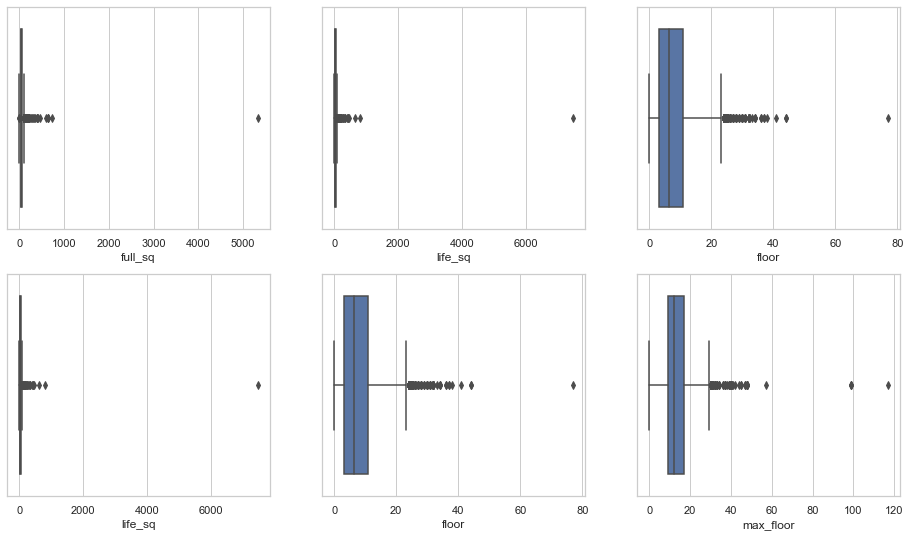

In [38]:
num_list_next = num_columns_main
fig, axes = plt.subplots(2, 3, figsize=(16, 9))
for i in range(2):    
    for j in range (3):
       sns.boxplot(ax=axes[i, j], data=df, x=num_list_next[i + j])    

In [39]:
df[num_columns_main].describe()

full_sq       life_sq         floor     max_floor      num_room  \
count  30471.000000  24088.000000  30304.000000  20899.000000  20899.000000   
mean      54.214269     34.403271      7.670803     12.558974      1.909804   
std       38.031487     52.285733      5.319989      6.756550      0.851805   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       38.000000     20.000000      3.000000      9.000000      1.000000   
50%       49.000000     30.000000      6.500000     12.000000      2.000000   
75%       63.000000     43.000000     11.000000     17.000000      2.000000   
max     5326.000000   7478.000000     77.000000    117.000000     19.000000   

           kitch_sq  
count  20899.000000  
mean       6.399301  
std       28.265979  
min        0.000000  
25%        1.000000  
50%        6.000000  
75%        9.000000  
max     2014.000000

Выведем явно завышенные и заниженные значения.

Общая площадь

<AxesSubplot:>

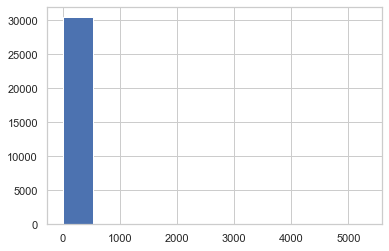

In [40]:
df['full_sq'].hist()

In [41]:
df[df['full_sq'] >= 1000]['full_sq'].count()

1

In [42]:
df[df['full_sq'] < 14]['full_sq'].count()

44

In [43]:
df[(df['full_sq'] <= 1000) & (df['full_sq'] >= 14)]['full_sq'].mean()

54.11184513245251

Жилая площадь

<AxesSubplot:>

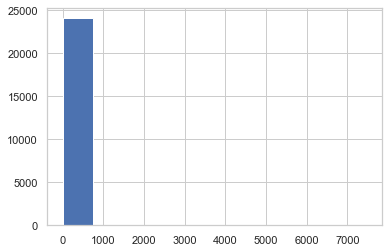

In [44]:
df['life_sq'].hist()

In [45]:
df[df['life_sq'] >= 750]['life_sq'].count()

2

In [46]:
df[df['life_sq'] < 1]['life_sq'].count()

45

In [47]:
df[(df['life_sq'] <= 750) & (df['life_sq'] >= 1)]['life_sq'].mean()

34.126117881951664

Площадь кухни

<AxesSubplot:>

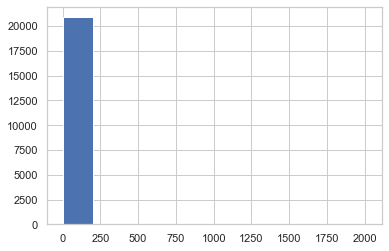

In [48]:
df['kitch_sq'].hist()

In [49]:
df[df['kitch_sq'] >= 100]['kitch_sq'].count()

9

In [50]:
df[(df['kitch_sq'] <= 750) & (df['kitch_sq'] >= 1)]['kitch_sq'].mean()

6.4450138362201495

Этаж, на котором расположена квартира

<AxesSubplot:>

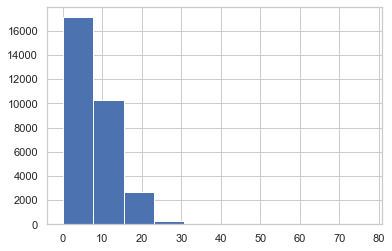

In [51]:
df['floor'].hist()

In [52]:
df[df['floor'] >= 40]['floor'].count()

4

In [53]:
df[df['floor'] < 1]['floor'].count()

9

In [54]:
round(df[(df['floor'] <= 40) & (df['floor'] >= 1)]['floor'].mean(), 0)

8.0

Количество  этажей в доме

<AxesSubplot:>

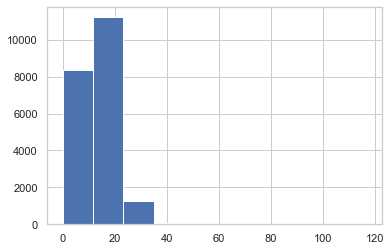

In [55]:
df['max_floor'].hist()

In [56]:
df[df['max_floor'] < 1]['max_floor'].count()

550

Количество комнат

<AxesSubplot:>

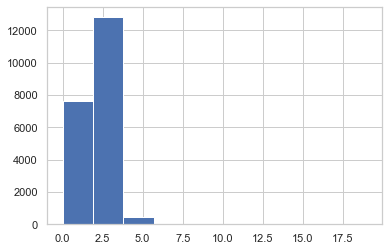

In [57]:
df['num_room'].hist()

In [58]:
df[df['num_room'] < 1]['num_room'].count()

14

In [59]:
round(df[(df['num_room'] >= 1 )]['num_room'].mean(), 0)

2.0

#### Первичый анализ категориальных признаков

In [60]:
len(cat_columns_main)

5

In [61]:
cat_columns_main

['material', 'build_year', 'state', 'product_type', 'sub_area']

Проверка количества nan значений:

In [62]:
df[cat_columns_main].isna().sum()

material         9572
build_year      13605
state           13559
product_type        0
sub_area            0
dtype: int64

In [63]:
df['state'].mode()

0    2.0
dtype: float64

In [64]:
df['material'].mode()

0    1.0
dtype: float64

In [65]:
df[df['build_year']<1000 ]['build_year'].unique()

array([  0.,   1.,   3.,  20., 215.,  71.])

In [66]:
df[cat_columns_extra].isna().sum()

preschool_education_centers_raion         0
school_education_centers_top_20_raion     0
culture_objects_top_25                    0
thermal_power_plant_raion                 0
incineration_raion                        0
oil_chemistry_raion                       0
radiation_raion                           0
railroad_terminal_raion                   0
big_market_raion                          0
nuclear_reactor_raion                     0
detention_facility_raion                  0
ID_metro                                  0
ID_railroad_station_walk                 25
ID_railroad_station_avto                  0
ecology                                   0
water_1line                               0
big_road1_1line                           0
ID_big_road2                              0
railroad_1line                            0
dtype: int64

In [67]:
df['ID_railroad_station_walk'].unique()

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
       100., 101., 102., 103., 104., 105., 106., 107., 108., 109., 110.,
       111., 112., 113., 114., 115., 116., 117., 118., 119., 120., 121.,
       122., 123.,  nan, 124., 125., 126., 127., 128., 129., 130., 131.,
       132., 133.])

### Анализ целевой переменой

In [68]:
df['price_doc'].describe()

count    3.047100e+04
mean     7.123035e+06
std      4.780111e+06
min      1.000000e+05
25%      4.740002e+06
50%      6.274411e+06
75%      8.300000e+06
max      1.111111e+08
Name: price_doc, dtype: float64

<AxesSubplot:xlabel='price_doc', ylabel='Count'>

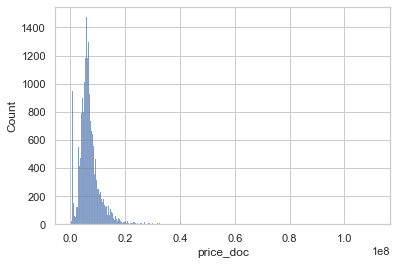

In [69]:
sns.histplot(data=df['price_doc'])

<AxesSubplot:>

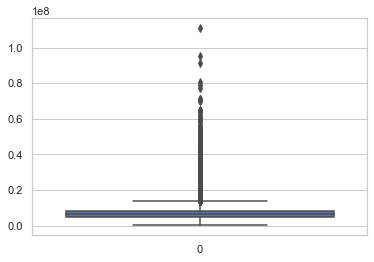

In [70]:
sns.boxplot(data=df['price_doc'])

Рспределение целевой переменной неисимметричное.

### Применение выбраных методов обработки к датасету.

In [94]:
df.shape

(30471, 292)

In [96]:
type(df)

pandas.core.frame.DataFrame

In [97]:
df.describe()

id       full_sq       life_sq         floor     max_floor  \
count  30471.000000  30471.000000  24088.000000  30304.000000  20899.000000   
mean   15237.917397     54.214269     34.403271      7.670803     12.558974   
std     8796.501536     38.031487     52.285733      5.319989      6.756550   
min        1.000000      0.000000      0.000000      0.000000      0.000000   
25%     7620.500000     38.000000     20.000000      3.000000      9.000000   
50%    15238.000000     49.000000     30.000000      6.500000     12.000000   
75%    22855.500000     63.000000     43.000000     11.000000     17.000000   
max    30473.000000   5326.000000   7478.000000     77.000000    117.000000   

           material    build_year      num_room      kitch_sq         state  \
count  20899.000000  1.686600e+04  20899.000000  20899.000000  16912.000000   
mean       1.827121  3.068057e+03      1.909804      6.399301      2.107025   
std        1.481154  1.543878e+05      0.851805     28.265979      0.880148   
min        1.000000  0.000000e+00      0.000000      0.000000      1.000000   
25%        1.000000  1.967000e+03      1.000000      1.000000      1.000000   
50%        1.000000  1.979000e+03      2.000000      6.000000      2.000000   
75%        2.000000  2.005000e+03      2.000000      9.000000      3.000000   
max        6.000000  2.005201e+07     19.000000   2014.000000     33.000000   

             area_m    raion_popul  green_zone_part   indust_part  \
count  3.047100e+04   30471.000000     30471.000000  30471.000000   
mean   1.765705e+07   84056.425552         0.218922      0.118871   
std    2.064961e+07   57871.285899         0.175090      0.118688   
min    2.081628e+06    2546.000000         0.001879      0.000000   
25%    7.307411e+06   21819.000000         0.063755      0.019509   
50%    1.050803e+07   83502.000000         0.167526      0.072158   
75%    1.803644e+07  122862.000000         0.336177      0.195781   
max    2.060718e+08  247469.000000         0.852923      0.521867   

       children_preschool  preschool_quota  preschool_education_centers_raion  \
count        30471.000000     23783.000000                       30471.000000   
mean          5140.026156      3271.272464                           4.065111   
std           3816.625140      2169.759592                           2.993795   
min            175.000000         0.000000                           0.000000   
25%           1706.000000      1874.000000                           2.000000   
50%           4857.000000      2854.000000                           4.000000   
75%           7103.000000      4050.000000                           6.000000   
max          19223.000000     11926.000000                          13.000000   

       children_school  school_quota  school_education_centers_raion  \
count     30471.000000  23786.000000                    30471.000000   
mean       5354.269699   8324.970739                        4.705031   
std        3989.640917   4289.734174                        3.445105   
min         168.000000   1012.000000                        0.000000   
25%        1564.000000   5782.000000                        2.000000   
50%        5261.000000   7377.000000                        5.000000   
75%        7227.000000   9891.000000                        7.000000   
max       19083.000000  24750.000000                       14.000000   

       school_education_centers_top_20_raion  hospital_beds_raion  \
count                           30471.000000         16030.000000   
mean                                0.109678          1190.738677   
std                                 0.333328          1057.015001   
min                                 0.000000             0.000000   
25%                                 0.000000           520.000000   
50%                                 0.000000           990.000000   
75%                                 0.000000          1786.000000   
max                                 2.00

Срвместное применение функий для препроцессинга.

In [298]:
X, y = func.process(df, 'train')

Проверка параметров дятасета после препроцессинга

In [299]:
X.shape

(30471, 288)

In [300]:
y.shape

(30471,)

In [301]:
X.head()

full_sq  life_sq  floor  material  build_year  num_room  kitch_sq  state  \
0     43.0     27.0      4         1        1974         1  7.167665      2   
1     34.0     19.0      3         1        2017         2  5.779851      1   
2     43.0     29.0      2         1        1969         2  4.700483      1   
3     89.0     50.0      9         1        2015         2  6.616307      1   
4     77.0     77.0      4         2        1968         2  8.203125      2   

  product_type           sub_area        area_m raion_popul  green_zone_part  \
0   Investment           Bibirevo  6.407578e+06      155572         0.189727   
1   Investment  Nagatinskij Zaton  9.589337e+06      115352         0.372602   
2   Investment     Tekstil'shhiki  4.808270e+06      101708         0.112560   
3   Investment             Mitino  1.258354e+07      178473         0.194703   
4   Investment          Basmannoe  8.398461e+06      108171         0.015234   

   indust_part children_preschool preschool_quota  \
0     0.000070               9576          5001.0   
1     0.049637               6880          3119.0   
2     0.118537               5879          1463.0   
3     0.069753              13087          6839.0   
4     0.037316               5706          3240.0   

   preschool_education_centers_raion children_school school_quota  \
0                                  5           10309      11065.0   
1                                  5            7759       6237.0   
2                                  4            6207       5580.0   
3                                  9           13670      17063.0   
4                                  7            6748       7770.0   

   school_education_centers_raion  school_education_centers_top_20_raion  \
0                               5                                      0   
1                               8                                      0   
2                               7                                      0   
3                              10                                      0   
4                               9                                      0   

  hospital_beds_raion healthcare_centers_raion university_top_20_raion  \
0               240.0                        1                       0   
1               229.0                        1                       0   
2              1183.0                        1                       0   
3                 NaN                        1                       0   
4               562.0                        4                       2   

  sport_objects_raion additional_education_raion culture_objects_top_25  \
0                   7                          3                     no   
1                   6                          1                    yes   
2                   5                          1                     no   
3                  17                          6                     no   
4                  25                          2                     no   

   culture_objects_top_25_raion shopping_centers_raion office_raion  \
0                             0                     16            1   
1                             1                      3            0   
2                             0                      0            1   
3                             0                     11            4   
4                             0                     10           93   

  thermal_power_plant_raion incineration_raion oil_chemistry_raion  \
0                        no                 no                  no   
1                        no                 no                  no   
2                        no                 no                  no   
3                        no                 no                  no   
4                        no                 no                  no   

  radiation_raion railroad_terminal_raion big_market_raion  \
0              no                      no         

In [302]:
y.head(5)

0     5850000
1     6000000
2     5700000
3    13100000
4    16331452
Name: price_doc, dtype: object

Разделение на тренировочный и проверочный датасеты

In [303]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.33, random_state = 33)

In [304]:
X_train.shape

(20415, 288)

In [305]:
y_train.shape

(20415,)

In [318]:
object_columns = ['product_type', 'sub_area', 'thermal_power_plant_raion', 'incineration_raion', 'culture_objects_top_25',
                 'oil_chemistry_raion', 'radiation_raion', 'railroad_terminal_raion', 'big_market_raion',
                 'nuclear_reactor_raion', 'detention_facility_raion', 'ecology', 'water_1line', 'big_road1_1line', 'railroad_1line'
                 ]

In [319]:
cat_features = object_columns + discrete_columns

In [317]:
column = X.columns[103]
column

'water_1line'

In [323]:
model_cb = catboost.CatBoostRegressor(cat_features = cat_features)

Использование GridSearch для определения набора параметров обеспечивающих максимально высокий результат.

In [314]:
param_grid = {'learning_rate': [0.03, 0.06, 0.1, 0,13],
        'depth': [4, 6, 8, 10],
        'l2_leaf_reg': [1, 3, 5, 7, 9],
         'iterations':[10, 20,30,40,50,60,70,80,90, 100]
             }

In [324]:
best_model = model_cb.grid_search(param_grid, 
                                       X=X_train, 
                                       y=y_train, 
                                       plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 8285667.8695574	test: 8514196.3085158	best: 8514196.3085158 (0)	total: 212ms	remaining: 1.91s
1:	learn: 8086909.1689534	test: 8319632.3595694	best: 8319632.3595694 (1)	total: 247ms	remaining: 989ms
2:	learn: 7894887.0563242	test: 8132082.2894587	best: 8132082.2894587 (2)	total: 279ms	remaining: 650ms
3:	learn: 7708534.7734433	test: 7949338.6119583	best: 7949338.6119583 (3)	total: 309ms	remaining: 464ms
4:	learn: 7529534.4932260	test: 7773674.5739469	best: 7773674.5739469 (4)	total: 349ms	remaining: 349ms
5:	learn: 7355891.6056053	test: 7603862.9093067	best: 7603862.9093067 (5)	total: 383ms	remaining: 255ms
6:	learn: 7184762.1087385	test: 7437478.4818191	best: 7437478.4818191 (6)	total: 412ms	remaining: 177ms
7:	learn: 7022724.9015713	test: 7278360.4162223	best: 7278360.4162223 (7)	total: 440ms	remaining: 110ms
8:	learn: 6865481.6793049	test: 7126554.0462886	best: 7126554.0462886 (8)	total: 473ms	remaining: 52.5ms
9:	learn: 6708173.9846162	test: 6974360.2666969	best: 6974360.2

learning rate is greater than 1. You probably need to decrease learning rate.


1:	learn: 1113820554.4060919	test: 1113119183.4109118	best: 92943720.3989726 (0)	total: 71.8ms	remaining: 287ms
2:	learn: 13343501066.3231201	test: 13332336794.5704746	best: 92943720.3989726 (0)	total: 105ms	remaining: 244ms
3:	learn: 159861942759.5483398	test: 159711328580.2242432	best: 92943720.3989726 (0)	total: 134ms	remaining: 201ms
4:	learn: 1915295519134.6391602	test: 1913321241240.8474121	best: 92943720.3989726 (0)	total: 168ms	remaining: 168ms
5:	learn: 22947708150925.0234375	test: 22922436123908.6132813	best: 92943720.3989726 (0)	total: 207ms	remaining: 138ms
6:	learn: 274949930731116.6250000	test: 274631490887196.9062500	best: 92943720.3989726 (0)	total: 239ms	remaining: 102ms
7:	learn: 3294405492243556.5000000	test: 3290437351175101.0000000	best: 92943720.3989726 (0)	total: 274ms	remaining: 68.5ms
8:	learn: 39473745139155832.0000000	test: 39424691163241152.0000000	best: 92943720.3989726 (0)	total: 307ms	remaining: 34.1ms
9:	learn: 472983956618017664.0000000	test: 4723810900

learning rate is greater than 1. You probably need to decrease learning rate.


6:	learn: 269497587330037.7187500	test: 269104977003903.5937500	best: 92606728.2420184 (0)	total: 214ms	remaining: 91.6ms
7:	learn: 3220708929334874.5000000	test: 3215902800416901.5000000	best: 92606728.2420184 (0)	total: 252ms	remaining: 63ms
8:	learn: 38491851023414152.0000000	test: 38433124556230016.0000000	best: 92606728.2420184 (0)	total: 284ms	remaining: 31.5ms
9:	learn: 460050080584285248.0000000	test: 459333381670191040.0000000	best: 92606728.2420184 (0)	total: 320ms	remaining: 0us

bestTest = 92606728.24
bestIteration = 0

7:	loss: 92606728.2420184	best: 4642271.7539158 (2)	total: 3.31s	remaining: 6m 49s
0:	learn: 8286972.0347116	test: 8515534.8436829	best: 8515534.8436829 (0)	total: 34.2ms	remaining: 308ms
1:	learn: 8090022.2786904	test: 8322440.4017116	best: 8322440.4017116 (1)	total: 60.5ms	remaining: 242ms
2:	learn: 7900333.9919903	test: 8136877.7907240	best: 8136877.7907240 (2)	total: 87.8ms	remaining: 205ms
3:	learn: 7715652.3014965	test: 7955827.2659355	best: 7955827.26

learning rate is greater than 1. You probably need to decrease learning rate.


2:	learn: 13107071715.3516254	test: 13089149341.6109638	best: 92299884.8097778 (0)	total: 90.5ms	remaining: 211ms
3:	learn: 156187761956.5614319	test: 155962951180.5290527	best: 92299884.8097778 (0)	total: 118ms	remaining: 177ms
4:	learn: 1861475550276.8886719	test: 1858681382521.2802734	best: 92299884.8097778 (0)	total: 146ms	remaining: 146ms
5:	learn: 22188305696798.0976563	test: 22153783990766.0976563	best: 92299884.8097778 (0)	total: 174ms	remaining: 116ms
6:	learn: 264509080742085.3437500	test: 264083879591234.9687500	best: 92299884.8097778 (0)	total: 201ms	remaining: 86.1ms
7:	learn: 3152434010155349.5000000	test: 3149399342190846.5000000	best: 92299884.8097778 (0)	total: 232ms	remaining: 58ms
8:	learn: 37586951352948736.0000000	test: 37547575399932800.0000000	best: 92299884.8097778 (0)	total: 260ms	remaining: 28.9ms
9:	learn: 448198574095299904.0000000	test: 447708041894447616.0000000	best: 92299884.8097778 (0)	total: 294ms	remaining: 0us

bestTest = 92299884.81
bestIteration = 

learning rate is greater than 1. You probably need to decrease learning rate.


6:	learn: 259665562842484.9687500	test: 259207314743232.5937500	best: 92010687.9615361 (0)	total: 219ms	remaining: 93.9ms
7:	learn: 3089085254478125.5000000	test: 3083452479131989.0000000	best: 92010687.9615361 (0)	total: 247ms	remaining: 61.7ms
8:	learn: 36755333486665320.0000000	test: 36686311353677248.0000000	best: 92010687.9615361 (0)	total: 275ms	remaining: 30.5ms
9:	learn: 437404370782970624.0000000	test: 436560993545591296.0000000	best: 92010687.9615361 (0)	total: 303ms	remaining: 0us

bestTest = 92010687.96
bestIteration = 0

15:	loss: 92010687.9615361	best: 4642271.7539158 (2)	total: 5.73s	remaining: 5m 52s
0:	learn: 8288178.8639254	test: 8516760.7403732	best: 8516760.7403732 (0)	total: 32.1ms	remaining: 289ms
1:	learn: 8092871.1786084	test: 8325067.3718972	best: 8325067.3718972 (1)	total: 58.4ms	remaining: 234ms
2:	learn: 7902806.8623969	test: 8140194.0019394	best: 8140194.0019394 (2)	total: 91.7ms	remaining: 214ms
3:	learn: 7718887.2730543	test: 7958515.1780496	best: 7958515

learning rate is greater than 1. You probably need to decrease learning rate.


1:	learn: 1087506215.3778577	test: 1085472531.2389164	best: 91733269.3143741 (0)	total: 61.7ms	remaining: 247ms
2:	learn: 12886141703.9925938	test: 12866827104.1039200	best: 91733269.3143741 (0)	total: 91.2ms	remaining: 213ms
3:	learn: 152805906774.3458252	test: 152555970488.6663818	best: 91733269.3143741 (0)	total: 119ms	remaining: 178ms
4:	learn: 1812633514452.7531738	test: 1809517562922.6047363	best: 91733269.3143741 (0)	total: 147ms	remaining: 147ms
5:	learn: 21508688819339.1640625	test: 21470034822946.2617188	best: 91733269.3143741 (0)	total: 175ms	remaining: 117ms
6:	learn: 255295306886687.1250000	test: 254818444219488.5312500	best: 91733269.3143741 (0)	total: 207ms	remaining: 88.8ms
7:	learn: 3031033678039397.0000000	test: 3025178272633973.5000000	best: 91733269.3143741 (0)	total: 235ms	remaining: 58.7ms
8:	learn: 35995911933626424.0000000	test: 35924311050871252.0000000	best: 91733269.3143741 (0)	total: 264ms	remaining: 29.3ms
9:	learn: 427588689426471168.0000000	test: 42671634

learning rate is greater than 1. You probably need to decrease learning rate.


6:	learn: 274949930731116.6250000	test: 274631490887196.9062500	best: 92943720.3989726 (0)	total: 204ms	remaining: 379ms
7:	learn: 3294405492243556.5000000	test: 3290437351175101.0000000	best: 92943720.3989726 (0)	total: 235ms	remaining: 353ms
8:	learn: 39473745139155832.0000000	test: 39424691163241152.0000000	best: 92943720.3989726 (0)	total: 263ms	remaining: 322ms
9:	learn: 472983956618017664.0000000	test: 472381090005548416.0000000	best: 92943720.3989726 (0)	total: 291ms	remaining: 291ms
10:	learn: 5667485855656947712.0000000	test: 5660108720792308736.0000000	best: 92943720.3989726 (0)	total: 320ms	remaining: 262ms
11:	learn: 67910942581845475328.0000000	test: 67820961932275777536.0000000	best: 92943720.3989726 (0)	total: 350ms	remaining: 233ms
12:	learn: 813755239321073221632.0000000	test: 812660393386359259136.0000000	best: 92943720.3989726 (0)	total: 380ms	remaining: 204ms
13:	learn: 9748491961722575257600.0000000	test: 9742434167336816607232.0000000	best: 92943720.3989726 (0)	to

bestTest = 3618397.189
bestIteration = 19

26:	loss: 3618397.1891141	best: 3602694.0895541 (22)	total: 11.2s	remaining: 6m 42s
0:	learn: 92732774.6549270	test: 92606728.2420184	best: 92606728.2420184 (0)	total: 36.3ms	remaining: 690ms
1:	learn: 1106742709.7032490	test: 1105629213.4286678	best: 92606728.2420184 (0)	total: 68.7ms	remaining: 619ms
2:	learn: 13220641922.4085426	test: 13204441796.4952831	best: 92606728.2420184 (0)	total: 111ms	remaining: 627ms
3:	learn: 157950904717.1659241	test: 157743984770.8373718	best: 92606728.2420184 (0)	total: 144ms	remaining: 576ms
4:	learn: 1887275143593.3842773	test: 1884686929912.1096191	best: 92606728.2420184 (0)	total: 172ms	remaining: 516ms
5:	learn: 22551816009150.6367188	test: 22519844253985.6367188	best: 92606728.2420184 (0)	total: 200ms	remaining: 467ms


learning rate is greater than 1. You probably need to decrease learning rate.


6:	learn: 269497587330037.7187500	test: 269104977003903.5937500	best: 92606728.2420184 (0)	total: 235ms	remaining: 437ms
7:	learn: 3220708929334874.5000000	test: 3215902800416901.5000000	best: 92606728.2420184 (0)	total: 264ms	remaining: 396ms
8:	learn: 38491851023414152.0000000	test: 38433124556230016.0000000	best: 92606728.2420184 (0)	total: 292ms	remaining: 357ms
9:	learn: 460050080584285248.0000000	test: 459333381670191040.0000000	best: 92606728.2420184 (0)	total: 320ms	remaining: 320ms
10:	learn: 5498689314338238464.0000000	test: 5489951098681133056.0000000	best: 92606728.2420184 (0)	total: 348ms	remaining: 285ms
11:	learn: 65724922898995904512.0000000	test: 65618472662631186432.0000000	best: 92606728.2420184 (0)	total: 375ms	remaining: 250ms
12:	learn: 785628285972768882688.0000000	test: 784332494766129020928.0000000	best: 92606728.2420184 (0)	total: 403ms	remaining: 217ms
13:	learn: 9387793075635939704832.0000000	test: 9378541159908848435200.0000000	best: 92606728.2420184 (0)	to

learning rate is greater than 1. You probably need to decrease learning rate.


2:	learn: 13107071715.3516254	test: 13089149341.6109638	best: 92299884.8097778 (0)	total: 89.2ms	remaining: 505ms
3:	learn: 156187761956.5614319	test: 155962951180.5290527	best: 92299884.8097778 (0)	total: 117ms	remaining: 470ms
4:	learn: 1861475550276.8886719	test: 1858681382521.2802734	best: 92299884.8097778 (0)	total: 146ms	remaining: 438ms
5:	learn: 22188305696798.0976563	test: 22153783990766.0976563	best: 92299884.8097778 (0)	total: 180ms	remaining: 419ms
6:	learn: 264509080742085.3437500	test: 264083879591234.9687500	best: 92299884.8097778 (0)	total: 216ms	remaining: 402ms
7:	learn: 3152434010155349.5000000	test: 3149399342190846.5000000	best: 92299884.8097778 (0)	total: 244ms	remaining: 366ms
8:	learn: 37586951352948736.0000000	test: 37547575399932800.0000000	best: 92299884.8097778 (0)	total: 272ms	remaining: 332ms
9:	learn: 448198574095299904.0000000	test: 447708041894447616.0000000	best: 92299884.8097778 (0)	total: 304ms	remaining: 304ms
10:	learn: 5344949758255795200.0000000	

15:	learn: 3440467.5747717	test: 3878852.2966496	best: 3878852.2966496 (15)	total: 519ms	remaining: 130ms
16:	learn: 3365905.8711569	test: 3807496.6315709	best: 3807496.6315709 (16)	total: 549ms	remaining: 96.9ms
17:	learn: 3294807.1589274	test: 3748001.8633079	best: 3748001.8633079 (17)	total: 581ms	remaining: 64.5ms
18:	learn: 3232017.8682957	test: 3681525.9834959	best: 3681525.9834959 (18)	total: 612ms	remaining: 32.2ms
19:	learn: 3179472.4483555	test: 3634596.5756234	best: 3634596.5756234 (19)	total: 641ms	remaining: 0us

bestTest = 3634596.576
bestIteration = 19

34:	loss: 3634596.5756234	best: 3602694.0895541 (22)	total: 16s	remaining: 7m 22s
0:	learn: 92163500.2189111	test: 92010687.9615361	best: 92010687.9615361 (0)	total: 29.3ms	remaining: 556ms
1:	learn: 1093618228.8587444	test: 1091702472.4398792	best: 92010687.9615361 (0)	total: 55.2ms	remaining: 497ms


learning rate is greater than 1. You probably need to decrease learning rate.


2:	learn: 12994328508.5282288	test: 12968411355.9151859	best: 92010687.9615361 (0)	total: 90.1ms	remaining: 511ms
3:	learn: 154406751074.6440125	test: 154173105268.2537537	best: 92010687.9615361 (0)	total: 120ms	remaining: 481ms
4:	learn: 1835795594007.2980957	test: 1832792360404.5554199	best: 92010687.9615361 (0)	total: 152ms	remaining: 456ms
5:	learn: 21831186156193.4921875	test: 21794045828680.4531250	best: 92010687.9615361 (0)	total: 181ms	remaining: 422ms
6:	learn: 259665562842484.9687500	test: 259207314743232.5937500	best: 92010687.9615361 (0)	total: 212ms	remaining: 394ms
7:	learn: 3089085254478125.5000000	test: 3083452479131989.0000000	best: 92010687.9615361 (0)	total: 240ms	remaining: 359ms
8:	learn: 36755333486665320.0000000	test: 36686311353677248.0000000	best: 92010687.9615361 (0)	total: 268ms	remaining: 328ms
9:	learn: 437404370782970624.0000000	test: 436560993545591296.0000000	best: 92010687.9615361 (0)	total: 295ms	remaining: 295ms
10:	learn: 5206141577869497344.0000000	

12:	learn: 3766711.2698763	test: 4191099.1866663	best: 4191099.1866663 (12)	total: 380ms	remaining: 205ms
13:	learn: 3637772.9341820	test: 4072439.1548523	best: 4072439.1548523 (13)	total: 408ms	remaining: 175ms
14:	learn: 3527006.4793825	test: 3970303.5070629	best: 3970303.5070629 (14)	total: 435ms	remaining: 145ms
15:	learn: 3426080.3978403	test: 3875904.3294771	best: 3875904.3294771 (15)	total: 464ms	remaining: 116ms
16:	learn: 3342044.5741406	test: 3799971.3477616	best: 3799971.3477616 (16)	total: 492ms	remaining: 86.8ms
17:	learn: 3271760.0526528	test: 3738686.8131612	best: 3738686.8131612 (17)	total: 518ms	remaining: 57.6ms
18:	learn: 3211269.7235848	test: 3675491.8787970	best: 3675491.8787970 (18)	total: 546ms	remaining: 28.7ms
19:	learn: 3157242.0409891	test: 3630010.7462637	best: 3630010.7462637 (19)	total: 574ms	remaining: 0us

bestTest = 3630010.746
bestIteration = 19

38:	loss: 3630010.7462637	best: 3602694.0895541 (22)	total: 18.4s	remaining: 7m 34s
0:	learn: 91893452.7078

learning rate is greater than 1. You probably need to decrease learning rate.


7:	learn: 3031033678039397.0000000	test: 3025178272633973.5000000	best: 91733269.3143741 (0)	total: 230ms	remaining: 346ms
8:	learn: 35995911933626424.0000000	test: 35924311050871252.0000000	best: 91733269.3143741 (0)	total: 261ms	remaining: 319ms
9:	learn: 427588689426471168.0000000	test: 426716348814522752.0000000	best: 91733269.3143741 (0)	total: 289ms	remaining: 289ms
10:	learn: 5080498438651759616.0000000	test: 5069904885511306240.0000000	best: 91733269.3143741 (0)	total: 318ms	remaining: 260ms
11:	learn: 60379596424541339648.0000000	test: 60251321397214822400.0000000	best: 91733269.3143741 (0)	total: 346ms	remaining: 231ms
12:	learn: 717752450755371204608.0000000	test: 716203195596787286016.0000000	best: 91733269.3143741 (0)	total: 375ms	remaining: 202ms
13:	learn: 8534079565975058907136.0000000	test: 8515411421739584847872.0000000	best: 91733269.3143741 (0)	total: 403ms	remaining: 173ms
14:	learn: 101492333485103897378816.0000000	test: 101267853235712237240320.0000000	best: 9173

1:	learn: 7180860.7208713	test: 7433749.9943959	best: 7433749.9943959 (1)	total: 64.2ms	remaining: 899ms
2:	learn: 6644723.5207218	test: 6916648.3169081	best: 6916648.3169081 (2)	total: 93.6ms	remaining: 842ms
3:	learn: 6178184.2390452	test: 6458532.9657222	best: 6458532.9657222 (3)	total: 127ms	remaining: 827ms
4:	learn: 5762992.4539535	test: 6058840.1218974	best: 6058840.1218974 (4)	total: 154ms	remaining: 772ms
5:	learn: 5392085.2079090	test: 5703405.9469859	best: 5703405.9469859 (5)	total: 184ms	remaining: 736ms
6:	learn: 5048528.7154775	test: 5377363.9403785	best: 5377363.9403785 (6)	total: 210ms	remaining: 691ms
7:	learn: 4757717.4817886	test: 5097627.6842232	best: 5097627.6842232 (7)	total: 238ms	remaining: 654ms
8:	learn: 4503034.9450377	test: 4856321.8451294	best: 4856321.8451294 (8)	total: 267ms	remaining: 622ms
9:	learn: 4269528.3987624	test: 4642271.7539158	best: 4642271.7539158 (9)	total: 302ms	remaining: 603ms
10:	learn: 4062135.7985973	test: 4448395.3220712	best: 4448395

learning rate is greater than 1. You probably need to decrease learning rate.


3:	learn: 159861942759.5483398	test: 159711328580.2242432	best: 92943720.3989726 (0)	total: 114ms	remaining: 743ms
4:	learn: 1915295519134.6391602	test: 1913321241240.8474121	best: 92943720.3989726 (0)	total: 143ms	remaining: 716ms
5:	learn: 22947708150925.0234375	test: 22922436123908.6132813	best: 92943720.3989726 (0)	total: 171ms	remaining: 683ms
6:	learn: 274949930731116.6250000	test: 274631490887196.9062500	best: 92943720.3989726 (0)	total: 198ms	remaining: 650ms
7:	learn: 3294405492243556.5000000	test: 3290437351175101.0000000	best: 92943720.3989726 (0)	total: 230ms	remaining: 631ms
8:	learn: 39473745139155832.0000000	test: 39424691163241152.0000000	best: 92943720.3989726 (0)	total: 263ms	remaining: 614ms
9:	learn: 472983956618017664.0000000	test: 472381090005548416.0000000	best: 92943720.3989726 (0)	total: 294ms	remaining: 588ms
10:	learn: 5667485855656947712.0000000	test: 5660108720792308736.0000000	best: 92943720.3989726 (0)	total: 322ms	remaining: 556ms
11:	learn: 679109425818

13:	learn: 4704537.4392037	test: 5043472.3600365	best: 5043472.3600365 (13)	total: 408ms	remaining: 467ms
14:	learn: 4548022.2335526	test: 4898999.2036599	best: 4898999.2036599 (14)	total: 445ms	remaining: 445ms
15:	learn: 4403682.9395381	test: 4759254.1698762	best: 4759254.1698762 (15)	total: 473ms	remaining: 414ms
16:	learn: 4273270.6959822	test: 4637229.9396824	best: 4637229.9396824 (16)	total: 510ms	remaining: 390ms
17:	learn: 4159935.3227858	test: 4532473.2397080	best: 4532473.2397080 (17)	total: 539ms	remaining: 359ms
18:	learn: 4046718.6610426	test: 4427994.9867796	best: 4427994.9867796 (18)	total: 569ms	remaining: 329ms
19:	learn: 3952062.5146708	test: 4339819.3207567	best: 4339819.3207567 (19)	total: 601ms	remaining: 301ms
20:	learn: 3854224.7864641	test: 4251709.1688455	best: 4251709.1688455 (20)	total: 637ms	remaining: 273ms
21:	learn: 3768568.2810457	test: 4172472.6291321	best: 4172472.6291321 (21)	total: 670ms	remaining: 244ms
22:	learn: 3687773.4173388	test: 4098943.37600

learning rate is greater than 1. You probably need to decrease learning rate.


6:	learn: 269497587330037.7187500	test: 269104977003903.5937500	best: 92606728.2420184 (0)	total: 201ms	remaining: 661ms
7:	learn: 3220708929334874.5000000	test: 3215902800416901.5000000	best: 92606728.2420184 (0)	total: 233ms	remaining: 640ms
8:	learn: 38491851023414152.0000000	test: 38433124556230016.0000000	best: 92606728.2420184 (0)	total: 261ms	remaining: 608ms
9:	learn: 460050080584285248.0000000	test: 459333381670191040.0000000	best: 92606728.2420184 (0)	total: 289ms	remaining: 578ms
10:	learn: 5498689314338238464.0000000	test: 5489951098681133056.0000000	best: 92606728.2420184 (0)	total: 322ms	remaining: 556ms
11:	learn: 65724922898995904512.0000000	test: 65618472662631186432.0000000	best: 92606728.2420184 (0)	total: 349ms	remaining: 523ms
12:	learn: 785628285972768882688.0000000	test: 784332494766129020928.0000000	best: 92606728.2420184 (0)	total: 377ms	remaining: 493ms
13:	learn: 9387793075635939704832.0000000	test: 9378541159908848435200.0000000	best: 92606728.2420184 (0)	to

20:	learn: 3867885.5197795	test: 4267755.5700197	best: 4267755.5700197 (20)	total: 608ms	remaining: 261ms
21:	learn: 3781799.2118037	test: 4189894.0382169	best: 4189894.0382169 (21)	total: 636ms	remaining: 231ms
22:	learn: 3701273.4152025	test: 4114150.6152804	best: 4114150.6152804 (22)	total: 666ms	remaining: 203ms
23:	learn: 3629802.8401410	test: 4049673.9761463	best: 4049673.9761463 (23)	total: 694ms	remaining: 173ms
24:	learn: 3562750.5352900	test: 3991267.5132412	best: 3991267.5132412 (24)	total: 723ms	remaining: 145ms
25:	learn: 3499908.8267436	test: 3938728.6993394	best: 3938728.6993394 (25)	total: 751ms	remaining: 115ms
26:	learn: 3441014.1600942	test: 3882324.2450637	best: 3882324.2450637 (26)	total: 779ms	remaining: 86.6ms
27:	learn: 3389455.4957779	test: 3835109.0377995	best: 3835109.0377995 (27)	total: 807ms	remaining: 57.7ms
28:	learn: 3340091.2776459	test: 3790684.7548146	best: 3790684.7548146 (28)	total: 842ms	remaining: 29ms
29:	learn: 3297103.1189600	test: 3750534.6004

learning rate is greater than 1. You probably need to decrease learning rate.


6:	learn: 264509080742085.3437500	test: 264083879591234.9687500	best: 92299884.8097778 (0)	total: 202ms	remaining: 663ms
7:	learn: 3152434010155349.5000000	test: 3149399342190846.5000000	best: 92299884.8097778 (0)	total: 233ms	remaining: 641ms
8:	learn: 37586951352948736.0000000	test: 37547575399932800.0000000	best: 92299884.8097778 (0)	total: 271ms	remaining: 631ms
9:	learn: 448198574095299904.0000000	test: 447708041894447616.0000000	best: 92299884.8097778 (0)	total: 303ms	remaining: 606ms
10:	learn: 5344949758255795200.0000000	test: 5338844309792438272.0000000	best: 92299884.8097778 (0)	total: 331ms	remaining: 572ms
11:	learn: 63746364017945329664.0000000	test: 63670645645308657664.0000000	best: 92299884.8097778 (0)	total: 358ms	remaining: 537ms
12:	learn: 760334867785547120640.0000000	test: 759398621903577022464.0000000	best: 92299884.8097778 (0)	total: 386ms	remaining: 505ms
13:	learn: 9069665870990236712960.0000000	test: 9058120388561325785088.0000000	best: 92299884.8097778 (0)	to

14:	learn: 4551442.4423633	test: 4907973.2838509	best: 4907973.2838509 (14)	total: 458ms	remaining: 458ms
15:	learn: 4411402.3578837	test: 4777193.9857646	best: 4777193.9857646 (15)	total: 494ms	remaining: 432ms
16:	learn: 4291752.9168280	test: 4663143.9796932	best: 4663143.9796932 (16)	total: 523ms	remaining: 400ms
17:	learn: 4178842.3856715	test: 4558513.0100577	best: 4558513.0100577 (17)	total: 550ms	remaining: 366ms
18:	learn: 4066185.0368022	test: 4454320.5990262	best: 4454320.5990262 (18)	total: 579ms	remaining: 335ms
19:	learn: 3967615.3654764	test: 4364195.9253455	best: 4364195.9253455 (19)	total: 609ms	remaining: 304ms
20:	learn: 3873230.7006924	test: 4276146.4847237	best: 4276146.4847237 (20)	total: 638ms	remaining: 273ms
21:	learn: 3786773.4325807	test: 4199605.0559049	best: 4199605.0559049 (21)	total: 671ms	remaining: 244ms
22:	learn: 3706228.3234205	test: 4123810.9390192	best: 4123810.9390192 (22)	total: 700ms	remaining: 213ms
23:	learn: 3634842.0281410	test: 4059108.49089

learning rate is greater than 1. You probably need to decrease learning rate.


6:	learn: 259665562842484.9687500	test: 259207314743232.5937500	best: 92010687.9615361 (0)	total: 205ms	remaining: 673ms
7:	learn: 3089085254478125.5000000	test: 3083452479131989.0000000	best: 92010687.9615361 (0)	total: 233ms	remaining: 641ms
8:	learn: 36755333486665320.0000000	test: 36686311353677248.0000000	best: 92010687.9615361 (0)	total: 266ms	remaining: 620ms
9:	learn: 437404370782970624.0000000	test: 436560993545591296.0000000	best: 92010687.9615361 (0)	total: 293ms	remaining: 587ms
10:	learn: 5206141577869497344.0000000	test: 5195862919882971136.0000000	best: 92010687.9615361 (0)	total: 323ms	remaining: 557ms
11:	learn: 61975071236753760256.0000000	test: 61850092999561789440.0000000	best: 92010687.9615361 (0)	total: 351ms	remaining: 527ms
12:	learn: 737877997256357445632.0000000	test: 736361616070968475648.0000000	best: 92010687.9615361 (0)	total: 380ms	remaining: 498ms
13:	learn: 8786520245249407713280.0000000	test: 8768157341863805714432.0000000	best: 92010687.9615361 (0)	to

13:	learn: 4715513.8149079	test: 5057897.0386546	best: 5057897.0386546 (13)	total: 406ms	remaining: 464ms
14:	learn: 4558874.0632509	test: 4913301.0094158	best: 4913301.0094158 (14)	total: 433ms	remaining: 433ms
15:	learn: 4418191.8177245	test: 4781900.2414223	best: 4781900.2414223 (15)	total: 461ms	remaining: 403ms
16:	learn: 4296881.1050907	test: 4669911.8666960	best: 4669911.8666960 (16)	total: 492ms	remaining: 376ms
17:	learn: 4184331.8740303	test: 4565669.1732027	best: 4565669.1732027 (17)	total: 518ms	remaining: 345ms
18:	learn: 4076077.9159813	test: 4464801.3746216	best: 4464801.3746216 (18)	total: 547ms	remaining: 317ms
19:	learn: 3980528.4952628	test: 4375845.5799182	best: 4375845.5799182 (19)	total: 577ms	remaining: 288ms
20:	learn: 3882389.5084455	test: 4287197.2658478	best: 4287197.2658478 (20)	total: 604ms	remaining: 259ms
21:	learn: 3795760.7818377	test: 4208842.5812661	best: 4208842.5812661 (21)	total: 636ms	remaining: 231ms
22:	learn: 3715556.8736719	test: 4133631.53953

learning rate is greater than 1. You probably need to decrease learning rate.


6:	learn: 255295306886687.1250000	test: 254818444219488.5312500	best: 91733269.3143741 (0)	total: 208ms	remaining: 685ms
7:	learn: 3031033678039397.0000000	test: 3025178272633973.5000000	best: 91733269.3143741 (0)	total: 246ms	remaining: 676ms
8:	learn: 35995911933626424.0000000	test: 35924311050871252.0000000	best: 91733269.3143741 (0)	total: 324ms	remaining: 755ms
9:	learn: 427588689426471168.0000000	test: 426716348814522752.0000000	best: 91733269.3143741 (0)	total: 352ms	remaining: 703ms
10:	learn: 5080498438651759616.0000000	test: 5069904885511306240.0000000	best: 91733269.3143741 (0)	total: 380ms	remaining: 657ms
11:	learn: 60379596424541339648.0000000	test: 60251321397214822400.0000000	best: 91733269.3143741 (0)	total: 409ms	remaining: 613ms
12:	learn: 717752450755371204608.0000000	test: 716203195596787286016.0000000	best: 91733269.3143741 (0)	total: 442ms	remaining: 578ms
13:	learn: 8534079565975058907136.0000000	test: 8515411421739584847872.0000000	best: 91733269.3143741 (0)	to

9:	learn: 5420867.9210185	test: 5726174.4078971	best: 5726174.4078971 (9)	total: 303ms	remaining: 909ms
10:	learn: 5215639.0022895	test: 5532206.3776523	best: 5532206.3776523 (10)	total: 331ms	remaining: 872ms
11:	learn: 5030506.1402519	test: 5357774.5730064	best: 5357774.5730064 (11)	total: 358ms	remaining: 834ms
12:	learn: 4846849.3955581	test: 5187171.7327170	best: 5187171.7327170 (12)	total: 386ms	remaining: 802ms
13:	learn: 4681102.6076381	test: 5027318.4911050	best: 5027318.4911050 (13)	total: 413ms	remaining: 766ms
14:	learn: 4525578.1098447	test: 4884198.7215758	best: 4884198.7215758 (14)	total: 441ms	remaining: 734ms
15:	learn: 4382088.5138582	test: 4745333.5467507	best: 4745333.5467507 (15)	total: 468ms	remaining: 703ms
16:	learn: 4252454.4577044	test: 4624064.6169024	best: 4624064.6169024 (16)	total: 496ms	remaining: 671ms
17:	learn: 4139425.4973614	test: 4519458.7131752	best: 4519458.7131752 (17)	total: 527ms	remaining: 645ms
18:	learn: 4025709.8124333	test: 4412406.5823476

learning rate is greater than 1. You probably need to decrease learning rate.


6:	learn: 274949930731116.6250000	test: 274631490887196.9062500	best: 92943720.3989726 (0)	total: 199ms	remaining: 937ms
7:	learn: 3294405492243556.5000000	test: 3290437351175101.0000000	best: 92943720.3989726 (0)	total: 230ms	remaining: 919ms
8:	learn: 39473745139155832.0000000	test: 39424691163241152.0000000	best: 92943720.3989726 (0)	total: 259ms	remaining: 891ms
9:	learn: 472983956618017664.0000000	test: 472381090005548416.0000000	best: 92943720.3989726 (0)	total: 287ms	remaining: 860ms
10:	learn: 5667485855656947712.0000000	test: 5660108720792308736.0000000	best: 92943720.3989726 (0)	total: 315ms	remaining: 829ms
11:	learn: 67910942581845475328.0000000	test: 67820961932275777536.0000000	best: 92943720.3989726 (0)	total: 341ms	remaining: 796ms
12:	learn: 813755239321073221632.0000000	test: 812660393386359259136.0000000	best: 92943720.3989726 (0)	total: 375ms	remaining: 779ms
13:	learn: 9748491961722575257600.0000000	test: 9742434167336816607232.0000000	best: 92943720.3989726 (0)	to

32:	learn: 4348250.2679665	test: 4726646.2528648	best: 4726646.2528648 (32)	total: 989ms	remaining: 210ms
33:	learn: 4287138.3890225	test: 4669825.0850167	best: 4669825.0850167 (33)	total: 1.02s	remaining: 179ms
34:	learn: 4224469.6932621	test: 4612100.0286259	best: 4612100.0286259 (34)	total: 1.05s	remaining: 149ms
35:	learn: 4164387.3193622	test: 4557166.3587387	best: 4557166.3587387 (35)	total: 1.07s	remaining: 119ms
36:	learn: 4109719.1517103	test: 4505686.5245339	best: 4505686.5245339 (36)	total: 1.1s	remaining: 89.3ms
37:	learn: 4056694.4425785	test: 4457258.3237272	best: 4457258.3237272 (37)	total: 1.13s	remaining: 59.5ms
38:	learn: 4002033.4629587	test: 4406333.3485620	best: 4406333.3485620 (38)	total: 1.16s	remaining: 29.7ms
39:	learn: 3953183.0956226	test: 4359168.9062601	best: 4359168.9062601 (39)	total: 1.19s	remaining: 0us

bestTest = 4359168.906
bestIteration = 39

64:	loss: 4359168.9062601	best: 3241690.5953348 (62)	total: 43.1s	remaining: 10m 19s
0:	learn: 8076324.56061

29:	learn: 2848281.4148459	test: 3358814.1792876	best: 3358814.1792876 (29)	total: 848ms	remaining: 283ms
30:	learn: 2829269.2563920	test: 3342262.0936167	best: 3342262.0936167 (30)	total: 884ms	remaining: 257ms
31:	learn: 2815427.3211730	test: 3329363.1060341	best: 3329363.1060341 (31)	total: 914ms	remaining: 228ms
32:	learn: 2803346.3627481	test: 3321582.2498607	best: 3321582.2498607 (32)	total: 939ms	remaining: 199ms
33:	learn: 2791947.3977597	test: 3315150.4052311	best: 3315150.4052311 (33)	total: 966ms	remaining: 171ms
34:	learn: 2777698.3360484	test: 3308941.0897824	best: 3308941.0897824 (34)	total: 993ms	remaining: 142ms
35:	learn: 2763163.5553305	test: 3300809.8457899	best: 3300809.8457899 (35)	total: 1.02s	remaining: 113ms
36:	learn: 2751984.1704053	test: 3288381.0511553	best: 3288381.0511553 (36)	total: 1.04s	remaining: 84.7ms
37:	learn: 2741826.6906406	test: 3282037.9823123	best: 3282037.9823123 (37)	total: 1.08s	remaining: 56.7ms
38:	learn: 2734548.0492606	test: 3276135.781

learning rate is greater than 1. You probably need to decrease learning rate.


5:	learn: 22551816009150.6367188	test: 22519844253985.6367188	best: 92606728.2420184 (0)	total: 184ms	remaining: 1.04s
6:	learn: 269497587330037.7187500	test: 269104977003903.5937500	best: 92606728.2420184 (0)	total: 212ms	remaining: 1s
7:	learn: 3220708929334874.5000000	test: 3215902800416901.5000000	best: 92606728.2420184 (0)	total: 247ms	remaining: 989ms
8:	learn: 38491851023414152.0000000	test: 38433124556230016.0000000	best: 92606728.2420184 (0)	total: 276ms	remaining: 952ms
9:	learn: 460050080584285248.0000000	test: 459333381670191040.0000000	best: 92606728.2420184 (0)	total: 303ms	remaining: 910ms
10:	learn: 5498689314338238464.0000000	test: 5489951098681133056.0000000	best: 92606728.2420184 (0)	total: 331ms	remaining: 874ms
11:	learn: 65724922898995904512.0000000	test: 65618472662631186432.0000000	best: 92606728.2420184 (0)	total: 358ms	remaining: 835ms
12:	learn: 785628285972768882688.0000000	test: 784332494766129020928.0000000	best: 92606728.2420184 (0)	total: 386ms	remaining

26:	learn: 4804064.5053299	test: 5150987.5964312	best: 5150987.5964312 (26)	total: 837ms	remaining: 403ms
27:	learn: 4727158.6013883	test: 5078957.8146356	best: 5078957.8146356 (27)	total: 877ms	remaining: 376ms
28:	learn: 4648550.2582945	test: 5004809.0482875	best: 5004809.0482875 (28)	total: 906ms	remaining: 344ms
29:	learn: 4571346.0513092	test: 4932292.9655667	best: 4932292.9655667 (29)	total: 935ms	remaining: 312ms
30:	learn: 4502028.8418562	test: 4867041.8482045	best: 4867041.8482045 (30)	total: 965ms	remaining: 280ms
31:	learn: 4432644.1898639	test: 4802420.1950620	best: 4802420.1950620 (31)	total: 995ms	remaining: 249ms
32:	learn: 4366694.3479264	test: 4741216.4684062	best: 4741216.4684062 (32)	total: 1.03s	remaining: 218ms
33:	learn: 4303430.9694502	test: 4684003.1006184	best: 4684003.1006184 (33)	total: 1.06s	remaining: 188ms
34:	learn: 4241369.0438695	test: 4626213.1070229	best: 4626213.1070229 (34)	total: 1.09s	remaining: 156ms
35:	learn: 4181298.4414701	test: 4571148.97009

22:	learn: 3032209.9388642	test: 3516864.5414942	best: 3516864.5414942 (22)	total: 671ms	remaining: 496ms
23:	learn: 2998759.6079795	test: 3486976.9554421	best: 3486976.9554421 (23)	total: 705ms	remaining: 470ms
24:	learn: 2966242.4533303	test: 3460165.9742731	best: 3460165.9742731 (24)	total: 734ms	remaining: 440ms
25:	learn: 2939039.7202124	test: 3438490.7946985	best: 3438490.7946985 (25)	total: 763ms	remaining: 411ms
26:	learn: 2913631.1295344	test: 3418796.9574866	best: 3418796.9574866 (26)	total: 789ms	remaining: 380ms
27:	learn: 2893397.0228829	test: 3402480.4845977	best: 3402480.4845977 (27)	total: 816ms	remaining: 350ms
28:	learn: 2874926.5707174	test: 3388890.0944024	best: 3388890.0944024 (28)	total: 844ms	remaining: 320ms
29:	learn: 2858025.1099636	test: 3376216.5225858	best: 3376216.5225858 (29)	total: 871ms	remaining: 290ms
30:	learn: 2840276.4201081	test: 3361370.7708254	best: 3361370.7708254 (30)	total: 901ms	remaining: 262ms
31:	learn: 2826000.9235234	test: 3349506.58667

learning rate is greater than 1. You probably need to decrease learning rate.


5:	learn: 22188305696798.0976563	test: 22153783990766.0976563	best: 92299884.8097778 (0)	total: 176ms	remaining: 1000ms
6:	learn: 264509080742085.3437500	test: 264083879591234.9687500	best: 92299884.8097778 (0)	total: 207ms	remaining: 977ms
7:	learn: 3152434010155349.5000000	test: 3149399342190846.5000000	best: 92299884.8097778 (0)	total: 234ms	remaining: 936ms
8:	learn: 37586951352948736.0000000	test: 37547575399932800.0000000	best: 92299884.8097778 (0)	total: 263ms	remaining: 905ms
9:	learn: 448198574095299904.0000000	test: 447708041894447616.0000000	best: 92299884.8097778 (0)	total: 290ms	remaining: 869ms
10:	learn: 5344949758255795200.0000000	test: 5338844309792438272.0000000	best: 92299884.8097778 (0)	total: 318ms	remaining: 838ms
11:	learn: 63746364017945329664.0000000	test: 63670645645308657664.0000000	best: 92299884.8097778 (0)	total: 344ms	remaining: 804ms
12:	learn: 760334867785547120640.0000000	test: 759398621903577022464.0000000	best: 92299884.8097778 (0)	total: 372ms	remai

27:	learn: 4730962.2924918	test: 5082400.6192074	best: 5082400.6192074 (27)	total: 836ms	remaining: 358ms
28:	learn: 4652506.5625994	test: 5007005.9006788	best: 5007005.9006788 (28)	total: 864ms	remaining: 328ms
29:	learn: 4575515.0625219	test: 4934818.3350500	best: 4934818.3350500 (29)	total: 900ms	remaining: 300ms
30:	learn: 4506039.4297626	test: 4869504.9464007	best: 4869504.9464007 (30)	total: 930ms	remaining: 270ms
31:	learn: 4436615.9530726	test: 4804915.9526246	best: 4804915.9526246 (31)	total: 958ms	remaining: 239ms
32:	learn: 4368850.9893373	test: 4745260.2396829	best: 4745260.2396829 (32)	total: 985ms	remaining: 209ms
33:	learn: 4308385.0159004	test: 4688885.4740978	best: 4688885.4740978 (33)	total: 1.01s	remaining: 179ms
34:	learn: 4249295.2509419	test: 4633539.2066604	best: 4633539.2066604 (34)	total: 1.04s	remaining: 149ms
35:	learn: 4189572.2719763	test: 4578927.1664178	best: 4578927.1664178 (35)	total: 1.08s	remaining: 120ms
36:	learn: 4134385.2351999	test: 4526945.35238

24:	learn: 2978369.7247419	test: 3459366.5271555	best: 3459366.5271555 (24)	total: 744ms	remaining: 446ms
25:	learn: 2949305.4813669	test: 3435745.9338865	best: 3435745.9338865 (25)	total: 773ms	remaining: 416ms
26:	learn: 2923735.6838610	test: 3415692.7349565	best: 3415692.7349565 (26)	total: 799ms	remaining: 385ms
27:	learn: 2903086.6657181	test: 3398415.1513546	best: 3398415.1513546 (27)	total: 827ms	remaining: 354ms
28:	learn: 2879838.0288051	test: 3377719.3213430	best: 3377719.3213430 (28)	total: 858ms	remaining: 325ms
29:	learn: 2864180.4886986	test: 3365923.3622285	best: 3365923.3622285 (29)	total: 892ms	remaining: 297ms
30:	learn: 2848297.5008254	test: 3354561.4511313	best: 3354561.4511313 (30)	total: 919ms	remaining: 267ms
31:	learn: 2833019.4116105	test: 3342340.2909906	best: 3342340.2909906 (31)	total: 946ms	remaining: 236ms
32:	learn: 2819276.2691432	test: 3333044.1222628	best: 3333044.1222628 (32)	total: 978ms	remaining: 207ms
33:	learn: 2806893.1989563	test: 3325069.04229

learning rate is greater than 1. You probably need to decrease learning rate.


6:	learn: 259665562842484.9687500	test: 259207314743232.5937500	best: 92010687.9615361 (0)	total: 219ms	remaining: 1.03s
7:	learn: 3089085254478125.5000000	test: 3083452479131989.0000000	best: 92010687.9615361 (0)	total: 247ms	remaining: 988ms
8:	learn: 36755333486665320.0000000	test: 36686311353677248.0000000	best: 92010687.9615361 (0)	total: 275ms	remaining: 948ms
9:	learn: 437404370782970624.0000000	test: 436560993545591296.0000000	best: 92010687.9615361 (0)	total: 303ms	remaining: 909ms
10:	learn: 5206141577869497344.0000000	test: 5195862919882971136.0000000	best: 92010687.9615361 (0)	total: 332ms	remaining: 874ms
11:	learn: 61975071236753760256.0000000	test: 61850092999561789440.0000000	best: 92010687.9615361 (0)	total: 359ms	remaining: 837ms
12:	learn: 737877997256357445632.0000000	test: 736361616070968475648.0000000	best: 92010687.9615361 (0)	total: 394ms	remaining: 819ms
13:	learn: 8786520245249407713280.0000000	test: 8768157341863805714432.0000000	best: 92010687.9615361 (0)	to

27:	learn: 4745449.9382979	test: 5097304.7122448	best: 5097304.7122448 (27)	total: 836ms	remaining: 358ms
28:	learn: 4666935.1330358	test: 5021834.0653075	best: 5021834.0653075 (28)	total: 871ms	remaining: 330ms
29:	learn: 4589838.0027740	test: 4949556.5674654	best: 4949556.5674654 (29)	total: 903ms	remaining: 301ms
30:	learn: 4516665.4118767	test: 4879457.2472852	best: 4879457.2472852 (30)	total: 932ms	remaining: 271ms
31:	learn: 4447220.2883253	test: 4814788.4761675	best: 4814788.4761675 (31)	total: 960ms	remaining: 240ms
32:	learn: 4381009.5582731	test: 4753335.4976807	best: 4753335.4976807 (32)	total: 989ms	remaining: 210ms
33:	learn: 4319813.5336826	test: 4697303.6524124	best: 4697303.6524124 (33)	total: 1.02s	remaining: 179ms
34:	learn: 4257401.2631743	test: 4640209.4179497	best: 4640209.4179497 (34)	total: 1.05s	remaining: 150ms
35:	learn: 4198260.0642529	test: 4586566.1742175	best: 4586566.1742175 (35)	total: 1.08s	remaining: 120ms
36:	learn: 4144027.0168227	test: 4535611.60389

29:	learn: 2861309.2155469	test: 3372628.9620384	best: 3372628.9620384 (29)	total: 866ms	remaining: 289ms
30:	learn: 2846030.1634404	test: 3357276.6128208	best: 3357276.6128208 (30)	total: 893ms	remaining: 259ms
31:	learn: 2831330.7878017	test: 3343404.7822585	best: 3343404.7822585 (31)	total: 920ms	remaining: 230ms
32:	learn: 2819175.4608878	test: 3335018.1641655	best: 3335018.1641655 (32)	total: 946ms	remaining: 201ms
33:	learn: 2806355.9355851	test: 3326930.1621749	best: 3326930.1621749 (33)	total: 973ms	remaining: 172ms
34:	learn: 2797626.5755728	test: 3322517.7461913	best: 3322517.7461913 (34)	total: 998ms	remaining: 143ms
35:	learn: 2786338.5876315	test: 3309965.2307443	best: 3309965.2307443 (35)	total: 1.02s	remaining: 114ms
36:	learn: 2775420.3347295	test: 3300618.2027172	best: 3300618.2027172 (36)	total: 1.05s	remaining: 85.1ms
37:	learn: 2765591.4219144	test: 3296296.1238539	best: 3296296.1238539 (37)	total: 1.08s	remaining: 56.9ms
38:	learn: 2756454.7687081	test: 3289635.143

learning rate is greater than 1. You probably need to decrease learning rate.


4:	learn: 1812633514452.7531738	test: 1809517562922.6047363	best: 91733269.3143741 (0)	total: 154ms	remaining: 1.07s
5:	learn: 21508688819339.1640625	test: 21470034822946.2617188	best: 91733269.3143741 (0)	total: 189ms	remaining: 1.07s
6:	learn: 255295306886687.1250000	test: 254818444219488.5312500	best: 91733269.3143741 (0)	total: 221ms	remaining: 1.04s
7:	learn: 3031033678039397.0000000	test: 3025178272633973.5000000	best: 91733269.3143741 (0)	total: 248ms	remaining: 993ms
8:	learn: 35995911933626424.0000000	test: 35924311050871252.0000000	best: 91733269.3143741 (0)	total: 282ms	remaining: 970ms
9:	learn: 427588689426471168.0000000	test: 426716348814522752.0000000	best: 91733269.3143741 (0)	total: 313ms	remaining: 938ms
10:	learn: 5080498438651759616.0000000	test: 5069904885511306240.0000000	best: 91733269.3143741 (0)	total: 346ms	remaining: 911ms
11:	learn: 60379596424541339648.0000000	test: 60251321397214822400.0000000	best: 91733269.3143741 (0)	total: 383ms	remaining: 894ms
12:	le

31:	learn: 4404951.5644236	test: 4777388.9492522	best: 4777388.9492522 (31)	total: 963ms	remaining: 542ms
32:	learn: 4338720.9623354	test: 4716161.4475846	best: 4716161.4475846 (32)	total: 1s	remaining: 515ms
33:	learn: 4277033.5939894	test: 4658808.4820964	best: 4658808.4820964 (33)	total: 1.03s	remaining: 485ms
34:	learn: 4218614.0429906	test: 4604061.5043610	best: 4604061.5043610 (34)	total: 1.06s	remaining: 456ms
35:	learn: 4158841.4159804	test: 4549911.1367481	best: 4549911.1367481 (35)	total: 1.09s	remaining: 426ms
36:	learn: 4104191.3615348	test: 4498393.7834478	best: 4498393.7834478 (36)	total: 1.12s	remaining: 394ms
37:	learn: 4051471.1048371	test: 4450201.0171548	best: 4450201.0171548 (37)	total: 1.15s	remaining: 363ms
38:	learn: 3997565.9952793	test: 4399282.6421542	best: 4399282.6421542 (38)	total: 1.18s	remaining: 334ms
39:	learn: 3949324.3941165	test: 4352494.1842454	best: 4352494.1842454 (39)	total: 1.21s	remaining: 303ms
40:	learn: 3903561.9533479	test: 4311082.9057503	

14:	learn: 3501736.6596056	test: 3938081.2283123	best: 3938081.2283123 (14)	total: 448ms	remaining: 1.04s
15:	learn: 3405601.3118570	test: 3850506.6356476	best: 3850506.6356476 (15)	total: 476ms	remaining: 1.01s
16:	learn: 3331169.5812197	test: 3779313.9793342	best: 3779313.9793342 (16)	total: 503ms	remaining: 976ms
17:	learn: 3256361.9853901	test: 3718586.0209699	best: 3718586.0209699 (17)	total: 529ms	remaining: 940ms
18:	learn: 3194036.0519330	test: 3647950.7758285	best: 3647950.7758285 (18)	total: 557ms	remaining: 909ms
19:	learn: 3142766.5469252	test: 3602694.0895541	best: 3602694.0895541 (19)	total: 593ms	remaining: 889ms
20:	learn: 3088769.3159003	test: 3554372.4683871	best: 3554372.4683871 (20)	total: 622ms	remaining: 859ms
21:	learn: 3050055.1839861	test: 3522474.5490124	best: 3522474.5490124 (21)	total: 647ms	remaining: 823ms
22:	learn: 3014321.8398335	test: 3490362.4189904	best: 3490362.4189904 (22)	total: 679ms	remaining: 797ms
23:	learn: 2979571.5985744	test: 3460340.42177

learning rate is greater than 1. You probably need to decrease learning rate.


3:	learn: 159861942759.5483398	test: 159711328580.2242432	best: 92943720.3989726 (0)	total: 121ms	remaining: 1.39s
4:	learn: 1915295519134.6391602	test: 1913321241240.8474121	best: 92943720.3989726 (0)	total: 156ms	remaining: 1.4s
5:	learn: 22947708150925.0234375	test: 22922436123908.6132813	best: 92943720.3989726 (0)	total: 184ms	remaining: 1.35s
6:	learn: 274949930731116.6250000	test: 274631490887196.9062500	best: 92943720.3989726 (0)	total: 214ms	remaining: 1.32s
7:	learn: 3294405492243556.5000000	test: 3290437351175101.0000000	best: 92943720.3989726 (0)	total: 241ms	remaining: 1.27s
8:	learn: 39473745139155832.0000000	test: 39424691163241152.0000000	best: 92943720.3989726 (0)	total: 270ms	remaining: 1.23s
9:	learn: 472983956618017664.0000000	test: 472381090005548416.0000000	best: 92943720.3989726 (0)	total: 297ms	remaining: 1.19s
10:	learn: 5667485855656947712.0000000	test: 5660108720792308736.0000000	best: 92943720.3989726 (0)	total: 325ms	remaining: 1.15s
11:	learn: 6791094258184

6:	learn: 7190042.9378613	test: 7442052.6831264	best: 7442052.6831264 (6)	total: 228ms	remaining: 1.4s
7:	learn: 7028476.3440859	test: 7283474.6982781	best: 7283474.6982781 (7)	total: 254ms	remaining: 1.33s
8:	learn: 6871532.0833364	test: 7131195.8520431	best: 7131195.8520431 (8)	total: 283ms	remaining: 1.29s
9:	learn: 6714527.6263241	test: 6979245.1697399	best: 6979245.1697399 (9)	total: 311ms	remaining: 1.24s
10:	learn: 6565924.7053079	test: 6836063.3910540	best: 6836063.3910540 (10)	total: 338ms	remaining: 1.2s
11:	learn: 6422629.3557628	test: 6697666.2809789	best: 6697666.2809789 (11)	total: 367ms	remaining: 1.16s
12:	learn: 6280506.8353703	test: 6561210.6631877	best: 6561210.6631877 (12)	total: 395ms	remaining: 1.12s
13:	learn: 6151225.9000334	test: 6434642.7502767	best: 6434642.7502767 (13)	total: 422ms	remaining: 1.08s
14:	learn: 6018809.4198125	test: 6306799.3011779	best: 6306799.3011779 (14)	total: 455ms	remaining: 1.06s
15:	learn: 5895078.2912055	test: 6188536.0691168	best: 6

40:	learn: 2986970.7871636	test: 3472842.5717875	best: 3472842.5717875 (40)	total: 1.22s	remaining: 268ms
41:	learn: 2968973.9819962	test: 3456215.9908083	best: 3456215.9908083 (41)	total: 1.25s	remaining: 238ms
42:	learn: 2951104.4901777	test: 3436907.3175086	best: 3436907.3175086 (42)	total: 1.27s	remaining: 208ms
43:	learn: 2934912.3060825	test: 3421202.5918484	best: 3421202.5918484 (43)	total: 1.3s	remaining: 177ms
44:	learn: 2921057.5794222	test: 3408279.3816829	best: 3408279.3816829 (44)	total: 1.33s	remaining: 148ms
45:	learn: 2908039.4248428	test: 3398103.2794617	best: 3398103.2794617 (45)	total: 1.35s	remaining: 118ms
46:	learn: 2896046.6433164	test: 3387176.9745899	best: 3387176.9745899 (46)	total: 1.38s	remaining: 88.2ms
47:	learn: 2882726.9095528	test: 3377253.7600781	best: 3377253.7600781 (47)	total: 1.41s	remaining: 58.7ms
48:	learn: 2870717.2509015	test: 3369333.6524024	best: 3369333.6524024 (48)	total: 1.44s	remaining: 29.4ms
49:	learn: 2857893.2290695	test: 3362639.617

learning rate is greater than 1. You probably need to decrease learning rate.


6:	learn: 269497587330037.7187500	test: 269104977003903.5937500	best: 92606728.2420184 (0)	total: 205ms	remaining: 1.26s
7:	learn: 3220708929334874.5000000	test: 3215902800416901.5000000	best: 92606728.2420184 (0)	total: 235ms	remaining: 1.23s
8:	learn: 38491851023414152.0000000	test: 38433124556230016.0000000	best: 92606728.2420184 (0)	total: 263ms	remaining: 1.2s
9:	learn: 460050080584285248.0000000	test: 459333381670191040.0000000	best: 92606728.2420184 (0)	total: 306ms	remaining: 1.22s
10:	learn: 5498689314338238464.0000000	test: 5489951098681133056.0000000	best: 92606728.2420184 (0)	total: 336ms	remaining: 1.19s
11:	learn: 65724922898995904512.0000000	test: 65618472662631186432.0000000	best: 92606728.2420184 (0)	total: 363ms	remaining: 1.15s
12:	learn: 785628285972768882688.0000000	test: 784332494766129020928.0000000	best: 92606728.2420184 (0)	total: 390ms	remaining: 1.11s
13:	learn: 9387793075635939704832.0000000	test: 9378541159908848435200.0000000	best: 92606728.2420184 (0)	tot

14:	learn: 6028014.6355964	test: 6316610.0606760	best: 6316610.0606760 (14)	total: 441ms	remaining: 1.03s
15:	learn: 5904412.1589262	test: 6198346.8465925	best: 6198346.8465925 (15)	total: 469ms	remaining: 996ms
16:	learn: 5782891.2922247	test: 6081677.4245719	best: 6081677.4245719 (16)	total: 496ms	remaining: 964ms
17:	learn: 5669924.9854410	test: 5973706.4334382	best: 5973706.4334382 (17)	total: 522ms	remaining: 928ms
18:	learn: 5558038.2543361	test: 5865373.7577223	best: 5865373.7577223 (18)	total: 552ms	remaining: 901ms
19:	learn: 5453829.2670436	test: 5765354.0243868	best: 5765354.0243868 (19)	total: 582ms	remaining: 873ms
20:	learn: 5350181.5884013	test: 5667902.3413961	best: 5667902.3413961 (20)	total: 610ms	remaining: 842ms
21:	learn: 5248234.7104449	test: 5570347.2993378	best: 5570347.2993378 (21)	total: 638ms	remaining: 812ms
22:	learn: 5155554.1720196	test: 5483435.5850694	best: 5483435.5850694 (22)	total: 671ms	remaining: 788ms
23:	learn: 5064214.6893208	test: 5396231.87833

46:	learn: 2901392.3341031	test: 3387258.4179762	best: 3387258.4179762 (46)	total: 1.39s	remaining: 88.6ms
47:	learn: 2888943.1877746	test: 3375875.7019318	best: 3375875.7019318 (47)	total: 1.42s	remaining: 59ms
48:	learn: 2878261.1583860	test: 3366438.7265904	best: 3366438.7265904 (48)	total: 1.44s	remaining: 29.5ms
49:	learn: 2866064.1680593	test: 3359874.0652396	best: 3359874.0652396 (49)	total: 1.47s	remaining: 0us

bestTest = 3359874.065
bestIteration = 49

89:	loss: 3359874.0652396	best: 3199526.1690263 (86)	total: 1m 16s	remaining: 12m 49s
0:	learn: 7800321.1378750	test: 8038792.4496173	best: 8038792.4496173 (0)	total: 31.6ms	remaining: 1.55s
1:	learn: 7187617.8215526	test: 7440616.8531251	best: 7440616.8531251 (1)	total: 58.7ms	remaining: 1.41s
2:	learn: 6655486.2654026	test: 6926984.6151768	best: 6926984.6151768 (2)	total: 91ms	remaining: 1.43s
3:	learn: 6192362.4167175	test: 6472393.4422072	best: 6472393.4422072 (3)	total: 125ms	remaining: 1.44s
4:	learn: 5778969.7350489	test

learning rate is greater than 1. You probably need to decrease learning rate.


7:	learn: 3152434010155349.5000000	test: 3149399342190846.5000000	best: 92299884.8097778 (0)	total: 229ms	remaining: 1.2s
8:	learn: 37586951352948736.0000000	test: 37547575399932800.0000000	best: 92299884.8097778 (0)	total: 262ms	remaining: 1.19s
9:	learn: 448198574095299904.0000000	test: 447708041894447616.0000000	best: 92299884.8097778 (0)	total: 289ms	remaining: 1.16s
10:	learn: 5344949758255795200.0000000	test: 5338844309792438272.0000000	best: 92299884.8097778 (0)	total: 317ms	remaining: 1.12s
11:	learn: 63746364017945329664.0000000	test: 63670645645308657664.0000000	best: 92299884.8097778 (0)	total: 344ms	remaining: 1.09s
12:	learn: 760334867785547120640.0000000	test: 759398621903577022464.0000000	best: 92299884.8097778 (0)	total: 372ms	remaining: 1.06s
13:	learn: 9069665870990236712960.0000000	test: 9058120388561325785088.0000000	best: 92299884.8097778 (0)	total: 399ms	remaining: 1.02s
14:	learn: 108196656317669308366848.0000000	test: 108054624680384837713920.0000000	best: 92299

11:	learn: 6432729.6296953	test: 6706118.1659408	best: 6706118.1659408 (11)	total: 354ms	remaining: 1.12s
12:	learn: 6291738.8364328	test: 6570793.1919253	best: 6570793.1919253 (12)	total: 383ms	remaining: 1.09s
13:	learn: 6160600.7598984	test: 6444912.9763068	best: 6444912.9763068 (13)	total: 410ms	remaining: 1.05s
14:	learn: 6029044.9195599	test: 6317845.4999073	best: 6317845.4999073 (14)	total: 437ms	remaining: 1.02s
15:	learn: 5905563.2512849	test: 6199747.4557518	best: 6199747.4557518 (15)	total: 465ms	remaining: 988ms
16:	learn: 5790363.0337901	test: 6087425.0394052	best: 6087425.0394052 (16)	total: 492ms	remaining: 955ms
17:	learn: 5673985.4121421	test: 5975825.4534564	best: 5975825.4534564 (17)	total: 518ms	remaining: 921ms
18:	learn: 5562160.2600943	test: 5867621.1644272	best: 5867621.1644272 (18)	total: 548ms	remaining: 895ms
19:	learn: 5457655.2962955	test: 5767377.6146232	best: 5767377.6146232 (19)	total: 583ms	remaining: 874ms
20:	learn: 5352803.2773552	test: 5670054.39923

43:	learn: 2953935.2878179	test: 3457531.4675513	best: 3457531.4675513 (43)	total: 1.4s	remaining: 191ms
44:	learn: 2938355.0287248	test: 3445121.0577793	best: 3445121.0577793 (44)	total: 1.43s	remaining: 159ms
45:	learn: 2924566.5537309	test: 3432340.2412764	best: 3432340.2412764 (45)	total: 1.46s	remaining: 127ms
46:	learn: 2912845.6187076	test: 3422338.4532442	best: 3422338.4532442 (46)	total: 1.49s	remaining: 95ms
47:	learn: 2902039.0167526	test: 3413247.8932359	best: 3413247.8932359 (47)	total: 1.52s	remaining: 63.2ms
48:	learn: 2892262.0511026	test: 3403201.0603646	best: 3403201.0603646 (48)	total: 1.54s	remaining: 31.5ms
49:	learn: 2881272.1131662	test: 3396292.1313798	best: 3396292.1313798 (49)	total: 1.57s	remaining: 0us

bestTest = 3396292.131
bestIteration = 49

93:	loss: 3396292.1313798	best: 3199526.1690263 (86)	total: 1m 22s	remaining: 13m 11s
0:	learn: 7802340.7359709	test: 8040842.7114740	best: 8040842.7114740 (0)	total: 30.3ms	remaining: 1.48s
1:	learn: 7190841.8549183

learning rate is greater than 1. You probably need to decrease learning rate.


7:	learn: 3089085254478125.5000000	test: 3083452479131989.0000000	best: 92010687.9615361 (0)	total: 234ms	remaining: 1.23s
8:	learn: 36755333486665320.0000000	test: 36686311353677248.0000000	best: 92010687.9615361 (0)	total: 265ms	remaining: 1.21s
9:	learn: 437404370782970624.0000000	test: 436560993545591296.0000000	best: 92010687.9615361 (0)	total: 293ms	remaining: 1.17s
10:	learn: 5206141577869497344.0000000	test: 5195862919882971136.0000000	best: 92010687.9615361 (0)	total: 323ms	remaining: 1.14s
11:	learn: 61975071236753760256.0000000	test: 61850092999561789440.0000000	best: 92010687.9615361 (0)	total: 350ms	remaining: 1.11s
12:	learn: 737877997256357445632.0000000	test: 736361616070968475648.0000000	best: 92010687.9615361 (0)	total: 379ms	remaining: 1.08s
13:	learn: 8786520245249407713280.0000000	test: 8768157341863805714432.0000000	best: 92010687.9615361 (0)	total: 408ms	remaining: 1.05s
14:	learn: 104643565144253501800448.0000000	test: 104421588515407309832192.0000000	best: 9201

10:	learn: 6588969.8420936	test: 6859248.5424376	best: 6859248.5424376 (10)	total: 336ms	remaining: 1.19s
11:	learn: 6445769.3922191	test: 6720945.4582423	best: 6720945.4582423 (11)	total: 365ms	remaining: 1.15s
12:	learn: 6306345.1073986	test: 6588227.1675233	best: 6588227.1675233 (12)	total: 393ms	remaining: 1.12s
13:	learn: 6178550.1784932	test: 6463172.6715613	best: 6463172.6715613 (13)	total: 419ms	remaining: 1.08s
14:	learn: 6047089.8713115	test: 6336236.9566232	best: 6336236.9566232 (14)	total: 447ms	remaining: 1.04s
15:	learn: 5921140.5464379	test: 6215131.3934348	best: 6215131.3934348 (15)	total: 476ms	remaining: 1.01s
16:	learn: 5799788.8018356	test: 6098671.1262131	best: 6098671.1262131 (16)	total: 504ms	remaining: 978ms
17:	learn: 5687538.8183659	test: 5991410.1909274	best: 5991410.1909274 (17)	total: 533ms	remaining: 948ms
18:	learn: 5575876.8130692	test: 5883347.6514283	best: 5883347.6514283 (18)	total: 572ms	remaining: 934ms
19:	learn: 5471918.2040725	test: 5783613.71743

37:	learn: 3063678.4657799	test: 3550711.2782229	best: 3550711.2782229 (37)	total: 1.13s	remaining: 357ms
38:	learn: 3041495.1969491	test: 3533421.7514111	best: 3533421.7514111 (38)	total: 1.16s	remaining: 326ms
39:	learn: 3023131.8346536	test: 3517205.6556398	best: 3517205.6556398 (39)	total: 1.18s	remaining: 296ms
40:	learn: 3006064.6906523	test: 3501598.1123384	best: 3501598.1123384 (40)	total: 1.21s	remaining: 266ms
41:	learn: 2987998.4639332	test: 3486044.0036495	best: 3486044.0036495 (41)	total: 1.24s	remaining: 236ms
42:	learn: 2974595.7991679	test: 3473310.6748494	best: 3473310.6748494 (42)	total: 1.26s	remaining: 206ms
43:	learn: 2957907.6445695	test: 3458206.4572687	best: 3458206.4572687 (43)	total: 1.29s	remaining: 176ms
44:	learn: 2942420.3691403	test: 3442786.4718640	best: 3442786.4718640 (44)	total: 1.32s	remaining: 146ms
45:	learn: 2928876.5645559	test: 3430302.5773384	best: 3430302.5773384 (45)	total: 1.35s	remaining: 117ms
46:	learn: 2916532.5199785	test: 3418770.54968

learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 91893452.7078375	test: 91733269.3143741	best: 91733269.3143741 (0)	total: 36.2ms	remaining: 1.78s
1:	learn: 1087506215.3778577	test: 1085472531.2389164	best: 91733269.3143741 (0)	total: 64.7ms	remaining: 1.55s
2:	learn: 12886141703.9925938	test: 12866827104.1039200	best: 91733269.3143741 (0)	total: 95.1ms	remaining: 1.49s
3:	learn: 152805906774.3458252	test: 152555970488.6663818	best: 91733269.3143741 (0)	total: 123ms	remaining: 1.42s
4:	learn: 1812633514452.7531738	test: 1809517562922.6047363	best: 91733269.3143741 (0)	total: 152ms	remaining: 1.37s
5:	learn: 21508688819339.1640625	test: 21470034822946.2617188	best: 91733269.3143741 (0)	total: 184ms	remaining: 1.35s
6:	learn: 255295306886687.1250000	test: 254818444219488.5312500	best: 91733269.3143741 (0)	total: 217ms	remaining: 1.33s
7:	learn: 3031033678039397.0000000	test: 3025178272633973.5000000	best: 91733269.3143741 (0)	total: 250ms	remaining: 1.31s
8:	learn: 35995911933626424.0000000	test: 35924311050871252.0000000	bes

1:	learn: 8086909.1689534	test: 8319632.3595694	best: 8319632.3595694 (1)	total: 63.6ms	remaining: 1.84s
2:	learn: 7894887.0563242	test: 8132082.2894587	best: 8132082.2894587 (2)	total: 94.2ms	remaining: 1.79s
3:	learn: 7708534.7734433	test: 7949338.6119583	best: 7949338.6119583 (3)	total: 128ms	remaining: 1.79s
4:	learn: 7529534.4932260	test: 7773674.5739469	best: 7773674.5739469 (4)	total: 157ms	remaining: 1.73s
5:	learn: 7355891.6056053	test: 7603862.9093067	best: 7603862.9093067 (5)	total: 187ms	remaining: 1.68s
6:	learn: 7184762.1087385	test: 7437478.4818191	best: 7437478.4818191 (6)	total: 213ms	remaining: 1.61s
7:	learn: 7022724.9015713	test: 7278360.4162223	best: 7278360.4162223 (7)	total: 239ms	remaining: 1.55s
8:	learn: 6865481.6793049	test: 7126554.0462886	best: 7126554.0462886 (8)	total: 275ms	remaining: 1.56s
9:	learn: 6708173.9846162	test: 6974360.2666969	best: 6974360.2666969 (9)	total: 309ms	remaining: 1.54s
10:	learn: 6558240.4883312	test: 6829887.9253484	best: 6829887

25:	learn: 3469286.7074449	test: 3908735.9466444	best: 3908735.9466444 (25)	total: 776ms	remaining: 1.01s
26:	learn: 3410457.7047957	test: 3855622.2148734	best: 3855622.2148734 (26)	total: 806ms	remaining: 985ms
27:	learn: 3361248.9851596	test: 3814718.1576256	best: 3814718.1576256 (27)	total: 834ms	remaining: 953ms
28:	learn: 3311103.0064132	test: 3772901.1686836	best: 3772901.1686836 (28)	total: 863ms	remaining: 922ms
29:	learn: 3268692.0499711	test: 3733420.4573497	best: 3733420.4573497 (29)	total: 891ms	remaining: 891ms
30:	learn: 3232134.2031243	test: 3701476.0899533	best: 3701476.0899533 (30)	total: 920ms	remaining: 861ms
31:	learn: 3192281.8547801	test: 3669809.2692140	best: 3669809.2692140 (31)	total: 953ms	remaining: 834ms
32:	learn: 3160742.6147767	test: 3641151.5171385	best: 3641151.5171385 (32)	total: 988ms	remaining: 809ms
33:	learn: 3129937.1808597	test: 3615001.2522809	best: 3615001.2522809 (33)	total: 1.02s	remaining: 779ms
34:	learn: 3098625.3514493	test: 3582434.42830

49:	learn: 2642950.9408011	test: 3202117.1941933	best: 3202117.1941933 (49)	total: 1.46s	remaining: 291ms
50:	learn: 2637552.4868427	test: 3195451.2413768	best: 3195451.2413768 (50)	total: 1.49s	remaining: 263ms
51:	learn: 2629027.6494580	test: 3185796.7366553	best: 3185796.7366553 (51)	total: 1.52s	remaining: 233ms
52:	learn: 2625473.6070943	test: 3183282.9214011	best: 3183282.9214011 (52)	total: 1.54s	remaining: 204ms
53:	learn: 2618853.1772393	test: 3177096.3694006	best: 3177096.3694006 (53)	total: 1.57s	remaining: 174ms
54:	learn: 2613717.1204116	test: 3172575.7084562	best: 3172575.7084562 (54)	total: 1.6s	remaining: 145ms
55:	learn: 2610609.8770971	test: 3170492.0822668	best: 3170492.0822668 (55)	total: 1.62s	remaining: 116ms
56:	learn: 2604506.2714302	test: 3162888.5888289	best: 3162888.5888289 (56)	total: 1.65s	remaining: 86.9ms
57:	learn: 2602633.2279960	test: 3162405.8051645	best: 3162405.8051645 (57)	total: 1.68s	remaining: 58ms
58:	learn: 2595158.1781443	test: 3161079.793264

learning rate is greater than 1. You probably need to decrease learning rate.


5:	learn: 22947708150925.0234375	test: 22922436123908.6132813	best: 92943720.3989726 (0)	total: 181ms	remaining: 1.63s
6:	learn: 274949930731116.6250000	test: 274631490887196.9062500	best: 92943720.3989726 (0)	total: 213ms	remaining: 1.61s
7:	learn: 3294405492243556.5000000	test: 3290437351175101.0000000	best: 92943720.3989726 (0)	total: 240ms	remaining: 1.56s
8:	learn: 39473745139155832.0000000	test: 39424691163241152.0000000	best: 92943720.3989726 (0)	total: 268ms	remaining: 1.52s
9:	learn: 472983956618017664.0000000	test: 472381090005548416.0000000	best: 92943720.3989726 (0)	total: 296ms	remaining: 1.48s
10:	learn: 5667485855656947712.0000000	test: 5660108720792308736.0000000	best: 92943720.3989726 (0)	total: 324ms	remaining: 1.44s
11:	learn: 67910942581845475328.0000000	test: 67820961932275777536.0000000	best: 92943720.3989726 (0)	total: 351ms	remaining: 1.4s
12:	learn: 813755239321073221632.0000000	test: 812660393386359259136.0000000	best: 92943720.3989726 (0)	total: 379ms	remaini

bestTest = 92943720.4
bestIteration = 0

103:	loss: 92943720.3989726	best: 3154573.9106822 (102)	total: 1m 38s	remaining: 14m 6s
0:	learn: 8286336.4381006	test: 8514884.9528175	best: 8514884.9528175 (0)	total: 37.1ms	remaining: 2.19s
1:	learn: 8088507.2356935	test: 8321064.7985084	best: 8321064.7985084 (1)	total: 64.4ms	remaining: 1.87s
2:	learn: 7897719.2839197	test: 8134545.8390546	best: 8134545.8390546 (2)	total: 92.7ms	remaining: 1.76s
3:	learn: 7712219.1739499	test: 7952666.5826596	best: 7952666.5826596 (3)	total: 122ms	remaining: 1.71s
4:	learn: 7534081.8652375	test: 7777959.5359310	best: 7777959.5359310 (4)	total: 151ms	remaining: 1.66s
5:	learn: 7360889.0699949	test: 7608580.5872093	best: 7608580.5872093 (5)	total: 180ms	remaining: 1.62s
6:	learn: 7190042.9378613	test: 7442052.6831264	best: 7442052.6831264 (6)	total: 212ms	remaining: 1.6s
7:	learn: 7028476.3440859	test: 7283474.6982781	best: 7283474.6982781 (7)	total: 238ms	remaining: 1.55s
8:	learn: 6871532.0833364	test: 71311

16:	learn: 4273270.6959822	test: 4637229.9396824	best: 4637229.9396824 (16)	total: 522ms	remaining: 1.32s
17:	learn: 4159935.3227858	test: 4532473.2397080	best: 4532473.2397080 (17)	total: 550ms	remaining: 1.28s
18:	learn: 4046718.6610426	test: 4427994.9867796	best: 4427994.9867796 (18)	total: 579ms	remaining: 1.25s
19:	learn: 3952062.5146708	test: 4339819.3207567	best: 4339819.3207567 (19)	total: 609ms	remaining: 1.22s
20:	learn: 3854224.7864641	test: 4251709.1688455	best: 4251709.1688455 (20)	total: 638ms	remaining: 1.18s
21:	learn: 3768568.2810457	test: 4172472.6291321	best: 4172472.6291321 (21)	total: 665ms	remaining: 1.15s
22:	learn: 3687773.4173388	test: 4098943.3760086	best: 4098943.3760086 (22)	total: 695ms	remaining: 1.12s
23:	learn: 3617121.5086369	test: 4032896.0806161	best: 4032896.0806161 (23)	total: 723ms	remaining: 1.08s
24:	learn: 3550007.0547567	test: 3974350.2603223	best: 3974350.2603223 (24)	total: 757ms	remaining: 1.06s
25:	learn: 3489869.1663012	test: 3918071.93681

34:	learn: 2777698.3360484	test: 3308941.0897824	best: 3308941.0897824 (34)	total: 1.02s	remaining: 728ms
35:	learn: 2763163.5553305	test: 3300809.8457899	best: 3300809.8457899 (35)	total: 1.05s	remaining: 697ms
36:	learn: 2751984.1704053	test: 3288381.0511553	best: 3288381.0511553 (36)	total: 1.07s	remaining: 668ms
37:	learn: 2741826.6906406	test: 3282037.9823123	best: 3282037.9823123 (37)	total: 1.11s	remaining: 642ms
38:	learn: 2734548.0492606	test: 3276135.7813687	best: 3276135.7813687 (38)	total: 1.14s	remaining: 615ms
39:	learn: 2727805.8155644	test: 3271049.7189661	best: 3271049.7189661 (39)	total: 1.17s	remaining: 586ms
40:	learn: 2721123.3640073	test: 3266182.8873666	best: 3266182.8873666 (40)	total: 1.25s	remaining: 579ms
41:	learn: 2713551.0559185	test: 3258566.6573958	best: 3258566.6573958 (41)	total: 1.3s	remaining: 557ms
42:	learn: 2707753.1391584	test: 3256156.6866439	best: 3256156.6866439 (42)	total: 1.34s	remaining: 529ms
43:	learn: 2698240.9386291	test: 3254904.527472

learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 92732774.6549270	test: 92606728.2420184	best: 92606728.2420184 (0)	total: 38.5ms	remaining: 2.27s
1:	learn: 1106742709.7032490	test: 1105629213.4286678	best: 92606728.2420184 (0)	total: 68.6ms	remaining: 1.99s
2:	learn: 13220641922.4085426	test: 13204441796.4952831	best: 92606728.2420184 (0)	total: 98.1ms	remaining: 1.86s
3:	learn: 157950904717.1659241	test: 157743984770.8373718	best: 92606728.2420184 (0)	total: 126ms	remaining: 1.76s
4:	learn: 1887275143593.3842773	test: 1884686929912.1096191	best: 92606728.2420184 (0)	total: 154ms	remaining: 1.7s
5:	learn: 22551816009150.6367188	test: 22519844253985.6367188	best: 92606728.2420184 (0)	total: 182ms	remaining: 1.64s
6:	learn: 269497587330037.7187500	test: 269104977003903.5937500	best: 92606728.2420184 (0)	total: 215ms	remaining: 1.63s
7:	learn: 3220708929334874.5000000	test: 3215902800416901.5000000	best: 92606728.2420184 (0)	total: 242ms	remaining: 1.57s
8:	learn: 38491851023414152.0000000	test: 38433124556230016.0000000	best

54:	learn: 1.4481183645030837e+66	test: 1.4455617870148903e+66	best: 92606728.2420184 (0)	total: 1.67s	remaining: 152ms
55:	learn: 1.7329826283303835e+67	test: 1.7299093563434146e+67	best: 92606728.2420184 (0)	total: 1.7s	remaining: 121ms
56:	learn: 2.0739278836868397e+68	test: 2.0702342436791217e+68	best: 92606728.2420184 (0)	total: 1.73s	remaining: 91ms
57:	learn: 2.4820029119901704e+69	test: 2.4775645511117625e+69	best: 92606728.2420184 (0)	total: 1.76s	remaining: 60.6ms
58:	learn: 2.9704347693610215e+70	test: 2.965102550690982e+70	best: 92606728.2420184 (0)	total: 1.79s	remaining: 30.3ms
59:	learn: 3.555058511407481e+71	test: 3.548653597746083e+71	best: 92606728.2420184 (0)	total: 1.81s	remaining: 0us

bestTest = 92606728.24
bestIteration = 0

107:	loss: 92606728.2420184	best: 3154573.9106822 (102)	total: 1m 45s	remaining: 14m 31s
0:	learn: 8286972.0347116	test: 8515534.8436829	best: 8515534.8436829 (0)	total: 29.2ms	remaining: 1.72s
1:	learn: 8090022.2786904	test: 8322440.4017116	

11:	learn: 5050503.4665174	test: 5379304.8857408	best: 5379304.8857408 (11)	total: 357ms	remaining: 1.43s
12:	learn: 4866224.0120087	test: 5208143.2247322	best: 5208143.2247322 (12)	total: 386ms	remaining: 1.39s
13:	learn: 4702349.9655387	test: 5049500.5537158	best: 5049500.5537158 (13)	total: 413ms	remaining: 1.36s
14:	learn: 4550652.4976898	test: 4908202.2443889	best: 4908202.2443889 (14)	total: 440ms	remaining: 1.32s
15:	learn: 4407095.7235798	test: 4769327.4586439	best: 4769327.4586439 (15)	total: 468ms	remaining: 1.29s
16:	learn: 4276929.2073761	test: 4647546.6095959	best: 4647546.6095959 (16)	total: 496ms	remaining: 1.25s
17:	learn: 4164483.1649735	test: 4543457.4768156	best: 4543457.4768156 (17)	total: 522ms	remaining: 1.22s
18:	learn: 4052218.8972275	test: 4439716.5973323	best: 4439716.5973323 (18)	total: 551ms	remaining: 1.19s
19:	learn: 3956638.1302085	test: 4350009.1872221	best: 4350009.1872221 (19)	total: 585ms	remaining: 1.17s
20:	learn: 3867885.5197795	test: 4267755.57001

28:	learn: 2874926.5707174	test: 3388890.0944024	best: 3388890.0944024 (28)	total: 848ms	remaining: 906ms
29:	learn: 2858025.1099636	test: 3376216.5225858	best: 3376216.5225858 (29)	total: 876ms	remaining: 876ms
30:	learn: 2840276.4201081	test: 3361370.7708254	best: 3361370.7708254 (30)	total: 902ms	remaining: 844ms
31:	learn: 2826000.9235234	test: 3349506.5866710	best: 3349506.5866710 (31)	total: 932ms	remaining: 816ms
32:	learn: 2813150.3645447	test: 3341051.5772383	best: 3341051.5772383 (32)	total: 959ms	remaining: 785ms
33:	learn: 2802256.8731220	test: 3334649.1221309	best: 3334649.1221309 (33)	total: 996ms	remaining: 762ms
34:	learn: 2790925.0958428	test: 3330723.8056081	best: 3330723.8056081 (34)	total: 1.03s	remaining: 734ms
35:	learn: 2779655.9297656	test: 3317847.7032261	best: 3317847.7032261 (35)	total: 1.06s	remaining: 704ms
36:	learn: 2769022.2785517	test: 3308351.8135193	best: 3308351.8135193 (36)	total: 1.09s	remaining: 678ms
37:	learn: 2759759.5399360	test: 3300965.90863

learning rate is greater than 1. You probably need to decrease learning rate.


6:	learn: 264509080742085.3437500	test: 264083879591234.9687500	best: 92299884.8097778 (0)	total: 210ms	remaining: 1.59s
7:	learn: 3152434010155349.5000000	test: 3149399342190846.5000000	best: 92299884.8097778 (0)	total: 243ms	remaining: 1.58s
8:	learn: 37586951352948736.0000000	test: 37547575399932800.0000000	best: 92299884.8097778 (0)	total: 273ms	remaining: 1.55s
9:	learn: 448198574095299904.0000000	test: 447708041894447616.0000000	best: 92299884.8097778 (0)	total: 301ms	remaining: 1.51s
10:	learn: 5344949758255795200.0000000	test: 5338844309792438272.0000000	best: 92299884.8097778 (0)	total: 329ms	remaining: 1.47s
11:	learn: 63746364017945329664.0000000	test: 63670645645308657664.0000000	best: 92299884.8097778 (0)	total: 357ms	remaining: 1.43s
12:	learn: 760334867785547120640.0000000	test: 759398621903577022464.0000000	best: 92299884.8097778 (0)	total: 385ms	remaining: 1.39s
13:	learn: 9069665870990236712960.0000000	test: 9058120388561325785088.0000000	best: 92299884.8097778 (0)	to

59:	learn: 3.244682897822409e+71	test: 3.2386726777968995e+71	best: 92299884.8097778 (0)	total: 1.81s	remaining: 0us

bestTest = 92299884.81
bestIteration = 0

111:	loss: 92299884.8097778	best: 3154573.9106822 (102)	total: 1m 52s	remaining: 14m 53s
0:	learn: 8287584.3482186	test: 8516157.8806251	best: 8516157.8806251 (0)	total: 30ms	remaining: 1.77s
1:	learn: 8091472.9655145	test: 8323772.0458770	best: 8323772.0458770 (1)	total: 63.5ms	remaining: 1.84s
2:	learn: 7900671.4605742	test: 8138218.8321853	best: 8138218.8321853 (2)	total: 92.2ms	remaining: 1.75s
3:	learn: 7716415.8056715	test: 7956181.5038055	best: 7956181.5038055 (3)	total: 120ms	remaining: 1.68s
4:	learn: 7540202.8995805	test: 7783538.2738845	best: 7783538.2738845 (4)	total: 148ms	remaining: 1.63s
5:	learn: 7367576.9944623	test: 7614706.8139956	best: 7614706.8139956 (5)	total: 178ms	remaining: 1.6s
6:	learn: 7198371.8757948	test: 7449913.1504608	best: 7449913.1504608 (6)	total: 208ms	remaining: 1.57s
7:	learn: 7037580.57943

15:	learn: 4411402.3578837	test: 4777193.9857646	best: 4777193.9857646 (15)	total: 480ms	remaining: 1.32s
16:	learn: 4291752.9168280	test: 4663143.9796932	best: 4663143.9796932 (16)	total: 508ms	remaining: 1.28s
17:	learn: 4178842.3856715	test: 4558513.0100577	best: 4558513.0100577 (17)	total: 534ms	remaining: 1.25s
18:	learn: 4066185.0368022	test: 4454320.5990262	best: 4454320.5990262 (18)	total: 566ms	remaining: 1.22s
19:	learn: 3967615.3654764	test: 4364195.9253455	best: 4364195.9253455 (19)	total: 599ms	remaining: 1.2s
20:	learn: 3873230.7006924	test: 4276146.4847237	best: 4276146.4847237 (20)	total: 630ms	remaining: 1.17s
21:	learn: 3786773.4325807	test: 4199605.0559049	best: 4199605.0559049 (21)	total: 658ms	remaining: 1.14s
22:	learn: 3706228.3234205	test: 4123810.9390192	best: 4123810.9390192 (22)	total: 695ms	remaining: 1.12s
23:	learn: 3634842.0281410	test: 4059108.4908998	best: 4059108.4908998 (23)	total: 732ms	remaining: 1.1s
24:	learn: 3567511.0227939	test: 4000117.8023867

38:	learn: 2753226.3890407	test: 3287682.5603316	best: 3287682.5603316 (38)	total: 1.14s	remaining: 613ms
39:	learn: 2744564.8694051	test: 3280452.3295462	best: 3280452.3295462 (39)	total: 1.17s	remaining: 583ms
40:	learn: 2734885.7253551	test: 3275860.7043856	best: 3275860.7043856 (40)	total: 1.19s	remaining: 553ms
41:	learn: 2728046.8350920	test: 3270019.3406012	best: 3270019.3406012 (41)	total: 1.22s	remaining: 523ms
42:	learn: 2721974.7149501	test: 3266004.7188901	best: 3266004.7188901 (42)	total: 1.25s	remaining: 493ms
43:	learn: 2714184.9329692	test: 3255013.7031339	best: 3255013.7031339 (43)	total: 1.27s	remaining: 463ms
44:	learn: 2708363.1891169	test: 3249175.4191767	best: 3249175.4191767 (44)	total: 1.3s	remaining: 434ms
45:	learn: 2700698.9829597	test: 3246028.7936621	best: 3246028.7936621 (45)	total: 1.33s	remaining: 404ms
46:	learn: 2691224.9757360	test: 3234699.0594194	best: 3234699.0594194 (46)	total: 1.36s	remaining: 378ms
47:	learn: 2682972.2591932	test: 3225613.873008

learning rate is greater than 1. You probably need to decrease learning rate.


2:	learn: 12994328508.5282288	test: 12968411355.9151859	best: 92010687.9615361 (0)	total: 95.8ms	remaining: 1.82s
3:	learn: 154406751074.6440125	test: 154173105268.2537537	best: 92010687.9615361 (0)	total: 125ms	remaining: 1.75s
4:	learn: 1835795594007.2980957	test: 1832792360404.5554199	best: 92010687.9615361 (0)	total: 153ms	remaining: 1.68s
5:	learn: 21831186156193.4921875	test: 21794045828680.4531250	best: 92010687.9615361 (0)	total: 181ms	remaining: 1.63s
6:	learn: 259665562842484.9687500	test: 259207314743232.5937500	best: 92010687.9615361 (0)	total: 212ms	remaining: 1.61s
7:	learn: 3089085254478125.5000000	test: 3083452479131989.0000000	best: 92010687.9615361 (0)	total: 243ms	remaining: 1.58s
8:	learn: 36755333486665320.0000000	test: 36686311353677248.0000000	best: 92010687.9615361 (0)	total: 271ms	remaining: 1.53s
9:	learn: 437404370782970624.0000000	test: 436560993545591296.0000000	best: 92010687.9615361 (0)	total: 298ms	remaining: 1.49s
10:	learn: 5206141577869497344.0000000	

55:	learn: 1.4817325855232683e+67	test: 1.478928504020886e+67	best: 92010687.9615361 (0)	total: 1.68s	remaining: 120ms
56:	learn: 1.7713158826182407e+68	test: 1.767998113876067e+68	best: 92010687.9615361 (0)	total: 1.71s	remaining: 90ms
57:	learn: 2.1175987556495673e+69	test: 2.1136734799880695e+69	best: 92010687.9615361 (0)	total: 1.74s	remaining: 59.9ms
58:	learn: 2.5317000852417536e+70	test: 2.5270563656656213e+70	best: 92010687.9615361 (0)	total: 1.76s	remaining: 29.9ms
59:	learn: 3.0269220387103127e+71	test: 3.021428696549663e+71	best: 92010687.9615361 (0)	total: 1.79s	remaining: 0us

bestTest = 92010687.96
bestIteration = 0

115:	loss: 92010687.9615361	best: 3154573.9106822 (102)	total: 1m 59s	remaining: 15m 13s
0:	learn: 8288178.8639254	test: 8516760.7403732	best: 8516760.7403732 (0)	total: 29.4ms	remaining: 1.74s
1:	learn: 8092871.1786084	test: 8325067.3718972	best: 8325067.3718972 (1)	total: 55.7ms	remaining: 1.61s
2:	learn: 7902806.8623969	test: 8140194.0019394	best: 8140194.

16:	learn: 4296881.1050907	test: 4669911.8666960	best: 4669911.8666960 (16)	total: 508ms	remaining: 1.28s
17:	learn: 4184331.8740303	test: 4565669.1732027	best: 4565669.1732027 (17)	total: 535ms	remaining: 1.25s
18:	learn: 4076077.9159813	test: 4464801.3746216	best: 4464801.3746216 (18)	total: 563ms	remaining: 1.21s
19:	learn: 3980528.4952628	test: 4375845.5799182	best: 4375845.5799182 (19)	total: 593ms	remaining: 1.19s
20:	learn: 3882389.5084455	test: 4287197.2658478	best: 4287197.2658478 (20)	total: 622ms	remaining: 1.15s
21:	learn: 3795760.7818377	test: 4208842.5812661	best: 4208842.5812661 (21)	total: 649ms	remaining: 1.12s
22:	learn: 3715556.8736719	test: 4133631.5395341	best: 4133631.5395341 (22)	total: 677ms	remaining: 1.09s
23:	learn: 3643653.7587973	test: 4068468.1962040	best: 4068468.1962040 (23)	total: 705ms	remaining: 1.06s
24:	learn: 3575237.7227393	test: 4008814.7791629	best: 4008814.7791629 (24)	total: 739ms	remaining: 1.03s
25:	learn: 3514485.0924907	test: 3952039.84292

35:	learn: 2786338.5876315	test: 3309965.2307443	best: 3309965.2307443 (35)	total: 1.04s	remaining: 693ms
36:	learn: 2775420.3347295	test: 3300618.2027172	best: 3300618.2027172 (36)	total: 1.07s	remaining: 667ms
37:	learn: 2765591.4219144	test: 3296296.1238539	best: 3296296.1238539 (37)	total: 1.1s	remaining: 640ms
38:	learn: 2756454.7687081	test: 3289635.1433416	best: 3289635.1433416 (38)	total: 1.13s	remaining: 610ms
39:	learn: 2748647.7823004	test: 3283373.6965089	best: 3283373.6965089 (39)	total: 1.16s	remaining: 579ms
40:	learn: 2738585.4393637	test: 3275863.4037389	best: 3275863.4037389 (40)	total: 1.19s	remaining: 550ms
41:	learn: 2728090.3997488	test: 3267801.6134824	best: 3267801.6134824 (41)	total: 1.21s	remaining: 520ms
42:	learn: 2721798.1757551	test: 3263910.7514892	best: 3263910.7514892 (42)	total: 1.24s	remaining: 490ms
43:	learn: 2715124.8343809	test: 3261510.9327798	best: 3261510.9327798 (43)	total: 1.27s	remaining: 463ms
44:	learn: 2708271.3455723	test: 3253745.300824

learning rate is greater than 1. You probably need to decrease learning rate.


6:	learn: 255295306886687.1250000	test: 254818444219488.5312500	best: 91733269.3143741 (0)	total: 201ms	remaining: 1.52s
7:	learn: 3031033678039397.0000000	test: 3025178272633973.5000000	best: 91733269.3143741 (0)	total: 232ms	remaining: 1.51s
8:	learn: 35995911933626424.0000000	test: 35924311050871252.0000000	best: 91733269.3143741 (0)	total: 261ms	remaining: 1.48s
9:	learn: 427588689426471168.0000000	test: 426716348814522752.0000000	best: 91733269.3143741 (0)	total: 290ms	remaining: 1.45s
10:	learn: 5080498438651759616.0000000	test: 5069904885511306240.0000000	best: 91733269.3143741 (0)	total: 319ms	remaining: 1.42s
11:	learn: 60379596424541339648.0000000	test: 60251321397214822400.0000000	best: 91733269.3143741 (0)	total: 347ms	remaining: 1.39s
12:	learn: 717752450755371204608.0000000	test: 716203195596787286016.0000000	best: 91733269.3143741 (0)	total: 376ms	remaining: 1.36s
13:	learn: 8534079565975058907136.0000000	test: 8515411421739584847872.0000000	best: 91733269.3143741 (0)	to

59:	learn: 2.861011301708163e+71	test: 2.856724390781442e+71	best: 91733269.3143741 (0)	total: 1.78s	remaining: 0us

bestTest = 91733269.31
bestIteration = 0

119:	loss: 91733269.3143741	best: 3154573.9106822 (102)	total: 2m 7s	remaining: 15m 31s
0:	learn: 8285667.8695574	test: 8514196.3085158	best: 8514196.3085158 (0)	total: 30.2ms	remaining: 2.08s
1:	learn: 8086909.1689534	test: 8319632.3595694	best: 8319632.3595694 (1)	total: 58.2ms	remaining: 1.98s
2:	learn: 7894887.0563242	test: 8132082.2894587	best: 8132082.2894587 (2)	total: 99.9ms	remaining: 2.23s
3:	learn: 7708534.7734433	test: 7949338.6119583	best: 7949338.6119583 (3)	total: 132ms	remaining: 2.18s
4:	learn: 7529534.4932260	test: 7773674.5739469	best: 7773674.5739469 (4)	total: 162ms	remaining: 2.1s
5:	learn: 7355891.6056053	test: 7603862.9093067	best: 7603862.9093067 (5)	total: 192ms	remaining: 2.04s
6:	learn: 7184762.1087385	test: 7437478.4818191	best: 7437478.4818191 (6)	total: 223ms	remaining: 2.01s
7:	learn: 7022724.90157

6:	learn: 6120805.4600784	test: 6402738.3262720	best: 6402738.3262720 (6)	total: 224ms	remaining: 2.01s
7:	learn: 5869996.0113219	test: 6158472.4522483	best: 6158472.4522483 (7)	total: 250ms	remaining: 1.93s
8:	learn: 5637479.3163855	test: 5933094.8248150	best: 5933094.8248150 (8)	total: 278ms	remaining: 1.88s
9:	learn: 5420867.9210185	test: 5726174.4078971	best: 5726174.4078971 (9)	total: 304ms	remaining: 1.83s
10:	learn: 5215639.0022895	test: 5532206.3776523	best: 5532206.3776523 (10)	total: 332ms	remaining: 1.78s
11:	learn: 5030506.1402519	test: 5357774.5730064	best: 5357774.5730064 (11)	total: 359ms	remaining: 1.73s
12:	learn: 4846849.3955581	test: 5187171.7327170	best: 5187171.7327170 (12)	total: 387ms	remaining: 1.7s
13:	learn: 4681102.6076381	test: 5027318.4911050	best: 5027318.4911050 (13)	total: 414ms	remaining: 1.66s
14:	learn: 4525578.1098447	test: 4884198.7215758	best: 4884198.7215758 (14)	total: 447ms	remaining: 1.64s
15:	learn: 4382088.5138582	test: 4745333.5467507	best: 

14:	learn: 3501736.6596056	test: 3938081.2283123	best: 3938081.2283123 (14)	total: 447ms	remaining: 1.64s
15:	learn: 3405601.3118570	test: 3850506.6356476	best: 3850506.6356476 (15)	total: 478ms	remaining: 1.61s
16:	learn: 3331169.5812197	test: 3779313.9793342	best: 3779313.9793342 (16)	total: 510ms	remaining: 1.59s
17:	learn: 3256361.9853901	test: 3718586.0209699	best: 3718586.0209699 (17)	total: 537ms	remaining: 1.55s
18:	learn: 3194036.0519330	test: 3647950.7758285	best: 3647950.7758285 (18)	total: 566ms	remaining: 1.52s
19:	learn: 3142766.5469252	test: 3602694.0895541	best: 3602694.0895541 (19)	total: 595ms	remaining: 1.49s
20:	learn: 3088769.3159003	test: 3554372.4683871	best: 3554372.4683871 (20)	total: 624ms	remaining: 1.46s
21:	learn: 3050055.1839861	test: 3522474.5490124	best: 3522474.5490124 (21)	total: 654ms	remaining: 1.43s
22:	learn: 3014321.8398335	test: 3490362.4189904	best: 3490362.4189904 (22)	total: 683ms	remaining: 1.4s
23:	learn: 2979571.5985744	test: 3460340.421770

learning rate is greater than 1. You probably need to decrease learning rate.


5:	learn: 22947708150925.0234375	test: 22922436123908.6132813	best: 92943720.3989726 (0)	total: 184ms	remaining: 1.96s
6:	learn: 274949930731116.6250000	test: 274631490887196.9062500	best: 92943720.3989726 (0)	total: 215ms	remaining: 1.93s
7:	learn: 3294405492243556.5000000	test: 3290437351175101.0000000	best: 92943720.3989726 (0)	total: 243ms	remaining: 1.88s
8:	learn: 39473745139155832.0000000	test: 39424691163241152.0000000	best: 92943720.3989726 (0)	total: 272ms	remaining: 1.84s
9:	learn: 472983956618017664.0000000	test: 472381090005548416.0000000	best: 92943720.3989726 (0)	total: 299ms	remaining: 1.8s
10:	learn: 5667485855656947712.0000000	test: 5660108720792308736.0000000	best: 92943720.3989726 (0)	total: 327ms	remaining: 1.75s
11:	learn: 67910942581845475328.0000000	test: 67820961932275777536.0000000	best: 92943720.3989726 (0)	total: 354ms	remaining: 1.71s
12:	learn: 813755239321073221632.0000000	test: 812660393386359259136.0000000	best: 92943720.3989726 (0)	total: 381ms	remaini

61:	learn: 5.785063495934176e+73	test: 5.778017942571194e+73	best: 92943720.3989726 (0)	total: 1.82s	remaining: 235ms
62:	learn: 6.933644443256512e+74	test: 6.925139426708526e+74	best: 92943720.3989726 (0)	total: 1.85s	remaining: 205ms
63:	learn: 8.310296190688917e+75	test: 8.300030532856995e+75	best: 92943720.3989726 (0)	total: 1.88s	remaining: 176ms
64:	learn: 9.96031173536047e+76	test: 9.94792231407847e+76	best: 92943720.3989726 (0)	total: 1.91s	remaining: 147ms
65:	learn: 1.1937979973226323e+78	test: 1.1923029019898754e+78	best: 92943720.3989726 (0)	total: 1.94s	remaining: 117ms
66:	learn: 1.4308372635455313e+79	test: 1.4290332434839363e+79	best: 92943720.3989726 (0)	total: 1.96s	remaining: 88ms
67:	learn: 1.7149486220931002e+80	test: 1.7127720683022638e+80	best: 92943720.3989726 (0)	total: 1.99s	remaining: 58.6ms
68:	learn: 2.0554809456985606e+81	test: 2.0528551923058704e+81	best: 92943720.3989726 (0)	total: 2.02s	remaining: 29.3ms
69:	learn: 2.4636400835675967e+82	test: 2.4604727

1:	learn: 7687402.1717175	test: 7928433.8797734	best: 7928433.8797734 (1)	total: 55.5ms	remaining: 1.89s
2:	learn: 7335527.0697273	test: 7584554.8738326	best: 7584554.8738326 (2)	total: 88.3ms	remaining: 1.97s
3:	learn: 7008499.8100880	test: 7261764.4859269	best: 7261764.4859269 (3)	total: 116ms	remaining: 1.92s
4:	learn: 6698711.1701144	test: 6962012.3304249	best: 6962012.3304249 (4)	total: 143ms	remaining: 1.86s
5:	learn: 6408305.9390054	test: 6681107.3014353	best: 6681107.3014353 (5)	total: 173ms	remaining: 1.84s
6:	learn: 6139197.2310307	test: 6418933.3375956	best: 6418933.3375956 (6)	total: 201ms	remaining: 1.81s
7:	learn: 5891337.0817440	test: 6177752.0149749	best: 6177752.0149749 (7)	total: 228ms	remaining: 1.77s
8:	learn: 5661103.3526895	test: 5954623.4393997	best: 5954623.4393997 (8)	total: 256ms	remaining: 1.73s
9:	learn: 5444996.4469544	test: 5748047.7707445	best: 5748047.7707445 (9)	total: 288ms	remaining: 1.73s
10:	learn: 5239208.3127399	test: 5553351.1948101	best: 5553351

8:	learn: 4497473.8521821	test: 4857589.4744866	best: 4857589.4744866 (8)	total: 259ms	remaining: 1.75s
9:	learn: 4280267.2472593	test: 4655592.2959025	best: 4655592.2959025 (9)	total: 289ms	remaining: 1.74s
10:	learn: 4086686.4354238	test: 4476256.5201074	best: 4476256.5201074 (10)	total: 317ms	remaining: 1.7s
11:	learn: 3919511.3627122	test: 4323200.8410974	best: 4323200.8410974 (11)	total: 345ms	remaining: 1.67s
12:	learn: 3764326.6295732	test: 4183226.8735673	best: 4183226.8735673 (12)	total: 372ms	remaining: 1.63s
13:	learn: 3631955.6340162	test: 4063575.5504511	best: 4063575.5504511 (13)	total: 399ms	remaining: 1.6s
14:	learn: 3517650.1252942	test: 3960271.8453718	best: 3960271.8453718 (14)	total: 429ms	remaining: 1.57s
15:	learn: 3420058.0323714	test: 3870143.9898213	best: 3870143.9898213 (15)	total: 457ms	remaining: 1.54s
16:	learn: 3342392.5923757	test: 3798033.0982201	best: 3798033.0982201 (16)	total: 486ms	remaining: 1.51s
17:	learn: 3267531.1739804	test: 3737170.7256681	bes

learning rate is greater than 1. You probably need to decrease learning rate.


1:	learn: 1106742709.7032490	test: 1105629213.4286678	best: 92606728.2420184 (0)	total: 60.5ms	remaining: 2.06s
2:	learn: 13220641922.4085426	test: 13204441796.4952831	best: 92606728.2420184 (0)	total: 89.1ms	remaining: 1.99s
3:	learn: 157950904717.1659241	test: 157743984770.8373718	best: 92606728.2420184 (0)	total: 116ms	remaining: 1.92s
4:	learn: 1887275143593.3842773	test: 1884686929912.1096191	best: 92606728.2420184 (0)	total: 144ms	remaining: 1.87s
5:	learn: 22551816009150.6367188	test: 22519844253985.6367188	best: 92606728.2420184 (0)	total: 172ms	remaining: 1.83s
6:	learn: 269497587330037.7187500	test: 269104977003903.5937500	best: 92606728.2420184 (0)	total: 199ms	remaining: 1.79s
7:	learn: 3220708929334874.5000000	test: 3215902800416901.5000000	best: 92606728.2420184 (0)	total: 231ms	remaining: 1.79s
8:	learn: 38491851023414152.0000000	test: 38433124556230016.0000000	best: 92606728.2420184 (0)	total: 258ms	remaining: 1.75s
9:	learn: 460050080584285248.0000000	test: 45933338167

59:	learn: 3.555058511407481e+71	test: 3.548653597746083e+71	best: 92606728.2420184 (0)	total: 1.89s	remaining: 314ms
60:	learn: 4.254831743982072e+72	test: 4.247139710306487e+72	best: 92606728.2420184 (0)	total: 1.92s	remaining: 284ms
61:	learn: 5.092450753594984e+73	test: 5.0832145369000205e+73	best: 92606728.2420184 (0)	total: 1.97s	remaining: 254ms
62:	learn: 6.095088281863829e+74	test: 6.083999739547506e+74	best: 92606728.2420184 (0)	total: 2.02s	remaining: 224ms
63:	learn: 7.29527697360447e+75	test: 7.281966776638095e+75	best: 92606728.2420184 (0)	total: 2.06s	remaining: 193ms
64:	learn: 8.731967277417341e+76	test: 8.715992810822337e+76	best: 92606728.2420184 (0)	total: 2.1s	remaining: 162ms
65:	learn: 1.0451794265953636e+78	test: 1.043262514487342e+78	best: 92606728.2420184 (0)	total: 2.15s	remaining: 130ms
66:	learn: 1.2510594656242731e+79	test: 1.2487595389091846e+79	best: 92606728.2420184 (0)	total: 2.19s	remaining: 98ms
67:	learn: 1.4975223471079495e+80	test: 1.4947632709419

64:	learn: 3207154.0873022	test: 3672946.3022930	best: 3672946.3022930 (64)	total: 2.05s	remaining: 158ms
65:	learn: 3191228.4989225	test: 3658224.5222265	best: 3658224.5222265 (65)	total: 2.08s	remaining: 126ms
66:	learn: 3173397.2627319	test: 3643424.4672749	best: 3643424.4672749 (66)	total: 2.11s	remaining: 94.5ms
67:	learn: 3157051.6270338	test: 3628437.0276401	best: 3628437.0276401 (67)	total: 2.14s	remaining: 62.8ms
68:	learn: 3142144.4082427	test: 3614739.7219696	best: 3614739.7219696 (68)	total: 2.16s	remaining: 31.4ms
69:	learn: 3126639.6555218	test: 3600621.6387473	best: 3600621.6387473 (69)	total: 2.19s	remaining: 0us

bestTest = 3600621.639
bestIteration = 69

128:	loss: 3600621.6387473	best: 3131387.2637134 (122)	total: 2m 26s	remaining: 16m 26s
0:	learn: 8077590.1773072	test: 8310289.6705713	best: 8310289.6705713 (0)	total: 30.6ms	remaining: 2.11s
1:	learn: 7689503.4156856	test: 7930573.1684382	best: 7930573.1684382 (1)	total: 59.6ms	remaining: 2.03s
2:	learn: 7339764.900

0:	learn: 7800321.1378750	test: 8038792.4496173	best: 8038792.4496173 (0)	total: 36ms	remaining: 2.48s
1:	learn: 7187617.8215526	test: 7440616.8531251	best: 7440616.8531251 (1)	total: 68ms	remaining: 2.31s
2:	learn: 6655486.2654026	test: 6926984.6151768	best: 6926984.6151768 (2)	total: 96ms	remaining: 2.14s
3:	learn: 6192362.4167175	test: 6472393.4422072	best: 6472393.4422072 (3)	total: 123ms	remaining: 2.04s
4:	learn: 5778969.7350489	test: 6079150.8171329	best: 6079150.8171329 (4)	total: 151ms	remaining: 1.96s
5:	learn: 5408525.3653353	test: 5724143.9647453	best: 5724143.9647453 (5)	total: 181ms	remaining: 1.93s
6:	learn: 5064546.8495285	test: 5397324.2742802	best: 5397324.2742802 (6)	total: 207ms	remaining: 1.86s
7:	learn: 4773272.3694773	test: 5117138.0636810	best: 5117138.0636810 (7)	total: 234ms	remaining: 1.81s
8:	learn: 4518573.8099666	test: 4875971.3625091	best: 4875971.3625091 (8)	total: 267ms	remaining: 1.81s
9:	learn: 4290204.6649169	test: 4662801.4593279	best: 4662801.45932

learning rate is greater than 1. You probably need to decrease learning rate.


7:	learn: 3152434010155349.5000000	test: 3149399342190846.5000000	best: 92299884.8097778 (0)	total: 228ms	remaining: 1.77s
8:	learn: 37586951352948736.0000000	test: 37547575399932800.0000000	best: 92299884.8097778 (0)	total: 259ms	remaining: 1.76s
9:	learn: 448198574095299904.0000000	test: 447708041894447616.0000000	best: 92299884.8097778 (0)	total: 288ms	remaining: 1.73s
10:	learn: 5344949758255795200.0000000	test: 5338844309792438272.0000000	best: 92299884.8097778 (0)	total: 316ms	remaining: 1.69s
11:	learn: 63746364017945329664.0000000	test: 63670645645308657664.0000000	best: 92299884.8097778 (0)	total: 342ms	remaining: 1.66s
12:	learn: 760334867785547120640.0000000	test: 759398621903577022464.0000000	best: 92299884.8097778 (0)	total: 371ms	remaining: 1.62s
13:	learn: 9069665870990236712960.0000000	test: 9058120388561325785088.0000000	best: 92299884.8097778 (0)	total: 397ms	remaining: 1.59s
14:	learn: 108196656317669308366848.0000000	test: 108054624680384837713920.0000000	best: 9229

60:	learn: 3.880839928411216e+72	test: 3.873667425853523e+72	best: 92299884.8097778 (0)	total: 1.83s	remaining: 269ms
61:	learn: 4.641889989697429e+73	test: 4.633331749515183e+73	best: 92299884.8097778 (0)	total: 1.86s	remaining: 240ms
62:	learn: 5.552381702626645e+74	test: 5.542171497917516e+74	best: 92299884.8097778 (0)	total: 1.88s	remaining: 209ms
63:	learn: 6.641693964252443e+75	test: 6.629514636143952e+75	best: 92299884.8097778 (0)	total: 1.92s	remaining: 180ms
64:	learn: 7.944987254481188e+76	test: 7.930460998889486e+76	best: 92299884.8097778 (0)	total: 1.94s	remaining: 150ms
65:	learn: 9.5043424538603e+77	test: 9.487019260081847e+77	best: 92299884.8097778 (0)	total: 1.97s	remaining: 120ms
66:	learn: 1.1370124159490992e+79	test: 1.1349468049537924e+79	best: 92299884.8097778 (0)	total: 2s	remaining: 89.5ms
67:	learn: 1.3602612786678623e+80	test: 1.3577985437644286e+80	best: 92299884.8097778 (0)	total: 2.03s	remaining: 59.6ms
68:	learn: 1.6273958486261905e+81	test: 1.6244599738743

69:	learn: 3131234.6125736	test: 3614967.1092042	best: 3614967.1092042 (69)	total: 2.06s	remaining: 0us

bestTest = 3614967.109
bestIteration = 69

132:	loss: 3614967.1092042	best: 3131387.2637134 (122)	total: 2m 34s	remaining: 16m 46s
0:	learn: 8078809.6019768	test: 8311529.2840939	best: 8311529.2840939 (0)	total: 29.6ms	remaining: 2.04s
1:	learn: 7691543.7721600	test: 7932642.6189364	best: 7932642.6189364 (1)	total: 54.1ms	remaining: 1.84s
2:	learn: 7343755.7285446	test: 7592362.2905262	best: 7592362.2905262 (2)	total: 80.7ms	remaining: 1.8s
3:	learn: 7019114.7869137	test: 7272048.5271404	best: 7272048.5271404 (3)	total: 108ms	remaining: 1.77s
4:	learn: 6711322.3772511	test: 6974148.4007919	best: 6974148.4007919 (4)	total: 135ms	remaining: 1.76s
5:	learn: 6422390.2109219	test: 6694658.8287661	best: 6694658.8287661 (5)	total: 166ms	remaining: 1.77s
6:	learn: 6154935.4187387	test: 6434132.5228371	best: 6434132.5228371 (6)	total: 194ms	remaining: 1.74s
7:	learn: 5907501.3110701	test: 61

7:	learn: 4781744.1107134	test: 5125085.0898733	best: 5125085.0898733 (7)	total: 229ms	remaining: 1.78s
8:	learn: 4514825.8049691	test: 4873733.8457710	best: 4873733.8457710 (8)	total: 258ms	remaining: 1.75s
9:	learn: 4298746.6447009	test: 4672518.8353319	best: 4672518.8353319 (9)	total: 292ms	remaining: 1.75s
10:	learn: 4101385.0731302	test: 4488922.5757872	best: 4488922.5757872 (10)	total: 322ms	remaining: 1.73s
11:	learn: 3933685.4531075	test: 4335307.4406571	best: 4335307.4406571 (11)	total: 350ms	remaining: 1.69s
12:	learn: 3785083.7288402	test: 4199012.2539044	best: 4199012.2539044 (12)	total: 377ms	remaining: 1.65s
13:	learn: 3652057.0479872	test: 4078389.5808682	best: 4078389.5808682 (13)	total: 403ms	remaining: 1.61s
14:	learn: 3538570.1881537	test: 3969787.9435398	best: 3969787.9435398 (14)	total: 436ms	remaining: 1.6s
15:	learn: 3440467.5747717	test: 3878852.2966496	best: 3878852.2966496 (15)	total: 463ms	remaining: 1.56s
16:	learn: 3365905.8711569	test: 3807496.6315709	best

learning rate is greater than 1. You probably need to decrease learning rate.


6:	learn: 259665562842484.9687500	test: 259207314743232.5937500	best: 92010687.9615361 (0)	total: 201ms	remaining: 1.81s
7:	learn: 3089085254478125.5000000	test: 3083452479131989.0000000	best: 92010687.9615361 (0)	total: 232ms	remaining: 1.8s
8:	learn: 36755333486665320.0000000	test: 36686311353677248.0000000	best: 92010687.9615361 (0)	total: 261ms	remaining: 1.76s
9:	learn: 437404370782970624.0000000	test: 436560993545591296.0000000	best: 92010687.9615361 (0)	total: 288ms	remaining: 1.73s
10:	learn: 5206141577869497344.0000000	test: 5195862919882971136.0000000	best: 92010687.9615361 (0)	total: 325ms	remaining: 1.75s
11:	learn: 61975071236753760256.0000000	test: 61850092999561789440.0000000	best: 92010687.9615361 (0)	total: 355ms	remaining: 1.71s
12:	learn: 737877997256357445632.0000000	test: 736361616070968475648.0000000	best: 92010687.9615361 (0)	total: 384ms	remaining: 1.68s
13:	learn: 8786520245249407713280.0000000	test: 8768157341863805714432.0000000	best: 92010687.9615361 (0)	tot

58:	learn: 2.5317000852417536e+70	test: 2.5270563656656213e+70	best: 92010687.9615361 (0)	total: 1.77s	remaining: 331ms
59:	learn: 3.0269220387103127e+71	test: 3.021428696549663e+71	best: 92010687.9615361 (0)	total: 1.8s	remaining: 301ms
60:	learn: 3.619179250505675e+72	test: 3.6126811699087906e+72	best: 92010687.9615361 (0)	total: 1.83s	remaining: 270ms
61:	learn: 4.327512447692994e+73	test: 4.319826204314536e+73	best: 92010687.9615361 (0)	total: 1.86s	remaining: 240ms
62:	learn: 5.174703148886867e+74	test: 5.165611838880967e+74	best: 92010687.9615361 (0)	total: 1.89s	remaining: 210ms
63:	learn: 6.188009341628786e+75	test: 6.17725646427413e+75	best: 92010687.9615361 (0)	total: 1.91s	remaining: 179ms
64:	learn: 7.400045965752609e+76	test: 7.387328186050576e+76	best: 92010687.9615361 (0)	total: 1.94s	remaining: 149ms
65:	learn: 8.849838726277079e+77	test: 8.834797311894451e+77	best: 92010687.9615361 (0)	total: 1.97s	remaining: 119ms
66:	learn: 1.0584085381351896e+79	test: 1.056629607040

67:	learn: 3167789.1566547	test: 3646710.2844318	best: 3646710.2844318 (67)	total: 2.01s	remaining: 59.1ms
68:	learn: 3152798.4295310	test: 3632840.4259727	best: 3632840.4259727 (68)	total: 2.04s	remaining: 29.5ms
69:	learn: 3137874.6743843	test: 3618683.2716454	best: 3618683.2716454 (69)	total: 2.07s	remaining: 0us

bestTest = 3618683.272
bestIteration = 69

136:	loss: 3618683.2716454	best: 3131387.2637134 (122)	total: 2m 42s	remaining: 17m 4s
0:	learn: 8079993.6561185	test: 8312729.0516283	best: 8312729.0516283 (0)	total: 29ms	remaining: 2s
1:	learn: 7693534.4192157	test: 7934655.6236934	best: 7934655.6236934 (1)	total: 54.4ms	remaining: 1.85s
2:	learn: 7347557.1996569	test: 7596034.8120318	best: 7596034.8120318 (2)	total: 80.6ms	remaining: 1.8s
3:	learn: 7024024.2155646	test: 7276861.2188588	best: 7276861.2188588 (3)	total: 107ms	remaining: 1.77s
4:	learn: 6717166.8071849	test: 6979840.2253857	best: 6979840.2253857 (4)	total: 136ms	remaining: 1.76s
5:	learn: 6428946.6183752	test: 67

4:	learn: 5794751.6971979	test: 6094340.9396355	best: 6094340.9396355 (4)	total: 146ms	remaining: 1.9s
5:	learn: 5425561.8825698	test: 5740463.9011274	best: 5740463.9011274 (5)	total: 184ms	remaining: 1.96s
6:	learn: 5081687.0535814	test: 5413480.2938530	best: 5413480.2938530 (6)	total: 210ms	remaining: 1.89s
7:	learn: 4789993.1842773	test: 5132820.8720442	best: 5132820.8720442 (7)	total: 238ms	remaining: 1.84s
8:	learn: 4534811.4341437	test: 4891261.1890935	best: 4891261.1890935 (8)	total: 265ms	remaining: 1.8s
9:	learn: 4298548.8059296	test: 4669799.0268939	best: 4669799.0268939 (9)	total: 292ms	remaining: 1.75s
10:	learn: 4091641.1085105	test: 4481446.0418812	best: 4481446.0418812 (10)	total: 319ms	remaining: 1.71s
11:	learn: 3921310.0745912	test: 4327289.9757328	best: 4327289.9757328 (11)	total: 352ms	remaining: 1.7s
12:	learn: 3766711.2698763	test: 4191099.1866663	best: 4191099.1866663 (12)	total: 384ms	remaining: 1.69s
13:	learn: 3637772.9341820	test: 4072439.1548523	best: 407243

learning rate is greater than 1. You probably need to decrease learning rate.


5:	learn: 21508688819339.1640625	test: 21470034822946.2617188	best: 91733269.3143741 (0)	total: 184ms	remaining: 1.96s
6:	learn: 255295306886687.1250000	test: 254818444219488.5312500	best: 91733269.3143741 (0)	total: 218ms	remaining: 1.97s
7:	learn: 3031033678039397.0000000	test: 3025178272633973.5000000	best: 91733269.3143741 (0)	total: 246ms	remaining: 1.9s
8:	learn: 35995911933626424.0000000	test: 35924311050871252.0000000	best: 91733269.3143741 (0)	total: 278ms	remaining: 1.88s
9:	learn: 427588689426471168.0000000	test: 426716348814522752.0000000	best: 91733269.3143741 (0)	total: 306ms	remaining: 1.84s
10:	learn: 5080498438651759616.0000000	test: 5069904885511306240.0000000	best: 91733269.3143741 (0)	total: 340ms	remaining: 1.82s
11:	learn: 60379596424541339648.0000000	test: 60251321397214822400.0000000	best: 91733269.3143741 (0)	total: 371ms	remaining: 1.79s
12:	learn: 717752450755371204608.0000000	test: 716203195596787286016.0000000	best: 91733269.3143741 (0)	total: 406ms	remaini

60:	learn: 3.4200326571075998e+72	test: 3.4149826271231176e+72	best: 91733269.3143741 (0)	total: 1.82s	remaining: 268ms
61:	learn: 4.0884757678321135e+73	test: 4.0825264373834104e+73	best: 91733269.3143741 (0)	total: 1.84s	remaining: 238ms
62:	learn: 4.887788868412501e+74	test: 4.880779645966429e+74	best: 91733269.3143741 (0)	total: 1.87s	remaining: 208ms
63:	learn: 5.843629115819328e+75	test: 5.835370599038315e+75	best: 91733269.3143741 (0)	total: 1.9s	remaining: 178ms
64:	learn: 6.98668928617897e+76	test: 6.976958062629245e+76	best: 91733269.3143741 (0)	total: 1.93s	remaining: 148ms
65:	learn: 8.353686967153297e+77	test: 8.342219470436436e+77	best: 91733269.3143741 (0)	total: 1.96s	remaining: 119ms
66:	learn: 9.98854820531458e+78	test: 9.975033453785535e+78	best: 91733269.3143741 (0)	total: 1.99s	remaining: 88.9ms
67:	learn: 1.194382385661171e+80	test: 1.192789486998811e+80	best: 91733269.3143741 (0)	total: 2.01s	remaining: 59.2ms
68:	learn: 1.4282384414780928e+81	test: 1.42636080661

67:	learn: 3131083.1637878	test: 3615515.4505415	best: 3615515.4505415 (67)	total: 2.01s	remaining: 355ms
68:	learn: 3116485.1249095	test: 3602121.6368183	best: 3602121.6368183 (68)	total: 2.04s	remaining: 325ms
69:	learn: 3100951.1351169	test: 3587694.9236985	best: 3587694.9236985 (69)	total: 2.07s	remaining: 295ms
70:	learn: 3086667.4282367	test: 3576158.7406249	best: 3576158.7406249 (70)	total: 2.1s	remaining: 266ms
71:	learn: 3072855.0325358	test: 3564338.5644407	best: 3564338.5644407 (71)	total: 2.12s	remaining: 236ms
72:	learn: 3059032.4805906	test: 3552754.7890432	best: 3552754.7890432 (72)	total: 2.15s	remaining: 206ms
73:	learn: 3045702.5364767	test: 3542405.3786243	best: 3542405.3786243 (73)	total: 2.18s	remaining: 177ms
74:	learn: 3033651.3422208	test: 3532313.3193332	best: 3532313.3193332 (74)	total: 2.21s	remaining: 147ms
75:	learn: 3023181.7847350	test: 3522654.6326339	best: 3522654.6326339 (75)	total: 2.24s	remaining: 118ms
76:	learn: 3013057.0150740	test: 3513165.800421

66:	learn: 2703237.1878421	test: 3264319.3294647	best: 3264319.3294647 (66)	total: 1.95s	remaining: 379ms
67:	learn: 2696031.3480547	test: 3259314.7239229	best: 3259314.7239229 (67)	total: 1.98s	remaining: 350ms
68:	learn: 2689280.8839396	test: 3252855.2895821	best: 3252855.2895821 (68)	total: 2.01s	remaining: 320ms
69:	learn: 2683083.4454765	test: 3254273.0419696	best: 3252855.2895821 (68)	total: 2.03s	remaining: 291ms
70:	learn: 2679126.5118390	test: 3247873.6040747	best: 3247873.6040747 (70)	total: 2.06s	remaining: 261ms
71:	learn: 2674994.7823001	test: 3240865.2380372	best: 3240865.2380372 (71)	total: 2.09s	remaining: 232ms
72:	learn: 2669832.0970598	test: 3236159.2424170	best: 3236159.2424170 (72)	total: 2.11s	remaining: 202ms
73:	learn: 2667022.5197240	test: 3233643.3071873	best: 3233643.3071873 (73)	total: 2.14s	remaining: 173ms
74:	learn: 2660944.1683269	test: 3233478.1423829	best: 3233478.1423829 (74)	total: 2.17s	remaining: 145ms
75:	learn: 2656487.7110074	test: 3226881.44505

67:	learn: 2557493.2044577	test: 3133107.0228853	best: 3133107.0228853 (67)	total: 1.94s	remaining: 343ms
68:	learn: 2551092.7666940	test: 3132661.4101768	best: 3132661.4101768 (68)	total: 1.97s	remaining: 314ms
69:	learn: 2548483.3536788	test: 3131387.2637134	best: 3131387.2637134 (69)	total: 1.99s	remaining: 285ms
70:	learn: 2547315.5808751	test: 3130695.7929135	best: 3130695.7929135 (70)	total: 2.02s	remaining: 256ms
71:	learn: 2545048.4532116	test: 3130060.3645359	best: 3130060.3645359 (71)	total: 2.04s	remaining: 227ms
72:	learn: 2538024.9218386	test: 3128799.7241972	best: 3128799.7241972 (72)	total: 2.07s	remaining: 198ms
73:	learn: 2534400.4724084	test: 3126820.8637922	best: 3126820.8637922 (73)	total: 2.1s	remaining: 170ms
74:	learn: 2527051.3269964	test: 3126547.7395092	best: 3126547.7395092 (74)	total: 2.12s	remaining: 141ms
75:	learn: 2524590.6929980	test: 3125316.2936606	best: 3125316.2936606 (75)	total: 2.15s	remaining: 113ms
76:	learn: 2521525.4563098	test: 3124469.052693

learning rate is greater than 1. You probably need to decrease learning rate.


4:	learn: 1915295519134.6391602	test: 1913321241240.8474121	best: 92943720.3989726 (0)	total: 142ms	remaining: 2.12s
5:	learn: 22947708150925.0234375	test: 22922436123908.6132813	best: 92943720.3989726 (0)	total: 169ms	remaining: 2.09s
6:	learn: 274949930731116.6250000	test: 274631490887196.9062500	best: 92943720.3989726 (0)	total: 196ms	remaining: 2.05s
7:	learn: 3294405492243556.5000000	test: 3290437351175101.0000000	best: 92943720.3989726 (0)	total: 231ms	remaining: 2.08s
8:	learn: 39473745139155832.0000000	test: 39424691163241152.0000000	best: 92943720.3989726 (0)	total: 263ms	remaining: 2.08s
9:	learn: 472983956618017664.0000000	test: 472381090005548416.0000000	best: 92943720.3989726 (0)	total: 309ms	remaining: 2.16s
10:	learn: 5667485855656947712.0000000	test: 5660108720792308736.0000000	best: 92943720.3989726 (0)	total: 337ms	remaining: 2.12s
11:	learn: 67910942581845475328.0000000	test: 67820961932275777536.0000000	best: 92943720.3989726 (0)	total: 371ms	remaining: 2.1s
12:	lea

57:	learn: 2.8035576191065678e+69	test: 2.800243497898813e+69	best: 92943720.3989726 (0)	total: 1.74s	remaining: 660ms
58:	learn: 3.360136103020335e+70	test: 3.3561335844664896e+70	best: 92943720.3989726 (0)	total: 1.78s	remaining: 634ms
59:	learn: 4.0272238919818728e+71	test: 4.0223905743135963e+71	best: 92943720.3989726 (0)	total: 1.81s	remaining: 603ms
60:	learn: 4.826765469737367e+72	test: 4.8209296006640405e+72	best: 92943720.3989726 (0)	total: 1.84s	remaining: 572ms
61:	learn: 5.785063495934176e+73	test: 5.778017942571194e+73	best: 92943720.3989726 (0)	total: 1.86s	remaining: 541ms
62:	learn: 6.933644443256512e+74	test: 6.925139426708526e+74	best: 92943720.3989726 (0)	total: 1.89s	remaining: 510ms
63:	learn: 8.310296190688917e+75	test: 8.300030532856995e+75	best: 92943720.3989726 (0)	total: 1.92s	remaining: 479ms
64:	learn: 9.96031173536047e+76	test: 9.94792231407847e+76	best: 92943720.3989726 (0)	total: 1.94s	remaining: 449ms
65:	learn: 1.1937979973226323e+78	test: 1.19230290198

54:	learn: 3408536.8277942	test: 3863459.4660057	best: 3863459.4660057 (54)	total: 1.64s	remaining: 744ms
55:	learn: 3384021.8810537	test: 3839955.9629740	best: 3839955.9629740 (55)	total: 1.66s	remaining: 713ms
56:	learn: 3356898.5929961	test: 3815681.0291809	best: 3815681.0291809 (56)	total: 1.69s	remaining: 683ms
57:	learn: 3332270.3213977	test: 3793136.8882932	best: 3793136.8882932 (57)	total: 1.72s	remaining: 653ms
58:	learn: 3311544.4403422	test: 3774953.6907160	best: 3774953.6907160 (58)	total: 1.75s	remaining: 623ms
59:	learn: 3290201.0457336	test: 3755891.3527177	best: 3755891.3527177 (59)	total: 1.78s	remaining: 593ms
60:	learn: 3268841.7108303	test: 3738426.3867210	best: 3738426.3867210 (60)	total: 1.81s	remaining: 563ms
61:	learn: 3247586.0856544	test: 3720159.4445077	best: 3720159.4445077 (61)	total: 1.84s	remaining: 534ms
62:	learn: 3228961.2109955	test: 3703360.7815970	best: 3703360.7815970 (62)	total: 1.87s	remaining: 505ms
63:	learn: 3211321.6794407	test: 3688264.72736

52:	learn: 2829627.6264682	test: 3338458.4418715	best: 3338458.4418715 (52)	total: 1.55s	remaining: 792ms
53:	learn: 2819150.5917989	test: 3332725.4245428	best: 3332725.4245428 (53)	total: 1.58s	remaining: 763ms
54:	learn: 2811771.1811590	test: 3324901.3220355	best: 3324901.3220355 (54)	total: 1.61s	remaining: 732ms
55:	learn: 2802921.5570423	test: 3317975.2765261	best: 3317975.2765261 (55)	total: 1.64s	remaining: 702ms
56:	learn: 2795316.0954743	test: 3311091.7992266	best: 3311091.7992266 (56)	total: 1.66s	remaining: 671ms
57:	learn: 2785950.7344116	test: 3304568.8370908	best: 3304568.8370908 (57)	total: 1.69s	remaining: 641ms
58:	learn: 2781009.5433387	test: 3302047.9740184	best: 3302047.9740184 (58)	total: 1.72s	remaining: 610ms
59:	learn: 2775110.3060494	test: 3295839.9545065	best: 3295839.9545065 (59)	total: 1.74s	remaining: 581ms
60:	learn: 2768594.8225298	test: 3291170.5848075	best: 3291170.5848075 (60)	total: 1.77s	remaining: 552ms
61:	learn: 2761265.0767853	test: 3285306.72610

50:	learn: 2643598.9315726	test: 3197030.4288219	best: 3197030.4288219 (50)	total: 1.48s	remaining: 844ms
51:	learn: 2637984.7529278	test: 3193183.3314801	best: 3193183.3314801 (51)	total: 1.51s	remaining: 813ms
52:	learn: 2634111.6955206	test: 3190412.7077309	best: 3190412.7077309 (52)	total: 1.54s	remaining: 783ms
53:	learn: 2630617.7792225	test: 3185099.7379649	best: 3185099.7379649 (53)	total: 1.56s	remaining: 754ms
54:	learn: 2626472.7478209	test: 3180539.3940952	best: 3180539.3940952 (54)	total: 1.59s	remaining: 724ms
55:	learn: 2620973.9635203	test: 3176812.8974537	best: 3176812.8974537 (55)	total: 1.62s	remaining: 694ms
56:	learn: 2611695.5668644	test: 3173907.3711259	best: 3173907.3711259 (56)	total: 1.64s	remaining: 663ms
57:	learn: 2604933.3105078	test: 3171488.4199393	best: 3171488.4199393 (57)	total: 1.67s	remaining: 633ms
58:	learn: 2601382.5002704	test: 3168525.3860881	best: 3168525.3860881 (58)	total: 1.7s	remaining: 606ms
59:	learn: 2598131.0120983	test: 3166959.473671

learning rate is greater than 1. You probably need to decrease learning rate.


3:	learn: 157950904717.1659241	test: 157743984770.8373718	best: 92606728.2420184 (0)	total: 129ms	remaining: 2.46s
4:	learn: 1887275143593.3842773	test: 1884686929912.1096191	best: 92606728.2420184 (0)	total: 167ms	remaining: 2.51s
5:	learn: 22551816009150.6367188	test: 22519844253985.6367188	best: 92606728.2420184 (0)	total: 195ms	remaining: 2.41s
6:	learn: 269497587330037.7187500	test: 269104977003903.5937500	best: 92606728.2420184 (0)	total: 227ms	remaining: 2.36s
7:	learn: 3220708929334874.5000000	test: 3215902800416901.5000000	best: 92606728.2420184 (0)	total: 254ms	remaining: 2.28s
8:	learn: 38491851023414152.0000000	test: 38433124556230016.0000000	best: 92606728.2420184 (0)	total: 281ms	remaining: 2.22s
9:	learn: 460050080584285248.0000000	test: 459333381670191040.0000000	best: 92606728.2420184 (0)	total: 309ms	remaining: 2.16s
10:	learn: 5498689314338238464.0000000	test: 5489951098681133056.0000000	best: 92606728.2420184 (0)	total: 337ms	remaining: 2.11s
11:	learn: 657249228989

58:	learn: 2.9704347693610215e+70	test: 2.965102550690982e+70	best: 92606728.2420184 (0)	total: 1.78s	remaining: 635ms
59:	learn: 3.555058511407481e+71	test: 3.548653597746083e+71	best: 92606728.2420184 (0)	total: 1.81s	remaining: 605ms
60:	learn: 4.254831743982072e+72	test: 4.247139710306487e+72	best: 92606728.2420184 (0)	total: 1.84s	remaining: 574ms
61:	learn: 5.092450753594984e+73	test: 5.0832145369000205e+73	best: 92606728.2420184 (0)	total: 1.87s	remaining: 544ms
62:	learn: 6.095088281863829e+74	test: 6.083999739547506e+74	best: 92606728.2420184 (0)	total: 1.9s	remaining: 513ms
63:	learn: 7.29527697360447e+75	test: 7.281966776638095e+75	best: 92606728.2420184 (0)	total: 1.93s	remaining: 483ms
64:	learn: 8.731967277417341e+76	test: 8.715992810822337e+76	best: 92606728.2420184 (0)	total: 1.96s	remaining: 452ms
65:	learn: 1.0451794265953636e+78	test: 1.043262514487342e+78	best: 92606728.2420184 (0)	total: 1.99s	remaining: 422ms
66:	learn: 1.2510594656242731e+79	test: 1.2487595389091

55:	learn: 3397089.3216191	test: 3844656.2829884	best: 3844656.2829884 (55)	total: 1.67s	remaining: 714ms
56:	learn: 3370352.8740912	test: 3820608.5204710	best: 3820608.5204710 (56)	total: 1.69s	remaining: 684ms
57:	learn: 3345706.0673340	test: 3797962.4626507	best: 3797962.4626507 (57)	total: 1.72s	remaining: 654ms
58:	learn: 3325223.2010294	test: 3779906.8428689	best: 3779906.8428689 (58)	total: 1.75s	remaining: 623ms
59:	learn: 3303575.3024938	test: 3759178.8521510	best: 3759178.8521510 (59)	total: 1.78s	remaining: 593ms
60:	learn: 3283021.5409915	test: 3742020.2184717	best: 3742020.2184717 (60)	total: 1.8s	remaining: 562ms
61:	learn: 3263103.1236698	test: 3723364.8715379	best: 3723364.8715379 (61)	total: 1.83s	remaining: 532ms
62:	learn: 3243106.7193775	test: 3704593.2744790	best: 3704593.2744790 (62)	total: 1.86s	remaining: 501ms
63:	learn: 3225794.9192791	test: 3689707.3416176	best: 3689707.3416176 (63)	total: 1.89s	remaining: 472ms
64:	learn: 3207154.0873022	test: 3672946.302293

53:	learn: 2827829.8565690	test: 3328963.7176631	best: 3328963.7176631 (53)	total: 1.63s	remaining: 784ms
54:	learn: 2818686.8874220	test: 3322694.9043200	best: 3322694.9043200 (54)	total: 1.67s	remaining: 759ms
55:	learn: 2809405.7118479	test: 3315396.0413824	best: 3315396.0413824 (55)	total: 1.7s	remaining: 728ms
56:	learn: 2801477.9780356	test: 3308399.4076494	best: 3308399.4076494 (56)	total: 1.72s	remaining: 696ms
57:	learn: 2792710.6106864	test: 3302135.8778921	best: 3302135.8778921 (57)	total: 1.75s	remaining: 664ms
58:	learn: 2784540.4318422	test: 3297528.5229034	best: 3297528.5229034 (58)	total: 1.78s	remaining: 633ms
59:	learn: 2776802.5009858	test: 3292800.7476022	best: 3292800.7476022 (59)	total: 1.8s	remaining: 602ms
60:	learn: 2769669.8063200	test: 3287859.2763365	best: 3287859.2763365 (60)	total: 1.84s	remaining: 572ms
61:	learn: 2763486.8074719	test: 3282398.4334255	best: 3282398.4334255 (61)	total: 1.86s	remaining: 541ms
62:	learn: 2757545.1275815	test: 3278872.0629185

51:	learn: 2650601.9218957	test: 3220649.8732355	best: 3220649.8732355 (51)	total: 1.5s	remaining: 811ms
52:	learn: 2643449.5977780	test: 3214926.2554808	best: 3214926.2554808 (52)	total: 1.53s	remaining: 782ms
53:	learn: 2637510.4451940	test: 3208677.8411190	best: 3208677.8411190 (53)	total: 1.56s	remaining: 752ms
54:	learn: 2631612.5992799	test: 3208528.5787606	best: 3208528.5787606 (54)	total: 1.59s	remaining: 722ms
55:	learn: 2622940.4061399	test: 3207651.2146899	best: 3207651.2146899 (55)	total: 1.62s	remaining: 693ms
56:	learn: 2616514.6587749	test: 3202218.9701612	best: 3202218.9701612 (56)	total: 1.65s	remaining: 665ms
57:	learn: 2609042.5875411	test: 3191469.2547710	best: 3191469.2547710 (57)	total: 1.68s	remaining: 638ms
58:	learn: 2602858.0391949	test: 3185992.2058238	best: 3185992.2058238 (58)	total: 1.71s	remaining: 609ms
59:	learn: 2598217.4411382	test: 3183263.2327241	best: 3183263.2327241 (59)	total: 1.74s	remaining: 581ms
60:	learn: 2594571.2847129	test: 3181213.959335

learning rate is greater than 1. You probably need to decrease learning rate.


3:	learn: 156187761956.5614319	test: 155962951180.5290527	best: 92299884.8097778 (0)	total: 117ms	remaining: 2.22s
4:	learn: 1861475550276.8886719	test: 1858681382521.2802734	best: 92299884.8097778 (0)	total: 145ms	remaining: 2.17s
5:	learn: 22188305696798.0976563	test: 22153783990766.0976563	best: 92299884.8097778 (0)	total: 181ms	remaining: 2.23s
6:	learn: 264509080742085.3437500	test: 264083879591234.9687500	best: 92299884.8097778 (0)	total: 212ms	remaining: 2.21s
7:	learn: 3152434010155349.5000000	test: 3149399342190846.5000000	best: 92299884.8097778 (0)	total: 239ms	remaining: 2.15s
8:	learn: 37586951352948736.0000000	test: 37547575399932800.0000000	best: 92299884.8097778 (0)	total: 267ms	remaining: 2.1s
9:	learn: 448198574095299904.0000000	test: 447708041894447616.0000000	best: 92299884.8097778 (0)	total: 294ms	remaining: 2.06s
10:	learn: 5344949758255795200.0000000	test: 5338844309792438272.0000000	best: 92299884.8097778 (0)	total: 331ms	remaining: 2.08s
11:	learn: 6374636401794

55:	learn: 1.586064069331264e+67	test: 1.5831057673617816e+67	best: 92299884.8097778 (0)	total: 1.69s	remaining: 725ms
56:	learn: 1.896743714305651e+68	test: 1.89321090763532e+68	best: 92299884.8097778 (0)	total: 1.73s	remaining: 697ms
57:	learn: 2.268367529682306e+69	test: 2.2641494178561567e+69	best: 92299884.8097778 (0)	total: 1.75s	remaining: 666ms
58:	learn: 2.7129058669021923e+70	test: 2.7078703910356122e+70	best: 92299884.8097778 (0)	total: 1.78s	remaining: 635ms
59:	learn: 3.244682897822409e+71	test: 3.2386726777968995e+71	best: 92299884.8097778 (0)	total: 1.81s	remaining: 604ms
60:	learn: 3.880839928411216e+72	test: 3.873667425853523e+72	best: 92299884.8097778 (0)	total: 1.84s	remaining: 573ms
61:	learn: 4.641889989697429e+73	test: 4.633331749515183e+73	best: 92299884.8097778 (0)	total: 1.87s	remaining: 542ms
62:	learn: 5.552381702626645e+74	test: 5.542171497917516e+74	best: 92299884.8097778 (0)	total: 1.89s	remaining: 511ms
63:	learn: 6.641693964252443e+75	test: 6.62951463614

52:	learn: 3484371.7925856	test: 3932725.3060357	best: 3932725.3060357 (52)	total: 1.57s	remaining: 802ms
53:	learn: 3457314.0683390	test: 3908592.3491981	best: 3908592.3491981 (53)	total: 1.6s	remaining: 771ms
54:	learn: 3429568.2432116	test: 3883407.8342856	best: 3883407.8342856 (54)	total: 1.63s	remaining: 740ms
55:	learn: 3405335.2931970	test: 3860159.2273834	best: 3860159.2273834 (55)	total: 1.66s	remaining: 710ms
56:	learn: 3378670.4975528	test: 3836105.8022744	best: 3836105.8022744 (56)	total: 1.68s	remaining: 680ms
57:	learn: 3353965.9843772	test: 3813314.0536845	best: 3813314.0536845 (57)	total: 1.71s	remaining: 650ms
58:	learn: 3330553.4468363	test: 3792694.2741102	best: 3792694.2741102 (58)	total: 1.74s	remaining: 620ms
59:	learn: 3309508.4859945	test: 3773251.0438949	best: 3773251.0438949 (59)	total: 1.77s	remaining: 590ms
60:	learn: 3289064.2625285	test: 3755907.0792195	best: 3755907.0792195 (60)	total: 1.8s	remaining: 561ms
61:	learn: 3269878.4412654	test: 3739341.9950366

50:	learn: 2869210.7882064	test: 3385887.7644521	best: 3385887.7644521 (50)	total: 1.51s	remaining: 859ms
51:	learn: 2859917.0185092	test: 3377663.0266959	best: 3377663.0266959 (51)	total: 1.54s	remaining: 829ms
52:	learn: 2851675.6603269	test: 3371772.7068877	best: 3371772.7068877 (52)	total: 1.57s	remaining: 800ms
53:	learn: 2842738.9946606	test: 3363462.4306945	best: 3363462.4306945 (53)	total: 1.6s	remaining: 771ms
54:	learn: 2834192.2321662	test: 3357436.2093655	best: 3357436.2093655 (54)	total: 1.63s	remaining: 741ms
55:	learn: 2824572.5913327	test: 3349340.0293780	best: 3349340.0293780 (55)	total: 1.66s	remaining: 710ms
56:	learn: 2815426.6754770	test: 3342738.3841452	best: 3342738.3841452 (56)	total: 1.69s	remaining: 680ms
57:	learn: 2806360.3086788	test: 3330760.1945292	best: 3330760.1945292 (57)	total: 1.72s	remaining: 652ms
58:	learn: 2800107.5619788	test: 3325813.5152888	best: 3325813.5152888 (58)	total: 1.75s	remaining: 622ms
59:	learn: 2793217.6530933	test: 3319854.183259

47:	learn: 2682972.2591932	test: 3225613.8730087	best: 3225613.8730087 (47)	total: 1.41s	remaining: 943ms
48:	learn: 2676400.9138177	test: 3217401.6242964	best: 3217401.6242964 (48)	total: 1.44s	remaining: 913ms
49:	learn: 2670092.9235421	test: 3210237.5041044	best: 3210237.5041044 (49)	total: 1.47s	remaining: 882ms
50:	learn: 2662682.4176317	test: 3207587.1925507	best: 3207587.1925507 (50)	total: 1.5s	remaining: 851ms
51:	learn: 2656015.5729499	test: 3203069.4257367	best: 3203069.4257367 (51)	total: 1.52s	remaining: 820ms
52:	learn: 2650544.0221252	test: 3201431.4973889	best: 3201431.4973889 (52)	total: 1.55s	remaining: 790ms
53:	learn: 2645550.9902409	test: 3196268.8992701	best: 3196268.8992701 (53)	total: 1.58s	remaining: 760ms
54:	learn: 2637783.5500224	test: 3192319.0756405	best: 3192319.0756405 (54)	total: 1.6s	remaining: 729ms
55:	learn: 2633227.1377121	test: 3187578.7680034	best: 3187578.7680034 (55)	total: 1.63s	remaining: 701ms
56:	learn: 2630102.1321286	test: 3184041.5446973

learning rate is greater than 1. You probably need to decrease learning rate.


6:	learn: 259665562842484.9687500	test: 259207314743232.5937500	best: 92010687.9615361 (0)	total: 201ms	remaining: 2.09s
7:	learn: 3089085254478125.5000000	test: 3083452479131989.0000000	best: 92010687.9615361 (0)	total: 232ms	remaining: 2.09s
8:	learn: 36755333486665320.0000000	test: 36686311353677248.0000000	best: 92010687.9615361 (0)	total: 261ms	remaining: 2.06s
9:	learn: 437404370782970624.0000000	test: 436560993545591296.0000000	best: 92010687.9615361 (0)	total: 289ms	remaining: 2.02s
10:	learn: 5206141577869497344.0000000	test: 5195862919882971136.0000000	best: 92010687.9615361 (0)	total: 318ms	remaining: 2s
11:	learn: 61975071236753760256.0000000	test: 61850092999561789440.0000000	best: 92010687.9615361 (0)	total: 347ms	remaining: 1.96s
12:	learn: 737877997256357445632.0000000	test: 736361616070968475648.0000000	best: 92010687.9615361 (0)	total: 376ms	remaining: 1.94s
13:	learn: 8786520245249407713280.0000000	test: 8768157341863805714432.0000000	best: 92010687.9615361 (0)	total

58:	learn: 2.5317000852417536e+70	test: 2.5270563656656213e+70	best: 92010687.9615361 (0)	total: 1.8s	remaining: 642ms
59:	learn: 3.0269220387103127e+71	test: 3.021428696549663e+71	best: 92010687.9615361 (0)	total: 1.83s	remaining: 611ms
60:	learn: 3.619179250505675e+72	test: 3.6126811699087906e+72	best: 92010687.9615361 (0)	total: 1.86s	remaining: 579ms
61:	learn: 4.327512447692994e+73	test: 4.319826204314536e+73	best: 92010687.9615361 (0)	total: 1.89s	remaining: 549ms
62:	learn: 5.174703148886867e+74	test: 5.165611838880967e+74	best: 92010687.9615361 (0)	total: 1.92s	remaining: 519ms
63:	learn: 6.188009341628786e+75	test: 6.17725646427413e+75	best: 92010687.9615361 (0)	total: 1.95s	remaining: 488ms
64:	learn: 7.400045965752609e+76	test: 7.387328186050576e+76	best: 92010687.9615361 (0)	total: 1.98s	remaining: 457ms
65:	learn: 8.849838726277079e+77	test: 8.834797311894451e+77	best: 92010687.9615361 (0)	total: 2.01s	remaining: 427ms
66:	learn: 1.0584085381351896e+79	test: 1.056629607040

58:	learn: 3338837.4739407	test: 3796820.8236441	best: 3796820.8236441 (58)	total: 1.76s	remaining: 627ms
59:	learn: 3315839.1212011	test: 3775069.2995414	best: 3775069.2995414 (59)	total: 1.79s	remaining: 596ms
60:	learn: 3294817.9028071	test: 3757843.7937238	best: 3757843.7937238 (60)	total: 1.81s	remaining: 565ms
61:	learn: 3275333.9428173	test: 3740470.5693913	best: 3740470.5693913 (61)	total: 1.84s	remaining: 536ms
62:	learn: 3255450.3040976	test: 3721781.0106323	best: 3721781.0106323 (62)	total: 1.87s	remaining: 505ms
63:	learn: 3235852.8892031	test: 3704652.5008975	best: 3704652.5008975 (63)	total: 1.9s	remaining: 474ms
64:	learn: 3217070.4065262	test: 3687357.1552847	best: 3687357.1552847 (64)	total: 1.93s	remaining: 445ms
65:	learn: 3200167.8494573	test: 3672978.5059748	best: 3672978.5059748 (65)	total: 1.96s	remaining: 415ms
66:	learn: 3183899.9129785	test: 3660438.6613385	best: 3660438.6613385 (66)	total: 1.99s	remaining: 386ms
67:	learn: 3167789.1566547	test: 3646710.284431

55:	learn: 2828789.5224408	test: 3348745.6733713	best: 3348745.6733713 (55)	total: 1.67s	remaining: 717ms
56:	learn: 2819457.1476548	test: 3342077.8852572	best: 3342077.8852572 (56)	total: 1.7s	remaining: 686ms
57:	learn: 2813443.1163578	test: 3336717.1379499	best: 3336717.1379499 (57)	total: 1.73s	remaining: 655ms
58:	learn: 2805694.5409281	test: 3332985.9616648	best: 3332985.9616648 (58)	total: 1.75s	remaining: 625ms
59:	learn: 2799189.4925447	test: 3327442.1506620	best: 3327442.1506620 (59)	total: 1.78s	remaining: 593ms
60:	learn: 2791471.3503961	test: 3320834.1047683	best: 3320834.1047683 (60)	total: 1.81s	remaining: 563ms
61:	learn: 2783860.9831347	test: 3314829.1146098	best: 3314829.1146098 (61)	total: 1.83s	remaining: 532ms
62:	learn: 2778188.4728692	test: 3312374.2791671	best: 3312374.2791671 (62)	total: 1.86s	remaining: 501ms
63:	learn: 2772694.4841867	test: 3309706.8315667	best: 3309706.8315667 (63)	total: 1.89s	remaining: 472ms
64:	learn: 2767237.8694221	test: 3303270.031073

54:	learn: 2636420.1694901	test: 3198983.6363125	best: 3198983.6363125 (54)	total: 1.58s	remaining: 719ms
55:	learn: 2631626.3170754	test: 3195357.1011827	best: 3195357.1011827 (55)	total: 1.61s	remaining: 690ms
56:	learn: 2628941.4293377	test: 3192202.3634868	best: 3192202.3634868 (56)	total: 1.63s	remaining: 660ms
57:	learn: 2623627.6897133	test: 3188799.6628908	best: 3188799.6628908 (57)	total: 1.66s	remaining: 631ms
58:	learn: 2619159.0839846	test: 3184726.3523854	best: 3184726.3523854 (58)	total: 1.69s	remaining: 603ms
59:	learn: 2615210.7132908	test: 3181482.5063341	best: 3181482.5063341 (59)	total: 1.72s	remaining: 574ms
60:	learn: 2609721.6181887	test: 3181295.7847907	best: 3181295.7847907 (60)	total: 1.75s	remaining: 545ms
61:	learn: 2604245.0847369	test: 3179136.6335992	best: 3179136.6335992 (61)	total: 1.78s	remaining: 516ms
62:	learn: 2598614.0283765	test: 3173864.4031555	best: 3173864.4031555 (62)	total: 1.81s	remaining: 488ms
63:	learn: 2594859.2098763	test: 3172451.49807

learning rate is greater than 1. You probably need to decrease learning rate.


6:	learn: 255295306886687.1250000	test: 254818444219488.5312500	best: 91733269.3143741 (0)	total: 199ms	remaining: 2.07s
7:	learn: 3031033678039397.0000000	test: 3025178272633973.5000000	best: 91733269.3143741 (0)	total: 232ms	remaining: 2.09s
8:	learn: 35995911933626424.0000000	test: 35924311050871252.0000000	best: 91733269.3143741 (0)	total: 262ms	remaining: 2.06s
9:	learn: 427588689426471168.0000000	test: 426716348814522752.0000000	best: 91733269.3143741 (0)	total: 301ms	remaining: 2.1s
10:	learn: 5080498438651759616.0000000	test: 5069904885511306240.0000000	best: 91733269.3143741 (0)	total: 330ms	remaining: 2.07s
11:	learn: 60379596424541339648.0000000	test: 60251321397214822400.0000000	best: 91733269.3143741 (0)	total: 359ms	remaining: 2.03s
12:	learn: 717752450755371204608.0000000	test: 716203195596787286016.0000000	best: 91733269.3143741 (0)	total: 390ms	remaining: 2.01s
13:	learn: 8534079565975058907136.0000000	test: 8515411421739584847872.0000000	best: 91733269.3143741 (0)	tot

58:	learn: 2.3934814836377982e+70	test: 2.389842195136341e+70	best: 91733269.3143741 (0)	total: 1.77s	remaining: 630ms
59:	learn: 2.861011301708163e+71	test: 2.856724390781442e+71	best: 91733269.3143741 (0)	total: 1.8s	remaining: 600ms
60:	learn: 3.4200326571075998e+72	test: 3.4149826271231176e+72	best: 91733269.3143741 (0)	total: 1.83s	remaining: 569ms
61:	learn: 4.0884757678321135e+73	test: 4.0825264373834104e+73	best: 91733269.3143741 (0)	total: 1.85s	remaining: 539ms
62:	learn: 4.887788868412501e+74	test: 4.880779645966429e+74	best: 91733269.3143741 (0)	total: 1.88s	remaining: 508ms
63:	learn: 5.843629115819328e+75	test: 5.835370599038315e+75	best: 91733269.3143741 (0)	total: 1.91s	remaining: 478ms
64:	learn: 6.98668928617897e+76	test: 6.976958062629245e+76	best: 91733269.3143741 (0)	total: 1.94s	remaining: 447ms
65:	learn: 8.353686967153297e+77	test: 8.342219470436436e+77	best: 91733269.3143741 (0)	total: 1.97s	remaining: 417ms
66:	learn: 9.98854820531458e+78	test: 9.9750334537855

55:	learn: 3374728.3719268	test: 3831607.3170231	best: 3831607.3170231 (55)	total: 1.68s	remaining: 1.02s
56:	learn: 3347208.6798317	test: 3806983.2635168	best: 3806983.2635168 (56)	total: 1.71s	remaining: 989ms
57:	learn: 3322694.3586217	test: 3784458.8362193	best: 3784458.8362193 (57)	total: 1.74s	remaining: 959ms
58:	learn: 3300941.4030155	test: 3765807.6545915	best: 3765807.6545915 (58)	total: 1.76s	remaining: 928ms
59:	learn: 3279511.4433193	test: 3746577.5105850	best: 3746577.5105850 (59)	total: 1.79s	remaining: 896ms
60:	learn: 3257469.7785670	test: 3728887.6069559	best: 3728887.6069559 (60)	total: 1.82s	remaining: 864ms
61:	learn: 3237579.6454024	test: 3710334.8118943	best: 3710334.8118943 (61)	total: 1.84s	remaining: 834ms
62:	learn: 3216892.2190078	test: 3689366.7926598	best: 3689366.7926598 (62)	total: 1.87s	remaining: 802ms
63:	learn: 3198824.2540112	test: 3673988.2133232	best: 3673988.2133232 (63)	total: 1.9s	remaining: 773ms
64:	learn: 3179769.4629734	test: 3657423.694687

43:	learn: 2914211.3559074	test: 3426710.2690410	best: 3426710.2690410 (43)	total: 1.36s	remaining: 1.43s
44:	learn: 2898599.7802850	test: 3416342.6646700	best: 3416342.6646700 (44)	total: 1.39s	remaining: 1.39s
45:	learn: 2885903.1636073	test: 3406604.3983044	best: 3406604.3983044 (45)	total: 1.42s	remaining: 1.35s
46:	learn: 2876783.0792567	test: 3399325.4431543	best: 3399325.4431543 (46)	total: 1.45s	remaining: 1.32s
47:	learn: 2864244.9017076	test: 3388713.5775026	best: 3388713.5775026 (47)	total: 1.48s	remaining: 1.29s
48:	learn: 2850434.4736959	test: 3381315.6523302	best: 3381315.6523302 (48)	total: 1.5s	remaining: 1.26s
49:	learn: 2840253.3351689	test: 3371364.9257018	best: 3371364.9257018 (49)	total: 1.53s	remaining: 1.23s
50:	learn: 2828930.7170860	test: 3362151.3373487	best: 3362151.3373487 (50)	total: 1.56s	remaining: 1.19s
51:	learn: 2820378.1705091	test: 3354909.3843044	best: 3354909.3843044 (51)	total: 1.59s	remaining: 1.16s
52:	learn: 2808948.0209088	test: 3343213.252516

32:	learn: 2793436.1567582	test: 3304740.5431392	best: 3304740.5431392 (32)	total: 969ms	remaining: 1.67s
33:	learn: 2781417.4075779	test: 3299654.4504743	best: 3299654.4504743 (33)	total: 997ms	remaining: 1.64s
34:	learn: 2765724.9821291	test: 3286523.4199317	best: 3286523.4199317 (34)	total: 1.02s	remaining: 1.61s
35:	learn: 2751304.8985877	test: 3272269.4950492	best: 3272269.4950492 (35)	total: 1.05s	remaining: 1.57s
36:	learn: 2744045.6156281	test: 3266178.4264216	best: 3266178.4264216 (36)	total: 1.08s	remaining: 1.54s
37:	learn: 2735130.4344559	test: 3260120.4820208	best: 3260120.4820208 (37)	total: 1.1s	remaining: 1.51s
38:	learn: 2724906.3356476	test: 3247816.5056790	best: 3247816.5056790 (38)	total: 1.14s	remaining: 1.49s
39:	learn: 2717748.6998154	test: 3241690.5953348	best: 3241690.5953348 (39)	total: 1.17s	remaining: 1.47s
40:	learn: 2705105.9153888	test: 3235709.1839977	best: 3235709.1839977 (40)	total: 1.21s	remaining: 1.45s
41:	learn: 2697879.7878574	test: 3229829.163715

learning rate is greater than 1. You probably need to decrease learning rate.


7:	learn: 3294405492243556.5000000	test: 3290437351175101.0000000	best: 92943720.3989726 (0)	total: 231ms	remaining: 2.37s
8:	learn: 39473745139155832.0000000	test: 39424691163241152.0000000	best: 92943720.3989726 (0)	total: 264ms	remaining: 2.37s
9:	learn: 472983956618017664.0000000	test: 472381090005548416.0000000	best: 92943720.3989726 (0)	total: 291ms	remaining: 2.33s
10:	learn: 5667485855656947712.0000000	test: 5660108720792308736.0000000	best: 92943720.3989726 (0)	total: 319ms	remaining: 2.29s
11:	learn: 67910942581845475328.0000000	test: 67820961932275777536.0000000	best: 92943720.3989726 (0)	total: 346ms	remaining: 2.25s
12:	learn: 813755239321073221632.0000000	test: 812660393386359259136.0000000	best: 92943720.3989726 (0)	total: 374ms	remaining: 2.21s
13:	learn: 9748491961722575257600.0000000	test: 9742434167336816607232.0000000	best: 92943720.3989726 (0)	total: 400ms	remaining: 2.17s
14:	learn: 116814437086652369207296.0000000	test: 116734038800921413025792.0000000	best: 9294

61:	learn: 5.785063495934176e+73	test: 5.778017942571194e+73	best: 92943720.3989726 (0)	total: 1.83s	remaining: 826ms
62:	learn: 6.933644443256512e+74	test: 6.925139426708526e+74	best: 92943720.3989726 (0)	total: 1.86s	remaining: 797ms
63:	learn: 8.310296190688917e+75	test: 8.300030532856995e+75	best: 92943720.3989726 (0)	total: 1.89s	remaining: 767ms
64:	learn: 9.96031173536047e+76	test: 9.94792231407847e+76	best: 92943720.3989726 (0)	total: 1.92s	remaining: 738ms
65:	learn: 1.1937979973226323e+78	test: 1.1923029019898754e+78	best: 92943720.3989726 (0)	total: 1.95s	remaining: 708ms
66:	learn: 1.4308372635455313e+79	test: 1.4290332434839363e+79	best: 92943720.3989726 (0)	total: 1.98s	remaining: 678ms
67:	learn: 1.7149486220931002e+80	test: 1.7127720683022638e+80	best: 92943720.3989726 (0)	total: 2s	remaining: 648ms
68:	learn: 2.0554809456985606e+81	test: 2.0528551923058704e+81	best: 92943720.3989726 (0)	total: 2.04s	remaining: 620ms
69:	learn: 2.4636400835675967e+82	test: 2.46047273506

44:	learn: 3732188.6114747	test: 4159898.0118240	best: 4159898.0118240 (44)	total: 1.34s	remaining: 1.34s
45:	learn: 3696268.5992457	test: 4126604.8392826	best: 4126604.8392826 (45)	total: 1.37s	remaining: 1.31s
46:	learn: 3658802.1176847	test: 4091406.5150101	best: 4091406.5150101 (46)	total: 1.4s	remaining: 1.28s
47:	learn: 3622004.1649306	test: 4058271.0560088	best: 4058271.0560088 (47)	total: 1.43s	remaining: 1.25s
48:	learn: 3588015.4255789	test: 4025855.2085403	best: 4025855.2085403 (48)	total: 1.46s	remaining: 1.22s
49:	learn: 3553765.1579470	test: 3995745.0229207	best: 3995745.0229207 (49)	total: 1.49s	remaining: 1.19s
50:	learn: 3521306.2474872	test: 3965010.7081528	best: 3965010.7081528 (50)	total: 1.51s	remaining: 1.16s
51:	learn: 3490747.8627668	test: 3938177.6821408	best: 3938177.6821408 (51)	total: 1.54s	remaining: 1.13s
52:	learn: 3463517.3286257	test: 3914108.9507418	best: 3914108.9507418 (52)	total: 1.57s	remaining: 1.1s
53:	learn: 3435747.7912336	test: 3888293.5553834

33:	learn: 3153963.9118690	test: 3618646.2105704	best: 3618646.2105704 (33)	total: 1s	remaining: 1.66s
34:	learn: 3123149.6561281	test: 3585639.6829521	best: 3585639.6829521 (34)	total: 1.03s	remaining: 1.63s
35:	learn: 3096513.7363685	test: 3565289.6156837	best: 3565289.6156837 (35)	total: 1.06s	remaining: 1.59s
36:	learn: 3073624.1598149	test: 3545993.1974778	best: 3545993.1974778 (36)	total: 1.09s	remaining: 1.56s
37:	learn: 3048904.6227546	test: 3528398.5272382	best: 3528398.5272382 (37)	total: 1.11s	remaining: 1.52s
38:	learn: 3026132.3231692	test: 3507291.7951743	best: 3507291.7951743 (38)	total: 1.14s	remaining: 1.49s
39:	learn: 3004653.9272096	test: 3488802.7143058	best: 3488802.7143058 (39)	total: 1.17s	remaining: 1.46s
40:	learn: 2986970.7871636	test: 3472842.5717875	best: 3472842.5717875 (40)	total: 1.2s	remaining: 1.44s
41:	learn: 2968973.9819962	test: 3456215.9908083	best: 3456215.9908083 (41)	total: 1.24s	remaining: 1.42s
42:	learn: 2951104.4901777	test: 3436907.3175086	b

22:	learn: 3016244.4731215	test: 3506702.2097412	best: 3506702.2097412 (22)	total: 658ms	remaining: 1.92s
23:	learn: 2982822.6311213	test: 3475038.8792396	best: 3475038.8792396 (23)	total: 695ms	remaining: 1.91s
24:	learn: 2949498.3362708	test: 3442977.0916453	best: 3442977.0916453 (24)	total: 726ms	remaining: 1.89s
25:	learn: 2921523.4670374	test: 3420825.9104034	best: 3420825.9104034 (25)	total: 755ms	remaining: 1.86s
26:	learn: 2900040.9396375	test: 3403483.2172899	best: 3403483.2172899 (26)	total: 784ms	remaining: 1.83s
27:	learn: 2880550.1014786	test: 3386871.8824131	best: 3386871.8824131 (27)	total: 812ms	remaining: 1.8s
28:	learn: 2862003.1765247	test: 3372112.7542049	best: 3372112.7542049 (28)	total: 837ms	remaining: 1.76s
29:	learn: 2848281.4148459	test: 3358814.1792876	best: 3358814.1792876 (29)	total: 873ms	remaining: 1.75s
30:	learn: 2829269.2563920	test: 3342262.0936167	best: 3342262.0936167 (30)	total: 903ms	remaining: 1.72s
31:	learn: 2815427.3211730	test: 3329363.106034

learning rate is greater than 1. You probably need to decrease learning rate.


3:	learn: 157950904717.1659241	test: 157743984770.8373718	best: 92606728.2420184 (0)	total: 118ms	remaining: 2.53s
4:	learn: 1887275143593.3842773	test: 1884686929912.1096191	best: 92606728.2420184 (0)	total: 148ms	remaining: 2.51s
5:	learn: 22551816009150.6367188	test: 22519844253985.6367188	best: 92606728.2420184 (0)	total: 176ms	remaining: 2.47s
6:	learn: 269497587330037.7187500	test: 269104977003903.5937500	best: 92606728.2420184 (0)	total: 203ms	remaining: 2.41s
7:	learn: 3220708929334874.5000000	test: 3215902800416901.5000000	best: 92606728.2420184 (0)	total: 236ms	remaining: 2.42s
8:	learn: 38491851023414152.0000000	test: 38433124556230016.0000000	best: 92606728.2420184 (0)	total: 264ms	remaining: 2.37s
9:	learn: 460050080584285248.0000000	test: 459333381670191040.0000000	best: 92606728.2420184 (0)	total: 290ms	remaining: 2.32s
10:	learn: 5498689314338238464.0000000	test: 5489951098681133056.0000000	best: 92606728.2420184 (0)	total: 320ms	remaining: 2.3s
11:	learn: 6572492289899

57:	learn: 2.4820029119901704e+69	test: 2.4775645511117625e+69	best: 92606728.2420184 (0)	total: 1.75s	remaining: 967ms
58:	learn: 2.9704347693610215e+70	test: 2.965102550690982e+70	best: 92606728.2420184 (0)	total: 1.78s	remaining: 937ms
59:	learn: 3.555058511407481e+71	test: 3.548653597746083e+71	best: 92606728.2420184 (0)	total: 1.81s	remaining: 906ms
60:	learn: 4.254831743982072e+72	test: 4.247139710306487e+72	best: 92606728.2420184 (0)	total: 1.84s	remaining: 875ms
61:	learn: 5.092450753594984e+73	test: 5.0832145369000205e+73	best: 92606728.2420184 (0)	total: 1.87s	remaining: 844ms
62:	learn: 6.095088281863829e+74	test: 6.083999739547506e+74	best: 92606728.2420184 (0)	total: 1.9s	remaining: 812ms
63:	learn: 7.29527697360447e+75	test: 7.281966776638095e+75	best: 92606728.2420184 (0)	total: 1.93s	remaining: 783ms
64:	learn: 8.731967277417341e+76	test: 8.715992810822337e+76	best: 92606728.2420184 (0)	total: 1.96s	remaining: 753ms
65:	learn: 1.0451794265953636e+78	test: 1.043262514487

43:	learn: 3785896.4978978	test: 4205284.0771121	best: 4205284.0771121 (43)	total: 1.33s	remaining: 1.39s
44:	learn: 3745756.4651723	test: 4167169.5350282	best: 4167169.5350282 (44)	total: 1.35s	remaining: 1.35s
45:	learn: 3707046.0720825	test: 4130767.3283952	best: 4130767.3283952 (45)	total: 1.38s	remaining: 1.32s
46:	learn: 3673123.9212766	test: 4099329.7171049	best: 4099329.7171049 (46)	total: 1.41s	remaining: 1.29s
47:	learn: 3636460.9900697	test: 4066213.0507988	best: 4066213.0507988 (47)	total: 1.44s	remaining: 1.26s
48:	learn: 3602895.7989754	test: 4034444.1679628	best: 4034444.1679628 (48)	total: 1.48s	remaining: 1.24s
49:	learn: 3568482.6858773	test: 4004122.6465241	best: 4004122.6465241 (49)	total: 1.52s	remaining: 1.22s
50:	learn: 3536111.6011365	test: 3973375.7629838	best: 3973375.7629838 (50)	total: 1.55s	remaining: 1.19s
51:	learn: 3506434.9656389	test: 3947081.4296573	best: 3947081.4296573 (51)	total: 1.58s	remaining: 1.16s
52:	learn: 3477227.4441669	test: 3920633.22008

36:	learn: 3072588.3218176	test: 3544196.1440129	best: 3544196.1440129 (36)	total: 1.11s	remaining: 1.59s
37:	learn: 3050540.3830123	test: 3528018.6964782	best: 3528018.6964782 (37)	total: 1.14s	remaining: 1.56s
38:	learn: 3029017.2555599	test: 3511632.4438112	best: 3511632.4438112 (38)	total: 1.16s	remaining: 1.52s
39:	learn: 3009432.7604443	test: 3492826.3488353	best: 3492826.3488353 (39)	total: 1.19s	remaining: 1.49s
40:	learn: 2991501.7537362	test: 3475657.9792183	best: 3475657.9792183 (40)	total: 1.22s	remaining: 1.46s
41:	learn: 2975970.4671026	test: 3457017.3533328	best: 3457017.3533328 (41)	total: 1.25s	remaining: 1.42s
42:	learn: 2962541.7942685	test: 3444255.0651404	best: 3444255.0651404 (42)	total: 1.27s	remaining: 1.39s
43:	learn: 2946400.9117574	test: 3430803.8481402	best: 3430803.8481402 (43)	total: 1.3s	remaining: 1.36s
44:	learn: 2930960.4408585	test: 3417617.8268385	best: 3417617.8268385 (44)	total: 1.33s	remaining: 1.33s
45:	learn: 2917130.6355770	test: 3405404.889099

25:	learn: 2939039.7202124	test: 3438490.7946985	best: 3438490.7946985 (25)	total: 756ms	remaining: 1.86s
26:	learn: 2913631.1295344	test: 3418796.9574866	best: 3418796.9574866 (26)	total: 782ms	remaining: 1.82s
27:	learn: 2893397.0228829	test: 3402480.4845977	best: 3402480.4845977 (27)	total: 820ms	remaining: 1.81s
28:	learn: 2874926.5707174	test: 3388890.0944024	best: 3388890.0944024 (28)	total: 848ms	remaining: 1.78s
29:	learn: 2858025.1099636	test: 3376216.5225858	best: 3376216.5225858 (29)	total: 875ms	remaining: 1.75s
30:	learn: 2840276.4201081	test: 3361370.7708254	best: 3361370.7708254 (30)	total: 901ms	remaining: 1.71s
31:	learn: 2826000.9235234	test: 3349506.5866710	best: 3349506.5866710 (31)	total: 928ms	remaining: 1.68s
32:	learn: 2813150.3645447	test: 3341051.5772383	best: 3341051.5772383 (32)	total: 954ms	remaining: 1.65s
33:	learn: 2802256.8731220	test: 3334649.1221309	best: 3334649.1221309 (33)	total: 987ms	remaining: 1.63s
34:	learn: 2790925.0958428	test: 3330723.80560

learning rate is greater than 1. You probably need to decrease learning rate.


6:	learn: 264509080742085.3437500	test: 264083879591234.9687500	best: 92299884.8097778 (0)	total: 202ms	remaining: 2.4s
7:	learn: 3152434010155349.5000000	test: 3149399342190846.5000000	best: 92299884.8097778 (0)	total: 235ms	remaining: 2.41s
8:	learn: 37586951352948736.0000000	test: 37547575399932800.0000000	best: 92299884.8097778 (0)	total: 273ms	remaining: 2.46s
9:	learn: 448198574095299904.0000000	test: 447708041894447616.0000000	best: 92299884.8097778 (0)	total: 300ms	remaining: 2.4s
10:	learn: 5344949758255795200.0000000	test: 5338844309792438272.0000000	best: 92299884.8097778 (0)	total: 330ms	remaining: 2.37s
11:	learn: 63746364017945329664.0000000	test: 63670645645308657664.0000000	best: 92299884.8097778 (0)	total: 356ms	remaining: 2.31s
12:	learn: 760334867785547120640.0000000	test: 759398621903577022464.0000000	best: 92299884.8097778 (0)	total: 384ms	remaining: 2.27s
13:	learn: 9069665870990236712960.0000000	test: 9058120388561325785088.0000000	best: 92299884.8097778 (0)	tota

59:	learn: 3.244682897822409e+71	test: 3.2386726777968995e+71	best: 92299884.8097778 (0)	total: 1.8s	remaining: 901ms
60:	learn: 3.880839928411216e+72	test: 3.873667425853523e+72	best: 92299884.8097778 (0)	total: 1.83s	remaining: 870ms
61:	learn: 4.641889989697429e+73	test: 4.633331749515183e+73	best: 92299884.8097778 (0)	total: 1.86s	remaining: 839ms
62:	learn: 5.552381702626645e+74	test: 5.542171497917516e+74	best: 92299884.8097778 (0)	total: 1.88s	remaining: 808ms
63:	learn: 6.641693964252443e+75	test: 6.629514636143952e+75	best: 92299884.8097778 (0)	total: 1.91s	remaining: 777ms
64:	learn: 7.944987254481188e+76	test: 7.930460998889486e+76	best: 92299884.8097778 (0)	total: 1.94s	remaining: 746ms
65:	learn: 9.5043424538603e+77	test: 9.487019260081847e+77	best: 92299884.8097778 (0)	total: 1.97s	remaining: 715ms
66:	learn: 1.1370124159490992e+79	test: 1.1349468049537924e+79	best: 92299884.8097778 (0)	total: 1.99s	remaining: 685ms
67:	learn: 1.3602612786678623e+80	test: 1.35779854376442

46:	learn: 3680419.9545877	test: 4110838.1170832	best: 4110838.1170832 (46)	total: 1.42s	remaining: 1.3s
47:	learn: 3643833.0209195	test: 4077735.3062281	best: 4077735.3062281 (47)	total: 1.45s	remaining: 1.26s
48:	learn: 3609544.5848072	test: 4046174.7685218	best: 4046174.7685218 (48)	total: 1.47s	remaining: 1.23s
49:	learn: 3575097.9982449	test: 4015810.4780932	best: 4015810.4780932 (49)	total: 1.5s	remaining: 1.2s
50:	learn: 3542729.9349875	test: 3985143.0453753	best: 3985143.0453753 (50)	total: 1.53s	remaining: 1.17s
51:	learn: 3512440.2317804	test: 3958015.3377518	best: 3958015.3377518 (51)	total: 1.55s	remaining: 1.13s
52:	learn: 3484371.7925856	test: 3932725.3060357	best: 3932725.3060357 (52)	total: 1.58s	remaining: 1.1s
53:	learn: 3457314.0683390	test: 3908592.3491981	best: 3908592.3491981 (53)	total: 1.6s	remaining: 1.07s
54:	learn: 3429568.2432116	test: 3883407.8342856	best: 3883407.8342856 (54)	total: 1.64s	remaining: 1.04s
55:	learn: 3405335.2931970	test: 3860159.2273834	be

37:	learn: 3063361.5023099	test: 3551603.3089540	best: 3551603.3089540 (37)	total: 1.22s	remaining: 1.68s
38:	learn: 3041427.5433630	test: 3534666.0498137	best: 3534666.0498137 (38)	total: 1.26s	remaining: 1.65s
39:	learn: 3022301.7131714	test: 3516843.5579824	best: 3516843.5579824 (39)	total: 1.29s	remaining: 1.61s
40:	learn: 3002515.4576074	test: 3499362.0361839	best: 3499362.0361839 (40)	total: 1.33s	remaining: 1.59s
41:	learn: 2983782.5494511	test: 3484368.9948127	best: 3484368.9948127 (41)	total: 1.36s	remaining: 1.55s
42:	learn: 2970395.1150605	test: 3471658.3887311	best: 3471658.3887311 (42)	total: 1.39s	remaining: 1.51s
43:	learn: 2953935.2878179	test: 3457531.4675513	best: 3457531.4675513 (43)	total: 1.41s	remaining: 1.48s
44:	learn: 2938355.0287248	test: 3445121.0577793	best: 3445121.0577793 (44)	total: 1.45s	remaining: 1.45s
45:	learn: 2924566.5537309	test: 3432340.2412764	best: 3432340.2412764 (45)	total: 1.49s	remaining: 1.42s
46:	learn: 2912845.6187076	test: 3422338.45324

29:	learn: 2864180.4886986	test: 3365923.3622285	best: 3365923.3622285 (29)	total: 919ms	remaining: 1.84s
30:	learn: 2848297.5008254	test: 3354561.4511313	best: 3354561.4511313 (30)	total: 946ms	remaining: 1.8s
31:	learn: 2833019.4116105	test: 3342340.2909906	best: 3342340.2909906 (31)	total: 973ms	remaining: 1.76s
32:	learn: 2819276.2691432	test: 3333044.1222628	best: 3333044.1222628 (32)	total: 999ms	remaining: 1.73s
33:	learn: 2806893.1989563	test: 3325069.0422982	best: 3325069.0422982 (33)	total: 1.03s	remaining: 1.69s
34:	learn: 2794237.3592067	test: 3313034.4875461	best: 3313034.4875461 (34)	total: 1.05s	remaining: 1.65s
35:	learn: 2780011.5249465	test: 3307469.4319560	best: 3307469.4319560 (35)	total: 1.08s	remaining: 1.61s
36:	learn: 2771092.6090835	test: 3301680.4868957	best: 3301680.4868957 (36)	total: 1.1s	remaining: 1.58s
37:	learn: 2761900.5622712	test: 3294983.9812506	best: 3294983.9812506 (37)	total: 1.13s	remaining: 1.55s
38:	learn: 2753226.3890407	test: 3287682.5603316

learning rate is greater than 1. You probably need to decrease learning rate.


4:	learn: 1835795594007.2980957	test: 1832792360404.5554199	best: 92010687.9615361 (0)	total: 148ms	remaining: 2.51s
5:	learn: 21831186156193.4921875	test: 21794045828680.4531250	best: 92010687.9615361 (0)	total: 177ms	remaining: 2.48s
6:	learn: 259665562842484.9687500	test: 259207314743232.5937500	best: 92010687.9615361 (0)	total: 210ms	remaining: 2.49s
7:	learn: 3089085254478125.5000000	test: 3083452479131989.0000000	best: 92010687.9615361 (0)	total: 238ms	remaining: 2.44s
8:	learn: 36755333486665320.0000000	test: 36686311353677248.0000000	best: 92010687.9615361 (0)	total: 266ms	remaining: 2.39s
9:	learn: 437404370782970624.0000000	test: 436560993545591296.0000000	best: 92010687.9615361 (0)	total: 293ms	remaining: 2.35s
10:	learn: 5206141577869497344.0000000	test: 5195862919882971136.0000000	best: 92010687.9615361 (0)	total: 322ms	remaining: 2.31s
11:	learn: 61975071236753760256.0000000	test: 61850092999561789440.0000000	best: 92010687.9615361 (0)	total: 351ms	remaining: 2.28s
12:	le

57:	learn: 2.1175987556495673e+69	test: 2.1136734799880695e+69	best: 92010687.9615361 (0)	total: 1.74s	remaining: 961ms
58:	learn: 2.5317000852417536e+70	test: 2.5270563656656213e+70	best: 92010687.9615361 (0)	total: 1.77s	remaining: 930ms
59:	learn: 3.0269220387103127e+71	test: 3.021428696549663e+71	best: 92010687.9615361 (0)	total: 1.8s	remaining: 899ms
60:	learn: 3.619179250505675e+72	test: 3.6126811699087906e+72	best: 92010687.9615361 (0)	total: 1.83s	remaining: 869ms
61:	learn: 4.327512447692994e+73	test: 4.319826204314536e+73	best: 92010687.9615361 (0)	total: 1.86s	remaining: 839ms
62:	learn: 5.174703148886867e+74	test: 5.165611838880967e+74	best: 92010687.9615361 (0)	total: 1.89s	remaining: 808ms
63:	learn: 6.188009341628786e+75	test: 6.17725646427413e+75	best: 92010687.9615361 (0)	total: 1.92s	remaining: 779ms
64:	learn: 7.400045965752609e+76	test: 7.387328186050576e+76	best: 92010687.9615361 (0)	total: 1.95s	remaining: 751ms
65:	learn: 8.849838726277079e+77	test: 8.83479731189

41:	learn: 3890902.0745869	test: 4303738.2326220	best: 4303738.2326220 (41)	total: 1.29s	remaining: 1.48s
42:	learn: 3847314.8179642	test: 4264323.9265392	best: 4264323.9265392 (42)	total: 1.32s	remaining: 1.44s
43:	learn: 3802486.0487535	test: 4223321.8583915	best: 4223321.8583915 (43)	total: 1.35s	remaining: 1.41s
44:	learn: 3762471.5105092	test: 4185488.7745320	best: 4185488.7745320 (44)	total: 1.37s	remaining: 1.37s
45:	learn: 3723206.6483584	test: 4149416.3507370	best: 4149416.3507370 (45)	total: 1.4s	remaining: 1.34s
46:	learn: 3689117.2187210	test: 4118737.1240812	best: 4118737.1240812 (46)	total: 1.43s	remaining: 1.31s
47:	learn: 3652528.9113627	test: 4085614.1664642	best: 4085614.1664642 (47)	total: 1.46s	remaining: 1.28s
48:	learn: 3618468.7682880	test: 4053393.1771369	best: 4053393.1771369 (48)	total: 1.49s	remaining: 1.25s
49:	learn: 3584235.2033141	test: 4023212.4101212	best: 4023212.4101212 (49)	total: 1.52s	remaining: 1.22s
50:	learn: 3551564.8036031	test: 3992313.252671

29:	learn: 3311139.3920622	test: 3769380.7221015	best: 3769380.7221015 (29)	total: 886ms	remaining: 1.77s
30:	learn: 3273874.0255104	test: 3736190.2697280	best: 3736190.2697280 (30)	total: 923ms	remaining: 1.76s
31:	learn: 3234212.3657463	test: 3700618.7600684	best: 3700618.7600684 (31)	total: 963ms	remaining: 1.75s
32:	learn: 3201409.9978673	test: 3670645.4003416	best: 3670645.4003416 (32)	total: 999ms	remaining: 1.73s
33:	learn: 3169826.9943138	test: 3641965.2028323	best: 3641965.2028323 (33)	total: 1.03s	remaining: 1.7s
34:	learn: 3139978.7044671	test: 3615691.2134594	best: 3615691.2134594 (34)	total: 1.06s	remaining: 1.66s
35:	learn: 3110153.5702564	test: 3590881.7845342	best: 3590881.7845342 (35)	total: 1.08s	remaining: 1.63s
36:	learn: 3085571.1495427	test: 3567956.0929308	best: 3567956.0929308 (36)	total: 1.12s	remaining: 1.6s
37:	learn: 3063678.4657799	test: 3550711.2782229	best: 3550711.2782229 (37)	total: 1.15s	remaining: 1.57s
38:	learn: 3041495.1969491	test: 3533421.7514111

17:	learn: 3271760.0526528	test: 3738686.8131612	best: 3738686.8131612 (17)	total: 510ms	remaining: 2.04s
18:	learn: 3211269.7235848	test: 3675491.8787970	best: 3675491.8787970 (18)	total: 539ms	remaining: 2.01s
19:	learn: 3157242.0409891	test: 3630010.7462637	best: 3630010.7462637 (19)	total: 566ms	remaining: 1.98s
20:	learn: 3107001.7328462	test: 3580886.4145996	best: 3580886.4145996 (20)	total: 594ms	remaining: 1.95s
21:	learn: 3067341.2446881	test: 3543658.1241548	best: 3543658.1241548 (21)	total: 628ms	remaining: 1.94s
22:	learn: 3027775.1470673	test: 3509228.5247227	best: 3509228.5247227 (22)	total: 655ms	remaining: 1.91s
23:	learn: 2994147.8918088	test: 3487301.9738007	best: 3487301.9738007 (23)	total: 683ms	remaining: 1.88s
24:	learn: 2963144.5778454	test: 3454567.3938852	best: 3454567.3938852 (24)	total: 711ms	remaining: 1.85s
25:	learn: 2937699.2005144	test: 3433865.7486912	best: 3433865.7486912 (25)	total: 745ms	remaining: 1.83s
26:	learn: 2912982.5943835	test: 3414811.04462

learning rate is greater than 1. You probably need to decrease learning rate.


6:	learn: 255295306886687.1250000	test: 254818444219488.5312500	best: 91733269.3143741 (0)	total: 200ms	remaining: 2.38s
7:	learn: 3031033678039397.0000000	test: 3025178272633973.5000000	best: 91733269.3143741 (0)	total: 233ms	remaining: 2.39s
8:	learn: 35995911933626424.0000000	test: 35924311050871252.0000000	best: 91733269.3143741 (0)	total: 266ms	remaining: 2.39s
9:	learn: 427588689426471168.0000000	test: 426716348814522752.0000000	best: 91733269.3143741 (0)	total: 300ms	remaining: 2.4s
10:	learn: 5080498438651759616.0000000	test: 5069904885511306240.0000000	best: 91733269.3143741 (0)	total: 342ms	remaining: 2.46s
11:	learn: 60379596424541339648.0000000	test: 60251321397214822400.0000000	best: 91733269.3143741 (0)	total: 371ms	remaining: 2.41s
12:	learn: 717752450755371204608.0000000	test: 716203195596787286016.0000000	best: 91733269.3143741 (0)	total: 400ms	remaining: 2.37s
13:	learn: 8534079565975058907136.0000000	test: 8515411421739584847872.0000000	best: 91733269.3143741 (0)	tot

58:	learn: 2.3934814836377982e+70	test: 2.389842195136341e+70	best: 91733269.3143741 (0)	total: 1.82s	remaining: 957ms
59:	learn: 2.861011301708163e+71	test: 2.856724390781442e+71	best: 91733269.3143741 (0)	total: 1.85s	remaining: 925ms
60:	learn: 3.4200326571075998e+72	test: 3.4149826271231176e+72	best: 91733269.3143741 (0)	total: 1.88s	remaining: 893ms
61:	learn: 4.0884757678321135e+73	test: 4.0825264373834104e+73	best: 91733269.3143741 (0)	total: 1.91s	remaining: 861ms
62:	learn: 4.887788868412501e+74	test: 4.880779645966429e+74	best: 91733269.3143741 (0)	total: 1.93s	remaining: 829ms
63:	learn: 5.843629115819328e+75	test: 5.835370599038315e+75	best: 91733269.3143741 (0)	total: 1.96s	remaining: 797ms
64:	learn: 6.98668928617897e+76	test: 6.976958062629245e+76	best: 91733269.3143741 (0)	total: 1.99s	remaining: 765ms
65:	learn: 8.353686967153297e+77	test: 8.342219470436436e+77	best: 91733269.3143741 (0)	total: 2.02s	remaining: 734ms
66:	learn: 9.98854820531458e+78	test: 9.975033453785

46:	learn: 3650390.9452551	test: 4082234.4121091	best: 4082234.4121091 (46)	total: 1.41s	remaining: 1.59s
47:	learn: 3613491.4867900	test: 4048974.1344809	best: 4048974.1344809 (47)	total: 1.44s	remaining: 1.56s
48:	learn: 3578932.9640615	test: 4017900.7075157	best: 4017900.7075157 (48)	total: 1.47s	remaining: 1.52s
49:	learn: 3544727.5519713	test: 3987707.0048284	best: 3987707.0048284 (49)	total: 1.49s	remaining: 1.49s
50:	learn: 3512279.3282897	test: 3956786.0670287	best: 3956786.0670287 (50)	total: 1.52s	remaining: 1.46s
51:	learn: 3480815.2295819	test: 3929444.7847447	best: 3929444.7847447 (51)	total: 1.55s	remaining: 1.44s
52:	learn: 3453805.2519949	test: 3905466.4805440	best: 3905466.4805440 (52)	total: 1.58s	remaining: 1.4s
53:	learn: 3426583.5416867	test: 3880132.5864929	best: 3880132.5864929 (53)	total: 1.61s	remaining: 1.37s
54:	learn: 3399278.6455541	test: 3855232.6556487	best: 3855232.6556487 (54)	total: 1.65s	remaining: 1.35s
55:	learn: 3374728.3719268	test: 3831607.317023

23:	learn: 3596481.2688272	test: 4017036.0104163	best: 4017036.0104163 (23)	total: 702ms	remaining: 2.22s
24:	learn: 3531828.3825148	test: 3960549.6652461	best: 3960549.6652461 (24)	total: 740ms	remaining: 2.22s
25:	learn: 3469286.7074449	test: 3908735.9466444	best: 3908735.9466444 (25)	total: 768ms	remaining: 2.19s
26:	learn: 3410457.7047957	test: 3855622.2148734	best: 3855622.2148734 (26)	total: 797ms	remaining: 2.15s
27:	learn: 3361248.9851596	test: 3814718.1576256	best: 3814718.1576256 (27)	total: 825ms	remaining: 2.12s
28:	learn: 3311103.0064132	test: 3772901.1686836	best: 3772901.1686836 (28)	total: 853ms	remaining: 2.09s
29:	learn: 3268692.0499711	test: 3733420.4573497	best: 3733420.4573497 (29)	total: 882ms	remaining: 2.06s
30:	learn: 3232134.2031243	test: 3701476.0899533	best: 3701476.0899533 (30)	total: 917ms	remaining: 2.04s
31:	learn: 3192281.8547801	test: 3669809.2692140	best: 3669809.2692140 (31)	total: 950ms	remaining: 2.02s
32:	learn: 3160742.6147767	test: 3641151.51713

3:	learn: 6178184.2390452	test: 6458532.9657222	best: 6458532.9657222 (3)	total: 115ms	remaining: 2.75s
4:	learn: 5762992.4539535	test: 6058840.1218974	best: 6058840.1218974 (4)	total: 143ms	remaining: 2.72s
5:	learn: 5392085.2079090	test: 5703405.9469859	best: 5703405.9469859 (5)	total: 173ms	remaining: 2.71s
6:	learn: 5048528.7154775	test: 5377363.9403785	best: 5377363.9403785 (6)	total: 199ms	remaining: 2.64s
7:	learn: 4757717.4817886	test: 5097627.6842232	best: 5097627.6842232 (7)	total: 226ms	remaining: 2.6s
8:	learn: 4503034.9450377	test: 4856321.8451294	best: 4856321.8451294 (8)	total: 254ms	remaining: 2.57s
9:	learn: 4269528.3987624	test: 4642271.7539158	best: 4642271.7539158 (9)	total: 281ms	remaining: 2.53s
10:	learn: 4062135.7985973	test: 4448395.3220712	best: 4448395.3220712 (10)	total: 310ms	remaining: 2.51s
11:	learn: 3896110.6437161	test: 4298026.8422984	best: 4298026.8422984 (11)	total: 358ms	remaining: 2.62s
12:	learn: 3747700.9840851	test: 4162106.4577844	best: 416210

82:	learn: 2500786.9827223	test: 3116095.0376624	best: 3116095.0376624 (82)	total: 2.38s	remaining: 489ms
83:	learn: 2495478.6015720	test: 3115060.9472082	best: 3115060.9472082 (83)	total: 2.41s	remaining: 460ms
84:	learn: 2493075.8405740	test: 3113367.0537143	best: 3113367.0537143 (84)	total: 2.44s	remaining: 431ms
85:	learn: 2491230.4176059	test: 3113153.2753246	best: 3113153.2753246 (85)	total: 2.47s	remaining: 402ms
86:	learn: 2488148.6575857	test: 3112478.4946722	best: 3112478.4946722 (86)	total: 2.5s	remaining: 374ms
87:	learn: 2486627.0912664	test: 3111984.1957992	best: 3111984.1957992 (87)	total: 2.52s	remaining: 344ms
88:	learn: 2483747.8203963	test: 3111092.1055666	best: 3111092.1055666 (88)	total: 2.55s	remaining: 315ms
89:	learn: 2481190.0398462	test: 3109359.8744994	best: 3109359.8744994 (89)	total: 2.57s	remaining: 286ms
90:	learn: 2479051.8563733	test: 3109006.7414338	best: 3109006.7414338 (90)	total: 2.61s	remaining: 258ms
91:	learn: 2477384.8310748	test: 3109056.632727

learning rate is greater than 1. You probably need to decrease learning rate.


6:	learn: 274949930731116.6250000	test: 274631490887196.9062500	best: 92943720.3989726 (0)	total: 197ms	remaining: 2.61s
7:	learn: 3294405492243556.5000000	test: 3290437351175101.0000000	best: 92943720.3989726 (0)	total: 228ms	remaining: 2.63s
8:	learn: 39473745139155832.0000000	test: 39424691163241152.0000000	best: 92943720.3989726 (0)	total: 257ms	remaining: 2.59s
9:	learn: 472983956618017664.0000000	test: 472381090005548416.0000000	best: 92943720.3989726 (0)	total: 284ms	remaining: 2.55s
10:	learn: 5667485855656947712.0000000	test: 5660108720792308736.0000000	best: 92943720.3989726 (0)	total: 312ms	remaining: 2.52s
11:	learn: 67910942581845475328.0000000	test: 67820961932275777536.0000000	best: 92943720.3989726 (0)	total: 339ms	remaining: 2.48s
12:	learn: 813755239321073221632.0000000	test: 812660393386359259136.0000000	best: 92943720.3989726 (0)	total: 367ms	remaining: 2.45s
13:	learn: 9748491961722575257600.0000000	test: 9742434167336816607232.0000000	best: 92943720.3989726 (0)	to

62:	learn: 6.933644443256512e+74	test: 6.925139426708526e+74	best: 92943720.3989726 (0)	total: 1.85s	remaining: 1.08s
63:	learn: 8.310296190688917e+75	test: 8.300030532856995e+75	best: 92943720.3989726 (0)	total: 1.88s	remaining: 1.05s
64:	learn: 9.96031173536047e+76	test: 9.94792231407847e+76	best: 92943720.3989726 (0)	total: 1.9s	remaining: 1.02s
65:	learn: 1.1937979973226323e+78	test: 1.1923029019898754e+78	best: 92943720.3989726 (0)	total: 1.93s	remaining: 995ms
66:	learn: 1.4308372635455313e+79	test: 1.4290332434839363e+79	best: 92943720.3989726 (0)	total: 1.96s	remaining: 965ms
67:	learn: 1.7149486220931002e+80	test: 1.7127720683022638e+80	best: 92943720.3989726 (0)	total: 1.99s	remaining: 935ms
68:	learn: 2.0554809456985606e+81	test: 2.0528551923058704e+81	best: 92943720.3989726 (0)	total: 2.02s	remaining: 905ms
69:	learn: 2.4636400835675967e+82	test: 2.4604727350685735e+82	best: 92943720.3989726 (0)	total: 2.04s	remaining: 876ms
70:	learn: 2.952857757327172e+83	test: 2.94903747

38:	learn: 4002033.4629587	test: 4406333.3485620	best: 4406333.3485620 (38)	total: 1.15s	remaining: 1.8s
39:	learn: 3953183.0956226	test: 4359168.9062601	best: 4359168.9062601 (39)	total: 1.18s	remaining: 1.77s
40:	learn: 3907591.6994486	test: 4317980.4423553	best: 4317980.4423553 (40)	total: 1.21s	remaining: 1.74s
41:	learn: 3859425.9576551	test: 4275142.8615477	best: 4275142.8615477 (41)	total: 1.23s	remaining: 1.7s
42:	learn: 3815048.9825768	test: 4235345.3113349	best: 4235345.3113349 (42)	total: 1.26s	remaining: 1.67s
43:	learn: 3770475.7024476	test: 4194641.4838068	best: 4194641.4838068 (43)	total: 1.29s	remaining: 1.64s
44:	learn: 3732188.6114747	test: 4159898.0118240	best: 4159898.0118240 (44)	total: 1.32s	remaining: 1.61s
45:	learn: 3696268.5992457	test: 4126604.8392826	best: 4126604.8392826 (45)	total: 1.34s	remaining: 1.58s
46:	learn: 3658802.1176847	test: 4091406.5150101	best: 4091406.5150101 (46)	total: 1.39s	remaining: 1.56s
47:	learn: 3622004.1649306	test: 4058271.0560088

15:	learn: 4403682.9395381	test: 4759254.1698762	best: 4759254.1698762 (15)	total: 462ms	remaining: 2.43s
16:	learn: 4273270.6959822	test: 4637229.9396824	best: 4637229.9396824 (16)	total: 490ms	remaining: 2.39s
17:	learn: 4159935.3227858	test: 4532473.2397080	best: 4532473.2397080 (17)	total: 515ms	remaining: 2.35s
18:	learn: 4046718.6610426	test: 4427994.9867796	best: 4427994.9867796 (18)	total: 547ms	remaining: 2.33s
19:	learn: 3952062.5146708	test: 4339819.3207567	best: 4339819.3207567 (19)	total: 579ms	remaining: 2.31s
20:	learn: 3854224.7864641	test: 4251709.1688455	best: 4251709.1688455 (20)	total: 610ms	remaining: 2.29s
21:	learn: 3768568.2810457	test: 4172472.6291321	best: 4172472.6291321 (21)	total: 640ms	remaining: 2.27s
22:	learn: 3687773.4173388	test: 4098943.3760086	best: 4098943.3760086 (22)	total: 669ms	remaining: 2.24s
23:	learn: 3617121.5086369	test: 4032896.0806161	best: 4032896.0806161 (23)	total: 704ms	remaining: 2.23s
24:	learn: 3550007.0547567	test: 3974350.26032

94:	learn: 2618766.7192073	test: 3173491.2828860	best: 3173491.2828860 (94)	total: 2.74s	remaining: 144ms
95:	learn: 2613650.2706401	test: 3168812.2986149	best: 3168812.2986149 (95)	total: 2.77s	remaining: 115ms
96:	learn: 2610368.9619486	test: 3168315.9967026	best: 3168315.9967026 (96)	total: 2.8s	remaining: 86.5ms
97:	learn: 2605599.7439478	test: 3163678.3463227	best: 3163678.3463227 (97)	total: 2.83s	remaining: 57.7ms
98:	learn: 2601623.7704841	test: 3158742.6286550	best: 3158742.6286550 (98)	total: 2.85s	remaining: 28.8ms
99:	learn: 2597709.2752627	test: 3155124.6713018	best: 3155124.6713018 (99)	total: 2.88s	remaining: 0us

bestTest = 3155124.671
bestIteration = 99

185:	loss: 3155124.6713018	best: 3098411.7675276 (182)	total: 4m 47s	remaining: 20m 57s
0:	learn: 7798225.4603799	test: 8036656.3705544	best: 8036656.3705544 (0)	total: 29.6ms	remaining: 2.93s
1:	learn: 7184300.2188388	test: 7437252.1848169	best: 7437252.1848169 (1)	total: 54.5ms	remaining: 2.67s
2:	learn: 6650195.6872

71:	learn: 2545211.0517866	test: 3138390.6802514	best: 3138390.6802514 (71)	total: 2.08s	remaining: 809ms
72:	learn: 2542743.2102749	test: 3137411.2071107	best: 3137411.2071107 (72)	total: 2.11s	remaining: 780ms
73:	learn: 2539799.9967654	test: 3133139.2301829	best: 3133139.2301829 (73)	total: 2.13s	remaining: 749ms
74:	learn: 2536872.0255417	test: 3128595.2479382	best: 3128595.2479382 (74)	total: 2.16s	remaining: 720ms
75:	learn: 2532406.2904979	test: 3124168.9415448	best: 3124168.9415448 (75)	total: 2.19s	remaining: 690ms
76:	learn: 2529843.6307004	test: 3122102.5442781	best: 3122102.5442781 (76)	total: 2.21s	remaining: 661ms
77:	learn: 2528166.9963343	test: 3121930.1952604	best: 3121930.1952604 (77)	total: 2.24s	remaining: 632ms
78:	learn: 2525734.3143014	test: 3121644.3512573	best: 3121644.3512573 (78)	total: 2.26s	remaining: 602ms
79:	learn: 2520376.7053303	test: 3122029.2600459	best: 3121644.3512573 (78)	total: 2.3s	remaining: 574ms
80:	learn: 2515885.5816466	test: 3119674.687455

learning rate is greater than 1. You probably need to decrease learning rate.


3:	learn: 157950904717.1659241	test: 157743984770.8373718	best: 92606728.2420184 (0)	total: 118ms	remaining: 2.83s
4:	learn: 1887275143593.3842773	test: 1884686929912.1096191	best: 92606728.2420184 (0)	total: 147ms	remaining: 2.79s
5:	learn: 22551816009150.6367188	test: 22519844253985.6367188	best: 92606728.2420184 (0)	total: 174ms	remaining: 2.73s
6:	learn: 269497587330037.7187500	test: 269104977003903.5937500	best: 92606728.2420184 (0)	total: 201ms	remaining: 2.67s
7:	learn: 3220708929334874.5000000	test: 3215902800416901.5000000	best: 92606728.2420184 (0)	total: 232ms	remaining: 2.67s
8:	learn: 38491851023414152.0000000	test: 38433124556230016.0000000	best: 92606728.2420184 (0)	total: 261ms	remaining: 2.64s
9:	learn: 460050080584285248.0000000	test: 459333381670191040.0000000	best: 92606728.2420184 (0)	total: 288ms	remaining: 2.59s
10:	learn: 5498689314338238464.0000000	test: 5489951098681133056.0000000	best: 92606728.2420184 (0)	total: 317ms	remaining: 2.56s
11:	learn: 657249228989

58:	learn: 2.9704347693610215e+70	test: 2.965102550690982e+70	best: 92606728.2420184 (0)	total: 1.77s	remaining: 1.23s
59:	learn: 3.555058511407481e+71	test: 3.548653597746083e+71	best: 92606728.2420184 (0)	total: 1.81s	remaining: 1.2s
60:	learn: 4.254831743982072e+72	test: 4.247139710306487e+72	best: 92606728.2420184 (0)	total: 1.84s	remaining: 1.17s
61:	learn: 5.092450753594984e+73	test: 5.0832145369000205e+73	best: 92606728.2420184 (0)	total: 1.86s	remaining: 1.14s
62:	learn: 6.095088281863829e+74	test: 6.083999739547506e+74	best: 92606728.2420184 (0)	total: 1.89s	remaining: 1.11s
63:	learn: 7.29527697360447e+75	test: 7.281966776638095e+75	best: 92606728.2420184 (0)	total: 1.92s	remaining: 1.08s
64:	learn: 8.731967277417341e+76	test: 8.715992810822337e+76	best: 92606728.2420184 (0)	total: 1.95s	remaining: 1.05s
65:	learn: 1.0451794265953636e+78	test: 1.043262514487342e+78	best: 92606728.2420184 (0)	total: 1.98s	remaining: 1.02s
66:	learn: 1.2510594656242731e+79	test: 1.2487595389091

29:	learn: 4571346.0513092	test: 4932292.9655667	best: 4932292.9655667 (29)	total: 907ms	remaining: 2.12s
30:	learn: 4502028.8418562	test: 4867041.8482045	best: 4867041.8482045 (30)	total: 940ms	remaining: 2.09s
31:	learn: 4432644.1898639	test: 4802420.1950620	best: 4802420.1950620 (31)	total: 973ms	remaining: 2.07s
32:	learn: 4366694.3479264	test: 4741216.4684062	best: 4741216.4684062 (32)	total: 1s	remaining: 2.03s
33:	learn: 4303430.9694502	test: 4684003.1006184	best: 4684003.1006184 (33)	total: 1.03s	remaining: 2s
34:	learn: 4241369.0438695	test: 4626213.1070229	best: 4626213.1070229 (34)	total: 1.06s	remaining: 1.97s
35:	learn: 4181298.4414701	test: 4571148.9700932	best: 4571148.9700932 (35)	total: 1.09s	remaining: 1.93s
36:	learn: 4123992.8136152	test: 4518115.6266035	best: 4518115.6266035 (36)	total: 1.12s	remaining: 1.91s
37:	learn: 4070705.9243589	test: 4469364.9871967	best: 4469364.9871967 (37)	total: 1.15s	remaining: 1.87s
38:	learn: 4016746.9232996	test: 4418350.8912504	bes

6:	learn: 6147260.9489629	test: 6426694.5685893	best: 6426694.5685893 (6)	total: 209ms	remaining: 2.78s
7:	learn: 5899612.4247909	test: 6185811.0550157	best: 6185811.0550157 (7)	total: 237ms	remaining: 2.72s
8:	learn: 5653737.9347236	test: 5951009.0194435	best: 5951009.0194435 (8)	total: 264ms	remaining: 2.67s
9:	learn: 5439018.9231446	test: 5745885.9467791	best: 5745885.9467791 (9)	total: 291ms	remaining: 2.62s
10:	learn: 5234945.3398933	test: 5552876.6708935	best: 5552876.6708935 (10)	total: 319ms	remaining: 2.58s
11:	learn: 5050503.4665174	test: 5379304.8857408	best: 5379304.8857408 (11)	total: 346ms	remaining: 2.54s
12:	learn: 4866224.0120087	test: 5208143.2247322	best: 5208143.2247322 (12)	total: 374ms	remaining: 2.51s
13:	learn: 4702349.9655387	test: 5049500.5537158	best: 5049500.5537158 (13)	total: 401ms	remaining: 2.46s
14:	learn: 4550652.4976898	test: 4908202.2443889	best: 4908202.2443889 (14)	total: 435ms	remaining: 2.46s
15:	learn: 4407095.7235798	test: 4769327.4586439	best:

84:	learn: 2655528.3154351	test: 3196541.2341066	best: 3196541.2341066 (84)	total: 2.46s	remaining: 435ms
85:	learn: 2651684.6519511	test: 3192175.7004109	best: 3192175.7004109 (85)	total: 2.5s	remaining: 407ms
86:	learn: 2647487.6023663	test: 3188042.1700725	best: 3188042.1700725 (86)	total: 2.53s	remaining: 378ms
87:	learn: 2643779.4886172	test: 3185414.4423495	best: 3185414.4423495 (87)	total: 2.56s	remaining: 349ms
88:	learn: 2641573.9015070	test: 3183573.7746691	best: 3183573.7746691 (88)	total: 2.58s	remaining: 319ms
89:	learn: 2636723.7643754	test: 3181761.2410335	best: 3181761.2410335 (89)	total: 2.61s	remaining: 290ms
90:	learn: 2632966.7535477	test: 3178200.6153443	best: 3178200.6153443 (90)	total: 2.64s	remaining: 261ms
91:	learn: 2629698.6200234	test: 3175601.3789402	best: 3175601.3789402 (91)	total: 2.67s	remaining: 232ms
92:	learn: 2627954.1356484	test: 3174346.3151305	best: 3174346.3151305 (92)	total: 2.7s	remaining: 203ms
93:	learn: 2623239.0770871	test: 3171804.6800892

61:	learn: 2589872.4174980	test: 3177513.7619313	best: 3177513.7619313 (61)	total: 1.83s	remaining: 1.12s
62:	learn: 2586921.1055060	test: 3172777.7910517	best: 3172777.7910517 (62)	total: 1.86s	remaining: 1.09s
63:	learn: 2582839.5102387	test: 3169758.8533581	best: 3169758.8533581 (63)	total: 1.88s	remaining: 1.06s
64:	learn: 2581934.4819324	test: 3169118.5780894	best: 3169118.5780894 (64)	total: 1.91s	remaining: 1.03s
65:	learn: 2577900.3026921	test: 3165826.5873924	best: 3165826.5873924 (65)	total: 1.94s	remaining: 999ms
66:	learn: 2573127.8537005	test: 3163036.6049679	best: 3163036.6049679 (66)	total: 1.97s	remaining: 971ms
67:	learn: 2571427.1608801	test: 3161320.6555703	best: 3161320.6555703 (67)	total: 2s	remaining: 940ms
68:	learn: 2565649.2378496	test: 3158501.7318252	best: 3158501.7318252 (68)	total: 2.03s	remaining: 911ms
69:	learn: 2561881.2453836	test: 3159365.8702431	best: 3158501.7318252 (68)	total: 2.06s	remaining: 882ms
70:	learn: 2559541.3336558	test: 3156467.4518013	

learning rate is greater than 1. You probably need to decrease learning rate.


2:	learn: 13107071715.3516254	test: 13089149341.6109638	best: 92299884.8097778 (0)	total: 96.1ms	remaining: 3.11s
3:	learn: 156187761956.5614319	test: 155962951180.5290527	best: 92299884.8097778 (0)	total: 126ms	remaining: 3.02s
4:	learn: 1861475550276.8886719	test: 1858681382521.2802734	best: 92299884.8097778 (0)	total: 154ms	remaining: 2.93s
5:	learn: 22188305696798.0976563	test: 22153783990766.0976563	best: 92299884.8097778 (0)	total: 182ms	remaining: 2.85s
6:	learn: 264509080742085.3437500	test: 264083879591234.9687500	best: 92299884.8097778 (0)	total: 214ms	remaining: 2.84s
7:	learn: 3152434010155349.5000000	test: 3149399342190846.5000000	best: 92299884.8097778 (0)	total: 241ms	remaining: 2.77s
8:	learn: 37586951352948736.0000000	test: 37547575399932800.0000000	best: 92299884.8097778 (0)	total: 269ms	remaining: 2.72s
9:	learn: 448198574095299904.0000000	test: 447708041894447616.0000000	best: 92299884.8097778 (0)	total: 296ms	remaining: 2.67s
10:	learn: 5344949758255795200.0000000	

55:	learn: 1.586064069331264e+67	test: 1.5831057673617816e+67	best: 92299884.8097778 (0)	total: 1.68s	remaining: 1.32s
56:	learn: 1.896743714305651e+68	test: 1.89321090763532e+68	best: 92299884.8097778 (0)	total: 1.71s	remaining: 1.29s
57:	learn: 2.268367529682306e+69	test: 2.2641494178561567e+69	best: 92299884.8097778 (0)	total: 1.74s	remaining: 1.26s
58:	learn: 2.7129058669021923e+70	test: 2.7078703910356122e+70	best: 92299884.8097778 (0)	total: 1.77s	remaining: 1.23s
59:	learn: 3.244682897822409e+71	test: 3.2386726777968995e+71	best: 92299884.8097778 (0)	total: 1.79s	remaining: 1.2s
60:	learn: 3.880839928411216e+72	test: 3.873667425853523e+72	best: 92299884.8097778 (0)	total: 1.82s	remaining: 1.17s
61:	learn: 4.641889989697429e+73	test: 4.633331749515183e+73	best: 92299884.8097778 (0)	total: 1.85s	remaining: 1.13s
62:	learn: 5.552381702626645e+74	test: 5.542171497917516e+74	best: 92299884.8097778 (0)	total: 1.88s	remaining: 1.1s
63:	learn: 6.641693964252443e+75	test: 6.6295146361439

26:	learn: 4808000.6866702	test: 5154399.1027184	best: 5154399.1027184 (26)	total: 804ms	remaining: 2.17s
27:	learn: 4730962.2924918	test: 5082400.6192074	best: 5082400.6192074 (27)	total: 833ms	remaining: 2.14s
28:	learn: 4652506.5625994	test: 5007005.9006788	best: 5007005.9006788 (28)	total: 860ms	remaining: 2.11s
29:	learn: 4575515.0625219	test: 4934818.3350500	best: 4934818.3350500 (29)	total: 889ms	remaining: 2.08s
30:	learn: 4506039.4297626	test: 4869504.9464007	best: 4869504.9464007 (30)	total: 929ms	remaining: 2.07s
31:	learn: 4436615.9530726	test: 4804915.9526246	best: 4804915.9526246 (31)	total: 959ms	remaining: 2.04s
32:	learn: 4368850.9893373	test: 4745260.2396829	best: 4745260.2396829 (32)	total: 986ms	remaining: 2s
33:	learn: 4308385.0159004	test: 4688885.4740978	best: 4688885.4740978 (33)	total: 1.02s	remaining: 1.98s
34:	learn: 4249295.2509419	test: 4633539.2066604	best: 4633539.2066604 (34)	total: 1.05s	remaining: 1.95s
35:	learn: 4189572.2719763	test: 4578927.1664178	

3:	learn: 7019114.7869137	test: 7272048.5271404	best: 7272048.5271404 (3)	total: 117ms	remaining: 2.81s
4:	learn: 6711322.3772511	test: 6974148.4007919	best: 6974148.4007919 (4)	total: 148ms	remaining: 2.81s
5:	learn: 6422390.2109219	test: 6694658.8287661	best: 6694658.8287661 (5)	total: 179ms	remaining: 2.81s
6:	learn: 6154935.4187387	test: 6434132.5228371	best: 6434132.5228371 (6)	total: 208ms	remaining: 2.77s
7:	learn: 5907501.3110701	test: 6193553.8015160	best: 6193553.8015160 (7)	total: 235ms	remaining: 2.7s
8:	learn: 5661583.7843136	test: 5957632.2822275	best: 5957632.2822275 (8)	total: 265ms	remaining: 2.68s
9:	learn: 5447553.9573149	test: 5753010.3987089	best: 5753010.3987089 (9)	total: 291ms	remaining: 2.62s
10:	learn: 5243988.2352973	test: 5560299.7504324	best: 5560299.7504324 (10)	total: 318ms	remaining: 2.58s
11:	learn: 5050090.1691208	test: 5371973.5425026	best: 5371973.5425026 (11)	total: 351ms	remaining: 2.58s
12:	learn: 4867261.0785053	test: 5202363.4071729	best: 520236

83:	learn: 2673367.4035289	test: 3218435.9932574	best: 3218435.9932574 (83)	total: 2.43s	remaining: 463ms
84:	learn: 2670790.8668759	test: 3216170.2983216	best: 3216170.2983216 (84)	total: 2.46s	remaining: 433ms
85:	learn: 2667240.3887583	test: 3212483.9441512	best: 3212483.9441512 (85)	total: 2.48s	remaining: 404ms
86:	learn: 2663376.1621561	test: 3207662.3293474	best: 3207662.3293474 (86)	total: 2.51s	remaining: 375ms
87:	learn: 2658387.5857149	test: 3203745.3860343	best: 3203745.3860343 (87)	total: 2.54s	remaining: 346ms
88:	learn: 2655487.8343549	test: 3201371.2820470	best: 3201371.2820470 (88)	total: 2.56s	remaining: 317ms
89:	learn: 2650279.0636077	test: 3198286.0088058	best: 3198286.0088058 (89)	total: 2.6s	remaining: 288ms
90:	learn: 2647959.5760944	test: 3196773.9680907	best: 3196773.9680907 (90)	total: 2.62s	remaining: 259ms
91:	learn: 2645018.6836710	test: 3192851.7488391	best: 3192851.7488391 (91)	total: 2.65s	remaining: 231ms
92:	learn: 2641248.5635595	test: 3192067.963444

61:	learn: 2604898.1276283	test: 3176683.5568315	best: 3176683.5568315 (61)	total: 1.78s	remaining: 1.09s
62:	learn: 2600887.3512853	test: 3174585.8476241	best: 3174585.8476241 (62)	total: 1.81s	remaining: 1.06s
63:	learn: 2598747.6212231	test: 3173986.8678204	best: 3173986.8678204 (63)	total: 1.83s	remaining: 1.03s
64:	learn: 2594167.3023174	test: 3167821.8288142	best: 3167821.8288142 (64)	total: 1.86s	remaining: 1s
65:	learn: 2592060.2278673	test: 3166999.8132204	best: 3166999.8132204 (65)	total: 1.89s	remaining: 974ms
66:	learn: 2587410.7593893	test: 3164266.9946311	best: 3164266.9946311 (66)	total: 1.92s	remaining: 944ms
67:	learn: 2584996.5217046	test: 3164008.7565787	best: 3164008.7565787 (67)	total: 1.94s	remaining: 913ms
68:	learn: 2582369.4163079	test: 3162431.2730382	best: 3162431.2730382 (68)	total: 1.97s	remaining: 883ms
69:	learn: 2580305.9664235	test: 3160533.6214881	best: 3160533.6214881 (69)	total: 2s	remaining: 856ms
70:	learn: 2573827.9005501	test: 3156567.1087331	bes

learning rate is greater than 1. You probably need to decrease learning rate.


2:	learn: 12994328508.5282288	test: 12968411355.9151859	best: 92010687.9615361 (0)	total: 90.6ms	remaining: 2.93s
3:	learn: 154406751074.6440125	test: 154173105268.2537537	best: 92010687.9615361 (0)	total: 119ms	remaining: 2.85s
4:	learn: 1835795594007.2980957	test: 1832792360404.5554199	best: 92010687.9615361 (0)	total: 147ms	remaining: 2.79s
5:	learn: 21831186156193.4921875	test: 21794045828680.4531250	best: 92010687.9615361 (0)	total: 174ms	remaining: 2.73s
6:	learn: 259665562842484.9687500	test: 259207314743232.5937500	best: 92010687.9615361 (0)	total: 206ms	remaining: 2.74s
7:	learn: 3089085254478125.5000000	test: 3083452479131989.0000000	best: 92010687.9615361 (0)	total: 234ms	remaining: 2.69s
8:	learn: 36755333486665320.0000000	test: 36686311353677248.0000000	best: 92010687.9615361 (0)	total: 262ms	remaining: 2.64s
9:	learn: 437404370782970624.0000000	test: 436560993545591296.0000000	best: 92010687.9615361 (0)	total: 289ms	remaining: 2.6s
10:	learn: 5206141577869497344.0000000	t

54:	learn: 1.2395546435864053e+66	test: 1.237184905334791e+66	best: 92010687.9615361 (0)	total: 1.69s	remaining: 1.38s
55:	learn: 1.4817325855232683e+67	test: 1.478928504020886e+67	best: 92010687.9615361 (0)	total: 1.72s	remaining: 1.35s
56:	learn: 1.7713158826182407e+68	test: 1.767998113876067e+68	best: 92010687.9615361 (0)	total: 1.75s	remaining: 1.32s
57:	learn: 2.1175987556495673e+69	test: 2.1136734799880695e+69	best: 92010687.9615361 (0)	total: 1.77s	remaining: 1.28s
58:	learn: 2.5317000852417536e+70	test: 2.5270563656656213e+70	best: 92010687.9615361 (0)	total: 1.8s	remaining: 1.25s
59:	learn: 3.0269220387103127e+71	test: 3.021428696549663e+71	best: 92010687.9615361 (0)	total: 1.83s	remaining: 1.22s
60:	learn: 3.619179250505675e+72	test: 3.6126811699087906e+72	best: 92010687.9615361 (0)	total: 1.86s	remaining: 1.19s
61:	learn: 4.327512447692994e+73	test: 4.319826204314536e+73	best: 92010687.9615361 (0)	total: 1.89s	remaining: 1.16s
62:	learn: 5.174703148886867e+74	test: 5.1656118

27:	learn: 4745449.9382979	test: 5097304.7122448	best: 5097304.7122448 (27)	total: 897ms	remaining: 2.31s
28:	learn: 4666935.1330358	test: 5021834.0653075	best: 5021834.0653075 (28)	total: 928ms	remaining: 2.27s
29:	learn: 4589838.0027740	test: 4949556.5674654	best: 4949556.5674654 (29)	total: 966ms	remaining: 2.25s
30:	learn: 4516665.4118767	test: 4879457.2472852	best: 4879457.2472852 (30)	total: 997ms	remaining: 2.22s
31:	learn: 4447220.2883253	test: 4814788.4761675	best: 4814788.4761675 (31)	total: 1.02s	remaining: 2.18s
32:	learn: 4381009.5582731	test: 4753335.4976807	best: 4753335.4976807 (32)	total: 1.05s	remaining: 2.14s
33:	learn: 4319813.5336826	test: 4697303.6524124	best: 4697303.6524124 (33)	total: 1.08s	remaining: 2.1s
34:	learn: 4257401.2631743	test: 4640209.4179497	best: 4640209.4179497 (34)	total: 1.12s	remaining: 2.08s
35:	learn: 4198260.0642529	test: 4586566.1742175	best: 4586566.1742175 (35)	total: 1.15s	remaining: 2.04s
36:	learn: 4144027.0168227	test: 4535611.603892

6:	learn: 6162313.6181112	test: 6441313.1051320	best: 6441313.1051320 (6)	total: 199ms	remaining: 2.65s
7:	learn: 5899684.2274785	test: 6187454.0703575	best: 6187454.0703575 (7)	total: 227ms	remaining: 2.61s
8:	learn: 5668049.6451526	test: 5964001.1673800	best: 5964001.1673800 (8)	total: 255ms	remaining: 2.58s
9:	learn: 5442439.0654981	test: 5751008.1717135	best: 5751008.1717135 (9)	total: 282ms	remaining: 2.54s
10:	learn: 5239536.3012284	test: 5559086.6160023	best: 5559086.6160023 (10)	total: 311ms	remaining: 2.52s
11:	learn: 5058237.4880610	test: 5385901.1023371	best: 5385901.1023371 (11)	total: 338ms	remaining: 2.48s
12:	learn: 4877633.3804112	test: 5213468.6721392	best: 5213468.6721392 (12)	total: 371ms	remaining: 2.48s
13:	learn: 4715513.8149079	test: 5057897.0386546	best: 5057897.0386546 (13)	total: 398ms	remaining: 2.45s
14:	learn: 4558874.0632509	test: 4913301.0094158	best: 4913301.0094158 (14)	total: 431ms	remaining: 2.44s
15:	learn: 4418191.8177245	test: 4781900.2414223	best:

91:	learn: 2656494.3521795	test: 3228866.7596009	best: 3228866.7596009 (91)	total: 2.64s	remaining: 230ms
92:	learn: 2651959.8484054	test: 3227560.6143975	best: 3227560.6143975 (92)	total: 2.67s	remaining: 201ms
93:	learn: 2648310.2856136	test: 3224591.1851255	best: 3224591.1851255 (93)	total: 2.7s	remaining: 172ms
94:	learn: 2643787.2774899	test: 3220243.5047777	best: 3220243.5047777 (94)	total: 2.73s	remaining: 144ms
95:	learn: 2640664.3321561	test: 3216267.6345518	best: 3216267.6345518 (95)	total: 2.76s	remaining: 115ms
96:	learn: 2638901.0074218	test: 3214507.9255028	best: 3214507.9255028 (96)	total: 2.78s	remaining: 86ms
97:	learn: 2635284.1901603	test: 3212484.9212705	best: 3212484.9212705 (97)	total: 2.81s	remaining: 57.3ms
98:	learn: 2632210.6583722	test: 3210153.2993165	best: 3210153.2993165 (98)	total: 2.83s	remaining: 28.6ms
99:	learn: 2628969.4008427	test: 3206797.2058963	best: 3206797.2058963 (99)	total: 2.86s	remaining: 0us

bestTest = 3206797.206
bestIteration = 99

197:

69:	learn: 2570806.1825345	test: 3160340.9989299	best: 3160340.9989299 (69)	total: 2s	remaining: 857ms
70:	learn: 2565231.2406065	test: 3155559.6529720	best: 3155559.6529720 (70)	total: 2.04s	remaining: 832ms
71:	learn: 2561702.1018161	test: 3153725.5938970	best: 3153725.5938970 (71)	total: 2.06s	remaining: 803ms
72:	learn: 2559828.9754396	test: 3153250.6681231	best: 3153250.6681231 (72)	total: 2.09s	remaining: 772ms
73:	learn: 2554127.1005914	test: 3149908.4809859	best: 3149908.4809859 (73)	total: 2.12s	remaining: 743ms
74:	learn: 2550655.4743352	test: 3146754.0743488	best: 3146754.0743488 (74)	total: 2.14s	remaining: 715ms
75:	learn: 2548244.7881423	test: 3145994.0338635	best: 3145994.0338635 (75)	total: 2.17s	remaining: 685ms
76:	learn: 2545442.8250169	test: 3144380.9415276	best: 3144380.9415276 (76)	total: 2.19s	remaining: 655ms
77:	learn: 2542893.8201395	test: 3143937.0905521	best: 3143937.0905521 (77)	total: 2.23s	remaining: 628ms
78:	learn: 2540977.3645399	test: 3143096.1843689	

learning rate is greater than 1. You probably need to decrease learning rate.


1:	learn: 1087506215.3778577	test: 1085472531.2389164	best: 91733269.3143741 (0)	total: 65.5ms	remaining: 3.21s
2:	learn: 12886141703.9925938	test: 12866827104.1039200	best: 91733269.3143741 (0)	total: 93.2ms	remaining: 3.01s
3:	learn: 152805906774.3458252	test: 152555970488.6663818	best: 91733269.3143741 (0)	total: 121ms	remaining: 2.9s
4:	learn: 1812633514452.7531738	test: 1809517562922.6047363	best: 91733269.3143741 (0)	total: 149ms	remaining: 2.83s
5:	learn: 21508688819339.1640625	test: 21470034822946.2617188	best: 91733269.3143741 (0)	total: 179ms	remaining: 2.8s
6:	learn: 255295306886687.1250000	test: 254818444219488.5312500	best: 91733269.3143741 (0)	total: 210ms	remaining: 2.8s
7:	learn: 3031033678039397.0000000	test: 3025178272633973.5000000	best: 91733269.3143741 (0)	total: 237ms	remaining: 2.73s
8:	learn: 35995911933626424.0000000	test: 35924311050871252.0000000	best: 91733269.3143741 (0)	total: 266ms	remaining: 2.69s
9:	learn: 427588689426471168.0000000	test: 42671634881452

53:	learn: 9.815802814408196e+64	test: 9.799748944996175e+64	best: 91733269.3143741 (0)	total: 1.63s	remaining: 1.39s
54:	learn: 1.1730008981941646e+66	test: 1.1711100693479937e+66	best: 91733269.3143741 (0)	total: 1.66s	remaining: 1.36s
55:	learn: 1.4018315285941576e+67	test: 1.399604487138777e+67	best: 91733269.3143741 (0)	total: 1.69s	remaining: 1.33s
56:	learn: 1.6753959224654982e+68	test: 1.672772840253255e+68	best: 91733269.3143741 (0)	total: 1.72s	remaining: 1.29s
57:	learn: 2.002453571806231e+69	test: 1.9993639396874596e+69	best: 91733269.3143741 (0)	total: 1.74s	remaining: 1.26s
58:	learn: 2.3934814836377982e+70	test: 2.389842195136341e+70	best: 91733269.3143741 (0)	total: 1.77s	remaining: 1.23s
59:	learn: 2.861011301708163e+71	test: 2.856724390781442e+71	best: 91733269.3143741 (0)	total: 1.8s	remaining: 1.2s
60:	learn: 3.4200326571075998e+72	test: 3.4149826271231176e+72	best: 91733269.3143741 (0)	total: 1.83s	remaining: 1.17s
61:	learn: 4.0884757678321135e+73	test: 4.08252643

5:	learn: 5310334.2135369	test: 5631094.7489722	best: 5631094.7489722 (5)	total: 356ms	remaining: 237ms
6:	learn: 4959705.9329944	test: 5302750.9050028	best: 5302750.9050028 (6)	total: 415ms	remaining: 178ms
7:	learn: 4660388.9999544	test: 5020373.2396558	best: 5020373.2396558 (7)	total: 472ms	remaining: 118ms
8:	learn: 4404106.9513068	test: 4776451.0014098	best: 4776451.0014098 (8)	total: 529ms	remaining: 58.7ms
9:	learn: 4167748.7260684	test: 4550392.8614791	best: 4550392.8614791 (9)	total: 589ms	remaining: 0us

bestTest = 4550392.861
bestIteration = 9

202:	loss: 4550392.8614791	best: 3098411.7675276 (182)	total: 5m 30s	remaining: 21m 36s
0:	learn: 93001331.9716718	test: 92336191.6307414	best: 92336191.6307414 (0)	total: 55.2ms	remaining: 497ms
1:	learn: 1111161051.9403760	test: 1102341467.2022574	best: 92336191.6307414 (0)	total: 106ms	remaining: 425ms
2:	learn: 13281058295.4738655	test: 13162725386.7737293	best: 92336191.6307414 (0)	total: 159ms	remaining: 370ms


learning rate is greater than 1. You probably need to decrease learning rate.


3:	learn: 158827078508.9088745	test: 157343774374.3992004	best: 92336191.6307414 (0)	total: 223ms	remaining: 334ms
4:	learn: 1899686239349.4855957	test: 1881174667869.4235840	best: 92336191.6307414 (0)	total: 290ms	remaining: 290ms
5:	learn: 22724547815799.8359375	test: 22494734236718.9414063	best: 92336191.6307414 (0)	total: 343ms	remaining: 229ms
6:	learn: 271867817262291.5312500	test: 269026548055440.6250000	best: 92336191.6307414 (0)	total: 393ms	remaining: 168ms
7:	learn: 3252848044150854.5000000	test: 3217841725647551.0000000	best: 92336191.6307414 (0)	total: 453ms	remaining: 113ms
8:	learn: 38923180547620896.0000000	test: 38493138310674760.0000000	best: 92336191.6307414 (0)	total: 505ms	remaining: 56.1ms
9:	learn: 465786949492506752.0000000	test: 460517211164783680.0000000	best: 92336191.6307414 (0)	total: 559ms	remaining: 0us

bestTest = 92336191.63
bestIteration = 0

203:	loss: 92336191.6307414	best: 3098411.7675276 (182)	total: 5m 30s	remaining: 21m 30s
0:	learn: 8286741.7164

learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 92387748.4113783	test: 91581799.1907268	best: 91581799.1907268 (0)	total: 62.2ms	remaining: 560ms
1:	learn: 1097180992.5397573	test: 1087841929.5355265	best: 91581799.1907268 (0)	total: 112ms	remaining: 449ms
2:	learn: 13038966100.1316109	test: 12903560961.6295986	best: 91581799.1907268 (0)	total: 165ms	remaining: 385ms
3:	learn: 155190439848.3365173	test: 153474842495.2929077	best: 91581799.1907268 (0)	total: 222ms	remaining: 333ms
4:	learn: 1848154646568.0034180	test: 1826681194155.5610352	best: 91581799.1907268 (0)	total: 281ms	remaining: 281ms
5:	learn: 22019216567721.1953125	test: 21753322611609.3632813	best: 91581799.1907268 (0)	total: 344ms	remaining: 229ms
6:	learn: 262431273093600.6875000	test: 259164513277343.9687500	best: 91581799.1907268 (0)	total: 405ms	remaining: 174ms
7:	learn: 3128611332928742.5000000	test: 3088719481238723.0000000	best: 91581799.1907268 (0)	total: 463ms	remaining: 116ms
8:	learn: 37306970212171504.0000000	test: 36822173401221344.0000000	best:

learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 91648001.8039134	test: 91101813.5821267	best: 91101813.5821267 (0)	total: 59.9ms	remaining: 539ms
1:	learn: 1087338563.9901400	test: 1080315281.6995680	best: 91101813.5821267 (0)	total: 127ms	remaining: 510ms
2:	learn: 12926405559.4875374	test: 12831617195.1011448	best: 91101813.5821267 (0)	total: 196ms	remaining: 457ms
3:	learn: 153750538479.3063354	test: 152541386962.3959351	best: 91101813.5821267 (0)	total: 257ms	remaining: 385ms
4:	learn: 1829464093334.4267578	test: 1814425437687.7167969	best: 91101813.5821267 (0)	total: 317ms	remaining: 317ms
5:	learn: 21775405029212.1171875	test: 21591414225147.1601563	best: 91101813.5821267 (0)	total: 369ms	remaining: 246ms
6:	learn: 259251283785998.2500000	test: 257024568375957.7187500	best: 91101813.5821267 (0)	total: 418ms	remaining: 179ms
7:	learn: 3087248552696442.5000000	test: 3060501372697017.5000000	best: 91101813.5821267 (0)	total: 469ms	remaining: 117ms
8:	learn: 36771068033346440.0000000	test: 36451484167326808.0000000	best:

learning rate is greater than 1. You probably need to decrease learning rate.


3:	learn: 151318401368.6168823	test: 150178490632.6691589	best: 90497418.4224725 (0)	total: 217ms	remaining: 326ms
4:	learn: 1795760219773.4384766	test: 1781791620613.0595703	best: 90497418.4224725 (0)	total: 279ms	remaining: 279ms
5:	learn: 21320345595669.6406250	test: 21152134126079.6718750	best: 90497418.4224725 (0)	total: 331ms	remaining: 221ms
6:	learn: 253220020627055.3750000	test: 251215826651286.2500000	best: 90497418.4224725 (0)	total: 393ms	remaining: 168ms
7:	learn: 3008418805703355.0000000	test: 2984700969502989.0000000	best: 90497418.4224725 (0)	total: 447ms	remaining: 112ms
8:	learn: 35751954316625508.0000000	test: 35472521480724500.0000000	best: 90497418.4224725 (0)	total: 503ms	remaining: 55.9ms
9:	learn: 424982788716503360.0000000	test: 421700438970765696.0000000	best: 90497418.4224725 (0)	total: 555ms	remaining: 0us

bestTest = 90497418.42
bestIteration = 0

215:	loss: 90497418.4224725	best: 3098411.7675276 (182)	total: 5m 37s	remaining: 20m 26s
0:	learn: 8291005.9168

learning rate is greater than 1. You probably need to decrease learning rate.


3:	learn: 149115359374.7574463	test: 147962796372.8102417	best: 89930564.3110499 (0)	total: 231ms	remaining: 347ms
4:	learn: 1765344060380.2141113	test: 1751479401427.2563477	best: 89930564.3110499 (0)	total: 288ms	remaining: 288ms
5:	learn: 20911347559611.6523438	test: 20747144578380.8125000	best: 89930564.3110499 (0)	total: 340ms	remaining: 227ms
6:	learn: 247823254461139.9687500	test: 245895681916047.0937500	best: 89930564.3110499 (0)	total: 388ms	remaining: 166ms
7:	learn: 2938218619300587.0000000	test: 2915709974792179.5000000	best: 89930564.3110499 (0)	total: 443ms	remaining: 111ms
8:	learn: 34849010043986204.0000000	test: 34587025330458872.0000000	best: 89930564.3110499 (0)	total: 507ms	remaining: 56.3ms
9:	learn: 413473844150224576.0000000	test: 410430849448365952.0000000	best: 89930564.3110499 (0)	total: 564ms	remaining: 0us

bestTest = 89930564.31
bestIteration = 0

219:	loss: 89930564.3110499	best: 3098411.7675276 (182)	total: 5m 40s	remaining: 20m 6s
0:	learn: 8285330.05049

learning rate is greater than 1. You probably need to decrease learning rate.


3:	learn: 158827078508.9088745	test: 157343774374.3992004	best: 92336191.6307414 (0)	total: 261ms	remaining: 1.04s
4:	learn: 1899686239349.4855957	test: 1881174667869.4235840	best: 92336191.6307414 (0)	total: 316ms	remaining: 949ms
5:	learn: 22724547815799.8359375	test: 22494734236718.9414063	best: 92336191.6307414 (0)	total: 369ms	remaining: 860ms
6:	learn: 271867817262291.5312500	test: 269026548055440.6250000	best: 92336191.6307414 (0)	total: 418ms	remaining: 777ms
7:	learn: 3252848044150854.5000000	test: 3217841725647551.0000000	best: 92336191.6307414 (0)	total: 471ms	remaining: 706ms
8:	learn: 38923180547620896.0000000	test: 38493138310674760.0000000	best: 92336191.6307414 (0)	total: 545ms	remaining: 666ms
9:	learn: 465786949492506752.0000000	test: 460517211164783680.0000000	best: 92336191.6307414 (0)	total: 602ms	remaining: 602ms
10:	learn: 5574388753945743360.0000000	test: 5509953117914608640.0000000	best: 92336191.6307414 (0)	total: 652ms	remaining: 533ms
11:	learn: 667167876966

15:	learn: 3319519.1639946	test: 3789951.0206547	best: 3789951.0206547 (15)	total: 918ms	remaining: 229ms
16:	learn: 3234361.3327197	test: 3711800.4191495	best: 3711800.4191495 (16)	total: 972ms	remaining: 172ms
17:	learn: 3157977.9964898	test: 3648057.0785044	best: 3648057.0785044 (17)	total: 1.03s	remaining: 115ms
18:	learn: 3092414.4089830	test: 3597791.7280696	best: 3597791.7280696 (18)	total: 1.08s	remaining: 57ms
19:	learn: 3030234.9069645	test: 3549616.6224996	best: 3549616.6224996 (19)	total: 1.14s	remaining: 0us

bestTest = 3549616.622
bestIteration = 19

226:	loss: 3549616.6224996	best: 3098411.7675276 (182)	total: 5m 48s	remaining: 19m 46s
0:	learn: 92387748.4113783	test: 91581799.1907268	best: 91581799.1907268 (0)	total: 64ms	remaining: 1.22s
1:	learn: 1097180992.5397573	test: 1087841929.5355265	best: 91581799.1907268 (0)	total: 120ms	remaining: 1.08s
2:	learn: 13038966100.1316109	test: 12903560961.6295986	best: 91581799.1907268 (0)	total: 173ms	remaining: 978ms


learning rate is greater than 1. You probably need to decrease learning rate.


3:	learn: 155190439848.3365173	test: 153474842495.2929077	best: 91581799.1907268 (0)	total: 242ms	remaining: 970ms
4:	learn: 1848154646568.0034180	test: 1826681194155.5610352	best: 91581799.1907268 (0)	total: 297ms	remaining: 890ms
5:	learn: 22019216567721.1953125	test: 21753322611609.3632813	best: 91581799.1907268 (0)	total: 352ms	remaining: 821ms
6:	learn: 262431273093600.6875000	test: 259164513277343.9687500	best: 91581799.1907268 (0)	total: 401ms	remaining: 745ms
7:	learn: 3128611332928742.5000000	test: 3088719481238723.0000000	best: 91581799.1907268 (0)	total: 454ms	remaining: 682ms
8:	learn: 37306970212171504.0000000	test: 36822173401221344.0000000	best: 91581799.1907268 (0)	total: 515ms	remaining: 630ms
9:	learn: 444954876024919808.0000000	test: 439086042236966016.0000000	best: 91581799.1907268 (0)	total: 571ms	remaining: 571ms
10:	learn: 5307847419005681664.0000000	test: 5237024769901343744.0000000	best: 91581799.1907268 (0)	total: 636ms	remaining: 520ms
11:	learn: 633269657329

16:	learn: 3265242.4269354	test: 3729807.8030000	best: 3729807.8030000 (16)	total: 961ms	remaining: 170ms
17:	learn: 3191480.0481456	test: 3667612.0545869	best: 3667612.0545869 (17)	total: 1.02s	remaining: 114ms
18:	learn: 3132176.1363325	test: 3615706.6481906	best: 3615706.6481906 (18)	total: 1.08s	remaining: 56.9ms
19:	learn: 3077744.2587380	test: 3571674.8591723	best: 3571674.8591723 (19)	total: 1.14s	remaining: 0us

bestTest = 3571674.859
bestIteration = 19

230:	loss: 3571674.8591723	best: 3098411.7675276 (182)	total: 5m 53s	remaining: 19m 35s
0:	learn: 91648001.8039134	test: 91101813.5821267	best: 91101813.5821267 (0)	total: 57.9ms	remaining: 1.1s
1:	learn: 1087338563.9901400	test: 1080315281.6995680	best: 91101813.5821267 (0)	total: 109ms	remaining: 979ms
2:	learn: 12926405559.4875374	test: 12831617195.1011448	best: 91101813.5821267 (0)	total: 162ms	remaining: 920ms


learning rate is greater than 1. You probably need to decrease learning rate.


3:	learn: 153750538479.3063354	test: 152541386962.3959351	best: 91101813.5821267 (0)	total: 238ms	remaining: 953ms
4:	learn: 1829464093334.4267578	test: 1814425437687.7167969	best: 91101813.5821267 (0)	total: 290ms	remaining: 871ms
5:	learn: 21775405029212.1171875	test: 21591414225147.1601563	best: 91101813.5821267 (0)	total: 342ms	remaining: 797ms
6:	learn: 259251283785998.2500000	test: 257024568375957.7187500	best: 91101813.5821267 (0)	total: 390ms	remaining: 725ms
7:	learn: 3087248552696442.5000000	test: 3060501372697017.5000000	best: 91101813.5821267 (0)	total: 445ms	remaining: 667ms
8:	learn: 36771068033346440.0000000	test: 36451484167326808.0000000	best: 91101813.5821267 (0)	total: 503ms	remaining: 614ms
9:	learn: 438042015142939648.0000000	test: 434238155806043968.0000000	best: 91101813.5821267 (0)	total: 555ms	remaining: 555ms
10:	learn: 5219070428911296512.0000000	test: 5173922265769124864.0000000	best: 91101813.5821267 (0)	total: 611ms	remaining: 500ms
11:	learn: 621917687934

14:	learn: 3477411.7186337	test: 3906310.0639840	best: 3906310.0639840 (14)	total: 872ms	remaining: 291ms
15:	learn: 3378917.4507652	test: 3811568.0958987	best: 3811568.0958987 (15)	total: 923ms	remaining: 231ms
16:	learn: 3293294.8208441	test: 3731424.1294174	best: 3731424.1294174 (16)	total: 975ms	remaining: 172ms
17:	learn: 3211364.6388640	test: 3662208.1220740	best: 3662208.1220740 (17)	total: 1.02s	remaining: 114ms
18:	learn: 3148667.0869985	test: 3617604.7039149	best: 3617604.7039149 (18)	total: 1.08s	remaining: 56.7ms
19:	learn: 3089760.7685573	test: 3568543.4113627	best: 3568543.4113627 (19)	total: 1.14s	remaining: 0us

bestTest = 3568543.411
bestIteration = 19

234:	loss: 3568543.4113627	best: 3098411.7675276 (182)	total: 5m 57s	remaining: 19m 24s
0:	learn: 91074196.5897399	test: 90497418.4224725	best: 90497418.4224725 (0)	total: 56.9ms	remaining: 1.08s
1:	learn: 1076402687.5647736	test: 1069767873.2678621	best: 90497418.4224725 (0)	total: 109ms	remaining: 984ms


learning rate is greater than 1. You probably need to decrease learning rate.


2:	learn: 12757702054.8757954	test: 12667295705.6870289	best: 90497418.4224725 (0)	total: 167ms	remaining: 944ms
3:	learn: 151318401368.6168823	test: 150178490632.6691589	best: 90497418.4224725 (0)	total: 236ms	remaining: 945ms
4:	learn: 1795760219773.4384766	test: 1781791620613.0595703	best: 90497418.4224725 (0)	total: 298ms	remaining: 893ms
5:	learn: 21320345595669.6406250	test: 21152134126079.6718750	best: 90497418.4224725 (0)	total: 349ms	remaining: 815ms
6:	learn: 253220020627055.3750000	test: 251215826651286.2500000	best: 90497418.4224725 (0)	total: 404ms	remaining: 751ms
7:	learn: 3008418805703355.0000000	test: 2984700969502989.0000000	best: 90497418.4224725 (0)	total: 457ms	remaining: 686ms
8:	learn: 35751954316625508.0000000	test: 35472521480724500.0000000	best: 90497418.4224725 (0)	total: 510ms	remaining: 623ms
9:	learn: 424982788716503360.0000000	test: 421700438970765696.0000000	best: 90497418.4224725 (0)	total: 562ms	remaining: 562ms
10:	learn: 5052944023283936256.0000000	t

13:	learn: 3595881.2370764	test: 4047965.1179581	best: 4047965.1179581 (13)	total: 791ms	remaining: 339ms
14:	learn: 3482685.3862225	test: 3945814.9848764	best: 3945814.9848764 (14)	total: 864ms	remaining: 288ms
15:	learn: 3388855.9322386	test: 3864272.4596543	best: 3864272.4596543 (15)	total: 925ms	remaining: 231ms
16:	learn: 3302377.9603654	test: 3787024.6083587	best: 3787024.6083587 (16)	total: 977ms	remaining: 172ms
17:	learn: 3224633.5587119	test: 3722364.9343686	best: 3722364.9343686 (17)	total: 1.04s	remaining: 115ms
18:	learn: 3155180.7788827	test: 3658784.5670205	best: 3658784.5670205 (18)	total: 1.09s	remaining: 57.2ms
19:	learn: 3097192.0675224	test: 3610152.3407748	best: 3610152.3407748 (19)	total: 1.14s	remaining: 0us

bestTest = 3610152.341
bestIteration = 19

238:	loss: 3610152.3407748	best: 3098411.7675276 (182)	total: 6m 2s	remaining: 19m 14s
0:	learn: 90531092.7010536	test: 89930564.3110499	best: 89930564.3110499 (0)	total: 55.4ms	remaining: 1.05s


learning rate is greater than 1. You probably need to decrease learning rate.


1:	learn: 1066452373.5908927	test: 1059476415.9902482	best: 89930564.3110499 (0)	total: 110ms	remaining: 993ms
2:	learn: 12604409377.0501633	test: 12511191742.9306107	best: 89930564.3110499 (0)	total: 165ms	remaining: 936ms
3:	learn: 149115359374.7574463	test: 147962796372.8102417	best: 89930564.3110499 (0)	total: 218ms	remaining: 873ms
4:	learn: 1765344060380.2141113	test: 1751479401427.2563477	best: 89930564.3110499 (0)	total: 381ms	remaining: 1.14s
5:	learn: 20911347559611.6523438	test: 20747144578380.8125000	best: 89930564.3110499 (0)	total: 436ms	remaining: 1.02s
6:	learn: 247823254461139.9687500	test: 245895681916047.0937500	best: 89930564.3110499 (0)	total: 486ms	remaining: 903ms
7:	learn: 2938218619300587.0000000	test: 2915709974792179.5000000	best: 89930564.3110499 (0)	total: 538ms	remaining: 807ms
8:	learn: 34849010043986204.0000000	test: 34587025330458872.0000000	best: 89930564.3110499 (0)	total: 594ms	remaining: 726ms
9:	learn: 413473844150224576.0000000	test: 4104308494483

23:	learn: 3484043.9082060	test: 3942124.7330886	best: 3942124.7330886 (23)	total: 1.38s	remaining: 346ms
24:	learn: 3412814.4162090	test: 3881583.4632045	best: 3881583.4632045 (24)	total: 1.44s	remaining: 288ms
25:	learn: 3348517.9897525	test: 3824334.3250274	best: 3824334.3250274 (25)	total: 1.49s	remaining: 230ms
26:	learn: 3292892.0321595	test: 3776678.0170168	best: 3776678.0170168 (26)	total: 1.54s	remaining: 172ms
27:	learn: 3238104.7088440	test: 3728694.4347167	best: 3728694.4347167 (27)	total: 1.61s	remaining: 115ms
28:	learn: 3187163.6884617	test: 3682288.5670504	best: 3682288.5670504 (28)	total: 1.66s	remaining: 57.2ms
29:	learn: 3142769.0357282	test: 3639236.9811214	best: 3639236.9811214 (29)	total: 1.71s	remaining: 0us

bestTest = 3639236.981
bestIteration = 29

241:	loss: 3639236.9811214	best: 3098411.7675276 (182)	total: 6m 7s	remaining: 19m 9s
0:	learn: 7794812.3424240	test: 8038735.9649957	best: 8038735.9649957 (0)	total: 59.6ms	remaining: 1.73s
1:	learn: 7179221.972920

learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 93001331.9716718	test: 92336191.6307414	best: 92336191.6307414 (0)	total: 63.9ms	remaining: 1.85s
1:	learn: 1111161051.9403760	test: 1102341467.2022574	best: 92336191.6307414 (0)	total: 119ms	remaining: 1.67s
2:	learn: 13281058295.4738655	test: 13162725386.7737293	best: 92336191.6307414 (0)	total: 175ms	remaining: 1.58s
3:	learn: 158827078508.9088745	test: 157343774374.3992004	best: 92336191.6307414 (0)	total: 237ms	remaining: 1.54s
4:	learn: 1899686239349.4855957	test: 1881174667869.4235840	best: 92336191.6307414 (0)	total: 301ms	remaining: 1.5s
5:	learn: 22724547815799.8359375	test: 22494734236718.9414063	best: 92336191.6307414 (0)	total: 355ms	remaining: 1.42s
6:	learn: 271867817262291.5312500	test: 269026548055440.6250000	best: 92336191.6307414 (0)	total: 405ms	remaining: 1.33s
7:	learn: 3252848044150854.5000000	test: 3217841725647551.0000000	best: 92336191.6307414 (0)	total: 457ms	remaining: 1.26s
8:	learn: 38923180547620896.0000000	test: 38493138310674760.0000000	best: 

6:	learn: 6094366.3838779	test: 6382718.9617580	best: 6382718.9617580 (6)	total: 382ms	remaining: 1.25s
7:	learn: 5835402.7897514	test: 6134273.8394250	best: 6134273.8394250 (7)	total: 437ms	remaining: 1.2s
8:	learn: 5596433.1073407	test: 5903430.6772228	best: 5903430.6772228 (8)	total: 490ms	remaining: 1.14s
9:	learn: 5370235.2187104	test: 5685996.0021253	best: 5685996.0021253 (9)	total: 543ms	remaining: 1.09s
10:	learn: 5160698.5767916	test: 5484608.1074198	best: 5484608.1074198 (10)	total: 601ms	remaining: 1.04s
11:	learn: 4964913.3841847	test: 5299447.4972320	best: 5299447.4972320 (11)	total: 653ms	remaining: 979ms
12:	learn: 4790308.6689919	test: 5139601.6130785	best: 5139601.6130785 (12)	total: 705ms	remaining: 922ms
13:	learn: 4624124.7723152	test: 4982424.8390019	best: 4982424.8390019 (13)	total: 756ms	remaining: 864ms
14:	learn: 4468385.7106118	test: 4837146.3267129	best: 4837146.3267129 (14)	total: 807ms	remaining: 807ms
15:	learn: 4328321.9063080	test: 4706418.6502230	best: 

learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 92387748.4113783	test: 91581799.1907268	best: 91581799.1907268 (0)	total: 63.5ms	remaining: 1.84s
1:	learn: 1097180992.5397573	test: 1087841929.5355265	best: 91581799.1907268 (0)	total: 116ms	remaining: 1.62s
2:	learn: 13038966100.1316109	test: 12903560961.6295986	best: 91581799.1907268 (0)	total: 168ms	remaining: 1.51s
3:	learn: 155190439848.3365173	test: 153474842495.2929077	best: 91581799.1907268 (0)	total: 228ms	remaining: 1.48s
4:	learn: 1848154646568.0034180	test: 1826681194155.5610352	best: 91581799.1907268 (0)	total: 286ms	remaining: 1.43s
5:	learn: 22019216567721.1953125	test: 21753322611609.3632813	best: 91581799.1907268 (0)	total: 341ms	remaining: 1.36s
6:	learn: 262431273093600.6875000	test: 259164513277343.9687500	best: 91581799.1907268 (0)	total: 391ms	remaining: 1.28s
7:	learn: 3128611332928742.5000000	test: 3088719481238723.0000000	best: 91581799.1907268 (0)	total: 444ms	remaining: 1.22s
8:	learn: 37306970212171504.0000000	test: 36822173401221344.0000000	best:

7:	learn: 5857238.0343589	test: 6149469.9943792	best: 6149469.9943792 (7)	total: 458ms	remaining: 1.26s
8:	learn: 5619405.0497000	test: 5919729.1137504	best: 5919729.1137504 (8)	total: 517ms	remaining: 1.21s
9:	learn: 5392614.1891548	test: 5701844.1226745	best: 5701844.1226745 (9)	total: 570ms	remaining: 1.14s
10:	learn: 5178424.3211425	test: 5496108.6942003	best: 5496108.6942003 (10)	total: 619ms	remaining: 1.07s
11:	learn: 4983127.7166363	test: 5311305.1103398	best: 5311305.1103398 (11)	total: 675ms	remaining: 1.01s
12:	learn: 4811417.6512718	test: 5150861.7984605	best: 5150861.7984605 (12)	total: 740ms	remaining: 968ms
13:	learn: 4646732.2692015	test: 4995527.8186902	best: 4995527.8186902 (13)	total: 798ms	remaining: 912ms
14:	learn: 4491740.3682095	test: 4850704.1604404	best: 4850704.1604404 (14)	total: 848ms	remaining: 848ms
15:	learn: 4351480.2019657	test: 4719957.0075608	best: 4719957.0075608 (15)	total: 907ms	remaining: 794ms
16:	learn: 4217771.0774120	test: 4593451.5250238	bes

learning rate is greater than 1. You probably need to decrease learning rate.


2:	learn: 12926405559.4875374	test: 12831617195.1011448	best: 91101813.5821267 (0)	total: 165ms	remaining: 1.49s
3:	learn: 153750538479.3063354	test: 152541386962.3959351	best: 91101813.5821267 (0)	total: 217ms	remaining: 1.41s
4:	learn: 1829464093334.4267578	test: 1814425437687.7167969	best: 91101813.5821267 (0)	total: 274ms	remaining: 1.37s
5:	learn: 21775405029212.1171875	test: 21591414225147.1601563	best: 91101813.5821267 (0)	total: 326ms	remaining: 1.3s
6:	learn: 259251283785998.2500000	test: 257024568375957.7187500	best: 91101813.5821267 (0)	total: 382ms	remaining: 1.25s
7:	learn: 3087248552696442.5000000	test: 3060501372697017.5000000	best: 91101813.5821267 (0)	total: 434ms	remaining: 1.19s
8:	learn: 36771068033346440.0000000	test: 36451484167326808.0000000	best: 91101813.5821267 (0)	total: 485ms	remaining: 1.13s
9:	learn: 438042015142939648.0000000	test: 434238155806043968.0000000	best: 91101813.5821267 (0)	total: 537ms	remaining: 1.07s
10:	learn: 5219070428911296512.0000000	te

8:	learn: 5635694.0784253	test: 5938152.2434242	best: 5938152.2434242 (8)	total: 624ms	remaining: 1.46s
9:	learn: 5408604.7929604	test: 5720087.5738038	best: 5720087.5738038 (9)	total: 694ms	remaining: 1.39s
10:	learn: 5195878.9316945	test: 5516947.5229883	best: 5516947.5229883 (10)	total: 754ms	remaining: 1.3s
11:	learn: 5000756.3419659	test: 5332256.4533673	best: 5332256.4533673 (11)	total: 822ms	remaining: 1.23s
12:	learn: 4823290.9468704	test: 5164402.6355028	best: 5164402.6355028 (12)	total: 898ms	remaining: 1.17s
13:	learn: 4650696.7417285	test: 5005491.0895904	best: 5005491.0895904 (13)	total: 953ms	remaining: 1.09s
14:	learn: 4496389.8772876	test: 4861191.7277838	best: 4861191.7277838 (14)	total: 1.01s	remaining: 1.01s
15:	learn: 4352310.8756244	test: 4726512.4542968	best: 4726512.4542968 (15)	total: 1.06s	remaining: 930ms
16:	learn: 4216820.1834369	test: 4601800.8256486	best: 4601800.8256486 (16)	total: 1.14s	remaining: 872ms
17:	learn: 4094019.0409573	test: 4491138.3298399	be

learning rate is greater than 1. You probably need to decrease learning rate.


3:	learn: 151318401368.6168823	test: 150178490632.6691589	best: 90497418.4224725 (0)	total: 247ms	remaining: 1.61s
4:	learn: 1795760219773.4384766	test: 1781791620613.0595703	best: 90497418.4224725 (0)	total: 306ms	remaining: 1.53s
5:	learn: 21320345595669.6406250	test: 21152134126079.6718750	best: 90497418.4224725 (0)	total: 364ms	remaining: 1.46s
6:	learn: 253220020627055.3750000	test: 251215826651286.2500000	best: 90497418.4224725 (0)	total: 422ms	remaining: 1.39s
7:	learn: 3008418805703355.0000000	test: 2984700969502989.0000000	best: 90497418.4224725 (0)	total: 489ms	remaining: 1.34s
8:	learn: 35751954316625508.0000000	test: 35472521480724500.0000000	best: 90497418.4224725 (0)	total: 570ms	remaining: 1.33s
9:	learn: 424982788716503360.0000000	test: 421700438970765696.0000000	best: 90497418.4224725 (0)	total: 630ms	remaining: 1.26s
10:	learn: 5052944023283936256.0000000	test: 5014466464187202560.0000000	best: 90497418.4224725 (0)	total: 691ms	remaining: 1.19s
11:	learn: 600914377976

10:	learn: 5221091.3059762	test: 5538141.2525685	best: 5538141.2525685 (10)	total: 806ms	remaining: 1.39s
11:	learn: 5025748.5577128	test: 5355446.6735115	best: 5355446.6735115 (11)	total: 861ms	remaining: 1.29s
12:	learn: 4856147.9587947	test: 5196734.0835542	best: 5196734.0835542 (12)	total: 917ms	remaining: 1.2s
13:	learn: 4693267.3484926	test: 5043462.7455325	best: 5043462.7455325 (13)	total: 972ms	remaining: 1.11s
14:	learn: 4538316.3806450	test: 4898460.4901700	best: 4898460.4901700 (14)	total: 1.04s	remaining: 1.04s
15:	learn: 4396349.6567091	test: 4766089.5212095	best: 4766089.5212095 (15)	total: 1.11s	remaining: 973ms
16:	learn: 4264551.0258330	test: 4644330.1211701	best: 4644330.1211701 (16)	total: 1.17s	remaining: 895ms
17:	learn: 4141497.2311147	test: 4533079.6868518	best: 4533079.6868518 (17)	total: 1.24s	remaining: 823ms
18:	learn: 4030252.8965930	test: 4428504.4726330	best: 4428504.4726330 (18)	total: 1.31s	remaining: 757ms
19:	learn: 3927559.0218735	test: 4335422.888145

learning rate is greater than 1. You probably need to decrease learning rate.


2:	learn: 12604409377.0501633	test: 12511191742.9306107	best: 89930564.3110499 (0)	total: 219ms	remaining: 1.97s
3:	learn: 149115359374.7574463	test: 147962796372.8102417	best: 89930564.3110499 (0)	total: 284ms	remaining: 1.84s
4:	learn: 1765344060380.2141113	test: 1751479401427.2563477	best: 89930564.3110499 (0)	total: 343ms	remaining: 1.72s
5:	learn: 20911347559611.6523438	test: 20747144578380.8125000	best: 89930564.3110499 (0)	total: 401ms	remaining: 1.6s
6:	learn: 247823254461139.9687500	test: 245895681916047.0937500	best: 89930564.3110499 (0)	total: 460ms	remaining: 1.51s
7:	learn: 2938218619300587.0000000	test: 2915709974792179.5000000	best: 89930564.3110499 (0)	total: 519ms	remaining: 1.43s
8:	learn: 34849010043986204.0000000	test: 34587025330458872.0000000	best: 89930564.3110499 (0)	total: 573ms	remaining: 1.34s
9:	learn: 413473844150224576.0000000	test: 410430849448365952.0000000	best: 89930564.3110499 (0)	total: 630ms	remaining: 1.26s
10:	learn: 4907347992944581632.0000000	te

39:	learn: 3846757.3067324	test: 4266077.7574958	best: 4266077.7574958 (39)	total: 2.59s	remaining: 0us

bestTest = 4266077.757
bestIteration = 39

260:	loss: 4266077.7574958	best: 3098411.7675276 (182)	total: 6m 42s	remaining: 18m 59s
0:	learn: 8074297.0602874	test: 8310251.0132428	best: 8310251.0132428 (0)	total: 67.6ms	remaining: 2.63s
1:	learn: 7684679.9179361	test: 7932387.6309451	best: 7932387.6309451 (1)	total: 135ms	remaining: 2.56s
2:	learn: 7322356.6632565	test: 7575924.8077930	best: 7575924.8077930 (2)	total: 190ms	remaining: 2.35s
3:	learn: 6988366.6890676	test: 7250670.1990667	best: 7250670.1990667 (3)	total: 258ms	remaining: 2.32s
4:	learn: 6663969.8067562	test: 6931009.8508303	best: 6931009.8508303 (4)	total: 317ms	remaining: 2.21s
5:	learn: 6370883.2474128	test: 6650258.2983543	best: 6650258.2983543 (5)	total: 382ms	remaining: 2.16s
6:	learn: 6084552.9284952	test: 6370284.8096421	best: 6370284.8096421 (6)	total: 444ms	remaining: 2.09s
7:	learn: 5822439.1650663	test: 611

35:	learn: 2585992.1421248	test: 3214465.7305974	best: 3214465.7305974 (35)	total: 2.3s	remaining: 256ms
36:	learn: 2573057.0165235	test: 3202720.7503399	best: 3202720.7503399 (36)	total: 2.36s	remaining: 192ms
37:	learn: 2557389.9667959	test: 3192644.1258738	best: 3192644.1258738 (37)	total: 2.42s	remaining: 128ms
38:	learn: 2545954.2656992	test: 3185787.1168700	best: 3185787.1168700 (38)	total: 2.48s	remaining: 63.6ms
39:	learn: 2539121.6248903	test: 3180199.4891196	best: 3180199.4891196 (39)	total: 2.55s	remaining: 0us

bestTest = 3180199.489
bestIteration = 39

262:	loss: 3180199.4891196	best: 3098411.7675276 (182)	total: 6m 47s	remaining: 19m 2s
0:	learn: 93001331.9716718	test: 92336191.6307414	best: 92336191.6307414 (0)	total: 63.4ms	remaining: 2.47s
1:	learn: 1111161051.9403760	test: 1102341467.2022574	best: 92336191.6307414 (0)	total: 120ms	remaining: 2.28s
2:	learn: 13281058295.4738655	test: 13162725386.7737293	best: 92336191.6307414 (0)	total: 180ms	remaining: 2.22s


learning rate is greater than 1. You probably need to decrease learning rate.


3:	learn: 158827078508.9088745	test: 157343774374.3992004	best: 92336191.6307414 (0)	total: 255ms	remaining: 2.3s
4:	learn: 1899686239349.4855957	test: 1881174667869.4235840	best: 92336191.6307414 (0)	total: 321ms	remaining: 2.24s
5:	learn: 22724547815799.8359375	test: 22494734236718.9414063	best: 92336191.6307414 (0)	total: 385ms	remaining: 2.18s
6:	learn: 271867817262291.5312500	test: 269026548055440.6250000	best: 92336191.6307414 (0)	total: 445ms	remaining: 2.1s
7:	learn: 3252848044150854.5000000	test: 3217841725647551.0000000	best: 92336191.6307414 (0)	total: 529ms	remaining: 2.12s
8:	learn: 38923180547620896.0000000	test: 38493138310674760.0000000	best: 92336191.6307414 (0)	total: 592ms	remaining: 2.04s
9:	learn: 465786949492506752.0000000	test: 460517211164783680.0000000	best: 92336191.6307414 (0)	total: 664ms	remaining: 1.99s
10:	learn: 5574388753945743360.0000000	test: 5509953117914608640.0000000	best: 92336191.6307414 (0)	total: 731ms	remaining: 1.93s
11:	learn: 66716787696605

23:	learn: 4989153.5297410	test: 5326379.3424797	best: 5326379.3424797 (23)	total: 1.59s	remaining: 1.06s
24:	learn: 4896084.6917965	test: 5239951.2890252	best: 5239951.2890252 (24)	total: 1.66s	remaining: 998ms
25:	learn: 4808701.8147948	test: 5158343.6541791	best: 5158343.6541791 (25)	total: 1.72s	remaining: 928ms
26:	learn: 4725435.0563867	test: 5080498.9573667	best: 5080498.9573667 (26)	total: 1.78s	remaining: 857ms
27:	learn: 4642339.0613072	test: 5001627.7124638	best: 5001627.7124638 (27)	total: 1.84s	remaining: 791ms
28:	learn: 4565175.1197608	test: 4927999.8352482	best: 4927999.8352482 (28)	total: 1.91s	remaining: 724ms
29:	learn: 4490425.2326788	test: 4858863.2242178	best: 4858863.2242178 (29)	total: 1.97s	remaining: 657ms
30:	learn: 4420589.1951366	test: 4793701.5809907	best: 4793701.5809907 (30)	total: 2.04s	remaining: 593ms
31:	learn: 4352402.7667497	test: 4728549.7736009	best: 4728549.7736009 (31)	total: 2.12s	remaining: 531ms
32:	learn: 4284133.9512305	test: 4666868.17772

19:	learn: 3030234.9069645	test: 3549616.6224996	best: 3549616.6224996 (19)	total: 1.26s	remaining: 1.26s
20:	learn: 2976879.8589567	test: 3507785.0515011	best: 3507785.0515011 (20)	total: 1.33s	remaining: 1.21s
21:	learn: 2935595.2506669	test: 3467893.0899270	best: 3467893.0899270 (21)	total: 1.4s	remaining: 1.15s
22:	learn: 2900761.3814747	test: 3436990.0272202	best: 3436990.0272202 (22)	total: 1.46s	remaining: 1.08s
23:	learn: 2867989.0454414	test: 3407849.3649740	best: 3407849.3649740 (23)	total: 1.54s	remaining: 1.02s
24:	learn: 2837926.2838196	test: 3381783.3375350	best: 3381783.3375350 (24)	total: 1.59s	remaining: 957ms
25:	learn: 2812044.3316329	test: 3361484.4589732	best: 3361484.4589732 (25)	total: 1.65s	remaining: 889ms
26:	learn: 2784901.4435585	test: 3346283.9071162	best: 3346283.9071162 (26)	total: 1.71s	remaining: 825ms
27:	learn: 2758682.4717577	test: 3326295.5786060	best: 3326295.5786060 (27)	total: 1.79s	remaining: 768ms
28:	learn: 2739922.1937148	test: 3309145.057265

learning rate is greater than 1. You probably need to decrease learning rate.


3:	learn: 155190439848.3365173	test: 153474842495.2929077	best: 91581799.1907268 (0)	total: 267ms	remaining: 2.41s
4:	learn: 1848154646568.0034180	test: 1826681194155.5610352	best: 91581799.1907268 (0)	total: 355ms	remaining: 2.48s
5:	learn: 22019216567721.1953125	test: 21753322611609.3632813	best: 91581799.1907268 (0)	total: 415ms	remaining: 2.35s
6:	learn: 262431273093600.6875000	test: 259164513277343.9687500	best: 91581799.1907268 (0)	total: 473ms	remaining: 2.23s
7:	learn: 3128611332928742.5000000	test: 3088719481238723.0000000	best: 91581799.1907268 (0)	total: 536ms	remaining: 2.14s
8:	learn: 37306970212171504.0000000	test: 36822173401221344.0000000	best: 91581799.1907268 (0)	total: 594ms	remaining: 2.05s
9:	learn: 444954876024919808.0000000	test: 439086042236966016.0000000	best: 91581799.1907268 (0)	total: 652ms	remaining: 1.96s
10:	learn: 5307847419005681664.0000000	test: 5237024769901343744.0000000	best: 91581799.1907268 (0)	total: 715ms	remaining: 1.89s
11:	learn: 633269657329

25:	learn: 4827624.9422883	test: 5174837.5611376	best: 5174837.5611376 (25)	total: 1.7s	remaining: 913ms
26:	learn: 4745611.4370446	test: 5098142.7446666	best: 5098142.7446666 (26)	total: 1.76s	remaining: 849ms
27:	learn: 4662950.6170662	test: 5020059.0773042	best: 5020059.0773042 (27)	total: 1.83s	remaining: 783ms
28:	learn: 4585782.2301275	test: 4946424.4980739	best: 4946424.4980739 (28)	total: 1.9s	remaining: 720ms
29:	learn: 4511204.6618255	test: 4877186.3324013	best: 4877186.3324013 (29)	total: 1.97s	remaining: 656ms
30:	learn: 4437568.2441801	test: 4809368.4989404	best: 4809368.4989404 (30)	total: 2.02s	remaining: 587ms
31:	learn: 4365541.6638620	test: 4744044.7823274	best: 4744044.7823274 (31)	total: 2.1s	remaining: 524ms
32:	learn: 4296970.9639835	test: 4680201.9453845	best: 4680201.9453845 (32)	total: 2.17s	remaining: 460ms
33:	learn: 4229634.6448617	test: 4618343.3440934	best: 4618343.3440934 (33)	total: 2.23s	remaining: 394ms
34:	learn: 4168074.5590473	test: 4562350.8185360	

22:	learn: 2947831.5620650	test: 3459583.9143967	best: 3459583.9143967 (22)	total: 1.49s	remaining: 1.1s
23:	learn: 2908597.6971525	test: 3432590.1844904	best: 3432590.1844904 (23)	total: 1.56s	remaining: 1.04s
24:	learn: 2881492.5241751	test: 3406463.0595170	best: 3406463.0595170 (24)	total: 1.61s	remaining: 965ms
25:	learn: 2849871.3153784	test: 3386360.6246138	best: 3386360.6246138 (25)	total: 1.66s	remaining: 895ms
26:	learn: 2822999.2373128	test: 3367012.9214748	best: 3367012.9214748 (26)	total: 1.71s	remaining: 826ms
27:	learn: 2796040.7772353	test: 3346985.8168395	best: 3346985.8168395 (27)	total: 1.77s	remaining: 761ms
28:	learn: 2772503.0597286	test: 3332568.1691556	best: 3332568.1691556 (28)	total: 1.83s	remaining: 693ms
29:	learn: 2750724.9210083	test: 3313564.3770673	best: 3313564.3770673 (29)	total: 1.88s	remaining: 627ms
30:	learn: 2728281.4576995	test: 3300059.3179322	best: 3300059.3179322 (30)	total: 1.93s	remaining: 561ms
31:	learn: 2712722.9422457	test: 3290639.441738

learning rate is greater than 1. You probably need to decrease learning rate.


3:	learn: 153750538479.3063354	test: 152541386962.3959351	best: 91101813.5821267 (0)	total: 231ms	remaining: 2.07s
4:	learn: 1829464093334.4267578	test: 1814425437687.7167969	best: 91101813.5821267 (0)	total: 283ms	remaining: 1.98s
5:	learn: 21775405029212.1171875	test: 21591414225147.1601563	best: 91101813.5821267 (0)	total: 335ms	remaining: 1.9s
6:	learn: 259251283785998.2500000	test: 257024568375957.7187500	best: 91101813.5821267 (0)	total: 386ms	remaining: 1.82s
7:	learn: 3087248552696442.5000000	test: 3060501372697017.5000000	best: 91101813.5821267 (0)	total: 460ms	remaining: 1.84s
8:	learn: 36771068033346440.0000000	test: 36451484167326808.0000000	best: 91101813.5821267 (0)	total: 514ms	remaining: 1.77s
9:	learn: 438042015142939648.0000000	test: 434238155806043968.0000000	best: 91101813.5821267 (0)	total: 567ms	remaining: 1.7s
10:	learn: 5219070428911296512.0000000	test: 5173922265769124864.0000000	best: 91101813.5821267 (0)	total: 621ms	remaining: 1.64s
11:	learn: 62191768793487

25:	learn: 4858130.5850533	test: 5200171.4485929	best: 5200171.4485929 (25)	total: 1.61s	remaining: 867ms
26:	learn: 4777129.9157067	test: 5124422.4288214	best: 5124422.4288214 (26)	total: 1.67s	remaining: 803ms
27:	learn: 4694496.7836126	test: 5046344.8220177	best: 5046344.8220177 (27)	total: 1.73s	remaining: 740ms
28:	learn: 4617242.9923745	test: 4972599.5526039	best: 4972599.5526039 (28)	total: 1.78s	remaining: 677ms
29:	learn: 4542651.1675788	test: 4903070.9471704	best: 4903070.9471704 (29)	total: 1.85s	remaining: 617ms
30:	learn: 4469197.8243668	test: 4833288.6341333	best: 4833288.6341333 (30)	total: 1.91s	remaining: 555ms
31:	learn: 4398504.9562123	test: 4764141.1852317	best: 4764141.1852317 (31)	total: 1.98s	remaining: 495ms
32:	learn: 4329717.7356790	test: 4700089.5175425	best: 4700089.5175425 (32)	total: 2.03s	remaining: 432ms
33:	learn: 4262342.3274303	test: 4638102.7842303	best: 4638102.7842303 (33)	total: 2.1s	remaining: 370ms
34:	learn: 4200361.7406080	test: 4580123.980126

21:	learn: 2995671.5518156	test: 3482038.9698564	best: 3482038.9698564 (21)	total: 1.28s	remaining: 1.05s
22:	learn: 2956840.5163720	test: 3449464.9468045	best: 3449464.9468045 (22)	total: 1.33s	remaining: 986ms
23:	learn: 2924317.8785246	test: 3424750.6889742	best: 3424750.6889742 (23)	total: 1.39s	remaining: 925ms
24:	learn: 2892217.0434156	test: 3398165.7777835	best: 3398165.7777835 (24)	total: 1.44s	remaining: 862ms
25:	learn: 2865436.5702618	test: 3375612.0843481	best: 3375612.0843481 (25)	total: 1.5s	remaining: 805ms
26:	learn: 2838305.5075388	test: 3358099.8293428	best: 3358099.8293428 (26)	total: 1.56s	remaining: 751ms
27:	learn: 2815905.6820418	test: 3349630.4927993	best: 3349630.4927993 (27)	total: 1.61s	remaining: 690ms
28:	learn: 2794199.4116838	test: 3333520.3384706	best: 3333520.3384706 (28)	total: 1.66s	remaining: 630ms
29:	learn: 2772486.5115052	test: 3316443.5645424	best: 3316443.5645424 (29)	total: 1.72s	remaining: 572ms
30:	learn: 2754164.4856177	test: 3306960.952143

learning rate is greater than 1. You probably need to decrease learning rate.


2:	learn: 12757702054.8757954	test: 12667295705.6870289	best: 90497418.4224725 (0)	total: 168ms	remaining: 2.07s
3:	learn: 151318401368.6168823	test: 150178490632.6691589	best: 90497418.4224725 (0)	total: 231ms	remaining: 2.08s
4:	learn: 1795760219773.4384766	test: 1781791620613.0595703	best: 90497418.4224725 (0)	total: 304ms	remaining: 2.13s
5:	learn: 21320345595669.6406250	test: 21152134126079.6718750	best: 90497418.4224725 (0)	total: 356ms	remaining: 2.02s
6:	learn: 253220020627055.3750000	test: 251215826651286.2500000	best: 90497418.4224725 (0)	total: 410ms	remaining: 1.93s
7:	learn: 3008418805703355.0000000	test: 2984700969502989.0000000	best: 90497418.4224725 (0)	total: 462ms	remaining: 1.85s
8:	learn: 35751954316625508.0000000	test: 35472521480724500.0000000	best: 90497418.4224725 (0)	total: 522ms	remaining: 1.8s
9:	learn: 424982788716503360.0000000	test: 421700438970765696.0000000	best: 90497418.4224725 (0)	total: 574ms	remaining: 1.72s
10:	learn: 5052944023283936256.0000000	te

25:	learn: 4866535.2584422	test: 5210335.5076729	best: 5210335.5076729 (25)	total: 1.51s	remaining: 814ms
26:	learn: 4783017.4004613	test: 5132222.5924547	best: 5132222.5924547 (26)	total: 1.57s	remaining: 754ms
27:	learn: 4699619.0685531	test: 5053330.5586500	best: 5053330.5586500 (27)	total: 1.62s	remaining: 694ms
28:	learn: 4622360.1596955	test: 4979576.9540323	best: 4979576.9540323 (28)	total: 1.67s	remaining: 634ms
29:	learn: 4548585.0868942	test: 4910831.1167524	best: 4910831.1167524 (29)	total: 1.73s	remaining: 575ms
30:	learn: 4475453.4676956	test: 4842519.6837475	best: 4842519.6837475 (30)	total: 1.78s	remaining: 518ms
31:	learn: 4404976.8600632	test: 4773574.8664034	best: 4773574.8664034 (31)	total: 1.85s	remaining: 463ms
32:	learn: 4336439.1098769	test: 4710077.2457573	best: 4710077.2457573 (32)	total: 1.9s	remaining: 404ms
33:	learn: 4269671.0621761	test: 4648653.8952203	best: 4648653.8952203 (33)	total: 1.96s	remaining: 346ms
34:	learn: 4208231.2849410	test: 4591099.617969

21:	learn: 3005856.3934251	test: 3522203.1669687	best: 3522203.1669687 (21)	total: 1.37s	remaining: 1.12s
22:	learn: 2966597.4328253	test: 3491873.9778656	best: 3491873.9778656 (22)	total: 1.44s	remaining: 1.06s
23:	learn: 2934669.8521424	test: 3472846.6135417	best: 3472846.6135417 (23)	total: 1.49s	remaining: 995ms
24:	learn: 2903336.0930460	test: 3447345.4576302	best: 3447345.4576302 (24)	total: 1.55s	remaining: 929ms
25:	learn: 2875040.6092581	test: 3422782.1785693	best: 3422782.1785693 (25)	total: 1.61s	remaining: 867ms
26:	learn: 2847183.4416780	test: 3402112.3373989	best: 3402112.3373989 (26)	total: 1.67s	remaining: 803ms
27:	learn: 2821743.4711576	test: 3379711.6677514	best: 3379711.6677514 (27)	total: 1.73s	remaining: 739ms
28:	learn: 2801821.7028544	test: 3363340.0717295	best: 3363340.0717295 (28)	total: 1.78s	remaining: 676ms
29:	learn: 2783200.8484097	test: 3352471.9504448	best: 3352471.9504448 (29)	total: 1.84s	remaining: 615ms
30:	learn: 2765307.1036850	test: 3338622.61042

learning rate is greater than 1. You probably need to decrease learning rate.


1:	learn: 1066452373.5908927	test: 1059476415.9902482	best: 89930564.3110499 (0)	total: 119ms	remaining: 2.27s
2:	learn: 12604409377.0501633	test: 12511191742.9306107	best: 89930564.3110499 (0)	total: 174ms	remaining: 2.15s
3:	learn: 149115359374.7574463	test: 147962796372.8102417	best: 89930564.3110499 (0)	total: 236ms	remaining: 2.12s
4:	learn: 1765344060380.2141113	test: 1751479401427.2563477	best: 89930564.3110499 (0)	total: 292ms	remaining: 2.04s
5:	learn: 20911347559611.6523438	test: 20747144578380.8125000	best: 89930564.3110499 (0)	total: 379ms	remaining: 2.15s
6:	learn: 247823254461139.9687500	test: 245895681916047.0937500	best: 89930564.3110499 (0)	total: 431ms	remaining: 2.03s
7:	learn: 2938218619300587.0000000	test: 2915709974792179.5000000	best: 89930564.3110499 (0)	total: 487ms	remaining: 1.95s
8:	learn: 34849010043986204.0000000	test: 34587025330458872.0000000	best: 89930564.3110499 (0)	total: 541ms	remaining: 1.86s
9:	learn: 413473844150224576.0000000	test: 4104308494483

23:	learn: 4969846.6990667	test: 5306936.7898570	best: 5306936.7898570 (23)	total: 1.37s	remaining: 1.49s
24:	learn: 4877137.9439097	test: 5220830.1077699	best: 5220830.1077699 (24)	total: 1.43s	remaining: 1.43s
25:	learn: 4786217.3813795	test: 5135462.1205072	best: 5135462.1205072 (25)	total: 1.49s	remaining: 1.37s
26:	learn: 4701479.0304607	test: 5056345.6511050	best: 5056345.6511050 (26)	total: 1.54s	remaining: 1.31s
27:	learn: 4617492.2013471	test: 4977311.1166791	best: 4977311.1166791 (27)	total: 1.6s	remaining: 1.26s
28:	learn: 4540460.8248530	test: 4904185.9746394	best: 4904185.9746394 (28)	total: 1.66s	remaining: 1.2s
29:	learn: 4467660.7563266	test: 4836445.9725026	best: 4836445.9725026 (29)	total: 1.71s	remaining: 1.14s
30:	learn: 4394073.0361348	test: 4768797.0517336	best: 4768797.0517336 (30)	total: 1.76s	remaining: 1.08s
31:	learn: 4322744.2809798	test: 4703232.9733277	best: 4703232.9733277 (31)	total: 1.82s	remaining: 1.03s
32:	learn: 4254644.1588296	test: 4640513.0022934

1:	learn: 7179221.9729207	test: 7443012.9015209	best: 7443012.9015209 (1)	total: 119ms	remaining: 2.86s
2:	learn: 6634985.4899367	test: 6909112.6979401	best: 6909112.6979401 (2)	total: 172ms	remaining: 2.69s
3:	learn: 6141704.4444156	test: 6430820.7667342	best: 6430820.7667342 (3)	total: 227ms	remaining: 2.6s
4:	learn: 5698963.9058272	test: 6004009.4739034	best: 6004009.4739034 (4)	total: 281ms	remaining: 2.53s
5:	learn: 5310334.2135369	test: 5631094.7489722	best: 5631094.7489722 (5)	total: 344ms	remaining: 2.52s
6:	learn: 4959705.9329944	test: 5302750.9050028	best: 5302750.9050028 (6)	total: 395ms	remaining: 2.43s
7:	learn: 4660388.9999544	test: 5020373.2396558	best: 5020373.2396558 (7)	total: 451ms	remaining: 2.37s
8:	learn: 4404106.9513068	test: 4776451.0014098	best: 4776451.0014098 (8)	total: 525ms	remaining: 2.39s
9:	learn: 4167748.7260684	test: 4550392.8614791	best: 4550392.8614791 (9)	total: 584ms	remaining: 2.33s
10:	learn: 3959773.9170032	test: 4361586.4243530	best: 4361586.42

learning rate is greater than 1. You probably need to decrease learning rate.


3:	learn: 158827078508.9088745	test: 157343774374.3992004	best: 92336191.6307414 (0)	total: 233ms	remaining: 2.68s
4:	learn: 1899686239349.4855957	test: 1881174667869.4235840	best: 92336191.6307414 (0)	total: 288ms	remaining: 2.59s
5:	learn: 22724547815799.8359375	test: 22494734236718.9414063	best: 92336191.6307414 (0)	total: 342ms	remaining: 2.51s
6:	learn: 271867817262291.5312500	test: 269026548055440.6250000	best: 92336191.6307414 (0)	total: 392ms	remaining: 2.41s
7:	learn: 3252848044150854.5000000	test: 3217841725647551.0000000	best: 92336191.6307414 (0)	total: 448ms	remaining: 2.35s
8:	learn: 38923180547620896.0000000	test: 38493138310674760.0000000	best: 92336191.6307414 (0)	total: 505ms	remaining: 2.3s
9:	learn: 465786949492506752.0000000	test: 460517211164783680.0000000	best: 92336191.6307414 (0)	total: 561ms	remaining: 2.24s
10:	learn: 5574388753945743360.0000000	test: 5509953117914608640.0000000	best: 92336191.6307414 (0)	total: 612ms	remaining: 2.17s
11:	learn: 6671678769660

5:	learn: 7342602.6486593	test: 7596212.2526699	best: 7596212.2526699 (5)	total: 340ms	remaining: 2.49s
6:	learn: 7167029.3309483	test: 7425517.4368354	best: 7425517.4368354 (6)	total: 395ms	remaining: 2.43s
7:	learn: 6999505.5585595	test: 7260772.1558314	best: 7260772.1558314 (7)	total: 451ms	remaining: 2.37s
8:	learn: 6838735.2216665	test: 7103972.5956155	best: 7103972.5956155 (8)	total: 505ms	remaining: 2.3s
9:	learn: 6681409.1436556	test: 6950319.0722866	best: 6950319.0722866 (9)	total: 568ms	remaining: 2.27s
10:	learn: 6529783.9262264	test: 6802191.7919668	best: 6802191.7919668 (10)	total: 624ms	remaining: 2.21s
11:	learn: 6382001.7664342	test: 6659028.9883805	best: 6659028.9883805 (11)	total: 676ms	remaining: 2.14s
12:	learn: 6245311.3998597	test: 6528295.5553481	best: 6528295.5553481 (12)	total: 730ms	remaining: 2.08s
13:	learn: 6108779.6133991	test: 6394816.9723917	best: 6394816.9723917 (13)	total: 780ms	remaining: 2s
14:	learn: 5977202.5492202	test: 6269732.7264479	best: 62697

34:	learn: 2989391.3028878	test: 3510194.7598554	best: 3510194.7598554 (34)	total: 2.08s	remaining: 892ms
35:	learn: 2960873.7677391	test: 3489721.4214318	best: 3489721.4214318 (35)	total: 2.13s	remaining: 831ms
36:	learn: 2933759.6446478	test: 3466491.3031654	best: 3466491.3031654 (36)	total: 2.19s	remaining: 768ms
37:	learn: 2909099.1895857	test: 3447602.0910413	best: 3447602.0910413 (37)	total: 2.24s	remaining: 707ms
38:	learn: 2888326.0228135	test: 3428125.9334573	best: 3428125.9334573 (38)	total: 2.29s	remaining: 646ms
39:	learn: 2869311.7428227	test: 3411798.4628390	best: 3411798.4628390 (39)	total: 2.35s	remaining: 587ms
40:	learn: 2847695.5632468	test: 3397528.6632851	best: 3397528.6632851 (40)	total: 2.4s	remaining: 527ms
41:	learn: 2828496.7556776	test: 3385927.9590703	best: 3385927.9590703 (41)	total: 2.45s	remaining: 467ms
42:	learn: 2811970.8301714	test: 3372618.3824274	best: 3372618.3824274 (42)	total: 2.5s	remaining: 407ms
43:	learn: 2795651.8953733	test: 3359999.3974606

learning rate is greater than 1. You probably need to decrease learning rate.


3:	learn: 155190439848.3365173	test: 153474842495.2929077	best: 91581799.1907268 (0)	total: 220ms	remaining: 2.53s
4:	learn: 1848154646568.0034180	test: 1826681194155.5610352	best: 91581799.1907268 (0)	total: 285ms	remaining: 2.57s
5:	learn: 22019216567721.1953125	test: 21753322611609.3632813	best: 91581799.1907268 (0)	total: 339ms	remaining: 2.48s
6:	learn: 262431273093600.6875000	test: 259164513277343.9687500	best: 91581799.1907268 (0)	total: 401ms	remaining: 2.46s
7:	learn: 3128611332928742.5000000	test: 3088719481238723.0000000	best: 91581799.1907268 (0)	total: 466ms	remaining: 2.45s
8:	learn: 37306970212171504.0000000	test: 36822173401221344.0000000	best: 91581799.1907268 (0)	total: 520ms	remaining: 2.37s
9:	learn: 444954876024919808.0000000	test: 439086042236966016.0000000	best: 91581799.1907268 (0)	total: 574ms	remaining: 2.3s
10:	learn: 5307847419005681664.0000000	test: 5237024769901343744.0000000	best: 91581799.1907268 (0)	total: 626ms	remaining: 2.22s
11:	learn: 6332696573292

6:	learn: 7176225.1353216	test: 7429964.9267827	best: 7429964.9267827 (6)	total: 390ms	remaining: 2.39s
7:	learn: 7009872.6119201	test: 7266046.6523638	best: 7266046.6523638 (7)	total: 446ms	remaining: 2.34s
8:	learn: 6850118.4435697	test: 7110210.6667074	best: 7110210.6667074 (8)	total: 500ms	remaining: 2.28s
9:	learn: 6691992.2606290	test: 6956658.4994989	best: 6956658.4994989 (9)	total: 559ms	remaining: 2.23s
10:	learn: 6540958.6289073	test: 6809091.0515401	best: 6809091.0515401 (10)	total: 638ms	remaining: 2.26s
11:	learn: 6393450.5171980	test: 6666064.5526820	best: 6666064.5526820 (11)	total: 692ms	remaining: 2.19s
12:	learn: 6258225.8896379	test: 6536407.5442244	best: 6536407.5442244 (12)	total: 747ms	remaining: 2.13s
13:	learn: 6121244.5975067	test: 6403138.4608937	best: 6403138.4608937 (13)	total: 798ms	remaining: 2.05s
14:	learn: 5987568.7258700	test: 6276100.7811277	best: 6276100.7811277 (14)	total: 852ms	remaining: 1.99s
15:	learn: 5861369.3189330	test: 6155114.9510608	best:

34:	learn: 3013722.3940553	test: 3519205.3798822	best: 3519205.3798822 (34)	total: 2s	remaining: 859ms
35:	learn: 2987615.6046614	test: 3496774.3922651	best: 3496774.3922651 (35)	total: 2.05s	remaining: 799ms
36:	learn: 2960689.2581358	test: 3472585.3661536	best: 3472585.3661536 (36)	total: 2.1s	remaining: 740ms
37:	learn: 2934776.8540153	test: 3454339.1530479	best: 3454339.1530479 (37)	total: 2.16s	remaining: 681ms
38:	learn: 2913672.2318509	test: 3433667.1135858	best: 3433667.1135858 (38)	total: 2.21s	remaining: 623ms
39:	learn: 2895271.2889916	test: 3420023.5333155	best: 3420023.5333155 (39)	total: 2.26s	remaining: 566ms
40:	learn: 2877145.0487109	test: 3406362.0045022	best: 3406362.0045022 (40)	total: 2.31s	remaining: 508ms
41:	learn: 2856744.8154310	test: 3390698.6120531	best: 3390698.6120531 (41)	total: 2.37s	remaining: 451ms
42:	learn: 2840527.3184796	test: 3380183.5133189	best: 3380183.5133189 (42)	total: 2.42s	remaining: 393ms
43:	learn: 2822424.3484304	test: 3366199.7562447	b

learning rate is greater than 1. You probably need to decrease learning rate.


2:	learn: 12926405559.4875374	test: 12831617195.1011448	best: 91101813.5821267 (0)	total: 180ms	remaining: 2.81s
3:	learn: 153750538479.3063354	test: 152541386962.3959351	best: 91101813.5821267 (0)	total: 240ms	remaining: 2.76s
4:	learn: 1829464093334.4267578	test: 1814425437687.7167969	best: 91101813.5821267 (0)	total: 293ms	remaining: 2.64s
5:	learn: 21775405029212.1171875	test: 21591414225147.1601563	best: 91101813.5821267 (0)	total: 362ms	remaining: 2.65s
6:	learn: 259251283785998.2500000	test: 257024568375957.7187500	best: 91101813.5821267 (0)	total: 425ms	remaining: 2.61s
7:	learn: 3087248552696442.5000000	test: 3060501372697017.5000000	best: 91101813.5821267 (0)	total: 478ms	remaining: 2.51s
8:	learn: 36771068033346440.0000000	test: 36451484167326808.0000000	best: 91101813.5821267 (0)	total: 530ms	remaining: 2.42s
9:	learn: 438042015142939648.0000000	test: 434238155806043968.0000000	best: 91101813.5821267 (0)	total: 588ms	remaining: 2.35s
10:	learn: 5219070428911296512.0000000	t

4:	learn: 7533724.9463141	test: 7779737.5136984	best: 7779737.5136984 (4)	total: 289ms	remaining: 2.6s
5:	learn: 7358602.8630593	test: 7609963.3809718	best: 7609963.3809718 (5)	total: 347ms	remaining: 2.54s
6:	learn: 7187523.8942598	test: 7441254.6498186	best: 7441254.6498186 (6)	total: 401ms	remaining: 2.46s
7:	learn: 7021773.5808703	test: 7280154.3445826	best: 7280154.3445826 (7)	total: 456ms	remaining: 2.4s
8:	learn: 6863315.1228403	test: 7125595.1942739	best: 7125595.1942739 (8)	total: 515ms	remaining: 2.35s
9:	learn: 6706708.4677627	test: 6972608.8451733	best: 6972608.8451733 (9)	total: 575ms	remaining: 2.3s
10:	learn: 6555627.6304159	test: 6824750.2588977	best: 6824750.2588977 (10)	total: 644ms	remaining: 2.28s
11:	learn: 6408815.1482883	test: 6682305.7839542	best: 6682305.7839542 (11)	total: 694ms	remaining: 2.2s
12:	learn: 6274433.2598707	test: 6553494.2810572	best: 6553494.2810572 (12)	total: 754ms	remaining: 2.15s
13:	learn: 6140075.9542926	test: 6422523.5575234	best: 6422523

31:	learn: 3132981.0646262	test: 3613254.5097787	best: 3613254.5097787 (31)	total: 1.93s	remaining: 1.08s
32:	learn: 3095631.6757820	test: 3582601.8718474	best: 3582601.8718474 (32)	total: 1.99s	remaining: 1.02s
33:	learn: 3061659.2274126	test: 3554590.4996137	best: 3554590.4996137 (33)	total: 2.04s	remaining: 960ms
34:	learn: 3032516.3534315	test: 3531427.0383448	best: 3531427.0383448 (34)	total: 2.09s	remaining: 897ms
35:	learn: 3003469.9339195	test: 3508688.2262704	best: 3508688.2262704 (35)	total: 2.15s	remaining: 835ms
36:	learn: 2977897.1998089	test: 3487343.1114141	best: 3487343.1114141 (36)	total: 2.2s	remaining: 773ms
37:	learn: 2952295.7552882	test: 3469095.5617631	best: 3469095.5617631 (37)	total: 2.25s	remaining: 711ms
38:	learn: 2929778.4980867	test: 3448349.5699998	best: 3448349.5699998 (38)	total: 2.3s	remaining: 649ms
39:	learn: 2910103.0463972	test: 3429382.2859896	best: 3429382.2859896 (39)	total: 2.36s	remaining: 589ms
40:	learn: 2889502.0177445	test: 3409538.7709078

learning rate is greater than 1. You probably need to decrease learning rate.


2:	learn: 12757702054.8757954	test: 12667295705.6870289	best: 90497418.4224725 (0)	total: 164ms	remaining: 2.57s
3:	learn: 151318401368.6168823	test: 150178490632.6691589	best: 90497418.4224725 (0)	total: 246ms	remaining: 2.83s
4:	learn: 1795760219773.4384766	test: 1781791620613.0595703	best: 90497418.4224725 (0)	total: 301ms	remaining: 2.71s
5:	learn: 21320345595669.6406250	test: 21152134126079.6718750	best: 90497418.4224725 (0)	total: 353ms	remaining: 2.59s
6:	learn: 253220020627055.3750000	test: 251215826651286.2500000	best: 90497418.4224725 (0)	total: 409ms	remaining: 2.51s
7:	learn: 3008418805703355.0000000	test: 2984700969502989.0000000	best: 90497418.4224725 (0)	total: 461ms	remaining: 2.42s
8:	learn: 35751954316625508.0000000	test: 35472521480724500.0000000	best: 90497418.4224725 (0)	total: 513ms	remaining: 2.34s
9:	learn: 424982788716503360.0000000	test: 421700438970765696.0000000	best: 90497418.4224725 (0)	total: 566ms	remaining: 2.26s
10:	learn: 5052944023283936256.0000000	t

4:	learn: 7539655.4785274	test: 7785150.2235591	best: 7785150.2235591 (4)	total: 290ms	remaining: 2.61s
5:	learn: 7366188.4282383	test: 7616990.5087813	best: 7616990.5087813 (5)	total: 348ms	remaining: 2.55s
6:	learn: 7195460.3556188	test: 7448762.5725704	best: 7448762.5725704 (6)	total: 399ms	remaining: 2.45s
7:	learn: 7031540.5092618	test: 7286943.9644954	best: 7286943.9644954 (7)	total: 474ms	remaining: 2.49s
8:	learn: 6874212.0491154	test: 7133582.9678291	best: 7133582.9678291 (8)	total: 537ms	remaining: 2.44s
9:	learn: 6717865.3511269	test: 6980918.9072240	best: 6980918.9072240 (9)	total: 591ms	remaining: 2.36s
10:	learn: 6567354.6996862	test: 6833697.1279649	best: 6833697.1279649 (10)	total: 643ms	remaining: 2.28s
11:	learn: 6420968.3697954	test: 6691650.8896316	best: 6691650.8896316 (11)	total: 694ms	remaining: 2.2s
12:	learn: 6286324.8866548	test: 6562498.8557295	best: 6562498.8557295 (12)	total: 750ms	remaining: 2.13s
13:	learn: 6151023.1914592	test: 6431048.8219036	best: 6431

32:	learn: 3124300.1873563	test: 3626863.3925331	best: 3626863.3925331 (32)	total: 1.88s	remaining: 968ms
33:	learn: 3089140.3839873	test: 3597373.9353297	best: 3597373.9353297 (33)	total: 1.94s	remaining: 912ms
34:	learn: 3059086.3287017	test: 3571021.0176038	best: 3571021.0176038 (34)	total: 1.99s	remaining: 853ms
35:	learn: 3029203.4671638	test: 3548700.2062183	best: 3548700.2062183 (35)	total: 2.04s	remaining: 794ms
36:	learn: 3002123.8958034	test: 3527726.4352072	best: 3527726.4352072 (36)	total: 2.1s	remaining: 738ms
37:	learn: 2975956.5026572	test: 3508549.0626312	best: 3508549.0626312 (37)	total: 2.15s	remaining: 680ms
38:	learn: 2951793.9635977	test: 3485133.6353128	best: 3485133.6353128 (38)	total: 2.2s	remaining: 622ms
39:	learn: 2928077.6444987	test: 3464462.2580148	best: 3464462.2580148 (39)	total: 2.25s	remaining: 564ms
40:	learn: 2906803.1996728	test: 3444079.6084407	best: 3444079.6084407 (40)	total: 2.31s	remaining: 506ms
41:	learn: 2886565.1851050	test: 3425477.9369147

learning rate is greater than 1. You probably need to decrease learning rate.


1:	learn: 1066452373.5908927	test: 1059476415.9902482	best: 89930564.3110499 (0)	total: 110ms	remaining: 2.65s
2:	learn: 12604409377.0501633	test: 12511191742.9306107	best: 89930564.3110499 (0)	total: 188ms	remaining: 2.94s
3:	learn: 149115359374.7574463	test: 147962796372.8102417	best: 89930564.3110499 (0)	total: 248ms	remaining: 2.85s
4:	learn: 1765344060380.2141113	test: 1751479401427.2563477	best: 89930564.3110499 (0)	total: 306ms	remaining: 2.75s
5:	learn: 20911347559611.6523438	test: 20747144578380.8125000	best: 89930564.3110499 (0)	total: 363ms	remaining: 2.67s
6:	learn: 247823254461139.9687500	test: 245895681916047.0937500	best: 89930564.3110499 (0)	total: 414ms	remaining: 2.54s
7:	learn: 2938218619300587.0000000	test: 2915709974792179.5000000	best: 89930564.3110499 (0)	total: 467ms	remaining: 2.45s
8:	learn: 34849010043986204.0000000	test: 34587025330458872.0000000	best: 89930564.3110499 (0)	total: 519ms	remaining: 2.36s
9:	learn: 413473844150224576.0000000	test: 4104308494483

5:	learn: 7332395.3088556	test: 7585785.9893870	best: 7585785.9893870 (5)	total: 337ms	remaining: 3.03s
6:	learn: 7154834.5336951	test: 7413672.8187809	best: 7413672.8187809 (6)	total: 387ms	remaining: 2.93s
7:	learn: 6985717.7489074	test: 7247801.4553222	best: 7247801.4553222 (7)	total: 460ms	remaining: 2.99s
8:	learn: 6823600.0373409	test: 7089702.2202636	best: 7089702.2202636 (8)	total: 525ms	remaining: 2.98s
9:	learn: 6666021.9243144	test: 6935810.2889394	best: 6935810.2889394 (9)	total: 587ms	remaining: 2.94s
10:	learn: 6513856.5407261	test: 6787181.4609105	best: 6787181.4609105 (10)	total: 639ms	remaining: 2.85s
11:	learn: 6365474.4619792	test: 6643618.7483287	best: 6643618.7483287 (11)	total: 691ms	remaining: 2.77s
12:	learn: 6226886.4888476	test: 6511582.2232082	best: 6511582.2232082 (12)	total: 745ms	remaining: 2.69s
13:	learn: 6089176.8376233	test: 6376674.5455711	best: 6376674.5455711 (13)	total: 797ms	remaining: 2.62s
14:	learn: 5957152.8834674	test: 6251202.5944215	best: 6

23:	learn: 3484043.9082060	test: 3942124.7330886	best: 3942124.7330886 (23)	total: 1.38s	remaining: 2.06s
24:	learn: 3412814.4162090	test: 3881583.4632045	best: 3881583.4632045 (24)	total: 1.43s	remaining: 2s
25:	learn: 3348517.9897525	test: 3824334.3250274	best: 3824334.3250274 (25)	total: 1.49s	remaining: 1.95s
26:	learn: 3292892.0321595	test: 3776678.0170168	best: 3776678.0170168 (26)	total: 1.54s	remaining: 1.88s
27:	learn: 3238104.7088440	test: 3728694.4347167	best: 3728694.4347167 (27)	total: 1.6s	remaining: 1.82s
28:	learn: 3187163.6884617	test: 3682288.5670504	best: 3682288.5670504 (28)	total: 1.65s	remaining: 1.77s
29:	learn: 3142769.0357282	test: 3639236.9811214	best: 3639236.9811214 (29)	total: 1.71s	remaining: 1.71s
30:	learn: 3099785.4734706	test: 3607138.2488840	best: 3607138.2488840 (30)	total: 1.76s	remaining: 1.64s
31:	learn: 3059577.6206832	test: 3573048.5692579	best: 3573048.5692579 (31)	total: 1.83s	remaining: 1.6s
32:	learn: 3020727.6776816	test: 3544596.2098355	be

40:	learn: 2523582.2373097	test: 3175213.4748248	best: 3175213.4748248 (40)	total: 2.29s	remaining: 1.06s
41:	learn: 2515881.6720837	test: 3170532.8278196	best: 3170532.8278196 (41)	total: 2.35s	remaining: 1s
42:	learn: 2506399.2596527	test: 3161821.2049784	best: 3161821.2049784 (42)	total: 2.4s	remaining: 949ms
43:	learn: 2498886.4429995	test: 3159283.6375181	best: 3159283.6375181 (43)	total: 2.45s	remaining: 890ms
44:	learn: 2490359.0836257	test: 3155884.3673008	best: 3155884.3673008 (44)	total: 2.5s	remaining: 833ms
45:	learn: 2476749.5901236	test: 3147285.6759270	best: 3147285.6759270 (45)	total: 2.56s	remaining: 779ms
46:	learn: 2469115.2368524	test: 3140257.4901589	best: 3140257.4901589 (46)	total: 2.61s	remaining: 722ms
47:	learn: 2464939.1197790	test: 3137623.5898824	best: 3137623.5898824 (47)	total: 2.66s	remaining: 666ms
48:	learn: 2460099.4405092	test: 3132476.9579658	best: 3132476.9579658 (48)	total: 2.72s	remaining: 610ms
49:	learn: 2452617.2291787	test: 3131408.3811138	be

learning rate is greater than 1. You probably need to decrease learning rate.


1:	learn: 1111161051.9403760	test: 1102341467.2022574	best: 92336191.6307414 (0)	total: 117ms	remaining: 3.4s
2:	learn: 13281058295.4738655	test: 13162725386.7737293	best: 92336191.6307414 (0)	total: 171ms	remaining: 3.24s
3:	learn: 158827078508.9088745	test: 157343774374.3992004	best: 92336191.6307414 (0)	total: 231ms	remaining: 3.23s
4:	learn: 1899686239349.4855957	test: 1881174667869.4235840	best: 92336191.6307414 (0)	total: 285ms	remaining: 3.13s
5:	learn: 22724547815799.8359375	test: 22494734236718.9414063	best: 92336191.6307414 (0)	total: 343ms	remaining: 3.09s
6:	learn: 271867817262291.5312500	test: 269026548055440.6250000	best: 92336191.6307414 (0)	total: 399ms	remaining: 3.02s
7:	learn: 3252848044150854.5000000	test: 3217841725647551.0000000	best: 92336191.6307414 (0)	total: 455ms	remaining: 2.96s
8:	learn: 38923180547620896.0000000	test: 38493138310674760.0000000	best: 92336191.6307414 (0)	total: 508ms	remaining: 2.88s
9:	learn: 465786949492506752.0000000	test: 46051721116478

56:	learn: 2.229627703011352e+68	test: 2.1992391368279514e+68	best: 92336191.6307414 (0)	total: 3.25s	remaining: 171ms
57:	learn: 2.6711502950104283e+69	test: 2.6345894221411995e+69	best: 92336191.6307414 (0)	total: 3.31s	remaining: 114ms
58:	learn: 3.200143645637244e+70	test: 3.1564079822962016e+70	best: 92336191.6307414 (0)	total: 3.36s	remaining: 56.9ms
59:	learn: 3.833931668050161e+71	test: 3.7815921998251795e+71	best: 92336191.6307414 (0)	total: 3.41s	remaining: 0us

bestTest = 92336191.63
bestIteration = 0

303:	loss: 92336191.6307414	best: 3098411.7675276 (182)	total: 8m 40s	remaining: 19m 50s
0:	learn: 8286741.7164827	test: 8517321.8038026	best: 8517321.8038026 (0)	total: 67ms	remaining: 3.95s
1:	learn: 8086053.9273352	test: 8322388.5522160	best: 8322388.5522160 (1)	total: 121ms	remaining: 3.51s
2:	learn: 7891723.3667770	test: 8130798.7516274	best: 8130798.7516274 (2)	total: 172ms	remaining: 3.27s
3:	learn: 7701370.1192251	test: 7944889.3738889	best: 7944889.3738889 (3)	total: 

15:	learn: 4328321.9063080	test: 4706418.6502230	best: 4706418.6502230 (15)	total: 910ms	remaining: 2.5s
16:	learn: 4194087.4495818	test: 4576796.0286976	best: 4576796.0286976 (16)	total: 983ms	remaining: 2.49s
17:	learn: 4070732.5519301	test: 4466639.0517125	best: 4466639.0517125 (17)	total: 1.04s	remaining: 2.42s
18:	learn: 3960194.3024887	test: 4369572.9713024	best: 4369572.9713024 (18)	total: 1.09s	remaining: 2.35s
19:	learn: 3852164.1105079	test: 4269685.5327895	best: 4269685.5327895 (19)	total: 1.15s	remaining: 2.3s
20:	learn: 3756775.6873427	test: 4182761.7399215	best: 4182761.7399215 (20)	total: 1.2s	remaining: 2.23s
21:	learn: 3671498.9806854	test: 4102746.0547252	best: 4102746.0547252 (21)	total: 1.26s	remaining: 2.17s
22:	learn: 3587250.0050775	test: 4026569.8675915	best: 4026569.8675915 (22)	total: 1.31s	remaining: 2.11s
23:	learn: 3510568.9996889	test: 3955132.6404058	best: 3955132.6404058 (23)	total: 1.36s	remaining: 2.04s
24:	learn: 3438987.9956297	test: 3894009.9127324	

33:	learn: 2656721.3826798	test: 3264974.8931769	best: 3264974.8931769 (33)	total: 1.93s	remaining: 1.48s
34:	learn: 2646113.6599663	test: 3258197.1434177	best: 3258197.1434177 (34)	total: 1.99s	remaining: 1.42s
35:	learn: 2635815.4973852	test: 3251653.6801483	best: 3251653.6801483 (35)	total: 2.04s	remaining: 1.36s
36:	learn: 2620846.6542996	test: 3247076.1602935	best: 3247076.1602935 (36)	total: 2.08s	remaining: 1.3s
37:	learn: 2609400.2462501	test: 3238281.6621964	best: 3238281.6621964 (37)	total: 2.14s	remaining: 1.24s
38:	learn: 2602616.1774674	test: 3232278.5635970	best: 3232278.5635970 (38)	total: 2.2s	remaining: 1.19s
39:	learn: 2589580.7064935	test: 3221733.0647634	best: 3221733.0647634 (39)	total: 2.26s	remaining: 1.13s
40:	learn: 2575556.8937934	test: 3217472.1225280	best: 3217472.1225280 (40)	total: 2.31s	remaining: 1.07s
41:	learn: 2565648.8381411	test: 3211356.4552726	best: 3211356.4552726 (41)	total: 2.36s	remaining: 1.01s
42:	learn: 2554798.7612589	test: 3202313.8969166

learning rate is greater than 1. You probably need to decrease learning rate.


1:	learn: 1097180992.5397573	test: 1087841929.5355265	best: 91581799.1907268 (0)	total: 116ms	remaining: 3.35s
2:	learn: 13038966100.1316109	test: 12903560961.6295986	best: 91581799.1907268 (0)	total: 170ms	remaining: 3.22s
3:	learn: 155190439848.3365173	test: 153474842495.2929077	best: 91581799.1907268 (0)	total: 228ms	remaining: 3.19s
4:	learn: 1848154646568.0034180	test: 1826681194155.5610352	best: 91581799.1907268 (0)	total: 283ms	remaining: 3.11s
5:	learn: 22019216567721.1953125	test: 21753322611609.3632813	best: 91581799.1907268 (0)	total: 340ms	remaining: 3.06s
6:	learn: 262431273093600.6875000	test: 259164513277343.9687500	best: 91581799.1907268 (0)	total: 411ms	remaining: 3.11s
7:	learn: 3128611332928742.5000000	test: 3088719481238723.0000000	best: 91581799.1907268 (0)	total: 470ms	remaining: 3.05s
8:	learn: 37306970212171504.0000000	test: 36822173401221344.0000000	best: 91581799.1907268 (0)	total: 522ms	remaining: 2.96s
9:	learn: 444954876024919808.0000000	test: 4390860422369

56:	learn: 1.916413787802514e+68	test: 1.898428121912163e+68	best: 91581799.1907268 (0)	total: 3.18s	remaining: 167ms
57:	learn: 2.2923495264457053e+69	test: 2.2709445066432003e+69	best: 91581799.1907268 (0)	total: 3.23s	remaining: 111ms
58:	learn: 2.7421038170176172e+70	test: 2.7166305572168465e+70	best: 91581799.1907268 (0)	total: 3.28s	remaining: 55.7ms
59:	learn: 3.280184773600375e+71	test: 3.2498713998947493e+71	best: 91581799.1907268 (0)	total: 3.33s	remaining: 0us

bestTest = 91581799.19
bestIteration = 0

307:	loss: 91581799.1907268	best: 3098411.7675276 (182)	total: 8m 53s	remaining: 19m 58s
0:	learn: 8288482.4495492	test: 8518223.4242973	best: 8518223.4242973 (0)	total: 64.9ms	remaining: 3.83s
1:	learn: 8089948.0627231	test: 8325348.3419803	best: 8325348.3419803 (1)	total: 120ms	remaining: 3.49s
2:	learn: 7896220.5102318	test: 8134440.1022341	best: 8134440.1022341 (2)	total: 193ms	remaining: 3.67s
3:	learn: 7710775.2211780	test: 7953001.7214438	best: 7953001.7214438 (3)	total

11:	learn: 4983127.7166363	test: 5311305.1103398	best: 5311305.1103398 (11)	total: 717ms	remaining: 2.87s
12:	learn: 4811417.6512718	test: 5150861.7984605	best: 5150861.7984605 (12)	total: 771ms	remaining: 2.79s
13:	learn: 4646732.2692015	test: 4995527.8186902	best: 4995527.8186902 (13)	total: 824ms	remaining: 2.71s
14:	learn: 4491740.3682095	test: 4850704.1604404	best: 4850704.1604404 (14)	total: 896ms	remaining: 2.69s
15:	learn: 4351480.2019657	test: 4719957.0075608	best: 4719957.0075608 (15)	total: 956ms	remaining: 2.63s
16:	learn: 4217771.0774120	test: 4593451.5250238	best: 4593451.5250238 (16)	total: 1.01s	remaining: 2.55s
17:	learn: 4094833.7285496	test: 4482378.7768532	best: 4482378.7768532 (17)	total: 1.06s	remaining: 2.47s
18:	learn: 3989440.7399594	test: 4385437.7964246	best: 4385437.7964246 (18)	total: 1.11s	remaining: 2.4s
19:	learn: 3882716.6728508	test: 4285454.4220017	best: 4285454.4220017 (19)	total: 1.18s	remaining: 2.35s
20:	learn: 3788110.7801516	test: 4199763.049127

30:	learn: 2728281.4576995	test: 3300059.3179322	best: 3300059.3179322 (30)	total: 1.77s	remaining: 1.66s
31:	learn: 2712722.9422457	test: 3290639.4417380	best: 3290639.4417380 (31)	total: 1.85s	remaining: 1.62s
32:	learn: 2698096.8545381	test: 3282762.6774878	best: 3282762.6774878 (32)	total: 1.91s	remaining: 1.56s
33:	learn: 2682944.4685405	test: 3268949.9775179	best: 3268949.9775179 (33)	total: 1.96s	remaining: 1.5s
34:	learn: 2672392.2922478	test: 3257173.3614449	best: 3257173.3614449 (34)	total: 2.01s	remaining: 1.44s
35:	learn: 2658179.5946390	test: 3244523.4411697	best: 3244523.4411697 (35)	total: 2.07s	remaining: 1.38s
36:	learn: 2645656.8756180	test: 3237005.6767128	best: 3237005.6767128 (36)	total: 2.12s	remaining: 1.32s
37:	learn: 2635601.0596870	test: 3229088.9182830	best: 3229088.9182830 (37)	total: 2.17s	remaining: 1.26s
38:	learn: 2627107.2204778	test: 3221152.4471524	best: 3221152.4471524 (38)	total: 2.22s	remaining: 1.2s
39:	learn: 2614371.8736306	test: 3212986.5182172

learning rate is greater than 1. You probably need to decrease learning rate.


3:	learn: 153750538479.3063354	test: 152541386962.3959351	best: 91101813.5821267 (0)	total: 244ms	remaining: 3.42s
4:	learn: 1829464093334.4267578	test: 1814425437687.7167969	best: 91101813.5821267 (0)	total: 315ms	remaining: 3.46s
5:	learn: 21775405029212.1171875	test: 21591414225147.1601563	best: 91101813.5821267 (0)	total: 370ms	remaining: 3.33s
6:	learn: 259251283785998.2500000	test: 257024568375957.7187500	best: 91101813.5821267 (0)	total: 420ms	remaining: 3.18s
7:	learn: 3087248552696442.5000000	test: 3060501372697017.5000000	best: 91101813.5821267 (0)	total: 482ms	remaining: 3.13s
8:	learn: 36771068033346440.0000000	test: 36451484167326808.0000000	best: 91101813.5821267 (0)	total: 536ms	remaining: 3.04s
9:	learn: 438042015142939648.0000000	test: 434238155806043968.0000000	best: 91101813.5821267 (0)	total: 590ms	remaining: 2.95s
10:	learn: 5219070428911296512.0000000	test: 5173922265769124864.0000000	best: 91101813.5821267 (0)	total: 642ms	remaining: 2.86s
11:	learn: 621917687934

57:	learn: 2.168394195798596e+69	test: 2.159653122636596e+69	best: 91101813.5821267 (0)	total: 3.28s	remaining: 113ms
58:	learn: 2.5926777968112073e+70	test: 2.5824503270976352e+70	best: 91101813.5821267 (0)	total: 3.35s	remaining: 56.8ms
59:	learn: 3.100109096879284e+71	test: 3.08814454665563e+71	best: 91101813.5821267 (0)	total: 3.41s	remaining: 0us

bestTest = 91101813.58
bestIteration = 0

311:	loss: 91101813.5821267	best: 3098411.7675276 (182)	total: 9m 7s	remaining: 20m 6s
0:	learn: 8289774.5103078	test: 8519604.7395933	best: 8519604.7395933 (0)	total: 61.7ms	remaining: 3.64s
1:	learn: 8093171.9482808	test: 8328550.8236621	best: 8328550.8236621 (1)	total: 122ms	remaining: 3.53s
2:	learn: 7900028.7717977	test: 8138281.5000312	best: 8138281.5000312 (2)	total: 173ms	remaining: 3.29s
3:	learn: 7716549.3857894	test: 7958889.2158786	best: 7958889.2158786 (3)	total: 229ms	remaining: 3.21s
4:	learn: 7533724.9463141	test: 7779737.5136984	best: 7779737.5136984 (4)	total: 283ms	remaining: 3

13:	learn: 4650696.7417285	test: 5005491.0895904	best: 5005491.0895904 (13)	total: 929ms	remaining: 3.05s
14:	learn: 4496389.8772876	test: 4861191.7277838	best: 4861191.7277838 (14)	total: 988ms	remaining: 2.96s
15:	learn: 4352310.8756244	test: 4726512.4542968	best: 4726512.4542968 (15)	total: 1.08s	remaining: 2.97s
16:	learn: 4216820.1834369	test: 4601800.8256486	best: 4601800.8256486 (16)	total: 1.14s	remaining: 2.89s
17:	learn: 4094019.0409573	test: 4491138.3298399	best: 4491138.3298399 (17)	total: 1.22s	remaining: 2.85s
18:	learn: 3983252.6043573	test: 4388435.0132244	best: 4388435.0132244 (18)	total: 1.28s	remaining: 2.77s
19:	learn: 3880419.5087893	test: 4292805.4927438	best: 4292805.4927438 (19)	total: 1.34s	remaining: 2.68s
20:	learn: 3787181.0273038	test: 4208207.8536055	best: 4208207.8536055 (20)	total: 1.4s	remaining: 2.6s
21:	learn: 3703792.1818444	test: 4130487.6352677	best: 4130487.6352677 (21)	total: 1.47s	remaining: 2.54s
22:	learn: 3624629.1459862	test: 4057749.4813462

30:	learn: 2754164.4856177	test: 3306960.9521436	best: 3306960.9521436 (30)	total: 2.08s	remaining: 1.95s
31:	learn: 2736473.9674175	test: 3296835.4363651	best: 3296835.4363651 (31)	total: 2.17s	remaining: 1.9s
32:	learn: 2722594.6028327	test: 3289228.5566287	best: 3289228.5566287 (32)	total: 2.23s	remaining: 1.82s
33:	learn: 2706179.3413951	test: 3277845.8130909	best: 3277845.8130909 (33)	total: 2.3s	remaining: 1.76s
34:	learn: 2692495.1659309	test: 3263723.8537718	best: 3263723.8537718 (34)	total: 2.38s	remaining: 1.7s
35:	learn: 2680923.3936406	test: 3256650.8431555	best: 3256650.8431555 (35)	total: 2.44s	remaining: 1.63s
36:	learn: 2669059.3329507	test: 3248845.4482171	best: 3248845.4482171 (36)	total: 2.51s	remaining: 1.56s
37:	learn: 2660149.2545146	test: 3244635.1461721	best: 3244635.1461721 (37)	total: 2.6s	remaining: 1.5s
38:	learn: 2647169.9043793	test: 3235436.9522096	best: 3235436.9522096 (38)	total: 2.67s	remaining: 1.44s
39:	learn: 2636669.0550601	test: 3225594.5928559	be

learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 91074196.5897399	test: 90497418.4224725	best: 90497418.4224725 (0)	total: 76.3ms	remaining: 4.5s
1:	learn: 1076402687.5647736	test: 1069767873.2678621	best: 90497418.4224725 (0)	total: 136ms	remaining: 3.94s
2:	learn: 12757702054.8757954	test: 12667295705.6870289	best: 90497418.4224725 (0)	total: 200ms	remaining: 3.79s
3:	learn: 151318401368.6168823	test: 150178490632.6691589	best: 90497418.4224725 (0)	total: 267ms	remaining: 3.74s
4:	learn: 1795760219773.4384766	test: 1781791620613.0595703	best: 90497418.4224725 (0)	total: 336ms	remaining: 3.7s
5:	learn: 21320345595669.6406250	test: 21152134126079.6718750	best: 90497418.4224725 (0)	total: 401ms	remaining: 3.61s
6:	learn: 253220020627055.3750000	test: 251215826651286.2500000	best: 90497418.4224725 (0)	total: 464ms	remaining: 3.51s
7:	learn: 3008418805703355.0000000	test: 2984700969502989.0000000	best: 90497418.4224725 (0)	total: 525ms	remaining: 3.41s
8:	learn: 35751954316625508.0000000	test: 35472521480724500.0000000	best: 9

52:	learn: 8.277706626597935e+63	test: 8.256820529544786e+63	best: 90497418.4224725 (0)	total: 3.86s	remaining: 510ms
53:	learn: 9.894428976859005e+64	test: 9.870157886650599e+64	best: 90497418.4224725 (0)	total: 3.93s	remaining: 436ms
54:	learn: 1.1827652227203405e+66	test: 1.1799451048094421e+66	best: 90497418.4224725 (0)	total: 4s	remaining: 364ms
55:	learn: 1.4139452932355736e+67	test: 1.4106689272465496e+67	best: 90497418.4224725 (0)	total: 4.07s	remaining: 291ms
56:	learn: 1.6904101261061492e+68	test: 1.686604152410685e+68	best: 90497418.4224725 (0)	total: 4.14s	remaining: 218ms
57:	learn: 2.021045906135788e+69	test: 2.0166252334345486e+69	best: 90497418.4224725 (0)	total: 4.22s	remaining: 146ms
58:	learn: 2.4164850000868814e+70	test: 2.4113509390610988e+70	best: 90497418.4224725 (0)	total: 4.29s	remaining: 72.7ms
59:	learn: 2.8894494786045296e+71	test: 2.883487580310552e+71	best: 90497418.4224725 (0)	total: 4.35s	remaining: 0us

bestTest = 90497418.42
bestIteration = 0

315:	los

8:	learn: 5650513.0650677	test: 5949871.4688441	best: 5949871.4688441 (8)	total: 729ms	remaining: 4.13s
9:	learn: 5435720.6580619	test: 5743944.5030223	best: 5743944.5030223 (9)	total: 803ms	remaining: 4.01s
10:	learn: 5221091.3059762	test: 5538141.2525685	best: 5538141.2525685 (10)	total: 874ms	remaining: 3.89s
11:	learn: 5025748.5577128	test: 5355446.6735115	best: 5355446.6735115 (11)	total: 937ms	remaining: 3.75s
12:	learn: 4856147.9587947	test: 5196734.0835542	best: 5196734.0835542 (12)	total: 1.01s	remaining: 3.66s
13:	learn: 4693267.3484926	test: 5043462.7455325	best: 5043462.7455325 (13)	total: 1.07s	remaining: 3.53s
14:	learn: 4538316.3806450	test: 4898460.4901700	best: 4898460.4901700 (14)	total: 1.16s	remaining: 3.47s
15:	learn: 4396349.6567091	test: 4766089.5212095	best: 4766089.5212095 (15)	total: 1.23s	remaining: 3.39s
16:	learn: 4264551.0258330	test: 4644330.1211701	best: 4644330.1211701 (16)	total: 1.3s	remaining: 3.29s
17:	learn: 4141497.2311147	test: 4533079.6868518	be

26:	learn: 2847183.4416780	test: 3402112.3373989	best: 3402112.3373989 (26)	total: 2.04s	remaining: 2.5s
27:	learn: 2821743.4711576	test: 3379711.6677514	best: 3379711.6677514 (27)	total: 2.1s	remaining: 2.4s
28:	learn: 2801821.7028544	test: 3363340.0717295	best: 3363340.0717295 (28)	total: 2.16s	remaining: 2.31s
29:	learn: 2783200.8484097	test: 3352471.9504448	best: 3352471.9504448 (29)	total: 2.21s	remaining: 2.21s
30:	learn: 2765307.1036850	test: 3338622.6104243	best: 3338622.6104243 (30)	total: 2.29s	remaining: 2.14s
31:	learn: 2751271.4720263	test: 3329980.1940826	best: 3329980.1940826 (31)	total: 2.37s	remaining: 2.08s
32:	learn: 2734788.6198213	test: 3317161.5005141	best: 3317161.5005141 (32)	total: 2.46s	remaining: 2.01s
33:	learn: 2719737.2900006	test: 3305703.6770208	best: 3305703.6770208 (33)	total: 2.52s	remaining: 1.92s
34:	learn: 2707563.9843381	test: 3292758.1792982	best: 3292758.1792982 (34)	total: 2.58s	remaining: 1.84s
35:	learn: 2694715.7615048	test: 3281806.7567239	

learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 90531092.7010536	test: 89930564.3110499	best: 89930564.3110499 (0)	total: 72ms	remaining: 4.25s
1:	learn: 1066452373.5908927	test: 1059476415.9902482	best: 89930564.3110499 (0)	total: 129ms	remaining: 3.73s
2:	learn: 12604409377.0501633	test: 12511191742.9306107	best: 89930564.3110499 (0)	total: 215ms	remaining: 4.08s
3:	learn: 149115359374.7574463	test: 147962796372.8102417	best: 89930564.3110499 (0)	total: 307ms	remaining: 4.3s
4:	learn: 1765344060380.2141113	test: 1751479401427.2563477	best: 89930564.3110499 (0)	total: 410ms	remaining: 4.51s
5:	learn: 20911347559611.6523438	test: 20747144578380.8125000	best: 89930564.3110499 (0)	total: 470ms	remaining: 4.22s
6:	learn: 247823254461139.9687500	test: 245895681916047.0937500	best: 89930564.3110499 (0)	total: 531ms	remaining: 4.02s
7:	learn: 2938218619300587.0000000	test: 2915709974792179.5000000	best: 89930564.3110499 (0)	total: 600ms	remaining: 3.9s
8:	learn: 34849010043986204.0000000	test: 34587025330458872.0000000	best: 899

55:	learn: 1.3229982833232644e+67	test: 1.3226035129186749e+67	best: 89930564.3110499 (0)	total: 3.72s	remaining: 266ms
56:	learn: 1.5807103067054265e+68	test: 1.580323230616043e+68	best: 89930564.3110499 (0)	total: 3.78s	remaining: 199ms
57:	learn: 1.888736344449904e+69	test: 1.8883724242476066e+69	best: 89930564.3110499 (0)	total: 3.87s	remaining: 133ms
58:	learn: 2.2569168605568086e+70	test: 2.2565968785845923e+70	best: 89930564.3110499 (0)	total: 3.94s	remaining: 66.8ms
59:	learn: 2.6970196340499324e+71	test: 2.696771115136693e+71	best: 89930564.3110499 (0)	total: 4s	remaining: 0us

bestTest = 89930564.31
bestIteration = 0

319:	loss: 89930564.3110499	best: 3098411.7675276 (182)	total: 9m 40s	remaining: 20m 34s
0:	learn: 8285330.0504926	test: 8515513.8313219	best: 8515513.8313219 (0)	total: 67.6ms	remaining: 4.67s
1:	learn: 8082145.2519601	test: 8318156.2336791	best: 8318156.2336791 (1)	total: 128ms	remaining: 4.36s
2:	learn: 7887194.1923124	test: 8125874.5043180	best: 8125874.5043

2:	learn: 7322356.6632565	test: 7575924.8077930	best: 7575924.8077930 (2)	total: 207ms	remaining: 4.62s
3:	learn: 6988366.6890676	test: 7250670.1990667	best: 7250670.1990667 (3)	total: 280ms	remaining: 4.62s
4:	learn: 6663969.8067562	test: 6931009.8508303	best: 6931009.8508303 (4)	total: 361ms	remaining: 4.7s
5:	learn: 6370883.2474128	test: 6650258.2983543	best: 6650258.2983543 (5)	total: 437ms	remaining: 4.67s
6:	learn: 6084552.9284952	test: 6370284.8096421	best: 6370284.8096421 (6)	total: 498ms	remaining: 4.48s
7:	learn: 5822439.1650663	test: 6114849.6606857	best: 6114849.6606857 (7)	total: 592ms	remaining: 4.59s
8:	learn: 5581541.0020865	test: 5882317.3715477	best: 5882317.3715477 (8)	total: 655ms	remaining: 4.44s
9:	learn: 5355244.4557799	test: 5664917.5831207	best: 5664917.5831207 (9)	total: 726ms	remaining: 4.36s
10:	learn: 5142062.4445781	test: 5461066.5263086	best: 5461066.5263086 (10)	total: 783ms	remaining: 4.2s
11:	learn: 4946074.8727027	test: 5276177.7259728	best: 5276177.7

10:	learn: 3959773.9170032	test: 4361586.4243530	best: 4361586.4243530 (10)	total: 704ms	remaining: 3.77s
11:	learn: 3788916.4782586	test: 4202676.6831467	best: 4202676.6831467 (11)	total: 820ms	remaining: 3.96s
12:	learn: 3634889.5831575	test: 4071483.1730008	best: 4071483.1730008 (12)	total: 902ms	remaining: 3.95s
13:	learn: 3506178.0501665	test: 3957037.9791779	best: 3957037.9791779 (13)	total: 1.01s	remaining: 4.04s
14:	learn: 3393780.4703199	test: 3848464.9391738	best: 3848464.9391738 (14)	total: 1.1s	remaining: 4.02s
15:	learn: 3298366.5399748	test: 3759502.5871063	best: 3759502.5871063 (15)	total: 1.18s	remaining: 3.97s
16:	learn: 3209116.0683934	test: 3675964.4348523	best: 3675964.4348523 (16)	total: 1.23s	remaining: 3.85s
17:	learn: 3129827.3213367	test: 3612513.4704281	best: 3612513.4704281 (17)	total: 1.29s	remaining: 3.72s
18:	learn: 3066437.4224905	test: 3556467.7290241	best: 3556467.7290241 (18)	total: 1.35s	remaining: 3.62s
19:	learn: 3007144.3124869	test: 3509128.510547

learning rate is greater than 1. You probably need to decrease learning rate.


3:	learn: 158827078508.9088745	test: 157343774374.3992004	best: 92336191.6307414 (0)	total: 269ms	remaining: 4.43s
4:	learn: 1899686239349.4855957	test: 1881174667869.4235840	best: 92336191.6307414 (0)	total: 324ms	remaining: 4.21s
5:	learn: 22724547815799.8359375	test: 22494734236718.9414063	best: 92336191.6307414 (0)	total: 379ms	remaining: 4.04s
6:	learn: 271867817262291.5312500	test: 269026548055440.6250000	best: 92336191.6307414 (0)	total: 434ms	remaining: 3.9s
7:	learn: 3252848044150854.5000000	test: 3217841725647551.0000000	best: 92336191.6307414 (0)	total: 504ms	remaining: 3.9s
8:	learn: 38923180547620896.0000000	test: 38493138310674760.0000000	best: 92336191.6307414 (0)	total: 563ms	remaining: 3.82s
9:	learn: 465786949492506752.0000000	test: 460517211164783680.0000000	best: 92336191.6307414 (0)	total: 627ms	remaining: 3.76s
10:	learn: 5574388753945743360.0000000	test: 5509953117914608640.0000000	best: 92336191.6307414 (0)	total: 703ms	remaining: 3.77s
11:	learn: 66716787696605

55:	learn: 1.861938997642382e+67	test: 1.8351922911827135e+67	best: 92336191.6307414 (0)	total: 3.34s	remaining: 835ms
56:	learn: 2.229627703011352e+68	test: 2.1992391368279514e+68	best: 92336191.6307414 (0)	total: 3.4s	remaining: 774ms
57:	learn: 2.6711502950104283e+69	test: 2.6345894221411995e+69	best: 92336191.6307414 (0)	total: 3.45s	remaining: 714ms
58:	learn: 3.200143645637244e+70	test: 3.1564079822962016e+70	best: 92336191.6307414 (0)	total: 3.5s	remaining: 653ms
59:	learn: 3.833931668050161e+71	test: 3.7815921998251795e+71	best: 92336191.6307414 (0)	total: 3.56s	remaining: 593ms
60:	learn: 4.593280079450964e+72	test: 4.530650452564694e+72	best: 92336191.6307414 (0)	total: 3.63s	remaining: 536ms
61:	learn: 5.503070572671603e+73	test: 5.428131751442349e+73	best: 92336191.6307414 (0)	total: 3.69s	remaining: 476ms
62:	learn: 6.593116750180365e+74	test: 6.503454408264139e+74	best: 92336191.6307414 (0)	total: 3.76s	remaining: 418ms
63:	learn: 7.899141920857974e+75	test: 7.79186885006

62:	learn: 3125828.5259149	test: 3626538.3638063	best: 3626538.3638063 (62)	total: 3.71s	remaining: 412ms
63:	learn: 3106567.2717956	test: 3608686.3448711	best: 3608686.3448711 (63)	total: 3.77s	remaining: 354ms
64:	learn: 3088854.4729447	test: 3592465.1074701	best: 3592465.1074701 (64)	total: 3.82s	remaining: 294ms
65:	learn: 3071743.3805333	test: 3577972.7872598	best: 3577972.7872598 (65)	total: 3.89s	remaining: 236ms
66:	learn: 3054981.6963392	test: 3563988.7199157	best: 3563988.7199157 (66)	total: 3.96s	remaining: 177ms
67:	learn: 3038506.2360343	test: 3548939.8639477	best: 3548939.8639477 (67)	total: 4.01s	remaining: 118ms
68:	learn: 3021383.4208539	test: 3534775.6366921	best: 3534775.6366921 (68)	total: 4.07s	remaining: 59ms
69:	learn: 3006084.1798206	test: 3521372.2868691	best: 3521372.2868691 (69)	total: 4.12s	remaining: 0us

bestTest = 3521372.287
bestIteration = 69

324:	loss: 3521372.2868691	best: 3077646.7719297 (322)	total: 10m 3s	remaining: 20m 52s
0:	learn: 8077112.03934

2:	learn: 6644991.5499840	test: 6920667.1671574	best: 6920667.1671574 (2)	total: 181ms	remaining: 4.04s
3:	learn: 6154803.4708421	test: 6445826.1607590	best: 6445826.1607590 (3)	total: 243ms	remaining: 4s
4:	learn: 5717212.8578663	test: 6017120.5307104	best: 6017120.5307104 (4)	total: 303ms	remaining: 3.94s
5:	learn: 5332537.4885797	test: 5648571.9780720	best: 5648571.9780720 (5)	total: 364ms	remaining: 3.88s
6:	learn: 4985543.1097393	test: 5322285.4842711	best: 5322285.4842711 (6)	total: 426ms	remaining: 3.83s
7:	learn: 4681205.1341320	test: 5040527.3981898	best: 5040527.3981898 (7)	total: 483ms	remaining: 3.74s
8:	learn: 4425084.7187034	test: 4799564.8660883	best: 4799564.8660883 (8)	total: 540ms	remaining: 3.66s
9:	learn: 4189139.9980202	test: 4576626.1607494	best: 4576626.1607494 (9)	total: 603ms	remaining: 3.62s
10:	learn: 4003578.6103731	test: 4401051.9629032	best: 4401051.9629032 (10)	total: 697ms	remaining: 3.74s
11:	learn: 3827396.0079685	test: 4238843.9644866	best: 4238843.96

learning rate is greater than 1. You probably need to decrease learning rate.


3:	learn: 155190439848.3365173	test: 153474842495.2929077	best: 91581799.1907268 (0)	total: 229ms	remaining: 3.77s
4:	learn: 1848154646568.0034180	test: 1826681194155.5610352	best: 91581799.1907268 (0)	total: 291ms	remaining: 3.78s
5:	learn: 22019216567721.1953125	test: 21753322611609.3632813	best: 91581799.1907268 (0)	total: 345ms	remaining: 3.68s
6:	learn: 262431273093600.6875000	test: 259164513277343.9687500	best: 91581799.1907268 (0)	total: 396ms	remaining: 3.56s
7:	learn: 3128611332928742.5000000	test: 3088719481238723.0000000	best: 91581799.1907268 (0)	total: 458ms	remaining: 3.55s
8:	learn: 37306970212171504.0000000	test: 36822173401221344.0000000	best: 91581799.1907268 (0)	total: 512ms	remaining: 3.47s
9:	learn: 444954876024919808.0000000	test: 439086042236966016.0000000	best: 91581799.1907268 (0)	total: 567ms	remaining: 3.4s
10:	learn: 5307847419005681664.0000000	test: 5237024769901343744.0000000	best: 91581799.1907268 (0)	total: 620ms	remaining: 3.33s
11:	learn: 6332696573292

56:	learn: 1.916413787802514e+68	test: 1.898428121912163e+68	best: 91581799.1907268 (0)	total: 3.37s	remaining: 768ms
57:	learn: 2.2923495264457053e+69	test: 2.2709445066432003e+69	best: 91581799.1907268 (0)	total: 3.42s	remaining: 708ms
58:	learn: 2.7421038170176172e+70	test: 2.7166305572168465e+70	best: 91581799.1907268 (0)	total: 3.47s	remaining: 647ms
59:	learn: 3.280184773600375e+71	test: 3.2498713998947493e+71	best: 91581799.1907268 (0)	total: 3.52s	remaining: 587ms
60:	learn: 3.923954302683118e+72	test: 3.887882660619822e+72	best: 91581799.1907268 (0)	total: 3.58s	remaining: 528ms
61:	learn: 4.69418989522718e+73	test: 4.651267847763921e+73	best: 91581799.1907268 (0)	total: 3.63s	remaining: 469ms
62:	learn: 5.615757093494798e+74	test: 5.564685574851789e+74	best: 91581799.1907268 (0)	total: 3.7s	remaining: 411ms
63:	learn: 6.7184144509420064e+75	test: 6.657648283747758e+75	best: 91581799.1907268 (0)	total: 3.75s	remaining: 352ms
64:	learn: 8.03777710747691e+76	test: 7.965478402675

64:	learn: 3110989.4467233	test: 3613619.4016469	best: 3613619.4016469 (64)	total: 3.73s	remaining: 287ms
65:	learn: 3093557.7911591	test: 3597983.1551231	best: 3597983.1551231 (65)	total: 3.79s	remaining: 230ms
66:	learn: 3076295.2316453	test: 3583817.9053278	best: 3583817.9053278 (66)	total: 3.85s	remaining: 172ms
67:	learn: 3060081.7962786	test: 3568363.4612481	best: 3568363.4612481 (67)	total: 3.9s	remaining: 115ms
68:	learn: 3044507.5308940	test: 3553628.0247237	best: 3553628.0247237 (68)	total: 3.95s	remaining: 57.3ms
69:	learn: 3028642.7875531	test: 3541042.2833220	best: 3541042.2833220 (69)	total: 4.02s	remaining: 0us

bestTest = 3541042.283
bestIteration = 69

328:	loss: 3541042.2833220	best: 3077646.7719297 (322)	total: 10m 20s	remaining: 21m 5s
0:	learn: 8080585.2596176	test: 8315644.8998797	best: 8315644.8998797 (0)	total: 68.1ms	remaining: 4.7s
1:	learn: 7699397.9514505	test: 7946107.9032280	best: 7946107.9032280 (1)	total: 123ms	remaining: 4.18s
2:	learn: 7339017.1000203	

2:	learn: 6657590.8884528	test: 6930261.9380099	best: 6930261.9380099 (2)	total: 169ms	remaining: 3.78s
3:	learn: 6170563.8882811	test: 6458515.2035741	best: 6458515.2035741 (3)	total: 225ms	remaining: 3.71s
4:	learn: 5735752.7972900	test: 6031983.5557636	best: 6031983.5557636 (4)	total: 280ms	remaining: 3.64s
5:	learn: 5355020.0500693	test: 5667332.4817067	best: 5667332.4817067 (5)	total: 334ms	remaining: 3.56s
6:	learn: 5007675.5911541	test: 5340889.1583825	best: 5340889.1583825 (6)	total: 385ms	remaining: 3.46s
7:	learn: 4709940.5065093	test: 5058398.9744138	best: 5058398.9744138 (7)	total: 447ms	remaining: 3.46s
8:	learn: 4439047.9723346	test: 4811110.0407727	best: 4811110.0407727 (8)	total: 499ms	remaining: 3.38s
9:	learn: 4219007.3013393	test: 4605155.5440605	best: 4605155.5440605 (9)	total: 554ms	remaining: 3.33s
10:	learn: 4017892.0881029	test: 4415803.9248679	best: 4415803.9248679 (10)	total: 605ms	remaining: 3.24s
11:	learn: 3842316.3124793	test: 4257870.3292879	best: 4257870

learning rate is greater than 1. You probably need to decrease learning rate.


3:	learn: 153750538479.3063354	test: 152541386962.3959351	best: 91101813.5821267 (0)	total: 223ms	remaining: 3.68s
4:	learn: 1829464093334.4267578	test: 1814425437687.7167969	best: 91101813.5821267 (0)	total: 284ms	remaining: 3.69s
5:	learn: 21775405029212.1171875	test: 21591414225147.1601563	best: 91101813.5821267 (0)	total: 337ms	remaining: 3.59s
6:	learn: 259251283785998.2500000	test: 257024568375957.7187500	best: 91101813.5821267 (0)	total: 386ms	remaining: 3.47s
7:	learn: 3087248552696442.5000000	test: 3060501372697017.5000000	best: 91101813.5821267 (0)	total: 440ms	remaining: 3.41s
8:	learn: 36771068033346440.0000000	test: 36451484167326808.0000000	best: 91101813.5821267 (0)	total: 499ms	remaining: 3.38s
9:	learn: 438042015142939648.0000000	test: 434238155806043968.0000000	best: 91101813.5821267 (0)	total: 553ms	remaining: 3.32s
10:	learn: 5219070428911296512.0000000	test: 5173922265769124864.0000000	best: 91101813.5821267 (0)	total: 604ms	remaining: 3.24s
11:	learn: 621917687934

55:	learn: 1.5169574885485413e+67	test: 1.5105757723304904e+67	best: 91101813.5821267 (0)	total: 3.13s	remaining: 782ms
56:	learn: 1.8136204363624901e+68	test: 1.8061510070749826e+68	best: 91101813.5821267 (0)	total: 3.18s	remaining: 726ms
57:	learn: 2.168394195798596e+69	test: 2.159653122636596e+69	best: 91101813.5821267 (0)	total: 3.24s	remaining: 670ms
58:	learn: 2.5926777968112073e+70	test: 2.5824503270976352e+70	best: 91101813.5821267 (0)	total: 3.29s	remaining: 613ms
59:	learn: 3.100109096879284e+71	test: 3.08814454665563e+71	best: 91101813.5821267 (0)	total: 3.35s	remaining: 558ms
60:	learn: 3.707004980020014e+72	test: 3.693010788930894e+72	best: 91101813.5821267 (0)	total: 3.4s	remaining: 502ms
61:	learn: 4.432888191193167e+73	test: 4.416523007329002e+73	best: 91101813.5821267 (0)	total: 3.45s	remaining: 445ms
62:	learn: 5.301117871198751e+74	test: 5.28198351046885e+74	best: 91101813.5821267 (0)	total: 3.52s	remaining: 391ms
63:	learn: 6.339644221088195e+75	test: 6.317276321402

63:	learn: 3151096.0949745	test: 3645161.3728813	best: 3645161.3728813 (63)	total: 3.73s	remaining: 350ms
64:	learn: 3132370.6393699	test: 3628337.4274531	best: 3628337.4274531 (64)	total: 3.79s	remaining: 291ms
65:	learn: 3114587.7826260	test: 3612324.9337373	best: 3612324.9337373 (65)	total: 3.84s	remaining: 233ms
66:	learn: 3096989.6424254	test: 3598034.1140068	best: 3598034.1140068 (66)	total: 3.89s	remaining: 174ms
67:	learn: 3079442.5002942	test: 3584067.5749879	best: 3584067.5749879 (67)	total: 3.96s	remaining: 116ms
68:	learn: 3062924.3566334	test: 3570145.6047673	best: 3570145.6047673 (68)	total: 4.01s	remaining: 58.2ms
69:	learn: 3046861.8708839	test: 3556422.2005036	best: 3556422.2005036 (69)	total: 4.07s	remaining: 0us

bestTest = 3556422.201
bestIteration = 69

332:	loss: 3556422.2005036	best: 3077646.7719297 (322)	total: 10m 36s	remaining: 21m 14s
0:	learn: 8083160.2719306	test: 8318397.6060815	best: 8318397.6060815 (0)	total: 55.7ms	remaining: 3.84s
1:	learn: 7705628.564

0:	learn: 7809520.1406424	test: 8052227.1456248	best: 8052227.1456248 (0)	total: 67ms	remaining: 4.62s
1:	learn: 7209529.4801634	test: 7471251.9820495	best: 7471251.9820495 (1)	total: 120ms	remaining: 4.09s
2:	learn: 6669170.8126612	test: 6941994.7096674	best: 6941994.7096674 (2)	total: 172ms	remaining: 3.83s
3:	learn: 6184652.5741691	test: 6473201.9810142	best: 6473201.9810142 (3)	total: 227ms	remaining: 3.74s
4:	learn: 5751799.3134456	test: 6048247.7907778	best: 6048247.7907778 (4)	total: 281ms	remaining: 3.65s
5:	learn: 5374161.9039590	test: 5686955.4879581	best: 5686955.4879581 (5)	total: 364ms	remaining: 3.88s
6:	learn: 5031011.1975328	test: 5360950.3068090	best: 5360950.3068090 (6)	total: 414ms	remaining: 3.73s
7:	learn: 4733063.3880970	test: 5071604.8495425	best: 5071604.8495425 (7)	total: 467ms	remaining: 3.62s
8:	learn: 4477095.8155381	test: 4826898.7805369	best: 4826898.7805369 (8)	total: 522ms	remaining: 3.54s
9:	learn: 4241412.3041445	test: 4604886.4515701	best: 4604886.451

learning rate is greater than 1. You probably need to decrease learning rate.


2:	learn: 12757702054.8757954	test: 12667295705.6870289	best: 90497418.4224725 (0)	total: 174ms	remaining: 3.89s
3:	learn: 151318401368.6168823	test: 150178490632.6691589	best: 90497418.4224725 (0)	total: 236ms	remaining: 3.89s
4:	learn: 1795760219773.4384766	test: 1781791620613.0595703	best: 90497418.4224725 (0)	total: 289ms	remaining: 3.76s
5:	learn: 21320345595669.6406250	test: 21152134126079.6718750	best: 90497418.4224725 (0)	total: 342ms	remaining: 3.65s
6:	learn: 253220020627055.3750000	test: 251215826651286.2500000	best: 90497418.4224725 (0)	total: 394ms	remaining: 3.55s
7:	learn: 3008418805703355.0000000	test: 2984700969502989.0000000	best: 90497418.4224725 (0)	total: 451ms	remaining: 3.49s
8:	learn: 35751954316625508.0000000	test: 35472521480724500.0000000	best: 90497418.4224725 (0)	total: 528ms	remaining: 3.58s
9:	learn: 424982788716503360.0000000	test: 421700438970765696.0000000	best: 90497418.4224725 (0)	total: 582ms	remaining: 3.49s
10:	learn: 5052944023283936256.0000000	t

56:	learn: 1.6904101261061492e+68	test: 1.686604152410685e+68	best: 90497418.4224725 (0)	total: 3.18s	remaining: 726ms
57:	learn: 2.021045906135788e+69	test: 2.0166252334345486e+69	best: 90497418.4224725 (0)	total: 3.24s	remaining: 671ms
58:	learn: 2.4164850000868814e+70	test: 2.4113509390610988e+70	best: 90497418.4224725 (0)	total: 3.3s	remaining: 615ms
59:	learn: 2.8894494786045296e+71	test: 2.883487580310552e+71	best: 90497418.4224725 (0)	total: 3.35s	remaining: 558ms
60:	learn: 3.4551622798673994e+72	test: 3.448239832469029e+72	best: 90497418.4224725 (0)	total: 3.4s	remaining: 502ms
61:	learn: 4.131839343866772e+73	test: 4.1238024740667426e+73	best: 90497418.4224725 (0)	total: 3.46s	remaining: 446ms
62:	learn: 4.941278674252765e+74	test: 4.931948991435841e+74	best: 90497418.4224725 (0)	total: 3.53s	remaining: 392ms
63:	learn: 5.90956543116198e+75	test: 5.898736142628697e+75	best: 90497418.4224725 (0)	total: 3.58s	remaining: 336ms
64:	learn: 7.067915925625215e+76	test: 7.05534734018

62:	learn: 3184017.4180956	test: 3671359.2953484	best: 3671359.2953484 (62)	total: 3.62s	remaining: 402ms
63:	learn: 3166667.4728303	test: 3654710.3976535	best: 3654710.3976535 (63)	total: 3.67s	remaining: 344ms
64:	learn: 3148214.1523108	test: 3638013.8078173	best: 3638013.8078173 (64)	total: 3.72s	remaining: 286ms
65:	learn: 3130453.7496462	test: 3621838.0455965	best: 3621838.0455965 (65)	total: 3.77s	remaining: 229ms
66:	learn: 3112893.7281439	test: 3607006.3108942	best: 3607006.3108942 (66)	total: 3.83s	remaining: 171ms
67:	learn: 3094588.9810302	test: 3590826.6618576	best: 3590826.6618576 (67)	total: 3.89s	remaining: 114ms
68:	learn: 3079113.7993284	test: 3577434.7142353	best: 3577434.7142353 (68)	total: 3.94s	remaining: 57.2ms
69:	learn: 3063096.0840151	test: 3563604.4078924	best: 3563604.4078924 (69)	total: 4.01s	remaining: 0us

bestTest = 3563604.408
bestIteration = 69

336:	loss: 3563604.4078924	best: 3077646.7719297 (322)	total: 10m 52s	remaining: 21m 23s
0:	learn: 8085614.87

1:	learn: 7216214.5288119	test: 7478304.4181392	best: 7478304.4181392 (1)	total: 120ms	remaining: 4.08s
2:	learn: 6676469.9929520	test: 6949528.4318130	best: 6949528.4318130 (2)	total: 172ms	remaining: 3.84s
3:	learn: 6195221.1458154	test: 6483784.4287466	best: 6483784.4287466 (3)	total: 227ms	remaining: 3.74s
4:	learn: 5764270.4109645	test: 6060197.4604624	best: 6060197.4604624 (4)	total: 282ms	remaining: 3.66s
5:	learn: 5390382.6152454	test: 5702265.2610280	best: 5702265.2610280 (5)	total: 339ms	remaining: 3.61s
6:	learn: 5048763.0025766	test: 5377302.7135283	best: 5377302.7135283 (6)	total: 394ms	remaining: 3.54s
7:	learn: 4748176.8222893	test: 5096055.3739241	best: 5096055.3739241 (7)	total: 448ms	remaining: 3.47s
8:	learn: 4484475.5737504	test: 4856685.9765657	best: 4856685.9765657 (8)	total: 503ms	remaining: 3.41s
9:	learn: 4267564.2362806	test: 4654149.0190435	best: 4654149.0190435 (9)	total: 562ms	remaining: 3.37s
10:	learn: 4061271.8773060	test: 4461208.9014362	best: 4461208.9

learning rate is greater than 1. You probably need to decrease learning rate.


2:	learn: 12604409377.0501633	test: 12511191742.9306107	best: 89930564.3110499 (0)	total: 193ms	remaining: 4.31s
3:	learn: 149115359374.7574463	test: 147962796372.8102417	best: 89930564.3110499 (0)	total: 263ms	remaining: 4.34s
4:	learn: 1765344060380.2141113	test: 1751479401427.2563477	best: 89930564.3110499 (0)	total: 323ms	remaining: 4.2s
5:	learn: 20911347559611.6523438	test: 20747144578380.8125000	best: 89930564.3110499 (0)	total: 375ms	remaining: 4s
6:	learn: 247823254461139.9687500	test: 245895681916047.0937500	best: 89930564.3110499 (0)	total: 428ms	remaining: 3.85s
7:	learn: 2938218619300587.0000000	test: 2915709974792179.5000000	best: 89930564.3110499 (0)	total: 485ms	remaining: 3.76s
8:	learn: 34849010043986204.0000000	test: 34587025330458872.0000000	best: 89930564.3110499 (0)	total: 538ms	remaining: 3.65s
9:	learn: 413473844150224576.0000000	test: 410430849448365952.0000000	best: 89930564.3110499 (0)	total: 591ms	remaining: 3.55s
10:	learn: 4907347992944581632.0000000	test:

57:	learn: 1.888736344449904e+69	test: 1.8883724242476066e+69	best: 89930564.3110499 (0)	total: 3.29s	remaining: 681ms
58:	learn: 2.2569168605568086e+70	test: 2.2565968785845923e+70	best: 89930564.3110499 (0)	total: 3.34s	remaining: 623ms
59:	learn: 2.6970196340499324e+71	test: 2.696771115136693e+71	best: 89930564.3110499 (0)	total: 3.39s	remaining: 566ms
60:	learn: 3.2231176552067792e+72	test: 3.2229766299568858e+72	best: 89930564.3110499 (0)	total: 3.45s	remaining: 509ms
61:	learn: 3.852041182783561e+73	test: 3.8520543699242194e+73	best: 89930564.3110499 (0)	total: 3.5s	remaining: 451ms
62:	learn: 4.603918526341763e+74	test: 4.604146028572646e+74	best: 89930564.3110499 (0)	total: 3.57s	remaining: 397ms
63:	learn: 5.5028229795676e+75	test: 5.503341607945224e+75	best: 89930564.3110499 (0)	total: 3.62s	remaining: 340ms
64:	learn: 6.577546754843518e+76	test: 6.578454121709292e+76	best: 89930564.3110499 (0)	total: 3.67s	remaining: 283ms
65:	learn: 7.826166904087081e+77	test: 7.83070019562

64:	learn: 3056642.2987574	test: 3571615.0982737	best: 3571615.0982737 (64)	total: 3.72s	remaining: 858ms
65:	learn: 3039497.6362327	test: 3554621.3082755	best: 3554621.3082755 (65)	total: 3.77s	remaining: 799ms
66:	learn: 3022163.9823592	test: 3540207.5631247	best: 3540207.5631247 (66)	total: 3.82s	remaining: 741ms
67:	learn: 3005895.8668948	test: 3526588.6725012	best: 3526588.6725012 (67)	total: 3.87s	remaining: 683ms
68:	learn: 2991821.8079677	test: 3513907.4477639	best: 3513907.4477639 (68)	total: 3.92s	remaining: 625ms
69:	learn: 2976236.3644869	test: 3501152.4340175	best: 3501152.4340175 (69)	total: 3.98s	remaining: 568ms
70:	learn: 2961209.9295568	test: 3488790.8414386	best: 3488790.8414386 (70)	total: 4.03s	remaining: 511ms
71:	learn: 2947427.2325868	test: 3479587.7894016	best: 3479587.7894016 (71)	total: 4.09s	remaining: 455ms
72:	learn: 2932982.6885138	test: 3470661.6942349	best: 3470661.6942349 (72)	total: 4.14s	remaining: 397ms
73:	learn: 2919462.6028538	test: 3461941.22166

63:	learn: 2553249.7843888	test: 3196820.5397139	best: 3196820.5397139 (63)	total: 3.62s	remaining: 906ms
64:	learn: 2546467.9472083	test: 3191880.6951961	best: 3191880.6951961 (64)	total: 3.67s	remaining: 848ms
65:	learn: 2542063.4110641	test: 3188352.6617341	best: 3188352.6617341 (65)	total: 3.73s	remaining: 790ms
66:	learn: 2533807.4220918	test: 3184574.5370789	best: 3184574.5370789 (66)	total: 3.78s	remaining: 733ms
67:	learn: 2526174.0678222	test: 3179541.2135128	best: 3179541.2135128 (67)	total: 3.83s	remaining: 677ms
68:	learn: 2520049.1619627	test: 3173684.9264286	best: 3173684.9264286 (68)	total: 3.89s	remaining: 620ms
69:	learn: 2512179.9249429	test: 3169356.1625457	best: 3169356.1625457 (69)	total: 3.94s	remaining: 563ms
70:	learn: 2508809.1782626	test: 3166548.3557178	best: 3166548.3557178 (70)	total: 3.99s	remaining: 506ms
71:	learn: 2504087.9270925	test: 3164688.4428970	best: 3164688.4428970 (71)	total: 4.04s	remaining: 449ms
72:	learn: 2501091.6543583	test: 3162948.07691

62:	learn: 2379432.6575428	test: 3090458.1695722	best: 3090458.1695722 (62)	total: 3.56s	remaining: 959ms
63:	learn: 2376510.9373366	test: 3088733.2872041	best: 3088733.2872041 (63)	total: 3.61s	remaining: 903ms
64:	learn: 2374222.9488584	test: 3087429.5490011	best: 3087429.5490011 (64)	total: 3.66s	remaining: 844ms
65:	learn: 2372012.9632558	test: 3086032.2353238	best: 3086032.2353238 (65)	total: 3.71s	remaining: 787ms
66:	learn: 2363321.4856742	test: 3080213.9331745	best: 3080213.9331745 (66)	total: 3.76s	remaining: 730ms
67:	learn: 2360825.1855006	test: 3079061.0732535	best: 3079061.0732535 (67)	total: 3.82s	remaining: 674ms
68:	learn: 2356936.2433456	test: 3077646.7719297	best: 3077646.7719297 (68)	total: 3.87s	remaining: 617ms
69:	learn: 2352486.7834792	test: 3078102.0881190	best: 3077646.7719297 (68)	total: 3.92s	remaining: 560ms
70:	learn: 2349621.2687726	test: 3077810.5795608	best: 3077646.7719297 (68)	total: 3.97s	remaining: 504ms
71:	learn: 2348202.8582429	test: 3076873.60756

learning rate is greater than 1. You probably need to decrease learning rate.


3:	learn: 158827078508.9088745	test: 157343774374.3992004	best: 92336191.6307414 (0)	total: 229ms	remaining: 4.35s
4:	learn: 1899686239349.4855957	test: 1881174667869.4235840	best: 92336191.6307414 (0)	total: 287ms	remaining: 4.31s
5:	learn: 22724547815799.8359375	test: 22494734236718.9414063	best: 92336191.6307414 (0)	total: 340ms	remaining: 4.2s
6:	learn: 271867817262291.5312500	test: 269026548055440.6250000	best: 92336191.6307414 (0)	total: 391ms	remaining: 4.08s
7:	learn: 3252848044150854.5000000	test: 3217841725647551.0000000	best: 92336191.6307414 (0)	total: 452ms	remaining: 4.07s
8:	learn: 38923180547620896.0000000	test: 38493138310674760.0000000	best: 92336191.6307414 (0)	total: 507ms	remaining: 4s
9:	learn: 465786949492506752.0000000	test: 460517211164783680.0000000	best: 92336191.6307414 (0)	total: 565ms	remaining: 3.95s
10:	learn: 5574388753945743360.0000000	test: 5509953117914608640.0000000	best: 92336191.6307414 (0)	total: 617ms	remaining: 3.87s
11:	learn: 6671678769660578

58:	learn: 3.200143645637244e+70	test: 3.1564079822962016e+70	best: 92336191.6307414 (0)	total: 3.31s	remaining: 1.18s
59:	learn: 3.833931668050161e+71	test: 3.7815921998251795e+71	best: 92336191.6307414 (0)	total: 3.36s	remaining: 1.12s
60:	learn: 4.593280079450964e+72	test: 4.530650452564694e+72	best: 92336191.6307414 (0)	total: 3.41s	remaining: 1.06s
61:	learn: 5.503070572671603e+73	test: 5.428131751442349e+73	best: 92336191.6307414 (0)	total: 3.46s	remaining: 1.01s
62:	learn: 6.593116750180365e+74	test: 6.503454408264139e+74	best: 92336191.6307414 (0)	total: 3.54s	remaining: 955ms
63:	learn: 7.899141920857974e+75	test: 7.791868850063136e+75	best: 92336191.6307414 (0)	total: 3.6s	remaining: 900ms
64:	learn: 9.460053344984565e+76	test: 9.329391879078572e+76	best: 92336191.6307414 (0)	total: 3.65s	remaining: 843ms
65:	learn: 1.1334043616136735e+78	test: 1.1177805312346416e+78	best: 92336191.6307414 (0)	total: 3.71s	remaining: 786ms
66:	learn: 1.3579407555331394e+79	test: 1.33924504059

53:	learn: 3339605.1063759	test: 3813425.9329801	best: 3813425.9329801 (53)	total: 3.07s	remaining: 1.48s
54:	learn: 3313754.4014173	test: 3789848.7050997	best: 3789848.7050997 (54)	total: 3.12s	remaining: 1.42s
55:	learn: 3286690.8023058	test: 3769039.4535391	best: 3769039.4535391 (55)	total: 3.17s	remaining: 1.36s
56:	learn: 3261160.4676441	test: 3747096.7622686	best: 3747096.7622686 (56)	total: 3.23s	remaining: 1.3s
57:	learn: 3236247.4341347	test: 3724113.7278106	best: 3724113.7278106 (57)	total: 3.29s	remaining: 1.25s
58:	learn: 3213447.3627744	test: 3704483.0859531	best: 3704483.0859531 (58)	total: 3.34s	remaining: 1.19s
59:	learn: 3189109.6809363	test: 3684163.4422193	best: 3684163.4422193 (59)	total: 3.39s	remaining: 1.13s
60:	learn: 3167137.8404148	test: 3664324.1398737	best: 3664324.1398737 (60)	total: 3.45s	remaining: 1.07s
61:	learn: 3146434.6690606	test: 3646700.9485777	best: 3646700.9485777 (61)	total: 3.5s	remaining: 1.02s
62:	learn: 3125828.5259149	test: 3626538.3638063

53:	learn: 2669418.0390305	test: 3278234.0862826	best: 3278234.0862826 (53)	total: 3.06s	remaining: 1.48s
54:	learn: 2661571.9777515	test: 3275038.8791504	best: 3275038.8791504 (54)	total: 3.12s	remaining: 1.42s
55:	learn: 2652523.7508285	test: 3267571.0151103	best: 3267571.0151103 (55)	total: 3.18s	remaining: 1.36s
56:	learn: 2645290.2849197	test: 3263225.9503267	best: 3263225.9503267 (56)	total: 3.23s	remaining: 1.3s
57:	learn: 2636367.3474301	test: 3258670.6833140	best: 3258670.6833140 (57)	total: 3.28s	remaining: 1.24s
58:	learn: 2624794.7469945	test: 3252062.7223463	best: 3252062.7223463 (58)	total: 3.35s	remaining: 1.19s
59:	learn: 2615277.7261603	test: 3245636.2865842	best: 3245636.2865842 (59)	total: 3.4s	remaining: 1.13s
60:	learn: 2606940.4901343	test: 3238955.5249706	best: 3238955.5249706 (60)	total: 3.46s	remaining: 1.08s
61:	learn: 2599666.9883380	test: 3234419.0935873	best: 3234419.0935873 (61)	total: 3.52s	remaining: 1.02s
62:	learn: 2593043.8999480	test: 3232286.8476423

51:	learn: 2479997.1288423	test: 3149115.4656970	best: 3149115.4656970 (51)	total: 2.9s	remaining: 1.56s
52:	learn: 2476131.0719180	test: 3147206.5203485	best: 3147206.5203485 (52)	total: 2.96s	remaining: 1.51s
53:	learn: 2469044.4969748	test: 3145681.9105686	best: 3145681.9105686 (53)	total: 3.02s	remaining: 1.45s
54:	learn: 2462780.7631742	test: 3141605.2810049	best: 3141605.2810049 (54)	total: 3.07s	remaining: 1.39s
55:	learn: 2458709.5850164	test: 3140012.0371582	best: 3140012.0371582 (55)	total: 3.13s	remaining: 1.34s
56:	learn: 2454367.3548504	test: 3137983.1685953	best: 3137983.1685953 (56)	total: 3.18s	remaining: 1.28s
57:	learn: 2449532.0419992	test: 3134053.8251656	best: 3134053.8251656 (57)	total: 3.23s	remaining: 1.23s
58:	learn: 2441876.1908657	test: 3129891.1889439	best: 3129891.1889439 (58)	total: 3.29s	remaining: 1.17s
59:	learn: 2440991.4684147	test: 3129322.2636875	best: 3129322.2636875 (59)	total: 3.34s	remaining: 1.11s
60:	learn: 2433904.8386320	test: 3125088.650604

learning rate is greater than 1. You probably need to decrease learning rate.


1:	learn: 1097180992.5397573	test: 1087841929.5355265	best: 91581799.1907268 (0)	total: 121ms	remaining: 4.72s
2:	learn: 13038966100.1316109	test: 12903560961.6295986	best: 91581799.1907268 (0)	total: 198ms	remaining: 5.08s
3:	learn: 155190439848.3365173	test: 153474842495.2929077	best: 91581799.1907268 (0)	total: 257ms	remaining: 4.89s
4:	learn: 1848154646568.0034180	test: 1826681194155.5610352	best: 91581799.1907268 (0)	total: 310ms	remaining: 4.66s
5:	learn: 22019216567721.1953125	test: 21753322611609.3632813	best: 91581799.1907268 (0)	total: 371ms	remaining: 4.58s
6:	learn: 262431273093600.6875000	test: 259164513277343.9687500	best: 91581799.1907268 (0)	total: 422ms	remaining: 4.4s
7:	learn: 3128611332928742.5000000	test: 3088719481238723.0000000	best: 91581799.1907268 (0)	total: 478ms	remaining: 4.3s
8:	learn: 37306970212171504.0000000	test: 36822173401221344.0000000	best: 91581799.1907268 (0)	total: 534ms	remaining: 4.21s
9:	learn: 444954876024919808.0000000	test: 439086042236966

55:	learn: 1.6021729383773087e+67	test: 1.5870611444703003e+67	best: 91581799.1907268 (0)	total: 3.2s	remaining: 1.37s
56:	learn: 1.916413787802514e+68	test: 1.898428121912163e+68	best: 91581799.1907268 (0)	total: 3.26s	remaining: 1.32s
57:	learn: 2.2923495264457053e+69	test: 2.2709445066432003e+69	best: 91581799.1907268 (0)	total: 3.31s	remaining: 1.26s
58:	learn: 2.7421038170176172e+70	test: 2.7166305572168465e+70	best: 91581799.1907268 (0)	total: 3.37s	remaining: 1.2s
59:	learn: 3.280184773600375e+71	test: 3.2498713998947493e+71	best: 91581799.1907268 (0)	total: 3.42s	remaining: 1.14s
60:	learn: 3.923954302683118e+72	test: 3.887882660619822e+72	best: 91581799.1907268 (0)	total: 3.48s	remaining: 1.08s
61:	learn: 4.69418989522718e+73	test: 4.651267847763921e+73	best: 91581799.1907268 (0)	total: 3.54s	remaining: 1.03s
62:	learn: 5.615757093494798e+74	test: 5.564685574851789e+74	best: 91581799.1907268 (0)	total: 3.6s	remaining: 972ms
63:	learn: 6.7184144509420064e+75	test: 6.65764828374

50:	learn: 3446971.9196883	test: 3914216.3522516	best: 3914216.3522516 (50)	total: 2.98s	remaining: 1.69s
51:	learn: 3413792.6284743	test: 3885705.8356721	best: 3885705.8356721 (51)	total: 3.04s	remaining: 1.64s
52:	learn: 3384497.2469392	test: 3858111.2120401	best: 3858111.2120401 (52)	total: 3.1s	remaining: 1.58s
53:	learn: 3356571.6655668	test: 3832674.5579101	best: 3832674.5579101 (53)	total: 3.16s	remaining: 1.52s
54:	learn: 3332402.1964413	test: 3810721.0029836	best: 3810721.0029836 (54)	total: 3.22s	remaining: 1.46s
55:	learn: 3305523.8463909	test: 3787141.2156724	best: 3787141.2156724 (55)	total: 3.29s	remaining: 1.41s
56:	learn: 3278785.6802681	test: 3763075.8945352	best: 3763075.8945352 (56)	total: 3.35s	remaining: 1.35s
57:	learn: 3253227.9302247	test: 3739624.6695733	best: 3739624.6695733 (57)	total: 3.41s	remaining: 1.29s
58:	learn: 3230463.8944269	test: 3718926.4116627	best: 3718926.4116627 (58)	total: 3.47s	remaining: 1.23s
59:	learn: 3208928.6342928	test: 3700444.713846

49:	learn: 2740701.7521066	test: 3302118.1329052	best: 3302118.1329052 (49)	total: 2.85s	remaining: 1.71s
50:	learn: 2729185.6197715	test: 3294979.8580083	best: 3294979.8580083 (50)	total: 2.91s	remaining: 1.66s
51:	learn: 2716716.9921152	test: 3287570.2003469	best: 3287570.2003469 (51)	total: 2.96s	remaining: 1.59s
52:	learn: 2706596.5445360	test: 3281808.1616843	best: 3281808.1616843 (52)	total: 3.01s	remaining: 1.53s
53:	learn: 2697090.0528645	test: 3274260.5959744	best: 3274260.5959744 (53)	total: 3.07s	remaining: 1.48s
54:	learn: 2689287.2218375	test: 3269865.5249605	best: 3269865.5249605 (54)	total: 3.12s	remaining: 1.42s
55:	learn: 2680523.3616334	test: 3265468.5783551	best: 3265468.5783551 (55)	total: 3.18s	remaining: 1.36s
56:	learn: 2669591.4321371	test: 3258093.3417316	best: 3258093.3417316 (56)	total: 3.23s	remaining: 1.3s
57:	learn: 2661201.1391815	test: 3252952.4555752	best: 3252952.4555752 (57)	total: 3.29s	remaining: 1.25s
58:	learn: 2650172.1986574	test: 3243877.563716

49:	learn: 2523206.6853687	test: 3163704.0439214	best: 3163704.0439214 (49)	total: 2.81s	remaining: 1.68s
50:	learn: 2517881.5321908	test: 3159980.7493886	best: 3159980.7493886 (50)	total: 2.86s	remaining: 1.63s
51:	learn: 2512257.9080515	test: 3155990.2727376	best: 3155990.2727376 (51)	total: 2.91s	remaining: 1.57s
52:	learn: 2505872.9984938	test: 3151641.0263217	best: 3151641.0263217 (52)	total: 2.96s	remaining: 1.51s
53:	learn: 2500101.9492804	test: 3147937.0250161	best: 3147937.0250161 (53)	total: 3.01s	remaining: 1.45s
54:	learn: 2493643.4077871	test: 3143813.2451659	best: 3143813.2451659 (54)	total: 3.07s	remaining: 1.39s
55:	learn: 2488242.1055263	test: 3140263.6212829	best: 3140263.6212829 (55)	total: 3.12s	remaining: 1.34s
56:	learn: 2480367.7643106	test: 3134819.9588460	best: 3134819.9588460 (56)	total: 3.17s	remaining: 1.28s
57:	learn: 2473813.4790951	test: 3129714.5211484	best: 3129714.5211484 (57)	total: 3.23s	remaining: 1.22s
58:	learn: 2468555.5877073	test: 3121026.48387

learning rate is greater than 1. You probably need to decrease learning rate.


1:	learn: 1087338563.9901400	test: 1080315281.6995680	best: 91101813.5821267 (0)	total: 113ms	remaining: 4.42s
2:	learn: 12926405559.4875374	test: 12831617195.1011448	best: 91101813.5821267 (0)	total: 169ms	remaining: 4.33s
3:	learn: 153750538479.3063354	test: 152541386962.3959351	best: 91101813.5821267 (0)	total: 223ms	remaining: 4.23s
4:	learn: 1829464093334.4267578	test: 1814425437687.7167969	best: 91101813.5821267 (0)	total: 282ms	remaining: 4.22s
5:	learn: 21775405029212.1171875	test: 21591414225147.1601563	best: 91101813.5821267 (0)	total: 344ms	remaining: 4.24s
6:	learn: 259251283785998.2500000	test: 257024568375957.7187500	best: 91101813.5821267 (0)	total: 416ms	remaining: 4.34s
7:	learn: 3087248552696442.5000000	test: 3060501372697017.5000000	best: 91101813.5821267 (0)	total: 468ms	remaining: 4.21s
8:	learn: 36771068033346440.0000000	test: 36451484167326808.0000000	best: 91101813.5821267 (0)	total: 520ms	remaining: 4.1s
9:	learn: 438042015142939648.0000000	test: 43423815580604

56:	learn: 1.8136204363624901e+68	test: 1.8061510070749826e+68	best: 91101813.5821267 (0)	total: 3.15s	remaining: 1.27s
57:	learn: 2.168394195798596e+69	test: 2.159653122636596e+69	best: 91101813.5821267 (0)	total: 3.21s	remaining: 1.22s
58:	learn: 2.5926777968112073e+70	test: 2.5824503270976352e+70	best: 91101813.5821267 (0)	total: 3.26s	remaining: 1.16s
59:	learn: 3.100109096879284e+71	test: 3.08814454665563e+71	best: 91101813.5821267 (0)	total: 3.31s	remaining: 1.1s
60:	learn: 3.707004980020014e+72	test: 3.693010788930894e+72	best: 91101813.5821267 (0)	total: 3.38s	remaining: 1.05s
61:	learn: 4.432888191193167e+73	test: 4.416523007329002e+73	best: 91101813.5821267 (0)	total: 3.43s	remaining: 997ms
62:	learn: 5.301117871198751e+74	test: 5.28198351046885e+74	best: 91101813.5821267 (0)	total: 3.49s	remaining: 943ms
63:	learn: 6.339644221088195e+75	test: 6.317276321402596e+75	best: 91101813.5821267 (0)	total: 3.55s	remaining: 887ms
64:	learn: 7.581911752568164e+76	test: 7.55576891514897

51:	learn: 3437610.6953117	test: 3896661.4944140	best: 3896661.4944140 (51)	total: 2.93s	remaining: 1.58s
52:	learn: 3409055.5568290	test: 3872035.3670251	best: 3872035.3670251 (52)	total: 2.99s	remaining: 1.52s
53:	learn: 3380213.8511925	test: 3845511.5158255	best: 3845511.5158255 (53)	total: 3.04s	remaining: 1.47s
54:	learn: 3352744.6472415	test: 3820726.6061615	best: 3820726.6061615 (54)	total: 3.09s	remaining: 1.41s
55:	learn: 3326213.2883692	test: 3797397.0098937	best: 3797397.0098937 (55)	total: 3.15s	remaining: 1.35s
56:	learn: 3302266.2508668	test: 3779088.5373855	best: 3779088.5373855 (56)	total: 3.21s	remaining: 1.29s
57:	learn: 3277244.0098219	test: 3757013.0413756	best: 3757013.0413756 (57)	total: 3.26s	remaining: 1.24s
58:	learn: 3254472.7211340	test: 3736286.4574214	best: 3736286.4574214 (58)	total: 3.31s	remaining: 1.18s
59:	learn: 3231780.5004440	test: 3716961.7492379	best: 3716961.7492379 (59)	total: 3.37s	remaining: 1.12s
60:	learn: 3209445.2881015	test: 3697051.93685

52:	learn: 2728049.6287469	test: 3292581.8327084	best: 3292581.8327084 (52)	total: 3.1s	remaining: 1.58s
53:	learn: 2718263.7980088	test: 3286543.4294609	best: 3286543.4294609 (53)	total: 3.15s	remaining: 1.52s
54:	learn: 2707800.9569316	test: 3279783.8137319	best: 3279783.8137319 (54)	total: 3.21s	remaining: 1.46s
55:	learn: 2697955.3396959	test: 3272629.5558971	best: 3272629.5558971 (55)	total: 3.26s	remaining: 1.4s
56:	learn: 2687068.2898814	test: 3266874.3426029	best: 3266874.3426029 (56)	total: 3.31s	remaining: 1.33s
57:	learn: 2678897.1412488	test: 3259452.5876089	best: 3259452.5876089 (57)	total: 3.37s	remaining: 1.28s
58:	learn: 2671077.6559805	test: 3256321.2745716	best: 3256321.2745716 (58)	total: 3.43s	remaining: 1.22s
59:	learn: 2662862.9842644	test: 3250504.9124329	best: 3250504.9124329 (59)	total: 3.48s	remaining: 1.16s
60:	learn: 2654713.8824933	test: 3244189.9647134	best: 3244189.9647134 (60)	total: 3.53s	remaining: 1.1s
61:	learn: 2647304.3835054	test: 3238133.5499592	

50:	learn: 2542759.1363038	test: 3163101.1986906	best: 3163101.1986906 (50)	total: 2.85s	remaining: 1.62s
51:	learn: 2536680.1344844	test: 3161237.3312191	best: 3161237.3312191 (51)	total: 2.9s	remaining: 1.56s
52:	learn: 2530411.9753386	test: 3156583.2234848	best: 3156583.2234848 (52)	total: 2.96s	remaining: 1.51s
53:	learn: 2525826.5590298	test: 3152945.3168276	best: 3152945.3168276 (53)	total: 3.01s	remaining: 1.45s
54:	learn: 2519203.9960444	test: 3146691.7109304	best: 3146691.7109304 (54)	total: 3.06s	remaining: 1.39s
55:	learn: 2513395.0123548	test: 3145236.5831104	best: 3145236.5831104 (55)	total: 3.12s	remaining: 1.33s
56:	learn: 2509003.6030242	test: 3142809.3895591	best: 3142809.3895591 (56)	total: 3.17s	remaining: 1.28s
57:	learn: 2504574.5576677	test: 3140759.1980051	best: 3140759.1980051 (57)	total: 3.21s	remaining: 1.22s
58:	learn: 2495804.2960651	test: 3133874.2009970	best: 3133874.2009970 (58)	total: 3.28s	remaining: 1.17s
59:	learn: 2490388.2391941	test: 3128729.115727

learning rate is greater than 1. You probably need to decrease learning rate.


1:	learn: 1076402687.5647736	test: 1069767873.2678621	best: 90497418.4224725 (0)	total: 115ms	remaining: 4.47s
2:	learn: 12757702054.8757954	test: 12667295705.6870289	best: 90497418.4224725 (0)	total: 169ms	remaining: 4.34s
3:	learn: 151318401368.6168823	test: 150178490632.6691589	best: 90497418.4224725 (0)	total: 234ms	remaining: 4.45s
4:	learn: 1795760219773.4384766	test: 1781791620613.0595703	best: 90497418.4224725 (0)	total: 288ms	remaining: 4.32s
5:	learn: 21320345595669.6406250	test: 21152134126079.6718750	best: 90497418.4224725 (0)	total: 351ms	remaining: 4.33s
6:	learn: 253220020627055.3750000	test: 251215826651286.2500000	best: 90497418.4224725 (0)	total: 402ms	remaining: 4.2s
7:	learn: 3008418805703355.0000000	test: 2984700969502989.0000000	best: 90497418.4224725 (0)	total: 454ms	remaining: 4.09s
8:	learn: 35751954316625508.0000000	test: 35472521480724500.0000000	best: 90497418.4224725 (0)	total: 507ms	remaining: 4s
9:	learn: 424982788716503360.0000000	test: 42170043897076569

53:	learn: 9.894428976859005e+64	test: 9.870157886650599e+64	best: 90497418.4224725 (0)	total: 3.01s	remaining: 1.45s
54:	learn: 1.1827652227203405e+66	test: 1.1799451048094421e+66	best: 90497418.4224725 (0)	total: 3.06s	remaining: 1.39s
55:	learn: 1.4139452932355736e+67	test: 1.4106689272465496e+67	best: 90497418.4224725 (0)	total: 3.11s	remaining: 1.33s
56:	learn: 1.6904101261061492e+68	test: 1.686604152410685e+68	best: 90497418.4224725 (0)	total: 3.16s	remaining: 1.28s
57:	learn: 2.021045906135788e+69	test: 2.0166252334345486e+69	best: 90497418.4224725 (0)	total: 3.21s	remaining: 1.22s
58:	learn: 2.4164850000868814e+70	test: 2.4113509390610988e+70	best: 90497418.4224725 (0)	total: 3.27s	remaining: 1.16s
59:	learn: 2.8894494786045296e+71	test: 2.883487580310552e+71	best: 90497418.4224725 (0)	total: 3.32s	remaining: 1.11s
60:	learn: 3.4551622798673994e+72	test: 3.448239832469029e+72	best: 90497418.4224725 (0)	total: 3.38s	remaining: 1.05s
61:	learn: 4.131839343866772e+73	test: 4.12380

50:	learn: 3486283.4725508	test: 3936884.6840629	best: 3936884.6840629 (50)	total: 2.9s	remaining: 1.65s
51:	learn: 3453927.1593640	test: 3909946.3309952	best: 3909946.3309952 (51)	total: 2.96s	remaining: 1.59s
52:	learn: 3425493.8827261	test: 3884194.3609056	best: 3884194.3609056 (52)	total: 3.01s	remaining: 1.53s
53:	learn: 3396303.9444410	test: 3859329.6600101	best: 3859329.6600101 (53)	total: 3.06s	remaining: 1.47s
54:	learn: 3368305.9037923	test: 3834700.2510493	best: 3834700.2510493 (54)	total: 3.12s	remaining: 1.42s
55:	learn: 3341453.0064069	test: 3810723.9910124	best: 3810723.9910124 (55)	total: 3.17s	remaining: 1.36s
56:	learn: 3315500.9037023	test: 3787988.5297308	best: 3787988.5297308 (56)	total: 3.22s	remaining: 1.3s
57:	learn: 3291063.2010030	test: 3764842.3336319	best: 3764842.3336319 (57)	total: 3.28s	remaining: 1.24s
58:	learn: 3268683.4341293	test: 3745730.5302232	best: 3745730.5302232 (58)	total: 3.33s	remaining: 1.18s
59:	learn: 3246148.4187880	test: 3726507.0852390

49:	learn: 2772894.0106404	test: 3335375.5296223	best: 3335375.5296223 (49)	total: 2.82s	remaining: 1.69s
50:	learn: 2761982.1882007	test: 3328512.5268982	best: 3328512.5268982 (50)	total: 2.88s	remaining: 1.64s
51:	learn: 2750667.1234996	test: 3321380.1153939	best: 3321380.1153939 (51)	total: 2.92s	remaining: 1.57s
52:	learn: 2740839.5458496	test: 3314398.8564977	best: 3314398.8564977 (52)	total: 2.98s	remaining: 1.52s
53:	learn: 2731716.6582410	test: 3306396.2350853	best: 3306396.2350853 (53)	total: 3.04s	remaining: 1.46s
54:	learn: 2724726.1310538	test: 3302093.7226386	best: 3302093.7226386 (54)	total: 3.1s	remaining: 1.41s
55:	learn: 2717397.8617541	test: 3295399.4057086	best: 3295399.4057086 (55)	total: 3.18s	remaining: 1.36s
56:	learn: 2706710.3564285	test: 3288153.1159088	best: 3288153.1159088 (56)	total: 3.25s	remaining: 1.31s
57:	learn: 2698607.5093956	test: 3283367.4602716	best: 3283367.4602716 (57)	total: 3.31s	remaining: 1.25s
58:	learn: 2689887.7716914	test: 3278453.946386

47:	learn: 2584270.4796522	test: 3208971.5297558	best: 3208971.5297558 (47)	total: 2.75s	remaining: 1.83s
48:	learn: 2575717.1742287	test: 3206778.3996963	best: 3206778.3996963 (48)	total: 2.81s	remaining: 1.78s
49:	learn: 2567273.2368518	test: 3198037.4932338	best: 3198037.4932338 (49)	total: 2.87s	remaining: 1.72s
50:	learn: 2560061.3670351	test: 3194341.6691046	best: 3194341.6691046 (50)	total: 2.92s	remaining: 1.66s
51:	learn: 2552509.4948907	test: 3189562.1509530	best: 3189562.1509530 (51)	total: 2.97s	remaining: 1.6s
52:	learn: 2545016.0513849	test: 3183868.3758352	best: 3183868.3758352 (52)	total: 3.03s	remaining: 1.54s
53:	learn: 2540489.4700797	test: 3180325.8988236	best: 3180325.8988236 (53)	total: 3.08s	remaining: 1.48s
54:	learn: 2533822.0149059	test: 3176659.8237414	best: 3176659.8237414 (54)	total: 3.13s	remaining: 1.42s
55:	learn: 2527502.2999200	test: 3170684.0668942	best: 3170684.0668942 (55)	total: 3.18s	remaining: 1.36s
56:	learn: 2520469.8459515	test: 3167479.672013

learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 90531092.7010536	test: 89930564.3110499	best: 89930564.3110499 (0)	total: 59.7ms	remaining: 4.71s
1:	learn: 1066452373.5908927	test: 1059476415.9902482	best: 89930564.3110499 (0)	total: 120ms	remaining: 4.66s
2:	learn: 12604409377.0501633	test: 12511191742.9306107	best: 89930564.3110499 (0)	total: 190ms	remaining: 4.87s
3:	learn: 149115359374.7574463	test: 147962796372.8102417	best: 89930564.3110499 (0)	total: 251ms	remaining: 4.77s
4:	learn: 1765344060380.2141113	test: 1751479401427.2563477	best: 89930564.3110499 (0)	total: 316ms	remaining: 4.74s
5:	learn: 20911347559611.6523438	test: 20747144578380.8125000	best: 89930564.3110499 (0)	total: 369ms	remaining: 4.56s
6:	learn: 247823254461139.9687500	test: 245895681916047.0937500	best: 89930564.3110499 (0)	total: 418ms	remaining: 4.36s
7:	learn: 2938218619300587.0000000	test: 2915709974792179.5000000	best: 89930564.3110499 (0)	total: 475ms	remaining: 4.27s
8:	learn: 34849010043986204.0000000	test: 34587025330458872.0000000	best:

55:	learn: 1.3229982833232644e+67	test: 1.3226035129186749e+67	best: 89930564.3110499 (0)	total: 3.08s	remaining: 1.32s
56:	learn: 1.5807103067054265e+68	test: 1.580323230616043e+68	best: 89930564.3110499 (0)	total: 3.13s	remaining: 1.26s
57:	learn: 1.888736344449904e+69	test: 1.8883724242476066e+69	best: 89930564.3110499 (0)	total: 3.19s	remaining: 1.21s
58:	learn: 2.2569168605568086e+70	test: 2.2565968785845923e+70	best: 89930564.3110499 (0)	total: 3.25s	remaining: 1.16s
59:	learn: 2.6970196340499324e+71	test: 2.696771115136693e+71	best: 89930564.3110499 (0)	total: 3.29s	remaining: 1.1s
60:	learn: 3.2231176552067792e+72	test: 3.2229766299568858e+72	best: 89930564.3110499 (0)	total: 3.36s	remaining: 1.04s
61:	learn: 3.852041182783561e+73	test: 3.8520543699242194e+73	best: 89930564.3110499 (0)	total: 3.41s	remaining: 989ms
62:	learn: 4.603918526341763e+74	test: 4.604146028572646e+74	best: 89930564.3110499 (0)	total: 3.47s	remaining: 936ms
63:	learn: 5.5028229795676e+75	test: 5.50334160

50:	learn: 3401218.3550751	test: 3870487.0951326	best: 3870487.0951326 (50)	total: 2.89s	remaining: 2.21s
51:	learn: 3367449.7904550	test: 3841805.9535128	best: 3841805.9535128 (51)	total: 2.94s	remaining: 2.15s
52:	learn: 3337985.2229501	test: 3817194.3349109	best: 3817194.3349109 (52)	total: 2.99s	remaining: 2.09s
53:	learn: 3310157.7746033	test: 3792365.3535421	best: 3792365.3535421 (53)	total: 3.05s	remaining: 2.03s
54:	learn: 3282830.9377645	test: 3766975.1354094	best: 3766975.1354094 (54)	total: 3.1s	remaining: 1.97s
55:	learn: 3257465.0174527	test: 3745569.3622939	best: 3745569.3622939 (55)	total: 3.16s	remaining: 1.92s
56:	learn: 3230923.5460165	test: 3722204.3527679	best: 3722204.3527679 (56)	total: 3.21s	remaining: 1.86s
57:	learn: 3206026.8658474	test: 3700064.1134812	best: 3700064.1134812 (57)	total: 3.26s	remaining: 1.8s
58:	learn: 3183246.5455881	test: 3681323.5914031	best: 3681323.5914031 (58)	total: 3.31s	remaining: 1.74s
59:	learn: 3161412.0078800	test: 3663704.6780570

38:	learn: 2857539.6989759	test: 3408689.1225315	best: 3408689.1225315 (38)	total: 2.22s	remaining: 2.9s
39:	learn: 2833348.8995751	test: 3393319.8830379	best: 3393319.8830379 (39)	total: 2.27s	remaining: 2.84s
40:	learn: 2810510.9353431	test: 3374785.4146781	best: 3374785.4146781 (40)	total: 2.32s	remaining: 2.78s
41:	learn: 2791974.6166712	test: 3364431.7318416	best: 3364431.7318416 (41)	total: 2.38s	remaining: 2.72s
42:	learn: 2773630.0555815	test: 3351876.2898181	best: 3351876.2898181 (42)	total: 2.43s	remaining: 2.66s
43:	learn: 2757633.0505373	test: 3339226.8378675	best: 3339226.8378675 (43)	total: 2.49s	remaining: 2.6s
44:	learn: 2741846.9708436	test: 3324571.7299858	best: 3324571.7299858 (44)	total: 2.54s	remaining: 2.54s
45:	learn: 2726982.1216479	test: 3313394.0503657	best: 3313394.0503657 (45)	total: 2.6s	remaining: 2.48s
46:	learn: 2712353.6673326	test: 3306371.5733696	best: 3306371.5733696 (46)	total: 2.65s	remaining: 2.42s
47:	learn: 2697572.9619067	test: 3297803.1934249	

25:	learn: 2765230.3138314	test: 3347484.5006291	best: 3347484.5006291 (25)	total: 1.46s	remaining: 3.58s
26:	learn: 2740643.0667848	test: 3329906.7382135	best: 3329906.7382135 (26)	total: 1.52s	remaining: 3.56s
27:	learn: 2716109.4974901	test: 3309907.0608662	best: 3309907.0608662 (27)	total: 1.59s	remaining: 3.53s
28:	learn: 2696487.8366106	test: 3294296.4039227	best: 3294296.4039227 (28)	total: 1.64s	remaining: 3.46s
29:	learn: 2679924.6401995	test: 3284342.4006214	best: 3284342.4006214 (29)	total: 1.7s	remaining: 3.41s
30:	learn: 2659182.9003886	test: 3267277.4989322	best: 3267277.4989322 (30)	total: 1.76s	remaining: 3.35s
31:	learn: 2642777.8243375	test: 3255535.8957716	best: 3255535.8957716 (31)	total: 1.82s	remaining: 3.31s
32:	learn: 2621608.3728759	test: 3243489.5189937	best: 3243489.5189937 (32)	total: 1.88s	remaining: 3.24s
33:	learn: 2610359.5456412	test: 3236494.8861509	best: 3236494.8861509 (33)	total: 1.93s	remaining: 3.19s
34:	learn: 2596818.5149407	test: 3227825.758184

learning rate is greater than 1. You probably need to decrease learning rate.


1:	learn: 1111161051.9403760	test: 1102341467.2022574	best: 92336191.6307414 (0)	total: 126ms	remaining: 5.55s
2:	learn: 13281058295.4738655	test: 13162725386.7737293	best: 92336191.6307414 (0)	total: 197ms	remaining: 5.72s
3:	learn: 158827078508.9088745	test: 157343774374.3992004	best: 92336191.6307414 (0)	total: 257ms	remaining: 5.52s
4:	learn: 1899686239349.4855957	test: 1881174667869.4235840	best: 92336191.6307414 (0)	total: 310ms	remaining: 5.28s
5:	learn: 22724547815799.8359375	test: 22494734236718.9414063	best: 92336191.6307414 (0)	total: 371ms	remaining: 5.19s
6:	learn: 271867817262291.5312500	test: 269026548055440.6250000	best: 92336191.6307414 (0)	total: 421ms	remaining: 5s
7:	learn: 3252848044150854.5000000	test: 3217841725647551.0000000	best: 92336191.6307414 (0)	total: 476ms	remaining: 4.88s
8:	learn: 38923180547620896.0000000	test: 38493138310674760.0000000	best: 92336191.6307414 (0)	total: 528ms	remaining: 4.75s
9:	learn: 465786949492506752.0000000	test: 4605172111647836

55:	learn: 1.861938997642382e+67	test: 1.8351922911827135e+67	best: 92336191.6307414 (0)	total: 3.2s	remaining: 1.94s
56:	learn: 2.229627703011352e+68	test: 2.1992391368279514e+68	best: 92336191.6307414 (0)	total: 3.26s	remaining: 1.89s
57:	learn: 2.6711502950104283e+69	test: 2.6345894221411995e+69	best: 92336191.6307414 (0)	total: 3.31s	remaining: 1.83s
58:	learn: 3.200143645637244e+70	test: 3.1564079822962016e+70	best: 92336191.6307414 (0)	total: 3.36s	remaining: 1.77s
59:	learn: 3.833931668050161e+71	test: 3.7815921998251795e+71	best: 92336191.6307414 (0)	total: 3.42s	remaining: 1.71s
60:	learn: 4.593280079450964e+72	test: 4.530650452564694e+72	best: 92336191.6307414 (0)	total: 3.48s	remaining: 1.65s
61:	learn: 5.503070572671603e+73	test: 5.428131751442349e+73	best: 92336191.6307414 (0)	total: 3.53s	remaining: 1.59s
62:	learn: 6.593116750180365e+74	test: 6.503454408264139e+74	best: 92336191.6307414 (0)	total: 3.6s	remaining: 1.54s
63:	learn: 7.899141920857974e+75	test: 7.79186885006

40:	learn: 3830821.2604454	test: 4248133.6693962	best: 4248133.6693962 (40)	total: 2.33s	remaining: 2.79s
41:	learn: 3782980.1645824	test: 4206014.8585415	best: 4206014.8585415 (41)	total: 2.39s	remaining: 2.73s
42:	learn: 3739320.1526397	test: 4165550.0779611	best: 4165550.0779611 (42)	total: 2.44s	remaining: 2.67s
43:	learn: 3694135.7840559	test: 4126153.2690687	best: 4126153.2690687 (43)	total: 2.5s	remaining: 2.61s
44:	learn: 3653047.7345839	test: 4087622.3549236	best: 4087622.3549236 (44)	total: 2.55s	remaining: 2.55s
45:	learn: 3610823.0810962	test: 4050333.7038180	best: 4050333.7038180 (45)	total: 2.61s	remaining: 2.49s
46:	learn: 3570695.3142139	test: 4017789.7345539	best: 4017789.7345539 (46)	total: 2.66s	remaining: 2.43s
47:	learn: 3534163.0285457	test: 3985123.7686734	best: 3985123.7686734 (47)	total: 2.71s	remaining: 2.38s
48:	learn: 3498097.4643044	test: 3953527.4128783	best: 3953527.4128783 (48)	total: 2.77s	remaining: 2.32s
49:	learn: 3464084.8697204	test: 3924026.327350

27:	learn: 3267859.6272770	test: 3742670.2024400	best: 3742670.2024400 (27)	total: 1.62s	remaining: 3.58s
28:	learn: 3217146.7241585	test: 3703150.0879152	best: 3703150.0879152 (28)	total: 1.67s	remaining: 3.52s
29:	learn: 3173496.6592671	test: 3664066.2321393	best: 3664066.2321393 (29)	total: 1.72s	remaining: 3.45s
30:	learn: 3129757.6392372	test: 3631016.3700221	best: 3631016.3700221 (30)	total: 1.78s	remaining: 3.38s
31:	learn: 3091108.9911726	test: 3595914.9914305	best: 3595914.9914305 (31)	total: 1.85s	remaining: 3.35s
32:	learn: 3056582.9086149	test: 3564849.3833126	best: 3564849.3833126 (32)	total: 1.9s	remaining: 3.28s
33:	learn: 3021104.4302734	test: 3534892.9742450	best: 3534892.9742450 (33)	total: 1.95s	remaining: 3.21s
34:	learn: 2989391.3028878	test: 3510194.7598554	best: 3510194.7598554 (34)	total: 2s	remaining: 3.15s
35:	learn: 2960873.7677391	test: 3489721.4214318	best: 3489721.4214318 (35)	total: 2.05s	remaining: 3.08s
36:	learn: 2933759.6446478	test: 3466491.3031654	b

15:	learn: 3319519.1639946	test: 3789951.0206547	best: 3789951.0206547 (15)	total: 931ms	remaining: 4.3s
16:	learn: 3234361.3327197	test: 3711800.4191495	best: 3711800.4191495 (16)	total: 996ms	remaining: 4.28s
17:	learn: 3157977.9964898	test: 3648057.0785044	best: 3648057.0785044 (17)	total: 1.05s	remaining: 4.19s
18:	learn: 3092414.4089830	test: 3597791.7280696	best: 3597791.7280696 (18)	total: 1.1s	remaining: 4.11s
19:	learn: 3030234.9069645	test: 3549616.6224996	best: 3549616.6224996 (19)	total: 1.16s	remaining: 4.05s
20:	learn: 2976879.8589567	test: 3507785.0515011	best: 3507785.0515011 (20)	total: 1.21s	remaining: 3.99s
21:	learn: 2935595.2506669	test: 3467893.0899270	best: 3467893.0899270 (21)	total: 1.26s	remaining: 3.91s
22:	learn: 2900761.3814747	test: 3436990.0272202	best: 3436990.0272202 (22)	total: 1.32s	remaining: 3.84s
23:	learn: 2867989.0454414	test: 3407849.3649740	best: 3407849.3649740 (23)	total: 1.38s	remaining: 3.78s
24:	learn: 2837926.2838196	test: 3381783.3375350

learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 92387748.4113783	test: 91581799.1907268	best: 91581799.1907268 (0)	total: 59.3ms	remaining: 5.28s
1:	learn: 1097180992.5397573	test: 1087841929.5355265	best: 91581799.1907268 (0)	total: 119ms	remaining: 5.23s
2:	learn: 13038966100.1316109	test: 12903560961.6295986	best: 91581799.1907268 (0)	total: 173ms	remaining: 5.01s
3:	learn: 155190439848.3365173	test: 153474842495.2929077	best: 91581799.1907268 (0)	total: 234ms	remaining: 5.03s
4:	learn: 1848154646568.0034180	test: 1826681194155.5610352	best: 91581799.1907268 (0)	total: 292ms	remaining: 4.97s
5:	learn: 22019216567721.1953125	test: 21753322611609.3632813	best: 91581799.1907268 (0)	total: 349ms	remaining: 4.88s
6:	learn: 262431273093600.6875000	test: 259164513277343.9687500	best: 91581799.1907268 (0)	total: 399ms	remaining: 4.73s
7:	learn: 3128611332928742.5000000	test: 3088719481238723.0000000	best: 91581799.1907268 (0)	total: 453ms	remaining: 4.64s
8:	learn: 37306970212171504.0000000	test: 36822173401221344.0000000	best:

54:	learn: 1.3394956552876476e+66	test: 1.3267991766730772e+66	best: 91581799.1907268 (0)	total: 3.1s	remaining: 1.97s
55:	learn: 1.6021729383773087e+67	test: 1.5870611444703003e+67	best: 91581799.1907268 (0)	total: 3.16s	remaining: 1.92s
56:	learn: 1.916413787802514e+68	test: 1.898428121912163e+68	best: 91581799.1907268 (0)	total: 3.21s	remaining: 1.86s
57:	learn: 2.2923495264457053e+69	test: 2.2709445066432003e+69	best: 91581799.1907268 (0)	total: 3.26s	remaining: 1.8s
58:	learn: 2.7421038170176172e+70	test: 2.7166305572168465e+70	best: 91581799.1907268 (0)	total: 3.32s	remaining: 1.74s
59:	learn: 3.280184773600375e+71	test: 3.2498713998947493e+71	best: 91581799.1907268 (0)	total: 3.37s	remaining: 1.69s
60:	learn: 3.923954302683118e+72	test: 3.887882660619822e+72	best: 91581799.1907268 (0)	total: 3.42s	remaining: 1.63s
61:	learn: 4.69418989522718e+73	test: 4.651267847763921e+73	best: 91581799.1907268 (0)	total: 3.48s	remaining: 1.57s
62:	learn: 5.615757093494798e+74	test: 5.564685574

39:	learn: 3887379.5228278	test: 4302401.5975017	best: 4302401.5975017 (39)	total: 2.28s	remaining: 2.85s
40:	learn: 3839848.3252545	test: 4259593.2831431	best: 4259593.2831431 (40)	total: 2.34s	remaining: 2.79s
41:	learn: 3792088.3608577	test: 4215105.4511581	best: 4215105.4511581 (41)	total: 2.39s	remaining: 2.73s
42:	learn: 3748043.5864099	test: 4176055.3483233	best: 4176055.3483233 (42)	total: 2.45s	remaining: 2.67s
43:	learn: 3703600.9253070	test: 4137858.9082946	best: 4137858.9082946 (43)	total: 2.51s	remaining: 2.62s
44:	learn: 3660778.2937310	test: 4098750.3217545	best: 4098750.3217545 (44)	total: 2.56s	remaining: 2.56s
45:	learn: 3622484.7136755	test: 4065711.6243463	best: 4065711.6243463 (45)	total: 2.62s	remaining: 2.5s
46:	learn: 3584087.9890780	test: 4031451.4018690	best: 4031451.4018690 (46)	total: 2.68s	remaining: 2.45s
47:	learn: 3547612.3020260	test: 3999655.5357787	best: 3999655.5357787 (47)	total: 2.74s	remaining: 2.4s
48:	learn: 3514392.0659201	test: 3972032.6040293

27:	learn: 3296368.1936568	test: 3755260.4516752	best: 3755260.4516752 (27)	total: 1.62s	remaining: 3.59s
28:	learn: 3244512.4469006	test: 3711651.4644337	best: 3711651.4644337 (28)	total: 1.67s	remaining: 3.52s
29:	learn: 3199542.8483015	test: 3674126.3692460	best: 3674126.3692460 (29)	total: 1.73s	remaining: 3.46s
30:	learn: 3152804.8314378	test: 3634405.5302404	best: 3634405.5302404 (30)	total: 1.78s	remaining: 3.39s
31:	learn: 3115289.6559971	test: 3600116.8713516	best: 3600116.8713516 (31)	total: 1.85s	remaining: 3.36s
32:	learn: 3076982.7313575	test: 3570455.9280177	best: 3570455.9280177 (32)	total: 1.9s	remaining: 3.29s
33:	learn: 3042513.3755678	test: 3543352.3220971	best: 3543352.3220971 (33)	total: 1.96s	remaining: 3.22s
34:	learn: 3013722.3940553	test: 3519205.3798822	best: 3519205.3798822 (34)	total: 2.01s	remaining: 3.15s
35:	learn: 2987615.6046614	test: 3496774.3922651	best: 3496774.3922651 (35)	total: 2.06s	remaining: 3.09s
36:	learn: 2960689.2581358	test: 3472585.366153

14:	learn: 3447421.5460224	test: 3901029.1425853	best: 3901029.1425853 (14)	total: 870ms	remaining: 4.35s
15:	learn: 3350208.1038666	test: 3809849.1556657	best: 3809849.1556657 (15)	total: 923ms	remaining: 4.27s
16:	learn: 3265242.4269354	test: 3729807.8030000	best: 3729807.8030000 (16)	total: 975ms	remaining: 4.18s
17:	learn: 3191480.0481456	test: 3667612.0545869	best: 3667612.0545869 (17)	total: 1.03s	remaining: 4.12s
18:	learn: 3132176.1363325	test: 3615706.6481906	best: 3615706.6481906 (18)	total: 1.08s	remaining: 4.05s
19:	learn: 3077744.2587380	test: 3571674.8591723	best: 3571674.8591723 (19)	total: 1.14s	remaining: 4s
20:	learn: 3030317.2876138	test: 3521573.6924940	best: 3521573.6924940 (20)	total: 1.19s	remaining: 3.92s
21:	learn: 2987752.2340068	test: 3493569.4653688	best: 3493569.4653688 (21)	total: 1.26s	remaining: 3.88s
22:	learn: 2947831.5620650	test: 3459583.9143967	best: 3459583.9143967 (22)	total: 1.32s	remaining: 3.85s
23:	learn: 2908597.6971525	test: 3432590.1844904	

learning rate is greater than 1. You probably need to decrease learning rate.


3:	learn: 153750538479.3063354	test: 152541386962.3959351	best: 91101813.5821267 (0)	total: 235ms	remaining: 5.05s
4:	learn: 1829464093334.4267578	test: 1814425437687.7167969	best: 91101813.5821267 (0)	total: 288ms	remaining: 4.9s
5:	learn: 21775405029212.1171875	test: 21591414225147.1601563	best: 91101813.5821267 (0)	total: 340ms	remaining: 4.76s
6:	learn: 259251283785998.2500000	test: 257024568375957.7187500	best: 91101813.5821267 (0)	total: 389ms	remaining: 4.61s
7:	learn: 3087248552696442.5000000	test: 3060501372697017.5000000	best: 91101813.5821267 (0)	total: 440ms	remaining: 4.51s
8:	learn: 36771068033346440.0000000	test: 36451484167326808.0000000	best: 91101813.5821267 (0)	total: 499ms	remaining: 4.49s
9:	learn: 438042015142939648.0000000	test: 434238155806043968.0000000	best: 91101813.5821267 (0)	total: 552ms	remaining: 4.42s
10:	learn: 5219070428911296512.0000000	test: 5173922265769124864.0000000	best: 91101813.5821267 (0)	total: 606ms	remaining: 4.35s
11:	learn: 6219176879348

55:	learn: 1.5169574885485413e+67	test: 1.5105757723304904e+67	best: 91101813.5821267 (0)	total: 3.11s	remaining: 1.89s
56:	learn: 1.8136204363624901e+68	test: 1.8061510070749826e+68	best: 91101813.5821267 (0)	total: 3.16s	remaining: 1.83s
57:	learn: 2.168394195798596e+69	test: 2.159653122636596e+69	best: 91101813.5821267 (0)	total: 3.21s	remaining: 1.77s
58:	learn: 2.5926777968112073e+70	test: 2.5824503270976352e+70	best: 91101813.5821267 (0)	total: 3.26s	remaining: 1.71s
59:	learn: 3.100109096879284e+71	test: 3.08814454665563e+71	best: 91101813.5821267 (0)	total: 3.31s	remaining: 1.66s
60:	learn: 3.707004980020014e+72	test: 3.693010788930894e+72	best: 91101813.5821267 (0)	total: 3.37s	remaining: 1.6s
61:	learn: 4.432888191193167e+73	test: 4.416523007329002e+73	best: 91101813.5821267 (0)	total: 3.42s	remaining: 1.54s
62:	learn: 5.301117871198751e+74	test: 5.28198351046885e+74	best: 91101813.5821267 (0)	total: 3.49s	remaining: 1.49s
63:	learn: 6.339644221088195e+75	test: 6.317276321402

38:	learn: 3968650.9111394	test: 4367346.1658110	best: 4367346.1658110 (38)	total: 2.29s	remaining: 2.99s
39:	learn: 3917897.0486416	test: 4319134.9568935	best: 4319134.9568935 (39)	total: 2.35s	remaining: 2.94s
40:	learn: 3869877.5027351	test: 4275500.4852606	best: 4275500.4852606 (40)	total: 2.4s	remaining: 2.87s
41:	learn: 3821724.0871124	test: 4232696.1583914	best: 4232696.1583914 (41)	total: 2.45s	remaining: 2.8s
42:	learn: 3778413.0282243	test: 4193916.5792253	best: 4193916.5792253 (42)	total: 2.51s	remaining: 2.75s
43:	learn: 3733633.8279321	test: 4155716.7006698	best: 4155716.7006698 (43)	total: 2.57s	remaining: 2.68s
44:	learn: 3691340.6071852	test: 4117391.2044006	best: 4117391.2044006 (44)	total: 2.62s	remaining: 2.62s
45:	learn: 3649512.7392661	test: 4080522.9996686	best: 4080522.9996686 (45)	total: 2.68s	remaining: 2.56s
46:	learn: 3610130.4692354	test: 4045486.9103204	best: 4045486.9103204 (46)	total: 2.73s	remaining: 2.5s
47:	learn: 3573509.2819686	test: 4013923.8310566	

27:	learn: 3306415.0695141	test: 3767752.7754252	best: 3767752.7754252 (27)	total: 1.59s	remaining: 3.52s
28:	learn: 3259235.1656347	test: 3725871.6903458	best: 3725871.6903458 (28)	total: 1.66s	remaining: 3.5s
29:	learn: 3214459.0017317	test: 3683387.7230679	best: 3683387.7230679 (29)	total: 1.73s	remaining: 3.45s
30:	learn: 3171249.2991562	test: 3649251.9035338	best: 3649251.9035338 (30)	total: 1.78s	remaining: 3.38s
31:	learn: 3132981.0646262	test: 3613254.5097787	best: 3613254.5097787 (31)	total: 1.85s	remaining: 3.35s
32:	learn: 3095631.6757820	test: 3582601.8718474	best: 3582601.8718474 (32)	total: 1.9s	remaining: 3.28s
33:	learn: 3061659.2274126	test: 3554590.4996137	best: 3554590.4996137 (33)	total: 1.95s	remaining: 3.22s
34:	learn: 3032516.3534315	test: 3531427.0383448	best: 3531427.0383448 (34)	total: 2s	remaining: 3.15s
35:	learn: 3003469.9339195	test: 3508688.2262704	best: 3508688.2262704 (35)	total: 2.05s	remaining: 3.08s
36:	learn: 2977897.1998089	test: 3487343.1114141	be

16:	learn: 3293294.8208441	test: 3731424.1294174	best: 3731424.1294174 (16)	total: 943ms	remaining: 4.05s
17:	learn: 3211364.6388640	test: 3662208.1220740	best: 3662208.1220740 (17)	total: 1.02s	remaining: 4.08s
18:	learn: 3148667.0869985	test: 3617604.7039149	best: 3617604.7039149 (18)	total: 1.07s	remaining: 4.01s
19:	learn: 3089760.7685573	test: 3568543.4113627	best: 3568543.4113627 (19)	total: 1.13s	remaining: 3.94s
20:	learn: 3040350.7946043	test: 3524859.0708098	best: 3524859.0708098 (20)	total: 1.19s	remaining: 3.91s
21:	learn: 2995671.5518156	test: 3482038.9698564	best: 3482038.9698564 (21)	total: 1.26s	remaining: 3.88s
22:	learn: 2956840.5163720	test: 3449464.9468045	best: 3449464.9468045 (22)	total: 1.31s	remaining: 3.81s
23:	learn: 2924317.8785246	test: 3424750.6889742	best: 3424750.6889742 (23)	total: 1.36s	remaining: 3.74s
24:	learn: 2892217.0434156	test: 3398165.7777835	best: 3398165.7777835 (24)	total: 1.41s	remaining: 3.67s
25:	learn: 2865436.5702618	test: 3375612.08434

learning rate is greater than 1. You probably need to decrease learning rate.


1:	learn: 1076402687.5647736	test: 1069767873.2678621	best: 90497418.4224725 (0)	total: 139ms	remaining: 6.13s
2:	learn: 12757702054.8757954	test: 12667295705.6870289	best: 90497418.4224725 (0)	total: 192ms	remaining: 5.56s
3:	learn: 151318401368.6168823	test: 150178490632.6691589	best: 90497418.4224725 (0)	total: 254ms	remaining: 5.46s
4:	learn: 1795760219773.4384766	test: 1781791620613.0595703	best: 90497418.4224725 (0)	total: 308ms	remaining: 5.24s
5:	learn: 21320345595669.6406250	test: 21152134126079.6718750	best: 90497418.4224725 (0)	total: 365ms	remaining: 5.11s
6:	learn: 253220020627055.3750000	test: 251215826651286.2500000	best: 90497418.4224725 (0)	total: 418ms	remaining: 4.95s
7:	learn: 3008418805703355.0000000	test: 2984700969502989.0000000	best: 90497418.4224725 (0)	total: 469ms	remaining: 4.81s
8:	learn: 35751954316625508.0000000	test: 35472521480724500.0000000	best: 90497418.4224725 (0)	total: 521ms	remaining: 4.69s
9:	learn: 424982788716503360.0000000	test: 4217004389707

53:	learn: 9.894428976859005e+64	test: 9.870157886650599e+64	best: 90497418.4224725 (0)	total: 3.01s	remaining: 2.01s
54:	learn: 1.1827652227203405e+66	test: 1.1799451048094421e+66	best: 90497418.4224725 (0)	total: 3.06s	remaining: 1.95s
55:	learn: 1.4139452932355736e+67	test: 1.4106689272465496e+67	best: 90497418.4224725 (0)	total: 3.11s	remaining: 1.89s
56:	learn: 1.6904101261061492e+68	test: 1.686604152410685e+68	best: 90497418.4224725 (0)	total: 3.16s	remaining: 1.83s
57:	learn: 2.021045906135788e+69	test: 2.0166252334345486e+69	best: 90497418.4224725 (0)	total: 3.21s	remaining: 1.77s
58:	learn: 2.4164850000868814e+70	test: 2.4113509390610988e+70	best: 90497418.4224725 (0)	total: 3.28s	remaining: 1.72s
59:	learn: 2.8894494786045296e+71	test: 2.883487580310552e+71	best: 90497418.4224725 (0)	total: 3.33s	remaining: 1.66s
60:	learn: 3.4551622798673994e+72	test: 3.448239832469029e+72	best: 90497418.4224725 (0)	total: 3.38s	remaining: 1.61s
61:	learn: 4.131839343866772e+73	test: 4.12380

39:	learn: 3929091.6829019	test: 4332531.4435092	best: 4332531.4435092 (39)	total: 2.29s	remaining: 2.87s
40:	learn: 3881812.9062123	test: 4288844.7235828	best: 4288844.7235828 (40)	total: 2.35s	remaining: 2.81s
41:	learn: 3834740.8845008	test: 4244833.6113559	best: 4244833.6113559 (41)	total: 2.4s	remaining: 2.75s
42:	learn: 3791699.8738884	test: 4205989.0643450	best: 4205989.0643450 (42)	total: 2.46s	remaining: 2.68s
43:	learn: 3747114.7132089	test: 4167054.4320945	best: 4167054.4320945 (43)	total: 2.51s	remaining: 2.63s
44:	learn: 3706431.4405342	test: 4129300.3425745	best: 4129300.3425745 (44)	total: 2.57s	remaining: 2.57s
45:	learn: 3666181.2422525	test: 4092855.6430944	best: 4092855.6430944 (45)	total: 2.62s	remaining: 2.5s
46:	learn: 3626495.9302553	test: 4060393.3734955	best: 4060393.3734955 (46)	total: 2.67s	remaining: 2.44s
47:	learn: 3589916.1923596	test: 4028783.9705956	best: 4028783.9705956 (47)	total: 2.73s	remaining: 2.39s
48:	learn: 3554480.6516479	test: 3996700.8932914

27:	learn: 3343053.1289430	test: 3805268.9824919	best: 3805268.9824919 (27)	total: 1.6s	remaining: 3.55s
28:	learn: 3291230.0131890	test: 3760764.0174508	best: 3760764.0174508 (28)	total: 1.66s	remaining: 3.49s
29:	learn: 3248588.3048329	test: 3726541.9960377	best: 3726541.9960377 (29)	total: 1.71s	remaining: 3.42s
30:	learn: 3204041.5490652	test: 3694585.2390553	best: 3694585.2390553 (30)	total: 1.76s	remaining: 3.35s
31:	learn: 3164789.8903599	test: 3660461.2143742	best: 3660461.2143742 (31)	total: 1.83s	remaining: 3.33s
32:	learn: 3124300.1873563	test: 3626863.3925331	best: 3626863.3925331 (32)	total: 1.89s	remaining: 3.26s
33:	learn: 3089140.3839873	test: 3597373.9353297	best: 3597373.9353297 (33)	total: 1.94s	remaining: 3.19s
34:	learn: 3059086.3287017	test: 3571021.0176038	best: 3571021.0176038 (34)	total: 1.99s	remaining: 3.13s
35:	learn: 3029203.4671638	test: 3548700.2062183	best: 3548700.2062183 (35)	total: 2.04s	remaining: 3.07s
36:	learn: 3002123.8958034	test: 3527726.435207

17:	learn: 3224633.5587119	test: 3722364.9343686	best: 3722364.9343686 (17)	total: 1.05s	remaining: 4.22s
18:	learn: 3155180.7788827	test: 3658784.5670205	best: 3658784.5670205 (18)	total: 1.11s	remaining: 4.14s
19:	learn: 3097192.0675224	test: 3610152.3407748	best: 3610152.3407748 (19)	total: 1.17s	remaining: 4.08s
20:	learn: 3050303.4921738	test: 3565222.1945256	best: 3565222.1945256 (20)	total: 1.22s	remaining: 4s
21:	learn: 3005856.3934251	test: 3522203.1669687	best: 3522203.1669687 (21)	total: 1.27s	remaining: 3.93s
22:	learn: 2966597.4328253	test: 3491873.9778656	best: 3491873.9778656 (22)	total: 1.33s	remaining: 3.87s
23:	learn: 2934669.8521424	test: 3472846.6135417	best: 3472846.6135417 (23)	total: 1.38s	remaining: 3.8s
24:	learn: 2903336.0930460	test: 3447345.4576302	best: 3447345.4576302 (24)	total: 1.43s	remaining: 3.73s
25:	learn: 2875040.6092581	test: 3422782.1785693	best: 3422782.1785693 (25)	total: 1.49s	remaining: 3.66s
26:	learn: 2847183.4416780	test: 3402112.3373989	b

learning rate is greater than 1. You probably need to decrease learning rate.


1:	learn: 1066452373.5908927	test: 1059476415.9902482	best: 89930564.3110499 (0)	total: 155ms	remaining: 6.82s
2:	learn: 12604409377.0501633	test: 12511191742.9306107	best: 89930564.3110499 (0)	total: 256ms	remaining: 7.41s
3:	learn: 149115359374.7574463	test: 147962796372.8102417	best: 89930564.3110499 (0)	total: 329ms	remaining: 7.07s
4:	learn: 1765344060380.2141113	test: 1751479401427.2563477	best: 89930564.3110499 (0)	total: 402ms	remaining: 6.83s
5:	learn: 20911347559611.6523438	test: 20747144578380.8125000	best: 89930564.3110499 (0)	total: 465ms	remaining: 6.51s
6:	learn: 247823254461139.9687500	test: 245895681916047.0937500	best: 89930564.3110499 (0)	total: 530ms	remaining: 6.29s
7:	learn: 2938218619300587.0000000	test: 2915709974792179.5000000	best: 89930564.3110499 (0)	total: 594ms	remaining: 6.08s
8:	learn: 34849010043986204.0000000	test: 34587025330458872.0000000	best: 89930564.3110499 (0)	total: 675ms	remaining: 6.07s
9:	learn: 413473844150224576.0000000	test: 4104308494483

53:	learn: 9.269473674784963e+64	test: 9.265678023347705e+64	best: 89930564.3110499 (0)	total: 3.83s	remaining: 2.55s
54:	learn: 1.1073712176368793e+66	test: 1.1069800373698133e+66	best: 89930564.3110499 (0)	total: 3.9s	remaining: 2.48s
55:	learn: 1.3229982833232644e+67	test: 1.3226035129186749e+67	best: 89930564.3110499 (0)	total: 3.97s	remaining: 2.41s
56:	learn: 1.5807103067054265e+68	test: 1.580323230616043e+68	best: 89930564.3110499 (0)	total: 4.04s	remaining: 2.34s
57:	learn: 1.888736344449904e+69	test: 1.8883724242476066e+69	best: 89930564.3110499 (0)	total: 4.12s	remaining: 2.27s
58:	learn: 2.2569168605568086e+70	test: 2.2565968785845923e+70	best: 89930564.3110499 (0)	total: 4.18s	remaining: 2.2s
59:	learn: 2.6970196340499324e+71	test: 2.696771115136693e+71	best: 89930564.3110499 (0)	total: 4.24s	remaining: 2.12s
60:	learn: 3.2231176552067792e+72	test: 3.2229766299568858e+72	best: 89930564.3110499 (0)	total: 4.31s	remaining: 2.05s
61:	learn: 3.852041182783561e+73	test: 3.852054

35:	learn: 4066192.8722969	test: 4464010.5589321	best: 4464010.5589321 (35)	total: 2.06s	remaining: 3.67s
36:	learn: 4006774.7786491	test: 4410066.6680673	best: 4410066.6680673 (36)	total: 2.11s	remaining: 3.6s
37:	learn: 3951035.8010926	test: 4361843.8896807	best: 4361843.8896807 (37)	total: 2.16s	remaining: 3.53s
38:	learn: 3897005.6306436	test: 4312588.3617994	best: 4312588.3617994 (38)	total: 2.22s	remaining: 3.47s
39:	learn: 3846757.3067324	test: 4266077.7574958	best: 4266077.7574958 (39)	total: 2.27s	remaining: 3.4s
40:	learn: 3796628.7218548	test: 4219063.2228802	best: 4219063.2228802 (40)	total: 2.33s	remaining: 3.35s
41:	learn: 3748474.9310683	test: 4177151.0787747	best: 4177151.0787747 (41)	total: 2.38s	remaining: 3.29s
42:	learn: 3704837.7422501	test: 4137351.1865410	best: 4137351.1865410 (42)	total: 2.44s	remaining: 3.23s
43:	learn: 3660247.5614944	test: 4099020.3794259	best: 4099020.3794259 (43)	total: 2.49s	remaining: 3.17s
44:	learn: 3619547.2634075	test: 4060851.6737485

13:	learn: 4599612.2603226	test: 4955244.0043810	best: 4955244.0043810 (13)	total: 930ms	remaining: 5.71s
14:	learn: 4443334.8766526	test: 4813737.3577863	best: 4813737.3577863 (14)	total: 1.02s	remaining: 5.76s
15:	learn: 4298048.3351146	test: 4674466.1721406	best: 4674466.1721406 (15)	total: 1.08s	remaining: 5.65s
16:	learn: 4164233.2926926	test: 4549133.8779622	best: 4549133.8779622 (16)	total: 1.15s	remaining: 5.6s
17:	learn: 4039821.3959574	test: 4435836.3418995	best: 4435836.3418995 (17)	total: 1.21s	remaining: 5.5s
18:	learn: 3927481.9419775	test: 4339549.1204256	best: 4339549.1204256 (18)	total: 1.27s	remaining: 5.41s
19:	learn: 3819258.6275193	test: 4239796.2365479	best: 4239796.2365479 (19)	total: 1.33s	remaining: 5.33s
20:	learn: 3724017.6234823	test: 4154556.2894192	best: 4154556.2894192 (20)	total: 1.4s	remaining: 5.27s
21:	learn: 3639770.6651873	test: 4076135.3891990	best: 4076135.3891990 (21)	total: 1.47s	remaining: 5.23s
22:	learn: 3561459.3619560	test: 4010267.4500779	

92:	learn: 2415158.4711608	test: 3102367.4615366	best: 3102367.4615366 (92)	total: 5.94s	remaining: 447ms
93:	learn: 2412302.6759006	test: 3100661.9373954	best: 3100661.9373954 (93)	total: 6.02s	remaining: 384ms
94:	learn: 2409813.0743532	test: 3100978.6962105	best: 3100661.9373954 (93)	total: 6.08s	remaining: 320ms
95:	learn: 2406143.4492143	test: 3098353.2069490	best: 3098353.2069490 (95)	total: 6.14s	remaining: 256ms
96:	learn: 2403564.5036224	test: 3097651.8166857	best: 3097651.8166857 (96)	total: 6.2s	remaining: 192ms
97:	learn: 2401154.7232955	test: 3095537.1278223	best: 3095537.1278223 (97)	total: 6.26s	remaining: 128ms
98:	learn: 2397674.3051326	test: 3094960.7548742	best: 3094960.7548742 (98)	total: 6.33s	remaining: 63.9ms
99:	learn: 2396310.0954606	test: 3094802.9113918	best: 3094802.9113918 (99)	total: 6.4s	remaining: 0us

bestTest = 3094802.911
bestIteration = 99

381:	loss: 3094802.9113918	best: 3046629.9301436 (370)	total: 14m 29s	remaining: 23m 26s
0:	learn: 7794812.3424

71:	learn: 2348202.8582429	test: 3076873.6075615	best: 3076873.6075615 (71)	total: 4.58s	remaining: 1.78s
72:	learn: 2345303.6677414	test: 3076375.0527012	best: 3076375.0527012 (72)	total: 4.64s	remaining: 1.72s
73:	learn: 2343203.3973729	test: 3073370.6984579	best: 3073370.6984579 (73)	total: 4.69s	remaining: 1.65s
74:	learn: 2339101.4457305	test: 3074328.9024280	best: 3073370.6984579 (73)	total: 4.75s	remaining: 1.58s
75:	learn: 2330367.1105079	test: 3070428.3218353	best: 3070428.3218353 (75)	total: 4.82s	remaining: 1.52s
76:	learn: 2323050.2894859	test: 3067803.1159812	best: 3067803.1159812 (76)	total: 4.88s	remaining: 1.46s
77:	learn: 2317400.7334673	test: 3065956.0735258	best: 3065956.0735258 (77)	total: 4.94s	remaining: 1.39s
78:	learn: 2314292.9631186	test: 3064622.3087547	best: 3064622.3087547 (78)	total: 5s	remaining: 1.33s
79:	learn: 2312232.8141128	test: 3063066.7970701	best: 3063066.7970701 (79)	total: 5.07s	remaining: 1.27s
80:	learn: 2311284.3488382	test: 3062885.7835433	

learning rate is greater than 1. You probably need to decrease learning rate.


3:	learn: 158827078508.9088745	test: 157343774374.3992004	best: 92336191.6307414 (0)	total: 267ms	remaining: 6.42s
4:	learn: 1899686239349.4855957	test: 1881174667869.4235840	best: 92336191.6307414 (0)	total: 332ms	remaining: 6.3s
5:	learn: 22724547815799.8359375	test: 22494734236718.9414063	best: 92336191.6307414 (0)	total: 396ms	remaining: 6.2s
6:	learn: 271867817262291.5312500	test: 269026548055440.6250000	best: 92336191.6307414 (0)	total: 456ms	remaining: 6.06s
7:	learn: 3252848044150854.5000000	test: 3217841725647551.0000000	best: 92336191.6307414 (0)	total: 554ms	remaining: 6.37s
8:	learn: 38923180547620896.0000000	test: 38493138310674760.0000000	best: 92336191.6307414 (0)	total: 621ms	remaining: 6.28s
9:	learn: 465786949492506752.0000000	test: 460517211164783680.0000000	best: 92336191.6307414 (0)	total: 686ms	remaining: 6.17s
10:	learn: 5574388753945743360.0000000	test: 5509953117914608640.0000000	best: 92336191.6307414 (0)	total: 744ms	remaining: 6.02s
11:	learn: 66716787696605

58:	learn: 3.200143645637244e+70	test: 3.1564079822962016e+70	best: 92336191.6307414 (0)	total: 3.87s	remaining: 2.69s
59:	learn: 3.833931668050161e+71	test: 3.7815921998251795e+71	best: 92336191.6307414 (0)	total: 3.93s	remaining: 2.62s
60:	learn: 4.593280079450964e+72	test: 4.530650452564694e+72	best: 92336191.6307414 (0)	total: 3.99s	remaining: 2.55s
61:	learn: 5.503070572671603e+73	test: 5.428131751442349e+73	best: 92336191.6307414 (0)	total: 4.05s	remaining: 2.48s
62:	learn: 6.593116750180365e+74	test: 6.503454408264139e+74	best: 92336191.6307414 (0)	total: 4.13s	remaining: 2.43s
63:	learn: 7.899141920857974e+75	test: 7.791868850063136e+75	best: 92336191.6307414 (0)	total: 4.2s	remaining: 2.36s
64:	learn: 9.460053344984565e+76	test: 9.329391879078572e+76	best: 92336191.6307414 (0)	total: 4.25s	remaining: 2.29s
65:	learn: 1.1334043616136735e+78	test: 1.1177805312346416e+78	best: 92336191.6307414 (0)	total: 4.31s	remaining: 2.22s
66:	learn: 1.3579407555331394e+79	test: 1.33924504059

31:	learn: 4352402.7667497	test: 4728549.7736009	best: 4728549.7736009 (31)	total: 2.12s	remaining: 4.5s
32:	learn: 4284133.9512305	test: 4666868.1777287	best: 4666868.1777287 (32)	total: 2.18s	remaining: 4.43s
33:	learn: 4216854.9757553	test: 4605023.2274878	best: 4605023.2274878 (33)	total: 2.25s	remaining: 4.37s
34:	learn: 4155349.7523462	test: 4548316.9078859	best: 4548316.9078859 (34)	total: 2.32s	remaining: 4.3s
35:	learn: 4096453.2421679	test: 4491214.9959067	best: 4491214.9959067 (35)	total: 2.38s	remaining: 4.24s
36:	learn: 4037029.5362451	test: 4436421.8343575	best: 4436421.8343575 (36)	total: 2.45s	remaining: 4.17s
37:	learn: 3984059.3839778	test: 4388611.4616149	best: 4388611.4616149 (37)	total: 2.51s	remaining: 4.09s
38:	learn: 3931312.4319456	test: 4339234.9373414	best: 4339234.9373414 (38)	total: 2.58s	remaining: 4.03s
39:	learn: 3880366.4551744	test: 4291302.0131914	best: 4291302.0131914 (39)	total: 2.64s	remaining: 3.95s
40:	learn: 3830821.2604454	test: 4248133.6693962

9:	learn: 5370235.2187104	test: 5685996.0021253	best: 5685996.0021253 (9)	total: 645ms	remaining: 5.81s
10:	learn: 5160698.5767916	test: 5484608.1074198	best: 5484608.1074198 (10)	total: 704ms	remaining: 5.69s
11:	learn: 4964913.3841847	test: 5299447.4972320	best: 5299447.4972320 (11)	total: 761ms	remaining: 5.58s
12:	learn: 4790308.6689919	test: 5139601.6130785	best: 5139601.6130785 (12)	total: 819ms	remaining: 5.48s
13:	learn: 4624124.7723152	test: 4982424.8390019	best: 4982424.8390019 (13)	total: 912ms	remaining: 5.6s
14:	learn: 4468385.7106118	test: 4837146.3267129	best: 4837146.3267129 (14)	total: 974ms	remaining: 5.52s
15:	learn: 4328321.9063080	test: 4706418.6502230	best: 4706418.6502230 (15)	total: 1.04s	remaining: 5.44s
16:	learn: 4194087.4495818	test: 4576796.0286976	best: 4576796.0286976 (16)	total: 1.1s	remaining: 5.35s
17:	learn: 4070732.5519301	test: 4466639.0517125	best: 4466639.0517125 (17)	total: 1.16s	remaining: 5.3s
18:	learn: 3960194.3024887	test: 4369572.9713024	be

89:	learn: 2446747.7998283	test: 3117880.8478319	best: 3117880.8478319 (89)	total: 5.61s	remaining: 623ms
90:	learn: 2443726.3132114	test: 3115860.5696759	best: 3115860.5696759 (90)	total: 5.67s	remaining: 561ms
91:	learn: 2440061.7722332	test: 3113427.4819551	best: 3113427.4819551 (91)	total: 5.72s	remaining: 497ms
92:	learn: 2435778.7301127	test: 3110230.6612562	best: 3110230.6612562 (92)	total: 5.77s	remaining: 434ms
93:	learn: 2433259.5602431	test: 3107446.2258256	best: 3107446.2258256 (93)	total: 5.84s	remaining: 373ms
94:	learn: 2429278.7757167	test: 3103611.0915601	best: 3103611.0915601 (94)	total: 5.91s	remaining: 311ms
95:	learn: 2427258.2907485	test: 3101801.5252992	best: 3101801.5252992 (95)	total: 5.96s	remaining: 248ms
96:	learn: 2424237.1961733	test: 3100421.2795254	best: 3100421.2795254 (96)	total: 6.01s	remaining: 186ms
97:	learn: 2423098.0504044	test: 3100160.3051213	best: 3100160.3051213 (97)	total: 6.08s	remaining: 124ms
98:	learn: 2420592.0640073	test: 3099308.97894

70:	learn: 2395482.6901044	test: 3102232.8061268	best: 3102232.8061268 (70)	total: 3.92s	remaining: 1.6s
71:	learn: 2392202.2201413	test: 3099761.0654333	best: 3099761.0654333 (71)	total: 3.96s	remaining: 1.54s
72:	learn: 2387560.5566785	test: 3097738.5537921	best: 3097738.5537921 (72)	total: 4.02s	remaining: 1.49s
73:	learn: 2381610.0179989	test: 3094135.6613357	best: 3094135.6613357 (73)	total: 4.07s	remaining: 1.43s
74:	learn: 2379108.6807631	test: 3092861.9674592	best: 3092861.9674592 (74)	total: 4.13s	remaining: 1.38s
75:	learn: 2374645.2105735	test: 3089190.0999105	best: 3089190.0999105 (75)	total: 4.19s	remaining: 1.32s
76:	learn: 2364865.6199273	test: 3085470.7648616	best: 3085470.7648616 (76)	total: 4.24s	remaining: 1.27s
77:	learn: 2363173.3285614	test: 3084794.8364051	best: 3084794.8364051 (77)	total: 4.29s	remaining: 1.21s
78:	learn: 2361311.2616082	test: 3082966.5950408	best: 3082966.5950408 (78)	total: 4.35s	remaining: 1.16s
79:	learn: 2359593.0963308	test: 3080032.492548

learning rate is greater than 1. You probably need to decrease learning rate.


1:	learn: 1097180992.5397573	test: 1087841929.5355265	best: 91581799.1907268 (0)	total: 126ms	remaining: 6.19s
2:	learn: 13038966100.1316109	test: 12903560961.6295986	best: 91581799.1907268 (0)	total: 180ms	remaining: 5.81s
3:	learn: 155190439848.3365173	test: 153474842495.2929077	best: 91581799.1907268 (0)	total: 241ms	remaining: 5.79s
4:	learn: 1848154646568.0034180	test: 1826681194155.5610352	best: 91581799.1907268 (0)	total: 294ms	remaining: 5.58s
5:	learn: 22019216567721.1953125	test: 21753322611609.3632813	best: 91581799.1907268 (0)	total: 346ms	remaining: 5.42s
6:	learn: 262431273093600.6875000	test: 259164513277343.9687500	best: 91581799.1907268 (0)	total: 403ms	remaining: 5.36s
7:	learn: 3128611332928742.5000000	test: 3088719481238723.0000000	best: 91581799.1907268 (0)	total: 476ms	remaining: 5.47s
8:	learn: 37306970212171504.0000000	test: 36822173401221344.0000000	best: 91581799.1907268 (0)	total: 535ms	remaining: 5.41s
9:	learn: 444954876024919808.0000000	test: 4390860422369

54:	learn: 1.3394956552876476e+66	test: 1.3267991766730772e+66	best: 91581799.1907268 (0)	total: 3.15s	remaining: 2.58s
55:	learn: 1.6021729383773087e+67	test: 1.5870611444703003e+67	best: 91581799.1907268 (0)	total: 3.21s	remaining: 2.52s
56:	learn: 1.916413787802514e+68	test: 1.898428121912163e+68	best: 91581799.1907268 (0)	total: 3.26s	remaining: 2.46s
57:	learn: 2.2923495264457053e+69	test: 2.2709445066432003e+69	best: 91581799.1907268 (0)	total: 3.31s	remaining: 2.4s
58:	learn: 2.7421038170176172e+70	test: 2.7166305572168465e+70	best: 91581799.1907268 (0)	total: 3.36s	remaining: 2.34s
59:	learn: 3.280184773600375e+71	test: 3.2498713998947493e+71	best: 91581799.1907268 (0)	total: 3.42s	remaining: 2.28s
60:	learn: 3.923954302683118e+72	test: 3.887882660619822e+72	best: 91581799.1907268 (0)	total: 3.47s	remaining: 2.22s
61:	learn: 4.69418989522718e+73	test: 4.651267847763921e+73	best: 91581799.1907268 (0)	total: 3.53s	remaining: 2.16s
62:	learn: 5.615757093494798e+74	test: 5.56468557

26:	learn: 4745611.4370446	test: 5098142.7446666	best: 5098142.7446666 (26)	total: 1.55s	remaining: 4.21s
27:	learn: 4662950.6170662	test: 5020059.0773042	best: 5020059.0773042 (27)	total: 1.61s	remaining: 4.15s
28:	learn: 4585782.2301275	test: 4946424.4980739	best: 4946424.4980739 (28)	total: 1.67s	remaining: 4.08s
29:	learn: 4511204.6618255	test: 4877186.3324013	best: 4877186.3324013 (29)	total: 1.72s	remaining: 4.01s
30:	learn: 4437568.2441801	test: 4809368.4989404	best: 4809368.4989404 (30)	total: 1.77s	remaining: 3.94s
31:	learn: 4365541.6638620	test: 4744044.7823274	best: 4744044.7823274 (31)	total: 1.84s	remaining: 3.9s
32:	learn: 4296970.9639835	test: 4680201.9453845	best: 4680201.9453845 (32)	total: 1.89s	remaining: 3.83s
33:	learn: 4229634.6448617	test: 4618343.3440934	best: 4618343.3440934 (33)	total: 1.94s	remaining: 3.77s
34:	learn: 4168074.5590473	test: 4562350.8185360	best: 4562350.8185360 (34)	total: 2s	remaining: 3.71s
35:	learn: 4106974.9655793	test: 4505225.7298292	b

3:	learn: 7008379.4250152	test: 7270145.7296853	best: 7270145.7296853 (3)	total: 228ms	remaining: 5.46s
4:	learn: 6689009.8703435	test: 6955018.0266952	best: 6955018.0266952 (4)	total: 281ms	remaining: 5.34s
5:	learn: 6394418.7704460	test: 6671116.2695064	best: 6671116.2695064 (5)	total: 333ms	remaining: 5.22s
6:	learn: 6114528.3927011	test: 6396471.4890606	best: 6396471.4890606 (6)	total: 386ms	remaining: 5.12s
7:	learn: 5857238.0343589	test: 6149469.9943792	best: 6149469.9943792 (7)	total: 475ms	remaining: 5.46s
8:	learn: 5619405.0497000	test: 5919729.1137504	best: 5919729.1137504 (8)	total: 537ms	remaining: 5.43s
9:	learn: 5392614.1891548	test: 5701844.1226745	best: 5701844.1226745 (9)	total: 589ms	remaining: 5.3s
10:	learn: 5178424.3211425	test: 5496108.6942003	best: 5496108.6942003 (10)	total: 639ms	remaining: 5.17s
11:	learn: 4983127.7166363	test: 5311305.1103398	best: 5311305.1103398 (11)	total: 692ms	remaining: 5.08s
12:	learn: 4811417.6512718	test: 5150861.7984605	best: 515086

84:	learn: 2499236.3414930	test: 3155855.0975970	best: 3155855.0975970 (84)	total: 4.68s	remaining: 827ms
85:	learn: 2494336.4828014	test: 3152223.2649303	best: 3152223.2649303 (85)	total: 4.75s	remaining: 772ms
86:	learn: 2490924.3418091	test: 3150425.2567647	best: 3150425.2567647 (86)	total: 4.8s	remaining: 717ms
87:	learn: 2487010.6320236	test: 3147607.2561508	best: 3147607.2561508 (87)	total: 4.85s	remaining: 661ms
88:	learn: 2481923.5256913	test: 3142451.9505357	best: 3142451.9505357 (88)	total: 4.9s	remaining: 606ms
89:	learn: 2478827.2375971	test: 3140372.4279674	best: 3140372.4279674 (89)	total: 4.96s	remaining: 551ms
90:	learn: 2473108.5680148	test: 3137122.7274265	best: 3137122.7274265 (90)	total: 5.01s	remaining: 495ms
91:	learn: 2470633.9163865	test: 3135895.7739642	best: 3135895.7739642 (91)	total: 5.05s	remaining: 440ms
92:	learn: 2463401.2608778	test: 3130462.1362925	best: 3130462.1362925 (92)	total: 5.11s	remaining: 385ms
93:	learn: 2459393.7299197	test: 3126954.9214574

63:	learn: 2445290.6389685	test: 3105649.7849178	best: 3105649.7849178 (63)	total: 3.54s	remaining: 1.99s
64:	learn: 2440814.7647716	test: 3103232.1574384	best: 3103232.1574384 (64)	total: 3.6s	remaining: 1.94s
65:	learn: 2436791.6382114	test: 3100770.9619844	best: 3100770.9619844 (65)	total: 3.65s	remaining: 1.88s
66:	learn: 2433290.7272131	test: 3097142.4911845	best: 3097142.4911845 (66)	total: 3.69s	remaining: 1.82s
67:	learn: 2428893.5281425	test: 3092475.4935008	best: 3092475.4935008 (67)	total: 3.74s	remaining: 1.76s
68:	learn: 2428427.4306979	test: 3091968.7673342	best: 3091968.7673342 (68)	total: 3.8s	remaining: 1.71s
69:	learn: 2424198.7221114	test: 3087708.4897843	best: 3087708.4897843 (69)	total: 3.85s	remaining: 1.65s
70:	learn: 2421858.0230011	test: 3084752.6442100	best: 3084752.6442100 (70)	total: 3.9s	remaining: 1.59s
71:	learn: 2418948.2032752	test: 3081741.8074383	best: 3081741.8074383 (71)	total: 3.94s	remaining: 1.53s
72:	learn: 2416916.3673678	test: 3080878.6372166	

learning rate is greater than 1. You probably need to decrease learning rate.


3:	learn: 153750538479.3063354	test: 152541386962.3959351	best: 91101813.5821267 (0)	total: 237ms	remaining: 5.68s
4:	learn: 1829464093334.4267578	test: 1814425437687.7167969	best: 91101813.5821267 (0)	total: 290ms	remaining: 5.51s
5:	learn: 21775405029212.1171875	test: 21591414225147.1601563	best: 91101813.5821267 (0)	total: 342ms	remaining: 5.36s
6:	learn: 259251283785998.2500000	test: 257024568375957.7187500	best: 91101813.5821267 (0)	total: 390ms	remaining: 5.19s
7:	learn: 3087248552696442.5000000	test: 3060501372697017.5000000	best: 91101813.5821267 (0)	total: 444ms	remaining: 5.11s
8:	learn: 36771068033346440.0000000	test: 36451484167326808.0000000	best: 91101813.5821267 (0)	total: 501ms	remaining: 5.07s
9:	learn: 438042015142939648.0000000	test: 434238155806043968.0000000	best: 91101813.5821267 (0)	total: 554ms	remaining: 4.99s
10:	learn: 5219070428911296512.0000000	test: 5173922265769124864.0000000	best: 91101813.5821267 (0)	total: 605ms	remaining: 4.9s
11:	learn: 6219176879348

56:	learn: 1.8136204363624901e+68	test: 1.8061510070749826e+68	best: 91101813.5821267 (0)	total: 3.15s	remaining: 2.38s
57:	learn: 2.168394195798596e+69	test: 2.159653122636596e+69	best: 91101813.5821267 (0)	total: 3.21s	remaining: 2.33s
58:	learn: 2.5926777968112073e+70	test: 2.5824503270976352e+70	best: 91101813.5821267 (0)	total: 3.26s	remaining: 2.27s
59:	learn: 3.100109096879284e+71	test: 3.08814454665563e+71	best: 91101813.5821267 (0)	total: 3.31s	remaining: 2.21s
60:	learn: 3.707004980020014e+72	test: 3.693010788930894e+72	best: 91101813.5821267 (0)	total: 3.36s	remaining: 2.15s
61:	learn: 4.432888191193167e+73	test: 4.416523007329002e+73	best: 91101813.5821267 (0)	total: 3.42s	remaining: 2.1s
62:	learn: 5.301117871198751e+74	test: 5.28198351046885e+74	best: 91101813.5821267 (0)	total: 3.49s	remaining: 2.05s
63:	learn: 6.339644221088195e+75	test: 6.317276321402596e+75	best: 91101813.5821267 (0)	total: 3.54s	remaining: 1.99s
64:	learn: 7.581911752568164e+76	test: 7.55576891514897

28:	learn: 4617242.9923745	test: 4972599.5526039	best: 4972599.5526039 (28)	total: 1.69s	remaining: 4.13s
29:	learn: 4542651.1675788	test: 4903070.9471704	best: 4903070.9471704 (29)	total: 1.74s	remaining: 4.07s
30:	learn: 4469197.8243668	test: 4833288.6341333	best: 4833288.6341333 (30)	total: 1.8s	remaining: 4s
31:	learn: 4398504.9562123	test: 4764141.1852317	best: 4764141.1852317 (31)	total: 1.86s	remaining: 3.95s
32:	learn: 4329717.7356790	test: 4700089.5175425	best: 4700089.5175425 (32)	total: 1.92s	remaining: 3.89s
33:	learn: 4262342.3274303	test: 4638102.7842303	best: 4638102.7842303 (33)	total: 1.97s	remaining: 3.83s
34:	learn: 4200361.7406080	test: 4580123.9801262	best: 4580123.9801262 (34)	total: 2.02s	remaining: 3.76s
35:	learn: 4139115.2962596	test: 4522846.0055773	best: 4522846.0055773 (35)	total: 2.08s	remaining: 3.69s
36:	learn: 4080700.7165966	test: 4469741.7554858	best: 4469741.7554858 (36)	total: 2.13s	remaining: 3.63s
37:	learn: 4023112.3068523	test: 4417261.6122933	b

8:	learn: 5635694.0784253	test: 5938152.2434242	best: 5938152.2434242 (8)	total: 503ms	remaining: 5.08s
9:	learn: 5408604.7929604	test: 5720087.5738038	best: 5720087.5738038 (9)	total: 561ms	remaining: 5.05s
10:	learn: 5195878.9316945	test: 5516947.5229883	best: 5516947.5229883 (10)	total: 612ms	remaining: 4.95s
11:	learn: 5000756.3419659	test: 5332256.4533673	best: 5332256.4533673 (11)	total: 662ms	remaining: 4.86s
12:	learn: 4823290.9468704	test: 5164402.6355028	best: 5164402.6355028 (12)	total: 717ms	remaining: 4.8s
13:	learn: 4650696.7417285	test: 5005491.0895904	best: 5005491.0895904 (13)	total: 778ms	remaining: 4.78s
14:	learn: 4496389.8772876	test: 4861191.7277838	best: 4861191.7277838 (14)	total: 843ms	remaining: 4.78s
15:	learn: 4352310.8756244	test: 4726512.4542968	best: 4726512.4542968 (15)	total: 904ms	remaining: 4.74s
16:	learn: 4216820.1834369	test: 4601800.8256486	best: 4601800.8256486 (16)	total: 964ms	remaining: 4.7s
17:	learn: 4094019.0409573	test: 4491138.3298399	bes

88:	learn: 2519944.9416225	test: 3161941.5307727	best: 3161941.5307727 (88)	total: 4.97s	remaining: 615ms
89:	learn: 2516307.4722281	test: 3159519.3289418	best: 3159519.3289418 (89)	total: 5.03s	remaining: 558ms
90:	learn: 2509964.8447236	test: 3155786.5232729	best: 3155786.5232729 (90)	total: 5.08s	remaining: 502ms
91:	learn: 2506330.9632070	test: 3153411.4466675	best: 3153411.4466675 (91)	total: 5.13s	remaining: 446ms
92:	learn: 2500166.6580888	test: 3149720.4908541	best: 3149720.4908541 (92)	total: 5.18s	remaining: 390ms
93:	learn: 2495650.1134479	test: 3147079.3617996	best: 3147079.3617996 (93)	total: 5.25s	remaining: 335ms
94:	learn: 2492030.4776938	test: 3143684.1378587	best: 3143684.1378587 (94)	total: 5.3s	remaining: 279ms
95:	learn: 2486027.0391556	test: 3138248.5041342	best: 3138248.5041342 (95)	total: 5.35s	remaining: 223ms
96:	learn: 2481253.4730198	test: 3136572.2359788	best: 3136572.2359788 (96)	total: 5.4s	remaining: 167ms
97:	learn: 2478857.9447288	test: 3133539.7489635

66:	learn: 2455764.9826177	test: 3107767.6253552	best: 3107767.6253552 (66)	total: 3.73s	remaining: 1.83s
67:	learn: 2451572.2660017	test: 3105378.3784207	best: 3105378.3784207 (67)	total: 3.79s	remaining: 1.78s
68:	learn: 2446505.1601395	test: 3100995.1639948	best: 3100995.1639948 (68)	total: 3.88s	remaining: 1.74s
69:	learn: 2441332.3936237	test: 3099849.6903707	best: 3099849.6903707 (69)	total: 3.95s	remaining: 1.69s
70:	learn: 2439104.8932325	test: 3098705.3546982	best: 3098705.3546982 (70)	total: 4.03s	remaining: 1.65s
71:	learn: 2434637.2302378	test: 3094710.5285669	best: 3094710.5285669 (71)	total: 4.1s	remaining: 1.59s
72:	learn: 2429262.5156569	test: 3092655.5630820	best: 3092655.5630820 (72)	total: 4.16s	remaining: 1.54s
73:	learn: 2423699.3311280	test: 3088530.9443978	best: 3088530.9443978 (73)	total: 4.22s	remaining: 1.48s
74:	learn: 2423480.3724420	test: 3088462.8116284	best: 3088462.8116284 (74)	total: 4.28s	remaining: 1.43s
75:	learn: 2423284.7801871	test: 3088411.426291

learning rate is greater than 1. You probably need to decrease learning rate.


2:	learn: 12757702054.8757954	test: 12667295705.6870289	best: 90497418.4224725 (0)	total: 167ms	remaining: 5.39s
3:	learn: 151318401368.6168823	test: 150178490632.6691589	best: 90497418.4224725 (0)	total: 233ms	remaining: 5.59s
4:	learn: 1795760219773.4384766	test: 1781791620613.0595703	best: 90497418.4224725 (0)	total: 291ms	remaining: 5.54s
5:	learn: 21320345595669.6406250	test: 21152134126079.6718750	best: 90497418.4224725 (0)	total: 344ms	remaining: 5.39s
6:	learn: 253220020627055.3750000	test: 251215826651286.2500000	best: 90497418.4224725 (0)	total: 396ms	remaining: 5.26s
7:	learn: 3008418805703355.0000000	test: 2984700969502989.0000000	best: 90497418.4224725 (0)	total: 452ms	remaining: 5.2s
8:	learn: 35751954316625508.0000000	test: 35472521480724500.0000000	best: 90497418.4224725 (0)	total: 504ms	remaining: 5.09s
9:	learn: 424982788716503360.0000000	test: 421700438970765696.0000000	best: 90497418.4224725 (0)	total: 556ms	remaining: 5.01s
10:	learn: 5052944023283936256.0000000	te

54:	learn: 1.1827652227203405e+66	test: 1.1799451048094421e+66	best: 90497418.4224725 (0)	total: 3.06s	remaining: 2.5s
55:	learn: 1.4139452932355736e+67	test: 1.4106689272465496e+67	best: 90497418.4224725 (0)	total: 3.11s	remaining: 2.44s
56:	learn: 1.6904101261061492e+68	test: 1.686604152410685e+68	best: 90497418.4224725 (0)	total: 3.16s	remaining: 2.39s
57:	learn: 2.021045906135788e+69	test: 2.0166252334345486e+69	best: 90497418.4224725 (0)	total: 3.22s	remaining: 2.33s
58:	learn: 2.4164850000868814e+70	test: 2.4113509390610988e+70	best: 90497418.4224725 (0)	total: 3.28s	remaining: 2.28s
59:	learn: 2.8894494786045296e+71	test: 2.883487580310552e+71	best: 90497418.4224725 (0)	total: 3.33s	remaining: 2.22s
60:	learn: 3.4551622798673994e+72	test: 3.448239832469029e+72	best: 90497418.4224725 (0)	total: 3.38s	remaining: 2.16s
61:	learn: 4.131839343866772e+73	test: 4.1238024740667426e+73	best: 90497418.4224725 (0)	total: 3.44s	remaining: 2.11s
62:	learn: 4.941278674252765e+74	test: 4.93194

27:	learn: 4699619.0685531	test: 5053330.5586500	best: 5053330.5586500 (27)	total: 1.69s	remaining: 4.35s
28:	learn: 4622360.1596955	test: 4979576.9540323	best: 4979576.9540323 (28)	total: 1.75s	remaining: 4.28s
29:	learn: 4548585.0868942	test: 4910831.1167524	best: 4910831.1167524 (29)	total: 1.84s	remaining: 4.29s
30:	learn: 4475453.4676956	test: 4842519.6837475	best: 4842519.6837475 (30)	total: 1.91s	remaining: 4.25s
31:	learn: 4404976.8600632	test: 4773574.8664034	best: 4773574.8664034 (31)	total: 1.99s	remaining: 4.23s
32:	learn: 4336439.1098769	test: 4710077.2457573	best: 4710077.2457573 (32)	total: 2.04s	remaining: 4.15s
33:	learn: 4269671.0621761	test: 4648653.8952203	best: 4648653.8952203 (33)	total: 2.1s	remaining: 4.07s
34:	learn: 4208231.2849410	test: 4591099.6179698	best: 4591099.6179698 (34)	total: 2.17s	remaining: 4.02s
35:	learn: 4148490.1809076	test: 4534864.2550280	best: 4534864.2550280 (35)	total: 2.22s	remaining: 3.94s
36:	learn: 4090810.4730809	test: 4482741.272851

7:	learn: 5885026.6176737	test: 6176077.3270755	best: 6176077.3270755 (7)	total: 441ms	remaining: 5.07s
8:	learn: 5650513.0650677	test: 5949871.4688441	best: 5949871.4688441 (8)	total: 497ms	remaining: 5.03s
9:	learn: 5435720.6580619	test: 5743944.5030223	best: 5743944.5030223 (9)	total: 549ms	remaining: 4.94s
10:	learn: 5221091.3059762	test: 5538141.2525685	best: 5538141.2525685 (10)	total: 599ms	remaining: 4.85s
11:	learn: 5025748.5577128	test: 5355446.6735115	best: 5355446.6735115 (11)	total: 650ms	remaining: 4.77s
12:	learn: 4856147.9587947	test: 5196734.0835542	best: 5196734.0835542 (12)	total: 711ms	remaining: 4.76s
13:	learn: 4693267.3484926	test: 5043462.7455325	best: 5043462.7455325 (13)	total: 766ms	remaining: 4.71s
14:	learn: 4538316.3806450	test: 4898460.4901700	best: 4898460.4901700 (14)	total: 817ms	remaining: 4.63s
15:	learn: 4396349.6567091	test: 4766089.5212095	best: 4766089.5212095 (15)	total: 894ms	remaining: 4.69s
16:	learn: 4264551.0258330	test: 4644330.1211701	bes

86:	learn: 2535888.2805996	test: 3177514.6345774	best: 3177514.6345774 (86)	total: 4.81s	remaining: 719ms
87:	learn: 2530673.6256069	test: 3174873.4702918	best: 3174873.4702918 (87)	total: 4.86s	remaining: 663ms
88:	learn: 2526920.7460589	test: 3172450.2167439	best: 3172450.2167439 (88)	total: 4.91s	remaining: 607ms
89:	learn: 2524299.8968970	test: 3170786.5198384	best: 3170786.5198384 (89)	total: 4.96s	remaining: 552ms
90:	learn: 2518432.5530669	test: 3167394.1106947	best: 3167394.1106947 (90)	total: 5.02s	remaining: 496ms
91:	learn: 2515534.0579555	test: 3166116.2922836	best: 3166116.2922836 (91)	total: 5.07s	remaining: 441ms
92:	learn: 2512425.6797528	test: 3163710.1841849	best: 3163710.1841849 (92)	total: 5.13s	remaining: 386ms
93:	learn: 2507448.3895066	test: 3161800.9392870	best: 3161800.9392870 (93)	total: 5.19s	remaining: 331ms
94:	learn: 2504242.9578809	test: 3159417.1006926	best: 3159417.1006926 (94)	total: 5.24s	remaining: 276ms
95:	learn: 2499711.0330256	test: 3155925.12483

63:	learn: 2482383.4256295	test: 3134060.7577173	best: 3134060.7577173 (63)	total: 3.54s	remaining: 1.99s
64:	learn: 2478156.4297580	test: 3131031.0362557	best: 3131031.0362557 (64)	total: 3.58s	remaining: 1.93s
65:	learn: 2476892.0173798	test: 3130010.4406892	best: 3130010.4406892 (65)	total: 3.63s	remaining: 1.87s
66:	learn: 2469182.6985199	test: 3126901.8115375	best: 3126901.8115375 (66)	total: 3.69s	remaining: 1.81s
67:	learn: 2466890.2224647	test: 3125298.2762689	best: 3125298.2762689 (67)	total: 3.73s	remaining: 1.76s
68:	learn: 2461861.4593388	test: 3120812.7782747	best: 3120812.7782747 (68)	total: 3.79s	remaining: 1.7s
69:	learn: 2456985.1762700	test: 3117139.1912975	best: 3117139.1912975 (69)	total: 3.84s	remaining: 1.65s
70:	learn: 2454929.9350046	test: 3115877.7810811	best: 3115877.7810811 (70)	total: 3.89s	remaining: 1.59s
71:	learn: 2450722.6051838	test: 3113073.7009778	best: 3113073.7009778 (71)	total: 3.95s	remaining: 1.54s
72:	learn: 2447504.4192568	test: 3111616.210595

learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 90531092.7010536	test: 89930564.3110499	best: 89930564.3110499 (0)	total: 66.4ms	remaining: 6.57s
1:	learn: 1066452373.5908927	test: 1059476415.9902482	best: 89930564.3110499 (0)	total: 123ms	remaining: 6s
2:	learn: 12604409377.0501633	test: 12511191742.9306107	best: 89930564.3110499 (0)	total: 175ms	remaining: 5.67s
3:	learn: 149115359374.7574463	test: 147962796372.8102417	best: 89930564.3110499 (0)	total: 255ms	remaining: 6.12s
4:	learn: 1765344060380.2141113	test: 1751479401427.2563477	best: 89930564.3110499 (0)	total: 316ms	remaining: 6s
5:	learn: 20911347559611.6523438	test: 20747144578380.8125000	best: 89930564.3110499 (0)	total: 369ms	remaining: 5.78s
6:	learn: 247823254461139.9687500	test: 245895681916047.0937500	best: 89930564.3110499 (0)	total: 417ms	remaining: 5.54s
7:	learn: 2938218619300587.0000000	test: 2915709974792179.5000000	best: 89930564.3110499 (0)	total: 469ms	remaining: 5.39s
8:	learn: 34849010043986204.0000000	test: 34587025330458872.0000000	best: 89930

52:	learn: 7.759715239674362e+63	test: 7.756090732667753e+63	best: 89930564.3110499 (0)	total: 2.93s	remaining: 2.6s
53:	learn: 9.269473674784963e+64	test: 9.265678023347705e+64	best: 89930564.3110499 (0)	total: 2.99s	remaining: 2.55s
54:	learn: 1.1073712176368793e+66	test: 1.1069800373698133e+66	best: 89930564.3110499 (0)	total: 3.04s	remaining: 2.49s
55:	learn: 1.3229982833232644e+67	test: 1.3226035129186749e+67	best: 89930564.3110499 (0)	total: 3.1s	remaining: 2.44s
56:	learn: 1.5807103067054265e+68	test: 1.580323230616043e+68	best: 89930564.3110499 (0)	total: 3.16s	remaining: 2.38s
57:	learn: 1.888736344449904e+69	test: 1.8883724242476066e+69	best: 89930564.3110499 (0)	total: 3.21s	remaining: 2.33s
58:	learn: 2.2569168605568086e+70	test: 2.2565968785845923e+70	best: 89930564.3110499 (0)	total: 3.27s	remaining: 2.27s
59:	learn: 2.6970196340499324e+71	test: 2.696771115136693e+71	best: 89930564.3110499 (0)	total: 3.32s	remaining: 2.21s
60:	learn: 3.2231176552067792e+72	test: 3.2229766

0:	learn: 7790870.8713399	test: 8029519.8676475	best: 8029519.8676475 (0)	total: 145ms	remaining: 1.31s
1:	learn: 7159959.7121181	test: 7415234.4218501	best: 7415234.4218501 (1)	total: 268ms	remaining: 1.07s
2:	learn: 6592079.7477110	test: 6871960.9488160	best: 6871960.9488160 (2)	total: 400ms	remaining: 932ms
3:	learn: 6090385.0916847	test: 6392656.0515998	best: 6392656.0515998 (3)	total: 521ms	remaining: 782ms
4:	learn: 5657111.9567147	test: 5993182.5377432	best: 5993182.5377432 (4)	total: 657ms	remaining: 657ms
5:	learn: 5269137.7766808	test: 5629069.7281605	best: 5629069.7281605 (5)	total: 781ms	remaining: 520ms
6:	learn: 4933124.2746880	test: 5318497.3477160	best: 5318497.3477160 (6)	total: 935ms	remaining: 401ms
7:	learn: 4633293.9866612	test: 5044738.2015962	best: 5044738.2015962 (7)	total: 1.06s	remaining: 265ms
8:	learn: 4360827.7399988	test: 4793017.0489401	best: 4793017.0489401 (8)	total: 1.21s	remaining: 134ms
9:	learn: 4123485.9125317	test: 4578505.6209594	best: 4578505.62

learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 92944081.6744093	test: 93148809.4620215	best: 93148809.4620215 (0)	total: 177ms	remaining: 1.59s
1:	learn: 1105307035.6730287	test: 1101328041.3104193	best: 93148809.4620215 (0)	total: 311ms	remaining: 1.24s
2:	learn: 13170402821.2071953	test: 13088254545.4231396	best: 93148809.4620215 (0)	total: 443ms	remaining: 1.03s
3:	learn: 157109729955.2649536	test: 155884180716.8951416	best: 93148809.4620215 (0)	total: 562ms	remaining: 843ms
4:	learn: 1875221333284.0383301	test: 1858049644218.5222168	best: 93148809.4620215 (0)	total: 710ms	remaining: 710ms
5:	learn: 22386459048915.8046875	test: 22150862256161.6718750	best: 93148809.4620215 (0)	total: 834ms	remaining: 556ms
6:	learn: 267402081793697.1875000	test: 264391368065921.9687500	best: 93148809.4620215 (0)	total: 964ms	remaining: 413ms
7:	learn: 3194894634023291.5000000	test: 3156975208071735.0000000	best: 93148809.4620215 (0)	total: 1.09s	remaining: 274ms
8:	learn: 38166848951153888.0000000	test: 37707260080427856.0000000	best: 

learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 91631408.7325065	test: 91498840.0873711	best: 91498840.0873711 (0)	total: 144ms	remaining: 1.29s
1:	learn: 1080199248.4106829	test: 1069343017.2682153	best: 91498840.0873711 (0)	total: 278ms	remaining: 1.11s
2:	learn: 12802763267.2451038	test: 12665980209.2553177	best: 91498840.0873711 (0)	total: 429ms	remaining: 1s
3:	learn: 151932381016.5325012	test: 150210878792.1191711	best: 91498840.0873711 (0)	total: 547ms	remaining: 821ms
4:	learn: 1804568005243.4135742	test: 1782860857425.5505371	best: 91498840.0873711 (0)	total: 681ms	remaining: 681ms
5:	learn: 21447878272670.0390625	test: 21181473767598.7890625	best: 91498840.0873711 (0)	total: 817ms	remaining: 545ms
6:	learn: 255006872574466.5625000	test: 251663861712470.1875000	best: 91498840.0873711 (0)	total: 970ms	remaining: 416ms
7:	learn: 3024079842913275.5000000	test: 2988268585362911.0000000	best: 91498840.0873711 (0)	total: 1.09s	remaining: 273ms
8:	learn: 35993934217015876.0000000	test: 35545750196824040.0000000	best: 914

learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 90729007.7157267	test: 90269177.9185613	best: 90269177.9185613 (0)	total: 178ms	remaining: 1.6s
1:	learn: 1061376668.1713812	test: 1055890918.1081768	best: 90269177.9185613 (0)	total: 312ms	remaining: 1.25s
2:	learn: 12477977125.6102448	test: 12394722380.1039219	best: 90269177.9185613 (0)	total: 442ms	remaining: 1.03s
3:	learn: 147007755366.7637024	test: 145903560835.2607117	best: 90269177.9185613 (0)	total: 583ms	remaining: 875ms
4:	learn: 1734707720246.0234375	test: 1720888777708.7124023	best: 90269177.9185613 (0)	total: 720ms	remaining: 720ms
5:	learn: 20394253540912.4960938	test: 20181606745957.6835938	best: 90269177.9185613 (0)	total: 843ms	remaining: 562ms
6:	learn: 240303538562867.2500000	test: 237677363901766.6562500	best: 90269177.9185613 (0)	total: 976ms	remaining: 418ms
7:	learn: 2835923375720823.0000000	test: 2804171850143157.5000000	best: 90269177.9185613 (0)	total: 1.1s	remaining: 276ms
8:	learn: 33509692967711832.0000000	test: 33131023986948900.0000000	best: 90

learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 89799417.3104324	test: 89306049.3119114	best: 89306049.3119114 (0)	total: 146ms	remaining: 1.32s
1:	learn: 1055034814.9198955	test: 1051454639.7515591	best: 89306049.3119114 (0)	total: 278ms	remaining: 1.11s
2:	learn: 12462971657.0605125	test: 12413745265.2879257	best: 89306049.3119114 (0)	total: 411ms	remaining: 959ms
3:	learn: 147355476691.2382507	test: 146764950587.9457703	best: 89306049.3119114 (0)	total: 536ms	remaining: 804ms
4:	learn: 1743434757061.5573730	test: 1736437045532.0327148	best: 89306049.3119114 (0)	total: 666ms	remaining: 666ms
5:	learn: 20639812950257.7187500	test: 20557626478331.4648438	best: 89306049.3119114 (0)	total: 813ms	remaining: 542ms
6:	learn: 244479728793641.0312500	test: 243518640901435.6562500	best: 89306049.3119114 (0)	total: 949ms	remaining: 407ms
7:	learn: 2897336544102779.0000000	test: 2886123382372815.5000000	best: 89306049.3119114 (0)	total: 1.07s	remaining: 268ms
8:	learn: 34351705366275332.0000000	test: 34219801546433840.0000000	best: 

learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 89495389.3623291	test: 89000251.0156058	best: 89000251.0156058 (0)	total: 165ms	remaining: 1.49s
1:	learn: 1034989322.7939945	test: 1029105029.5363399	best: 89000251.0156058 (0)	total: 296ms	remaining: 1.19s
2:	learn: 12037327813.1137257	test: 11981386035.4579449	best: 89000251.0156058 (0)	total: 426ms	remaining: 995ms
3:	learn: 140164690529.6373901	test: 139201703227.5704651	best: 89000251.0156058 (0)	total: 570ms	remaining: 854ms
4:	learn: 1640569043865.5964355	test: 1629955558637.8435059	best: 89000251.0156058 (0)	total: 700ms	remaining: 700ms
5:	learn: 19078300674905.8554688	test: 18959951470146.8750000	best: 89000251.0156058 (0)	total: 822ms	remaining: 548ms
6:	learn: 222906797353298.7187500	test: 221807069968373.4062500	best: 89000251.0156058 (0)	total: 965ms	remaining: 413ms
7:	learn: 2598392900001440.0000000	test: 2578858899511030.0000000	best: 89000251.0156058 (0)	total: 1.11s	remaining: 278ms
8:	learn: 30475496347588168.0000000	test: 30231928879688952.0000000	best: 

learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 92944081.6744093	test: 93148809.4620215	best: 93148809.4620215 (0)	total: 207ms	remaining: 3.92s
1:	learn: 1105307035.6730287	test: 1101328041.3104193	best: 93148809.4620215 (0)	total: 350ms	remaining: 3.15s
2:	learn: 13170402821.2071953	test: 13088254545.4231396	best: 93148809.4620215 (0)	total: 487ms	remaining: 2.76s
3:	learn: 157109729955.2649536	test: 155884180716.8951416	best: 93148809.4620215 (0)	total: 607ms	remaining: 2.43s
4:	learn: 1875221333284.0383301	test: 1858049644218.5222168	best: 93148809.4620215 (0)	total: 736ms	remaining: 2.21s
5:	learn: 22386459048915.8046875	test: 22150862256161.6718750	best: 93148809.4620215 (0)	total: 881ms	remaining: 2.05s
6:	learn: 267402081793697.1875000	test: 264391368065921.9687500	best: 93148809.4620215 (0)	total: 1.02s	remaining: 1.89s
7:	learn: 3194894634023291.5000000	test: 3156975208071735.0000000	best: 93148809.4620215 (0)	total: 1.14s	remaining: 1.71s
8:	learn: 38166848951153888.0000000	test: 37707260080427856.0000000	best: 

10:	learn: 3960696.1288572	test: 4414178.8066724	best: 4414178.8066724 (10)	total: 1.51s	remaining: 1.24s
11:	learn: 3783599.7241788	test: 4249644.7333039	best: 4249644.7333039 (11)	total: 1.63s	remaining: 1.09s
12:	learn: 3622776.7106663	test: 4111945.5519652	best: 4111945.5519652 (12)	total: 1.76s	remaining: 950ms
13:	learn: 3496295.2824067	test: 4001377.1041861	best: 4001377.1041861 (13)	total: 1.89s	remaining: 808ms
14:	learn: 3372784.4842235	test: 3892964.5775050	best: 3892964.5775050 (14)	total: 2.02s	remaining: 673ms
15:	learn: 3264873.3471386	test: 3804705.3969523	best: 3804705.3969523 (15)	total: 2.15s	remaining: 536ms
16:	learn: 3167631.4933611	test: 3726833.7000541	best: 3726833.7000541 (16)	total: 2.28s	remaining: 403ms
17:	learn: 3088505.2613181	test: 3661102.2546190	best: 3661102.2546190 (17)	total: 2.41s	remaining: 268ms
18:	learn: 3017374.6531559	test: 3603464.4096531	best: 3603464.4096531 (18)	total: 2.55s	remaining: 134ms
19:	learn: 2958712.8667531	test: 3559220.14189

learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 91631408.7325065	test: 91498840.0873711	best: 91498840.0873711 (0)	total: 148ms	remaining: 2.82s
1:	learn: 1080199248.4106829	test: 1069343017.2682153	best: 91498840.0873711 (0)	total: 286ms	remaining: 2.57s
2:	learn: 12802763267.2451038	test: 12665980209.2553177	best: 91498840.0873711 (0)	total: 420ms	remaining: 2.38s
3:	learn: 151932381016.5325012	test: 150210878792.1191711	best: 91498840.0873711 (0)	total: 546ms	remaining: 2.18s
4:	learn: 1804568005243.4135742	test: 1782860857425.5505371	best: 91498840.0873711 (0)	total: 686ms	remaining: 2.06s
5:	learn: 21447878272670.0390625	test: 21181473767598.7890625	best: 91498840.0873711 (0)	total: 811ms	remaining: 1.89s
6:	learn: 255006872574466.5625000	test: 251663861712470.1875000	best: 91498840.0873711 (0)	total: 962ms	remaining: 1.79s
7:	learn: 3024079842913275.5000000	test: 2988268585362911.0000000	best: 91498840.0873711 (0)	total: 1.09s	remaining: 1.63s
8:	learn: 35993934217015876.0000000	test: 35545750196824040.0000000	best: 

10:	learn: 4015364.5409261	test: 4453267.4803885	best: 4453267.4803885 (10)	total: 1.5s	remaining: 1.23s
11:	learn: 3835508.0424437	test: 4286061.9930117	best: 4286061.9930117 (11)	total: 1.62s	remaining: 1.08s
12:	learn: 3683317.8994204	test: 4146982.8227312	best: 4146982.8227312 (12)	total: 1.76s	remaining: 951ms
13:	learn: 3545918.9547027	test: 4026312.8427319	best: 4026312.8427319 (13)	total: 1.89s	remaining: 810ms
14:	learn: 3425232.9295504	test: 3920220.9726031	best: 3920220.9726031 (14)	total: 2.02s	remaining: 674ms
15:	learn: 3317826.4974978	test: 3839146.1093995	best: 3839146.1093995 (15)	total: 2.15s	remaining: 537ms
16:	learn: 3225368.4448567	test: 3762451.0504756	best: 3762451.0504756 (16)	total: 2.28s	remaining: 403ms
17:	learn: 3146523.5138948	test: 3698043.5502467	best: 3698043.5502467 (17)	total: 2.41s	remaining: 268ms
18:	learn: 3076220.5312484	test: 3638317.7858779	best: 3638317.7858779 (18)	total: 2.54s	remaining: 134ms
19:	learn: 3018532.5630588	test: 3590908.306751

learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 90729007.7157267	test: 90269177.9185613	best: 90269177.9185613 (0)	total: 142ms	remaining: 2.7s
1:	learn: 1061376668.1713812	test: 1055890918.1081768	best: 90269177.9185613 (0)	total: 271ms	remaining: 2.44s
2:	learn: 12477977125.6102448	test: 12394722380.1039219	best: 90269177.9185613 (0)	total: 402ms	remaining: 2.28s
3:	learn: 147007755366.7637024	test: 145903560835.2607117	best: 90269177.9185613 (0)	total: 536ms	remaining: 2.14s
4:	learn: 1734707720246.0234375	test: 1720888777708.7124023	best: 90269177.9185613 (0)	total: 672ms	remaining: 2.02s
5:	learn: 20394253540912.4960938	test: 20181606745957.6835938	best: 90269177.9185613 (0)	total: 803ms	remaining: 1.87s
6:	learn: 240303538562867.2500000	test: 237677363901766.6562500	best: 90269177.9185613 (0)	total: 946ms	remaining: 1.76s
7:	learn: 2835923375720823.0000000	test: 2804171850143157.5000000	best: 90269177.9185613 (0)	total: 1.14s	remaining: 1.7s
8:	learn: 33509692967711832.0000000	test: 33131023986948900.0000000	best: 90

10:	learn: 4027758.7345101	test: 4466161.3194816	best: 4466161.3194816 (10)	total: 1.69s	remaining: 1.39s
11:	learn: 3851975.0791897	test: 4303828.6168928	best: 4303828.6168928 (11)	total: 1.83s	remaining: 1.22s
12:	learn: 3689266.8799966	test: 4157806.0461974	best: 4157806.0461974 (12)	total: 2s	remaining: 1.07s
13:	learn: 3558081.3291669	test: 4042086.2176580	best: 4042086.2176580 (13)	total: 2.16s	remaining: 925ms
14:	learn: 3436044.0342507	test: 3930978.1405073	best: 3930978.1405073 (14)	total: 2.42s	remaining: 806ms
15:	learn: 3327988.3903740	test: 3842365.1551463	best: 3842365.1551463 (15)	total: 2.58s	remaining: 645ms
16:	learn: 3236601.7657540	test: 3764198.4119791	best: 3764198.4119791 (16)	total: 2.75s	remaining: 486ms
17:	learn: 3157086.0348724	test: 3703544.1370023	best: 3703544.1370023 (17)	total: 2.9s	remaining: 323ms
18:	learn: 3087467.2519265	test: 3647608.6587347	best: 3647608.6587347 (18)	total: 3.05s	remaining: 161ms
19:	learn: 3024681.1222257	test: 3592575.3876048	b

learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 89799417.3104324	test: 89306049.3119114	best: 89306049.3119114 (0)	total: 141ms	remaining: 2.69s
1:	learn: 1055034814.9198955	test: 1051454639.7515591	best: 89306049.3119114 (0)	total: 273ms	remaining: 2.46s
2:	learn: 12462971657.0605125	test: 12413745265.2879257	best: 89306049.3119114 (0)	total: 428ms	remaining: 2.42s
3:	learn: 147355476691.2382507	test: 146764950587.9457703	best: 89306049.3119114 (0)	total: 589ms	remaining: 2.36s
4:	learn: 1743434757061.5573730	test: 1736437045532.0327148	best: 89306049.3119114 (0)	total: 793ms	remaining: 2.38s
5:	learn: 20639812950257.7187500	test: 20557626478331.4648438	best: 89306049.3119114 (0)	total: 941ms	remaining: 2.19s
6:	learn: 244479728793641.0312500	test: 243518640901435.6562500	best: 89306049.3119114 (0)	total: 1.08s	remaining: 2s
7:	learn: 2897336544102779.0000000	test: 2886123382372815.5000000	best: 89306049.3119114 (0)	total: 1.21s	remaining: 1.82s
8:	learn: 34351705366275332.0000000	test: 34219801546433840.0000000	best: 893

11:	learn: 3873821.3673598	test: 4323253.3354195	best: 4323253.3354195 (11)	total: 2.08s	remaining: 1.39s
12:	learn: 3718815.8623485	test: 4190185.7656170	best: 4190185.7656170 (12)	total: 2.22s	remaining: 1.19s
13:	learn: 3582185.6634796	test: 4065718.5803303	best: 4065718.5803303 (13)	total: 2.36s	remaining: 1.01s
14:	learn: 3459446.7700217	test: 3951860.8007276	best: 3951860.8007276 (14)	total: 2.5s	remaining: 833ms
15:	learn: 3354393.1100323	test: 3867541.3057215	best: 3867541.3057215 (15)	total: 2.64s	remaining: 660ms
16:	learn: 3265237.4096827	test: 3787759.1981636	best: 3787759.1981636 (16)	total: 2.77s	remaining: 489ms
17:	learn: 3183382.0555075	test: 3716618.5331531	best: 3716618.5331531 (17)	total: 2.91s	remaining: 323ms
18:	learn: 3117842.5874030	test: 3659280.0074255	best: 3659280.0074255 (18)	total: 3.04s	remaining: 160ms
19:	learn: 3062054.5481843	test: 3612422.6150129	best: 3612422.6150129 (19)	total: 3.17s	remaining: 0us

bestTest = 3612422.615
bestIteration = 19

438:	

learning rate is greater than 1. You probably need to decrease learning rate.


1:	learn: 1034989322.7939945	test: 1029105029.5363399	best: 89000251.0156058 (0)	total: 283ms	remaining: 2.55s
2:	learn: 12037327813.1137257	test: 11981386035.4579449	best: 89000251.0156058 (0)	total: 409ms	remaining: 2.32s
3:	learn: 140164690529.6373901	test: 139201703227.5704651	best: 89000251.0156058 (0)	total: 539ms	remaining: 2.15s
4:	learn: 1640569043865.5964355	test: 1629955558637.8435059	best: 89000251.0156058 (0)	total: 662ms	remaining: 1.99s
5:	learn: 19078300674905.8554688	test: 18959951470146.8750000	best: 89000251.0156058 (0)	total: 796ms	remaining: 1.86s
6:	learn: 222906797353298.7187500	test: 221807069968373.4062500	best: 89000251.0156058 (0)	total: 923ms	remaining: 1.71s
7:	learn: 2598392900001440.0000000	test: 2578858899511030.0000000	best: 89000251.0156058 (0)	total: 1.16s	remaining: 1.73s
8:	learn: 30475496347588168.0000000	test: 30231928879688952.0000000	best: 89000251.0156058 (0)	total: 1.28s	remaining: 1.56s
9:	learn: 358505259237997888.0000000	test: 3556089457501

24:	learn: 3320849.5482178	test: 3851435.7955050	best: 3851435.7955050 (24)	total: 3.67s	remaining: 734ms
25:	learn: 3254722.5137835	test: 3792759.5739305	best: 3792759.5739305 (25)	total: 3.8s	remaining: 584ms
26:	learn: 3194646.8231863	test: 3744289.0188345	best: 3744289.0188345 (26)	total: 3.93s	remaining: 437ms
27:	learn: 3139220.9729372	test: 3693083.5646979	best: 3693083.5646979 (27)	total: 4.05s	remaining: 290ms
28:	learn: 3084191.1218176	test: 3653200.6598086	best: 3653200.6598086 (28)	total: 4.19s	remaining: 144ms
29:	learn: 3035375.6314613	test: 3609641.5300631	best: 3609641.5300631 (29)	total: 4.33s	remaining: 0us

bestTest = 3609641.53
bestIteration = 29

441:	loss: 3609641.5300631	best: 3039685.4870741 (382)	total: 17m 46s	remaining: 22m 25s
0:	learn: 7790870.8713399	test: 8029519.8676475	best: 8029519.8676475 (0)	total: 177ms	remaining: 5.12s
1:	learn: 7159959.7121181	test: 7415234.4218501	best: 7415234.4218501 (1)	total: 300ms	remaining: 4.2s
2:	learn: 6592079.7477110	te

learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 92944081.6744093	test: 93148809.4620215	best: 93148809.4620215 (0)	total: 170ms	remaining: 4.92s
1:	learn: 1105307035.6730287	test: 1101328041.3104193	best: 93148809.4620215 (0)	total: 302ms	remaining: 4.22s
2:	learn: 13170402821.2071953	test: 13088254545.4231396	best: 93148809.4620215 (0)	total: 433ms	remaining: 3.89s
3:	learn: 157109729955.2649536	test: 155884180716.8951416	best: 93148809.4620215 (0)	total: 554ms	remaining: 3.6s
4:	learn: 1875221333284.0383301	test: 1858049644218.5222168	best: 93148809.4620215 (0)	total: 714ms	remaining: 3.57s
5:	learn: 22386459048915.8046875	test: 22150862256161.6718750	best: 93148809.4620215 (0)	total: 839ms	remaining: 3.35s
6:	learn: 267402081793697.1875000	test: 264391368065921.9687500	best: 93148809.4620215 (0)	total: 975ms	remaining: 3.2s
7:	learn: 3194894634023291.5000000	test: 3156975208071735.0000000	best: 93148809.4620215 (0)	total: 1.16s	remaining: 3.2s
8:	learn: 38166848951153888.0000000	test: 37707260080427856.0000000	best: 931

6:	learn: 6082901.2781767	test: 6392380.5870813	best: 6392380.5870813 (6)	total: 990ms	remaining: 3.25s
7:	learn: 5822529.1656804	test: 6145924.9584347	best: 6145924.9584347 (7)	total: 1.12s	remaining: 3.07s
8:	learn: 5573305.2456787	test: 5909978.7559566	best: 5909978.7559566 (8)	total: 1.25s	remaining: 2.93s
9:	learn: 5343202.0810483	test: 5693208.2138789	best: 5693208.2138789 (9)	total: 1.38s	remaining: 2.77s
10:	learn: 5139006.4033736	test: 5500111.7285272	best: 5500111.7285272 (10)	total: 1.51s	remaining: 2.61s
11:	learn: 4939568.0716128	test: 5309108.1838091	best: 5309108.1838091 (11)	total: 1.64s	remaining: 2.46s
12:	learn: 4757465.6038931	test: 5144105.6043741	best: 5144105.6043741 (12)	total: 1.77s	remaining: 2.32s
13:	learn: 4588741.5384939	test: 4984757.2912223	best: 4984757.2912223 (13)	total: 1.9s	remaining: 2.17s
14:	learn: 4427409.5035524	test: 4831624.5949908	best: 4831624.5949908 (14)	total: 2.04s	remaining: 2.04s
15:	learn: 4281795.3167666	test: 4700807.2546839	best: 

learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 91631408.7325065	test: 91498840.0873711	best: 91498840.0873711 (0)	total: 145ms	remaining: 4.22s
1:	learn: 1080199248.4106829	test: 1069343017.2682153	best: 91498840.0873711 (0)	total: 307ms	remaining: 4.29s
2:	learn: 12802763267.2451038	test: 12665980209.2553177	best: 91498840.0873711 (0)	total: 438ms	remaining: 3.94s
3:	learn: 151932381016.5325012	test: 150210878792.1191711	best: 91498840.0873711 (0)	total: 557ms	remaining: 3.62s
4:	learn: 1804568005243.4135742	test: 1782860857425.5505371	best: 91498840.0873711 (0)	total: 693ms	remaining: 3.46s
5:	learn: 21447878272670.0390625	test: 21181473767598.7890625	best: 91498840.0873711 (0)	total: 836ms	remaining: 3.34s
6:	learn: 255006872574466.5625000	test: 251663861712470.1875000	best: 91498840.0873711 (0)	total: 975ms	remaining: 3.2s
7:	learn: 3024079842913275.5000000	test: 2988268585362911.0000000	best: 91498840.0873711 (0)	total: 1.1s	remaining: 3.01s
8:	learn: 35993934217015876.0000000	test: 35545750196824040.0000000	best: 91

6:	learn: 6107082.8443375	test: 6410488.3736917	best: 6410488.3736917 (6)	total: 948ms	remaining: 3.11s
7:	learn: 5850239.0919494	test: 6167317.4375366	best: 6167317.4375366 (7)	total: 1.1s	remaining: 3.04s
8:	learn: 5602726.3573764	test: 5932338.0194224	best: 5932338.0194224 (8)	total: 1.24s	remaining: 2.89s
9:	learn: 5373735.1361815	test: 5716689.3769458	best: 5716689.3769458 (9)	total: 1.36s	remaining: 2.73s
10:	learn: 5171921.8356089	test: 5525773.2708317	best: 5525773.2708317 (10)	total: 1.49s	remaining: 2.58s
11:	learn: 4974139.8668839	test: 5337339.5013693	best: 5337339.5013693 (11)	total: 1.62s	remaining: 2.43s
12:	learn: 4793548.9469274	test: 5169347.7384396	best: 5169347.7384396 (12)	total: 1.76s	remaining: 2.3s
13:	learn: 4627216.6167311	test: 5011867.4588020	best: 5011867.4588020 (13)	total: 1.88s	remaining: 2.15s
14:	learn: 4473242.2311782	test: 4871201.3483323	best: 4871201.3483323 (14)	total: 2.02s	remaining: 2.02s
15:	learn: 4327625.8600665	test: 4740710.7608339	best: 4

learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 90729007.7157267	test: 90269177.9185613	best: 90269177.9185613 (0)	total: 144ms	remaining: 4.17s
1:	learn: 1061376668.1713812	test: 1055890918.1081768	best: 90269177.9185613 (0)	total: 276ms	remaining: 3.86s
2:	learn: 12477977125.6102448	test: 12394722380.1039219	best: 90269177.9185613 (0)	total: 412ms	remaining: 3.71s
3:	learn: 147007755366.7637024	test: 145903560835.2607117	best: 90269177.9185613 (0)	total: 562ms	remaining: 3.65s
4:	learn: 1734707720246.0234375	test: 1720888777708.7124023	best: 90269177.9185613 (0)	total: 692ms	remaining: 3.46s
5:	learn: 20394253540912.4960938	test: 20181606745957.6835938	best: 90269177.9185613 (0)	total: 816ms	remaining: 3.26s
6:	learn: 240303538562867.2500000	test: 237677363901766.6562500	best: 90269177.9185613 (0)	total: 953ms	remaining: 3.13s
7:	learn: 2835923375720823.0000000	test: 2804171850143157.5000000	best: 90269177.9185613 (0)	total: 1.1s	remaining: 3.03s
8:	learn: 33509692967711832.0000000	test: 33131023986948900.0000000	best: 9

6:	learn: 6130404.7047055	test: 6437170.3230503	best: 6437170.3230503 (6)	total: 952ms	remaining: 3.13s
7:	learn: 5877596.8156941	test: 6196108.6519558	best: 6196108.6519558 (7)	total: 1.08s	remaining: 2.96s
8:	learn: 5634110.6136883	test: 5967072.7190585	best: 5967072.7190585 (8)	total: 1.23s	remaining: 2.88s
9:	learn: 5410085.4903049	test: 5754321.1123243	best: 5754321.1123243 (9)	total: 1.4s	remaining: 2.79s
10:	learn: 5209500.2926539	test: 5564683.1573462	best: 5564683.1573462 (10)	total: 1.53s	remaining: 2.64s
11:	learn: 5010621.6716852	test: 5375856.5671913	best: 5375856.5671913 (11)	total: 1.65s	remaining: 2.47s
12:	learn: 4828004.4250943	test: 5206792.7435713	best: 5206792.7435713 (12)	total: 1.78s	remaining: 2.33s
13:	learn: 4668699.2811491	test: 5055389.5050295	best: 5055389.5050295 (13)	total: 1.9s	remaining: 2.18s
14:	learn: 4508058.3796912	test: 4908509.8645974	best: 4908509.8645974 (14)	total: 2.04s	remaining: 2.04s
15:	learn: 4366714.4021184	test: 4781086.5684408	best: 4

learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 89799417.3104324	test: 89306049.3119114	best: 89306049.3119114 (0)	total: 146ms	remaining: 4.24s
1:	learn: 1055034814.9198955	test: 1051454639.7515591	best: 89306049.3119114 (0)	total: 285ms	remaining: 3.98s
2:	learn: 12462971657.0605125	test: 12413745265.2879257	best: 89306049.3119114 (0)	total: 417ms	remaining: 3.75s
3:	learn: 147355476691.2382507	test: 146764950587.9457703	best: 89306049.3119114 (0)	total: 540ms	remaining: 3.51s
4:	learn: 1743434757061.5573730	test: 1736437045532.0327148	best: 89306049.3119114 (0)	total: 670ms	remaining: 3.35s
5:	learn: 20639812950257.7187500	test: 20557626478331.4648438	best: 89306049.3119114 (0)	total: 823ms	remaining: 3.29s
6:	learn: 244479728793641.0312500	test: 243518640901435.6562500	best: 89306049.3119114 (0)	total: 955ms	remaining: 3.14s
7:	learn: 2897336544102779.0000000	test: 2886123382372815.5000000	best: 89306049.3119114 (0)	total: 1.08s	remaining: 2.96s
8:	learn: 34351705366275332.0000000	test: 34219801546433840.0000000	best: 

7:	learn: 5888549.7003121	test: 6203106.0592239	best: 6203106.0592239 (7)	total: 1.07s	remaining: 2.96s
8:	learn: 5647014.2969831	test: 5975607.7252004	best: 5975607.7252004 (8)	total: 1.2s	remaining: 2.8s
9:	learn: 5418885.8861622	test: 5760296.3614611	best: 5760296.3614611 (9)	total: 1.34s	remaining: 2.68s
10:	learn: 5213371.0313407	test: 5564346.7506793	best: 5564346.7506793 (10)	total: 1.48s	remaining: 2.56s
11:	learn: 5020995.7524554	test: 5379793.7538864	best: 5379793.7538864 (11)	total: 1.62s	remaining: 2.42s
12:	learn: 4840891.7981165	test: 5213881.8375527	best: 5213881.8375527 (12)	total: 1.74s	remaining: 2.28s
13:	learn: 4683464.8258620	test: 5066654.8369417	best: 5066654.8369417 (13)	total: 1.87s	remaining: 2.14s
14:	learn: 4527181.8901304	test: 4927185.0258165	best: 4927185.0258165 (14)	total: 2s	remaining: 2s
15:	learn: 4383905.8969084	test: 4797965.5411072	best: 4797965.5411072 (15)	total: 2.13s	remaining: 1.87s
16:	learn: 4251461.5139974	test: 4677253.5468849	best: 46772

learning rate is greater than 1. You probably need to decrease learning rate.


1:	learn: 1034989322.7939945	test: 1029105029.5363399	best: 89000251.0156058 (0)	total: 278ms	remaining: 3.89s
2:	learn: 12037327813.1137257	test: 11981386035.4579449	best: 89000251.0156058 (0)	total: 399ms	remaining: 3.59s
3:	learn: 140164690529.6373901	test: 139201703227.5704651	best: 89000251.0156058 (0)	total: 527ms	remaining: 3.42s
4:	learn: 1640569043865.5964355	test: 1629955558637.8435059	best: 89000251.0156058 (0)	total: 649ms	remaining: 3.24s
5:	learn: 19078300674905.8554688	test: 18959951470146.8750000	best: 89000251.0156058 (0)	total: 782ms	remaining: 3.13s
6:	learn: 222906797353298.7187500	test: 221807069968373.4062500	best: 89000251.0156058 (0)	total: 913ms	remaining: 3s
7:	learn: 2598392900001440.0000000	test: 2578858899511030.0000000	best: 89000251.0156058 (0)	total: 1.08s	remaining: 2.96s
8:	learn: 30475496347588168.0000000	test: 30231928879688952.0000000	best: 89000251.0156058 (0)	total: 1.2s	remaining: 2.8s
9:	learn: 358505259237997888.0000000	test: 355608945750182848

39:	learn: 3780483.3263678	test: 4257931.9036417	best: 4257931.9036417 (39)	total: 5.35s	remaining: 0us

bestTest = 4257931.904
bestIteration = 39

460:	loss: 4257931.9036417	best: 3039685.4870741 (382)	total: 19m 4s	remaining: 22m 18s
0:	learn: 8072016.6481248	test: 8304756.9088578	best: 8304756.9088578 (0)	total: 132ms	remaining: 5.15s
1:	learn: 7673323.0677400	test: 7914014.6109724	best: 7914014.6109724 (1)	total: 264ms	remaining: 5.01s
2:	learn: 7296234.3623314	test: 7550899.0208082	best: 7550899.0208082 (2)	total: 386ms	remaining: 4.77s
3:	learn: 6944420.1185073	test: 7212261.4620243	best: 7212261.4620243 (3)	total: 516ms	remaining: 4.64s
4:	learn: 6623895.9685236	test: 6904158.6661351	best: 6904158.6661351 (4)	total: 647ms	remaining: 4.53s
5:	learn: 6321744.1788361	test: 6616562.7938534	best: 6616562.7938534 (5)	total: 787ms	remaining: 4.46s
6:	learn: 6043438.7730854	test: 6352972.5289934	best: 6352972.5289934 (6)	total: 956ms	remaining: 4.5s
7:	learn: 5778581.1770073	test: 61029

36:	learn: 2411947.3558784	test: 3194764.7721757	best: 3194764.7721757 (36)	total: 5s	remaining: 406ms
37:	learn: 2399301.6315859	test: 3185353.2030417	best: 3185353.2030417 (37)	total: 5.13s	remaining: 270ms
38:	learn: 2381569.6857890	test: 3170280.2407619	best: 3170280.2407619 (38)	total: 5.27s	remaining: 135ms
39:	learn: 2369656.1772857	test: 3163727.3761422	best: 3163727.3761422 (39)	total: 5.4s	remaining: 0us

bestTest = 3163727.376
bestIteration = 39

462:	loss: 3163727.3761422	best: 3039685.4870741 (382)	total: 19m 15s	remaining: 22m 20s


learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 92944081.6744093	test: 93148809.4620215	best: 93148809.4620215 (0)	total: 145ms	remaining: 5.65s
1:	learn: 1105307035.6730287	test: 1101328041.3104193	best: 93148809.4620215 (0)	total: 305ms	remaining: 5.8s
2:	learn: 13170402821.2071953	test: 13088254545.4231396	best: 93148809.4620215 (0)	total: 443ms	remaining: 5.46s
3:	learn: 157109729955.2649536	test: 155884180716.8951416	best: 93148809.4620215 (0)	total: 562ms	remaining: 5.06s
4:	learn: 1875221333284.0383301	test: 1858049644218.5222168	best: 93148809.4620215 (0)	total: 691ms	remaining: 4.84s
5:	learn: 22386459048915.8046875	test: 22150862256161.6718750	best: 93148809.4620215 (0)	total: 830ms	remaining: 4.7s
6:	learn: 267402081793697.1875000	test: 264391368065921.9687500	best: 93148809.4620215 (0)	total: 982ms	remaining: 4.63s
7:	learn: 3194894634023291.5000000	test: 3156975208071735.0000000	best: 93148809.4620215 (0)	total: 1.1s	remaining: 4.41s
8:	learn: 38166848951153888.0000000	test: 37707260080427856.0000000	best: 931

20:	learn: 5281288.7144926	test: 5624737.1581577	best: 5624737.1581577 (20)	total: 2.82s	remaining: 2.56s
21:	learn: 5179931.8174394	test: 5530072.9839894	best: 5530072.9839894 (21)	total: 2.95s	remaining: 2.41s
22:	learn: 5077670.8916625	test: 5434476.4234709	best: 5434476.4234709 (22)	total: 3.08s	remaining: 2.28s
23:	learn: 4981399.5112851	test: 5343197.8297494	best: 5343197.8297494 (23)	total: 3.24s	remaining: 2.16s
24:	learn: 4891720.1827939	test: 5257383.3474924	best: 5257383.3474924 (24)	total: 3.37s	remaining: 2.02s
25:	learn: 4803642.9299317	test: 5177443.0230845	best: 5177443.0230845 (25)	total: 3.5s	remaining: 1.88s
26:	learn: 4719957.5060035	test: 5100348.8100010	best: 5100348.8100010 (26)	total: 3.64s	remaining: 1.75s
27:	learn: 4634900.9771793	test: 5020971.3942002	best: 5020971.3942002 (27)	total: 3.76s	remaining: 1.61s
28:	learn: 4555494.2750521	test: 4947556.6439097	best: 4947556.6439097 (28)	total: 3.9s	remaining: 1.48s
29:	learn: 4483498.0397695	test: 4880940.1563703

16:	learn: 3167631.4933611	test: 3726833.7000541	best: 3726833.7000541 (16)	total: 2.31s	remaining: 3.13s
17:	learn: 3088505.2613181	test: 3661102.2546190	best: 3661102.2546190 (17)	total: 2.43s	remaining: 2.98s
18:	learn: 3017374.6531559	test: 3603464.4096531	best: 3603464.4096531 (18)	total: 2.57s	remaining: 2.84s
19:	learn: 2958712.8667531	test: 3559220.1418929	best: 3559220.1418929 (19)	total: 2.69s	remaining: 2.69s
20:	learn: 2904372.5637448	test: 3512997.6148823	best: 3512997.6148823 (20)	total: 2.83s	remaining: 2.56s
21:	learn: 2856935.9899030	test: 3474757.8601948	best: 3474757.8601948 (21)	total: 2.95s	remaining: 2.42s
22:	learn: 2809912.3435006	test: 3437168.2060428	best: 3437168.2060428 (22)	total: 3.09s	remaining: 2.28s
23:	learn: 2771020.9496715	test: 3407698.0684170	best: 3407698.0684170 (23)	total: 3.25s	remaining: 2.16s
24:	learn: 2732970.3186011	test: 3385758.1615848	best: 3385758.1615848 (24)	total: 3.38s	remaining: 2.03s
25:	learn: 2700770.2466466	test: 3361389.72160

learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 91631408.7325065	test: 91498840.0873711	best: 91498840.0873711 (0)	total: 141ms	remaining: 5.51s
1:	learn: 1080199248.4106829	test: 1069343017.2682153	best: 91498840.0873711 (0)	total: 273ms	remaining: 5.18s
2:	learn: 12802763267.2451038	test: 12665980209.2553177	best: 91498840.0873711 (0)	total: 410ms	remaining: 5.05s
3:	learn: 151932381016.5325012	test: 150210878792.1191711	best: 91498840.0873711 (0)	total: 558ms	remaining: 5.02s
4:	learn: 1804568005243.4135742	test: 1782860857425.5505371	best: 91498840.0873711 (0)	total: 687ms	remaining: 4.81s
5:	learn: 21447878272670.0390625	test: 21181473767598.7890625	best: 91498840.0873711 (0)	total: 809ms	remaining: 4.58s
6:	learn: 255006872574466.5625000	test: 251663861712470.1875000	best: 91498840.0873711 (0)	total: 944ms	remaining: 4.45s
7:	learn: 3024079842913275.5000000	test: 2988268585362911.0000000	best: 91498840.0873711 (0)	total: 1.1s	remaining: 4.4s
8:	learn: 35993934217015876.0000000	test: 35545750196824040.0000000	best: 91

20:	learn: 5310848.5226024	test: 5660912.2090213	best: 5660912.2090213 (20)	total: 3.14s	remaining: 2.84s
21:	learn: 5211242.8025158	test: 5567058.5558762	best: 5567058.5558762 (21)	total: 3.26s	remaining: 2.67s
22:	learn: 5110985.3572254	test: 5471301.1351981	best: 5471301.1351981 (22)	total: 3.39s	remaining: 2.51s
23:	learn: 5016881.7785835	test: 5382780.3244111	best: 5382780.3244111 (23)	total: 3.56s	remaining: 2.37s
24:	learn: 4927090.0404156	test: 5297337.3105929	best: 5297337.3105929 (24)	total: 3.69s	remaining: 2.21s
25:	learn: 4843237.0493083	test: 5220260.5510349	best: 5220260.5510349 (25)	total: 3.81s	remaining: 2.05s
26:	learn: 4758554.3656361	test: 5142547.9279618	best: 5142547.9279618 (26)	total: 3.95s	remaining: 1.9s
27:	learn: 4671837.9558711	test: 5061011.3817471	best: 5061011.3817471 (27)	total: 4.08s	remaining: 1.75s
28:	learn: 4591994.7207090	test: 4985210.6548707	best: 4985210.6548707 (28)	total: 4.23s	remaining: 1.6s
29:	learn: 4513845.4169202	test: 4915334.3472982

16:	learn: 3225368.4448567	test: 3762451.0504756	best: 3762451.0504756 (16)	total: 2.29s	remaining: 3.1s
17:	learn: 3146523.5138948	test: 3698043.5502467	best: 3698043.5502467 (17)	total: 2.41s	remaining: 2.95s
18:	learn: 3076220.5312484	test: 3638317.7858779	best: 3638317.7858779 (18)	total: 2.54s	remaining: 2.81s
19:	learn: 3018532.5630588	test: 3590908.3067516	best: 3590908.3067516 (19)	total: 2.67s	remaining: 2.67s
20:	learn: 2964856.0144281	test: 3553317.8364494	best: 3553317.8364494 (20)	total: 2.81s	remaining: 2.54s
21:	learn: 2916181.1166826	test: 3514365.3299349	best: 3514365.3299349 (21)	total: 2.93s	remaining: 2.4s
22:	learn: 2869512.5915140	test: 3476452.5713825	best: 3476452.5713825 (22)	total: 3.07s	remaining: 2.27s
23:	learn: 2826823.0318281	test: 3444061.3121000	best: 3444061.3121000 (23)	total: 3.23s	remaining: 2.15s
24:	learn: 2789831.0192974	test: 3421813.2808911	best: 3421813.2808911 (24)	total: 3.36s	remaining: 2.02s
25:	learn: 2756994.5803506	test: 3399600.4236451

learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 90729007.7157267	test: 90269177.9185613	best: 90269177.9185613 (0)	total: 143ms	remaining: 5.57s
1:	learn: 1061376668.1713812	test: 1055890918.1081768	best: 90269177.9185613 (0)	total: 299ms	remaining: 5.67s
2:	learn: 12477977125.6102448	test: 12394722380.1039219	best: 90269177.9185613 (0)	total: 437ms	remaining: 5.38s
3:	learn: 147007755366.7637024	test: 145903560835.2607117	best: 90269177.9185613 (0)	total: 561ms	remaining: 5.05s
4:	learn: 1734707720246.0234375	test: 1720888777708.7124023	best: 90269177.9185613 (0)	total: 691ms	remaining: 4.84s
5:	learn: 20394253540912.4960938	test: 20181606745957.6835938	best: 90269177.9185613 (0)	total: 835ms	remaining: 4.73s
6:	learn: 240303538562867.2500000	test: 237677363901766.6562500	best: 90269177.9185613 (0)	total: 982ms	remaining: 4.63s
7:	learn: 2835923375720823.0000000	test: 2804171850143157.5000000	best: 90269177.9185613 (0)	total: 1.1s	remaining: 4.42s
8:	learn: 33509692967711832.0000000	test: 33131023986948900.0000000	best: 9

20:	learn: 5339963.5738692	test: 5679672.6211040	best: 5679672.6211040 (20)	total: 2.79s	remaining: 2.52s
21:	learn: 5241607.8715670	test: 5587177.1328507	best: 5587177.1328507 (21)	total: 2.91s	remaining: 2.38s
22:	learn: 5141587.8702902	test: 5492473.6657319	best: 5492473.6657319 (22)	total: 3.04s	remaining: 2.25s
23:	learn: 5049213.0933468	test: 5405457.8919448	best: 5405457.8919448 (23)	total: 3.21s	remaining: 2.14s
24:	learn: 4961030.0010861	test: 5322659.4802456	best: 5322659.4802456 (24)	total: 3.35s	remaining: 2.01s
25:	learn: 4877226.0760786	test: 5243461.9606565	best: 5243461.9606565 (25)	total: 3.48s	remaining: 1.87s
26:	learn: 4792903.6012184	test: 5164865.7093490	best: 5164865.7093490 (26)	total: 3.61s	remaining: 1.74s
27:	learn: 4706295.8315545	test: 5083644.3476823	best: 5083644.3476823 (27)	total: 3.74s	remaining: 1.6s
28:	learn: 4626679.4897142	test: 5007962.6300469	best: 5007962.6300469 (28)	total: 3.87s	remaining: 1.47s
29:	learn: 4549338.9063458	test: 4936955.170550

16:	learn: 3236601.7657540	test: 3764198.4119791	best: 3764198.4119791 (16)	total: 2.29s	remaining: 3.1s
17:	learn: 3157086.0348724	test: 3703544.1370023	best: 3703544.1370023 (17)	total: 2.42s	remaining: 2.96s
18:	learn: 3087467.2519265	test: 3647608.6587347	best: 3647608.6587347 (18)	total: 2.56s	remaining: 2.83s
19:	learn: 3024681.1222257	test: 3592575.3876048	best: 3592575.3876048 (19)	total: 2.69s	remaining: 2.69s
20:	learn: 2970052.0546676	test: 3550805.5231525	best: 3550805.5231525 (20)	total: 2.81s	remaining: 2.55s
21:	learn: 2917265.3103212	test: 3513301.9028761	best: 3513301.9028761 (21)	total: 2.94s	remaining: 2.41s
22:	learn: 2874345.3869645	test: 3481979.0128292	best: 3481979.0128292 (22)	total: 3.07s	remaining: 2.27s
23:	learn: 2835790.7295621	test: 3453538.2982337	best: 3453538.2982337 (23)	total: 3.23s	remaining: 2.16s
24:	learn: 2800192.1541772	test: 3427958.6480824	best: 3427958.6480824 (24)	total: 3.37s	remaining: 2.02s
25:	learn: 2765189.4482551	test: 3409270.657188

learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 89799417.3104324	test: 89306049.3119114	best: 89306049.3119114 (0)	total: 147ms	remaining: 5.74s
1:	learn: 1055034814.9198955	test: 1051454639.7515591	best: 89306049.3119114 (0)	total: 282ms	remaining: 5.35s
2:	learn: 12462971657.0605125	test: 12413745265.2879257	best: 89306049.3119114 (0)	total: 413ms	remaining: 5.09s
3:	learn: 147355476691.2382507	test: 146764950587.9457703	best: 89306049.3119114 (0)	total: 558ms	remaining: 5.02s
4:	learn: 1743434757061.5573730	test: 1736437045532.0327148	best: 89306049.3119114 (0)	total: 689ms	remaining: 4.82s
5:	learn: 20639812950257.7187500	test: 20557626478331.4648438	best: 89306049.3119114 (0)	total: 812ms	remaining: 4.6s
6:	learn: 244479728793641.0312500	test: 243518640901435.6562500	best: 89306049.3119114 (0)	total: 944ms	remaining: 4.45s
7:	learn: 2897336544102779.0000000	test: 2886123382372815.5000000	best: 89306049.3119114 (0)	total: 1.15s	remaining: 4.58s
8:	learn: 34351705366275332.0000000	test: 34219801546433840.0000000	best: 8

20:	learn: 5340926.2148192	test: 5677414.7549676	best: 5677414.7549676 (20)	total: 2.79s	remaining: 2.53s
21:	learn: 5244177.5698786	test: 5586314.9188308	best: 5586314.9188308 (21)	total: 2.93s	remaining: 2.39s
22:	learn: 5143897.1573524	test: 5492861.5929197	best: 5492861.5929197 (22)	total: 3.06s	remaining: 2.26s
23:	learn: 5053460.5702150	test: 5408533.2558798	best: 5408533.2558798 (23)	total: 3.22s	remaining: 2.15s
24:	learn: 4964557.0221951	test: 5325739.8009133	best: 5325739.8009133 (24)	total: 3.35s	remaining: 2.01s
25:	learn: 4881869.6729392	test: 5247839.9383370	best: 5247839.9383370 (25)	total: 3.48s	remaining: 1.87s
26:	learn: 4798263.0201873	test: 5169736.9253445	best: 5169736.9253445 (26)	total: 3.62s	remaining: 1.74s
27:	learn: 4712539.1647857	test: 5090201.7531585	best: 5090201.7531585 (27)	total: 3.74s	remaining: 1.6s
28:	learn: 4633814.3928846	test: 5015352.5348683	best: 5015352.5348683 (28)	total: 3.88s	remaining: 1.47s
29:	learn: 4555739.6834533	test: 4942952.443764

16:	learn: 3265237.4096827	test: 3787759.1981636	best: 3787759.1981636 (16)	total: 2.29s	remaining: 3.1s
17:	learn: 3183382.0555075	test: 3716618.5331531	best: 3716618.5331531 (17)	total: 2.41s	remaining: 2.95s
18:	learn: 3117842.5874030	test: 3659280.0074255	best: 3659280.0074255 (18)	total: 2.54s	remaining: 2.81s
19:	learn: 3062054.5481843	test: 3612422.6150129	best: 3612422.6150129 (19)	total: 2.67s	remaining: 2.67s
20:	learn: 3013899.8056837	test: 3571067.2159620	best: 3571067.2159620 (20)	total: 2.8s	remaining: 2.54s
21:	learn: 2957556.5986780	test: 3521588.9599542	best: 3521588.9599542 (21)	total: 2.92s	remaining: 2.39s
22:	learn: 2910781.8374294	test: 3486125.1862090	best: 3486125.1862090 (22)	total: 3.06s	remaining: 2.26s
23:	learn: 2873002.3849024	test: 3455854.2635257	best: 3455854.2635257 (23)	total: 3.23s	remaining: 2.15s
24:	learn: 2833862.1398090	test: 3431194.7445478	best: 3431194.7445478 (24)	total: 3.36s	remaining: 2.02s
25:	learn: 2802315.3183678	test: 3406174.0734347

learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 89495389.3623291	test: 89000251.0156058	best: 89000251.0156058 (0)	total: 145ms	remaining: 5.66s
1:	learn: 1034989322.7939945	test: 1029105029.5363399	best: 89000251.0156058 (0)	total: 278ms	remaining: 5.28s
2:	learn: 12037327813.1137257	test: 11981386035.4579449	best: 89000251.0156058 (0)	total: 407ms	remaining: 5.02s
3:	learn: 140164690529.6373901	test: 139201703227.5704651	best: 89000251.0156058 (0)	total: 527ms	remaining: 4.74s
4:	learn: 1640569043865.5964355	test: 1629955558637.8435059	best: 89000251.0156058 (0)	total: 656ms	remaining: 4.59s
5:	learn: 19078300674905.8554688	test: 18959951470146.8750000	best: 89000251.0156058 (0)	total: 782ms	remaining: 4.43s
6:	learn: 222906797353298.7187500	test: 221807069968373.4062500	best: 89000251.0156058 (0)	total: 1.02s	remaining: 4.81s
7:	learn: 2598392900001440.0000000	test: 2578858899511030.0000000	best: 89000251.0156058 (0)	total: 1.14s	remaining: 4.57s
8:	learn: 30475496347588168.0000000	test: 30231928879688952.0000000	best: 

20:	learn: 5242359.8453993	test: 5599120.9242624	best: 5599120.9242624 (20)	total: 2.87s	remaining: 3.97s
21:	learn: 5138997.7593600	test: 5503913.9737563	best: 5503913.9737563 (21)	total: 3s	remaining: 3.82s
22:	learn: 5037892.1968034	test: 5408007.9475130	best: 5408007.9475130 (22)	total: 3.13s	remaining: 3.67s
23:	learn: 4938964.9105589	test: 5315990.8551938	best: 5315990.8551938 (23)	total: 3.29s	remaining: 3.56s
24:	learn: 4844669.0954427	test: 5228614.2073146	best: 5228614.2073146 (24)	total: 3.42s	remaining: 3.42s
25:	learn: 4754559.6153584	test: 5144058.3383005	best: 5144058.3383005 (25)	total: 3.55s	remaining: 3.28s
26:	learn: 4669364.4064223	test: 5066416.6191558	best: 5066416.6191558 (26)	total: 3.69s	remaining: 3.14s
27:	learn: 4583430.2413411	test: 4986664.0288524	best: 4986664.0288524 (27)	total: 3.82s	remaining: 3s
28:	learn: 4502578.6176430	test: 4909673.2818870	best: 4909673.2818870 (28)	total: 3.95s	remaining: 2.86s
29:	learn: 4422899.2484786	test: 4838217.9690892	bes

47:	learn: 2561094.6594755	test: 3258608.6075786	best: 3258608.6075786 (47)	total: 6.52s	remaining: 272ms
48:	learn: 2544250.5264461	test: 3248537.9899773	best: 3248537.9899773 (48)	total: 6.65s	remaining: 136ms
49:	learn: 2529989.5494149	test: 3235545.9381918	best: 3235545.9381918 (49)	total: 6.82s	remaining: 0us

bestTest = 3235545.938
bestIteration = 49

481:	loss: 3235545.9381918	best: 3039685.4870741 (382)	total: 21m	remaining: 22m 34s
0:	learn: 7790870.8713399	test: 8029519.8676475	best: 8029519.8676475 (0)	total: 133ms	remaining: 6.5s
1:	learn: 7159959.7121181	test: 7415234.4218501	best: 7415234.4218501 (1)	total: 267ms	remaining: 6.42s
2:	learn: 6592079.7477110	test: 6871960.9488160	best: 6871960.9488160 (2)	total: 406ms	remaining: 6.36s
3:	learn: 6090385.0916847	test: 6392656.0515998	best: 6392656.0515998 (3)	total: 542ms	remaining: 6.23s
4:	learn: 5657111.9567147	test: 5993182.5377432	best: 5993182.5377432 (4)	total: 667ms	remaining: 6s
5:	learn: 5269137.7766808	test: 5629069

learning rate is greater than 1. You probably need to decrease learning rate.


1:	learn: 1105307035.6730287	test: 1101328041.3104193	best: 93148809.4620215 (0)	total: 287ms	remaining: 6.89s
2:	learn: 13170402821.2071953	test: 13088254545.4231396	best: 93148809.4620215 (0)	total: 409ms	remaining: 6.41s
3:	learn: 157109729955.2649536	test: 155884180716.8951416	best: 93148809.4620215 (0)	total: 537ms	remaining: 6.17s
4:	learn: 1875221333284.0383301	test: 1858049644218.5222168	best: 93148809.4620215 (0)	total: 657ms	remaining: 5.91s
5:	learn: 22386459048915.8046875	test: 22150862256161.6718750	best: 93148809.4620215 (0)	total: 787ms	remaining: 5.77s
6:	learn: 267402081793697.1875000	test: 264391368065921.9687500	best: 93148809.4620215 (0)	total: 922ms	remaining: 5.66s
7:	learn: 3194894634023291.5000000	test: 3156975208071735.0000000	best: 93148809.4620215 (0)	total: 1.06s	remaining: 5.56s
8:	learn: 38166848951153888.0000000	test: 37707260080427856.0000000	best: 93148809.4620215 (0)	total: 1.19s	remaining: 5.42s
9:	learn: 456224233332712192.0000000	test: 4504632431929

3:	learn: 7704645.8977554	test: 7952375.5781925	best: 7952375.5781925 (3)	total: 558ms	remaining: 6.41s
4:	learn: 7520275.8948394	test: 7774436.2771293	best: 7774436.2771293 (4)	total: 690ms	remaining: 6.21s
5:	learn: 7344966.5660226	test: 7602826.2205937	best: 7602826.2205937 (5)	total: 820ms	remaining: 6.02s
6:	learn: 7174115.0584275	test: 7437954.3394576	best: 7437954.3394576 (6)	total: 943ms	remaining: 5.79s
7:	learn: 7006793.8747824	test: 7277742.8704278	best: 7277742.8704278 (7)	total: 1.08s	remaining: 5.69s
8:	learn: 6842303.4563044	test: 7117921.7483170	best: 7117921.7483170 (8)	total: 1.24s	remaining: 5.66s
9:	learn: 6687525.2695358	test: 6968848.6869058	best: 6968848.6869058 (9)	total: 1.38s	remaining: 5.52s
10:	learn: 6540008.0032851	test: 6826849.2835377	best: 6826849.2835377 (10)	total: 1.5s	remaining: 5.33s
11:	learn: 6390858.6159814	test: 6680107.7396801	best: 6680107.7396801 (11)	total: 1.64s	remaining: 5.19s
12:	learn: 6252240.6649800	test: 6549193.4396669	best: 654919

31:	learn: 3020867.7499694	test: 3602426.2513984	best: 3602426.2513984 (31)	total: 4.34s	remaining: 2.44s
32:	learn: 2985255.3366683	test: 3574708.8062296	best: 3574708.8062296 (32)	total: 4.47s	remaining: 2.3s
33:	learn: 2950015.4994115	test: 3547828.7946614	best: 3547828.7946614 (33)	total: 4.6s	remaining: 2.17s
34:	learn: 2915342.1993651	test: 3517923.3861777	best: 3517923.3861777 (34)	total: 4.73s	remaining: 2.03s
35:	learn: 2882837.3508496	test: 3491955.5316046	best: 3491955.5316046 (35)	total: 4.87s	remaining: 1.89s
36:	learn: 2854509.5105518	test: 3468647.8403812	best: 3468647.8403812 (36)	total: 4.99s	remaining: 1.75s
37:	learn: 2828686.0864359	test: 3446588.1031905	best: 3446588.1031905 (37)	total: 5.13s	remaining: 1.62s
38:	learn: 2800848.9595966	test: 3426820.5691445	best: 3426820.5691445 (38)	total: 5.25s	remaining: 1.48s
39:	learn: 2775831.8458968	test: 3405295.4800808	best: 3405295.4800808 (39)	total: 5.39s	remaining: 1.35s
40:	learn: 2754777.0196349	test: 3387772.9104943

learning rate is greater than 1. You probably need to decrease learning rate.


1:	learn: 1080199248.4106829	test: 1069343017.2682153	best: 91498840.0873711 (0)	total: 277ms	remaining: 6.65s
2:	learn: 12802763267.2451038	test: 12665980209.2553177	best: 91498840.0873711 (0)	total: 403ms	remaining: 6.31s
3:	learn: 151932381016.5325012	test: 150210878792.1191711	best: 91498840.0873711 (0)	total: 535ms	remaining: 6.16s
4:	learn: 1804568005243.4135742	test: 1782860857425.5505371	best: 91498840.0873711 (0)	total: 659ms	remaining: 5.93s
5:	learn: 21447878272670.0390625	test: 21181473767598.7890625	best: 91498840.0873711 (0)	total: 789ms	remaining: 5.79s
6:	learn: 255006872574466.5625000	test: 251663861712470.1875000	best: 91498840.0873711 (0)	total: 945ms	remaining: 5.8s
7:	learn: 3024079842913275.5000000	test: 2988268585362911.0000000	best: 91498840.0873711 (0)	total: 1.07s	remaining: 5.64s
8:	learn: 35993934217015876.0000000	test: 35545750196824040.0000000	best: 91498840.0873711 (0)	total: 1.2s	remaining: 5.45s
9:	learn: 428616637158044416.0000000	test: 423254548205891

3:	learn: 7716008.9047141	test: 7965253.5751876	best: 7965253.5751876 (3)	total: 541ms	remaining: 6.22s
4:	learn: 7535164.6327572	test: 7790872.0184810	best: 7790872.0184810 (4)	total: 668ms	remaining: 6.01s
5:	learn: 7361390.7016965	test: 7620800.6857516	best: 7620800.6857516 (5)	total: 804ms	remaining: 5.9s
6:	learn: 7191615.2174860	test: 7457295.6994785	best: 7457295.6994785 (6)	total: 956ms	remaining: 5.87s
7:	learn: 7027179.5809143	test: 7298868.4068558	best: 7298868.4068558 (7)	total: 1.09s	remaining: 5.75s
8:	learn: 6863313.3897652	test: 7140828.0396776	best: 7140828.0396776 (8)	total: 1.22s	remaining: 5.57s
9:	learn: 6709980.7380917	test: 6993053.6326285	best: 6993053.6326285 (9)	total: 1.36s	remaining: 5.43s
10:	learn: 6564452.6251963	test: 6853010.5916202	best: 6853010.5916202 (10)	total: 1.48s	remaining: 5.24s
11:	learn: 6416376.4091234	test: 6710353.5152443	best: 6710353.5152443 (11)	total: 1.61s	remaining: 5.1s
12:	learn: 6276295.5462341	test: 6576500.8607136	best: 6576500

31:	learn: 3059039.8411639	test: 3620889.5389795	best: 3620889.5389795 (31)	total: 4.4s	remaining: 2.48s
32:	learn: 3023204.0853415	test: 3592219.1598608	best: 3592219.1598608 (32)	total: 4.57s	remaining: 2.35s
33:	learn: 2989479.1332941	test: 3563243.1877370	best: 3563243.1877370 (33)	total: 4.71s	remaining: 2.22s
34:	learn: 2952552.6614508	test: 3533320.8651413	best: 3533320.8651413 (34)	total: 4.84s	remaining: 2.07s
35:	learn: 2920483.5491450	test: 3507004.6072499	best: 3507004.6072499 (35)	total: 4.98s	remaining: 1.94s
36:	learn: 2890156.9815069	test: 3483740.4320891	best: 3483740.4320891 (36)	total: 5.1s	remaining: 1.79s
37:	learn: 2865328.5599431	test: 3466505.0287110	best: 3466505.0287110 (37)	total: 5.23s	remaining: 1.65s
38:	learn: 2838831.8519706	test: 3447845.0912366	best: 3447845.0912366 (38)	total: 5.36s	remaining: 1.51s
39:	learn: 2810356.7222249	test: 3423764.8205604	best: 3423764.8205604 (39)	total: 5.49s	remaining: 1.37s
40:	learn: 2789336.6862264	test: 3408315.8372904

learning rate is greater than 1. You probably need to decrease learning rate.


1:	learn: 1061376668.1713812	test: 1055890918.1081768	best: 90269177.9185613 (0)	total: 280ms	remaining: 6.72s
2:	learn: 12477977125.6102448	test: 12394722380.1039219	best: 90269177.9185613 (0)	total: 404ms	remaining: 6.32s
3:	learn: 147007755366.7637024	test: 145903560835.2607117	best: 90269177.9185613 (0)	total: 567ms	remaining: 6.52s
4:	learn: 1734707720246.0234375	test: 1720888777708.7124023	best: 90269177.9185613 (0)	total: 688ms	remaining: 6.19s
5:	learn: 20394253540912.4960938	test: 20181606745957.6835938	best: 90269177.9185613 (0)	total: 821ms	remaining: 6.02s
6:	learn: 240303538562867.2500000	test: 237677363901766.6562500	best: 90269177.9185613 (0)	total: 959ms	remaining: 5.89s
7:	learn: 2835923375720823.0000000	test: 2804171850143157.5000000	best: 90269177.9185613 (0)	total: 1.11s	remaining: 5.84s
8:	learn: 33509692967711832.0000000	test: 33131023986948900.0000000	best: 90269177.9185613 (0)	total: 1.24s	remaining: 5.64s
9:	learn: 395956592627004032.0000000	test: 3913069489752

3:	learn: 7710764.6332226	test: 7955132.8097097	best: 7955132.8097097 (3)	total: 519ms	remaining: 5.96s
4:	learn: 7528539.4463719	test: 7778836.0677794	best: 7778836.0677794 (4)	total: 646ms	remaining: 5.81s
5:	learn: 7355903.3088387	test: 7609991.9131312	best: 7609991.9131312 (5)	total: 777ms	remaining: 5.7s
6:	learn: 7187282.5076855	test: 7447800.2558431	best: 7447800.2558431 (6)	total: 899ms	remaining: 5.52s
7:	learn: 7025423.1392395	test: 7292617.4965649	best: 7292617.4965649 (7)	total: 1.05s	remaining: 5.51s
8:	learn: 6863407.2471563	test: 7135710.6023692	best: 7135710.6023692 (8)	total: 1.18s	remaining: 5.39s
9:	learn: 6709842.9231634	test: 6987157.7515751	best: 6987157.7515751 (9)	total: 1.32s	remaining: 5.27s
10:	learn: 6566203.2344816	test: 6848939.0345046	best: 6848939.0345046 (10)	total: 1.44s	remaining: 5.1s
11:	learn: 6422714.7601094	test: 6710729.8533829	best: 6710729.8533829 (11)	total: 1.59s	remaining: 5.04s
12:	learn: 6286953.4242457	test: 6580472.0806012	best: 6580472

30:	learn: 3146740.5104866	test: 3701050.1268213	best: 3701050.1268213 (30)	total: 5.01s	remaining: 3.07s
31:	learn: 3106623.6628661	test: 3665384.7491460	best: 3665384.7491460 (31)	total: 5.14s	remaining: 2.89s
32:	learn: 3065724.1739245	test: 3631821.0610669	best: 3631821.0610669 (32)	total: 5.28s	remaining: 2.72s
33:	learn: 3029653.5162253	test: 3598409.8999985	best: 3598409.8999985 (33)	total: 5.4s	remaining: 2.54s
34:	learn: 2993049.5596555	test: 3570788.9356185	best: 3570788.9356185 (34)	total: 5.54s	remaining: 2.38s
35:	learn: 2960335.7671787	test: 3542791.4203038	best: 3542791.4203038 (35)	total: 5.67s	remaining: 2.21s
36:	learn: 2930321.5564950	test: 3518917.8376943	best: 3518917.8376943 (36)	total: 5.81s	remaining: 2.04s
37:	learn: 2902290.1898598	test: 3494824.5718034	best: 3494824.5718034 (37)	total: 5.94s	remaining: 1.88s
38:	learn: 2876858.0490070	test: 3475305.9564748	best: 3475305.9564748 (38)	total: 6.08s	remaining: 1.71s
39:	learn: 2851680.6890885	test: 3455093.501255

learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 89799417.3104324	test: 89306049.3119114	best: 89306049.3119114 (0)	total: 145ms	remaining: 7.11s
1:	learn: 1055034814.9198955	test: 1051454639.7515591	best: 89306049.3119114 (0)	total: 277ms	remaining: 6.64s
2:	learn: 12462971657.0605125	test: 12413745265.2879257	best: 89306049.3119114 (0)	total: 409ms	remaining: 6.41s
3:	learn: 147355476691.2382507	test: 146764950587.9457703	best: 89306049.3119114 (0)	total: 533ms	remaining: 6.13s
4:	learn: 1743434757061.5573730	test: 1736437045532.0327148	best: 89306049.3119114 (0)	total: 699ms	remaining: 6.29s
5:	learn: 20639812950257.7187500	test: 20557626478331.4648438	best: 89306049.3119114 (0)	total: 827ms	remaining: 6.06s
6:	learn: 244479728793641.0312500	test: 243518640901435.6562500	best: 89306049.3119114 (0)	total: 960ms	remaining: 5.9s
7:	learn: 2897336544102779.0000000	test: 2886123382372815.5000000	best: 89306049.3119114 (0)	total: 1.08s	remaining: 5.68s
8:	learn: 34351705366275332.0000000	test: 34219801546433840.0000000	best: 8

2:	learn: 7900097.7222316	test: 8138995.5347526	best: 8138995.5347526 (2)	total: 427ms	remaining: 6.7s
3:	learn: 7712933.2797982	test: 7955523.3054653	best: 7955523.3054653 (3)	total: 556ms	remaining: 6.4s
4:	learn: 7533496.1623526	test: 7782835.5747174	best: 7782835.5747174 (4)	total: 697ms	remaining: 6.27s
5:	learn: 7356855.2801555	test: 7610316.0771294	best: 7610316.0771294 (5)	total: 847ms	remaining: 6.21s
6:	learn: 7189551.2881139	test: 7449106.9279043	best: 7449106.9279043 (6)	total: 986ms	remaining: 6.06s
7:	learn: 7030760.1601920	test: 7295828.3866811	best: 7295828.3866811 (7)	total: 1.12s	remaining: 5.87s
8:	learn: 6868675.1213125	test: 7138914.2006680	best: 7138914.2006680 (8)	total: 1.26s	remaining: 5.75s
9:	learn: 6712738.3489044	test: 6989950.4474297	best: 6989950.4474297 (9)	total: 1.4s	remaining: 5.59s
10:	learn: 6568153.5992274	test: 6850313.7941689	best: 6850313.7941689 (10)	total: 1.54s	remaining: 5.45s
11:	learn: 6424108.6712384	test: 6711948.0652381	best: 6711948.06

30:	learn: 3172997.2010916	test: 3715242.6746007	best: 3715242.6746007 (30)	total: 4.16s	remaining: 2.55s
31:	learn: 3133640.2273448	test: 3680135.0401702	best: 3680135.0401702 (31)	total: 4.29s	remaining: 2.41s
32:	learn: 3095386.5917430	test: 3647261.9286752	best: 3647261.9286752 (32)	total: 4.43s	remaining: 2.28s
33:	learn: 3060032.1771156	test: 3613958.6903170	best: 3613958.6903170 (33)	total: 4.56s	remaining: 2.14s
34:	learn: 3024899.7565495	test: 3585266.1956615	best: 3585266.1956615 (34)	total: 4.7s	remaining: 2.01s
35:	learn: 2994707.0425230	test: 3560343.1296254	best: 3560343.1296254 (35)	total: 4.82s	remaining: 1.87s
36:	learn: 2964358.5092205	test: 3535917.4341587	best: 3535917.4341587 (36)	total: 4.95s	remaining: 1.74s
37:	learn: 2937435.5637090	test: 3510703.9297206	best: 3510703.9297206 (37)	total: 5.08s	remaining: 1.6s
38:	learn: 2910794.3779479	test: 3490876.9102519	best: 3490876.9102519 (38)	total: 5.22s	remaining: 1.47s
39:	learn: 2887277.1600858	test: 3473788.6673576

learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 89495389.3623291	test: 89000251.0156058	best: 89000251.0156058 (0)	total: 144ms	remaining: 7.08s
1:	learn: 1034989322.7939945	test: 1029105029.5363399	best: 89000251.0156058 (0)	total: 278ms	remaining: 6.66s
2:	learn: 12037327813.1137257	test: 11981386035.4579449	best: 89000251.0156058 (0)	total: 420ms	remaining: 6.57s
3:	learn: 140164690529.6373901	test: 139201703227.5704651	best: 89000251.0156058 (0)	total: 551ms	remaining: 6.34s
4:	learn: 1640569043865.5964355	test: 1629955558637.8435059	best: 89000251.0156058 (0)	total: 687ms	remaining: 6.18s
5:	learn: 19078300674905.8554688	test: 18959951470146.8750000	best: 89000251.0156058 (0)	total: 809ms	remaining: 5.93s
6:	learn: 222906797353298.7187500	test: 221807069968373.4062500	best: 89000251.0156058 (0)	total: 945ms	remaining: 5.8s
7:	learn: 2598392900001440.0000000	test: 2578858899511030.0000000	best: 89000251.0156058 (0)	total: 1.09s	remaining: 5.74s
8:	learn: 30475496347588168.0000000	test: 30231928879688952.0000000	best: 8

2:	learn: 7876485.9600159	test: 8116307.7614432	best: 8116307.7614432 (2)	total: 402ms	remaining: 7.64s
3:	learn: 7687984.1365489	test: 7937075.9556605	best: 7937075.9556605 (3)	total: 523ms	remaining: 7.33s
4:	learn: 7499392.2129932	test: 7754780.3974588	best: 7754780.3974588 (4)	total: 657ms	remaining: 7.22s
5:	learn: 7322276.8387204	test: 7581899.2148690	best: 7581899.2148690 (5)	total: 784ms	remaining: 7.06s
6:	learn: 7149048.1409677	test: 7414569.5320646	best: 7414569.5320646 (6)	total: 914ms	remaining: 6.92s
7:	learn: 6978602.7885557	test: 7251507.2988593	best: 7251507.2988593 (7)	total: 1.08s	remaining: 7s
8:	learn: 6812671.1012283	test: 7092531.7126710	best: 7092531.7126710 (8)	total: 1.21s	remaining: 6.88s
9:	learn: 6652721.4783591	test: 6940774.5531591	best: 6940774.5531591 (9)	total: 1.34s	remaining: 6.69s
10:	learn: 6502728.3937015	test: 6796555.0683341	best: 6796555.0683341 (10)	total: 1.47s	remaining: 6.56s
11:	learn: 6353867.3974180	test: 6650671.5634269	best: 6650671.56

20:	learn: 3651322.7651542	test: 4143513.2895332	best: 4143513.2895332 (20)	total: 2.82s	remaining: 5.25s
21:	learn: 3561786.5444446	test: 4063444.5917011	best: 4063444.5917011 (21)	total: 2.95s	remaining: 5.1s
22:	learn: 3474340.0522987	test: 3985881.3798903	best: 3985881.3798903 (22)	total: 3.09s	remaining: 4.97s
23:	learn: 3394434.0870047	test: 3912682.0653576	best: 3912682.0653576 (23)	total: 3.25s	remaining: 4.88s
24:	learn: 3320849.5482178	test: 3851435.7955050	best: 3851435.7955050 (24)	total: 3.38s	remaining: 4.74s
25:	learn: 3254722.5137835	test: 3792759.5739305	best: 3792759.5739305 (25)	total: 3.51s	remaining: 4.59s
26:	learn: 3194646.8231863	test: 3744289.0188345	best: 3744289.0188345 (26)	total: 3.65s	remaining: 4.46s
27:	learn: 3139220.9729372	test: 3693083.5646979	best: 3693083.5646979 (27)	total: 3.77s	remaining: 4.31s
28:	learn: 3084191.1218176	test: 3653200.6598086	best: 3653200.6598086 (28)	total: 3.91s	remaining: 4.18s
29:	learn: 3035375.6314613	test: 3609641.530063

37:	learn: 2399301.6315859	test: 3185353.2030417	best: 3185353.2030417 (37)	total: 5.08s	remaining: 2.94s
38:	learn: 2381569.6857890	test: 3170280.2407619	best: 3170280.2407619 (38)	total: 5.21s	remaining: 2.8s
39:	learn: 2369656.1772857	test: 3163727.3761422	best: 3163727.3761422 (39)	total: 5.34s	remaining: 2.67s
40:	learn: 2361064.1762289	test: 3155905.2580615	best: 3155905.2580615 (40)	total: 5.46s	remaining: 2.53s
41:	learn: 2345413.3341314	test: 3150120.3667065	best: 3150120.3667065 (41)	total: 5.59s	remaining: 2.4s
42:	learn: 2340391.3094948	test: 3146846.9467289	best: 3146846.9467289 (42)	total: 5.72s	remaining: 2.26s
43:	learn: 2333315.1696988	test: 3142307.8584326	best: 3142307.8584326 (43)	total: 5.85s	remaining: 2.13s
44:	learn: 2325874.7423358	test: 3139529.2277681	best: 3139529.2277681 (44)	total: 5.98s	remaining: 1.99s
45:	learn: 2315517.1944445	test: 3132461.7185898	best: 3132461.7185898 (45)	total: 6.11s	remaining: 1.86s
46:	learn: 2310035.0625278	test: 3128985.1734079

learning rate is greater than 1. You probably need to decrease learning rate.


1:	learn: 1105307035.6730287	test: 1101328041.3104193	best: 93148809.4620215 (0)	total: 276ms	remaining: 8s
2:	learn: 13170402821.2071953	test: 13088254545.4231396	best: 93148809.4620215 (0)	total: 397ms	remaining: 7.55s
3:	learn: 157109729955.2649536	test: 155884180716.8951416	best: 93148809.4620215 (0)	total: 543ms	remaining: 7.61s
4:	learn: 1875221333284.0383301	test: 1858049644218.5222168	best: 93148809.4620215 (0)	total: 670ms	remaining: 7.37s
5:	learn: 22386459048915.8046875	test: 22150862256161.6718750	best: 93148809.4620215 (0)	total: 801ms	remaining: 7.21s
6:	learn: 267402081793697.1875000	test: 264391368065921.9687500	best: 93148809.4620215 (0)	total: 927ms	remaining: 7.02s
7:	learn: 3194894634023291.5000000	test: 3156975208071735.0000000	best: 93148809.4620215 (0)	total: 1.07s	remaining: 6.98s
8:	learn: 38166848951153888.0000000	test: 37707260080427856.0000000	best: 93148809.4620215 (0)	total: 1.22s	remaining: 6.91s
9:	learn: 456224233332712192.0000000	test: 4504632431929688

53:	learn: 1.2346040001086396e+65	test: 1.2202486668611066e+65	best: 93148809.4620215 (0)	total: 7.07s	remaining: 785ms
54:	learn: 1.4786374542449522e+66	test: 1.4615175617821998e+66	best: 93148809.4620215 (0)	total: 7.19s	remaining: 653ms
55:	learn: 1.7709351251541436e+67	test: 1.7505170549443154e+67	best: 93148809.4620215 (0)	total: 7.32s	remaining: 523ms
56:	learn: 2.1210473861486575e+68	test: 2.096694359869535e+68	best: 93148809.4620215 (0)	total: 7.44s	remaining: 392ms
57:	learn: 2.54041525205005e+69	test: 2.5113672808433535e+69	best: 93148809.4620215 (0)	total: 7.57s	remaining: 261ms
58:	learn: 3.0427448102283257e+70	test: 3.008094813681327e+70	best: 93148809.4620215 (0)	total: 7.7s	remaining: 130ms
59:	learn: 3.644448982992134e+71	test: 3.603159275176272e+71	best: 93148809.4620215 (0)	total: 7.82s	remaining: 0us

bestTest = 93148809.46
bestIteration = 0

503:	loss: 93148809.4620215	best: 3039685.4870741 (382)	total: 23m 34s	remaining: 23m 11s
0:	learn: 8287467.4634510	test: 8516

9:	learn: 5343202.0810483	test: 5693208.2138789	best: 5693208.2138789 (9)	total: 1.52s	remaining: 7.62s
10:	learn: 5139006.4033736	test: 5500111.7285272	best: 5500111.7285272 (10)	total: 1.66s	remaining: 7.41s
11:	learn: 4939568.0716128	test: 5309108.1838091	best: 5309108.1838091 (11)	total: 1.81s	remaining: 7.25s
12:	learn: 4757465.6038931	test: 5144105.6043741	best: 5144105.6043741 (12)	total: 1.98s	remaining: 7.17s
13:	learn: 4588741.5384939	test: 4984757.2912223	best: 4984757.2912223 (13)	total: 2.12s	remaining: 6.98s
14:	learn: 4427409.5035524	test: 4831624.5949908	best: 4831624.5949908 (14)	total: 2.25s	remaining: 6.74s
15:	learn: 4281795.3167666	test: 4700807.2546839	best: 4700807.2546839 (15)	total: 2.38s	remaining: 6.55s
16:	learn: 4148701.9531154	test: 4582729.0063484	best: 4582729.0063484 (16)	total: 2.53s	remaining: 6.41s
17:	learn: 4026787.7067547	test: 4474703.8516362	best: 4474703.8516362 (17)	total: 2.68s	remaining: 6.24s
18:	learn: 3911989.4631595	test: 4370734.3179860

27:	learn: 2643836.7706263	test: 3319274.5163091	best: 3319274.5163091 (27)	total: 3.89s	remaining: 4.45s
28:	learn: 2619338.8683209	test: 3303020.7240178	best: 3303020.7240178 (28)	total: 4.02s	remaining: 4.3s
29:	learn: 2593346.7326095	test: 3283702.7358421	best: 3283702.7358421 (29)	total: 4.16s	remaining: 4.16s
30:	learn: 2571284.3210042	test: 3271391.0978485	best: 3271391.0978485 (30)	total: 4.28s	remaining: 4.01s
31:	learn: 2550809.2792539	test: 3256659.6566521	best: 3256659.6566521 (31)	total: 4.42s	remaining: 3.87s
32:	learn: 2535913.4949448	test: 3248057.6873019	best: 3248057.6873019 (32)	total: 4.55s	remaining: 3.72s
33:	learn: 2520807.5746024	test: 3238078.8113476	best: 3238078.8113476 (33)	total: 4.69s	remaining: 3.59s
34:	learn: 2505908.1707182	test: 3229568.0019494	best: 3229568.0019494 (34)	total: 4.81s	remaining: 3.44s
35:	learn: 2488407.8949209	test: 3218589.9242283	best: 3218589.9242283 (35)	total: 4.95s	remaining: 3.3s
36:	learn: 2475843.4776620	test: 3210003.0822806

learning rate is greater than 1. You probably need to decrease learning rate.


1:	learn: 1080199248.4106829	test: 1069343017.2682153	best: 91498840.0873711 (0)	total: 274ms	remaining: 7.93s
2:	learn: 12802763267.2451038	test: 12665980209.2553177	best: 91498840.0873711 (0)	total: 395ms	remaining: 7.51s
3:	learn: 151932381016.5325012	test: 150210878792.1191711	best: 91498840.0873711 (0)	total: 524ms	remaining: 7.34s
4:	learn: 1804568005243.4135742	test: 1782860857425.5505371	best: 91498840.0873711 (0)	total: 649ms	remaining: 7.14s
5:	learn: 21447878272670.0390625	test: 21181473767598.7890625	best: 91498840.0873711 (0)	total: 781ms	remaining: 7.02s
6:	learn: 255006872574466.5625000	test: 251663861712470.1875000	best: 91498840.0873711 (0)	total: 902ms	remaining: 6.83s
7:	learn: 3024079842913275.5000000	test: 2988268585362911.0000000	best: 91498840.0873711 (0)	total: 1.13s	remaining: 7.33s
8:	learn: 35993934217015876.0000000	test: 35545750196824040.0000000	best: 91498840.0873711 (0)	total: 1.26s	remaining: 7.14s
9:	learn: 428616637158044416.0000000	test: 4232545482058

53:	learn: 1.0583936509839158e+65	test: 1.0481031708968432e+65	best: 91498840.0873711 (0)	total: 7.09s	remaining: 788ms
54:	learn: 1.2658916175268976e+66	test: 1.2536156898376341e+66	best: 91498840.0873711 (0)	total: 7.22s	remaining: 656ms
55:	learn: 1.514133325962639e+67	test: 1.499382550783978e+67	best: 91498840.0873711 (0)	total: 7.35s	remaining: 525ms
56:	learn: 1.8111314679268022e+68	test: 1.793694350600259e+68	best: 91498840.0873711 (0)	total: 7.47s	remaining: 393ms
57:	learn: 2.166484538358587e+69	test: 2.145645968269228e+69	best: 91498840.0873711 (0)	total: 7.61s	remaining: 262ms
58:	learn: 2.591660233765934e+70	test: 2.5666286582452874e+70	best: 91498840.0873711 (0)	total: 7.73s	remaining: 131ms
59:	learn: 3.1003996099177134e+71	test: 3.07079309896593e+71	best: 91498840.0873711 (0)	total: 7.87s	remaining: 0us

bestTest = 91498840.09
bestIteration = 0

507:	loss: 91498840.0873711	best: 3039685.4870741 (382)	total: 24m 6s	remaining: 23m 21s
0:	learn: 8289602.9361311	test: 851982

9:	learn: 5373735.1361815	test: 5716689.3769458	best: 5716689.3769458 (9)	total: 1.37s	remaining: 6.87s
10:	learn: 5171921.8356089	test: 5525773.2708317	best: 5525773.2708317 (10)	total: 1.49s	remaining: 6.66s
11:	learn: 4974139.8668839	test: 5337339.5013693	best: 5337339.5013693 (11)	total: 1.63s	remaining: 6.53s
12:	learn: 4793548.9469274	test: 5169347.7384396	best: 5169347.7384396 (12)	total: 1.76s	remaining: 6.37s
13:	learn: 4627216.6167311	test: 5011867.4588020	best: 5011867.4588020 (13)	total: 1.89s	remaining: 6.21s
14:	learn: 4473242.2311782	test: 4871201.3483323	best: 4871201.3483323 (14)	total: 2.02s	remaining: 6.05s
15:	learn: 4327625.8600665	test: 4740710.7608339	best: 4740710.7608339 (15)	total: 2.14s	remaining: 5.89s
16:	learn: 4190933.7560626	test: 4618386.1490274	best: 4618386.1490274 (16)	total: 2.27s	remaining: 5.75s
17:	learn: 4066650.3959174	test: 4511458.3921781	best: 4511458.3921781 (17)	total: 2.41s	remaining: 5.62s
18:	learn: 3952206.1638190	test: 4402917.0625439

27:	learn: 2701355.1104984	test: 3358224.1901256	best: 3358224.1901256 (27)	total: 3.83s	remaining: 4.38s
28:	learn: 2673123.9239634	test: 3339138.4899483	best: 3339138.4899483 (28)	total: 3.96s	remaining: 4.23s
29:	learn: 2647804.0442369	test: 3324066.2754451	best: 3324066.2754451 (29)	total: 4.09s	remaining: 4.09s
30:	learn: 2629167.9153337	test: 3309868.6549509	best: 3309868.6549509 (30)	total: 4.22s	remaining: 3.95s
31:	learn: 2608214.1156521	test: 3292049.3818691	best: 3292049.3818691 (31)	total: 4.35s	remaining: 3.81s
32:	learn: 2586444.8476389	test: 3274762.2066255	best: 3274762.2066255 (32)	total: 4.48s	remaining: 3.66s
33:	learn: 2568434.0300010	test: 3257831.8049825	best: 3257831.8049825 (33)	total: 4.63s	remaining: 3.54s
34:	learn: 2552889.4968857	test: 3249454.4759033	best: 3249454.4759033 (34)	total: 4.75s	remaining: 3.39s
35:	learn: 2541820.9027166	test: 3244650.9142201	best: 3244650.9142201 (35)	total: 4.88s	remaining: 3.25s
36:	learn: 2526536.5553455	test: 3236144.53587

learning rate is greater than 1. You probably need to decrease learning rate.


1:	learn: 1061376668.1713812	test: 1055890918.1081768	best: 90269177.9185613 (0)	total: 275ms	remaining: 7.99s
2:	learn: 12477977125.6102448	test: 12394722380.1039219	best: 90269177.9185613 (0)	total: 399ms	remaining: 7.57s
3:	learn: 147007755366.7637024	test: 145903560835.2607117	best: 90269177.9185613 (0)	total: 534ms	remaining: 7.48s
4:	learn: 1734707720246.0234375	test: 1720888777708.7124023	best: 90269177.9185613 (0)	total: 654ms	remaining: 7.2s
5:	learn: 20394253540912.4960938	test: 20181606745957.6835938	best: 90269177.9185613 (0)	total: 784ms	remaining: 7.05s
6:	learn: 240303538562867.2500000	test: 237677363901766.6562500	best: 90269177.9185613 (0)	total: 944ms	remaining: 7.14s
7:	learn: 2835923375720823.0000000	test: 2804171850143157.5000000	best: 90269177.9185613 (0)	total: 1.07s	remaining: 6.98s
8:	learn: 33509692967711832.0000000	test: 33131023986948900.0000000	best: 90269177.9185613 (0)	total: 1.2s	remaining: 6.78s
9:	learn: 395956592627004032.0000000	test: 391306948975290

53:	learn: 8.450553778378894e+64	test: 8.389768113833856e+64	best: 90269177.9185613 (0)	total: 7.08s	remaining: 786ms
54:	learn: 1.0084182017758874e+66	test: 1.0014761213013546e+66	best: 90269177.9185613 (0)	total: 7.2s	remaining: 655ms
55:	learn: 1.203532353183852e+67	test: 1.1951443620758872e+67	best: 90269177.9185613 (0)	total: 7.33s	remaining: 524ms
56:	learn: 1.4365188409556647e+68	test: 1.426445814964621e+68	best: 90269177.9185613 (0)	total: 7.46s	remaining: 393ms
57:	learn: 1.7147436100979752e+69	test: 1.7026423298349369e+69	best: 90269177.9185613 (0)	total: 7.6s	remaining: 262ms
58:	learn: 2.0470080827947595e+70	test: 2.032472198577632e+70	best: 90269177.9185613 (0)	total: 7.72s	remaining: 131ms
59:	learn: 2.443828727837862e+71	test: 2.4263701282453854e+71	best: 90269177.9185613 (0)	total: 7.85s	remaining: 0us

bestTest = 90269177.92
bestIteration = 0

511:	loss: 90269177.9185613	best: 3039685.4870741 (382)	total: 24m 38s	remaining: 23m 29s
0:	learn: 8291834.0972380	test: 85221

9:	learn: 5410085.4903049	test: 5754321.1123243	best: 5754321.1123243 (9)	total: 1.38s	remaining: 6.9s
10:	learn: 5209500.2926539	test: 5564683.1573462	best: 5564683.1573462 (10)	total: 1.5s	remaining: 6.7s
11:	learn: 5010621.6716852	test: 5375856.5671913	best: 5375856.5671913 (11)	total: 1.64s	remaining: 6.55s
12:	learn: 4828004.4250943	test: 5206792.7435713	best: 5206792.7435713 (12)	total: 1.76s	remaining: 6.37s
13:	learn: 4668699.2811491	test: 5055389.5050295	best: 5055389.5050295 (13)	total: 1.89s	remaining: 6.22s
14:	learn: 4508058.3796912	test: 4908509.8645974	best: 4908509.8645974 (14)	total: 2.02s	remaining: 6.05s
15:	learn: 4366714.4021184	test: 4781086.5684408	best: 4781086.5684408 (15)	total: 2.15s	remaining: 5.91s
16:	learn: 4236049.3543982	test: 4664358.7466616	best: 4664358.7466616 (16)	total: 2.27s	remaining: 5.75s
17:	learn: 4113424.2077837	test: 4555240.4620329	best: 4555240.4620329 (17)	total: 2.41s	remaining: 5.62s
18:	learn: 3998257.6443788	test: 4448372.2433630	be

27:	learn: 2708005.9748834	test: 3365256.7817740	best: 3365256.7817740 (27)	total: 3.76s	remaining: 4.3s
28:	learn: 2681816.1130753	test: 3345519.4181501	best: 3345519.4181501 (28)	total: 3.89s	remaining: 4.16s
29:	learn: 2657343.8497518	test: 3326479.5253803	best: 3326479.5253803 (29)	total: 4.02s	remaining: 4.02s
30:	learn: 2637991.2256685	test: 3313456.0134198	best: 3313456.0134198 (30)	total: 4.16s	remaining: 3.89s
31:	learn: 2619585.7613536	test: 3299886.7628474	best: 3299886.7628474 (31)	total: 4.29s	remaining: 3.76s
32:	learn: 2601818.0843657	test: 3288814.3038181	best: 3288814.3038181 (32)	total: 4.42s	remaining: 3.62s
33:	learn: 2586422.2324409	test: 3278054.2977293	best: 3278054.2977293 (33)	total: 4.56s	remaining: 3.49s
34:	learn: 2571537.5700108	test: 3268109.8305188	best: 3268109.8305188 (34)	total: 4.68s	remaining: 3.35s
35:	learn: 2557252.1855341	test: 3256897.1767336	best: 3256897.1767336 (35)	total: 4.82s	remaining: 3.21s
36:	learn: 2545134.5598115	test: 3252588.074229

learning rate is greater than 1. You probably need to decrease learning rate.


1:	learn: 1055034814.9198955	test: 1051454639.7515591	best: 89306049.3119114 (0)	total: 282ms	remaining: 8.18s
2:	learn: 12462971657.0605125	test: 12413745265.2879257	best: 89306049.3119114 (0)	total: 404ms	remaining: 7.68s
3:	learn: 147355476691.2382507	test: 146764950587.9457703	best: 89306049.3119114 (0)	total: 541ms	remaining: 7.57s
4:	learn: 1743434757061.5573730	test: 1736437045532.0327148	best: 89306049.3119114 (0)	total: 692ms	remaining: 7.61s
5:	learn: 20639812950257.7187500	test: 20557626478331.4648438	best: 89306049.3119114 (0)	total: 825ms	remaining: 7.42s
6:	learn: 244479728793641.0312500	test: 243518640901435.6562500	best: 89306049.3119114 (0)	total: 947ms	remaining: 7.17s
7:	learn: 2897336544102779.0000000	test: 2886123382372815.5000000	best: 89306049.3119114 (0)	total: 1.08s	remaining: 7.02s
8:	learn: 34351705366275332.0000000	test: 34219801546433840.0000000	best: 89306049.3119114 (0)	total: 1.23s	remaining: 6.95s
9:	learn: 407467471642424512.0000000	test: 4059493314690

53:	learn: 9.044906977462178e+64	test: 9.033910809802923e+64	best: 89306049.3119114 (0)	total: 7.13s	remaining: 792ms
54:	learn: 1.0802354881860886e+66	test: 1.0789522916412847e+66	best: 89306049.3119114 (0)	total: 7.26s	remaining: 660ms
55:	learn: 1.29049623446267e+67	test: 1.288988005662208e+67	best: 89306049.3119114 (0)	total: 7.39s	remaining: 528ms
56:	learn: 1.5415263235985376e+68	test: 1.5398725431925825e+68	best: 89306049.3119114 (0)	total: 7.51s	remaining: 396ms
57:	learn: 1.8400086477184707e+69	test: 1.8391317823805553e+69	best: 89306049.3119114 (0)	total: 7.65s	remaining: 264ms
58:	learn: 2.198626921673772e+70	test: 2.198222840884381e+70	best: 89306049.3119114 (0)	total: 7.77s	remaining: 132ms
59:	learn: 2.627464150821515e+71	test: 2.627133992722449e+71	best: 89306049.3119114 (0)	total: 7.9s	remaining: 0us

bestTest = 89306049.31
bestIteration = 0

515:	loss: 89306049.3119114	best: 3039685.4870741 (382)	total: 25m 10s	remaining: 23m 37s
0:	learn: 8292565.2967478	test: 8522469

9:	learn: 5418885.8861622	test: 5760296.3614611	best: 5760296.3614611 (9)	total: 1.37s	remaining: 6.87s
10:	learn: 5213371.0313407	test: 5564346.7506793	best: 5564346.7506793 (10)	total: 1.5s	remaining: 6.68s
11:	learn: 5020995.7524554	test: 5379793.7538864	best: 5379793.7538864 (11)	total: 1.64s	remaining: 6.56s
12:	learn: 4840891.7981165	test: 5213881.8375527	best: 5213881.8375527 (12)	total: 1.78s	remaining: 6.43s
13:	learn: 4683464.8258620	test: 5066654.8369417	best: 5066654.8369417 (13)	total: 1.91s	remaining: 6.27s
14:	learn: 4527181.8901304	test: 4927185.0258165	best: 4927185.0258165 (14)	total: 2.03s	remaining: 6.1s
15:	learn: 4383905.8969084	test: 4797965.5411072	best: 4797965.5411072 (15)	total: 2.16s	remaining: 5.95s
16:	learn: 4251461.5139974	test: 4677253.5468849	best: 4677253.5468849 (16)	total: 2.29s	remaining: 5.79s
17:	learn: 4130216.7460227	test: 4567495.0496598	best: 4567495.0496598 (17)	total: 2.42s	remaining: 5.65s
18:	learn: 4016754.1855165	test: 4462344.8196656	b

27:	learn: 2751597.5141754	test: 3370035.4729664	best: 3370035.4729664 (27)	total: 3.8s	remaining: 4.34s
28:	learn: 2729382.1187995	test: 3357903.7511719	best: 3357903.7511719 (28)	total: 3.93s	remaining: 4.21s
29:	learn: 2706297.1527472	test: 3339756.6677323	best: 3339756.6677323 (29)	total: 4.07s	remaining: 4.07s
30:	learn: 2687301.4961626	test: 3328665.6534556	best: 3328665.6534556 (30)	total: 4.19s	remaining: 3.92s
31:	learn: 2668767.6355078	test: 3318907.1907621	best: 3318907.1907621 (31)	total: 4.33s	remaining: 3.79s
32:	learn: 2654443.2108656	test: 3310487.9952398	best: 3310487.9952398 (32)	total: 4.46s	remaining: 3.65s
33:	learn: 2637703.3101336	test: 3300054.0310619	best: 3300054.0310619 (33)	total: 4.6s	remaining: 3.51s
34:	learn: 2622352.4036122	test: 3286641.0136196	best: 3286641.0136196 (34)	total: 4.72s	remaining: 3.37s
35:	learn: 2604784.8124262	test: 3272619.8059807	best: 3272619.8059807 (35)	total: 4.85s	remaining: 3.23s
36:	learn: 2592034.3930614	test: 3265920.2753785

learning rate is greater than 1. You probably need to decrease learning rate.


1:	learn: 1034989322.7939945	test: 1029105029.5363399	best: 89000251.0156058 (0)	total: 278ms	remaining: 8.07s
2:	learn: 12037327813.1137257	test: 11981386035.4579449	best: 89000251.0156058 (0)	total: 402ms	remaining: 7.64s
3:	learn: 140164690529.6373901	test: 139201703227.5704651	best: 89000251.0156058 (0)	total: 566ms	remaining: 7.92s
4:	learn: 1640569043865.5964355	test: 1629955558637.8435059	best: 89000251.0156058 (0)	total: 697ms	remaining: 7.66s
5:	learn: 19078300674905.8554688	test: 18959951470146.8750000	best: 89000251.0156058 (0)	total: 829ms	remaining: 7.46s
6:	learn: 222906797353298.7187500	test: 221807069968373.4062500	best: 89000251.0156058 (0)	total: 952ms	remaining: 7.2s
7:	learn: 2598392900001440.0000000	test: 2578858899511030.0000000	best: 89000251.0156058 (0)	total: 1.09s	remaining: 7.07s
8:	learn: 30475496347588168.0000000	test: 30231928879688952.0000000	best: 89000251.0156058 (0)	total: 1.24s	remaining: 7.04s
9:	learn: 358505259237997888.0000000	test: 35560894575018

53:	learn: 7.166986318241895e+64	test: 7.127194826393778e+64	best: 89000251.0156058 (0)	total: 7.14s	remaining: 793ms
54:	learn: 8.553585726219075e+65	test: 8.504240966060464e+65	best: 89000251.0156058 (0)	total: 7.26s	remaining: 660ms
55:	learn: 1.0208953704613898e+67	test: 1.014984904572053e+67	best: 89000251.0156058 (0)	total: 7.39s	remaining: 528ms
56:	learn: 1.2185217735551248e+68	test: 1.2114232880528796e+68	best: 89000251.0156058 (0)	total: 7.52s	remaining: 396ms
57:	learn: 1.454466100018372e+69	test: 1.4459433885921637e+69	best: 89000251.0156058 (0)	total: 7.66s	remaining: 264ms
58:	learn: 1.736166756985316e+70	test: 1.7259345643860884e+70	best: 89000251.0156058 (0)	total: 7.78s	remaining: 132ms
59:	learn: 2.0725075036594217e+71	test: 2.0602237395022957e+71	best: 89000251.0156058 (0)	total: 7.92s	remaining: 0us

bestTest = 89000251.02
bestIteration = 0

519:	loss: 89000251.0156058	best: 3039685.4870741 (382)	total: 25m 42s	remaining: 23m 44s
0:	learn: 8284219.8300819	test: 8512

0:	learn: 8072016.6481248	test: 8304756.9088578	best: 8304756.9088578 (0)	total: 148ms	remaining: 10.2s
1:	learn: 7673323.0677400	test: 7914014.6109724	best: 7914014.6109724 (1)	total: 271ms	remaining: 9.22s
2:	learn: 7296234.3623314	test: 7550899.0208082	best: 7550899.0208082 (2)	total: 430ms	remaining: 9.6s
3:	learn: 6944420.1185073	test: 7212261.4620243	best: 7212261.4620243 (3)	total: 558ms	remaining: 9.21s
4:	learn: 6623895.9685236	test: 6904158.6661351	best: 6904158.6661351 (4)	total: 692ms	remaining: 9s
5:	learn: 6321744.1788361	test: 6616562.7938534	best: 6616562.7938534 (5)	total: 820ms	remaining: 8.74s
6:	learn: 6043438.7730854	test: 6352972.5289934	best: 6352972.5289934 (6)	total: 976ms	remaining: 8.79s
7:	learn: 5778581.1770073	test: 6102914.4728078	best: 6102914.4728078 (7)	total: 1.12s	remaining: 8.67s
8:	learn: 5529647.9713334	test: 5868684.3014285	best: 5868684.3014285 (8)	total: 1.26s	remaining: 8.52s
9:	learn: 5298769.7979097	test: 5652332.2440767	best: 5652332.244076

7:	learn: 4633293.9866612	test: 5044738.2015962	best: 5044738.2015962 (7)	total: 1.13s	remaining: 8.79s
8:	learn: 4360827.7399988	test: 4793017.0489401	best: 4793017.0489401 (8)	total: 1.26s	remaining: 8.56s
9:	learn: 4123485.9125317	test: 4578505.6209594	best: 4578505.6209594 (9)	total: 1.4s	remaining: 8.42s
10:	learn: 3914186.9029503	test: 4382854.5093812	best: 4382854.5093812 (10)	total: 1.53s	remaining: 8.2s
11:	learn: 3730679.1014595	test: 4214340.7218302	best: 4214340.7218302 (11)	total: 1.66s	remaining: 8.02s
12:	learn: 3567228.4079406	test: 4073592.1065201	best: 4073592.1065201 (12)	total: 1.79s	remaining: 7.83s
13:	learn: 3429844.4541955	test: 3959580.8313015	best: 3959580.8313015 (13)	total: 1.92s	remaining: 7.68s
14:	learn: 3307861.7198104	test: 3855194.0404044	best: 3855194.0404044 (14)	total: 2.04s	remaining: 7.49s
15:	learn: 3202333.7127225	test: 3772807.1310084	best: 3772807.1310084 (15)	total: 2.17s	remaining: 7.34s
16:	learn: 3108291.7028367	test: 3695966.9960752	best:

learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 92944081.6744093	test: 93148809.4620215	best: 93148809.4620215 (0)	total: 264ms	remaining: 18.2s
1:	learn: 1105307035.6730287	test: 1101328041.3104193	best: 93148809.4620215 (0)	total: 395ms	remaining: 13.4s
2:	learn: 13170402821.2071953	test: 13088254545.4231396	best: 93148809.4620215 (0)	total: 527ms	remaining: 11.8s
3:	learn: 157109729955.2649536	test: 155884180716.8951416	best: 93148809.4620215 (0)	total: 656ms	remaining: 10.8s
4:	learn: 1875221333284.0383301	test: 1858049644218.5222168	best: 93148809.4620215 (0)	total: 809ms	remaining: 10.5s
5:	learn: 22386459048915.8046875	test: 22150862256161.6718750	best: 93148809.4620215 (0)	total: 937ms	remaining: 10s
6:	learn: 267402081793697.1875000	test: 264391368065921.9687500	best: 93148809.4620215 (0)	total: 1.07s	remaining: 9.64s
7:	learn: 3194894634023291.5000000	test: 3156975208071735.0000000	best: 93148809.4620215 (0)	total: 1.2s	remaining: 9.3s
8:	learn: 38166848951153888.0000000	test: 37707260080427856.0000000	best: 9314

52:	learn: 1.0308625121021521e+64	test: 1.0188250168842163e+64	best: 93148809.4620215 (0)	total: 7.06s	remaining: 2.27s
53:	learn: 1.2346040001086396e+65	test: 1.2202486668611066e+65	best: 93148809.4620215 (0)	total: 7.19s	remaining: 2.13s
54:	learn: 1.4786374542449522e+66	test: 1.4615175617821998e+66	best: 93148809.4620215 (0)	total: 7.32s	remaining: 2s
55:	learn: 1.7709351251541436e+67	test: 1.7505170549443154e+67	best: 93148809.4620215 (0)	total: 7.44s	remaining: 1.86s
56:	learn: 2.1210473861486575e+68	test: 2.096694359869535e+68	best: 93148809.4620215 (0)	total: 7.57s	remaining: 1.73s
57:	learn: 2.54041525205005e+69	test: 2.5113672808433535e+69	best: 93148809.4620215 (0)	total: 7.69s	remaining: 1.59s
58:	learn: 3.0427448102283257e+70	test: 3.008094813681327e+70	best: 93148809.4620215 (0)	total: 7.82s	remaining: 1.46s
59:	learn: 3.644448982992134e+71	test: 3.603159275176272e+71	best: 93148809.4620215 (0)	total: 7.95s	remaining: 1.32s
60:	learn: 4.365201956940998e+72	test: 4.31586956

58:	learn: 3153830.9985514	test: 3690547.7958634	best: 3690547.7958634 (58)	total: 7.94s	remaining: 1.48s
59:	learn: 3127262.0881995	test: 3667512.9742268	best: 3667512.9742268 (59)	total: 8.06s	remaining: 1.34s
60:	learn: 3103759.2495977	test: 3646879.4122560	best: 3646879.4122560 (60)	total: 8.2s	remaining: 1.21s
61:	learn: 3081368.6433976	test: 3627970.9172818	best: 3627970.9172818 (61)	total: 8.32s	remaining: 1.07s
62:	learn: 3058808.2018084	test: 3610576.9457111	best: 3610576.9457111 (62)	total: 8.46s	remaining: 940ms
63:	learn: 3037001.1092400	test: 3592517.4199307	best: 3592517.4199307 (63)	total: 8.58s	remaining: 805ms
64:	learn: 3017272.8666780	test: 3578059.9857258	best: 3578059.9857258 (64)	total: 8.72s	remaining: 671ms
65:	learn: 2995369.9287901	test: 3561260.2610813	best: 3561260.2610813 (65)	total: 8.85s	remaining: 536ms
66:	learn: 2977014.8385341	test: 3548949.9357490	best: 3548949.9357490 (66)	total: 8.98s	remaining: 402ms
67:	learn: 2957881.4893516	test: 3534158.068002

66:	learn: 2432700.8416609	test: 3172971.6878788	best: 3172971.6878788 (66)	total: 8.96s	remaining: 401ms
67:	learn: 2425857.8400250	test: 3170649.2204626	best: 3170649.2204626 (67)	total: 9.1s	remaining: 268ms
68:	learn: 2420486.1844285	test: 3167616.8190397	best: 3167616.8190397 (68)	total: 9.24s	remaining: 134ms
69:	learn: 2414328.0431623	test: 3163996.0551050	best: 3163996.0551050 (69)	total: 9.4s	remaining: 0us

bestTest = 3163996.055
bestIteration = 69

525:	loss: 3163996.0551050	best: 3039685.4870741 (382)	total: 26m 39s	remaining: 24m 1s
0:	learn: 7801668.9131745	test: 8042913.4164308	best: 8042913.4164308 (0)	total: 146ms	remaining: 10.1s
1:	learn: 7175201.6609769	test: 7432344.0789957	best: 7432344.0789957 (1)	total: 269ms	remaining: 9.14s
2:	learn: 6617093.7560687	test: 6898763.1777974	best: 6898763.1777974 (2)	total: 402ms	remaining: 8.98s
3:	learn: 6120281.7223683	test: 6424206.4928068	best: 6424206.4928068 (3)	total: 522ms	remaining: 8.62s
4:	learn: 5682775.5794793	test: 

learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 91631408.7325065	test: 91498840.0873711	best: 91498840.0873711 (0)	total: 141ms	remaining: 9.76s
1:	learn: 1080199248.4106829	test: 1069343017.2682153	best: 91498840.0873711 (0)	total: 274ms	remaining: 9.31s
2:	learn: 12802763267.2451038	test: 12665980209.2553177	best: 91498840.0873711 (0)	total: 406ms	remaining: 9.06s
3:	learn: 151932381016.5325012	test: 150210878792.1191711	best: 91498840.0873711 (0)	total: 563ms	remaining: 9.29s
4:	learn: 1804568005243.4135742	test: 1782860857425.5505371	best: 91498840.0873711 (0)	total: 693ms	remaining: 9.01s
5:	learn: 21447878272670.0390625	test: 21181473767598.7890625	best: 91498840.0873711 (0)	total: 816ms	remaining: 8.71s
6:	learn: 255006872574466.5625000	test: 251663861712470.1875000	best: 91498840.0873711 (0)	total: 948ms	remaining: 8.53s
7:	learn: 3024079842913275.5000000	test: 2988268585362911.0000000	best: 91498840.0873711 (0)	total: 1.09s	remaining: 8.46s
8:	learn: 35993934217015876.0000000	test: 35545750196824040.0000000	best: 

52:	learn: 8.849509701599675e+63	test: 8.763244017473928e+63	best: 91498840.0873711 (0)	total: 6.92s	remaining: 2.22s
53:	learn: 1.0583936509839158e+65	test: 1.0481031708968432e+65	best: 91498840.0873711 (0)	total: 7.05s	remaining: 2.09s
54:	learn: 1.2658916175268976e+66	test: 1.2536156898376341e+66	best: 91498840.0873711 (0)	total: 7.17s	remaining: 1.96s
55:	learn: 1.514133325962639e+67	test: 1.499382550783978e+67	best: 91498840.0873711 (0)	total: 7.3s	remaining: 1.82s
56:	learn: 1.8111314679268022e+68	test: 1.793694350600259e+68	best: 91498840.0873711 (0)	total: 7.43s	remaining: 1.7s
57:	learn: 2.166484538358587e+69	test: 2.145645968269228e+69	best: 91498840.0873711 (0)	total: 7.56s	remaining: 1.56s
58:	learn: 2.591660233765934e+70	test: 2.5666286582452874e+70	best: 91498840.0873711 (0)	total: 7.7s	remaining: 1.43s
59:	learn: 3.1003996099177134e+71	test: 3.07079309896593e+71	best: 91498840.0873711 (0)	total: 7.82s	remaining: 1.3s
60:	learn: 3.7091458049066175e+72	test: 3.673775023069

58:	learn: 3194855.6182927	test: 3732715.8895225	best: 3732715.8895225 (58)	total: 7.88s	remaining: 1.47s
59:	learn: 3169254.8936798	test: 3711708.1005621	best: 3711708.1005621 (59)	total: 8s	remaining: 1.33s
60:	learn: 3144459.2681856	test: 3691502.5790983	best: 3691502.5790983 (60)	total: 8.14s	remaining: 1.2s
61:	learn: 3122976.7048184	test: 3674633.0096389	best: 3674633.0096389 (61)	total: 8.27s	remaining: 1.07s
62:	learn: 3101996.7561861	test: 3656725.8731531	best: 3656725.8731531 (62)	total: 8.41s	remaining: 934ms
63:	learn: 3081133.9347653	test: 3641339.0350938	best: 3641339.0350938 (63)	total: 8.53s	remaining: 799ms
64:	learn: 3060577.5164959	test: 3624073.1910139	best: 3624073.1910139 (64)	total: 8.66s	remaining: 666ms
65:	learn: 3039343.3971649	test: 3607196.6247111	best: 3607196.6247111 (65)	total: 8.79s	remaining: 532ms
66:	learn: 3020080.2127047	test: 3592492.0473014	best: 3592492.0473014 (66)	total: 8.92s	remaining: 399ms
67:	learn: 3001130.5595008	test: 3577264.5214006	b

66:	learn: 2464867.8876359	test: 3176595.7986354	best: 3176595.7986354 (66)	total: 9.11s	remaining: 408ms
67:	learn: 2457664.9111262	test: 3173463.1078706	best: 3173463.1078706 (67)	total: 9.23s	remaining: 271ms
68:	learn: 2451177.8931178	test: 3168850.0132618	best: 3168850.0132618 (68)	total: 9.36s	remaining: 136ms
69:	learn: 2444958.7492999	test: 3164252.4576478	best: 3164252.4576478 (69)	total: 9.52s	remaining: 0us

bestTest = 3164252.458
bestIteration = 69

529:	loss: 3164252.4576478	best: 3039685.4870741 (382)	total: 27m 16s	remaining: 24m 11s
0:	learn: 7808749.4922674	test: 8052883.1776081	best: 8052883.1776081 (0)	total: 143ms	remaining: 9.88s
1:	learn: 7188817.8191976	test: 7449369.2211794	best: 7449369.2211794 (1)	total: 272ms	remaining: 9.26s
2:	learn: 6640003.4448951	test: 6922229.3075143	best: 6922229.3075143 (2)	total: 408ms	remaining: 9.11s
3:	learn: 6146841.7790603	test: 6451276.8559505	best: 6451276.8559505 (3)	total: 528ms	remaining: 8.71s
4:	learn: 5725055.7469644	tes

learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 90729007.7157267	test: 90269177.9185613	best: 90269177.9185613 (0)	total: 141ms	remaining: 9.75s
1:	learn: 1061376668.1713812	test: 1055890918.1081768	best: 90269177.9185613 (0)	total: 273ms	remaining: 9.3s
2:	learn: 12477977125.6102448	test: 12394722380.1039219	best: 90269177.9185613 (0)	total: 405ms	remaining: 9.04s
3:	learn: 147007755366.7637024	test: 145903560835.2607117	best: 90269177.9185613 (0)	total: 524ms	remaining: 8.64s
4:	learn: 1734707720246.0234375	test: 1720888777708.7124023	best: 90269177.9185613 (0)	total: 672ms	remaining: 8.74s
5:	learn: 20394253540912.4960938	test: 20181606745957.6835938	best: 90269177.9185613 (0)	total: 808ms	remaining: 8.62s
6:	learn: 240303538562867.2500000	test: 237677363901766.6562500	best: 90269177.9185613 (0)	total: 941ms	remaining: 8.47s
7:	learn: 2835923375720823.0000000	test: 2804171850143157.5000000	best: 90269177.9185613 (0)	total: 1.06s	remaining: 8.22s
8:	learn: 33509692967711832.0000000	test: 33131023986948900.0000000	best: 9

52:	learn: 7.0818983136319e+63	test: 7.031325900536538e+63	best: 90269177.9185613 (0)	total: 7.01s	remaining: 2.25s
53:	learn: 8.450553778378894e+64	test: 8.389768113833856e+64	best: 90269177.9185613 (0)	total: 7.14s	remaining: 2.12s
54:	learn: 1.0084182017758874e+66	test: 1.0014761213013546e+66	best: 90269177.9185613 (0)	total: 7.27s	remaining: 1.98s
55:	learn: 1.203532353183852e+67	test: 1.1951443620758872e+67	best: 90269177.9185613 (0)	total: 7.39s	remaining: 1.85s
56:	learn: 1.4365188409556647e+68	test: 1.426445814964621e+68	best: 90269177.9185613 (0)	total: 7.53s	remaining: 1.72s
57:	learn: 1.7147436100979752e+69	test: 1.7026423298349369e+69	best: 90269177.9185613 (0)	total: 7.65s	remaining: 1.58s
58:	learn: 2.0470080827947595e+70	test: 2.032472198577632e+70	best: 90269177.9185613 (0)	total: 7.79s	remaining: 1.45s
59:	learn: 2.443828727837862e+71	test: 2.4263701282453854e+71	best: 90269177.9185613 (0)	total: 7.91s	remaining: 1.32s
60:	learn: 2.917771655170967e+72	test: 2.896804739

57:	learn: 3256353.4780116	test: 3760464.9185173	best: 3760464.9185173 (57)	total: 7.98s	remaining: 1.65s
58:	learn: 3230592.8340330	test: 3739768.5927395	best: 3739768.5927395 (58)	total: 8.12s	remaining: 1.51s
59:	learn: 3205909.9302625	test: 3718411.5496463	best: 3718411.5496463 (59)	total: 8.28s	remaining: 1.38s
60:	learn: 3181217.0933462	test: 3698219.3577449	best: 3698219.3577449 (60)	total: 8.44s	remaining: 1.25s
61:	learn: 3161212.6024220	test: 3680512.1932918	best: 3680512.1932918 (61)	total: 8.6s	remaining: 1.11s
62:	learn: 3139548.2124001	test: 3662875.4974640	best: 3662875.4974640 (62)	total: 8.72s	remaining: 969ms
63:	learn: 3118600.4927176	test: 3645248.4930509	best: 3645248.4930509 (63)	total: 8.86s	remaining: 831ms
64:	learn: 3099037.5459896	test: 3628601.2208708	best: 3628601.2208708 (64)	total: 8.98s	remaining: 691ms
65:	learn: 3076805.9857138	test: 3610930.6894752	best: 3610930.6894752 (65)	total: 9.12s	remaining: 553ms
66:	learn: 3058202.9015822	test: 3596668.872996

65:	learn: 2524104.6513745	test: 3213570.3127574	best: 3213570.3127574 (65)	total: 8.79s	remaining: 533ms
66:	learn: 2518398.6337369	test: 3210830.6170910	best: 3210830.6170910 (66)	total: 8.92s	remaining: 399ms
67:	learn: 2510469.8610713	test: 3207959.7898321	best: 3207959.7898321 (67)	total: 9.05s	remaining: 266ms
68:	learn: 2505379.6723219	test: 3202748.7503854	best: 3202748.7503854 (68)	total: 9.17s	remaining: 133ms
69:	learn: 2499228.8302647	test: 3198181.8755591	best: 3198181.8755591 (69)	total: 9.34s	remaining: 0us

bestTest = 3198181.876
bestIteration = 69

533:	loss: 3198181.8755591	best: 3039685.4870741 (382)	total: 27m 54s	remaining: 24m 21s
0:	learn: 7816153.4976921	test: 8060531.7531235	best: 8060531.7531235 (0)	total: 137ms	remaining: 9.44s
1:	learn: 7193397.1177775	test: 7457344.9086801	best: 7457344.9086801 (1)	total: 270ms	remaining: 9.18s
2:	learn: 6651136.8435221	test: 6937143.5061468	best: 6937143.5061468 (2)	total: 396ms	remaining: 8.85s
3:	learn: 6162356.2400657	t

learning rate is greater than 1. You probably need to decrease learning rate.


1:	learn: 1055034814.9198955	test: 1051454639.7515591	best: 89306049.3119114 (0)	total: 272ms	remaining: 9.24s
2:	learn: 12462971657.0605125	test: 12413745265.2879257	best: 89306049.3119114 (0)	total: 400ms	remaining: 8.94s
3:	learn: 147355476691.2382507	test: 146764950587.9457703	best: 89306049.3119114 (0)	total: 531ms	remaining: 8.76s
4:	learn: 1743434757061.5573730	test: 1736437045532.0327148	best: 89306049.3119114 (0)	total: 653ms	remaining: 8.49s
5:	learn: 20639812950257.7187500	test: 20557626478331.4648438	best: 89306049.3119114 (0)	total: 790ms	remaining: 8.42s
6:	learn: 244479728793641.0312500	test: 243518640901435.6562500	best: 89306049.3119114 (0)	total: 929ms	remaining: 8.36s
7:	learn: 2897336544102779.0000000	test: 2886123382372815.5000000	best: 89306049.3119114 (0)	total: 1.08s	remaining: 8.36s
8:	learn: 34351705366275332.0000000	test: 34219801546433840.0000000	best: 89306049.3119114 (0)	total: 1.2s	remaining: 8.15s
9:	learn: 407467471642424512.0000000	test: 40594933146907

53:	learn: 9.044906977462178e+64	test: 9.033910809802923e+64	best: 89306049.3119114 (0)	total: 7.08s	remaining: 2.1s
54:	learn: 1.0802354881860886e+66	test: 1.0789522916412847e+66	best: 89306049.3119114 (0)	total: 7.21s	remaining: 1.97s
55:	learn: 1.29049623446267e+67	test: 1.288988005662208e+67	best: 89306049.3119114 (0)	total: 7.33s	remaining: 1.83s
56:	learn: 1.5415263235985376e+68	test: 1.5398725431925825e+68	best: 89306049.3119114 (0)	total: 7.46s	remaining: 1.7s
57:	learn: 1.8400086477184707e+69	test: 1.8391317823805553e+69	best: 89306049.3119114 (0)	total: 7.58s	remaining: 1.57s
58:	learn: 2.198626921673772e+70	test: 2.198222840884381e+70	best: 89306049.3119114 (0)	total: 7.71s	remaining: 1.44s
59:	learn: 2.627464150821515e+71	test: 2.627133992722449e+71	best: 89306049.3119114 (0)	total: 7.84s	remaining: 1.31s
60:	learn: 3.1407200280830475e+72	test: 3.141314951531887e+72	best: 89306049.3119114 (0)	total: 7.97s	remaining: 1.18s
61:	learn: 3.7551972952540643e+73	test: 3.7563568482

58:	learn: 3248736.1642816	test: 3756890.1514868	best: 3756890.1514868 (58)	total: 8.03s	remaining: 1.5s
59:	learn: 3225662.5116342	test: 3735974.9377094	best: 3735974.9377094 (59)	total: 8.16s	remaining: 1.36s
60:	learn: 3201227.7074722	test: 3715994.6289648	best: 3715994.6289648 (60)	total: 8.3s	remaining: 1.22s
61:	learn: 3180437.5535627	test: 3699033.6502482	best: 3699033.6502482 (61)	total: 8.43s	remaining: 1.09s
62:	learn: 3159371.3558228	test: 3681781.4584110	best: 3681781.4584110 (62)	total: 8.56s	remaining: 952ms
63:	learn: 3138786.2356174	test: 3664243.1191615	best: 3664243.1191615 (63)	total: 8.69s	remaining: 815ms
64:	learn: 3119206.7761616	test: 3647438.7757241	best: 3647438.7757241 (64)	total: 8.83s	remaining: 679ms
65:	learn: 3099537.7445097	test: 3629883.7263250	best: 3629883.7263250 (65)	total: 8.96s	remaining: 543ms
66:	learn: 3079498.6034392	test: 3614879.8770756	best: 3614879.8770756 (66)	total: 9.09s	remaining: 407ms
67:	learn: 3062188.6495639	test: 3601210.1392280

66:	learn: 2548556.1268257	test: 3230908.2775362	best: 3230908.2775362 (66)	total: 8.93s	remaining: 400ms
67:	learn: 2542883.9406968	test: 3229213.5044090	best: 3229213.5044090 (67)	total: 9.05s	remaining: 266ms
68:	learn: 2535679.5143949	test: 3224565.3742716	best: 3224565.3742716 (68)	total: 9.18s	remaining: 133ms
69:	learn: 2529580.4045787	test: 3222538.0298129	best: 3222538.0298129 (69)	total: 9.35s	remaining: 0us

bestTest = 3222538.03
bestIteration = 69

537:	loss: 3222538.0298129	best: 3039685.4870741 (382)	total: 28m 32s	remaining: 24m 30s
0:	learn: 7818580.1757922	test: 8061578.5937364	best: 8061578.5937364 (0)	total: 141ms	remaining: 9.72s
1:	learn: 7199336.3840749	test: 7461921.3593638	best: 7461921.3593638 (1)	total: 264ms	remaining: 8.98s
2:	learn: 6659381.1859425	test: 6940213.0807004	best: 6940213.0807004 (2)	total: 398ms	remaining: 8.88s
3:	learn: 6174162.2963970	test: 6476322.9761465	best: 6476322.9761465 (3)	total: 547ms	remaining: 9.03s
4:	learn: 5745990.7996110	test

learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 89495389.3623291	test: 89000251.0156058	best: 89000251.0156058 (0)	total: 146ms	remaining: 10.1s
1:	learn: 1034989322.7939945	test: 1029105029.5363399	best: 89000251.0156058 (0)	total: 279ms	remaining: 9.5s
2:	learn: 12037327813.1137257	test: 11981386035.4579449	best: 89000251.0156058 (0)	total: 443ms	remaining: 9.9s
3:	learn: 140164690529.6373901	test: 139201703227.5704651	best: 89000251.0156058 (0)	total: 567ms	remaining: 9.35s
4:	learn: 1640569043865.5964355	test: 1629955558637.8435059	best: 89000251.0156058 (0)	total: 703ms	remaining: 9.13s
5:	learn: 19078300674905.8554688	test: 18959951470146.8750000	best: 89000251.0156058 (0)	total: 833ms	remaining: 8.89s
6:	learn: 222906797353298.7187500	test: 221807069968373.4062500	best: 89000251.0156058 (0)	total: 990ms	remaining: 8.91s
7:	learn: 2598392900001440.0000000	test: 2578858899511030.0000000	best: 89000251.0156058 (0)	total: 1.12s	remaining: 8.68s
8:	learn: 30475496347588168.0000000	test: 30231928879688952.0000000	best: 89

54:	learn: 8.553585726219075e+65	test: 8.504240966060464e+65	best: 89000251.0156058 (0)	total: 7.29s	remaining: 1.99s
55:	learn: 1.0208953704613898e+67	test: 1.014984904572053e+67	best: 89000251.0156058 (0)	total: 7.41s	remaining: 1.85s
56:	learn: 1.2185217735551248e+68	test: 1.2114232880528796e+68	best: 89000251.0156058 (0)	total: 7.55s	remaining: 1.72s
57:	learn: 1.454466100018372e+69	test: 1.4459433885921637e+69	best: 89000251.0156058 (0)	total: 7.68s	remaining: 1.59s
58:	learn: 1.736166756985316e+70	test: 1.7259345643860884e+70	best: 89000251.0156058 (0)	total: 7.81s	remaining: 1.46s
59:	learn: 2.0725075036594217e+71	test: 2.0602237395022957e+71	best: 89000251.0156058 (0)	total: 7.94s	remaining: 1.32s
60:	learn: 2.474098513799201e+72	test: 2.459352699629362e+72	best: 89000251.0156058 (0)	total: 8.07s	remaining: 1.19s
61:	learn: 2.9536121296211825e+73	test: 2.935911760868038e+73	best: 89000251.0156058 (0)	total: 8.2s	remaining: 1.06s
62:	learn: 3.5261839550050745e+74	test: 3.5049381

60:	learn: 3025919.1757198	test: 3606459.6363151	best: 3606459.6363151 (60)	total: 8.64s	remaining: 2.69s
61:	learn: 3003536.0240937	test: 3588654.7630537	best: 3588654.7630537 (61)	total: 8.82s	remaining: 2.56s
62:	learn: 2981418.4072675	test: 3572458.3904113	best: 3572458.3904113 (62)	total: 8.99s	remaining: 2.42s
63:	learn: 2961136.3565150	test: 3557237.2571372	best: 3557237.2571372 (63)	total: 9.16s	remaining: 2.29s
64:	learn: 2939296.8153042	test: 3539653.2091283	best: 3539653.2091283 (64)	total: 9.36s	remaining: 2.16s
65:	learn: 2919148.9668209	test: 3522876.7323018	best: 3522876.7323018 (65)	total: 9.53s	remaining: 2.02s
66:	learn: 2901647.3311173	test: 3509230.3827554	best: 3509230.3827554 (66)	total: 9.71s	remaining: 1.88s
67:	learn: 2883054.2840929	test: 3496022.3298266	best: 3496022.3298266 (67)	total: 9.88s	remaining: 1.74s
68:	learn: 2864910.3051636	test: 3482277.6351192	best: 3482277.6351192 (68)	total: 10.1s	remaining: 1.6s
69:	learn: 2847959.7963796	test: 3469355.949015

58:	learn: 2424333.6270833	test: 3180082.8558209	best: 3180082.8558209 (58)	total: 10.5s	remaining: 3.74s
59:	learn: 2415406.3165720	test: 3176954.9351286	best: 3176954.9351286 (59)	total: 10.7s	remaining: 3.56s
60:	learn: 2407389.2838274	test: 3173961.7537366	best: 3173961.7537366 (60)	total: 10.9s	remaining: 3.39s
61:	learn: 2401622.3478082	test: 3173984.2543257	best: 3173961.7537366 (60)	total: 11.1s	remaining: 3.21s
62:	learn: 2390520.8047853	test: 3168248.2794253	best: 3168248.2794253 (62)	total: 11.3s	remaining: 3.04s
63:	learn: 2383771.9869385	test: 3163051.5679654	best: 3163051.5679654 (63)	total: 11.4s	remaining: 2.86s
64:	learn: 2374174.1307842	test: 3155581.3533059	best: 3155581.3533059 (64)	total: 11.6s	remaining: 2.68s
65:	learn: 2367143.6409519	test: 3149880.9517237	best: 3149880.9517237 (65)	total: 11.8s	remaining: 2.5s
66:	learn: 2361321.5395233	test: 3148769.6340393	best: 3148769.6340393 (66)	total: 12s	remaining: 2.33s
67:	learn: 2355723.3280676	test: 3145838.4664210	

55:	learn: 2238217.8547747	test: 3085871.5351651	best: 3085871.5351651 (55)	total: 8.78s	remaining: 3.76s
56:	learn: 2236323.5497109	test: 3084838.2138228	best: 3084838.2138228 (56)	total: 8.92s	remaining: 3.6s
57:	learn: 2231704.5834162	test: 3081833.7787718	best: 3081833.7787718 (57)	total: 9.07s	remaining: 3.44s
58:	learn: 2225697.6899846	test: 3082648.5287257	best: 3081833.7787718 (57)	total: 9.22s	remaining: 3.28s
59:	learn: 2219257.2939968	test: 3081691.0287355	best: 3081691.0287355 (59)	total: 9.38s	remaining: 3.13s
60:	learn: 2214880.9570471	test: 3080723.5510556	best: 3080723.5510556 (60)	total: 9.53s	remaining: 2.97s
61:	learn: 2209595.7365664	test: 3080214.8946630	best: 3080214.8946630 (61)	total: 9.68s	remaining: 2.81s
62:	learn: 2203250.0465144	test: 3078297.9984916	best: 3078297.9984916 (62)	total: 9.82s	remaining: 2.65s
63:	learn: 2196503.6471166	test: 3075286.4090593	best: 3075286.4090593 (63)	total: 9.97s	remaining: 2.49s
64:	learn: 2190280.2197295	test: 3070565.441829

learning rate is greater than 1. You probably need to decrease learning rate.


1:	learn: 1105307035.6730287	test: 1101328041.3104193	best: 93148809.4620215 (0)	total: 320ms	remaining: 12.5s
2:	learn: 13170402821.2071953	test: 13088254545.4231396	best: 93148809.4620215 (0)	total: 487ms	remaining: 12.5s
3:	learn: 157109729955.2649536	test: 155884180716.8951416	best: 93148809.4620215 (0)	total: 704ms	remaining: 13.4s
4:	learn: 1875221333284.0383301	test: 1858049644218.5222168	best: 93148809.4620215 (0)	total: 850ms	remaining: 12.7s
5:	learn: 22386459048915.8046875	test: 22150862256161.6718750	best: 93148809.4620215 (0)	total: 1.02s	remaining: 12.6s
6:	learn: 267402081793697.1875000	test: 264391368065921.9687500	best: 93148809.4620215 (0)	total: 1.17s	remaining: 12.3s
7:	learn: 3194894634023291.5000000	test: 3156975208071735.0000000	best: 93148809.4620215 (0)	total: 1.34s	remaining: 12.1s
8:	learn: 38166848951153888.0000000	test: 37707260080427856.0000000	best: 93148809.4620215 (0)	total: 1.49s	remaining: 11.8s
9:	learn: 456224233332712192.0000000	test: 4504632431929

53:	learn: 1.2346040001086396e+65	test: 1.2202486668611066e+65	best: 93148809.4620215 (0)	total: 7.83s	remaining: 3.77s
54:	learn: 1.4786374542449522e+66	test: 1.4615175617821998e+66	best: 93148809.4620215 (0)	total: 7.95s	remaining: 3.62s
55:	learn: 1.7709351251541436e+67	test: 1.7505170549443154e+67	best: 93148809.4620215 (0)	total: 8.09s	remaining: 3.46s
56:	learn: 2.1210473861486575e+68	test: 2.096694359869535e+68	best: 93148809.4620215 (0)	total: 8.21s	remaining: 3.31s
57:	learn: 2.54041525205005e+69	test: 2.5113672808433535e+69	best: 93148809.4620215 (0)	total: 8.35s	remaining: 3.17s
58:	learn: 3.0427448102283257e+70	test: 3.008094813681327e+70	best: 93148809.4620215 (0)	total: 8.47s	remaining: 3.02s
59:	learn: 3.644448982992134e+71	test: 3.603159275176272e+71	best: 93148809.4620215 (0)	total: 8.6s	remaining: 2.87s
60:	learn: 4.365201956940998e+72	test: 4.315869564634473e+72	best: 93148809.4620215 (0)	total: 8.73s	remaining: 2.72s
61:	learn: 5.228580436602394e+73	test: 5.16973260

48:	learn: 3456510.1225266	test: 3947643.1549812	best: 3947643.1549812 (48)	total: 7.04s	remaining: 4.46s
49:	learn: 3419854.0461731	test: 3916296.4377732	best: 3916296.4377732 (49)	total: 7.17s	remaining: 4.3s
50:	learn: 3384481.6304852	test: 3884557.0480038	best: 3884557.0480038 (50)	total: 7.32s	remaining: 4.16s
51:	learn: 3349979.9455386	test: 3855639.5822054	best: 3855639.5822054 (51)	total: 7.44s	remaining: 4.01s
52:	learn: 3319643.7863756	test: 3830078.6019832	best: 3830078.6019832 (52)	total: 7.58s	remaining: 3.86s
53:	learn: 3288735.9223725	test: 3804118.7713259	best: 3804118.7713259 (53)	total: 7.71s	remaining: 3.71s
54:	learn: 3261624.3007660	test: 3780616.9259963	best: 3780616.9259963 (54)	total: 7.84s	remaining: 3.56s
55:	learn: 3234138.0564060	test: 3758927.8130839	best: 3758927.8130839 (55)	total: 7.96s	remaining: 3.41s
56:	learn: 3207126.6341375	test: 3736483.1885792	best: 3736483.1885792 (56)	total: 8.1s	remaining: 3.27s
57:	learn: 3179610.5862934	test: 3712460.5574864

46:	learn: 2640397.2374226	test: 3309229.6709046	best: 3309229.6709046 (46)	total: 6.36s	remaining: 4.47s
47:	learn: 2625098.9210293	test: 3299915.3377018	best: 3299915.3377018 (47)	total: 6.49s	remaining: 4.33s
48:	learn: 2612818.7870476	test: 3293073.6161695	best: 3293073.6161695 (48)	total: 6.63s	remaining: 4.2s
49:	learn: 2599682.5998402	test: 3283881.9918079	best: 3283881.9918079 (49)	total: 6.76s	remaining: 4.05s
50:	learn: 2587890.3125194	test: 3274303.8853960	best: 3274303.8853960 (50)	total: 6.9s	remaining: 3.92s
51:	learn: 2573975.9351032	test: 3262925.3669980	best: 3262925.3669980 (51)	total: 7.02s	remaining: 3.78s
52:	learn: 2561621.2497137	test: 3254788.5651023	best: 3254788.5651023 (52)	total: 7.15s	remaining: 3.64s
53:	learn: 2548741.9467311	test: 3246015.6207306	best: 3246015.6207306 (53)	total: 7.28s	remaining: 3.5s
54:	learn: 2536394.1612931	test: 3239121.2596865	best: 3239121.2596865 (54)	total: 7.41s	remaining: 3.37s
55:	learn: 2526034.0392240	test: 3232990.7060698	

44:	learn: 2384624.0072991	test: 3152449.5273368	best: 3152449.5273368 (44)	total: 6.07s	remaining: 4.72s
45:	learn: 2376154.4259218	test: 3147273.7933291	best: 3147273.7933291 (45)	total: 6.19s	remaining: 4.58s
46:	learn: 2364711.3905183	test: 3141185.8856795	best: 3141185.8856795 (46)	total: 6.36s	remaining: 4.47s
47:	learn: 2358552.5273488	test: 3135058.8464988	best: 3135058.8464988 (47)	total: 6.48s	remaining: 4.32s
48:	learn: 2350308.9457859	test: 3131546.2726476	best: 3131546.2726476 (48)	total: 6.62s	remaining: 4.19s
49:	learn: 2341636.9039739	test: 3123700.7929782	best: 3123700.7929782 (49)	total: 6.74s	remaining: 4.04s
50:	learn: 2336306.7847245	test: 3121344.9191218	best: 3121344.9191218 (50)	total: 6.88s	remaining: 3.91s
51:	learn: 2329855.7761561	test: 3117653.1927855	best: 3117653.1927855 (51)	total: 7.01s	remaining: 3.77s
52:	learn: 2322012.8043367	test: 3112890.0813364	best: 3112890.0813364 (52)	total: 7.15s	remaining: 3.64s
53:	learn: 2317736.4726753	test: 3111752.96300

learning rate is greater than 1. You probably need to decrease learning rate.


1:	learn: 1080199248.4106829	test: 1069343017.2682153	best: 91498840.0873711 (0)	total: 287ms	remaining: 11.2s
2:	learn: 12802763267.2451038	test: 12665980209.2553177	best: 91498840.0873711 (0)	total: 408ms	remaining: 10.5s
3:	learn: 151932381016.5325012	test: 150210878792.1191711	best: 91498840.0873711 (0)	total: 567ms	remaining: 10.8s
4:	learn: 1804568005243.4135742	test: 1782860857425.5505371	best: 91498840.0873711 (0)	total: 691ms	remaining: 10.4s
5:	learn: 21447878272670.0390625	test: 21181473767598.7890625	best: 91498840.0873711 (0)	total: 826ms	remaining: 10.2s
6:	learn: 255006872574466.5625000	test: 251663861712470.1875000	best: 91498840.0873711 (0)	total: 951ms	remaining: 9.91s
7:	learn: 3024079842913275.5000000	test: 2988268585362911.0000000	best: 91498840.0873711 (0)	total: 1.1s	remaining: 9.93s
8:	learn: 35993934217015876.0000000	test: 35545750196824040.0000000	best: 91498840.0873711 (0)	total: 1.25s	remaining: 9.87s
9:	learn: 428616637158044416.0000000	test: 42325454820589

53:	learn: 1.0583936509839158e+65	test: 1.0481031708968432e+65	best: 91498840.0873711 (0)	total: 7.16s	remaining: 3.44s
54:	learn: 1.2658916175268976e+66	test: 1.2536156898376341e+66	best: 91498840.0873711 (0)	total: 7.29s	remaining: 3.31s
55:	learn: 1.514133325962639e+67	test: 1.499382550783978e+67	best: 91498840.0873711 (0)	total: 7.42s	remaining: 3.18s
56:	learn: 1.8111314679268022e+68	test: 1.793694350600259e+68	best: 91498840.0873711 (0)	total: 7.54s	remaining: 3.04s
57:	learn: 2.166484538358587e+69	test: 2.145645968269228e+69	best: 91498840.0873711 (0)	total: 7.68s	remaining: 2.91s
58:	learn: 2.591660233765934e+70	test: 2.5666286582452874e+70	best: 91498840.0873711 (0)	total: 7.8s	remaining: 2.78s
59:	learn: 3.1003996099177134e+71	test: 3.07079309896593e+71	best: 91498840.0873711 (0)	total: 7.94s	remaining: 2.65s
60:	learn: 3.7091458049066175e+72	test: 3.673775023069355e+72	best: 91498840.0873711 (0)	total: 8.06s	remaining: 2.51s
61:	learn: 4.4375644407401504e+73	test: 4.39538148

47:	learn: 3534347.0148078	test: 4023134.4034332	best: 4023134.4034332 (47)	total: 6.66s	remaining: 4.44s
48:	learn: 3497770.0565993	test: 3991169.6922297	best: 3991169.6922297 (48)	total: 6.78s	remaining: 4.29s
49:	learn: 3462488.7653197	test: 3960479.6211170	best: 3960479.6211170 (49)	total: 6.92s	remaining: 4.15s
50:	learn: 3427465.2320560	test: 3929007.3765639	best: 3929007.3765639 (50)	total: 7.04s	remaining: 4.01s
51:	learn: 3394570.6530855	test: 3901530.4666461	best: 3901530.4666461 (51)	total: 7.19s	remaining: 3.87s
52:	learn: 3363501.5476966	test: 3874619.1231338	best: 3874619.1231338 (52)	total: 7.31s	remaining: 3.73s
53:	learn: 3331692.9185481	test: 3847152.1882636	best: 3847152.1882636 (53)	total: 7.45s	remaining: 3.59s
54:	learn: 3303655.7291747	test: 3822446.9594177	best: 3822446.9594177 (54)	total: 7.57s	remaining: 3.44s
55:	learn: 3277027.1254960	test: 3800401.7742714	best: 3800401.7742714 (55)	total: 7.71s	remaining: 3.3s
56:	learn: 3249147.6110594	test: 3777234.915130

45:	learn: 2693448.2874502	test: 3333694.9898485	best: 3333694.9898485 (45)	total: 6.19s	remaining: 4.58s
46:	learn: 2678821.3614616	test: 3324541.3498981	best: 3324541.3498981 (46)	total: 6.35s	remaining: 4.46s
47:	learn: 2662958.3915219	test: 3313902.8664220	best: 3313902.8664220 (47)	total: 6.49s	remaining: 4.32s
48:	learn: 2649358.7556471	test: 3302648.1867860	best: 3302648.1867860 (48)	total: 6.62s	remaining: 4.18s
49:	learn: 2636030.6224075	test: 3292577.7698555	best: 3292577.7698555 (49)	total: 6.75s	remaining: 4.05s
50:	learn: 2621964.5763789	test: 3282730.0054377	best: 3282730.0054377 (50)	total: 6.88s	remaining: 3.91s
51:	learn: 2609090.6639371	test: 3272292.9555453	best: 3272292.9555453 (51)	total: 7.02s	remaining: 3.78s
52:	learn: 2594963.2578099	test: 3262580.6783026	best: 3262580.6783026 (52)	total: 7.14s	remaining: 3.64s
53:	learn: 2583059.1971376	test: 3253988.4497175	best: 3253988.4497175 (53)	total: 7.28s	remaining: 3.5s
54:	learn: 2571778.6711504	test: 3244357.902270

43:	learn: 2444171.1381440	test: 3183008.7267026	best: 3183008.7267026 (43)	total: 5.89s	remaining: 4.82s
44:	learn: 2434095.1820489	test: 3174198.9567979	best: 3174198.9567979 (44)	total: 6.02s	remaining: 4.68s
45:	learn: 2426537.9172288	test: 3167746.8986527	best: 3167746.8986527 (45)	total: 6.15s	remaining: 4.55s
46:	learn: 2416388.9427898	test: 3162003.9936605	best: 3162003.9936605 (46)	total: 6.32s	remaining: 4.44s
47:	learn: 2406475.0851850	test: 3156742.6816344	best: 3156742.6816344 (47)	total: 6.45s	remaining: 4.3s
48:	learn: 2398420.8863834	test: 3153080.9620943	best: 3153080.9620943 (48)	total: 6.57s	remaining: 4.16s
49:	learn: 2390830.4497249	test: 3150739.3101233	best: 3150739.3101233 (49)	total: 6.71s	remaining: 4.02s
50:	learn: 2385094.9482333	test: 3148692.7061723	best: 3148692.7061723 (50)	total: 6.83s	remaining: 3.88s
51:	learn: 2377891.4304950	test: 3145136.6031827	best: 3145136.6031827 (51)	total: 6.97s	remaining: 3.75s
52:	learn: 2368032.2193029	test: 3140322.701792

learning rate is greater than 1. You probably need to decrease learning rate.


1:	learn: 1061376668.1713812	test: 1055890918.1081768	best: 90269177.9185613 (0)	total: 283ms	remaining: 11s
2:	learn: 12477977125.6102448	test: 12394722380.1039219	best: 90269177.9185613 (0)	total: 405ms	remaining: 10.4s
3:	learn: 147007755366.7637024	test: 145903560835.2607117	best: 90269177.9185613 (0)	total: 569ms	remaining: 10.8s
4:	learn: 1734707720246.0234375	test: 1720888777708.7124023	best: 90269177.9185613 (0)	total: 690ms	remaining: 10.3s
5:	learn: 20394253540912.4960938	test: 20181606745957.6835938	best: 90269177.9185613 (0)	total: 823ms	remaining: 10.2s
6:	learn: 240303538562867.2500000	test: 237677363901766.6562500	best: 90269177.9185613 (0)	total: 956ms	remaining: 9.97s
7:	learn: 2835923375720823.0000000	test: 2804171850143157.5000000	best: 90269177.9185613 (0)	total: 1.11s	remaining: 10s
8:	learn: 33509692967711832.0000000	test: 33131023986948900.0000000	best: 90269177.9185613 (0)	total: 1.25s	remaining: 9.9s
9:	learn: 395956592627004032.0000000	test: 391306948975290752

53:	learn: 8.450553778378894e+64	test: 8.389768113833856e+64	best: 90269177.9185613 (0)	total: 7.24s	remaining: 3.49s
54:	learn: 1.0084182017758874e+66	test: 1.0014761213013546e+66	best: 90269177.9185613 (0)	total: 7.37s	remaining: 3.35s
55:	learn: 1.203532353183852e+67	test: 1.1951443620758872e+67	best: 90269177.9185613 (0)	total: 7.51s	remaining: 3.22s
56:	learn: 1.4365188409556647e+68	test: 1.426445814964621e+68	best: 90269177.9185613 (0)	total: 7.63s	remaining: 3.08s
57:	learn: 1.7147436100979752e+69	test: 1.7026423298349369e+69	best: 90269177.9185613 (0)	total: 7.77s	remaining: 2.95s
58:	learn: 2.0470080827947595e+70	test: 2.032472198577632e+70	best: 90269177.9185613 (0)	total: 7.89s	remaining: 2.81s
59:	learn: 2.443828727837862e+71	test: 2.4263701282453854e+71	best: 90269177.9185613 (0)	total: 8.03s	remaining: 2.68s
60:	learn: 2.917771655170967e+72	test: 2.896804739334613e+72	best: 90269177.9185613 (0)	total: 8.16s	remaining: 2.54s
61:	learn: 3.483852558744323e+73	test: 3.4586747

47:	learn: 3566254.1931054	test: 4035252.5681427	best: 4035252.5681427 (47)	total: 6.47s	remaining: 4.32s
48:	learn: 3530198.3777479	test: 4002881.4823569	best: 4002881.4823569 (48)	total: 6.6s	remaining: 4.17s
49:	learn: 3493907.7380596	test: 3970947.8032708	best: 3970947.8032708 (49)	total: 6.73s	remaining: 4.04s
50:	learn: 3459442.7427714	test: 3939749.8344444	best: 3939749.8344444 (50)	total: 6.86s	remaining: 3.9s
51:	learn: 3426994.2746011	test: 3908483.5939103	best: 3908483.5939103 (51)	total: 6.99s	remaining: 3.76s
52:	learn: 3396261.9221044	test: 3881550.2913196	best: 3881550.2913196 (52)	total: 7.12s	remaining: 3.63s
53:	learn: 3365234.2219162	test: 3854666.5312121	best: 3854666.5312121 (53)	total: 7.26s	remaining: 3.49s
54:	learn: 3336808.9423662	test: 3830004.4920496	best: 3830004.4920496 (54)	total: 7.38s	remaining: 3.35s
55:	learn: 3310758.3886672	test: 3808143.4273221	best: 3808143.4273221 (55)	total: 7.51s	remaining: 3.22s
56:	learn: 3283484.0595210	test: 3783277.3260103

45:	learn: 2738453.0237481	test: 3367042.8394434	best: 3367042.8394434 (45)	total: 6.19s	remaining: 4.58s
46:	learn: 2721687.3714513	test: 3353805.4983251	best: 3353805.4983251 (46)	total: 6.35s	remaining: 4.46s
47:	learn: 2705681.3567637	test: 3340244.1940932	best: 3340244.1940932 (47)	total: 6.49s	remaining: 4.32s
48:	learn: 2692980.7047934	test: 3330200.9441802	best: 3330200.9441802 (48)	total: 6.62s	remaining: 4.18s
49:	learn: 2677068.3432017	test: 3319492.6293533	best: 3319492.6293533 (49)	total: 6.76s	remaining: 4.05s
50:	learn: 2663244.2448740	test: 3309466.1335195	best: 3309466.1335195 (50)	total: 6.88s	remaining: 3.91s
51:	learn: 2651033.2596000	test: 3299109.7510829	best: 3299109.7510829 (51)	total: 7.01s	remaining: 3.78s
52:	learn: 2639379.9187875	test: 3290503.0653764	best: 3290503.0653764 (52)	total: 7.14s	remaining: 3.64s
53:	learn: 2629140.1735956	test: 3282310.0493879	best: 3282310.0493879 (53)	total: 7.28s	remaining: 3.5s
54:	learn: 2619355.8561046	test: 3274056.101024

43:	learn: 2471009.6593628	test: 3209584.1522248	best: 3209584.1522248 (43)	total: 6.16s	remaining: 5.04s
44:	learn: 2460141.2880206	test: 3202534.7238494	best: 3202534.7238494 (44)	total: 6.29s	remaining: 4.89s
45:	learn: 2452192.1149442	test: 3195404.4175228	best: 3195404.4175228 (45)	total: 6.42s	remaining: 4.75s
46:	learn: 2443216.8482144	test: 3188890.3843596	best: 3188890.3843596 (46)	total: 6.58s	remaining: 4.62s
47:	learn: 2435479.8155047	test: 3186612.4558325	best: 3186612.4558325 (47)	total: 6.71s	remaining: 4.48s
48:	learn: 2427372.8202636	test: 3183246.1469151	best: 3183246.1469151 (48)	total: 6.84s	remaining: 4.33s
49:	learn: 2419458.6380540	test: 3179239.2682538	best: 3179239.2682538 (49)	total: 6.98s	remaining: 4.19s
50:	learn: 2413594.7765442	test: 3179446.1235281	best: 3179239.2682538 (49)	total: 7.1s	remaining: 4.04s
51:	learn: 2405957.5031096	test: 3176131.7021112	best: 3176131.7021112 (51)	total: 7.24s	remaining: 3.9s
52:	learn: 2393193.5195815	test: 3169886.5532532

learning rate is greater than 1. You probably need to decrease learning rate.


1:	learn: 1055034814.9198955	test: 1051454639.7515591	best: 89306049.3119114 (0)	total: 282ms	remaining: 11s
2:	learn: 12462971657.0605125	test: 12413745265.2879257	best: 89306049.3119114 (0)	total: 407ms	remaining: 10.4s
3:	learn: 147355476691.2382507	test: 146764950587.9457703	best: 89306049.3119114 (0)	total: 540ms	remaining: 10.3s
4:	learn: 1743434757061.5573730	test: 1736437045532.0327148	best: 89306049.3119114 (0)	total: 666ms	remaining: 9.98s
5:	learn: 20639812950257.7187500	test: 20557626478331.4648438	best: 89306049.3119114 (0)	total: 800ms	remaining: 9.86s
6:	learn: 244479728793641.0312500	test: 243518640901435.6562500	best: 89306049.3119114 (0)	total: 923ms	remaining: 9.63s
7:	learn: 2897336544102779.0000000	test: 2886123382372815.5000000	best: 89306049.3119114 (0)	total: 1.08s	remaining: 9.73s
8:	learn: 34351705366275332.0000000	test: 34219801546433840.0000000	best: 89306049.3119114 (0)	total: 1.21s	remaining: 9.57s
9:	learn: 407467471642424512.0000000	test: 405949331469075

53:	learn: 9.044906977462178e+64	test: 9.033910809802923e+64	best: 89306049.3119114 (0)	total: 7.42s	remaining: 3.57s
54:	learn: 1.0802354881860886e+66	test: 1.0789522916412847e+66	best: 89306049.3119114 (0)	total: 7.54s	remaining: 3.43s
55:	learn: 1.29049623446267e+67	test: 1.288988005662208e+67	best: 89306049.3119114 (0)	total: 7.68s	remaining: 3.29s
56:	learn: 1.5415263235985376e+68	test: 1.5398725431925825e+68	best: 89306049.3119114 (0)	total: 7.81s	remaining: 3.15s
57:	learn: 1.8400086477184707e+69	test: 1.8391317823805553e+69	best: 89306049.3119114 (0)	total: 7.94s	remaining: 3.01s
58:	learn: 2.198626921673772e+70	test: 2.198222840884381e+70	best: 89306049.3119114 (0)	total: 8.07s	remaining: 2.87s
59:	learn: 2.627464150821515e+71	test: 2.627133992722449e+71	best: 89306049.3119114 (0)	total: 8.2s	remaining: 2.73s
60:	learn: 3.1407200280830475e+72	test: 3.141314951531887e+72	best: 89306049.3119114 (0)	total: 8.33s	remaining: 2.59s
61:	learn: 3.7551972952540643e+73	test: 3.756356848

47:	learn: 3584721.9868860	test: 4051496.0541789	best: 4051496.0541789 (47)	total: 6.58s	remaining: 4.39s
48:	learn: 3549037.1691408	test: 4019426.8721302	best: 4019426.8721302 (48)	total: 6.71s	remaining: 4.25s
49:	learn: 3512467.6108839	test: 3987447.1481499	best: 3987447.1481499 (49)	total: 6.85s	remaining: 4.11s
50:	learn: 3478180.9964854	test: 3956514.1631674	best: 3956514.1631674 (50)	total: 6.97s	remaining: 3.96s
51:	learn: 3444476.5677084	test: 3928300.9431851	best: 3928300.9431851 (51)	total: 7.11s	remaining: 3.83s
52:	learn: 3414795.3035734	test: 3902261.0512150	best: 3902261.0512150 (52)	total: 7.23s	remaining: 3.69s
53:	learn: 3386147.7566009	test: 3876240.5593749	best: 3876240.5593749 (53)	total: 7.37s	remaining: 3.55s
54:	learn: 3357741.1878299	test: 3851471.1483378	best: 3851471.1483378 (54)	total: 7.49s	remaining: 3.4s
55:	learn: 3329337.6999814	test: 3826940.1865615	best: 3826940.1865615 (55)	total: 7.63s	remaining: 3.27s
56:	learn: 3302030.6446940	test: 3802332.021630

45:	learn: 2770085.7770813	test: 3387065.2640811	best: 3387065.2640811 (45)	total: 6.13s	remaining: 4.53s
46:	learn: 2754843.1463690	test: 3373225.2013636	best: 3373225.2013636 (46)	total: 6.29s	remaining: 4.42s
47:	learn: 2739141.6536887	test: 3359797.5786771	best: 3359797.5786771 (47)	total: 6.42s	remaining: 4.28s
48:	learn: 2725676.6140363	test: 3349467.8149775	best: 3349467.8149775 (48)	total: 6.55s	remaining: 4.15s
49:	learn: 2711933.7131405	test: 3338201.8595742	best: 3338201.8595742 (49)	total: 6.69s	remaining: 4.01s
50:	learn: 2700702.5567741	test: 3329392.5932377	best: 3329392.5932377 (50)	total: 6.83s	remaining: 3.88s
51:	learn: 2688107.2327901	test: 3322470.7478679	best: 3322470.7478679 (51)	total: 6.97s	remaining: 3.75s
52:	learn: 2675424.0908878	test: 3313077.7360402	best: 3313077.7360402 (52)	total: 7.09s	remaining: 3.61s
53:	learn: 2663590.0558719	test: 3305164.3246193	best: 3305164.3246193 (53)	total: 7.22s	remaining: 3.48s
54:	learn: 2651216.6405229	test: 3296273.19633

43:	learn: 2512463.8774446	test: 3223345.7301523	best: 3223345.7301523 (43)	total: 5.87s	remaining: 4.8s
44:	learn: 2503417.7557542	test: 3219887.3737199	best: 3219887.3737199 (44)	total: 6s	remaining: 4.66s
45:	learn: 2494624.7962913	test: 3213453.1017726	best: 3213453.1017726 (45)	total: 6.15s	remaining: 4.54s
46:	learn: 2486776.7997052	test: 3211920.2651076	best: 3211920.2651076 (46)	total: 6.34s	remaining: 4.46s
47:	learn: 2478237.9654506	test: 3207209.2848343	best: 3207209.2848343 (47)	total: 6.48s	remaining: 4.32s
48:	learn: 2469833.0306499	test: 3205005.8301033	best: 3205005.8301033 (48)	total: 6.6s	remaining: 4.17s
49:	learn: 2463057.6896108	test: 3201765.3888440	best: 3201765.3888440 (49)	total: 6.75s	remaining: 4.05s
50:	learn: 2455219.6961915	test: 3193710.1321272	best: 3193710.1321272 (50)	total: 6.9s	remaining: 3.92s
51:	learn: 2446818.9495686	test: 3189450.2976625	best: 3189450.2976625 (51)	total: 7.09s	remaining: 3.82s
52:	learn: 2439202.4872024	test: 3186626.8880508	bes

learning rate is greater than 1. You probably need to decrease learning rate.


1:	learn: 1034989322.7939945	test: 1029105029.5363399	best: 89000251.0156058 (0)	total: 294ms	remaining: 11.5s
2:	learn: 12037327813.1137257	test: 11981386035.4579449	best: 89000251.0156058 (0)	total: 418ms	remaining: 10.7s
3:	learn: 140164690529.6373901	test: 139201703227.5704651	best: 89000251.0156058 (0)	total: 550ms	remaining: 10.5s
4:	learn: 1640569043865.5964355	test: 1629955558637.8435059	best: 89000251.0156058 (0)	total: 707ms	remaining: 10.6s
5:	learn: 19078300674905.8554688	test: 18959951470146.8750000	best: 89000251.0156058 (0)	total: 839ms	remaining: 10.3s
6:	learn: 222906797353298.7187500	test: 221807069968373.4062500	best: 89000251.0156058 (0)	total: 962ms	remaining: 10s
7:	learn: 2598392900001440.0000000	test: 2578858899511030.0000000	best: 89000251.0156058 (0)	total: 1.1s	remaining: 9.87s
8:	learn: 30475496347588168.0000000	test: 30231928879688952.0000000	best: 89000251.0156058 (0)	total: 1.26s	remaining: 9.92s
9:	learn: 358505259237997888.0000000	test: 3556089457501828

53:	learn: 7.166986318241895e+64	test: 7.127194826393778e+64	best: 89000251.0156058 (0)	total: 7.23s	remaining: 3.48s
54:	learn: 8.553585726219075e+65	test: 8.504240966060464e+65	best: 89000251.0156058 (0)	total: 7.35s	remaining: 3.34s
55:	learn: 1.0208953704613898e+67	test: 1.014984904572053e+67	best: 89000251.0156058 (0)	total: 7.48s	remaining: 3.21s
56:	learn: 1.2185217735551248e+68	test: 1.2114232880528796e+68	best: 89000251.0156058 (0)	total: 7.62s	remaining: 3.08s
57:	learn: 1.454466100018372e+69	test: 1.4459433885921637e+69	best: 89000251.0156058 (0)	total: 7.77s	remaining: 2.95s
58:	learn: 1.736166756985316e+70	test: 1.7259345643860884e+70	best: 89000251.0156058 (0)	total: 7.89s	remaining: 2.81s
59:	learn: 2.0725075036594217e+71	test: 2.0602237395022957e+71	best: 89000251.0156058 (0)	total: 8.03s	remaining: 2.68s
60:	learn: 2.474098513799201e+72	test: 2.459352699629362e+72	best: 89000251.0156058 (0)	total: 8.15s	remaining: 2.54s
61:	learn: 2.9536121296211825e+73	test: 2.9359117

47:	learn: 3420434.4425511	test: 3933413.2110747	best: 3933413.2110747 (47)	total: 6.51s	remaining: 5.7s
48:	learn: 3383444.4170670	test: 3903026.8176413	best: 3903026.8176413 (48)	total: 6.64s	remaining: 5.56s
49:	learn: 3346122.5786451	test: 3875699.3549284	best: 3875699.3549284 (49)	total: 6.78s	remaining: 5.42s
50:	learn: 3312312.0069450	test: 3844967.1120494	best: 3844967.1120494 (50)	total: 6.9s	remaining: 5.28s
51:	learn: 3277469.8430417	test: 3813328.1325841	best: 3813328.1325841 (51)	total: 7.05s	remaining: 5.15s
52:	learn: 3246794.6725798	test: 3790834.8224826	best: 3790834.8224826 (52)	total: 7.18s	remaining: 5.01s
53:	learn: 3214240.9400275	test: 3764044.9153792	best: 3764044.9153792 (53)	total: 7.31s	remaining: 4.88s
54:	learn: 3183674.9844740	test: 3737876.1456347	best: 3737876.1456347 (54)	total: 7.44s	remaining: 4.73s
55:	learn: 3153861.0962750	test: 3715160.5530605	best: 3715160.5530605 (55)	total: 7.57s	remaining: 4.6s
56:	learn: 3128121.7789797	test: 3693086.1156005	

34:	learn: 2836690.4782882	test: 3450673.3423625	best: 3450673.3423625 (34)	total: 4.81s	remaining: 7.56s
35:	learn: 2803888.9548234	test: 3427260.5444046	best: 3427260.5444046 (35)	total: 4.93s	remaining: 7.4s
36:	learn: 2776225.4553168	test: 3406229.7108798	best: 3406229.7108798 (36)	total: 5.07s	remaining: 7.26s
37:	learn: 2746609.7549573	test: 3388520.6358501	best: 3388520.6358501 (37)	total: 5.19s	remaining: 7.11s
38:	learn: 2721356.8684236	test: 3370627.7857996	best: 3370627.7857996 (38)	total: 5.33s	remaining: 6.97s
39:	learn: 2697064.6213344	test: 3351884.8121806	best: 3351884.8121806 (39)	total: 5.46s	remaining: 6.83s
40:	learn: 2676960.8725787	test: 3336977.9942473	best: 3336977.9942473 (40)	total: 5.6s	remaining: 6.69s
41:	learn: 2654869.3800427	test: 3324231.0437485	best: 3324231.0437485 (41)	total: 5.74s	remaining: 6.56s
42:	learn: 2636582.3604582	test: 3312816.6860312	best: 3312816.6860312 (42)	total: 5.88s	remaining: 6.43s
43:	learn: 2619746.3350154	test: 3303292.0079248

21:	learn: 2789832.8080384	test: 3443196.2535340	best: 3443196.2535340 (21)	total: 3.03s	remaining: 9.37s
22:	learn: 2745773.8459802	test: 3408326.9730553	best: 3408326.9730553 (22)	total: 3.16s	remaining: 9.2s
23:	learn: 2702972.0689578	test: 3371885.3799669	best: 3371885.3799669 (23)	total: 3.33s	remaining: 9.17s
24:	learn: 2669002.9233580	test: 3350589.2998395	best: 3350589.2998395 (24)	total: 3.46s	remaining: 8.99s
25:	learn: 2631035.7980585	test: 3324224.8378766	best: 3324224.8378766 (25)	total: 3.59s	remaining: 8.84s
26:	learn: 2601184.3149197	test: 3304498.6501175	best: 3304498.6501175 (26)	total: 3.72s	remaining: 8.68s
27:	learn: 2574343.9386098	test: 3285516.5663685	best: 3285516.5663685 (27)	total: 3.86s	remaining: 8.54s
28:	learn: 2550618.4677098	test: 3275809.1982343	best: 3275809.1982343 (28)	total: 4s	remaining: 8.4s
29:	learn: 2529986.1592350	test: 3266416.9695758	best: 3266416.9695758 (29)	total: 4.13s	remaining: 8.26s
30:	learn: 2503885.6530397	test: 3243936.2924962	be

learning rate is greater than 1. You probably need to decrease learning rate.


1:	learn: 1105307035.6730287	test: 1101328041.3104193	best: 93148809.4620215 (0)	total: 288ms	remaining: 12.7s
2:	learn: 13170402821.2071953	test: 13088254545.4231396	best: 93148809.4620215 (0)	total: 413ms	remaining: 12s
3:	learn: 157109729955.2649536	test: 155884180716.8951416	best: 93148809.4620215 (0)	total: 543ms	remaining: 11.7s
4:	learn: 1875221333284.0383301	test: 1858049644218.5222168	best: 93148809.4620215 (0)	total: 665ms	remaining: 11.3s
5:	learn: 22386459048915.8046875	test: 22150862256161.6718750	best: 93148809.4620215 (0)	total: 823ms	remaining: 11.5s
6:	learn: 267402081793697.1875000	test: 264391368065921.9687500	best: 93148809.4620215 (0)	total: 951ms	remaining: 11.3s
7:	learn: 3194894634023291.5000000	test: 3156975208071735.0000000	best: 93148809.4620215 (0)	total: 1.08s	remaining: 11.1s
8:	learn: 38166848951153888.0000000	test: 37707260080427856.0000000	best: 93148809.4620215 (0)	total: 1.22s	remaining: 10.9s
9:	learn: 456224233332712192.0000000	test: 450463243192968

53:	learn: 1.2346040001086396e+65	test: 1.2202486668611066e+65	best: 93148809.4620215 (0)	total: 7.15s	remaining: 4.77s
54:	learn: 1.4786374542449522e+66	test: 1.4615175617821998e+66	best: 93148809.4620215 (0)	total: 7.27s	remaining: 4.63s
55:	learn: 1.7709351251541436e+67	test: 1.7505170549443154e+67	best: 93148809.4620215 (0)	total: 7.41s	remaining: 4.5s
56:	learn: 2.1210473861486575e+68	test: 2.096694359869535e+68	best: 93148809.4620215 (0)	total: 7.53s	remaining: 4.36s
57:	learn: 2.54041525205005e+69	test: 2.5113672808433535e+69	best: 93148809.4620215 (0)	total: 7.66s	remaining: 4.23s
58:	learn: 3.0427448102283257e+70	test: 3.008094813681327e+70	best: 93148809.4620215 (0)	total: 7.78s	remaining: 4.09s
59:	learn: 3.644448982992134e+71	test: 3.603159275176272e+71	best: 93148809.4620215 (0)	total: 7.92s	remaining: 3.96s
60:	learn: 4.365201956940998e+72	test: 4.315869564634473e+72	best: 93148809.4620215 (0)	total: 8.04s	remaining: 3.82s
61:	learn: 5.228580436602394e+73	test: 5.16973260

35:	learn: 4071704.3010660	test: 4504479.6052110	best: 4504479.6052110 (35)	total: 4.84s	remaining: 7.26s
36:	learn: 4014017.4204824	test: 4450860.9326633	best: 4450860.9326633 (36)	total: 4.97s	remaining: 7.12s
37:	learn: 3959225.8380022	test: 4400387.1550582	best: 4400387.1550582 (37)	total: 5.11s	remaining: 6.99s
38:	learn: 3904310.7600492	test: 4351176.5071170	best: 4351176.5071170 (38)	total: 5.24s	remaining: 6.86s
39:	learn: 3850852.1255665	test: 4301557.1854032	best: 4301557.1854032 (39)	total: 5.39s	remaining: 6.73s
40:	learn: 3799278.9169125	test: 4255012.6213606	best: 4255012.6213606 (40)	total: 5.51s	remaining: 6.59s
41:	learn: 3750950.0249630	test: 4210219.0633446	best: 4210219.0633446 (41)	total: 5.65s	remaining: 6.46s
42:	learn: 3702132.8834866	test: 4166688.8233567	best: 4166688.8233567 (42)	total: 5.78s	remaining: 6.31s
43:	learn: 3656991.5645745	test: 4126229.7742522	best: 4126229.7742522 (43)	total: 5.91s	remaining: 6.18s
44:	learn: 3615851.8787499	test: 4088481.45149

22:	learn: 3540933.6949860	test: 4041607.6437387	best: 4041607.6437387 (22)	total: 3.16s	remaining: 9.2s
23:	learn: 3464304.9868322	test: 3977403.6254063	best: 3977403.6254063 (23)	total: 3.33s	remaining: 9.15s
24:	learn: 3393129.5667760	test: 3917682.6602263	best: 3917682.6602263 (24)	total: 3.46s	remaining: 9s
25:	learn: 3330370.1333535	test: 3865818.9237167	best: 3865818.9237167 (25)	total: 3.59s	remaining: 8.83s
26:	learn: 3270810.8279701	test: 3815444.7339232	best: 3815444.7339232 (26)	total: 3.72s	remaining: 8.68s
27:	learn: 3212637.8303525	test: 3760631.5267432	best: 3760631.5267432 (27)	total: 3.84s	remaining: 8.51s
28:	learn: 3162911.1085470	test: 3717434.9632584	best: 3717434.9632584 (28)	total: 3.98s	remaining: 8.37s
29:	learn: 3109758.3250923	test: 3674637.7356052	best: 3674637.7356052 (29)	total: 4.11s	remaining: 8.21s
30:	learn: 3063254.1519354	test: 3636353.5803093	best: 3636353.5803093 (30)	total: 4.25s	remaining: 8.08s
31:	learn: 3020867.7499694	test: 3602426.2513984	b

9:	learn: 4164253.2748122	test: 4594619.7201629	best: 4594619.7201629 (9)	total: 1.5s	remaining: 12s
10:	learn: 3960696.1288572	test: 4414178.8066724	best: 4414178.8066724 (10)	total: 1.62s	remaining: 11.6s
11:	learn: 3783599.7241788	test: 4249644.7333039	best: 4249644.7333039 (11)	total: 1.75s	remaining: 11.4s
12:	learn: 3622776.7106663	test: 4111945.5519652	best: 4111945.5519652 (12)	total: 1.88s	remaining: 11.1s
13:	learn: 3496295.2824067	test: 4001377.1041861	best: 4001377.1041861 (13)	total: 2.01s	remaining: 10.9s
14:	learn: 3372784.4842235	test: 3892964.5775050	best: 3892964.5775050 (14)	total: 2.13s	remaining: 10.7s
15:	learn: 3264873.3471386	test: 3804705.3969523	best: 3804705.3969523 (15)	total: 2.27s	remaining: 10.5s
16:	learn: 3167631.4933611	test: 3726833.7000541	best: 3726833.7000541 (16)	total: 2.4s	remaining: 10.3s
17:	learn: 3088505.2613181	test: 3661102.2546190	best: 3661102.2546190 (17)	total: 2.53s	remaining: 10.1s
18:	learn: 3017374.6531559	test: 3603464.4096531	bes

88:	learn: 2156890.5976546	test: 3052620.5252121	best: 3052620.5252121 (88)	total: 11.9s	remaining: 134ms
89:	learn: 2155751.6271977	test: 3052250.3510569	best: 3052250.3510569 (89)	total: 12.1s	remaining: 0us

bestTest = 3052250.351
bestIteration = 89

566:	loss: 3052250.3510569	best: 3031010.9065457 (562)	total: 33m 59s	remaining: 25m 57s


learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 91631408.7325065	test: 91498840.0873711	best: 91498840.0873711 (0)	total: 150ms	remaining: 13.4s
1:	learn: 1080199248.4106829	test: 1069343017.2682153	best: 91498840.0873711 (0)	total: 284ms	remaining: 12.5s
2:	learn: 12802763267.2451038	test: 12665980209.2553177	best: 91498840.0873711 (0)	total: 435ms	remaining: 12.6s
3:	learn: 151932381016.5325012	test: 150210878792.1191711	best: 91498840.0873711 (0)	total: 563ms	remaining: 12.1s
4:	learn: 1804568005243.4135742	test: 1782860857425.5505371	best: 91498840.0873711 (0)	total: 699ms	remaining: 11.9s
5:	learn: 21447878272670.0390625	test: 21181473767598.7890625	best: 91498840.0873711 (0)	total: 821ms	remaining: 11.5s
6:	learn: 255006872574466.5625000	test: 251663861712470.1875000	best: 91498840.0873711 (0)	total: 959ms	remaining: 11.4s
7:	learn: 3024079842913275.5000000	test: 2988268585362911.0000000	best: 91498840.0873711 (0)	total: 1.11s	remaining: 11.4s
8:	learn: 35993934217015876.0000000	test: 35545750196824040.0000000	best: 

52:	learn: 8.849509701599675e+63	test: 8.763244017473928e+63	best: 91498840.0873711 (0)	total: 6.96s	remaining: 4.86s
53:	learn: 1.0583936509839158e+65	test: 1.0481031708968432e+65	best: 91498840.0873711 (0)	total: 7.08s	remaining: 4.72s
54:	learn: 1.2658916175268976e+66	test: 1.2536156898376341e+66	best: 91498840.0873711 (0)	total: 7.21s	remaining: 4.59s
55:	learn: 1.514133325962639e+67	test: 1.499382550783978e+67	best: 91498840.0873711 (0)	total: 7.33s	remaining: 4.45s
56:	learn: 1.8111314679268022e+68	test: 1.793694350600259e+68	best: 91498840.0873711 (0)	total: 7.47s	remaining: 4.32s
57:	learn: 2.166484538358587e+69	test: 2.145645968269228e+69	best: 91498840.0873711 (0)	total: 7.59s	remaining: 4.19s
58:	learn: 2.591660233765934e+70	test: 2.5666286582452874e+70	best: 91498840.0873711 (0)	total: 7.73s	remaining: 4.06s
59:	learn: 3.1003996099177134e+71	test: 3.07079309896593e+71	best: 91498840.0873711 (0)	total: 7.86s	remaining: 3.93s
60:	learn: 3.7091458049066175e+72	test: 3.67377502

34:	learn: 4172335.3537772	test: 4602020.8135853	best: 4602020.8135853 (34)	total: 4.88s	remaining: 7.66s
35:	learn: 4108902.3478670	test: 4544028.5142657	best: 4544028.5142657 (35)	total: 5s	remaining: 7.5s
36:	learn: 4049992.3225578	test: 4489137.0837534	best: 4489137.0837534 (36)	total: 5.14s	remaining: 7.36s
37:	learn: 3993756.7267088	test: 4437981.0928270	best: 4437981.0928270 (37)	total: 5.28s	remaining: 7.22s
38:	learn: 3938978.5822970	test: 4388513.4022844	best: 4388513.4022844 (38)	total: 5.42s	remaining: 7.09s
39:	learn: 3886170.3716140	test: 4338758.5681968	best: 4338758.5681968 (39)	total: 5.56s	remaining: 6.95s
40:	learn: 3836646.3081877	test: 4294511.2784528	best: 4294511.2784528 (40)	total: 5.69s	remaining: 6.8s
41:	learn: 3788208.6184819	test: 4249555.3047682	best: 4249555.3047682 (41)	total: 5.82s	remaining: 6.65s
42:	learn: 3743230.1165175	test: 4209836.6075735	best: 4209836.6075735 (42)	total: 5.96s	remaining: 6.52s
43:	learn: 3697566.8538555	test: 4170167.3156516	be

22:	learn: 3583334.9714649	test: 4073551.0337738	best: 4073551.0337738 (22)	total: 3.19s	remaining: 9.29s
23:	learn: 3506624.2020026	test: 4001987.4160581	best: 4001987.4160581 (23)	total: 3.37s	remaining: 9.26s
24:	learn: 3432589.2226212	test: 3938622.6625365	best: 3938622.6625365 (24)	total: 3.5s	remaining: 9.11s
25:	learn: 3366571.8170990	test: 3879795.9789906	best: 3879795.9789906 (25)	total: 3.63s	remaining: 8.94s
26:	learn: 3307191.2793355	test: 3828131.3301985	best: 3828131.3301985 (26)	total: 3.76s	remaining: 8.78s
27:	learn: 3251008.7361063	test: 3780481.6550322	best: 3780481.6550322 (27)	total: 3.89s	remaining: 8.61s
28:	learn: 3198068.8354332	test: 3739519.2058985	best: 3739519.2058985 (28)	total: 4.03s	remaining: 8.47s
29:	learn: 3148940.7971227	test: 3697392.1139866	best: 3697392.1139866 (29)	total: 4.16s	remaining: 8.32s
30:	learn: 3100535.0888559	test: 3654898.6411868	best: 3654898.6411868 (30)	total: 4.3s	remaining: 8.18s
31:	learn: 3059039.8411639	test: 3620889.5389795

10:	learn: 4015364.5409261	test: 4453267.4803885	best: 4453267.4803885 (10)	total: 1.52s	remaining: 11s
11:	learn: 3835508.0424437	test: 4286061.9930117	best: 4286061.9930117 (11)	total: 1.65s	remaining: 10.7s
12:	learn: 3683317.8994204	test: 4146982.8227312	best: 4146982.8227312 (12)	total: 1.78s	remaining: 10.6s
13:	learn: 3545918.9547027	test: 4026312.8427319	best: 4026312.8427319 (13)	total: 1.91s	remaining: 10.4s
14:	learn: 3425232.9295504	test: 3920220.9726031	best: 3920220.9726031 (14)	total: 2.04s	remaining: 10.2s
15:	learn: 3317826.4974978	test: 3839146.1093995	best: 3839146.1093995 (15)	total: 2.17s	remaining: 10s
16:	learn: 3225368.4448567	test: 3762451.0504756	best: 3762451.0504756 (16)	total: 2.31s	remaining: 9.91s
17:	learn: 3146523.5138948	test: 3698043.5502467	best: 3698043.5502467 (17)	total: 2.44s	remaining: 9.76s
18:	learn: 3076220.5312484	test: 3638317.7858779	best: 3638317.7858779 (18)	total: 2.58s	remaining: 9.62s
19:	learn: 3018532.5630588	test: 3590908.3067516	b

88:	learn: 2193436.5243338	test: 3062168.1583772	best: 3062168.1583772 (88)	total: 11.8s	remaining: 133ms
89:	learn: 2189020.5761233	test: 3060279.2239738	best: 3060279.2239738 (89)	total: 11.9s	remaining: 0us

bestTest = 3060279.224
bestIteration = 89

570:	loss: 3060279.2239738	best: 3031010.9065457 (562)	total: 34m 47s	remaining: 26m 8s


learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 90729007.7157267	test: 90269177.9185613	best: 90269177.9185613 (0)	total: 145ms	remaining: 12.9s
1:	learn: 1061376668.1713812	test: 1055890918.1081768	best: 90269177.9185613 (0)	total: 277ms	remaining: 12.2s
2:	learn: 12477977125.6102448	test: 12394722380.1039219	best: 90269177.9185613 (0)	total: 411ms	remaining: 11.9s
3:	learn: 147007755366.7637024	test: 145903560835.2607117	best: 90269177.9185613 (0)	total: 573ms	remaining: 12.3s
4:	learn: 1734707720246.0234375	test: 1720888777708.7124023	best: 90269177.9185613 (0)	total: 708ms	remaining: 12s
5:	learn: 20394253540912.4960938	test: 20181606745957.6835938	best: 90269177.9185613 (0)	total: 835ms	remaining: 11.7s
6:	learn: 240303538562867.2500000	test: 237677363901766.6562500	best: 90269177.9185613 (0)	total: 973ms	remaining: 11.5s
7:	learn: 2835923375720823.0000000	test: 2804171850143157.5000000	best: 90269177.9185613 (0)	total: 1.13s	remaining: 11.6s
8:	learn: 33509692967711832.0000000	test: 33131023986948900.0000000	best: 90

52:	learn: 7.0818983136319e+63	test: 7.031325900536538e+63	best: 90269177.9185613 (0)	total: 7.1s	remaining: 4.96s
53:	learn: 8.450553778378894e+64	test: 8.389768113833856e+64	best: 90269177.9185613 (0)	total: 7.22s	remaining: 4.82s
54:	learn: 1.0084182017758874e+66	test: 1.0014761213013546e+66	best: 90269177.9185613 (0)	total: 7.36s	remaining: 4.68s
55:	learn: 1.203532353183852e+67	test: 1.1951443620758872e+67	best: 90269177.9185613 (0)	total: 7.49s	remaining: 4.54s
56:	learn: 1.4365188409556647e+68	test: 1.426445814964621e+68	best: 90269177.9185613 (0)	total: 7.62s	remaining: 4.41s
57:	learn: 1.7147436100979752e+69	test: 1.7026423298349369e+69	best: 90269177.9185613 (0)	total: 7.75s	remaining: 4.27s
58:	learn: 2.0470080827947595e+70	test: 2.032472198577632e+70	best: 90269177.9185613 (0)	total: 7.88s	remaining: 4.14s
59:	learn: 2.443828727837862e+71	test: 2.4263701282453854e+71	best: 90269177.9185613 (0)	total: 8s	remaining: 4s
60:	learn: 2.917771655170967e+72	test: 2.896804739334613e

34:	learn: 4209041.3957922	test: 4620958.1091388	best: 4620958.1091388 (34)	total: 4.78s	remaining: 7.51s
35:	learn: 4145208.2327073	test: 4561849.4763650	best: 4561849.4763650 (35)	total: 4.9s	remaining: 7.36s
36:	learn: 4087286.9277858	test: 4508047.8595584	best: 4508047.8595584 (36)	total: 5.04s	remaining: 7.22s
37:	learn: 4032433.8726612	test: 4456387.0702542	best: 4456387.0702542 (37)	total: 5.16s	remaining: 7.07s
38:	learn: 3977987.1441226	test: 4407446.6742279	best: 4407446.6742279 (38)	total: 5.3s	remaining: 6.93s
39:	learn: 3923491.9997222	test: 4357778.3697993	best: 4357778.3697993 (39)	total: 5.43s	remaining: 6.79s
40:	learn: 3872515.3086121	test: 4312434.8971132	best: 4312434.8971132 (40)	total: 5.57s	remaining: 6.66s
41:	learn: 3824486.9928864	test: 4267899.5000560	best: 4267899.5000560 (41)	total: 5.7s	remaining: 6.51s
42:	learn: 3776733.4642139	test: 4225043.7243112	best: 4225043.7243112 (42)	total: 5.84s	remaining: 6.38s
43:	learn: 3730173.0484318	test: 4182839.4365026	

22:	learn: 3623505.4277862	test: 4105744.0509524	best: 4105744.0509524 (22)	total: 3.25s	remaining: 9.46s
23:	learn: 3546496.7819596	test: 4040891.5169762	best: 4040891.5169762 (23)	total: 3.41s	remaining: 9.37s
24:	learn: 3473068.1570979	test: 3977548.3824549	best: 3977548.3824549 (24)	total: 3.54s	remaining: 9.21s
25:	learn: 3410574.3778537	test: 3926904.6144228	best: 3926904.6144228 (25)	total: 3.67s	remaining: 9.03s
26:	learn: 3352399.9449182	test: 3875287.3415738	best: 3875287.3415738 (26)	total: 3.81s	remaining: 8.88s
27:	learn: 3292341.2021342	test: 3820853.6378539	best: 3820853.6378539 (27)	total: 3.93s	remaining: 8.71s
28:	learn: 3243775.4674246	test: 3780318.3638887	best: 3780318.3638887 (28)	total: 4.07s	remaining: 8.56s
29:	learn: 3193324.9140540	test: 3739562.5557898	best: 3739562.5557898 (29)	total: 4.2s	remaining: 8.4s
30:	learn: 3146740.5104866	test: 3701050.1268213	best: 3701050.1268213 (30)	total: 4.34s	remaining: 8.26s
31:	learn: 3106623.6628661	test: 3665384.7491460

10:	learn: 4027758.7345101	test: 4466161.3194816	best: 4466161.3194816 (10)	total: 1.5s	remaining: 10.8s
11:	learn: 3851975.0791897	test: 4303828.6168928	best: 4303828.6168928 (11)	total: 1.64s	remaining: 10.7s
12:	learn: 3689266.8799966	test: 4157806.0461974	best: 4157806.0461974 (12)	total: 1.78s	remaining: 10.6s
13:	learn: 3558081.3291669	test: 4042086.2176580	best: 4042086.2176580 (13)	total: 1.91s	remaining: 10.4s
14:	learn: 3436044.0342507	test: 3930978.1405073	best: 3930978.1405073 (14)	total: 2.05s	remaining: 10.3s
15:	learn: 3327988.3903740	test: 3842365.1551463	best: 3842365.1551463 (15)	total: 2.17s	remaining: 10.1s
16:	learn: 3236601.7657540	test: 3764198.4119791	best: 3764198.4119791 (16)	total: 2.31s	remaining: 9.92s
17:	learn: 3157086.0348724	test: 3703544.1370023	best: 3703544.1370023 (17)	total: 2.44s	remaining: 9.74s
18:	learn: 3087467.2519265	test: 3647608.6587347	best: 3647608.6587347 (18)	total: 2.57s	remaining: 9.6s
19:	learn: 3024681.1222257	test: 3592575.3876048

88:	learn: 2229808.4631211	test: 3091016.3412214	best: 3091016.3412214 (88)	total: 11.8s	remaining: 132ms
89:	learn: 2224669.6421930	test: 3088076.2087323	best: 3088076.2087323 (89)	total: 11.9s	remaining: 0us

bestTest = 3088076.209
bestIteration = 89

574:	loss: 3088076.2087323	best: 3031010.9065457 (562)	total: 35m 36s	remaining: 26m 19s


learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 89799417.3104324	test: 89306049.3119114	best: 89306049.3119114 (0)	total: 149ms	remaining: 13.2s
1:	learn: 1055034814.9198955	test: 1051454639.7515591	best: 89306049.3119114 (0)	total: 314ms	remaining: 13.8s
2:	learn: 12462971657.0605125	test: 12413745265.2879257	best: 89306049.3119114 (0)	total: 445ms	remaining: 12.9s
3:	learn: 147355476691.2382507	test: 146764950587.9457703	best: 89306049.3119114 (0)	total: 565ms	remaining: 12.1s
4:	learn: 1743434757061.5573730	test: 1736437045532.0327148	best: 89306049.3119114 (0)	total: 702ms	remaining: 11.9s
5:	learn: 20639812950257.7187500	test: 20557626478331.4648438	best: 89306049.3119114 (0)	total: 863ms	remaining: 12.1s
6:	learn: 244479728793641.0312500	test: 243518640901435.6562500	best: 89306049.3119114 (0)	total: 1s	remaining: 11.9s
7:	learn: 2897336544102779.0000000	test: 2886123382372815.5000000	best: 89306049.3119114 (0)	total: 1.12s	remaining: 11.5s
8:	learn: 34351705366275332.0000000	test: 34219801546433840.0000000	best: 893

53:	learn: 9.044906977462178e+64	test: 9.033910809802923e+64	best: 89306049.3119114 (0)	total: 7.35s	remaining: 4.9s
54:	learn: 1.0802354881860886e+66	test: 1.0789522916412847e+66	best: 89306049.3119114 (0)	total: 7.49s	remaining: 4.77s
55:	learn: 1.29049623446267e+67	test: 1.288988005662208e+67	best: 89306049.3119114 (0)	total: 7.63s	remaining: 4.63s
56:	learn: 1.5415263235985376e+68	test: 1.5398725431925825e+68	best: 89306049.3119114 (0)	total: 7.76s	remaining: 4.49s
57:	learn: 1.8400086477184707e+69	test: 1.8391317823805553e+69	best: 89306049.3119114 (0)	total: 7.91s	remaining: 4.36s
58:	learn: 2.198626921673772e+70	test: 2.198222840884381e+70	best: 89306049.3119114 (0)	total: 8.05s	remaining: 4.23s
59:	learn: 2.627464150821515e+71	test: 2.627133992722449e+71	best: 89306049.3119114 (0)	total: 8.21s	remaining: 4.1s
60:	learn: 3.1407200280830475e+72	test: 3.141314951531887e+72	best: 89306049.3119114 (0)	total: 8.36s	remaining: 3.97s
61:	learn: 3.7551972952540643e+73	test: 3.7563568482

35:	learn: 4150671.9969149	test: 4568384.7716439	best: 4568384.7716439 (35)	total: 4.99s	remaining: 7.49s
36:	learn: 4092265.0137835	test: 4513253.9474723	best: 4513253.9474723 (36)	total: 5.12s	remaining: 7.33s
37:	learn: 4037468.8786897	test: 4462500.3972935	best: 4462500.3972935 (37)	total: 5.26s	remaining: 7.19s
38:	learn: 3983241.9773308	test: 4412686.3787986	best: 4412686.3787986 (38)	total: 5.39s	remaining: 7.04s
39:	learn: 3930931.9470830	test: 4363301.2873687	best: 4363301.2873687 (39)	total: 5.52s	remaining: 6.9s
40:	learn: 3882639.6254301	test: 4321442.9132455	best: 4321442.9132455 (40)	total: 5.64s	remaining: 6.75s
41:	learn: 3835160.8662475	test: 4277529.1358038	best: 4277529.1358038 (41)	total: 5.78s	remaining: 6.61s
42:	learn: 3789390.8630876	test: 4237199.1926174	best: 4237199.1926174 (42)	total: 5.91s	remaining: 6.46s
43:	learn: 3744375.8638265	test: 4197303.7831831	best: 4197303.7831831 (43)	total: 6.04s	remaining: 6.31s
44:	learn: 3703351.3857989	test: 4159715.181649

23:	learn: 3569612.7884190	test: 4057745.8370662	best: 4057745.8370662 (23)	total: 3.23s	remaining: 8.88s
24:	learn: 3499246.8980495	test: 3998003.8227909	best: 3998003.8227909 (24)	total: 3.35s	remaining: 8.71s
25:	learn: 3433936.7596229	test: 3942132.4951998	best: 3942132.4951998 (25)	total: 3.49s	remaining: 8.59s
26:	learn: 3374676.1649433	test: 3889559.6164985	best: 3889559.6164985 (26)	total: 3.61s	remaining: 8.43s
27:	learn: 3317146.5891517	test: 3836434.0701948	best: 3836434.0701948 (27)	total: 3.75s	remaining: 8.3s
28:	learn: 3266287.4681562	test: 3793180.6138048	best: 3793180.6138048 (28)	total: 3.88s	remaining: 8.15s
29:	learn: 3217956.1542991	test: 3754279.5183462	best: 3754279.5183462 (29)	total: 4.01s	remaining: 8.03s
30:	learn: 3172997.2010916	test: 3715242.6746007	best: 3715242.6746007 (30)	total: 4.14s	remaining: 7.88s
31:	learn: 3133640.2273448	test: 3680135.0401702	best: 3680135.0401702 (31)	total: 4.28s	remaining: 7.75s
32:	learn: 3095386.5917430	test: 3647261.928675

10:	learn: 4055337.1868286	test: 4492746.7104491	best: 4492746.7104491 (10)	total: 1.59s	remaining: 11.5s
11:	learn: 3873821.3673598	test: 4323253.3354195	best: 4323253.3354195 (11)	total: 1.72s	remaining: 11.2s
12:	learn: 3718815.8623485	test: 4190185.7656170	best: 4190185.7656170 (12)	total: 1.86s	remaining: 11s
13:	learn: 3582185.6634796	test: 4065718.5803303	best: 4065718.5803303 (13)	total: 1.98s	remaining: 10.7s
14:	learn: 3459446.7700217	test: 3951860.8007276	best: 3951860.8007276 (14)	total: 2.11s	remaining: 10.6s
15:	learn: 3354393.1100323	test: 3867541.3057215	best: 3867541.3057215 (15)	total: 2.23s	remaining: 10.3s
16:	learn: 3265237.4096827	test: 3787759.1981636	best: 3787759.1981636 (16)	total: 2.37s	remaining: 10.2s
17:	learn: 3183382.0555075	test: 3716618.5331531	best: 3716618.5331531 (17)	total: 2.49s	remaining: 9.97s
18:	learn: 3117842.5874030	test: 3659280.0074255	best: 3659280.0074255 (18)	total: 2.63s	remaining: 9.82s
19:	learn: 3062054.5481843	test: 3612422.6150129

89:	learn: 2276299.5281478	test: 3103940.2077796	best: 3103937.4179511 (88)	total: 11.8s	remaining: 0us

bestTest = 3103937.418
bestIteration = 88

578:	loss: 3103937.4179511	best: 3031010.9065457 (562)	total: 36m 24s	remaining: 26m 28s
0:	learn: 89495389.3623291	test: 89000251.0156058	best: 89000251.0156058 (0)	total: 171ms	remaining: 15.2s


learning rate is greater than 1. You probably need to decrease learning rate.


1:	learn: 1034989322.7939945	test: 1029105029.5363399	best: 89000251.0156058 (0)	total: 310ms	remaining: 13.7s
2:	learn: 12037327813.1137257	test: 11981386035.4579449	best: 89000251.0156058 (0)	total: 430ms	remaining: 12.5s
3:	learn: 140164690529.6373901	test: 139201703227.5704651	best: 89000251.0156058 (0)	total: 556ms	remaining: 12s
4:	learn: 1640569043865.5964355	test: 1629955558637.8435059	best: 89000251.0156058 (0)	total: 701ms	remaining: 11.9s
5:	learn: 19078300674905.8554688	test: 18959951470146.8750000	best: 89000251.0156058 (0)	total: 922ms	remaining: 12.9s
6:	learn: 222906797353298.7187500	test: 221807069968373.4062500	best: 89000251.0156058 (0)	total: 1.04s	remaining: 12.4s
7:	learn: 2598392900001440.0000000	test: 2578858899511030.0000000	best: 89000251.0156058 (0)	total: 1.18s	remaining: 12.1s
8:	learn: 30475496347588168.0000000	test: 30231928879688952.0000000	best: 89000251.0156058 (0)	total: 1.3s	remaining: 11.7s
9:	learn: 358505259237997888.0000000	test: 3556089457501828

53:	learn: 7.166986318241895e+64	test: 7.127194826393778e+64	best: 89000251.0156058 (0)	total: 7.15s	remaining: 4.76s
54:	learn: 8.553585726219075e+65	test: 8.504240966060464e+65	best: 89000251.0156058 (0)	total: 7.27s	remaining: 4.63s
55:	learn: 1.0208953704613898e+67	test: 1.014984904572053e+67	best: 89000251.0156058 (0)	total: 7.4s	remaining: 4.49s
56:	learn: 1.2185217735551248e+68	test: 1.2114232880528796e+68	best: 89000251.0156058 (0)	total: 7.52s	remaining: 4.36s
57:	learn: 1.454466100018372e+69	test: 1.4459433885921637e+69	best: 89000251.0156058 (0)	total: 7.66s	remaining: 4.22s
58:	learn: 1.736166756985316e+70	test: 1.7259345643860884e+70	best: 89000251.0156058 (0)	total: 7.79s	remaining: 4.09s
59:	learn: 2.0725075036594217e+71	test: 2.0602237395022957e+71	best: 89000251.0156058 (0)	total: 7.92s	remaining: 3.96s
60:	learn: 2.474098513799201e+72	test: 2.459352699629362e+72	best: 89000251.0156058 (0)	total: 8.04s	remaining: 3.82s
61:	learn: 2.9536121296211825e+73	test: 2.93591176

35:	learn: 4007174.6559978	test: 4461730.0612131	best: 4461730.0612131 (35)	total: 4.82s	remaining: 8.57s
36:	learn: 3947753.8701622	test: 4406357.9902806	best: 4406357.9902806 (36)	total: 4.95s	remaining: 8.43s
37:	learn: 3890455.0637195	test: 4355032.2279042	best: 4355032.2279042 (37)	total: 5.09s	remaining: 8.3s
38:	learn: 3834003.6695997	test: 4304739.5213522	best: 4304739.5213522 (38)	total: 5.21s	remaining: 8.16s
39:	learn: 3780483.3263678	test: 4257931.9036417	best: 4257931.9036417 (39)	total: 5.35s	remaining: 8.03s
40:	learn: 3730310.3903521	test: 4211609.1702721	best: 4211609.1702721 (40)	total: 5.47s	remaining: 7.88s
41:	learn: 3681721.3021586	test: 4166837.2316315	best: 4166837.2316315 (41)	total: 5.61s	remaining: 7.75s
42:	learn: 3636522.8644694	test: 4127173.2814928	best: 4127173.2814928 (42)	total: 5.74s	remaining: 7.61s
43:	learn: 3588022.9809867	test: 4085052.0425132	best: 4085052.0425132 (43)	total: 5.88s	remaining: 7.48s
44:	learn: 3545252.6373939	test: 4045883.583866

12:	learn: 4705273.3370281	test: 5093178.2530813	best: 5093178.2530813 (12)	total: 2.1s	remaining: 14.1s
13:	learn: 4532901.0548609	test: 4930365.6554790	best: 4930365.6554790 (13)	total: 2.23s	remaining: 13.7s
14:	learn: 4371702.8604184	test: 4784399.1104765	best: 4784399.1104765 (14)	total: 2.36s	remaining: 13.4s
15:	learn: 4224089.9759286	test: 4653196.0277415	best: 4653196.0277415 (15)	total: 2.48s	remaining: 13.1s
16:	learn: 4088263.6884343	test: 4530236.9464539	best: 4530236.9464539 (16)	total: 2.62s	remaining: 12.8s
17:	learn: 3966102.0933214	test: 4419895.8234834	best: 4419895.8234834 (17)	total: 2.75s	remaining: 12.5s
18:	learn: 3850394.8697614	test: 4315531.5371898	best: 4315531.5371898 (18)	total: 2.89s	remaining: 12.3s
19:	learn: 3744591.7740657	test: 4224131.9260630	best: 4224131.9260630 (19)	total: 3.02s	remaining: 12.1s
20:	learn: 3651322.7651542	test: 4143513.2895332	best: 4143513.2895332 (20)	total: 3.16s	remaining: 11.9s
21:	learn: 3561786.5444446	test: 4063444.591701

91:	learn: 2235894.2696383	test: 3088654.7639246	best: 3088654.7639246 (91)	total: 12.5s	remaining: 1.08s
92:	learn: 2232508.3351533	test: 3086446.8054624	best: 3086446.8054624 (92)	total: 12.6s	remaining: 950ms
93:	learn: 2228945.9909702	test: 3086987.3548887	best: 3086446.8054624 (92)	total: 12.8s	remaining: 814ms
94:	learn: 2225300.1459068	test: 3084098.7208208	best: 3084098.7208208 (94)	total: 12.9s	remaining: 678ms
95:	learn: 2223038.4925091	test: 3083518.0048572	best: 3083518.0048572 (95)	total: 13s	remaining: 542ms
96:	learn: 2220874.4970953	test: 3082398.8203361	best: 3082398.8203361 (96)	total: 13.1s	remaining: 406ms
97:	learn: 2219211.5995731	test: 3081619.3043369	best: 3081619.3043369 (97)	total: 13.3s	remaining: 271ms
98:	learn: 2217783.1198637	test: 3081778.2497351	best: 3081619.3043369 (97)	total: 13.4s	remaining: 135ms
99:	learn: 2214521.2443409	test: 3081399.7544822	best: 3081399.7544822 (99)	total: 13.5s	remaining: 0us

bestTest = 3081399.754
bestIteration = 99

581:	l

69:	learn: 2170742.4342330	test: 3063632.4902953	best: 3063632.4902953 (69)	total: 9.28s	remaining: 3.98s
70:	learn: 2163842.6180646	test: 3059857.5337892	best: 3059857.5337892 (70)	total: 9.4s	remaining: 3.84s
71:	learn: 2159082.5309067	test: 3056606.0317933	best: 3056606.0317933 (71)	total: 9.54s	remaining: 3.71s
72:	learn: 2154581.5788261	test: 3054090.4824550	best: 3054090.4824550 (72)	total: 9.67s	remaining: 3.58s
73:	learn: 2152551.8537947	test: 3053359.7409444	best: 3053359.7409444 (73)	total: 9.8s	remaining: 3.44s
74:	learn: 2147449.5092059	test: 3052764.6616613	best: 3052764.6616613 (74)	total: 9.92s	remaining: 3.31s
75:	learn: 2142385.3321544	test: 3049904.6780140	best: 3049904.6780140 (75)	total: 10.1s	remaining: 3.17s
76:	learn: 2138506.4848695	test: 3047666.6157759	best: 3047666.6157759 (76)	total: 10.2s	remaining: 3.04s
77:	learn: 2136579.8924533	test: 3046353.8974373	best: 3046353.8974373 (77)	total: 10.3s	remaining: 2.92s
78:	learn: 2131956.2949778	test: 3045851.8971043

learning rate is greater than 1. You probably need to decrease learning rate.


1:	learn: 1105307035.6730287	test: 1101328041.3104193	best: 93148809.4620215 (0)	total: 276ms	remaining: 13.5s
2:	learn: 13170402821.2071953	test: 13088254545.4231396	best: 93148809.4620215 (0)	total: 434ms	remaining: 14s
3:	learn: 157109729955.2649536	test: 155884180716.8951416	best: 93148809.4620215 (0)	total: 562ms	remaining: 13.5s
4:	learn: 1875221333284.0383301	test: 1858049644218.5222168	best: 93148809.4620215 (0)	total: 684ms	remaining: 13s
5:	learn: 22386459048915.8046875	test: 22150862256161.6718750	best: 93148809.4620215 (0)	total: 819ms	remaining: 12.8s
6:	learn: 267402081793697.1875000	test: 264391368065921.9687500	best: 93148809.4620215 (0)	total: 967ms	remaining: 12.8s
7:	learn: 3194894634023291.5000000	test: 3156975208071735.0000000	best: 93148809.4620215 (0)	total: 1.11s	remaining: 12.7s
8:	learn: 38166848951153888.0000000	test: 37707260080427856.0000000	best: 93148809.4620215 (0)	total: 1.23s	remaining: 12.5s
9:	learn: 456224233332712192.0000000	test: 45046324319296889

53:	learn: 1.2346040001086396e+65	test: 1.2202486668611066e+65	best: 93148809.4620215 (0)	total: 7.28s	remaining: 6.2s
54:	learn: 1.4786374542449522e+66	test: 1.4615175617821998e+66	best: 93148809.4620215 (0)	total: 7.4s	remaining: 6.05s
55:	learn: 1.7709351251541436e+67	test: 1.7505170549443154e+67	best: 93148809.4620215 (0)	total: 7.52s	remaining: 5.91s
56:	learn: 2.1210473861486575e+68	test: 2.096694359869535e+68	best: 93148809.4620215 (0)	total: 7.64s	remaining: 5.76s
57:	learn: 2.54041525205005e+69	test: 2.5113672808433535e+69	best: 93148809.4620215 (0)	total: 7.76s	remaining: 5.62s
58:	learn: 3.0427448102283257e+70	test: 3.008094813681327e+70	best: 93148809.4620215 (0)	total: 7.88s	remaining: 5.48s
59:	learn: 3.644448982992134e+71	test: 3.603159275176272e+71	best: 93148809.4620215 (0)	total: 8.01s	remaining: 5.34s
60:	learn: 4.365201956940998e+72	test: 4.315869564634473e+72	best: 93148809.4620215 (0)	total: 8.12s	remaining: 5.19s
61:	learn: 5.228580436602394e+73	test: 5.169732601

25:	learn: 4803642.9299317	test: 5177443.0230845	best: 5177443.0230845 (25)	total: 3.31s	remaining: 9.44s
26:	learn: 4719957.5060035	test: 5100348.8100010	best: 5100348.8100010 (26)	total: 3.44s	remaining: 9.3s
27:	learn: 4634900.9771793	test: 5020971.3942002	best: 5020971.3942002 (27)	total: 3.57s	remaining: 9.17s
28:	learn: 4555494.2750521	test: 4947556.6439097	best: 4947556.6439097 (28)	total: 3.69s	remaining: 9.04s
29:	learn: 4483498.0397695	test: 4880940.1563703	best: 4880940.1563703 (29)	total: 3.82s	remaining: 8.9s
30:	learn: 4406992.9346031	test: 4811416.0871501	best: 4811416.0871501 (30)	total: 3.94s	remaining: 8.77s
31:	learn: 4335698.2957427	test: 4746298.5571543	best: 4746298.5571543 (31)	total: 4.07s	remaining: 8.65s
32:	learn: 4268307.8676619	test: 4686014.2558226	best: 4686014.2558226 (32)	total: 4.2s	remaining: 8.52s
33:	learn: 4200614.5071336	test: 4622641.4248064	best: 4622641.4248064 (33)	total: 4.32s	remaining: 8.39s
34:	learn: 4135349.1809449	test: 4562848.5544496	

2:	learn: 7311469.4933275	test: 7569981.3846361	best: 7569981.3846361 (2)	total: 435ms	remaining: 14.1s
3:	learn: 6968702.5576841	test: 7242541.1314877	best: 7242541.1314877 (3)	total: 578ms	remaining: 13.9s
4:	learn: 6648204.1039888	test: 6935371.9007927	best: 6935371.9007927 (4)	total: 734ms	remaining: 13.9s
5:	learn: 6354976.1614402	test: 6650299.1693554	best: 6650299.1693554 (5)	total: 883ms	remaining: 13.8s
6:	learn: 6082901.2781767	test: 6392380.5870813	best: 6392380.5870813 (6)	total: 1.04s	remaining: 13.8s
7:	learn: 5822529.1656804	test: 6145924.9584347	best: 6145924.9584347 (7)	total: 1.17s	remaining: 13.4s
8:	learn: 5573305.2456787	test: 5909978.7559566	best: 5909978.7559566 (8)	total: 1.29s	remaining: 13.1s
9:	learn: 5343202.0810483	test: 5693208.2138789	best: 5693208.2138789 (9)	total: 1.42s	remaining: 12.7s
10:	learn: 5139006.4033736	test: 5500111.7285272	best: 5500111.7285272 (10)	total: 1.53s	remaining: 12.4s
11:	learn: 4939568.0716128	test: 5309108.1838091	best: 5309108

80:	learn: 2356186.7867544	test: 3130840.1718760	best: 3130840.1718760 (80)	total: 10.4s	remaining: 2.45s
81:	learn: 2349997.1624628	test: 3127988.2478145	best: 3127988.2478145 (81)	total: 10.6s	remaining: 2.32s
82:	learn: 2345247.6690331	test: 3124988.4399801	best: 3124988.4399801 (82)	total: 10.7s	remaining: 2.19s
83:	learn: 2341987.1703812	test: 3122385.2890282	best: 3122385.2890282 (83)	total: 10.8s	remaining: 2.06s
84:	learn: 2338109.3092241	test: 3120960.2495814	best: 3120960.2495814 (84)	total: 10.9s	remaining: 1.93s
85:	learn: 2333840.5603388	test: 3117515.8224598	best: 3117515.8224598 (85)	total: 11.1s	remaining: 1.8s
86:	learn: 2328093.0663017	test: 3114608.5730739	best: 3114608.5730739 (86)	total: 11.2s	remaining: 1.67s
87:	learn: 2322976.1326103	test: 3112227.4446131	best: 3112227.4446131 (87)	total: 11.3s	remaining: 1.54s
88:	learn: 2316410.1023633	test: 3108914.8556092	best: 3108914.8556092 (88)	total: 11.4s	remaining: 1.41s
89:	learn: 2312392.6204497	test: 3105528.331541

58:	learn: 2285726.7808358	test: 3096919.4958146	best: 3096919.4958146 (58)	total: 7.41s	remaining: 5.15s
59:	learn: 2281937.8456898	test: 3093783.0399162	best: 3093783.0399162 (59)	total: 7.53s	remaining: 5.02s
60:	learn: 2277832.3875226	test: 3092568.8799018	best: 3092568.8799018 (60)	total: 7.65s	remaining: 4.89s
61:	learn: 2274887.3911098	test: 3092480.1729190	best: 3092480.1729190 (61)	total: 7.78s	remaining: 4.76s
62:	learn: 2264484.9146609	test: 3089903.7929496	best: 3089903.7929496 (62)	total: 7.9s	remaining: 4.64s
63:	learn: 2257245.4982200	test: 3087615.4578794	best: 3087615.4578794 (63)	total: 8.02s	remaining: 4.51s
64:	learn: 2254823.9108084	test: 3086913.3961382	best: 3086913.3961382 (64)	total: 8.14s	remaining: 4.38s
65:	learn: 2250805.8786139	test: 3085594.5484189	best: 3085594.5484189 (65)	total: 8.26s	remaining: 4.26s
66:	learn: 2246030.3516230	test: 3084020.7915176	best: 3084020.7915176 (66)	total: 8.38s	remaining: 4.13s
67:	learn: 2241490.7005454	test: 3079886.407695

learning rate is greater than 1. You probably need to decrease learning rate.


1:	learn: 1080199248.4106829	test: 1069343017.2682153	best: 91498840.0873711 (0)	total: 279ms	remaining: 13.6s
2:	learn: 12802763267.2451038	test: 12665980209.2553177	best: 91498840.0873711 (0)	total: 405ms	remaining: 13.1s
3:	learn: 151932381016.5325012	test: 150210878792.1191711	best: 91498840.0873711 (0)	total: 526ms	remaining: 12.6s
4:	learn: 1804568005243.4135742	test: 1782860857425.5505371	best: 91498840.0873711 (0)	total: 645ms	remaining: 12.3s
5:	learn: 21447878272670.0390625	test: 21181473767598.7890625	best: 91498840.0873711 (0)	total: 768ms	remaining: 12s
6:	learn: 255006872574466.5625000	test: 251663861712470.1875000	best: 91498840.0873711 (0)	total: 890ms	remaining: 11.8s
7:	learn: 3024079842913275.5000000	test: 2988268585362911.0000000	best: 91498840.0873711 (0)	total: 1.01s	remaining: 11.6s
8:	learn: 35993934217015876.0000000	test: 35545750196824040.0000000	best: 91498840.0873711 (0)	total: 1.13s	remaining: 11.5s
9:	learn: 428616637158044416.0000000	test: 423254548205891

53:	learn: 1.0583936509839158e+65	test: 1.0481031708968432e+65	best: 91498840.0873711 (0)	total: 6.67s	remaining: 5.68s
54:	learn: 1.2658916175268976e+66	test: 1.2536156898376341e+66	best: 91498840.0873711 (0)	total: 6.79s	remaining: 5.56s
55:	learn: 1.514133325962639e+67	test: 1.499382550783978e+67	best: 91498840.0873711 (0)	total: 6.92s	remaining: 5.43s
56:	learn: 1.8111314679268022e+68	test: 1.793694350600259e+68	best: 91498840.0873711 (0)	total: 7.04s	remaining: 5.31s
57:	learn: 2.166484538358587e+69	test: 2.145645968269228e+69	best: 91498840.0873711 (0)	total: 7.16s	remaining: 5.19s
58:	learn: 2.591660233765934e+70	test: 2.5666286582452874e+70	best: 91498840.0873711 (0)	total: 7.28s	remaining: 5.06s
59:	learn: 3.1003996099177134e+71	test: 3.07079309896593e+71	best: 91498840.0873711 (0)	total: 7.41s	remaining: 4.94s
60:	learn: 3.7091458049066175e+72	test: 3.673775023069355e+72	best: 91498840.0873711 (0)	total: 7.53s	remaining: 4.82s
61:	learn: 4.4375644407401504e+73	test: 4.3953814

25:	learn: 4843237.0493083	test: 5220260.5510349	best: 5220260.5510349 (25)	total: 3.31s	remaining: 9.44s
26:	learn: 4758554.3656361	test: 5142547.9279618	best: 5142547.9279618 (26)	total: 3.44s	remaining: 9.3s
27:	learn: 4671837.9558711	test: 5061011.3817471	best: 5061011.3817471 (27)	total: 3.56s	remaining: 9.16s
28:	learn: 4591994.7207090	test: 4985210.6548707	best: 4985210.6548707 (28)	total: 3.69s	remaining: 9.03s
29:	learn: 4513845.4169202	test: 4915334.3472982	best: 4915334.3472982 (29)	total: 3.82s	remaining: 8.9s
30:	learn: 4438050.4647152	test: 4846162.7791435	best: 4846162.7791435 (30)	total: 3.94s	remaining: 8.78s
31:	learn: 4367047.1202138	test: 4780462.6031063	best: 4780462.6031063 (31)	total: 4.07s	remaining: 8.65s
32:	learn: 4303612.4381434	test: 4723696.5219323	best: 4723696.5219323 (32)	total: 4.2s	remaining: 8.52s
33:	learn: 4238199.9095288	test: 4661992.8510762	best: 4661992.8510762 (33)	total: 4.32s	remaining: 8.39s
34:	learn: 4172335.3537772	test: 4602020.8135853	

3:	learn: 6985713.9694686	test: 7254573.8047434	best: 7254573.8047434 (3)	total: 502ms	remaining: 12s
4:	learn: 6671316.0257917	test: 6953590.8753870	best: 6953590.8753870 (4)	total: 656ms	remaining: 12.5s
5:	learn: 6379954.8721887	test: 6670487.6909054	best: 6670487.6909054 (5)	total: 779ms	remaining: 12.2s
6:	learn: 6107082.8443375	test: 6410488.3736917	best: 6410488.3736917 (6)	total: 901ms	remaining: 12s
7:	learn: 5850239.0919494	test: 6167317.4375366	best: 6167317.4375366 (7)	total: 1.03s	remaining: 11.8s
8:	learn: 5602726.3573764	test: 5932338.0194224	best: 5932338.0194224 (8)	total: 1.15s	remaining: 11.7s
9:	learn: 5373735.1361815	test: 5716689.3769458	best: 5716689.3769458 (9)	total: 1.28s	remaining: 11.5s
10:	learn: 5171921.8356089	test: 5525773.2708317	best: 5525773.2708317 (10)	total: 1.4s	remaining: 11.3s
11:	learn: 4974139.8668839	test: 5337339.5013693	best: 5337339.5013693 (11)	total: 1.52s	remaining: 11.1s
12:	learn: 4793548.9469274	test: 5169347.7384396	best: 5169347.73

81:	learn: 2381712.2273936	test: 3134159.0469440	best: 3134159.0469440 (81)	total: 10.3s	remaining: 2.27s
82:	learn: 2376290.5996701	test: 3131818.9215938	best: 3131818.9215938 (82)	total: 10.4s	remaining: 2.14s
83:	learn: 2372859.9636202	test: 3129773.1785273	best: 3129773.1785273 (83)	total: 10.6s	remaining: 2.01s
84:	learn: 2368686.4335734	test: 3126660.1364057	best: 3126660.1364057 (84)	total: 10.7s	remaining: 1.89s
85:	learn: 2364813.1414507	test: 3122319.0170368	best: 3122319.0170368 (85)	total: 10.8s	remaining: 1.76s
86:	learn: 2360444.4271590	test: 3120918.3838479	best: 3120918.3838479 (86)	total: 10.9s	remaining: 1.63s
87:	learn: 2354830.3649380	test: 3117092.0424583	best: 3117092.0424583 (87)	total: 11.1s	remaining: 1.51s
88:	learn: 2347564.2381364	test: 3112350.8317036	best: 3112350.8317036 (88)	total: 11.2s	remaining: 1.38s
89:	learn: 2343119.0743675	test: 3108579.1080720	best: 3108579.1080720 (89)	total: 11.3s	remaining: 1.26s
90:	learn: 2339384.0182462	test: 3106256.94015

59:	learn: 2317356.4310432	test: 3119840.9885761	best: 3119840.9885761 (59)	total: 7.58s	remaining: 5.06s
60:	learn: 2311519.4084988	test: 3118662.2610597	best: 3118662.2610597 (60)	total: 7.7s	remaining: 4.92s
61:	learn: 2306681.0545129	test: 3114842.7279174	best: 3114842.7279174 (61)	total: 7.83s	remaining: 4.8s
62:	learn: 2302454.6355048	test: 3111313.7844759	best: 3111313.7844759 (62)	total: 7.95s	remaining: 4.67s
63:	learn: 2297112.7868080	test: 3104054.4199664	best: 3104054.4199664 (63)	total: 8.07s	remaining: 4.54s
64:	learn: 2294256.5557813	test: 3101510.2830987	best: 3101510.2830987 (64)	total: 8.19s	remaining: 4.41s
65:	learn: 2288990.2883836	test: 3099939.1059023	best: 3099939.1059023 (65)	total: 8.32s	remaining: 4.28s
66:	learn: 2280597.9246139	test: 3094060.1286843	best: 3094060.1286843 (66)	total: 8.44s	remaining: 4.16s
67:	learn: 2273513.0427355	test: 3091123.9258220	best: 3091123.9258220 (67)	total: 8.57s	remaining: 4.03s
68:	learn: 2271351.3960578	test: 3090810.5750511

learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 90729007.7157267	test: 90269177.9185613	best: 90269177.9185613 (0)	total: 137ms	remaining: 13.6s
1:	learn: 1061376668.1713812	test: 1055890918.1081768	best: 90269177.9185613 (0)	total: 259ms	remaining: 12.7s
2:	learn: 12477977125.6102448	test: 12394722380.1039219	best: 90269177.9185613 (0)	total: 381ms	remaining: 12.3s
3:	learn: 147007755366.7637024	test: 145903560835.2607117	best: 90269177.9185613 (0)	total: 500ms	remaining: 12s
4:	learn: 1734707720246.0234375	test: 1720888777708.7124023	best: 90269177.9185613 (0)	total: 620ms	remaining: 11.8s
5:	learn: 20394253540912.4960938	test: 20181606745957.6835938	best: 90269177.9185613 (0)	total: 743ms	remaining: 11.6s
6:	learn: 240303538562867.2500000	test: 237677363901766.6562500	best: 90269177.9185613 (0)	total: 866ms	remaining: 11.5s
7:	learn: 2835923375720823.0000000	test: 2804171850143157.5000000	best: 90269177.9185613 (0)	total: 989ms	remaining: 11.4s
8:	learn: 33509692967711832.0000000	test: 33131023986948900.0000000	best: 90

52:	learn: 7.0818983136319e+63	test: 7.031325900536538e+63	best: 90269177.9185613 (0)	total: 6.67s	remaining: 5.91s
53:	learn: 8.450553778378894e+64	test: 8.389768113833856e+64	best: 90269177.9185613 (0)	total: 6.79s	remaining: 5.78s
54:	learn: 1.0084182017758874e+66	test: 1.0014761213013546e+66	best: 90269177.9185613 (0)	total: 6.91s	remaining: 5.65s
55:	learn: 1.203532353183852e+67	test: 1.1951443620758872e+67	best: 90269177.9185613 (0)	total: 7.03s	remaining: 5.52s
56:	learn: 1.4365188409556647e+68	test: 1.426445814964621e+68	best: 90269177.9185613 (0)	total: 7.15s	remaining: 5.39s
57:	learn: 1.7147436100979752e+69	test: 1.7026423298349369e+69	best: 90269177.9185613 (0)	total: 7.28s	remaining: 5.27s
58:	learn: 2.0470080827947595e+70	test: 2.032472198577632e+70	best: 90269177.9185613 (0)	total: 7.4s	remaining: 5.14s
59:	learn: 2.443828727837862e+71	test: 2.4263701282453854e+71	best: 90269177.9185613 (0)	total: 7.52s	remaining: 5.01s
60:	learn: 2.917771655170967e+72	test: 2.8968047393

24:	learn: 4961030.0010861	test: 5322659.4802456	best: 5322659.4802456 (24)	total: 3.18s	remaining: 9.54s
25:	learn: 4877226.0760786	test: 5243461.9606565	best: 5243461.9606565 (25)	total: 3.31s	remaining: 9.41s
26:	learn: 4792903.6012184	test: 5164865.7093490	best: 5164865.7093490 (26)	total: 3.44s	remaining: 9.29s
27:	learn: 4706295.8315545	test: 5083644.3476823	best: 5083644.3476823 (27)	total: 3.56s	remaining: 9.15s
28:	learn: 4626679.4897142	test: 5007962.6300469	best: 5007962.6300469 (28)	total: 3.68s	remaining: 9.02s
29:	learn: 4549338.9063458	test: 4936955.1705500	best: 4936955.1705500 (29)	total: 3.81s	remaining: 8.89s
30:	learn: 4473924.9988445	test: 4867520.9513018	best: 4867520.9513018 (30)	total: 3.94s	remaining: 8.76s
31:	learn: 4405642.1434550	test: 4803605.6415343	best: 4803605.6415343 (31)	total: 4.06s	remaining: 8.64s
32:	learn: 4337588.2767745	test: 4740746.0054118	best: 4740746.0054118 (32)	total: 4.19s	remaining: 8.51s
33:	learn: 4273557.2449239	test: 4679924.19958

2:	learn: 7341091.1175593	test: 7597012.8858302	best: 7597012.8858302 (2)	total: 415ms	remaining: 13.4s
3:	learn: 7007293.5568344	test: 7278513.5235845	best: 7278513.5235845 (3)	total: 537ms	remaining: 12.9s
4:	learn: 6689585.7240198	test: 6973263.5990495	best: 6973263.5990495 (4)	total: 660ms	remaining: 12.5s
5:	learn: 6400333.0747695	test: 6692284.7095214	best: 6692284.7095214 (5)	total: 781ms	remaining: 12.2s
6:	learn: 6130404.7047055	test: 6437170.3230503	best: 6437170.3230503 (6)	total: 905ms	remaining: 12s
7:	learn: 5877596.8156941	test: 6196108.6519558	best: 6196108.6519558 (7)	total: 1.03s	remaining: 11.8s
8:	learn: 5634110.6136883	test: 5967072.7190585	best: 5967072.7190585 (8)	total: 1.15s	remaining: 11.7s
9:	learn: 5410085.4903049	test: 5754321.1123243	best: 5754321.1123243 (9)	total: 1.28s	remaining: 11.5s
10:	learn: 5209500.2926539	test: 5564683.1573462	best: 5564683.1573462 (10)	total: 1.4s	remaining: 11.3s
11:	learn: 5010621.6716852	test: 5375856.5671913	best: 5375856.56

80:	learn: 2440928.7029286	test: 3168326.4610513	best: 3168326.4610513 (80)	total: 10.2s	remaining: 2.4s
81:	learn: 2437979.7192752	test: 3167947.7451722	best: 3167947.7451722 (81)	total: 10.3s	remaining: 2.27s
82:	learn: 2434550.4404417	test: 3166478.5659452	best: 3166478.5659452 (82)	total: 10.5s	remaining: 2.14s
83:	learn: 2431413.8542749	test: 3165001.8503520	best: 3165001.8503520 (83)	total: 10.6s	remaining: 2.02s
84:	learn: 2427012.4113469	test: 3162201.8108506	best: 3162201.8108506 (84)	total: 10.7s	remaining: 1.89s
85:	learn: 2422955.1932364	test: 3159536.3379835	best: 3159536.3379835 (85)	total: 10.8s	remaining: 1.76s
86:	learn: 2418580.7773656	test: 3157644.0432650	best: 3157644.0432650 (86)	total: 11s	remaining: 1.64s
87:	learn: 2413678.4481066	test: 3152568.2101941	best: 3152568.2101941 (87)	total: 11.1s	remaining: 1.51s
88:	learn: 2406351.7388661	test: 3148757.6837126	best: 3148757.6837126 (88)	total: 11.2s	remaining: 1.39s
89:	learn: 2399883.9880477	test: 3144513.6480088	

58:	learn: 2357527.2412611	test: 3157854.2980640	best: 3157854.2980640 (58)	total: 7.66s	remaining: 5.32s
59:	learn: 2351706.3742700	test: 3155921.4094091	best: 3155921.4094091 (59)	total: 7.79s	remaining: 5.19s
60:	learn: 2346497.5628385	test: 3152409.0543300	best: 3152409.0543300 (60)	total: 7.91s	remaining: 5.06s
61:	learn: 2342042.2441650	test: 3150752.7619382	best: 3150752.7619382 (61)	total: 8.03s	remaining: 4.92s
62:	learn: 2338961.3925202	test: 3148233.1881027	best: 3148233.1881027 (62)	total: 8.15s	remaining: 4.79s
63:	learn: 2331288.3956775	test: 3143537.3128815	best: 3143537.3128815 (63)	total: 8.28s	remaining: 4.66s
64:	learn: 2328453.6220896	test: 3141090.5545730	best: 3141090.5545730 (64)	total: 8.4s	remaining: 4.52s
65:	learn: 2323758.4203403	test: 3136837.9965209	best: 3136837.9965209 (65)	total: 8.52s	remaining: 4.39s
66:	learn: 2320072.1379974	test: 3133135.0626610	best: 3133135.0626610 (66)	total: 8.64s	remaining: 4.25s
67:	learn: 2314141.6231173	test: 3132588.278540

learning rate is greater than 1. You probably need to decrease learning rate.


1:	learn: 1055034814.9198955	test: 1051454639.7515591	best: 89306049.3119114 (0)	total: 258ms	remaining: 12.6s
2:	learn: 12462971657.0605125	test: 12413745265.2879257	best: 89306049.3119114 (0)	total: 379ms	remaining: 12.3s
3:	learn: 147355476691.2382507	test: 146764950587.9457703	best: 89306049.3119114 (0)	total: 530ms	remaining: 12.7s
4:	learn: 1743434757061.5573730	test: 1736437045532.0327148	best: 89306049.3119114 (0)	total: 658ms	remaining: 12.5s
5:	learn: 20639812950257.7187500	test: 20557626478331.4648438	best: 89306049.3119114 (0)	total: 782ms	remaining: 12.2s
6:	learn: 244479728793641.0312500	test: 243518640901435.6562500	best: 89306049.3119114 (0)	total: 904ms	remaining: 12s
7:	learn: 2897336544102779.0000000	test: 2886123382372815.5000000	best: 89306049.3119114 (0)	total: 1.02s	remaining: 11.8s
8:	learn: 34351705366275332.0000000	test: 34219801546433840.0000000	best: 89306049.3119114 (0)	total: 1.15s	remaining: 11.6s
9:	learn: 407467471642424512.0000000	test: 405949331469075

53:	learn: 9.044906977462178e+64	test: 9.033910809802923e+64	best: 89306049.3119114 (0)	total: 6.75s	remaining: 5.75s
54:	learn: 1.0802354881860886e+66	test: 1.0789522916412847e+66	best: 89306049.3119114 (0)	total: 6.86s	remaining: 5.62s
55:	learn: 1.29049623446267e+67	test: 1.288988005662208e+67	best: 89306049.3119114 (0)	total: 6.98s	remaining: 5.49s
56:	learn: 1.5415263235985376e+68	test: 1.5398725431925825e+68	best: 89306049.3119114 (0)	total: 7.11s	remaining: 5.36s
57:	learn: 1.8400086477184707e+69	test: 1.8391317823805553e+69	best: 89306049.3119114 (0)	total: 7.23s	remaining: 5.24s
58:	learn: 2.198626921673772e+70	test: 2.198222840884381e+70	best: 89306049.3119114 (0)	total: 7.36s	remaining: 5.11s
59:	learn: 2.627464150821515e+71	test: 2.627133992722449e+71	best: 89306049.3119114 (0)	total: 7.48s	remaining: 4.99s
60:	learn: 3.1407200280830475e+72	test: 3.141314951531887e+72	best: 89306049.3119114 (0)	total: 7.6s	remaining: 4.86s
61:	learn: 3.7551972952540643e+73	test: 3.756356848

25:	learn: 4881869.6729392	test: 5247839.9383370	best: 5247839.9383370 (25)	total: 3.31s	remaining: 9.43s
26:	learn: 4798263.0201873	test: 5169736.9253445	best: 5169736.9253445 (26)	total: 3.44s	remaining: 9.3s
27:	learn: 4712539.1647857	test: 5090201.7531585	best: 5090201.7531585 (27)	total: 3.56s	remaining: 9.17s
28:	learn: 4633814.3928846	test: 5015352.5348683	best: 5015352.5348683 (28)	total: 3.69s	remaining: 9.03s
29:	learn: 4555739.6834533	test: 4942952.4437644	best: 4942952.4437644 (29)	total: 3.81s	remaining: 8.9s
30:	learn: 4481438.4268461	test: 4874827.2994094	best: 4874827.2994094 (30)	total: 3.94s	remaining: 8.78s
31:	learn: 4410345.9541244	test: 4806656.6494363	best: 4806656.6494363 (31)	total: 4.07s	remaining: 8.65s
32:	learn: 4343789.4578440	test: 4746836.7433221	best: 4746836.7433221 (32)	total: 4.2s	remaining: 8.53s
33:	learn: 4277815.2940969	test: 4683997.1255085	best: 4683997.1255085 (33)	total: 4.33s	remaining: 8.41s
34:	learn: 4214116.8082934	test: 4626164.6386123	

3:	learn: 7009695.6222071	test: 7276142.6697832	best: 7276142.6697832 (3)	total: 500ms	remaining: 12s
4:	learn: 6694893.1213338	test: 6974231.4252621	best: 6974231.4252621 (4)	total: 623ms	remaining: 11.8s
5:	learn: 6407844.1967685	test: 6695422.3229536	best: 6695422.3229536 (5)	total: 742ms	remaining: 11.6s
6:	learn: 6139494.5346426	test: 6439605.9231093	best: 6439605.9231093 (6)	total: 895ms	remaining: 11.9s
7:	learn: 5888549.7003121	test: 6203106.0592239	best: 6203106.0592239 (7)	total: 1.03s	remaining: 11.8s
8:	learn: 5647014.2969831	test: 5975607.7252004	best: 5975607.7252004 (8)	total: 1.15s	remaining: 11.7s
9:	learn: 5418885.8861622	test: 5760296.3614611	best: 5760296.3614611 (9)	total: 1.28s	remaining: 11.5s
10:	learn: 5213371.0313407	test: 5564346.7506793	best: 5564346.7506793 (10)	total: 1.4s	remaining: 11.3s
11:	learn: 5020995.7524554	test: 5379793.7538864	best: 5379793.7538864 (11)	total: 1.52s	remaining: 11.2s
12:	learn: 4840891.7981165	test: 5213881.8375527	best: 5213881.

81:	learn: 2467714.0770522	test: 3193852.8437419	best: 3193852.8437419 (81)	total: 10.3s	remaining: 2.26s
82:	learn: 2463611.1552957	test: 3190259.0400504	best: 3190259.0400504 (82)	total: 10.4s	remaining: 2.13s
83:	learn: 2459758.0473984	test: 3188790.9850445	best: 3188790.9850445 (83)	total: 10.5s	remaining: 2s
84:	learn: 2455068.2513357	test: 3185697.2907417	best: 3185697.2907417 (84)	total: 10.6s	remaining: 1.88s
85:	learn: 2449681.3983010	test: 3181249.4393681	best: 3181249.4393681 (85)	total: 10.8s	remaining: 1.75s
86:	learn: 2445151.1416203	test: 3180271.9681987	best: 3180271.9681987 (86)	total: 10.9s	remaining: 1.63s
87:	learn: 2440220.2965558	test: 3175343.3726708	best: 3175343.3726708 (87)	total: 11s	remaining: 1.5s
88:	learn: 2432418.0348362	test: 3169473.2735227	best: 3169473.2735227 (88)	total: 11.1s	remaining: 1.38s
89:	learn: 2424955.0390367	test: 3164845.9297706	best: 3164845.9297706 (89)	total: 11.3s	remaining: 1.25s
90:	learn: 2421605.8494274	test: 3162800.5043445	bes

59:	learn: 2398642.8609652	test: 3166702.8015960	best: 3166702.8015960 (59)	total: 7.6s	remaining: 5.07s
60:	learn: 2391235.4606915	test: 3162055.5151057	best: 3162055.5151057 (60)	total: 7.72s	remaining: 4.94s
61:	learn: 2385121.7600222	test: 3158484.0864940	best: 3158484.0864940 (61)	total: 7.86s	remaining: 4.81s
62:	learn: 2382173.4512608	test: 3154516.4156633	best: 3154516.4156633 (62)	total: 7.97s	remaining: 4.68s
63:	learn: 2376687.8095380	test: 3151004.7947233	best: 3151004.7947233 (63)	total: 8.1s	remaining: 4.55s
64:	learn: 2372502.5755886	test: 3149700.2100316	best: 3149700.2100316 (64)	total: 8.22s	remaining: 4.42s
65:	learn: 2369098.2315886	test: 3149388.7164450	best: 3149388.7164450 (65)	total: 8.34s	remaining: 4.29s
66:	learn: 2359240.8031861	test: 3142745.2537873	best: 3142745.2537873 (66)	total: 8.46s	remaining: 4.17s
67:	learn: 2352887.3945470	test: 3141133.8312515	best: 3141133.8312515 (67)	total: 8.58s	remaining: 4.04s
68:	learn: 2348831.3380853	test: 3140000.6669293

learning rate is greater than 1. You probably need to decrease learning rate.


1:	learn: 1034989322.7939945	test: 1029105029.5363399	best: 89000251.0156058 (0)	total: 257ms	remaining: 12.6s
2:	learn: 12037327813.1137257	test: 11981386035.4579449	best: 89000251.0156058 (0)	total: 379ms	remaining: 12.3s
3:	learn: 140164690529.6373901	test: 139201703227.5704651	best: 89000251.0156058 (0)	total: 528ms	remaining: 12.7s
4:	learn: 1640569043865.5964355	test: 1629955558637.8435059	best: 89000251.0156058 (0)	total: 650ms	remaining: 12.3s
5:	learn: 19078300674905.8554688	test: 18959951470146.8750000	best: 89000251.0156058 (0)	total: 771ms	remaining: 12.1s
6:	learn: 222906797353298.7187500	test: 221807069968373.4062500	best: 89000251.0156058 (0)	total: 892ms	remaining: 11.9s
7:	learn: 2598392900001440.0000000	test: 2578858899511030.0000000	best: 89000251.0156058 (0)	total: 1.01s	remaining: 11.7s
8:	learn: 30475496347588168.0000000	test: 30231928879688952.0000000	best: 89000251.0156058 (0)	total: 1.14s	remaining: 11.5s
9:	learn: 358505259237997888.0000000	test: 3556089457501

53:	learn: 7.166986318241895e+64	test: 7.127194826393778e+64	best: 89000251.0156058 (0)	total: 6.72s	remaining: 5.72s
54:	learn: 8.553585726219075e+65	test: 8.504240966060464e+65	best: 89000251.0156058 (0)	total: 6.84s	remaining: 5.59s
55:	learn: 1.0208953704613898e+67	test: 1.014984904572053e+67	best: 89000251.0156058 (0)	total: 6.96s	remaining: 5.47s
56:	learn: 1.2185217735551248e+68	test: 1.2114232880528796e+68	best: 89000251.0156058 (0)	total: 7.08s	remaining: 5.34s
57:	learn: 1.454466100018372e+69	test: 1.4459433885921637e+69	best: 89000251.0156058 (0)	total: 7.21s	remaining: 5.22s
58:	learn: 1.736166756985316e+70	test: 1.7259345643860884e+70	best: 89000251.0156058 (0)	total: 7.33s	remaining: 5.09s
59:	learn: 2.0725075036594217e+71	test: 2.0602237395022957e+71	best: 89000251.0156058 (0)	total: 7.46s	remaining: 4.97s
60:	learn: 2.474098513799201e+72	test: 2.459352699629362e+72	best: 89000251.0156058 (0)	total: 7.58s	remaining: 4.84s
61:	learn: 2.9536121296211825e+73	test: 2.9359117

2:	learn: 6583766.0547127	test: 6881813.2101380	best: 6881813.2101380 (2)	total: 1.62s	remaining: 3.78s
3:	learn: 6082014.1222073	test: 6416310.0962929	best: 6416310.0962929 (3)	total: 2.16s	remaining: 3.24s
4:	learn: 5657810.7634499	test: 6037064.4539179	best: 6037064.4539179 (4)	total: 2.7s	remaining: 2.7s
5:	learn: 5261762.5251151	test: 5662435.3394866	best: 5662435.3394866 (5)	total: 3.23s	remaining: 2.15s
6:	learn: 4911219.3724084	test: 5335782.9595900	best: 5335782.9595900 (6)	total: 3.76s	remaining: 1.61s
7:	learn: 4609234.4760742	test: 5061682.8238532	best: 5061682.8238532 (7)	total: 4.29s	remaining: 1.07s
8:	learn: 4327237.0756841	test: 4807592.2033805	best: 4807592.2033805 (8)	total: 4.82s	remaining: 535ms
9:	learn: 4082610.1958675	test: 4596211.6779310	best: 4596211.6779310 (9)	total: 5.35s	remaining: 0us

bestTest = 4596211.678
bestIteration = 9

602:	loss: 4596211.6779310	best: 3026101.0086576 (582)	total: 41m 10s	remaining: 27m 6s


learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 92572538.1316963	test: 92474965.0178843	best: 92474965.0178843 (0)	total: 547ms	remaining: 4.92s
1:	learn: 1095974035.4434693	test: 1088015969.0387495	best: 92474965.0178843 (0)	total: 1.08s	remaining: 4.32s
2:	learn: 12994101294.1657219	test: 12857185301.1530514	best: 92474965.0178843 (0)	total: 1.61s	remaining: 3.75s
3:	learn: 154443069557.1099243	test: 152589964606.1146545	best: 92474965.0178843 (0)	total: 2.13s	remaining: 3.2s
4:	learn: 1837806428811.0798340	test: 1812987097664.5922852	best: 92474965.0178843 (0)	total: 2.67s	remaining: 2.67s
5:	learn: 21889595877043.9531250	test: 21583253009483.9531250	best: 92474965.0178843 (0)	total: 3.2s	remaining: 2.13s
6:	learn: 260881618575064.7500000	test: 257136287660674.5000000	best: 92474965.0178843 (0)	total: 3.73s	remaining: 1.6s
7:	learn: 3110608605986015.0000000	test: 3065154503089572.5000000	best: 92474965.0178843 (0)	total: 4.26s	remaining: 1.06s
8:	learn: 37102683438351544.0000000	test: 36626669629193184.0000000	best: 924

learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 91447777.5784164	test: 91463898.4573760	best: 91463898.4573760 (0)	total: 532ms	remaining: 4.79s
1:	learn: 1074907340.5990624	test: 1065453960.4676791	best: 91463898.4573760 (0)	total: 1.09s	remaining: 4.37s
2:	learn: 12708115028.6683159	test: 12585638196.7698479	best: 91463898.4573760 (0)	total: 1.62s	remaining: 3.79s
3:	learn: 150476614507.1457520	test: 148877153607.6556091	best: 91463898.4573760 (0)	total: 2.16s	remaining: 3.24s
4:	learn: 1783778459357.2058105	test: 1763432469019.1350098	best: 91463898.4573760 (0)	total: 2.69s	remaining: 2.69s
5:	learn: 21163825649675.8515625	test: 20909173187330.5976563	best: 91463898.4573760 (0)	total: 3.22s	remaining: 2.15s
6:	learn: 251281106712513.8750000	test: 248132984174858.3750000	best: 91463898.4573760 (0)	total: 3.75s	remaining: 1.61s
7:	learn: 2985296262793370.5000000	test: 2946737937450592.5000000	best: 91463898.4573760 (0)	total: 4.28s	remaining: 1.07s
8:	learn: 35484472141302140.0000000	test: 35015523602603932.0000000	best: 

learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 90280141.0521391	test: 89845991.3732186	best: 89845991.3732186 (0)	total: 547ms	remaining: 4.92s
1:	learn: 1049870405.9782176	test: 1045147538.8878742	best: 89845991.3732186 (0)	total: 1.09s	remaining: 4.35s
2:	learn: 12285764716.3010178	test: 12209867342.6143494	best: 89845991.3732186 (0)	total: 1.61s	remaining: 3.76s
3:	learn: 143614923314.8254700	test: 142544000636.5904541	best: 89845991.3732186 (0)	total: 2.13s	remaining: 3.2s
4:	learn: 1684547452738.3300781	test: 1670943405431.9472656	best: 89845991.3732186 (0)	total: 2.66s	remaining: 2.66s
5:	learn: 19802356430342.6835938	test: 19636145244316.1093750	best: 89845991.3732186 (0)	total: 3.19s	remaining: 2.12s
6:	learn: 232540332546781.7187500	test: 230240992506894.5000000	best: 89845991.3732186 (0)	total: 3.71s	remaining: 1.59s
7:	learn: 2739047337129396.0000000	test: 2712501992269487.0000000	best: 89845991.3732186 (0)	total: 4.23s	remaining: 1.06s
8:	learn: 32306657881920596.0000000	test: 31994497646119144.0000000	best: 8

learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 89197065.5682272	test: 88727918.7575989	best: 88727918.7575989 (0)	total: 556ms	remaining: 5s
1:	learn: 1041770971.9767033	test: 1038426826.3952911	best: 88727918.7575989 (0)	total: 1.22s	remaining: 4.88s
2:	learn: 12239880718.2393494	test: 12186991486.7985458	best: 88727918.7575989 (0)	total: 1.88s	remaining: 4.39s
3:	learn: 144097864252.6428833	test: 143452634257.8233032	best: 88727918.7575989 (0)	total: 2.56s	remaining: 3.84s
4:	learn: 1698821827054.3586426	test: 1691193301810.6633301	best: 88727918.7575989 (0)	total: 3.21s	remaining: 3.21s
5:	learn: 20040806351755.7578125	test: 19953076404060.6679688	best: 88727918.7575989 (0)	total: 3.86s	remaining: 2.57s
6:	learn: 235931147115947.8437500	test: 234870324348766.3125000	best: 88727918.7575989 (0)	total: 4.51s	remaining: 1.93s
7:	learn: 2782584339401617.0000000	test: 2769933029234230.5000000	best: 88727918.7575989 (0)	total: 5.16s	remaining: 1.29s
8:	learn: 32840194547373696.0000000	test: 32710192072117164.0000000	best: 887

learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 88765865.1259213	test: 88291522.8132403	best: 88291522.8132403 (0)	total: 566ms	remaining: 5.09s
1:	learn: 1016979241.1901774	test: 1011267564.7566386	best: 88291522.8132403 (0)	total: 1.1s	remaining: 4.41s
2:	learn: 11751493411.9737434	test: 11680403646.5141983	best: 88291522.8132403 (0)	total: 1.64s	remaining: 3.82s
3:	learn: 135776365452.5293732	test: 134807531106.6184540	best: 88291522.8132403 (0)	total: 2.17s	remaining: 3.25s
4:	learn: 1571928866796.0607910	test: 1556332226362.1516113	best: 88291522.8132403 (0)	total: 2.71s	remaining: 2.71s
5:	learn: 18327147476881.3398438	test: 18157048826633.5351563	best: 88291522.8132403 (0)	total: 3.25s	remaining: 2.17s
6:	learn: 214017000591952.0312500	test: 212362921586383.0937500	best: 88291522.8132403 (0)	total: 3.79s	remaining: 1.62s
7:	learn: 2505292392065044.5000000	test: 2488175289346585.0000000	best: 88291522.8132403 (0)	total: 4.32s	remaining: 1.08s
8:	learn: 29398258656352956.0000000	test: 29212763653376008.0000000	best: 8

learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 92572538.1316963	test: 92474965.0178843	best: 92474965.0178843 (0)	total: 574ms	remaining: 10.9s
1:	learn: 1095974035.4434693	test: 1088015969.0387495	best: 92474965.0178843 (0)	total: 1.11s	remaining: 9.98s
2:	learn: 12994101294.1657219	test: 12857185301.1530514	best: 92474965.0178843 (0)	total: 1.64s	remaining: 9.3s
3:	learn: 154443069557.1099243	test: 152589964606.1146545	best: 92474965.0178843 (0)	total: 2.17s	remaining: 8.69s
4:	learn: 1837806428811.0798340	test: 1812987097664.5922852	best: 92474965.0178843 (0)	total: 2.71s	remaining: 8.14s
5:	learn: 21889595877043.9531250	test: 21583253009483.9531250	best: 92474965.0178843 (0)	total: 3.25s	remaining: 7.58s
6:	learn: 260881618575064.7500000	test: 257136287660674.5000000	best: 92474965.0178843 (0)	total: 3.79s	remaining: 7.04s
7:	learn: 3110608605986015.0000000	test: 3065154503089572.5000000	best: 92474965.0178843 (0)	total: 4.33s	remaining: 6.5s
8:	learn: 37102683438351544.0000000	test: 36626669629193184.0000000	best: 92

10:	learn: 3988766.5741682	test: 4496758.3942629	best: 4496758.3942629 (10)	total: 5.96s	remaining: 4.88s
11:	learn: 3798095.6559788	test: 4330358.7918557	best: 4330358.7918557 (11)	total: 6.51s	remaining: 4.34s
12:	learn: 3634023.2004450	test: 4192734.3750421	best: 4192734.3750421 (12)	total: 7.05s	remaining: 3.8s
13:	learn: 3488371.0435798	test: 4063298.8642145	best: 4063298.8642145 (13)	total: 7.6s	remaining: 3.26s
14:	learn: 3356887.9789650	test: 3948316.2133464	best: 3948316.2133464 (14)	total: 8.14s	remaining: 2.71s
15:	learn: 3246056.7346329	test: 3850105.1522404	best: 3850105.1522404 (15)	total: 8.69s	remaining: 2.17s
16:	learn: 3149094.9368904	test: 3771897.2916504	best: 3771897.2916504 (16)	total: 9.24s	remaining: 1.63s
17:	learn: 3062012.4278428	test: 3702247.6076881	best: 3702247.6076881 (17)	total: 9.81s	remaining: 1.09s
18:	learn: 2983253.3825006	test: 3636053.2977580	best: 3636053.2977580 (18)	total: 10.4s	remaining: 548ms
19:	learn: 2914307.4949711	test: 3581782.7526708

learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 91447777.5784164	test: 91463898.4573760	best: 91463898.4573760 (0)	total: 581ms	remaining: 11s
1:	learn: 1074907340.5990624	test: 1065453960.4676791	best: 91463898.4573760 (0)	total: 1.12s	remaining: 10.1s
2:	learn: 12708115028.6683159	test: 12585638196.7698479	best: 91463898.4573760 (0)	total: 1.66s	remaining: 9.41s
3:	learn: 150476614507.1457520	test: 148877153607.6556091	best: 91463898.4573760 (0)	total: 2.21s	remaining: 8.86s
4:	learn: 1783778459357.2058105	test: 1763432469019.1350098	best: 91463898.4573760 (0)	total: 2.76s	remaining: 8.29s
5:	learn: 21163825649675.8515625	test: 20909173187330.5976563	best: 91463898.4573760 (0)	total: 3.31s	remaining: 7.71s
6:	learn: 251281106712513.8750000	test: 248132984174858.3750000	best: 91463898.4573760 (0)	total: 3.86s	remaining: 7.17s
7:	learn: 2985296262793370.5000000	test: 2946737937450592.5000000	best: 91463898.4573760 (0)	total: 4.45s	remaining: 6.67s
8:	learn: 35484472141302140.0000000	test: 35015523602603932.0000000	best: 91

10:	learn: 4063883.8697018	test: 4562155.5951976	best: 4562155.5951976 (10)	total: 7.18s	remaining: 5.88s
11:	learn: 3872852.7235443	test: 4390742.7868923	best: 4390742.7868923 (11)	total: 7.84s	remaining: 5.22s
12:	learn: 3704213.9220766	test: 4242064.8788902	best: 4242064.8788902 (12)	total: 8.48s	remaining: 4.57s
13:	learn: 3557322.9099935	test: 4104844.2079414	best: 4104844.2079414 (13)	total: 9.14s	remaining: 3.92s
14:	learn: 3435185.8413618	test: 3995776.6452701	best: 3995776.6452701 (14)	total: 9.81s	remaining: 3.27s
15:	learn: 3320156.1785700	test: 3892998.7095389	best: 3892998.7095389 (15)	total: 10.5s	remaining: 2.63s
16:	learn: 3226674.4556274	test: 3818351.3951204	best: 3818351.3951204 (16)	total: 11.2s	remaining: 1.97s
17:	learn: 3138840.5276437	test: 3746740.0724182	best: 3746740.0724182 (17)	total: 11.8s	remaining: 1.31s
18:	learn: 3062203.2104758	test: 3685933.1643714	best: 3685933.1643714 (18)	total: 12.4s	remaining: 655ms
19:	learn: 2993689.0700578	test: 3627890.31352

learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 90280141.0521391	test: 89845991.3732186	best: 89845991.3732186 (0)	total: 669ms	remaining: 12.7s
1:	learn: 1049870405.9782176	test: 1045147538.8878742	best: 89845991.3732186 (0)	total: 1.22s	remaining: 11s
2:	learn: 12285764716.3010178	test: 12209867342.6143494	best: 89845991.3732186 (0)	total: 1.76s	remaining: 9.96s
3:	learn: 143614923314.8254700	test: 142544000636.5904541	best: 89845991.3732186 (0)	total: 2.3s	remaining: 9.19s
4:	learn: 1684547452738.3300781	test: 1670943405431.9472656	best: 89845991.3732186 (0)	total: 2.84s	remaining: 8.52s
5:	learn: 19802356430342.6835938	test: 19636145244316.1093750	best: 89845991.3732186 (0)	total: 3.39s	remaining: 7.9s
6:	learn: 232540332546781.7187500	test: 230240992506894.5000000	best: 89845991.3732186 (0)	total: 3.94s	remaining: 7.31s
7:	learn: 2739047337129396.0000000	test: 2712501992269487.0000000	best: 89845991.3732186 (0)	total: 4.49s	remaining: 6.73s
8:	learn: 32306657881920596.0000000	test: 31994497646119144.0000000	best: 8984

11:	learn: 3898888.8653126	test: 4375133.0258591	best: 4375133.0258591 (11)	total: 6.46s	remaining: 4.31s
12:	learn: 3733731.1790404	test: 4230319.6104450	best: 4230319.6104450 (12)	total: 7s	remaining: 3.77s
13:	learn: 3584463.9718360	test: 4097485.1193543	best: 4097485.1193543 (13)	total: 7.54s	remaining: 3.23s
14:	learn: 3454697.0596501	test: 3980149.8847872	best: 3980149.8847872 (14)	total: 8.08s	remaining: 2.69s
15:	learn: 3344905.6941718	test: 3882793.7323258	best: 3882793.7323258 (15)	total: 8.62s	remaining: 2.16s
16:	learn: 3256792.3334476	test: 3809290.0215004	best: 3809290.0215004 (16)	total: 9.17s	remaining: 1.62s
17:	learn: 3173787.8993907	test: 3740156.3896260	best: 3740156.3896260 (17)	total: 9.72s	remaining: 1.08s
18:	learn: 3102698.9094754	test: 3683028.0742768	best: 3683028.0742768 (18)	total: 10.3s	remaining: 540ms
19:	learn: 3038593.5111443	test: 3636768.9642854	best: 3636768.9642854 (19)	total: 10.8s	remaining: 0us

bestTest = 3636768.964
bestIteration = 19

634:	lo

learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 89197065.5682272	test: 88727918.7575989	best: 88727918.7575989 (0)	total: 571ms	remaining: 10.8s
1:	learn: 1041770971.9767033	test: 1038426826.3952911	best: 88727918.7575989 (0)	total: 1.1s	remaining: 9.94s
2:	learn: 12239880718.2393494	test: 12186991486.7985458	best: 88727918.7575989 (0)	total: 1.64s	remaining: 9.29s
3:	learn: 144097864252.6428833	test: 143452634257.8233032	best: 88727918.7575989 (0)	total: 2.18s	remaining: 8.71s
4:	learn: 1698821827054.3586426	test: 1691193301810.6633301	best: 88727918.7575989 (0)	total: 2.71s	remaining: 8.14s
5:	learn: 20040806351755.7578125	test: 19953076404060.6679688	best: 88727918.7575989 (0)	total: 3.25s	remaining: 7.58s
6:	learn: 235931147115947.8437500	test: 234870324348766.3125000	best: 88727918.7575989 (0)	total: 3.78s	remaining: 7.03s
7:	learn: 2782584339401617.0000000	test: 2769933029234230.5000000	best: 88727918.7575989 (0)	total: 4.31s	remaining: 6.46s
8:	learn: 32840194547373696.0000000	test: 32710192072117164.0000000	best: 8

10:	learn: 4109665.4340425	test: 4556175.1422876	best: 4556175.1422876 (10)	total: 5.93s	remaining: 4.85s
11:	learn: 3920316.6847505	test: 4387168.8887420	best: 4387168.8887420 (11)	total: 6.47s	remaining: 4.31s
12:	learn: 3752356.0870703	test: 4235304.1893526	best: 4235304.1893526 (12)	total: 7s	remaining: 3.77s
13:	learn: 3609979.7428196	test: 4102838.6656360	best: 4102838.6656360 (13)	total: 7.54s	remaining: 3.23s
14:	learn: 3493906.8471342	test: 3996321.6002743	best: 3996321.6002743 (14)	total: 8.08s	remaining: 2.69s
15:	learn: 3384598.1434265	test: 3898424.7655576	best: 3898424.7655576 (15)	total: 8.61s	remaining: 2.15s
16:	learn: 3288386.1995591	test: 3813479.0242663	best: 3813479.0242663 (16)	total: 9.16s	remaining: 1.62s
17:	learn: 3207285.4386906	test: 3745495.3358281	best: 3745495.3358281 (17)	total: 9.71s	remaining: 1.08s
18:	learn: 3131187.4370932	test: 3677759.2931506	best: 3677759.2931506 (18)	total: 10.3s	remaining: 540ms
19:	learn: 3067143.3638699	test: 3619456.6843722	

learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 88765865.1259213	test: 88291522.8132403	best: 88291522.8132403 (0)	total: 558ms	remaining: 10.6s
1:	learn: 1016979241.1901774	test: 1011267564.7566386	best: 88291522.8132403 (0)	total: 1.09s	remaining: 9.81s
2:	learn: 11751493411.9737434	test: 11680403646.5141983	best: 88291522.8132403 (0)	total: 1.62s	remaining: 9.18s
3:	learn: 135776365452.5293732	test: 134807531106.6184540	best: 88291522.8132403 (0)	total: 2.16s	remaining: 8.63s
4:	learn: 1571928866796.0607910	test: 1556332226362.1516113	best: 88291522.8132403 (0)	total: 2.7s	remaining: 8.1s
5:	learn: 18327147476881.3398438	test: 18157048826633.5351563	best: 88291522.8132403 (0)	total: 3.23s	remaining: 7.53s
6:	learn: 214017000591952.0312500	test: 212362921586383.0937500	best: 88291522.8132403 (0)	total: 3.77s	remaining: 6.99s
7:	learn: 2505292392065044.5000000	test: 2488175289346585.0000000	best: 88291522.8132403 (0)	total: 4.29s	remaining: 6.44s
8:	learn: 29398258656352956.0000000	test: 29212763653376008.0000000	best: 88

22:	learn: 3423359.3206875	test: 4016428.6483874	best: 4016428.6483874 (22)	total: 12.5s	remaining: 3.79s
23:	learn: 3341158.2613078	test: 3949727.6403127	best: 3949727.6403127 (23)	total: 13s	remaining: 3.25s
24:	learn: 3262134.0612769	test: 3891929.5467107	best: 3891929.5467107 (24)	total: 13.5s	remaining: 2.71s
25:	learn: 3188197.5582415	test: 3838358.5845800	best: 3838358.5845800 (25)	total: 14.1s	remaining: 2.17s
26:	learn: 3121312.5681070	test: 3793424.1562658	best: 3793424.1562658 (26)	total: 14.6s	remaining: 1.63s
27:	learn: 3056776.6265149	test: 3742129.6972958	best: 3742129.6972958 (27)	total: 15.2s	remaining: 1.08s
28:	learn: 2997994.6097370	test: 3694728.4479003	best: 3694728.4479003 (28)	total: 15.7s	remaining: 542ms
29:	learn: 2943522.8930333	test: 3657924.1037284	best: 3657924.1037284 (29)	total: 16.3s	remaining: 0us

bestTest = 3657924.104
bestIteration = 29

641:	loss: 3657924.1037284	best: 3026101.0086576 (582)	total: 47m	remaining: 26m 12s
0:	learn: 7790646.4831901	t

learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 92572538.1316963	test: 92474965.0178843	best: 92474965.0178843 (0)	total: 581ms	remaining: 16.8s
1:	learn: 1095974035.4434693	test: 1088015969.0387495	best: 92474965.0178843 (0)	total: 1.22s	remaining: 17.1s
2:	learn: 12994101294.1657219	test: 12857185301.1530514	best: 92474965.0178843 (0)	total: 1.83s	remaining: 16.5s
3:	learn: 154443069557.1099243	test: 152589964606.1146545	best: 92474965.0178843 (0)	total: 2.4s	remaining: 15.6s
4:	learn: 1837806428811.0798340	test: 1812987097664.5922852	best: 92474965.0178843 (0)	total: 2.95s	remaining: 14.7s
5:	learn: 21889595877043.9531250	test: 21583253009483.9531250	best: 92474965.0178843 (0)	total: 3.49s	remaining: 13.9s
6:	learn: 260881618575064.7500000	test: 257136287660674.5000000	best: 92474965.0178843 (0)	total: 4.02s	remaining: 13.2s
7:	learn: 3110608605986015.0000000	test: 3065154503089572.5000000	best: 92474965.0178843 (0)	total: 4.55s	remaining: 12.5s
8:	learn: 37102683438351544.0000000	test: 36626669629193184.0000000	best: 9

6:	learn: 6122934.4466571	test: 6444774.5110150	best: 6444774.5110150 (6)	total: 3.79s	remaining: 12.5s
7:	learn: 5871296.3824027	test: 6209050.3334069	best: 6209050.3334069 (7)	total: 4.33s	remaining: 11.9s
8:	learn: 5629567.1344641	test: 5981160.3552532	best: 5981160.3552532 (8)	total: 4.91s	remaining: 11.5s
9:	learn: 5400092.3071225	test: 5771876.4429045	best: 5771876.4429045 (9)	total: 5.45s	remaining: 10.9s
10:	learn: 5193578.9733273	test: 5582439.1068757	best: 5582439.1068757 (10)	total: 5.98s	remaining: 10.3s
11:	learn: 4996522.9765063	test: 5403096.6272097	best: 5403096.6272097 (11)	total: 6.52s	remaining: 9.79s
12:	learn: 4807610.3244868	test: 5228988.8475476	best: 5228988.8475476 (12)	total: 7.06s	remaining: 9.23s
13:	learn: 4638797.0585046	test: 5075177.6004398	best: 5075177.6004398 (13)	total: 7.6s	remaining: 8.69s
14:	learn: 4485115.3853161	test: 4932125.9367563	best: 4932125.9367563 (14)	total: 8.15s	remaining: 8.15s
15:	learn: 4333434.2643583	test: 4794326.2175512	best: 

learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 91447777.5784164	test: 91463898.4573760	best: 91463898.4573760 (0)	total: 570ms	remaining: 16.5s
1:	learn: 1074907340.5990624	test: 1065453960.4676791	best: 91463898.4573760 (0)	total: 1.12s	remaining: 15.6s
2:	learn: 12708115028.6683159	test: 12585638196.7698479	best: 91463898.4573760 (0)	total: 1.65s	remaining: 14.9s
3:	learn: 150476614507.1457520	test: 148877153607.6556091	best: 91463898.4573760 (0)	total: 2.19s	remaining: 14.2s
4:	learn: 1783778459357.2058105	test: 1763432469019.1350098	best: 91463898.4573760 (0)	total: 2.74s	remaining: 13.7s
5:	learn: 21163825649675.8515625	test: 20909173187330.5976563	best: 91463898.4573760 (0)	total: 3.27s	remaining: 13.1s
6:	learn: 251281106712513.8750000	test: 248132984174858.3750000	best: 91463898.4573760 (0)	total: 3.81s	remaining: 12.5s
7:	learn: 2985296262793370.5000000	test: 2946737937450592.5000000	best: 91463898.4573760 (0)	total: 4.34s	remaining: 11.9s
8:	learn: 35484472141302140.0000000	test: 35015523602603932.0000000	best: 

6:	learn: 6132274.9764518	test: 6448507.6120689	best: 6448507.6120689 (6)	total: 3.77s	remaining: 12.4s
7:	learn: 5879772.9506807	test: 6210746.0853414	best: 6210746.0853414 (7)	total: 4.31s	remaining: 11.9s
8:	learn: 5639186.3382194	test: 5987299.6900179	best: 5987299.6900179 (8)	total: 4.84s	remaining: 11.3s
9:	learn: 5418540.7179748	test: 5785709.8657964	best: 5785709.8657964 (9)	total: 5.38s	remaining: 10.8s
10:	learn: 5210953.8053052	test: 5589785.3238217	best: 5589785.3238217 (10)	total: 5.92s	remaining: 10.2s
11:	learn: 5015278.4983592	test: 5407266.9599284	best: 5407266.9599284 (11)	total: 6.47s	remaining: 9.7s
12:	learn: 4836483.2950244	test: 5238183.0959780	best: 5238183.0959780 (12)	total: 7.01s	remaining: 9.16s
13:	learn: 4672884.4666975	test: 5087468.7546508	best: 5087468.7546508 (13)	total: 7.54s	remaining: 8.62s
14:	learn: 4517452.7658063	test: 4940397.3560958	best: 4940397.3560958 (14)	total: 8.08s	remaining: 8.08s
15:	learn: 4369412.2094754	test: 4802694.7143202	best: 

learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 90280141.0521391	test: 89845991.3732186	best: 89845991.3732186 (0)	total: 537ms	remaining: 15.6s
1:	learn: 1049870405.9782176	test: 1045147538.8878742	best: 89845991.3732186 (0)	total: 1.1s	remaining: 15.4s
2:	learn: 12285764716.3010178	test: 12209867342.6143494	best: 89845991.3732186 (0)	total: 1.63s	remaining: 14.7s
3:	learn: 143614923314.8254700	test: 142544000636.5904541	best: 89845991.3732186 (0)	total: 2.17s	remaining: 14.1s
4:	learn: 1684547452738.3300781	test: 1670943405431.9472656	best: 89845991.3732186 (0)	total: 2.71s	remaining: 13.5s
5:	learn: 19802356430342.6835938	test: 19636145244316.1093750	best: 89845991.3732186 (0)	total: 3.25s	remaining: 13s
6:	learn: 232540332546781.7187500	test: 230240992506894.5000000	best: 89845991.3732186 (0)	total: 3.79s	remaining: 12.4s
7:	learn: 2739047337129396.0000000	test: 2712501992269487.0000000	best: 89845991.3732186 (0)	total: 4.32s	remaining: 11.9s
8:	learn: 32306657881920596.0000000	test: 31994497646119144.0000000	best: 898

6:	learn: 6170937.0234987	test: 6480959.8286415	best: 6480959.8286415 (6)	total: 3.78s	remaining: 12.4s
7:	learn: 5921253.8253026	test: 6242213.2894183	best: 6242213.2894183 (7)	total: 4.3s	remaining: 11.8s
8:	learn: 5684404.9378515	test: 6016271.6235278	best: 6016271.6235278 (8)	total: 4.83s	remaining: 11.3s
9:	learn: 5464398.6362597	test: 5812730.4276064	best: 5812730.4276064 (9)	total: 5.37s	remaining: 10.7s
10:	learn: 5264004.4477962	test: 5626511.9822035	best: 5626511.9822035 (10)	total: 5.91s	remaining: 10.2s
11:	learn: 5066786.9859938	test: 5443625.2744727	best: 5443625.2744727 (11)	total: 6.45s	remaining: 9.67s
12:	learn: 4886217.0168489	test: 5274059.3365481	best: 5274059.3365481 (12)	total: 6.99s	remaining: 9.14s
13:	learn: 4717133.5111292	test: 5115178.2018725	best: 5115178.2018725 (13)	total: 7.52s	remaining: 8.59s
14:	learn: 4563413.4103795	test: 4969986.4041830	best: 4969986.4041830 (14)	total: 8.05s	remaining: 8.05s
15:	learn: 4415801.3514731	test: 4829977.0763083	best: 

learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 89197065.5682272	test: 88727918.7575989	best: 88727918.7575989 (0)	total: 555ms	remaining: 16.1s
1:	learn: 1041770971.9767033	test: 1038426826.3952911	best: 88727918.7575989 (0)	total: 1.09s	remaining: 15.2s
2:	learn: 12239880718.2393494	test: 12186991486.7985458	best: 88727918.7575989 (0)	total: 1.62s	remaining: 14.6s
3:	learn: 144097864252.6428833	test: 143452634257.8233032	best: 88727918.7575989 (0)	total: 2.16s	remaining: 14s
4:	learn: 1698821827054.3586426	test: 1691193301810.6633301	best: 88727918.7575989 (0)	total: 2.69s	remaining: 13.5s
5:	learn: 20040806351755.7578125	test: 19953076404060.6679688	best: 88727918.7575989 (0)	total: 3.23s	remaining: 12.9s
6:	learn: 235931147115947.8437500	test: 234870324348766.3125000	best: 88727918.7575989 (0)	total: 3.77s	remaining: 12.4s
7:	learn: 2782584339401617.0000000	test: 2769933029234230.5000000	best: 88727918.7575989 (0)	total: 4.31s	remaining: 11.8s
8:	learn: 32840194547373696.0000000	test: 32710192072117164.0000000	best: 88

6:	learn: 6192099.0610325	test: 6500459.9956828	best: 6500459.9956828 (6)	total: 3.79s	remaining: 12.5s
7:	learn: 5938391.9859439	test: 6258507.0344598	best: 6258507.0344598 (7)	total: 4.33s	remaining: 11.9s
8:	learn: 5705158.9255297	test: 6036280.5935107	best: 6036280.5935107 (8)	total: 4.86s	remaining: 11.3s
9:	learn: 5485571.3632554	test: 5834585.3442848	best: 5834585.3442848 (9)	total: 5.39s	remaining: 10.8s
10:	learn: 5282915.2409160	test: 5647032.8821675	best: 5647032.8821675 (10)	total: 5.92s	remaining: 10.2s
11:	learn: 5087040.5262400	test: 5465139.3885092	best: 5465139.3885092 (11)	total: 6.46s	remaining: 9.7s
12:	learn: 4903550.4005533	test: 5294110.0484339	best: 5294110.0484339 (12)	total: 7.01s	remaining: 9.16s
13:	learn: 4734025.6567531	test: 5135755.9630328	best: 5135755.9630328 (13)	total: 7.55s	remaining: 8.63s
14:	learn: 4579471.8017473	test: 4991064.5543779	best: 4991064.5543779 (14)	total: 8.08s	remaining: 8.08s
15:	learn: 4431757.8108425	test: 4851838.6329121	best: 

learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 88765865.1259213	test: 88291522.8132403	best: 88291522.8132403 (0)	total: 530ms	remaining: 15.4s
1:	learn: 1016979241.1901774	test: 1011267564.7566386	best: 88291522.8132403 (0)	total: 1.09s	remaining: 15.2s
2:	learn: 11751493411.9737434	test: 11680403646.5141983	best: 88291522.8132403 (0)	total: 1.61s	remaining: 14.5s
3:	learn: 135776365452.5293732	test: 134807531106.6184540	best: 88291522.8132403 (0)	total: 2.15s	remaining: 14s
4:	learn: 1571928866796.0607910	test: 1556332226362.1516113	best: 88291522.8132403 (0)	total: 2.69s	remaining: 13.4s
5:	learn: 18327147476881.3398438	test: 18157048826633.5351563	best: 88291522.8132403 (0)	total: 3.22s	remaining: 12.9s
6:	learn: 214017000591952.0312500	test: 212362921586383.0937500	best: 88291522.8132403 (0)	total: 3.76s	remaining: 12.4s
7:	learn: 2505292392065044.5000000	test: 2488175289346585.0000000	best: 88291522.8132403 (0)	total: 4.29s	remaining: 11.8s
8:	learn: 29398258656352956.0000000	test: 29212763653376008.0000000	best: 88

37:	learn: 3847816.8494112	test: 4365730.1007505	best: 4365730.1007505 (37)	total: 20.5s	remaining: 1.08s
38:	learn: 3787762.2594301	test: 4313104.6552565	best: 4313104.6552565 (38)	total: 21.1s	remaining: 541ms
39:	learn: 3733076.0251029	test: 4268793.2491854	best: 4268793.2491854 (39)	total: 21.6s	remaining: 0us

bestTest = 4268793.249
bestIteration = 39

660:	loss: 4268793.2491854	best: 3026101.0086576 (582)	total: 52m 14s	remaining: 26m 47s
0:	learn: 8071947.4055746	test: 8307024.8550747	best: 8307024.8550747 (0)	total: 534ms	remaining: 20.8s
1:	learn: 7672476.1780836	test: 7919833.2231911	best: 7919833.2231911 (1)	total: 1.09s	remaining: 20.8s
2:	learn: 7297797.0592672	test: 7566704.2857940	best: 7566704.2857940 (2)	total: 1.63s	remaining: 20.1s
3:	learn: 6961256.1370574	test: 7253432.2563557	best: 7253432.2563557 (3)	total: 2.17s	remaining: 19.5s
4:	learn: 6643312.1541540	test: 6948492.0621438	best: 6948492.0621438 (4)	total: 2.71s	remaining: 19s
5:	learn: 6344369.7087487	test: 6

33:	learn: 2293331.4436283	test: 3210268.4789443	best: 3210268.4789443 (33)	total: 18.4s	remaining: 3.25s
34:	learn: 2272958.1863059	test: 3201470.1042349	best: 3201470.1042349 (34)	total: 19s	remaining: 2.71s
35:	learn: 2255094.1668110	test: 3194028.5566439	best: 3194028.5566439 (35)	total: 19.5s	remaining: 2.17s
36:	learn: 2238751.1276913	test: 3183553.7899701	best: 3183553.7899701 (36)	total: 20.1s	remaining: 1.63s
37:	learn: 2223160.0302010	test: 3177970.6228143	best: 3177970.6228143 (37)	total: 20.6s	remaining: 1.08s
38:	learn: 2206867.0343432	test: 3171673.3904296	best: 3171673.3904296 (38)	total: 21.1s	remaining: 542ms
39:	learn: 2192815.9869167	test: 3162798.2395585	best: 3162798.2395585 (39)	total: 21.7s	remaining: 0us

bestTest = 3162798.24
bestIteration = 39

662:	loss: 3162798.2395585	best: 3026101.0086576 (582)	total: 52m 58s	remaining: 26m 55s


learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 92572538.1316963	test: 92474965.0178843	best: 92474965.0178843 (0)	total: 535ms	remaining: 20.9s
1:	learn: 1095974035.4434693	test: 1088015969.0387495	best: 92474965.0178843 (0)	total: 1.1s	remaining: 21s
2:	learn: 12994101294.1657219	test: 12857185301.1530514	best: 92474965.0178843 (0)	total: 1.64s	remaining: 20.2s
3:	learn: 154443069557.1099243	test: 152589964606.1146545	best: 92474965.0178843 (0)	total: 2.17s	remaining: 19.6s
4:	learn: 1837806428811.0798340	test: 1812987097664.5922852	best: 92474965.0178843 (0)	total: 2.72s	remaining: 19s
5:	learn: 21889595877043.9531250	test: 21583253009483.9531250	best: 92474965.0178843 (0)	total: 3.25s	remaining: 18.4s
6:	learn: 260881618575064.7500000	test: 257136287660674.5000000	best: 92474965.0178843 (0)	total: 3.79s	remaining: 17.9s
7:	learn: 3110608605986015.0000000	test: 3065154503089572.5000000	best: 92474965.0178843 (0)	total: 4.35s	remaining: 17.4s
8:	learn: 37102683438351544.0000000	test: 36626669629193184.0000000	best: 92474

20:	learn: 5310937.3026310	test: 5660370.2886826	best: 5660370.2886826 (20)	total: 11.4s	remaining: 10.3s
21:	learn: 5207309.2311322	test: 5562781.1284761	best: 5562781.1284761 (21)	total: 12s	remaining: 9.79s
22:	learn: 5106007.6361321	test: 5468828.7778063	best: 5468828.7778063 (22)	total: 12.5s	remaining: 9.25s
23:	learn: 5010009.4028582	test: 5380148.2312875	best: 5380148.2312875 (23)	total: 13s	remaining: 8.69s
24:	learn: 4919428.6646549	test: 5298118.8771843	best: 5298118.8771843 (24)	total: 13.6s	remaining: 8.15s
25:	learn: 4827700.6874565	test: 5213382.8582541	best: 5213382.8582541 (25)	total: 14.1s	remaining: 7.61s
26:	learn: 4741855.6846067	test: 5133284.2835603	best: 5133284.2835603 (26)	total: 14.7s	remaining: 7.07s
27:	learn: 4659243.8045002	test: 5059820.4476572	best: 5059820.4476572 (27)	total: 15.2s	remaining: 6.52s
28:	learn: 4579334.5579339	test: 4985879.7378978	best: 4985879.7378978 (28)	total: 15.8s	remaining: 5.97s
29:	learn: 4505366.1853696	test: 4918918.8473847	b

16:	learn: 3149094.9368904	test: 3771897.2916504	best: 3771897.2916504 (16)	total: 9.22s	remaining: 12.5s
17:	learn: 3062012.4278428	test: 3702247.6076881	best: 3702247.6076881 (17)	total: 9.76s	remaining: 11.9s
18:	learn: 2983253.3825006	test: 3636053.2977580	best: 3636053.2977580 (18)	total: 10.3s	remaining: 11.4s
19:	learn: 2914307.4949711	test: 3581782.7526708	best: 3581782.7526708 (19)	total: 10.8s	remaining: 10.8s
20:	learn: 2850910.9328456	test: 3543160.1105459	best: 3543160.1105459 (20)	total: 11.4s	remaining: 10.3s
21:	learn: 2794305.2426974	test: 3499448.8400699	best: 3499448.8400699 (21)	total: 11.9s	remaining: 9.75s
22:	learn: 2744914.3006405	test: 3464123.9986793	best: 3464123.9986793 (22)	total: 12.5s	remaining: 9.21s
23:	learn: 2698334.6169004	test: 3434865.6355032	best: 3434865.6355032 (23)	total: 13s	remaining: 8.68s
24:	learn: 2656616.8289876	test: 3408109.0718825	best: 3408109.0718825 (24)	total: 13.6s	remaining: 8.16s
25:	learn: 2624462.0287012	test: 3387882.4434484

learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 91447777.5784164	test: 91463898.4573760	best: 91463898.4573760 (0)	total: 535ms	remaining: 20.9s
1:	learn: 1074907340.5990624	test: 1065453960.4676791	best: 91463898.4573760 (0)	total: 1.09s	remaining: 20.8s
2:	learn: 12708115028.6683159	test: 12585638196.7698479	best: 91463898.4573760 (0)	total: 1.62s	remaining: 20s
3:	learn: 150476614507.1457520	test: 148877153607.6556091	best: 91463898.4573760 (0)	total: 2.15s	remaining: 19.4s
4:	learn: 1783778459357.2058105	test: 1763432469019.1350098	best: 91463898.4573760 (0)	total: 2.7s	remaining: 18.9s
5:	learn: 21163825649675.8515625	test: 20909173187330.5976563	best: 91463898.4573760 (0)	total: 3.24s	remaining: 18.4s
6:	learn: 251281106712513.8750000	test: 248132984174858.3750000	best: 91463898.4573760 (0)	total: 3.78s	remaining: 17.8s
7:	learn: 2985296262793370.5000000	test: 2946737937450592.5000000	best: 91463898.4573760 (0)	total: 4.32s	remaining: 17.3s
8:	learn: 35484472141302140.0000000	test: 35015523602603932.0000000	best: 914

20:	learn: 5360194.5049658	test: 5703651.5463568	best: 5703651.5463568 (20)	total: 11.3s	remaining: 10.2s
21:	learn: 5261373.8211570	test: 5610758.8247692	best: 5610758.8247692 (21)	total: 11.8s	remaining: 9.67s
22:	learn: 5159638.3649134	test: 5515520.9813247	best: 5515520.9813247 (22)	total: 12.4s	remaining: 9.13s
23:	learn: 5064339.1261550	test: 5424175.6030642	best: 5424175.6030642 (23)	total: 12.9s	remaining: 8.6s
24:	learn: 4973648.1711355	test: 5339743.1798808	best: 5339743.1798808 (24)	total: 13.4s	remaining: 8.06s
25:	learn: 4883235.9093122	test: 5257141.2434351	best: 5257141.2434351 (25)	total: 14s	remaining: 7.52s
26:	learn: 4798547.4204875	test: 5177781.0195465	best: 5177781.0195465 (26)	total: 14.5s	remaining: 6.99s
27:	learn: 4718855.6230373	test: 5105940.9436449	best: 5105940.9436449 (27)	total: 15.1s	remaining: 6.45s
28:	learn: 4641561.0481902	test: 5033939.5996992	best: 5033939.5996992 (28)	total: 15.6s	remaining: 5.91s
29:	learn: 4566800.2831995	test: 4964695.5221304	

16:	learn: 3226674.4556274	test: 3818351.3951204	best: 3818351.3951204 (16)	total: 9.17s	remaining: 12.4s
17:	learn: 3138840.5276437	test: 3746740.0724182	best: 3746740.0724182 (17)	total: 9.7s	remaining: 11.9s
18:	learn: 3062203.2104758	test: 3685933.1643714	best: 3685933.1643714 (18)	total: 10.2s	remaining: 11.3s
19:	learn: 2993689.0700578	test: 3627890.3135233	best: 3627890.3135233 (19)	total: 10.8s	remaining: 10.8s
20:	learn: 2931461.9907160	test: 3589724.2484963	best: 3589724.2484963 (20)	total: 11.3s	remaining: 10.2s
21:	learn: 2874244.0512728	test: 3545931.9761087	best: 3545931.9761087 (21)	total: 11.9s	remaining: 9.71s
22:	learn: 2821045.4499925	test: 3502457.6064001	best: 3502457.6064001 (22)	total: 12.4s	remaining: 9.18s
23:	learn: 2778402.8964410	test: 3473211.5078797	best: 3473211.5078797 (23)	total: 12.9s	remaining: 8.63s
24:	learn: 2742838.4645368	test: 3446013.2486133	best: 3446013.2486133 (24)	total: 13.5s	remaining: 8.09s
25:	learn: 2706115.5287672	test: 3417280.102787

learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 90280141.0521391	test: 89845991.3732186	best: 89845991.3732186 (0)	total: 562ms	remaining: 21.9s
1:	learn: 1049870405.9782176	test: 1045147538.8878742	best: 89845991.3732186 (0)	total: 1.09s	remaining: 20.8s
2:	learn: 12285764716.3010178	test: 12209867342.6143494	best: 89845991.3732186 (0)	total: 1.62s	remaining: 20s
3:	learn: 143614923314.8254700	test: 142544000636.5904541	best: 89845991.3732186 (0)	total: 2.17s	remaining: 19.5s
4:	learn: 1684547452738.3300781	test: 1670943405431.9472656	best: 89845991.3732186 (0)	total: 2.71s	remaining: 19s
5:	learn: 19802356430342.6835938	test: 19636145244316.1093750	best: 89845991.3732186 (0)	total: 3.24s	remaining: 18.4s
6:	learn: 232540332546781.7187500	test: 230240992506894.5000000	best: 89845991.3732186 (0)	total: 3.83s	remaining: 18.1s
7:	learn: 2739047337129396.0000000	test: 2712501992269487.0000000	best: 89845991.3732186 (0)	total: 4.37s	remaining: 17.5s
8:	learn: 32306657881920596.0000000	test: 31994497646119144.0000000	best: 8984

20:	learn: 5393280.0685299	test: 5732497.9167183	best: 5732497.9167183 (20)	total: 11.3s	remaining: 10.2s
21:	learn: 5288987.7728176	test: 5632401.3942902	best: 5632401.3942902 (21)	total: 11.8s	remaining: 9.64s
22:	learn: 5186750.1378614	test: 5535891.0655893	best: 5535891.0655893 (22)	total: 12.3s	remaining: 9.1s
23:	learn: 5092540.0661050	test: 5445616.1198838	best: 5445616.1198838 (23)	total: 12.9s	remaining: 8.57s
24:	learn: 5001547.2918034	test: 5361975.2415085	best: 5361975.2415085 (24)	total: 13.4s	remaining: 8.03s
25:	learn: 4910479.6713014	test: 5278405.8240478	best: 5278405.8240478 (25)	total: 13.9s	remaining: 7.5s
26:	learn: 4825579.4058259	test: 5199001.3546276	best: 5199001.3546276 (26)	total: 14.4s	remaining: 6.96s
27:	learn: 4742617.2919272	test: 5121088.3585614	best: 5121088.3585614 (27)	total: 15s	remaining: 6.42s
28:	learn: 4662692.4324838	test: 5047029.0956827	best: 5047029.0956827 (28)	total: 15.5s	remaining: 5.89s
29:	learn: 4587154.7060292	test: 4977525.5189167	b

16:	learn: 3256792.3334476	test: 3809290.0215004	best: 3809290.0215004 (16)	total: 9.11s	remaining: 12.3s
17:	learn: 3173787.8993907	test: 3740156.3896260	best: 3740156.3896260 (17)	total: 9.65s	remaining: 11.8s
18:	learn: 3102698.9094754	test: 3683028.0742768	best: 3683028.0742768 (18)	total: 10.2s	remaining: 11.3s
19:	learn: 3038593.5111443	test: 3636768.9642854	best: 3636768.9642854 (19)	total: 10.8s	remaining: 10.8s
20:	learn: 2977509.6491234	test: 3588903.6168762	best: 3588903.6168762 (20)	total: 11.3s	remaining: 10.2s
21:	learn: 2922953.5018648	test: 3542541.0897838	best: 3542541.0897838 (21)	total: 11.8s	remaining: 9.67s
22:	learn: 2872322.6543542	test: 3504909.8574428	best: 3504909.8574428 (22)	total: 12.4s	remaining: 9.14s
23:	learn: 2827279.4633026	test: 3479657.7861117	best: 3479657.7861117 (23)	total: 12.9s	remaining: 8.62s
24:	learn: 2784702.2773570	test: 3446176.6938885	best: 3446176.6938885 (24)	total: 13.5s	remaining: 8.09s
25:	learn: 2749656.9960983	test: 3425236.82900

learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 89197065.5682272	test: 88727918.7575989	best: 88727918.7575989 (0)	total: 549ms	remaining: 21.4s
1:	learn: 1041770971.9767033	test: 1038426826.3952911	best: 88727918.7575989 (0)	total: 1.1s	remaining: 20.9s
2:	learn: 12239880718.2393494	test: 12186991486.7985458	best: 88727918.7575989 (0)	total: 1.63s	remaining: 20.1s
3:	learn: 144097864252.6428833	test: 143452634257.8233032	best: 88727918.7575989 (0)	total: 2.16s	remaining: 19.5s
4:	learn: 1698821827054.3586426	test: 1691193301810.6633301	best: 88727918.7575989 (0)	total: 2.7s	remaining: 18.9s
5:	learn: 20040806351755.7578125	test: 19953076404060.6679688	best: 88727918.7575989 (0)	total: 3.23s	remaining: 18.3s
6:	learn: 235931147115947.8437500	test: 234870324348766.3125000	best: 88727918.7575989 (0)	total: 3.77s	remaining: 17.8s
7:	learn: 2782584339401617.0000000	test: 2769933029234230.5000000	best: 88727918.7575989 (0)	total: 4.3s	remaining: 17.2s
8:	learn: 32840194547373696.0000000	test: 32710192072117164.0000000	best: 887

20:	learn: 5407124.0893231	test: 5759959.2401735	best: 5759959.2401735 (20)	total: 11s	remaining: 9.98s
21:	learn: 5301727.0535174	test: 5659069.9035029	best: 5659069.9035029 (21)	total: 11.6s	remaining: 9.47s
22:	learn: 5204361.3071103	test: 5566522.8869511	best: 5566522.8869511 (22)	total: 12.1s	remaining: 8.96s
23:	learn: 5112961.3086387	test: 5481216.7039578	best: 5481216.7039578 (23)	total: 12.7s	remaining: 8.45s
24:	learn: 5019905.7282350	test: 5393215.1038005	best: 5393215.1038005 (24)	total: 13.2s	remaining: 7.93s
25:	learn: 4931866.1444595	test: 5311928.5507320	best: 5311928.5507320 (25)	total: 13.8s	remaining: 7.41s
26:	learn: 4848664.6473745	test: 5234326.8062103	best: 5234326.8062103 (26)	total: 14.3s	remaining: 6.88s
27:	learn: 4765656.7674175	test: 5157539.7514565	best: 5157539.7514565 (27)	total: 14.8s	remaining: 6.36s
28:	learn: 4687058.0855160	test: 5083900.1186660	best: 5083900.1186660 (28)	total: 15.4s	remaining: 5.84s
29:	learn: 4611533.7775650	test: 5011252.3430855

16:	learn: 3288386.1995591	test: 3813479.0242663	best: 3813479.0242663 (16)	total: 9.22s	remaining: 12.5s
17:	learn: 3207285.4386906	test: 3745495.3358281	best: 3745495.3358281 (17)	total: 9.77s	remaining: 11.9s
18:	learn: 3131187.4370932	test: 3677759.2931506	best: 3677759.2931506 (18)	total: 10.3s	remaining: 11.4s
19:	learn: 3067143.3638699	test: 3619456.6843722	best: 3619456.6843722 (19)	total: 10.9s	remaining: 10.9s
20:	learn: 3001592.1802591	test: 3564846.4066515	best: 3564846.4066515 (20)	total: 11.4s	remaining: 10.3s
21:	learn: 2948437.0228958	test: 3521958.5255630	best: 3521958.5255630 (21)	total: 11.9s	remaining: 9.76s
22:	learn: 2905087.8286256	test: 3491741.0143160	best: 3491741.0143160 (22)	total: 12.5s	remaining: 9.21s
23:	learn: 2862306.5385580	test: 3462490.0718039	best: 3462490.0718039 (23)	total: 13s	remaining: 8.67s
24:	learn: 2825308.1038155	test: 3437938.2463872	best: 3437938.2463872 (24)	total: 13.6s	remaining: 8.13s
25:	learn: 2789266.2129836	test: 3417294.9561711

learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 88765865.1259213	test: 88291522.8132403	best: 88291522.8132403 (0)	total: 536ms	remaining: 20.9s
1:	learn: 1016979241.1901774	test: 1011267564.7566386	best: 88291522.8132403 (0)	total: 1.22s	remaining: 23.1s
2:	learn: 11751493411.9737434	test: 11680403646.5141983	best: 88291522.8132403 (0)	total: 1.94s	remaining: 23.9s
3:	learn: 135776365452.5293732	test: 134807531106.6184540	best: 88291522.8132403 (0)	total: 2.6s	remaining: 23.4s
4:	learn: 1571928866796.0607910	test: 1556332226362.1516113	best: 88291522.8132403 (0)	total: 3.27s	remaining: 22.9s
5:	learn: 18327147476881.3398438	test: 18157048826633.5351563	best: 88291522.8132403 (0)	total: 3.92s	remaining: 22.2s
6:	learn: 214017000591952.0312500	test: 212362921586383.0937500	best: 88291522.8132403 (0)	total: 4.58s	remaining: 21.6s
7:	learn: 2505292392065044.5000000	test: 2488175289346585.0000000	best: 88291522.8132403 (0)	total: 5.24s	remaining: 21s
8:	learn: 29398258656352956.0000000	test: 29212763653376008.0000000	best: 882

20:	learn: 5223828.2783251	test: 5605678.1900879	best: 5605678.1900879 (20)	total: 13.4s	remaining: 18.5s
21:	learn: 5118462.6964907	test: 5508898.6608228	best: 5508898.6608228 (21)	total: 14s	remaining: 17.8s
22:	learn: 5014482.7037098	test: 5411454.2754088	best: 5411454.2754088 (22)	total: 14.5s	remaining: 17s
23:	learn: 4917888.4758560	test: 5322589.3319286	best: 5322589.3319286 (23)	total: 15s	remaining: 16.3s
24:	learn: 4824623.4437350	test: 5236288.4880487	best: 5236288.4880487 (24)	total: 15.6s	remaining: 15.6s
25:	learn: 4729890.2581283	test: 5148634.5901122	best: 5148634.5901122 (25)	total: 16.1s	remaining: 14.9s
26:	learn: 4641666.9724576	test: 5066816.2119008	best: 5066816.2119008 (26)	total: 16.7s	remaining: 14.2s
27:	learn: 4554824.9685508	test: 4990727.7388850	best: 4990727.7388850 (27)	total: 17.2s	remaining: 13.5s
28:	learn: 4473519.9072928	test: 4916935.2998661	best: 4916935.2998661 (28)	total: 17.8s	remaining: 12.9s
29:	learn: 4395360.5259436	test: 4847340.2297279	bes

47:	learn: 2403729.6055377	test: 3279263.5482427	best: 3279263.5482427 (47)	total: 27.7s	remaining: 1.15s
48:	learn: 2387010.1370216	test: 3270808.7980231	best: 3270808.7980231 (48)	total: 28.2s	remaining: 576ms
49:	learn: 2370326.9541077	test: 3263418.6999644	best: 3263418.6999644 (49)	total: 28.7s	remaining: 0us

bestTest = 3263418.7
bestIteration = 49

681:	loss: 3263418.6999644	best: 3026101.0086576 (582)	total: 1h 5s	remaining: 28m 1s
0:	learn: 7790646.4831901	test: 8033231.7293026	best: 8033231.7293026 (0)	total: 567ms	remaining: 27.8s
1:	learn: 7153899.5411157	test: 7420769.3577867	best: 7420769.3577867 (1)	total: 1.1s	remaining: 26.4s
2:	learn: 6583766.0547127	test: 6881813.2101380	best: 6881813.2101380 (2)	total: 1.64s	remaining: 25.6s
3:	learn: 6082014.1222073	test: 6416310.0962929	best: 6416310.0962929 (3)	total: 2.18s	remaining: 25s
4:	learn: 5657810.7634499	test: 6037064.4539179	best: 6037064.4539179 (4)	total: 2.73s	remaining: 24.5s
5:	learn: 5261762.5251151	test: 5662435

learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 92572538.1316963	test: 92474965.0178843	best: 92474965.0178843 (0)	total: 544ms	remaining: 26.7s
1:	learn: 1095974035.4434693	test: 1088015969.0387495	best: 92474965.0178843 (0)	total: 1.11s	remaining: 26.7s
2:	learn: 12994101294.1657219	test: 12857185301.1530514	best: 92474965.0178843 (0)	total: 1.64s	remaining: 25.7s
3:	learn: 154443069557.1099243	test: 152589964606.1146545	best: 92474965.0178843 (0)	total: 2.17s	remaining: 25s
4:	learn: 1837806428811.0798340	test: 1812987097664.5922852	best: 92474965.0178843 (0)	total: 2.71s	remaining: 24.4s
5:	learn: 21889595877043.9531250	test: 21583253009483.9531250	best: 92474965.0178843 (0)	total: 3.25s	remaining: 23.8s
6:	learn: 260881618575064.7500000	test: 257136287660674.5000000	best: 92474965.0178843 (0)	total: 3.78s	remaining: 23.3s
7:	learn: 3110608605986015.0000000	test: 3065154503089572.5000000	best: 92474965.0178843 (0)	total: 4.32s	remaining: 22.7s
8:	learn: 37102683438351544.0000000	test: 36626669629193184.0000000	best: 92

1:	learn: 8087104.4297735	test: 8322069.8732674	best: 8322069.8732674 (1)	total: 1.15s	remaining: 27.5s
2:	learn: 7893213.6354801	test: 8137857.1527454	best: 8137857.1527454 (2)	total: 1.68s	remaining: 26.3s
3:	learn: 7708879.8556820	test: 7959543.1413252	best: 7959543.1413252 (3)	total: 2.21s	remaining: 25.5s
4:	learn: 7533443.1188393	test: 7788284.1099553	best: 7788284.1099553 (4)	total: 2.76s	remaining: 24.8s
5:	learn: 7359705.5409703	test: 7619162.2301303	best: 7619162.2301303 (5)	total: 3.29s	remaining: 24.1s
6:	learn: 7187222.0813900	test: 7450879.3101368	best: 7450879.3101368 (6)	total: 3.83s	remaining: 23.5s
7:	learn: 7028390.3920305	test: 7300121.2197092	best: 7300121.2197092 (7)	total: 4.37s	remaining: 23s
8:	learn: 6867985.0209635	test: 7148806.4221183	best: 7148806.4221183 (8)	total: 4.91s	remaining: 22.4s
9:	learn: 6713235.9474608	test: 7002079.1629318	best: 7002079.1629318 (9)	total: 5.44s	remaining: 21.8s
10:	learn: 6566167.8922090	test: 6861800.4254085	best: 6861800.425

28:	learn: 3129125.8284863	test: 3746817.2448405	best: 3746817.2448405 (28)	total: 15.8s	remaining: 11.4s
29:	learn: 3077554.3743093	test: 3709714.9065308	best: 3709714.9065308 (29)	total: 16.3s	remaining: 10.9s
30:	learn: 3027196.1344307	test: 3672466.4172831	best: 3672466.4172831 (30)	total: 16.9s	remaining: 10.3s
31:	learn: 2977501.3546999	test: 3629979.0518168	best: 3629979.0518168 (31)	total: 17.4s	remaining: 9.79s
32:	learn: 2934489.4633964	test: 3596696.6843992	best: 3596696.6843992 (32)	total: 18s	remaining: 9.25s
33:	learn: 2893560.7738655	test: 3564984.6652667	best: 3564984.6652667 (33)	total: 18.5s	remaining: 8.7s
34:	learn: 2853790.6560049	test: 3535101.6878331	best: 3535101.6878331 (34)	total: 19s	remaining: 8.16s
35:	learn: 2818218.4243031	test: 3508366.5129517	best: 3508366.5129517 (35)	total: 19.6s	remaining: 7.61s
36:	learn: 2784398.6744140	test: 3486019.2921349	best: 3486019.2921349 (36)	total: 20.1s	remaining: 7.07s
37:	learn: 2751566.8244893	test: 3459361.1477584	be

learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 91447777.5784164	test: 91463898.4573760	best: 91463898.4573760 (0)	total: 539ms	remaining: 26.4s
1:	learn: 1074907340.5990624	test: 1065453960.4676791	best: 91463898.4573760 (0)	total: 1.11s	remaining: 26.7s
2:	learn: 12708115028.6683159	test: 12585638196.7698479	best: 91463898.4573760 (0)	total: 1.64s	remaining: 25.7s
3:	learn: 150476614507.1457520	test: 148877153607.6556091	best: 91463898.4573760 (0)	total: 2.17s	remaining: 25s
4:	learn: 1783778459357.2058105	test: 1763432469019.1350098	best: 91463898.4573760 (0)	total: 2.7s	remaining: 24.3s
5:	learn: 21163825649675.8515625	test: 20909173187330.5976563	best: 91463898.4573760 (0)	total: 3.24s	remaining: 23.7s
6:	learn: 251281106712513.8750000	test: 248132984174858.3750000	best: 91463898.4573760 (0)	total: 3.78s	remaining: 23.2s
7:	learn: 2985296262793370.5000000	test: 2946737937450592.5000000	best: 91463898.4573760 (0)	total: 4.31s	remaining: 22.6s
8:	learn: 35484472141302140.0000000	test: 35015523602603932.0000000	best: 914

1:	learn: 8092717.2813392	test: 8329534.0062044	best: 8329534.0062044 (1)	total: 1.1s	remaining: 26.4s
2:	learn: 7903452.7573145	test: 8149858.6029487	best: 8149858.6029487 (2)	total: 1.63s	remaining: 25.5s
3:	learn: 7724917.3138736	test: 7978807.4946767	best: 7978807.4946767 (3)	total: 2.18s	remaining: 25s
4:	learn: 7551156.0991711	test: 7807540.5116787	best: 7807540.5116787 (4)	total: 2.74s	remaining: 24.7s
5:	learn: 7379151.5418785	test: 7640522.8502633	best: 7640522.8502633 (5)	total: 3.28s	remaining: 24s
6:	learn: 7206480.0549435	test: 7471905.7926196	best: 7471905.7926196 (6)	total: 3.81s	remaining: 23.4s
7:	learn: 7045269.6523137	test: 7316091.8001687	best: 7316091.8001687 (7)	total: 4.35s	remaining: 22.8s
8:	learn: 6886646.5754391	test: 7161621.2213454	best: 7161621.2213454 (8)	total: 4.88s	remaining: 22.3s
9:	learn: 6735430.1763787	test: 7018035.6465263	best: 7018035.6465263 (9)	total: 5.43s	remaining: 21.7s
10:	learn: 6589537.0262111	test: 6877374.7883835	best: 6877374.788383

28:	learn: 3197079.7114089	test: 3769916.9309012	best: 3769916.9309012 (28)	total: 15.8s	remaining: 11.5s
29:	learn: 3147843.0919696	test: 3728911.2185561	best: 3728911.2185561 (29)	total: 16.4s	remaining: 10.9s
30:	learn: 3098780.0432916	test: 3691474.5220112	best: 3691474.5220112 (30)	total: 16.9s	remaining: 10.4s
31:	learn: 3053592.8132210	test: 3652915.6643489	best: 3652915.6643489 (31)	total: 17.4s	remaining: 9.81s
32:	learn: 3010797.3287584	test: 3619115.5990297	best: 3619115.5990297 (32)	total: 18s	remaining: 9.26s
33:	learn: 2976101.5996669	test: 3590716.5615677	best: 3590716.5615677 (33)	total: 18.5s	remaining: 8.71s
34:	learn: 2939062.8107956	test: 3563154.9087526	best: 3563154.9087526 (34)	total: 19.1s	remaining: 8.17s
35:	learn: 2906436.1931696	test: 3538163.4481804	best: 3538163.4481804 (35)	total: 19.6s	remaining: 7.62s
36:	learn: 2874125.1287968	test: 3514193.0933405	best: 3514193.0933405 (36)	total: 20.1s	remaining: 7.08s
37:	learn: 2840550.7405624	test: 3484303.2306335

learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 90280141.0521391	test: 89845991.3732186	best: 89845991.3732186 (0)	total: 569ms	remaining: 27.9s
1:	learn: 1049870405.9782176	test: 1045147538.8878742	best: 89845991.3732186 (0)	total: 1.11s	remaining: 26.6s
2:	learn: 12285764716.3010178	test: 12209867342.6143494	best: 89845991.3732186 (0)	total: 1.64s	remaining: 25.7s
3:	learn: 143614923314.8254700	test: 142544000636.5904541	best: 89845991.3732186 (0)	total: 2.18s	remaining: 25.1s
4:	learn: 1684547452738.3300781	test: 1670943405431.9472656	best: 89845991.3732186 (0)	total: 2.72s	remaining: 24.5s
5:	learn: 19802356430342.6835938	test: 19636145244316.1093750	best: 89845991.3732186 (0)	total: 3.26s	remaining: 23.9s
6:	learn: 232540332546781.7187500	test: 230240992506894.5000000	best: 89845991.3732186 (0)	total: 3.8s	remaining: 23.4s
7:	learn: 2739047337129396.0000000	test: 2712501992269487.0000000	best: 89845991.3732186 (0)	total: 4.34s	remaining: 22.8s
8:	learn: 32306657881920596.0000000	test: 31994497646119144.0000000	best: 8

2:	learn: 7914249.3205493	test: 8160218.3624125	best: 8160218.3624125 (2)	total: 1.66s	remaining: 26s
3:	learn: 7734820.9917354	test: 7986274.7469688	best: 7986274.7469688 (3)	total: 2.2s	remaining: 25.3s
4:	learn: 7563711.9998637	test: 7817737.2839409	best: 7817737.2839409 (4)	total: 2.73s	remaining: 24.6s
5:	learn: 7395555.1718050	test: 7654689.8793800	best: 7654689.8793800 (5)	total: 3.27s	remaining: 24s
6:	learn: 7224387.2569445	test: 7487295.2796339	best: 7487295.2796339 (6)	total: 3.8s	remaining: 23.3s
7:	learn: 7064737.4390018	test: 7333924.5124060	best: 7333924.5124060 (7)	total: 4.34s	remaining: 22.8s
8:	learn: 6908873.2087937	test: 7182262.6874685	best: 7182262.6874685 (8)	total: 4.88s	remaining: 22.2s
9:	learn: 6760748.5834409	test: 7040835.0211106	best: 7040835.0211106 (9)	total: 5.42s	remaining: 21.7s
10:	learn: 6616920.2948665	test: 6902257.7967441	best: 6902257.7967441 (10)	total: 5.95s	remaining: 21.1s
11:	learn: 6474195.7824093	test: 6765930.2747382	best: 6765930.27473

29:	learn: 3204560.1879141	test: 3769106.6221062	best: 3769106.6221062 (29)	total: 16.5s	remaining: 11s
30:	learn: 3154617.2005182	test: 3731437.5636343	best: 3731437.5636343 (30)	total: 17s	remaining: 10.4s
31:	learn: 3110387.8423624	test: 3697526.6972299	best: 3697526.6972299 (31)	total: 17.6s	remaining: 9.88s
32:	learn: 3067733.3317386	test: 3663303.2584339	best: 3663303.2584339 (32)	total: 18.1s	remaining: 9.34s
33:	learn: 3027487.6575900	test: 3627226.0498428	best: 3627226.0498428 (33)	total: 18.7s	remaining: 8.78s
34:	learn: 2990941.0065811	test: 3598978.7160784	best: 3598978.7160784 (34)	total: 19.2s	remaining: 8.23s
35:	learn: 2956153.1685000	test: 3571163.8255452	best: 3571163.8255452 (35)	total: 19.8s	remaining: 7.68s
36:	learn: 2923772.1965258	test: 3547003.8805993	best: 3547003.8805993 (36)	total: 20.3s	remaining: 7.13s
37:	learn: 2894056.5207456	test: 3523703.7997968	best: 3523703.7997968 (37)	total: 20.9s	remaining: 6.59s
38:	learn: 2866799.1447956	test: 3502403.3059826	b

learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 89197065.5682272	test: 88727918.7575989	best: 88727918.7575989 (0)	total: 564ms	remaining: 27.6s
1:	learn: 1041770971.9767033	test: 1038426826.3952911	best: 88727918.7575989 (0)	total: 1.13s	remaining: 27.1s
2:	learn: 12239880718.2393494	test: 12186991486.7985458	best: 88727918.7575989 (0)	total: 1.7s	remaining: 26.6s
3:	learn: 144097864252.6428833	test: 143452634257.8233032	best: 88727918.7575989 (0)	total: 2.26s	remaining: 26s
4:	learn: 1698821827054.3586426	test: 1691193301810.6633301	best: 88727918.7575989 (0)	total: 2.82s	remaining: 25.4s
5:	learn: 20040806351755.7578125	test: 19953076404060.6679688	best: 88727918.7575989 (0)	total: 3.38s	remaining: 24.8s
6:	learn: 235931147115947.8437500	test: 234870324348766.3125000	best: 88727918.7575989 (0)	total: 3.94s	remaining: 24.2s
7:	learn: 2782584339401617.0000000	test: 2769933029234230.5000000	best: 88727918.7575989 (0)	total: 4.5s	remaining: 23.6s
8:	learn: 32840194547373696.0000000	test: 32710192072117164.0000000	best: 8872

2:	learn: 7915479.3592724	test: 8159695.0661169	best: 8159695.0661169 (2)	total: 1.77s	remaining: 27.8s
3:	learn: 7736756.4874354	test: 7987311.5519596	best: 7987311.5519596 (3)	total: 1.93s	remaining: 22.2s
4:	learn: 7561469.3138646	test: 7817298.7474222	best: 7817298.7474222 (4)	total: 2.48s	remaining: 22.3s
5:	learn: 7388228.8656334	test: 7650333.3431672	best: 7650333.3431672 (5)	total: 3.03s	remaining: 22.2s
6:	learn: 7224005.4880795	test: 7492538.8103907	best: 7492538.8103907 (6)	total: 3.57s	remaining: 22s
7:	learn: 7068045.4879461	test: 7343049.9648607	best: 7343049.9648607 (7)	total: 4.13s	remaining: 21.7s
8:	learn: 6914062.8925746	test: 7194256.6860569	best: 7194256.6860569 (8)	total: 4.67s	remaining: 21.3s
9:	learn: 6765887.3960754	test: 7052917.9705158	best: 7052917.9705158 (9)	total: 5.25s	remaining: 21s
10:	learn: 6619999.5325680	test: 6915968.3754829	best: 6915968.3754829 (10)	total: 5.83s	remaining: 20.7s
11:	learn: 6477461.7716619	test: 6778211.8050694	best: 6778211.805

29:	learn: 3244043.5771692	test: 3790264.9575065	best: 3790264.9575065 (29)	total: 16.4s	remaining: 10.9s
30:	learn: 3196382.4910986	test: 3753731.8851913	best: 3753731.8851913 (30)	total: 16.9s	remaining: 10.4s
31:	learn: 3156096.9618238	test: 3722259.5777828	best: 3722259.5777828 (31)	total: 17.4s	remaining: 9.81s
32:	learn: 3115828.2926726	test: 3690808.9287089	best: 3690808.9287089 (32)	total: 18s	remaining: 9.27s
33:	learn: 3075917.7709978	test: 3654565.6165762	best: 3654565.6165762 (33)	total: 18.5s	remaining: 8.72s
34:	learn: 3036555.0696751	test: 3623576.7263526	best: 3623576.7263526 (34)	total: 19.1s	remaining: 8.18s
35:	learn: 2998609.9013811	test: 3594863.4110992	best: 3594863.4110992 (35)	total: 19.6s	remaining: 7.63s
36:	learn: 2963375.9553798	test: 3572146.2894276	best: 3572146.2894276 (36)	total: 20.2s	remaining: 7.09s
37:	learn: 2930952.0644231	test: 3547936.5559733	best: 3547936.5559733 (37)	total: 20.7s	remaining: 6.54s
38:	learn: 2905464.9068474	test: 3527079.2218322

learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 88765865.1259213	test: 88291522.8132403	best: 88291522.8132403 (0)	total: 535ms	remaining: 26.2s
1:	learn: 1016979241.1901774	test: 1011267564.7566386	best: 88291522.8132403 (0)	total: 1.11s	remaining: 26.7s
2:	learn: 11751493411.9737434	test: 11680403646.5141983	best: 88291522.8132403 (0)	total: 1.64s	remaining: 25.7s
3:	learn: 135776365452.5293732	test: 134807531106.6184540	best: 88291522.8132403 (0)	total: 2.18s	remaining: 25.1s
4:	learn: 1571928866796.0607910	test: 1556332226362.1516113	best: 88291522.8132403 (0)	total: 2.72s	remaining: 24.5s
5:	learn: 18327147476881.3398438	test: 18157048826633.5351563	best: 88291522.8132403 (0)	total: 3.25s	remaining: 23.9s
6:	learn: 214017000591952.0312500	test: 212362921586383.0937500	best: 88291522.8132403 (0)	total: 3.79s	remaining: 23.3s
7:	learn: 2505292392065044.5000000	test: 2488175289346585.0000000	best: 88291522.8132403 (0)	total: 4.32s	remaining: 22.7s
8:	learn: 29398258656352956.0000000	test: 29212763653376008.0000000	best: 

2:	learn: 7876514.6826165	test: 8122517.9024156	best: 8122517.9024156 (2)	total: 1.63s	remaining: 30.9s
3:	learn: 7684574.6966666	test: 7942968.9342405	best: 7942968.9342405 (3)	total: 2.17s	remaining: 30.3s
4:	learn: 7504830.2174314	test: 7769552.7565913	best: 7769552.7565913 (4)	total: 2.71s	remaining: 29.8s
5:	learn: 7327479.5694298	test: 7597497.6741090	best: 7597497.6741090 (5)	total: 3.25s	remaining: 29.3s
6:	learn: 7149838.4803822	test: 7426748.0824827	best: 7426748.0824827 (6)	total: 3.79s	remaining: 28.7s
7:	learn: 6983896.8544483	test: 7268749.6034613	best: 7268749.6034613 (7)	total: 4.33s	remaining: 28.1s
8:	learn: 6820629.4422678	test: 7113719.1465051	best: 7113719.1465051 (8)	total: 4.86s	remaining: 27.6s
9:	learn: 6661089.0411715	test: 6962642.0228217	best: 6962642.0228217 (9)	total: 5.4s	remaining: 27s
10:	learn: 6507897.3920673	test: 6815468.9339665	best: 6815468.9339665 (10)	total: 5.93s	remaining: 26.4s
11:	learn: 6356653.2266730	test: 6673483.7027099	best: 6673483.70

19:	learn: 3715762.4156143	test: 4261039.5247767	best: 4261039.5247767 (19)	total: 10.8s	remaining: 21.6s
20:	learn: 3616463.3986835	test: 4174520.8609345	best: 4174520.8609345 (20)	total: 11.4s	remaining: 21.1s
21:	learn: 3516952.8074075	test: 4093022.6573859	best: 4093022.6573859 (21)	total: 11.9s	remaining: 20.6s
22:	learn: 3423359.3206875	test: 4016428.6483874	best: 4016428.6483874 (22)	total: 12.4s	remaining: 20s
23:	learn: 3341158.2613078	test: 3949727.6403127	best: 3949727.6403127 (23)	total: 13s	remaining: 19.5s
24:	learn: 3262134.0612769	test: 3891929.5467107	best: 3891929.5467107 (24)	total: 13.5s	remaining: 19s
25:	learn: 3188197.5582415	test: 3838358.5845800	best: 3838358.5845800 (25)	total: 14.1s	remaining: 18.4s
26:	learn: 3121312.5681070	test: 3793424.1562658	best: 3793424.1562658 (26)	total: 14.6s	remaining: 17.9s
27:	learn: 3056776.6265149	test: 3742129.6972958	best: 3742129.6972958 (27)	total: 15.2s	remaining: 17.3s
28:	learn: 2997994.6097370	test: 3694728.4479003	bes

36:	learn: 2238751.1276913	test: 3183553.7899701	best: 3183553.7899701 (36)	total: 20.1s	remaining: 12.5s
37:	learn: 2223160.0302010	test: 3177970.6228143	best: 3177970.6228143 (37)	total: 20.6s	remaining: 11.9s
38:	learn: 2206867.0343432	test: 3171673.3904296	best: 3171673.3904296 (38)	total: 21.2s	remaining: 11.4s
39:	learn: 2192815.9869167	test: 3162798.2395585	best: 3162798.2395585 (39)	total: 21.7s	remaining: 10.8s
40:	learn: 2179704.7714545	test: 3158466.0215707	best: 3158466.0215707 (40)	total: 22.2s	remaining: 10.3s
41:	learn: 2164783.2039180	test: 3154452.2544828	best: 3154452.2544828 (41)	total: 22.8s	remaining: 9.77s
42:	learn: 2151651.0098805	test: 3147781.1608467	best: 3147781.1608467 (42)	total: 23.3s	remaining: 9.23s
43:	learn: 2142345.5053373	test: 3146303.2270388	best: 3146303.2270388 (43)	total: 23.9s	remaining: 8.69s
44:	learn: 2131848.0175970	test: 3138181.0327781	best: 3138181.0327781 (44)	total: 24.4s	remaining: 8.14s
45:	learn: 2121788.0500578	test: 3132515.79859

learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 92572538.1316963	test: 92474965.0178843	best: 92474965.0178843 (0)	total: 536ms	remaining: 31.6s
1:	learn: 1095974035.4434693	test: 1088015969.0387495	best: 92474965.0178843 (0)	total: 1.09s	remaining: 31.6s
2:	learn: 12994101294.1657219	test: 12857185301.1530514	best: 92474965.0178843 (0)	total: 1.63s	remaining: 30.9s
3:	learn: 154443069557.1099243	test: 152589964606.1146545	best: 92474965.0178843 (0)	total: 2.17s	remaining: 30.4s
4:	learn: 1837806428811.0798340	test: 1812987097664.5922852	best: 92474965.0178843 (0)	total: 2.71s	remaining: 29.8s
5:	learn: 21889595877043.9531250	test: 21583253009483.9531250	best: 92474965.0178843 (0)	total: 3.24s	remaining: 29.2s
6:	learn: 260881618575064.7500000	test: 257136287660674.5000000	best: 92474965.0178843 (0)	total: 3.78s	remaining: 28.6s
7:	learn: 3110608605986015.0000000	test: 3065154503089572.5000000	best: 92474965.0178843 (0)	total: 4.32s	remaining: 28.1s
8:	learn: 37102683438351544.0000000	test: 36626669629193184.0000000	best: 

52:	learn: 9.486316221441889e+63	test: 9.364249900961282e+63	best: 92474965.0178843 (0)	total: 28.6s	remaining: 3.77s
53:	learn: 1.1354428307285856e+65	test: 1.1209684412438381e+65	best: 92474965.0178843 (0)	total: 29.1s	remaining: 3.24s
54:	learn: 1.359111591964528e+66	test: 1.341928447069277e+66	best: 92474965.0178843 (0)	total: 29.8s	remaining: 2.71s
55:	learn: 1.6269084444458534e+67	test: 1.606495149895034e+67	best: 92474965.0178843 (0)	total: 30.5s	remaining: 2.18s
56:	learn: 1.9475413348107775e+68	test: 1.9232797465533087e+68	best: 92474965.0178843 (0)	total: 31s	remaining: 1.63s
57:	learn: 2.3314391200450844e+69	test: 2.3025954372451813e+69	best: 92474965.0178843 (0)	total: 31.6s	remaining: 1.09s
58:	learn: 2.791091410875653e+70	test: 2.7567938144729914e+70	best: 92474965.0178843 (0)	total: 32.1s	remaining: 544ms
59:	learn: 3.341455732084197e+71	test: 3.3006678811145276e+71	best: 92474965.0178843 (0)	total: 32.6s	remaining: 0us

bestTest = 92474965.02
bestIteration = 0

703:	los

7:	learn: 5871296.3824027	test: 6209050.3334069	best: 6209050.3334069 (7)	total: 4.35s	remaining: 28.3s
8:	learn: 5629567.1344641	test: 5981160.3552532	best: 5981160.3552532 (8)	total: 4.88s	remaining: 27.7s
9:	learn: 5400092.3071225	test: 5771876.4429045	best: 5771876.4429045 (9)	total: 5.43s	remaining: 27.1s
10:	learn: 5193578.9733273	test: 5582439.1068757	best: 5582439.1068757 (10)	total: 5.96s	remaining: 26.6s
11:	learn: 4996522.9765063	test: 5403096.6272097	best: 5403096.6272097 (11)	total: 6.51s	remaining: 26.1s
12:	learn: 4807610.3244868	test: 5228988.8475476	best: 5228988.8475476 (12)	total: 7.05s	remaining: 25.5s
13:	learn: 4638797.0585046	test: 5075177.6004398	best: 5075177.6004398 (13)	total: 7.59s	remaining: 25s
14:	learn: 4485115.3853161	test: 4932125.9367563	best: 4932125.9367563 (14)	total: 8.13s	remaining: 24.4s
15:	learn: 4333434.2643583	test: 4794326.2175512	best: 4794326.2175512 (15)	total: 8.68s	remaining: 23.9s
16:	learn: 4192683.5728246	test: 4665604.8606333	best:

24:	learn: 2656616.8289876	test: 3408109.0718825	best: 3408109.0718825 (24)	total: 13.6s	remaining: 19.1s
25:	learn: 2624462.0287012	test: 3387882.4434484	best: 3387882.4434484 (25)	total: 14.2s	remaining: 18.5s
26:	learn: 2590994.9098699	test: 3367528.8576724	best: 3367528.8576724 (26)	total: 14.7s	remaining: 18s
27:	learn: 2556518.6005257	test: 3345365.7613664	best: 3345365.7613664 (27)	total: 15.3s	remaining: 17.4s
28:	learn: 2523429.8639096	test: 3323826.1141015	best: 3323826.1141015 (28)	total: 15.8s	remaining: 16.9s
29:	learn: 2498785.2036002	test: 3307088.2235450	best: 3307088.2235450 (29)	total: 16.4s	remaining: 16.4s
30:	learn: 2475155.8764657	test: 3291076.2796727	best: 3291076.2796727 (30)	total: 16.9s	remaining: 15.8s
31:	learn: 2453213.5808697	test: 3277671.7387332	best: 3277671.7387332 (31)	total: 17.4s	remaining: 15.3s
32:	learn: 2430172.1942113	test: 3266123.4911955	best: 3266123.4911955 (32)	total: 18s	remaining: 14.7s
33:	learn: 2417337.7520093	test: 3258522.4214459	b

learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 91447777.5784164	test: 91463898.4573760	best: 91463898.4573760 (0)	total: 567ms	remaining: 33.5s
1:	learn: 1074907340.5990624	test: 1065453960.4676791	best: 91463898.4573760 (0)	total: 1.11s	remaining: 32.2s
2:	learn: 12708115028.6683159	test: 12585638196.7698479	best: 91463898.4573760 (0)	total: 1.64s	remaining: 31.2s
3:	learn: 150476614507.1457520	test: 148877153607.6556091	best: 91463898.4573760 (0)	total: 2.18s	remaining: 30.5s
4:	learn: 1783778459357.2058105	test: 1763432469019.1350098	best: 91463898.4573760 (0)	total: 2.72s	remaining: 30s
5:	learn: 21163825649675.8515625	test: 20909173187330.5976563	best: 91463898.4573760 (0)	total: 3.25s	remaining: 29.3s
6:	learn: 251281106712513.8750000	test: 248132984174858.3750000	best: 91463898.4573760 (0)	total: 3.8s	remaining: 28.8s
7:	learn: 2985296262793370.5000000	test: 2946737937450592.5000000	best: 91463898.4573760 (0)	total: 4.34s	remaining: 28.2s
8:	learn: 35484472141302140.0000000	test: 35015523602603932.0000000	best: 914

52:	learn: 7.659158309999426e+63	test: 7.583219602877202e+63	best: 91463898.4573760 (0)	total: 28.5s	remaining: 3.76s
53:	learn: 9.141282150850445e+64	test: 9.050756545642619e+64	best: 91463898.4573760 (0)	total: 29s	remaining: 3.22s
54:	learn: 1.086198136045104e+66	test: 1.0787066477775157e+66	best: 91463898.4573760 (0)	total: 29.5s	remaining: 2.69s
55:	learn: 1.2934729048339458e+67	test: 1.287833312418854e+67	best: 91463898.4573760 (0)	total: 30.1s	remaining: 2.15s
56:	learn: 1.5437827051533835e+68	test: 1.5370187148226346e+68	best: 91463898.4573760 (0)	total: 30.6s	remaining: 1.61s
57:	learn: 1.8402105633376145e+69	test: 1.8319744708919777e+69	best: 91463898.4573760 (0)	total: 31.2s	remaining: 1.07s
58:	learn: 2.1956628603954916e+70	test: 2.1855492047338853e+70	best: 91463898.4573760 (0)	total: 31.7s	remaining: 537ms
59:	learn: 2.6206820265089033e+71	test: 2.6084403578692236e+71	best: 91463898.4573760 (0)	total: 32.2s	remaining: 0us

bestTest = 91463898.46
bestIteration = 0

707:	lo

7:	learn: 5879772.9506807	test: 6210746.0853414	best: 6210746.0853414 (7)	total: 4.51s	remaining: 29.3s
8:	learn: 5639186.3382194	test: 5987299.6900179	best: 5987299.6900179 (8)	total: 5.06s	remaining: 28.7s
9:	learn: 5418540.7179748	test: 5785709.8657964	best: 5785709.8657964 (9)	total: 5.62s	remaining: 28.1s
10:	learn: 5210953.8053052	test: 5589785.3238217	best: 5589785.3238217 (10)	total: 6.18s	remaining: 27.5s
11:	learn: 5015278.4983592	test: 5407266.9599284	best: 5407266.9599284 (11)	total: 6.73s	remaining: 26.9s
12:	learn: 4836483.2950244	test: 5238183.0959780	best: 5238183.0959780 (12)	total: 7.28s	remaining: 26.3s
13:	learn: 4672884.4666975	test: 5087468.7546508	best: 5087468.7546508 (13)	total: 7.83s	remaining: 25.7s
14:	learn: 4517452.7658063	test: 4940397.3560958	best: 4940397.3560958 (14)	total: 8.38s	remaining: 25.1s
15:	learn: 4369412.2094754	test: 4802694.7143202	best: 4802694.7143202 (15)	total: 8.92s	remaining: 24.5s
16:	learn: 4233207.8807520	test: 4677393.4556550	bes

24:	learn: 2742838.4645368	test: 3446013.2486133	best: 3446013.2486133 (24)	total: 13.5s	remaining: 19s
25:	learn: 2706115.5287672	test: 3417280.1027871	best: 3417280.1027871 (25)	total: 14.1s	remaining: 18.4s
26:	learn: 2670692.9067228	test: 3399907.6950526	best: 3399907.6950526 (26)	total: 14.7s	remaining: 17.9s
27:	learn: 2640344.9381275	test: 3381417.2013561	best: 3381417.2013561 (27)	total: 15.2s	remaining: 17.4s
28:	learn: 2612174.0336549	test: 3365767.7314808	best: 3365767.7314808 (28)	total: 15.8s	remaining: 16.9s
29:	learn: 2585803.4439323	test: 3353428.6365581	best: 3353428.6365581 (29)	total: 16.3s	remaining: 16.3s
30:	learn: 2559302.0780965	test: 3335094.9873576	best: 3335094.9873576 (30)	total: 16.9s	remaining: 15.8s
31:	learn: 2535541.5245142	test: 3322738.0255934	best: 3322738.0255934 (31)	total: 17.4s	remaining: 15.2s
32:	learn: 2514301.4407770	test: 3312295.0166279	best: 3312295.0166279 (32)	total: 18s	remaining: 14.7s
33:	learn: 2493320.2267479	test: 3299063.3333951	b

learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 90280141.0521391	test: 89845991.3732186	best: 89845991.3732186 (0)	total: 548ms	remaining: 32.4s
1:	learn: 1049870405.9782176	test: 1045147538.8878742	best: 89845991.3732186 (0)	total: 1.09s	remaining: 31.6s
2:	learn: 12285764716.3010178	test: 12209867342.6143494	best: 89845991.3732186 (0)	total: 1.63s	remaining: 31s
3:	learn: 143614923314.8254700	test: 142544000636.5904541	best: 89845991.3732186 (0)	total: 2.17s	remaining: 30.4s
4:	learn: 1684547452738.3300781	test: 1670943405431.9472656	best: 89845991.3732186 (0)	total: 2.9s	remaining: 31.9s
5:	learn: 19802356430342.6835938	test: 19636145244316.1093750	best: 89845991.3732186 (0)	total: 3.54s	remaining: 31.8s
6:	learn: 232540332546781.7187500	test: 230240992506894.5000000	best: 89845991.3732186 (0)	total: 4.23s	remaining: 32s
7:	learn: 2739047337129396.0000000	test: 2712501992269487.0000000	best: 89845991.3732186 (0)	total: 4.88s	remaining: 31.7s
8:	learn: 32306657881920596.0000000	test: 31994497646119144.0000000	best: 89845

53:	learn: 7.705813831301662e+64	test: 7.725277021499974e+64	best: 89845991.3732186 (0)	total: 33.9s	remaining: 3.76s
54:	learn: 9.192482793659202e+65	test: 9.216462825402915e+65	best: 89845991.3732186 (0)	total: 34.4s	remaining: 3.13s
55:	learn: 1.0946771370326892e+67	test: 1.0975982219408713e+67	best: 89845991.3732186 (0)	total: 34.9s	remaining: 2.49s
56:	learn: 1.3055486623412036e+68	test: 1.3090918352919177e+68	best: 89845991.3732186 (0)	total: 35.5s	remaining: 1.86s
57:	learn: 1.5572936087580383e+69	test: 1.5616094241732069e+69	best: 89845991.3732186 (0)	total: 36s	remaining: 1.24s
58:	learn: 1.8578115724382244e+70	test: 1.863070631223008e+70	best: 89845991.3732186 (0)	total: 36.5s	remaining: 619ms
59:	learn: 2.21655807878816e+71	test: 2.2229627302997727e+71	best: 89845991.3732186 (0)	total: 37s	remaining: 0us

bestTest = 89845991.37
bestIteration = 0

711:	loss: 89845991.3732186	best: 3026101.0086576 (582)	total: 1h 14m 54s	remaining: 30m 18s
0:	learn: 8292943.4974865	test: 85233

8:	learn: 5684404.9378515	test: 6016271.6235278	best: 6016271.6235278 (8)	total: 4.84s	remaining: 27.4s
9:	learn: 5464398.6362597	test: 5812730.4276064	best: 5812730.4276064 (9)	total: 5.4s	remaining: 27s
10:	learn: 5264004.4477962	test: 5626511.9822035	best: 5626511.9822035 (10)	total: 5.93s	remaining: 26.4s
11:	learn: 5066786.9859938	test: 5443625.2744727	best: 5443625.2744727 (11)	total: 6.47s	remaining: 25.9s
12:	learn: 4886217.0168489	test: 5274059.3365481	best: 5274059.3365481 (12)	total: 7.02s	remaining: 25.4s
13:	learn: 4717133.5111292	test: 5115178.2018725	best: 5115178.2018725 (13)	total: 7.54s	remaining: 24.8s
14:	learn: 4563413.4103795	test: 4969986.4041830	best: 4969986.4041830 (14)	total: 8.08s	remaining: 24.2s
15:	learn: 4415801.3514731	test: 4829977.0763083	best: 4829977.0763083 (15)	total: 8.62s	remaining: 23.7s
16:	learn: 4282046.1924358	test: 4705849.2578645	best: 4705849.2578645 (16)	total: 9.15s	remaining: 23.2s
17:	learn: 4154874.2028447	test: 4593472.1729748	best

25:	learn: 2749656.9960983	test: 3425236.8290078	best: 3425236.8290078 (25)	total: 14.2s	remaining: 18.5s
26:	learn: 2718261.7520209	test: 3405428.5309702	best: 3405428.5309702 (26)	total: 14.7s	remaining: 18s
27:	learn: 2688469.1777010	test: 3386521.9868330	best: 3386521.9868330 (27)	total: 15.3s	remaining: 17.4s
28:	learn: 2653921.8645878	test: 3360970.5245477	best: 3360970.5245477 (28)	total: 15.8s	remaining: 16.9s
29:	learn: 2627171.4743789	test: 3341789.4466490	best: 3341789.4466490 (29)	total: 16.3s	remaining: 16.3s
30:	learn: 2603686.8431293	test: 3328355.6114636	best: 3328355.6114636 (30)	total: 16.9s	remaining: 15.8s
31:	learn: 2583001.1091603	test: 3321019.0547178	best: 3321019.0547178 (31)	total: 17.4s	remaining: 15.2s
32:	learn: 2562562.8614471	test: 3308931.8968360	best: 3308931.8968360 (32)	total: 17.9s	remaining: 14.7s
33:	learn: 2544435.7110112	test: 3294275.5919913	best: 3294275.5919913 (33)	total: 18.5s	remaining: 14.1s
34:	learn: 2522646.1688984	test: 3281531.3997584

learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 89197065.5682272	test: 88727918.7575989	best: 88727918.7575989 (0)	total: 574ms	remaining: 33.9s
1:	learn: 1041770971.9767033	test: 1038426826.3952911	best: 88727918.7575989 (0)	total: 1.1s	remaining: 32s
2:	learn: 12239880718.2393494	test: 12186991486.7985458	best: 88727918.7575989 (0)	total: 1.64s	remaining: 31.2s
3:	learn: 144097864252.6428833	test: 143452634257.8233032	best: 88727918.7575989 (0)	total: 2.17s	remaining: 30.3s
4:	learn: 1698821827054.3586426	test: 1691193301810.6633301	best: 88727918.7575989 (0)	total: 2.7s	remaining: 29.7s
5:	learn: 20040806351755.7578125	test: 19953076404060.6679688	best: 88727918.7575989 (0)	total: 3.22s	remaining: 29s
6:	learn: 235931147115947.8437500	test: 234870324348766.3125000	best: 88727918.7575989 (0)	total: 3.76s	remaining: 28.4s
7:	learn: 2782584339401617.0000000	test: 2769933029234230.5000000	best: 88727918.7575989 (0)	total: 4.28s	remaining: 27.8s
8:	learn: 32840194547373696.0000000	test: 32710192072117164.0000000	best: 887279

53:	learn: 7.75432307144747e+64	test: 7.769445617378173e+64	best: 88727918.7575989 (0)	total: 29.2s	remaining: 3.25s
54:	learn: 9.259739449443523e+65	test: 9.278769430995592e+65	best: 88727918.7575989 (0)	total: 29.8s	remaining: 2.7s
55:	learn: 1.1058335662740976e+67	test: 1.1082191742190043e+67	best: 88727918.7575989 (0)	total: 30.3s	remaining: 2.16s
56:	learn: 1.321111079548768e+68	test: 1.3249647765317845e+68	best: 88727918.7575989 (0)	total: 30.8s	remaining: 1.62s
57:	learn: 1.578632755051721e+69	test: 1.5833616656170139e+69	best: 88727918.7575989 (0)	total: 31.4s	remaining: 1.08s
58:	learn: 1.8820559216243053e+70	test: 1.887614647502909e+70	best: 88727918.7575989 (0)	total: 31.9s	remaining: 540ms
59:	learn: 2.245184460244935e+71	test: 2.251926066190846e+71	best: 88727918.7575989 (0)	total: 32.4s	remaining: 0us

bestTest = 88727918.76
bestIteration = 0

715:	loss: 88727918.7575989	best: 3026101.0086576 (582)	total: 1h 17m 4s	remaining: 30m 34s
0:	learn: 8294024.4077867	test: 852402

8:	learn: 5705158.9255297	test: 6036280.5935107	best: 6036280.5935107 (8)	total: 4.84s	remaining: 27.4s
9:	learn: 5485571.3632554	test: 5834585.3442848	best: 5834585.3442848 (9)	total: 5.37s	remaining: 26.9s
10:	learn: 5282915.2409160	test: 5647032.8821675	best: 5647032.8821675 (10)	total: 5.91s	remaining: 26.3s
11:	learn: 5087040.5262400	test: 5465139.3885092	best: 5465139.3885092 (11)	total: 6.45s	remaining: 25.8s
12:	learn: 4903550.4005533	test: 5294110.0484339	best: 5294110.0484339 (12)	total: 6.99s	remaining: 25.3s
13:	learn: 4734025.6567531	test: 5135755.9630328	best: 5135755.9630328 (13)	total: 7.51s	remaining: 24.7s
14:	learn: 4579471.8017473	test: 4991064.5543779	best: 4991064.5543779 (14)	total: 8.04s	remaining: 24.1s
15:	learn: 4431757.8108425	test: 4851838.6329121	best: 4851838.6329121 (15)	total: 8.59s	remaining: 23.6s
16:	learn: 4301498.6278986	test: 4730669.0978307	best: 4730669.0978307 (16)	total: 9.14s	remaining: 23.1s
17:	learn: 4177846.0523352	test: 4621454.7913167	b

25:	learn: 2789266.2129836	test: 3417294.9561711	best: 3417294.9561711 (25)	total: 14.1s	remaining: 18.4s
26:	learn: 2755867.8123249	test: 3395100.2802235	best: 3395100.2802235 (26)	total: 14.6s	remaining: 17.9s
27:	learn: 2723772.8817873	test: 3374672.6261763	best: 3374672.6261763 (27)	total: 15.2s	remaining: 17.4s
28:	learn: 2697644.4947916	test: 3355843.3899307	best: 3355843.3899307 (28)	total: 15.7s	remaining: 16.8s
29:	learn: 2670595.4877823	test: 3336145.0545602	best: 3336145.0545602 (29)	total: 16.3s	remaining: 16.3s
30:	learn: 2645033.6169912	test: 3319523.2853878	best: 3319523.2853878 (30)	total: 16.8s	remaining: 15.7s
31:	learn: 2626425.0437746	test: 3308753.1053495	best: 3308753.1053495 (31)	total: 17.4s	remaining: 15.2s
32:	learn: 2605706.1558183	test: 3300064.9653215	best: 3300064.9653215 (32)	total: 17.9s	remaining: 14.7s
33:	learn: 2585787.1315169	test: 3284952.6373266	best: 3284952.6373266 (33)	total: 18.4s	remaining: 14.1s
34:	learn: 2567492.8294457	test: 3270646.47740

learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 88765865.1259213	test: 88291522.8132403	best: 88291522.8132403 (0)	total: 549ms	remaining: 32.4s
1:	learn: 1016979241.1901774	test: 1011267564.7566386	best: 88291522.8132403 (0)	total: 1.09s	remaining: 31.6s
2:	learn: 11751493411.9737434	test: 11680403646.5141983	best: 88291522.8132403 (0)	total: 1.62s	remaining: 30.7s
3:	learn: 135776365452.5293732	test: 134807531106.6184540	best: 88291522.8132403 (0)	total: 2.15s	remaining: 30.1s
4:	learn: 1571928866796.0607910	test: 1556332226362.1516113	best: 88291522.8132403 (0)	total: 2.69s	remaining: 29.7s
5:	learn: 18327147476881.3398438	test: 18157048826633.5351563	best: 88291522.8132403 (0)	total: 3.23s	remaining: 29.1s
6:	learn: 214017000591952.0312500	test: 212362921586383.0937500	best: 88291522.8132403 (0)	total: 3.77s	remaining: 28.5s
7:	learn: 2505292392065044.5000000	test: 2488175289346585.0000000	best: 88291522.8132403 (0)	total: 4.3s	remaining: 28s
8:	learn: 29398258656352956.0000000	test: 29212763653376008.0000000	best: 882

53:	learn: 5.820694405362603e+64	test: 5.829263022686623e+64	best: 88291522.8132403 (0)	total: 29s	remaining: 3.22s
54:	learn: 6.91544897447601e+65	test: 6.926525570476156e+65	best: 88291522.8132403 (0)	total: 29.5s	remaining: 2.68s
55:	learn: 8.21806128166227e+66	test: 8.232193225015665e+66	best: 88291522.8132403 (0)	total: 30s	remaining: 2.15s
56:	learn: 9.768029985042436e+67	test: 9.785856782607225e+67	best: 88291522.8132403 (0)	total: 30.6s	remaining: 1.61s
57:	learn: 1.1612382434027503e+69	test: 1.1634652308830625e+69	best: 88291522.8132403 (0)	total: 31.1s	remaining: 1.07s
58:	learn: 1.3625241660654168e+70	test: 1.3645748412170798e+70	best: 88291522.8132403 (0)	total: 31.7s	remaining: 537ms
59:	learn: 1.604980255205407e+71	test: 1.6071132256500907e+71	best: 88291522.8132403 (0)	total: 32.2s	remaining: 0us

bestTest = 88291522.81
bestIteration = 0

719:	loss: 88291522.8132403	best: 3026101.0086576 (582)	total: 1h 19m 14s	remaining: 30m 48s
0:	learn: 8284208.2750399	test: 8513928.0

69:	learn: 2719447.0407320	test: 3454857.5748746	best: 3454857.5748746 (69)	total: 38.1s	remaining: 0us

bestTest = 3454857.575
bestIteration = 69

720:	loss: 3454857.5748746	best: 3026101.0086576 (582)	total: 1h 19m 52s	remaining: 30m 54s
0:	learn: 8071947.4055746	test: 8307024.8550747	best: 8307024.8550747 (0)	total: 536ms	remaining: 37s
1:	learn: 7672476.1780836	test: 7919833.2231911	best: 7919833.2231911 (1)	total: 1.1s	remaining: 37.3s
2:	learn: 7297797.0592672	test: 7566704.2857940	best: 7566704.2857940 (2)	total: 1.63s	remaining: 36.4s
3:	learn: 6961256.1370574	test: 7253432.2563557	best: 7253432.2563557 (3)	total: 2.16s	remaining: 35.7s
4:	learn: 6643312.1541540	test: 6948492.0621438	best: 6948492.0621438 (4)	total: 2.71s	remaining: 35.3s
5:	learn: 6344369.7087487	test: 6663471.8287182	best: 6663471.8287182 (5)	total: 3.27s	remaining: 34.8s
6:	learn: 6061646.7984088	test: 6390969.0181836	best: 6390969.0181836 (6)	total: 3.81s	remaining: 34.3s
7:	learn: 5802198.1378401	test: 615

5:	learn: 5261762.5251151	test: 5662435.3394866	best: 5662435.3394866 (5)	total: 3.27s	remaining: 34.9s
6:	learn: 4911219.3724084	test: 5335782.9595900	best: 5335782.9595900 (6)	total: 3.8s	remaining: 34.2s
7:	learn: 4609234.4760742	test: 5061682.8238532	best: 5061682.8238532 (7)	total: 4.34s	remaining: 33.7s
8:	learn: 4327237.0756841	test: 4807592.2033805	best: 4807592.2033805 (8)	total: 4.88s	remaining: 33.1s
9:	learn: 4082610.1958675	test: 4596211.6779310	best: 4596211.6779310 (9)	total: 5.41s	remaining: 32.4s
10:	learn: 3868931.2115529	test: 4400658.6360716	best: 4400658.6360716 (10)	total: 5.95s	remaining: 31.9s
11:	learn: 3674083.7884067	test: 4235882.2891798	best: 4235882.2891798 (11)	total: 6.48s	remaining: 31.3s
12:	learn: 3504255.9361965	test: 4098404.6741908	best: 4098404.6741908 (12)	total: 7.03s	remaining: 30.8s
13:	learn: 3354442.7331951	test: 3978757.5404150	best: 3978757.5404150 (13)	total: 7.59s	remaining: 30.4s
14:	learn: 3223689.3023147	test: 3869917.2866705	best: 38

learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 92572538.1316963	test: 92474965.0178843	best: 92474965.0178843 (0)	total: 575ms	remaining: 39.6s
1:	learn: 1095974035.4434693	test: 1088015969.0387495	best: 92474965.0178843 (0)	total: 1.22s	remaining: 41.6s
2:	learn: 12994101294.1657219	test: 12857185301.1530514	best: 92474965.0178843 (0)	total: 1.82s	remaining: 40.6s
3:	learn: 154443069557.1099243	test: 152589964606.1146545	best: 92474965.0178843 (0)	total: 2.38s	remaining: 39.3s
4:	learn: 1837806428811.0798340	test: 1812987097664.5922852	best: 92474965.0178843 (0)	total: 2.96s	remaining: 38.5s
5:	learn: 21889595877043.9531250	test: 21583253009483.9531250	best: 92474965.0178843 (0)	total: 3.54s	remaining: 37.7s
6:	learn: 260881618575064.7500000	test: 257136287660674.5000000	best: 92474965.0178843 (0)	total: 4.11s	remaining: 37s
7:	learn: 3110608605986015.0000000	test: 3065154503089572.5000000	best: 92474965.0178843 (0)	total: 4.68s	remaining: 36.3s
8:	learn: 37102683438351544.0000000	test: 36626669629193184.0000000	best: 92

52:	learn: 9.486316221441889e+63	test: 9.364249900961282e+63	best: 92474965.0178843 (0)	total: 30.9s	remaining: 9.9s
53:	learn: 1.1354428307285856e+65	test: 1.1209684412438381e+65	best: 92474965.0178843 (0)	total: 31.5s	remaining: 9.33s
54:	learn: 1.359111591964528e+66	test: 1.341928447069277e+66	best: 92474965.0178843 (0)	total: 32.1s	remaining: 8.74s
55:	learn: 1.6269084444458534e+67	test: 1.606495149895034e+67	best: 92474965.0178843 (0)	total: 32.6s	remaining: 8.15s
56:	learn: 1.9475413348107775e+68	test: 1.9232797465533087e+68	best: 92474965.0178843 (0)	total: 33.2s	remaining: 7.56s
57:	learn: 2.3314391200450844e+69	test: 2.3025954372451813e+69	best: 92474965.0178843 (0)	total: 33.7s	remaining: 6.98s
58:	learn: 2.791091410875653e+70	test: 2.7567938144729914e+70	best: 92474965.0178843 (0)	total: 34.3s	remaining: 6.39s
59:	learn: 3.341455732084197e+71	test: 3.3006678811145276e+71	best: 92474965.0178843 (0)	total: 34.9s	remaining: 5.81s
60:	learn: 4.000445259893149e+72	test: 3.9519348

57:	learn: 3147555.4008308	test: 3745404.4518134	best: 3745404.4518134 (57)	total: 32.6s	remaining: 6.75s
58:	learn: 3121654.9843638	test: 3725187.8662182	best: 3725187.8662182 (58)	total: 33.2s	remaining: 6.19s
59:	learn: 3093926.6466002	test: 3705155.2687820	best: 3705155.2687820 (59)	total: 33.8s	remaining: 5.63s
60:	learn: 3069940.4194086	test: 3686136.6449406	best: 3686136.6449406 (60)	total: 34.3s	remaining: 5.06s
61:	learn: 3044000.7389083	test: 3664558.8192750	best: 3664558.8192750 (61)	total: 34.9s	remaining: 4.5s
62:	learn: 3019982.0506707	test: 3646256.4005984	best: 3646256.4005984 (62)	total: 35.4s	remaining: 3.94s
63:	learn: 2997081.4459652	test: 3628771.2591351	best: 3628771.2591351 (63)	total: 36s	remaining: 3.37s
64:	learn: 2975266.4463311	test: 3610688.8722940	best: 3610688.8722940 (64)	total: 36.5s	remaining: 2.81s
65:	learn: 2952660.9853999	test: 3593055.6303789	best: 3593055.6303789 (65)	total: 37.1s	remaining: 2.25s
66:	learn: 2931555.0594872	test: 3576874.9229385	

64:	learn: 2315055.9558838	test: 3187625.2755977	best: 3187625.2755977 (64)	total: 36.4s	remaining: 2.8s
65:	learn: 2306340.9271329	test: 3181965.7898655	best: 3181965.7898655 (65)	total: 36.9s	remaining: 2.24s
66:	learn: 2294280.7174336	test: 3176082.7136865	best: 3176082.7136865 (66)	total: 37.5s	remaining: 1.68s
67:	learn: 2284650.4076892	test: 3172344.9064338	best: 3172344.9064338 (67)	total: 38.1s	remaining: 1.12s
68:	learn: 2277749.4218625	test: 3168888.4423057	best: 3168888.4423057 (68)	total: 38.6s	remaining: 559ms
69:	learn: 2268705.7943836	test: 3164076.9460433	best: 3164076.9460433 (69)	total: 39.2s	remaining: 0us

bestTest = 3164076.946
bestIteration = 69

725:	loss: 3164076.9460433	best: 3026101.0086576 (582)	total: 1h 23m 12s	remaining: 31m 24s
0:	learn: 7801509.7944919	test: 8042338.2844034	best: 8042338.2844034 (0)	total: 591ms	remaining: 40.8s
1:	learn: 7190468.8913697	test: 7452361.1615664	best: 7452361.1615664 (1)	total: 1.2s	remaining: 40.7s
2:	learn: 6638405.235602

learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 91447777.5784164	test: 91463898.4573760	best: 91463898.4573760 (0)	total: 563ms	remaining: 38.9s
1:	learn: 1074907340.5990624	test: 1065453960.4676791	best: 91463898.4573760 (0)	total: 1.17s	remaining: 39.6s
2:	learn: 12708115028.6683159	test: 12585638196.7698479	best: 91463898.4573760 (0)	total: 1.74s	remaining: 38.9s
3:	learn: 150476614507.1457520	test: 148877153607.6556091	best: 91463898.4573760 (0)	total: 2.31s	remaining: 38s
4:	learn: 1783778459357.2058105	test: 1763432469019.1350098	best: 91463898.4573760 (0)	total: 2.85s	remaining: 37.1s
5:	learn: 21163825649675.8515625	test: 20909173187330.5976563	best: 91463898.4573760 (0)	total: 3.4s	remaining: 36.2s
6:	learn: 251281106712513.8750000	test: 248132984174858.3750000	best: 91463898.4573760 (0)	total: 3.94s	remaining: 35.5s
7:	learn: 2985296262793370.5000000	test: 2946737937450592.5000000	best: 91463898.4573760 (0)	total: 4.49s	remaining: 34.8s
8:	learn: 35484472141302140.0000000	test: 35015523602603932.0000000	best: 914

53:	learn: 9.141282150850445e+64	test: 9.050756545642619e+64	best: 91463898.4573760 (0)	total: 30s	remaining: 8.9s
54:	learn: 1.086198136045104e+66	test: 1.0787066477775157e+66	best: 91463898.4573760 (0)	total: 30.6s	remaining: 8.34s
55:	learn: 1.2934729048339458e+67	test: 1.287833312418854e+67	best: 91463898.4573760 (0)	total: 31.1s	remaining: 7.79s
56:	learn: 1.5437827051533835e+68	test: 1.5370187148226346e+68	best: 91463898.4573760 (0)	total: 31.7s	remaining: 7.23s
57:	learn: 1.8402105633376145e+69	test: 1.8319744708919777e+69	best: 91463898.4573760 (0)	total: 32.3s	remaining: 6.67s
58:	learn: 2.1956628603954916e+70	test: 2.1855492047338853e+70	best: 91463898.4573760 (0)	total: 32.8s	remaining: 6.11s
59:	learn: 2.6206820265089033e+71	test: 2.6084403578692236e+71	best: 91463898.4573760 (0)	total: 33.4s	remaining: 5.56s
60:	learn: 3.1286786384097098e+72	test: 3.1139931546259536e+72	best: 91463898.4573760 (0)	total: 33.9s	remaining: 5s
61:	learn: 3.734356594910544e+73	test: 3.716480954

58:	learn: 3204371.6755390	test: 3773392.2834873	best: 3773392.2834873 (58)	total: 32.8s	remaining: 6.12s
59:	learn: 3178218.1841493	test: 3752451.6016239	best: 3752451.6016239 (59)	total: 33.4s	remaining: 5.56s
60:	learn: 3153230.0661681	test: 3731899.6100648	best: 3731899.6100648 (60)	total: 33.9s	remaining: 5.01s
61:	learn: 3128389.6867155	test: 3711887.1570238	best: 3711887.1570238 (61)	total: 34.5s	remaining: 4.45s
62:	learn: 3104741.2481873	test: 3692657.4067458	best: 3692657.4067458 (62)	total: 35s	remaining: 3.89s
63:	learn: 3080322.3380127	test: 3674053.0036719	best: 3674053.0036719 (63)	total: 35.6s	remaining: 3.34s
64:	learn: 3058761.4743617	test: 3656995.2761800	best: 3656995.2761800 (64)	total: 36.1s	remaining: 2.78s
65:	learn: 3036574.2349750	test: 3639608.8895346	best: 3639608.8895346 (65)	total: 36.7s	remaining: 2.22s
66:	learn: 3015739.6119861	test: 3625200.3843410	best: 3625200.3843410 (66)	total: 37.3s	remaining: 1.67s
67:	learn: 2995216.4128397	test: 3609644.8630224

65:	learn: 2391144.2176917	test: 3204100.8287020	best: 3204100.8287020 (65)	total: 37.3s	remaining: 2.26s
66:	learn: 2382553.7918914	test: 3199826.6721256	best: 3199826.6721256 (66)	total: 37.9s	remaining: 1.7s
67:	learn: 2373514.5482734	test: 3196612.6758331	best: 3196612.6758331 (67)	total: 38.4s	remaining: 1.13s
68:	learn: 2366611.0920515	test: 3193434.2009503	best: 3193434.2009503 (68)	total: 39s	remaining: 565ms
69:	learn: 2358905.5344701	test: 3190754.9115181	best: 3190754.9115181 (69)	total: 39.5s	remaining: 0us

bestTest = 3190754.912
bestIteration = 69

729:	loss: 3190754.9115181	best: 3026101.0086576 (582)	total: 1h 25m 49s	remaining: 31m 44s
0:	learn: 7811019.5053946	test: 8055551.3646572	best: 8055551.3646572 (0)	total: 577ms	remaining: 39.8s
1:	learn: 7207312.9633828	test: 7479039.8135301	best: 7479039.8135301 (1)	total: 1.16s	remaining: 39.4s
2:	learn: 6670613.2290309	test: 6971487.1254130	best: 6971487.1254130 (2)	total: 1.72s	remaining: 38.4s
3:	learn: 6202620.5530458	t

learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 90280141.0521391	test: 89845991.3732186	best: 89845991.3732186 (0)	total: 578ms	remaining: 39.9s
1:	learn: 1049870405.9782176	test: 1045147538.8878742	best: 89845991.3732186 (0)	total: 1.19s	remaining: 40.5s
2:	learn: 12285764716.3010178	test: 12209867342.6143494	best: 89845991.3732186 (0)	total: 1.78s	remaining: 39.7s
3:	learn: 143614923314.8254700	test: 142544000636.5904541	best: 89845991.3732186 (0)	total: 2.33s	remaining: 38.4s
4:	learn: 1684547452738.3300781	test: 1670943405431.9472656	best: 89845991.3732186 (0)	total: 2.88s	remaining: 37.5s
5:	learn: 19802356430342.6835938	test: 19636145244316.1093750	best: 89845991.3732186 (0)	total: 3.43s	remaining: 36.6s
6:	learn: 232540332546781.7187500	test: 230240992506894.5000000	best: 89845991.3732186 (0)	total: 3.97s	remaining: 35.8s
7:	learn: 2739047337129396.0000000	test: 2712501992269487.0000000	best: 89845991.3732186 (0)	total: 4.52s	remaining: 35s
8:	learn: 32306657881920596.0000000	test: 31994497646119144.0000000	best: 89

53:	learn: 7.705813831301662e+64	test: 7.725277021499974e+64	best: 89845991.3732186 (0)	total: 30s	remaining: 8.89s
54:	learn: 9.192482793659202e+65	test: 9.216462825402915e+65	best: 89845991.3732186 (0)	total: 30.6s	remaining: 8.35s
55:	learn: 1.0946771370326892e+67	test: 1.0975982219408713e+67	best: 89845991.3732186 (0)	total: 31.2s	remaining: 7.79s
56:	learn: 1.3055486623412036e+68	test: 1.3090918352919177e+68	best: 89845991.3732186 (0)	total: 31.8s	remaining: 7.24s
57:	learn: 1.5572936087580383e+69	test: 1.5616094241732069e+69	best: 89845991.3732186 (0)	total: 32.4s	remaining: 6.7s
58:	learn: 1.8578115724382244e+70	test: 1.863070631223008e+70	best: 89845991.3732186 (0)	total: 33s	remaining: 6.16s
59:	learn: 2.21655807878816e+71	test: 2.2229627302997727e+71	best: 89845991.3732186 (0)	total: 33.7s	remaining: 5.61s
60:	learn: 2.6448284128914135e+72	test: 2.6526223922130895e+72	best: 89845991.3732186 (0)	total: 34.3s	remaining: 5.06s
61:	learn: 3.1561139629500376e+73	test: 3.1655910929

58:	learn: 3250927.7586856	test: 3801698.6579992	best: 3801698.6579992 (58)	total: 37.2s	remaining: 6.93s
59:	learn: 3223626.3420879	test: 3778193.3102825	best: 3778193.3102825 (59)	total: 37.7s	remaining: 6.28s
60:	learn: 3198219.1028079	test: 3756282.3232150	best: 3756282.3232150 (60)	total: 38.3s	remaining: 5.65s
61:	learn: 3173738.4649858	test: 3736831.2575956	best: 3736831.2575956 (61)	total: 38.9s	remaining: 5.01s
62:	learn: 3149317.0899102	test: 3718885.0943353	best: 3718885.0943353 (62)	total: 39.4s	remaining: 4.38s
63:	learn: 3126372.0228152	test: 3700051.2113937	best: 3700051.2113937 (63)	total: 40s	remaining: 3.75s
64:	learn: 3105719.0503296	test: 3682968.4967127	best: 3682968.4967127 (64)	total: 40.5s	remaining: 3.12s
65:	learn: 3083317.3098835	test: 3663004.0182648	best: 3663004.0182648 (65)	total: 41.1s	remaining: 2.49s
66:	learn: 3062159.8233905	test: 3647618.0901462	best: 3647618.0901462 (66)	total: 41.6s	remaining: 1.86s
67:	learn: 3043199.0402657	test: 3634191.8378946

65:	learn: 2466072.3518827	test: 3225334.0471504	best: 3225334.0471504 (65)	total: 37s	remaining: 2.24s
66:	learn: 2455504.5898389	test: 3220665.6739457	best: 3220665.6739457 (66)	total: 37.6s	remaining: 1.68s
67:	learn: 2444314.2685970	test: 3215700.9587860	best: 3215700.9587860 (67)	total: 38.2s	remaining: 1.12s
68:	learn: 2436482.0552624	test: 3210638.9141826	best: 3210638.9141826 (68)	total: 38.7s	remaining: 561ms
69:	learn: 2430447.2960803	test: 3208236.0376241	best: 3208236.0376241 (69)	total: 39.3s	remaining: 0us

bestTest = 3208236.038
bestIteration = 69

733:	loss: 3208236.0376241	best: 3026101.0086576 (582)	total: 1h 28m 31s	remaining: 32m 4s
0:	learn: 7819768.4632450	test: 8064509.3029892	best: 8064509.3029892 (0)	total: 578ms	remaining: 39.9s
1:	learn: 7232521.6679097	test: 7500106.7264744	best: 7500106.7264744 (1)	total: 1.19s	remaining: 40.4s
2:	learn: 6700578.2095236	test: 7000065.7667911	best: 7000065.7667911 (2)	total: 1.8s	remaining: 40.1s
3:	learn: 6231311.1459757	te

learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 89197065.5682272	test: 88727918.7575989	best: 88727918.7575989 (0)	total: 606ms	remaining: 41.8s
1:	learn: 1041770971.9767033	test: 1038426826.3952911	best: 88727918.7575989 (0)	total: 1.36s	remaining: 46.2s
2:	learn: 12239880718.2393494	test: 12186991486.7985458	best: 88727918.7575989 (0)	total: 2.24s	remaining: 50s
3:	learn: 144097864252.6428833	test: 143452634257.8233032	best: 88727918.7575989 (0)	total: 2.86s	remaining: 47.2s
4:	learn: 1698821827054.3586426	test: 1691193301810.6633301	best: 88727918.7575989 (0)	total: 3.54s	remaining: 46s
5:	learn: 20040806351755.7578125	test: 19953076404060.6679688	best: 88727918.7575989 (0)	total: 4.14s	remaining: 44.2s
6:	learn: 235931147115947.8437500	test: 234870324348766.3125000	best: 88727918.7575989 (0)	total: 4.71s	remaining: 42.4s
7:	learn: 2782584339401617.0000000	test: 2769933029234230.5000000	best: 88727918.7575989 (0)	total: 5.26s	remaining: 40.8s
8:	learn: 32840194547373696.0000000	test: 32710192072117164.0000000	best: 8872

53:	learn: 7.75432307144747e+64	test: 7.769445617378173e+64	best: 88727918.7575989 (0)	total: 34.3s	remaining: 10.2s
54:	learn: 9.259739449443523e+65	test: 9.278769430995592e+65	best: 88727918.7575989 (0)	total: 35s	remaining: 9.54s
55:	learn: 1.1058335662740976e+67	test: 1.1082191742190043e+67	best: 88727918.7575989 (0)	total: 35.6s	remaining: 8.9s
56:	learn: 1.321111079548768e+68	test: 1.3249647765317845e+68	best: 88727918.7575989 (0)	total: 36.2s	remaining: 8.24s
57:	learn: 1.578632755051721e+69	test: 1.5833616656170139e+69	best: 88727918.7575989 (0)	total: 36.8s	remaining: 7.61s
58:	learn: 1.8820559216243053e+70	test: 1.887614647502909e+70	best: 88727918.7575989 (0)	total: 37.3s	remaining: 6.96s
59:	learn: 2.245184460244935e+71	test: 2.251926066190846e+71	best: 88727918.7575989 (0)	total: 37.9s	remaining: 6.32s
60:	learn: 2.6793602717946456e+72	test: 2.687691552322046e+72	best: 88727918.7575989 (0)	total: 38.5s	remaining: 5.68s
61:	learn: 3.1982786906777375e+73	test: 3.208461870868

58:	learn: 3268264.7711539	test: 3818078.3619237	best: 3818078.3619237 (58)	total: 35.5s	remaining: 6.63s
59:	learn: 3240265.2770457	test: 3793037.9599326	best: 3793037.9599326 (59)	total: 36.1s	remaining: 6.02s
60:	learn: 3217621.6001353	test: 3773372.3096230	best: 3773372.3096230 (60)	total: 36.7s	remaining: 5.41s
61:	learn: 3195053.1545596	test: 3753833.8501561	best: 3753833.8501561 (61)	total: 37.2s	remaining: 4.8s
62:	learn: 3171735.1520701	test: 3731686.8355703	best: 3731686.8355703 (62)	total: 37.9s	remaining: 4.21s
63:	learn: 3150255.4531463	test: 3713465.9324938	best: 3713465.9324938 (63)	total: 38.5s	remaining: 3.61s
64:	learn: 3128643.3727115	test: 3694377.5772638	best: 3694377.5772638 (64)	total: 39s	remaining: 3s
65:	learn: 3106782.6480958	test: 3678287.1660848	best: 3678287.1660848 (65)	total: 39.6s	remaining: 2.4s
66:	learn: 3087264.3536218	test: 3664593.8643921	best: 3664593.8643921 (66)	total: 40.2s	remaining: 1.8s
67:	learn: 3066341.3378109	test: 3646488.4728112	best:

65:	learn: 2486562.0366253	test: 3245320.1929673	best: 3245320.1929673 (65)	total: 45.8s	remaining: 2.77s
66:	learn: 2477313.2009301	test: 3240282.3103984	best: 3240282.3103984 (66)	total: 46.3s	remaining: 2.08s
67:	learn: 2470642.6615076	test: 3236277.7814509	best: 3236277.7814509 (67)	total: 46.9s	remaining: 1.38s
68:	learn: 2462899.0066348	test: 3231051.9726301	best: 3231051.9726301 (68)	total: 47.6s	remaining: 689ms
69:	learn: 2454189.7735513	test: 3225955.2014919	best: 3225955.2014919 (69)	total: 48.2s	remaining: 0us

bestTest = 3225955.201
bestIteration = 69

737:	loss: 3225955.2014919	best: 3026101.0086576 (582)	total: 1h 31m 40s	remaining: 32m 32s
0:	learn: 7823364.6119826	test: 8066710.6958813	best: 8066710.6958813 (0)	total: 562ms	remaining: 38.8s
1:	learn: 7231231.8800669	test: 7496963.1437938	best: 7496963.1437938 (1)	total: 1.15s	remaining: 39s
2:	learn: 6708784.5887416	test: 7005050.4586044	best: 7005050.4586044 (2)	total: 1.74s	remaining: 38.8s
3:	learn: 6248878.4580203	

learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 88765865.1259213	test: 88291522.8132403	best: 88291522.8132403 (0)	total: 659ms	remaining: 45.5s
1:	learn: 1016979241.1901774	test: 1011267564.7566386	best: 88291522.8132403 (0)	total: 1.25s	remaining: 42.7s
2:	learn: 11751493411.9737434	test: 11680403646.5141983	best: 88291522.8132403 (0)	total: 1.82s	remaining: 40.6s
3:	learn: 135776365452.5293732	test: 134807531106.6184540	best: 88291522.8132403 (0)	total: 2.37s	remaining: 39.2s
4:	learn: 1571928866796.0607910	test: 1556332226362.1516113	best: 88291522.8132403 (0)	total: 2.93s	remaining: 38.1s
5:	learn: 18327147476881.3398438	test: 18157048826633.5351563	best: 88291522.8132403 (0)	total: 3.48s	remaining: 37.2s
6:	learn: 214017000591952.0312500	test: 212362921586383.0937500	best: 88291522.8132403 (0)	total: 4.05s	remaining: 36.4s
7:	learn: 2505292392065044.5000000	test: 2488175289346585.0000000	best: 88291522.8132403 (0)	total: 4.61s	remaining: 35.7s
8:	learn: 29398258656352956.0000000	test: 29212763653376008.0000000	best: 

53:	learn: 5.820694405362603e+64	test: 5.829263022686623e+64	best: 88291522.8132403 (0)	total: 34.6s	remaining: 10.2s
54:	learn: 6.91544897447601e+65	test: 6.926525570476156e+65	best: 88291522.8132403 (0)	total: 35.1s	remaining: 9.59s
55:	learn: 8.21806128166227e+66	test: 8.232193225015665e+66	best: 88291522.8132403 (0)	total: 35.7s	remaining: 8.93s
56:	learn: 9.768029985042436e+67	test: 9.785856782607225e+67	best: 88291522.8132403 (0)	total: 36.3s	remaining: 8.28s
57:	learn: 1.1612382434027503e+69	test: 1.1634652308830625e+69	best: 88291522.8132403 (0)	total: 36.9s	remaining: 7.63s
58:	learn: 1.3625241660654168e+70	test: 1.3645748412170798e+70	best: 88291522.8132403 (0)	total: 37.6s	remaining: 7s
59:	learn: 1.604980255205407e+71	test: 1.6071132256500907e+71	best: 88291522.8132403 (0)	total: 38.2s	remaining: 6.37s
60:	learn: 1.8927752003860816e+72	test: 1.89499582322613e+72	best: 88291522.8132403 (0)	total: 38.8s	remaining: 5.73s
61:	learn: 2.24178585918344e+73	test: 2.245895299242311e

58:	learn: 2971586.6956537	test: 3640447.0809116	best: 3640447.0809116 (58)	total: 37.4s	remaining: 13.3s
59:	learn: 2942847.2809524	test: 3619439.2576433	best: 3619439.2576433 (59)	total: 38s	remaining: 12.7s
60:	learn: 2915407.2746572	test: 3600469.6178309	best: 3600469.6178309 (60)	total: 38.6s	remaining: 12s
61:	learn: 2888645.0928238	test: 3580416.9669307	best: 3580416.9669307 (61)	total: 39.2s	remaining: 11.4s
62:	learn: 2865063.5982992	test: 3562295.7685345	best: 3562295.7685345 (62)	total: 39.8s	remaining: 10.7s
63:	learn: 2841364.1710255	test: 3543602.4282949	best: 3543602.4282949 (63)	total: 40.5s	remaining: 10.1s
64:	learn: 2820216.9155186	test: 3527275.6311009	best: 3527275.6311009 (64)	total: 41.1s	remaining: 9.5s
65:	learn: 2798134.0829154	test: 3508802.5939971	best: 3508802.5939971 (65)	total: 41.8s	remaining: 8.86s
66:	learn: 2777850.7317171	test: 3494542.4905518	best: 3494542.4905518 (66)	total: 42.4s	remaining: 8.22s
67:	learn: 2757162.2240443	test: 3481441.3251999	be

55:	learn: 2283731.6233633	test: 3213741.2936755	best: 3213741.2936755 (55)	total: 33.3s	remaining: 14.3s
56:	learn: 2273303.4618251	test: 3208734.2150767	best: 3208734.2150767 (56)	total: 33.8s	remaining: 13.6s
57:	learn: 2261668.8378346	test: 3203098.3674919	best: 3203098.3674919 (57)	total: 34.4s	remaining: 13s
58:	learn: 2253819.3082016	test: 3196608.0784123	best: 3196608.0784123 (58)	total: 34.9s	remaining: 12.4s
59:	learn: 2241586.6429088	test: 3186712.2134896	best: 3186712.2134896 (59)	total: 35.5s	remaining: 11.8s
60:	learn: 2232584.7081766	test: 3181809.3256211	best: 3181809.3256211 (60)	total: 36s	remaining: 11.2s
61:	learn: 2220029.5983666	test: 3177508.3953776	best: 3177508.3953776 (61)	total: 36.7s	remaining: 10.7s
62:	learn: 2210248.5440279	test: 3173349.7509183	best: 3173349.7509183 (62)	total: 37.3s	remaining: 10.1s
63:	learn: 2204241.1621013	test: 3169265.3330262	best: 3169265.3330262 (63)	total: 37.8s	remaining: 9.46s
64:	learn: 2197582.4513745	test: 3165379.1263157	b

52:	learn: 2066995.4894078	test: 3112101.1081358	best: 3112101.1081358 (52)	total: 29.9s	remaining: 15.3s
53:	learn: 2059359.0711191	test: 3109555.7269406	best: 3109555.7269406 (53)	total: 30.5s	remaining: 14.7s
54:	learn: 2056752.0585731	test: 3108987.0309489	best: 3108987.0309489 (54)	total: 31.1s	remaining: 14.1s
55:	learn: 2046975.6641891	test: 3103527.7990438	best: 3103527.7990438 (55)	total: 31.6s	remaining: 13.5s
56:	learn: 2043853.9783499	test: 3101490.3418830	best: 3101490.3418830 (56)	total: 32.2s	remaining: 13s
57:	learn: 2036704.3224828	test: 3099841.6992413	best: 3099841.6992413 (57)	total: 32.7s	remaining: 12.4s
58:	learn: 2031155.0218866	test: 3098743.0768953	best: 3098743.0768953 (58)	total: 33.3s	remaining: 11.8s
59:	learn: 2022274.5460775	test: 3095603.3628739	best: 3095603.3628739 (59)	total: 33.8s	remaining: 11.3s
60:	learn: 2016175.8145544	test: 3094849.0958777	best: 3094849.0958777 (60)	total: 34.4s	remaining: 10.7s
61:	learn: 2004568.0778008	test: 3094179.9753041

learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 92572538.1316963	test: 92474965.0178843	best: 92474965.0178843 (0)	total: 596ms	remaining: 47.1s
1:	learn: 1095974035.4434693	test: 1088015969.0387495	best: 92474965.0178843 (0)	total: 1.2s	remaining: 46.9s
2:	learn: 12994101294.1657219	test: 12857185301.1530514	best: 92474965.0178843 (0)	total: 1.76s	remaining: 45.1s
3:	learn: 154443069557.1099243	test: 152589964606.1146545	best: 92474965.0178843 (0)	total: 2.31s	remaining: 44s
4:	learn: 1837806428811.0798340	test: 1812987097664.5922852	best: 92474965.0178843 (0)	total: 2.87s	remaining: 43.1s
5:	learn: 21889595877043.9531250	test: 21583253009483.9531250	best: 92474965.0178843 (0)	total: 3.42s	remaining: 42.2s
6:	learn: 260881618575064.7500000	test: 257136287660674.5000000	best: 92474965.0178843 (0)	total: 3.98s	remaining: 41.5s
7:	learn: 3110608605986015.0000000	test: 3065154503089572.5000000	best: 92474965.0178843 (0)	total: 4.53s	remaining: 40.8s
8:	learn: 37102683438351544.0000000	test: 36626669629193184.0000000	best: 924

52:	learn: 9.486316221441889e+63	test: 9.364249900961282e+63	best: 92474965.0178843 (0)	total: 30.1s	remaining: 15.3s
53:	learn: 1.1354428307285856e+65	test: 1.1209684412438381e+65	best: 92474965.0178843 (0)	total: 30.6s	remaining: 14.7s
54:	learn: 1.359111591964528e+66	test: 1.341928447069277e+66	best: 92474965.0178843 (0)	total: 31.2s	remaining: 14.2s
55:	learn: 1.6269084444458534e+67	test: 1.606495149895034e+67	best: 92474965.0178843 (0)	total: 31.7s	remaining: 13.6s
56:	learn: 1.9475413348107775e+68	test: 1.9232797465533087e+68	best: 92474965.0178843 (0)	total: 32.3s	remaining: 13s
57:	learn: 2.3314391200450844e+69	test: 2.3025954372451813e+69	best: 92474965.0178843 (0)	total: 32.8s	remaining: 12.5s
58:	learn: 2.791091410875653e+70	test: 2.7567938144729914e+70	best: 92474965.0178843 (0)	total: 33.4s	remaining: 11.9s
59:	learn: 3.341455732084197e+71	test: 3.3006678811145276e+71	best: 92474965.0178843 (0)	total: 33.9s	remaining: 11.3s
60:	learn: 4.000445259893149e+72	test: 3.95193482

46:	learn: 3524666.0701006	test: 4056275.7671220	best: 4056275.7671220 (46)	total: 26.4s	remaining: 18.6s
47:	learn: 3485088.9192797	test: 4020516.5245128	best: 4020516.5245128 (47)	total: 27s	remaining: 18s
48:	learn: 3444360.8271688	test: 3986361.3593710	best: 3986361.3593710 (48)	total: 27.5s	remaining: 17.4s
49:	learn: 3407616.8522530	test: 3956964.8523554	best: 3956964.8523554 (49)	total: 28.1s	remaining: 16.9s
50:	learn: 3370929.0207631	test: 3926201.5826284	best: 3926201.5826284 (50)	total: 28.7s	remaining: 16.3s
51:	learn: 3334473.9731973	test: 3896281.4793893	best: 3896281.4793893 (51)	total: 29.2s	remaining: 15.7s
52:	learn: 3298863.6010406	test: 3867947.5590070	best: 3867947.5590070 (52)	total: 29.8s	remaining: 15.2s
53:	learn: 3266744.7462065	test: 3840975.6847344	best: 3840975.6847344 (53)	total: 30.4s	remaining: 14.6s
54:	learn: 3235470.2203658	test: 3814160.4080715	best: 3814160.4080715 (54)	total: 30.9s	remaining: 14.1s
55:	learn: 3205571.6319450	test: 3790251.9250409	b

43:	learn: 2603151.4749446	test: 3356824.2735311	best: 3356824.2735311 (43)	total: 24.9s	remaining: 20.4s
44:	learn: 2583680.9477209	test: 3343294.7805711	best: 3343294.7805711 (44)	total: 25.5s	remaining: 19.8s
45:	learn: 2563171.1954627	test: 3327511.2375193	best: 3327511.2375193 (45)	total: 26s	remaining: 19.2s
46:	learn: 2544193.4756474	test: 3317131.0514004	best: 3317131.0514004 (46)	total: 26.6s	remaining: 18.7s
47:	learn: 2526522.6300566	test: 3304558.5725449	best: 3304558.5725449 (47)	total: 27.2s	remaining: 18.1s
48:	learn: 2507109.9410559	test: 3294083.1283645	best: 3294083.1283645 (48)	total: 27.7s	remaining: 17.5s
49:	learn: 2491697.7322053	test: 3284619.6578350	best: 3284619.6578350 (49)	total: 28.3s	remaining: 17s
50:	learn: 2477530.2582076	test: 3278810.5443498	best: 3278810.5443498 (50)	total: 28.8s	remaining: 16.4s
51:	learn: 2460759.5626540	test: 3266463.0819582	best: 3266463.0819582 (51)	total: 29.4s	remaining: 15.8s
52:	learn: 2448110.3814969	test: 3257410.1442168	b

40:	learn: 2307185.8845963	test: 3196221.4990333	best: 3196221.4990333 (40)	total: 23.2s	remaining: 22.1s
41:	learn: 2292326.3688821	test: 3189301.7384193	best: 3189301.7384193 (41)	total: 23.8s	remaining: 21.5s
42:	learn: 2278509.7961264	test: 3181548.1665871	best: 3181548.1665871 (42)	total: 24.3s	remaining: 20.9s
43:	learn: 2270082.1978202	test: 3179852.1248963	best: 3179852.1248963 (43)	total: 24.9s	remaining: 20.4s
44:	learn: 2253813.1041731	test: 3172621.8310555	best: 3172621.8310555 (44)	total: 25.5s	remaining: 19.8s
45:	learn: 2242247.3055397	test: 3165377.9346104	best: 3165377.9346104 (45)	total: 26s	remaining: 19.2s
46:	learn: 2230356.8783955	test: 3162748.2489090	best: 3162748.2489090 (46)	total: 26.6s	remaining: 18.7s
47:	learn: 2217628.7870447	test: 3160711.4807883	best: 3160711.4807883 (47)	total: 27.2s	remaining: 18.2s
48:	learn: 2206943.0363259	test: 3156697.5381406	best: 3156697.5381406 (48)	total: 27.8s	remaining: 17.6s
49:	learn: 2194493.1016896	test: 3152449.9361002

learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 91447777.5784164	test: 91463898.4573760	best: 91463898.4573760 (0)	total: 568ms	remaining: 44.9s
1:	learn: 1074907340.5990624	test: 1065453960.4676791	best: 91463898.4573760 (0)	total: 1.19s	remaining: 46.3s
2:	learn: 12708115028.6683159	test: 12585638196.7698479	best: 91463898.4573760 (0)	total: 1.77s	remaining: 45.6s
3:	learn: 150476614507.1457520	test: 148877153607.6556091	best: 91463898.4573760 (0)	total: 2.33s	remaining: 44.2s
4:	learn: 1783778459357.2058105	test: 1763432469019.1350098	best: 91463898.4573760 (0)	total: 2.88s	remaining: 43.3s
5:	learn: 21163825649675.8515625	test: 20909173187330.5976563	best: 91463898.4573760 (0)	total: 3.43s	remaining: 42.3s
6:	learn: 251281106712513.8750000	test: 248132984174858.3750000	best: 91463898.4573760 (0)	total: 3.99s	remaining: 41.6s
7:	learn: 2985296262793370.5000000	test: 2946737937450592.5000000	best: 91463898.4573760 (0)	total: 4.54s	remaining: 40.8s
8:	learn: 35484472141302140.0000000	test: 35015523602603932.0000000	best: 

53:	learn: 9.141282150850445e+64	test: 9.050756545642619e+64	best: 91463898.4573760 (0)	total: 30.1s	remaining: 14.5s
54:	learn: 1.086198136045104e+66	test: 1.0787066477775157e+66	best: 91463898.4573760 (0)	total: 30.7s	remaining: 13.9s
55:	learn: 1.2934729048339458e+67	test: 1.287833312418854e+67	best: 91463898.4573760 (0)	total: 31.2s	remaining: 13.4s
56:	learn: 1.5437827051533835e+68	test: 1.5370187148226346e+68	best: 91463898.4573760 (0)	total: 31.8s	remaining: 12.8s
57:	learn: 1.8402105633376145e+69	test: 1.8319744708919777e+69	best: 91463898.4573760 (0)	total: 32.3s	remaining: 12.3s
58:	learn: 2.1956628603954916e+70	test: 2.1855492047338853e+70	best: 91463898.4573760 (0)	total: 32.9s	remaining: 11.7s
59:	learn: 2.6206820265089033e+71	test: 2.6084403578692236e+71	best: 91463898.4573760 (0)	total: 33.4s	remaining: 11.1s
60:	learn: 3.1286786384097098e+72	test: 3.1139931546259536e+72	best: 91463898.4573760 (0)	total: 34s	remaining: 10.6s
61:	learn: 3.734356594910544e+73	test: 3.71648

47:	learn: 3565704.1802702	test: 4077093.8310683	best: 4077093.8310683 (47)	total: 27.3s	remaining: 18.2s
48:	learn: 3524956.4446070	test: 4042025.8975043	best: 4042025.8975043 (48)	total: 27.9s	remaining: 17.6s
49:	learn: 3489992.9258318	test: 4012440.2219291	best: 4012440.2219291 (49)	total: 28.6s	remaining: 17.1s
50:	learn: 3453739.4787764	test: 3980371.6597704	best: 3980371.6597704 (50)	total: 29.1s	remaining: 16.6s
51:	learn: 3416275.6636422	test: 3947870.1891909	best: 3947870.1891909 (51)	total: 29.4s	remaining: 15.8s
52:	learn: 3381331.4369794	test: 3919464.9953705	best: 3919464.9953705 (52)	total: 30s	remaining: 15.3s
53:	learn: 3351700.4369468	test: 3892630.5872435	best: 3892630.5872435 (53)	total: 30.6s	remaining: 14.7s
54:	learn: 3320019.4195937	test: 3866422.6780221	best: 3866422.6780221 (54)	total: 31.1s	remaining: 14.1s
55:	learn: 3291204.4902377	test: 3842548.1760882	best: 3842548.1760882 (55)	total: 31.7s	remaining: 13.6s
56:	learn: 3260707.1719320	test: 3817058.5521733

44:	learn: 2671295.4678495	test: 3371394.7993509	best: 3371394.7993509 (44)	total: 25.3s	remaining: 19.7s
45:	learn: 2650491.0553259	test: 3358619.5012257	best: 3358619.5012257 (45)	total: 25.9s	remaining: 19.1s
46:	learn: 2630237.8204094	test: 3344768.3047351	best: 3344768.3047351 (46)	total: 26.4s	remaining: 18.6s
47:	learn: 2612763.6435229	test: 3332134.5976000	best: 3332134.5976000 (47)	total: 27s	remaining: 18s
48:	learn: 2595000.7393330	test: 3319793.0593763	best: 3319793.0593763 (48)	total: 27.6s	remaining: 17.4s
49:	learn: 2577049.3446106	test: 3311965.2595624	best: 3311965.2595624 (49)	total: 28.1s	remaining: 16.9s
50:	learn: 2563662.6152850	test: 3302918.4894956	best: 3302918.4894956 (50)	total: 28.7s	remaining: 16.3s
51:	learn: 2546503.7530655	test: 3291524.0408631	best: 3291524.0408631 (51)	total: 29.2s	remaining: 15.7s
52:	learn: 2532544.2230023	test: 3282063.5477760	best: 3282063.5477760 (52)	total: 29.8s	remaining: 15.2s
53:	learn: 2518221.1352510	test: 3274584.5765965	b

41:	learn: 2368431.8578328	test: 3234228.8738471	best: 3234228.8738471 (41)	total: 23.8s	remaining: 21.5s
42:	learn: 2357445.8951110	test: 3229284.0262191	best: 3229284.0262191 (42)	total: 24.4s	remaining: 21s
43:	learn: 2347326.4911137	test: 3228518.0343363	best: 3228518.0343363 (43)	total: 24.9s	remaining: 20.4s
44:	learn: 2334776.8808320	test: 3224789.4924843	best: 3224789.4924843 (44)	total: 25.5s	remaining: 19.8s
45:	learn: 2327210.5591170	test: 3221952.3138958	best: 3221952.3138958 (45)	total: 26s	remaining: 19.3s
46:	learn: 2315890.4788004	test: 3218648.8546200	best: 3218648.8546200 (46)	total: 26.6s	remaining: 18.7s
47:	learn: 2303889.5646435	test: 3211793.1428139	best: 3211793.1428139 (47)	total: 27.2s	remaining: 18.1s
48:	learn: 2294763.3959986	test: 3208109.0819734	best: 3208109.0819734 (48)	total: 27.7s	remaining: 17.5s
49:	learn: 2285598.8436240	test: 3206532.2595179	best: 3206532.2595179 (49)	total: 28.3s	remaining: 17s
50:	learn: 2278353.5838470	test: 3200973.8685239	bes

learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 90280141.0521391	test: 89845991.3732186	best: 89845991.3732186 (0)	total: 564ms	remaining: 44.6s
1:	learn: 1049870405.9782176	test: 1045147538.8878742	best: 89845991.3732186 (0)	total: 1.14s	remaining: 44.5s
2:	learn: 12285764716.3010178	test: 12209867342.6143494	best: 89845991.3732186 (0)	total: 1.74s	remaining: 44.6s
3:	learn: 143614923314.8254700	test: 142544000636.5904541	best: 89845991.3732186 (0)	total: 2.29s	remaining: 43.5s
4:	learn: 1684547452738.3300781	test: 1670943405431.9472656	best: 89845991.3732186 (0)	total: 2.85s	remaining: 42.8s
5:	learn: 19802356430342.6835938	test: 19636145244316.1093750	best: 89845991.3732186 (0)	total: 3.41s	remaining: 42s
6:	learn: 232540332546781.7187500	test: 230240992506894.5000000	best: 89845991.3732186 (0)	total: 3.96s	remaining: 41.3s
7:	learn: 2739047337129396.0000000	test: 2712501992269487.0000000	best: 89845991.3732186 (0)	total: 4.52s	remaining: 40.6s
8:	learn: 32306657881920596.0000000	test: 31994497646119144.0000000	best: 89

53:	learn: 7.705813831301662e+64	test: 7.725277021499974e+64	best: 89845991.3732186 (0)	total: 30.6s	remaining: 14.7s
54:	learn: 9.192482793659202e+65	test: 9.216462825402915e+65	best: 89845991.3732186 (0)	total: 31.1s	remaining: 14.1s
55:	learn: 1.0946771370326892e+67	test: 1.0975982219408713e+67	best: 89845991.3732186 (0)	total: 31.7s	remaining: 13.6s
56:	learn: 1.3055486623412036e+68	test: 1.3090918352919177e+68	best: 89845991.3732186 (0)	total: 32.2s	remaining: 13s
57:	learn: 1.5572936087580383e+69	test: 1.5616094241732069e+69	best: 89845991.3732186 (0)	total: 32.8s	remaining: 12.5s
58:	learn: 1.8578115724382244e+70	test: 1.863070631223008e+70	best: 89845991.3732186 (0)	total: 33.4s	remaining: 11.9s
59:	learn: 2.21655807878816e+71	test: 2.2229627302997727e+71	best: 89845991.3732186 (0)	total: 34.1s	remaining: 11.4s
60:	learn: 2.6448284128914135e+72	test: 2.6526223922130895e+72	best: 89845991.3732186 (0)	total: 34.6s	remaining: 10.8s
61:	learn: 3.1561139629500376e+73	test: 3.1655910

47:	learn: 3604989.4985337	test: 4096362.8603748	best: 4096362.8603748 (47)	total: 27.1s	remaining: 18s
48:	learn: 3564943.0181640	test: 4059695.6219293	best: 4059695.6219293 (48)	total: 27.6s	remaining: 17.5s
49:	learn: 3529311.1194026	test: 4029679.9332968	best: 4029679.9332968 (49)	total: 28.2s	remaining: 16.9s
50:	learn: 3495883.8053687	test: 4000763.7017848	best: 4000763.7017848 (50)	total: 28.7s	remaining: 16.3s
51:	learn: 3460228.7610092	test: 3973404.1462787	best: 3973404.1462787 (51)	total: 29.3s	remaining: 15.8s
52:	learn: 3426292.1521577	test: 3945780.0093233	best: 3945780.0093233 (52)	total: 29.9s	remaining: 15.2s
53:	learn: 3396261.4956586	test: 3921651.8132661	best: 3921651.8132661 (53)	total: 30.4s	remaining: 14.7s
54:	learn: 3363761.6914866	test: 3893421.3197013	best: 3893421.3197013 (54)	total: 31s	remaining: 14.1s
55:	learn: 3335960.8268736	test: 3871257.2595587	best: 3871257.2595587 (55)	total: 31.6s	remaining: 13.5s
56:	learn: 3306121.6507461	test: 3847751.6646721	b

44:	learn: 2729182.5673639	test: 3391031.4671355	best: 3391031.4671355 (44)	total: 25.4s	remaining: 19.7s
45:	learn: 2708564.4685860	test: 3376613.9786832	best: 3376613.9786832 (45)	total: 25.9s	remaining: 19.2s
46:	learn: 2688806.2766957	test: 3364271.7134987	best: 3364271.7134987 (46)	total: 26.5s	remaining: 18.6s
47:	learn: 2671114.1475817	test: 3352794.8195301	best: 3352794.8195301 (47)	total: 27.1s	remaining: 18.1s
48:	learn: 2654807.6172338	test: 3343496.9134736	best: 3343496.9134736 (48)	total: 27.6s	remaining: 17.5s
49:	learn: 2638973.5329951	test: 3332623.0309278	best: 3332623.0309278 (49)	total: 28.2s	remaining: 16.9s
50:	learn: 2625007.5502911	test: 3320629.8020312	best: 3320629.8020312 (50)	total: 28.7s	remaining: 16.3s
51:	learn: 2611231.2922267	test: 3313278.3442703	best: 3313278.3442703 (51)	total: 29.3s	remaining: 15.8s
52:	learn: 2597994.2279475	test: 3302807.2219849	best: 3302807.2219849 (52)	total: 29.9s	remaining: 15.2s
53:	learn: 2584299.8350786	test: 3295036.05883

41:	learn: 2419425.8514631	test: 3227869.7409649	best: 3227869.7409649 (41)	total: 25.2s	remaining: 22.8s
42:	learn: 2405481.9920337	test: 3224324.8107870	best: 3224324.8107870 (42)	total: 25.9s	remaining: 22.3s
43:	learn: 2396255.1826263	test: 3220601.3939681	best: 3220601.3939681 (43)	total: 26.6s	remaining: 21.8s
44:	learn: 2384260.5535241	test: 3216264.1693521	best: 3216264.1693521 (44)	total: 27.3s	remaining: 21.2s
45:	learn: 2373082.8973573	test: 3211137.9722218	best: 3211137.9722218 (45)	total: 28s	remaining: 20.7s
46:	learn: 2360829.2971440	test: 3203264.9859967	best: 3203264.9859967 (46)	total: 28.7s	remaining: 20.1s
47:	learn: 2351561.8698612	test: 3199984.2640437	best: 3199984.2640437 (47)	total: 29.4s	remaining: 19.6s
48:	learn: 2339109.6435285	test: 3193522.9303042	best: 3193522.9303042 (48)	total: 30s	remaining: 19s
49:	learn: 2329532.7012007	test: 3186526.5633050	best: 3186526.5633050 (49)	total: 30.5s	remaining: 18.3s
50:	learn: 2320256.5226450	test: 3180633.0029134	bes

learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 89197065.5682272	test: 88727918.7575989	best: 88727918.7575989 (0)	total: 679ms	remaining: 53.6s
1:	learn: 1041770971.9767033	test: 1038426826.3952911	best: 88727918.7575989 (0)	total: 1.39s	remaining: 54.3s
2:	learn: 12239880718.2393494	test: 12186991486.7985458	best: 88727918.7575989 (0)	total: 2.09s	remaining: 53.8s
3:	learn: 144097864252.6428833	test: 143452634257.8233032	best: 88727918.7575989 (0)	total: 2.76s	remaining: 52.4s
4:	learn: 1698821827054.3586426	test: 1691193301810.6633301	best: 88727918.7575989 (0)	total: 3.42s	remaining: 51.3s
5:	learn: 20040806351755.7578125	test: 19953076404060.6679688	best: 88727918.7575989 (0)	total: 4.08s	remaining: 50.3s
6:	learn: 235931147115947.8437500	test: 234870324348766.3125000	best: 88727918.7575989 (0)	total: 4.74s	remaining: 49.4s
7:	learn: 2782584339401617.0000000	test: 2769933029234230.5000000	best: 88727918.7575989 (0)	total: 5.38s	remaining: 48.5s
8:	learn: 32840194547373696.0000000	test: 32710192072117164.0000000	best: 

53:	learn: 7.75432307144747e+64	test: 7.769445617378173e+64	best: 88727918.7575989 (0)	total: 32.3s	remaining: 15.6s
54:	learn: 9.259739449443523e+65	test: 9.278769430995592e+65	best: 88727918.7575989 (0)	total: 32.9s	remaining: 14.9s
55:	learn: 1.1058335662740976e+67	test: 1.1082191742190043e+67	best: 88727918.7575989 (0)	total: 33.4s	remaining: 14.3s
56:	learn: 1.321111079548768e+68	test: 1.3249647765317845e+68	best: 88727918.7575989 (0)	total: 34s	remaining: 13.7s
57:	learn: 1.578632755051721e+69	test: 1.5833616656170139e+69	best: 88727918.7575989 (0)	total: 34.5s	remaining: 13.1s
58:	learn: 1.8820559216243053e+70	test: 1.887614647502909e+70	best: 88727918.7575989 (0)	total: 35.1s	remaining: 12.5s
59:	learn: 2.245184460244935e+71	test: 2.251926066190846e+71	best: 88727918.7575989 (0)	total: 35.7s	remaining: 11.9s
60:	learn: 2.6793602717946456e+72	test: 2.687691552322046e+72	best: 88727918.7575989 (0)	total: 36.2s	remaining: 11.3s
61:	learn: 3.1982786906777375e+73	test: 3.20846187086

47:	learn: 3622311.6115808	test: 4123492.8650398	best: 4123492.8650398 (47)	total: 26.9s	remaining: 17.9s
48:	learn: 3583615.9565047	test: 4089666.2123643	best: 4089666.2123643 (48)	total: 27.4s	remaining: 17.3s
49:	learn: 3545616.5216731	test: 4056955.4832375	best: 4056955.4832375 (49)	total: 28s	remaining: 16.8s
50:	learn: 3511958.9299204	test: 4027187.7647595	best: 4027187.7647595 (50)	total: 28.5s	remaining: 16.2s
51:	learn: 3477087.4630585	test: 3997249.9030175	best: 3997249.9030175 (51)	total: 29.1s	remaining: 15.6s
52:	learn: 3445649.1076648	test: 3969352.1572820	best: 3969352.1572820 (52)	total: 29.6s	remaining: 15.1s
53:	learn: 3416224.2092328	test: 3942755.8753857	best: 3942755.8753857 (53)	total: 30.2s	remaining: 14.5s
54:	learn: 3386680.4821345	test: 3918904.0235455	best: 3918904.0235455 (54)	total: 30.7s	remaining: 14s
55:	learn: 3355420.1048665	test: 3890965.7671466	best: 3890965.7671466 (55)	total: 31.3s	remaining: 13.4s
56:	learn: 3325039.0112021	test: 3864773.7886296	b

44:	learn: 2762573.3677114	test: 3417230.9494353	best: 3417230.9494353 (44)	total: 25.3s	remaining: 19.7s
45:	learn: 2741800.2990785	test: 3407733.1497436	best: 3407733.1497436 (45)	total: 25.8s	remaining: 19.1s
46:	learn: 2720294.7083706	test: 3394714.1279588	best: 3394714.1279588 (46)	total: 26.4s	remaining: 18.5s
47:	learn: 2703247.6667581	test: 3382920.7346034	best: 3382920.7346034 (47)	total: 27s	remaining: 18s
48:	learn: 2685605.8785689	test: 3371224.4767171	best: 3371224.4767171 (48)	total: 27.5s	remaining: 17.4s
49:	learn: 2672772.0933376	test: 3361117.0857704	best: 3361117.0857704 (49)	total: 28.1s	remaining: 16.8s
50:	learn: 2658820.0706469	test: 3351583.6282338	best: 3351583.6282338 (50)	total: 28.6s	remaining: 16.3s
51:	learn: 2642791.4560120	test: 3339694.7133332	best: 3339694.7133332 (51)	total: 29.2s	remaining: 15.7s
52:	learn: 2627216.3973597	test: 3332206.8323910	best: 3332206.8323910 (52)	total: 29.8s	remaining: 15.2s
53:	learn: 2612348.8545414	test: 3323444.9417254	b

41:	learn: 2470329.3442565	test: 3217142.5972678	best: 3217142.5972678 (41)	total: 23.4s	remaining: 21.2s
42:	learn: 2459369.1534943	test: 3208638.9257861	best: 3208638.9257861 (42)	total: 24s	remaining: 20.6s
43:	learn: 2448987.5325588	test: 3205890.8837247	best: 3205890.8837247 (43)	total: 24.5s	remaining: 20.1s
44:	learn: 2438163.3597665	test: 3201354.6950147	best: 3201354.6950147 (44)	total: 25.1s	remaining: 19.5s
45:	learn: 2427719.1423995	test: 3195946.6502323	best: 3195946.6502323 (45)	total: 25.6s	remaining: 19s
46:	learn: 2414422.4738262	test: 3192162.6863479	best: 3192162.6863479 (46)	total: 26.2s	remaining: 18.4s
47:	learn: 2404642.5081673	test: 3187565.5651056	best: 3187565.5651056 (47)	total: 26.8s	remaining: 17.8s
48:	learn: 2397210.7452906	test: 3184928.3797266	best: 3184928.3797266 (48)	total: 27.3s	remaining: 17.3s
49:	learn: 2386933.1700258	test: 3177784.9669173	best: 3177784.9669173 (49)	total: 27.9s	remaining: 16.7s
50:	learn: 2376855.4618090	test: 3171883.1114365	b

learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 88765865.1259213	test: 88291522.8132403	best: 88291522.8132403 (0)	total: 592ms	remaining: 46.7s
1:	learn: 1016979241.1901774	test: 1011267564.7566386	best: 88291522.8132403 (0)	total: 1.22s	remaining: 47.6s
2:	learn: 11751493411.9737434	test: 11680403646.5141983	best: 88291522.8132403 (0)	total: 1.78s	remaining: 45.8s
3:	learn: 135776365452.5293732	test: 134807531106.6184540	best: 88291522.8132403 (0)	total: 2.35s	remaining: 44.7s
4:	learn: 1571928866796.0607910	test: 1556332226362.1516113	best: 88291522.8132403 (0)	total: 2.93s	remaining: 44s
5:	learn: 18327147476881.3398438	test: 18157048826633.5351563	best: 88291522.8132403 (0)	total: 3.49s	remaining: 43.1s
6:	learn: 214017000591952.0312500	test: 212362921586383.0937500	best: 88291522.8132403 (0)	total: 4.05s	remaining: 42.3s
7:	learn: 2505292392065044.5000000	test: 2488175289346585.0000000	best: 88291522.8132403 (0)	total: 4.6s	remaining: 41.4s
8:	learn: 29398258656352956.0000000	test: 29212763653376008.0000000	best: 882

53:	learn: 5.820694405362603e+64	test: 5.829263022686623e+64	best: 88291522.8132403 (0)	total: 30.7s	remaining: 14.8s
54:	learn: 6.91544897447601e+65	test: 6.926525570476156e+65	best: 88291522.8132403 (0)	total: 31.2s	remaining: 14.2s
55:	learn: 8.21806128166227e+66	test: 8.232193225015665e+66	best: 88291522.8132403 (0)	total: 31.8s	remaining: 13.6s
56:	learn: 9.768029985042436e+67	test: 9.785856782607225e+67	best: 88291522.8132403 (0)	total: 32.3s	remaining: 13s
57:	learn: 1.1612382434027503e+69	test: 1.1634652308830625e+69	best: 88291522.8132403 (0)	total: 32.9s	remaining: 12.5s
58:	learn: 1.3625241660654168e+70	test: 1.3645748412170798e+70	best: 88291522.8132403 (0)	total: 33.4s	remaining: 11.9s
59:	learn: 1.604980255205407e+71	test: 1.6071132256500907e+71	best: 88291522.8132403 (0)	total: 34s	remaining: 11.3s
60:	learn: 1.8927752003860816e+72	test: 1.89499582322613e+72	best: 88291522.8132403 (0)	total: 34.5s	remaining: 10.8s
61:	learn: 2.24178585918344e+73	test: 2.245895299242311e+

47:	learn: 3346680.4056283	test: 3940357.4988748	best: 3940357.4988748 (47)	total: 26.9s	remaining: 23.5s
48:	learn: 3305898.2120763	test: 3906307.7740756	best: 3906307.7740756 (48)	total: 27.4s	remaining: 22.9s
49:	learn: 3266327.2653696	test: 3876264.7895258	best: 3876264.7895258 (49)	total: 28s	remaining: 22.4s
50:	learn: 3229628.2634610	test: 3846804.8751905	best: 3846804.8751905 (50)	total: 28.5s	remaining: 21.8s
51:	learn: 3192175.5245549	test: 3817381.7773541	best: 3817381.7773541 (51)	total: 29.1s	remaining: 21.3s
52:	learn: 3156993.8533897	test: 3785438.5198343	best: 3785438.5198343 (52)	total: 29.7s	remaining: 20.7s
53:	learn: 3122012.6801973	test: 3758790.0422460	best: 3758790.0422460 (53)	total: 30.3s	remaining: 20.2s
54:	learn: 3091460.3389052	test: 3733754.0178294	best: 3733754.0178294 (54)	total: 30.8s	remaining: 19.6s
55:	learn: 3058035.4970997	test: 3709303.6801015	best: 3709303.6801015 (55)	total: 31.4s	remaining: 19s
56:	learn: 3028799.7661601	test: 3684959.4193253	b

34:	learn: 2721771.3842429	test: 3495111.8553531	best: 3495111.8553531 (34)	total: 19s	remaining: 29.9s
35:	learn: 2685911.5075614	test: 3470603.6922681	best: 3470603.6922681 (35)	total: 19.6s	remaining: 29.4s
36:	learn: 2654254.3439369	test: 3449788.3266075	best: 3449788.3266075 (36)	total: 20.1s	remaining: 28.8s
37:	learn: 2624265.9941408	test: 3428133.2372094	best: 3428133.2372094 (37)	total: 20.6s	remaining: 28.3s
38:	learn: 2595199.4502078	test: 3409259.5223841	best: 3409259.5223841 (38)	total: 21.2s	remaining: 27.7s
39:	learn: 2567926.1231792	test: 3390534.3040191	best: 3390534.3040191 (39)	total: 21.7s	remaining: 27.2s
40:	learn: 2538942.4488772	test: 3372238.9827499	best: 3372238.9827499 (40)	total: 22.3s	remaining: 26.6s
41:	learn: 2518392.6519004	test: 3354750.3693500	best: 3354750.3693500 (41)	total: 22.8s	remaining: 26s
42:	learn: 2498252.3954902	test: 3340378.5860647	best: 3340378.5860647 (42)	total: 23.3s	remaining: 25.5s
43:	learn: 2479247.1343533	test: 3326058.1400960	b

21:	learn: 2656731.6915728	test: 3434408.5946256	best: 3434408.5946256 (21)	total: 11.8s	remaining: 36.3s
22:	learn: 2606298.7573277	test: 3400077.7958976	best: 3400077.7958976 (22)	total: 12.3s	remaining: 35.8s
23:	learn: 2561165.2006604	test: 3367116.8468068	best: 3367116.8468068 (23)	total: 12.8s	remaining: 35.3s
24:	learn: 2523565.8801587	test: 3340914.7558088	best: 3340914.7558088 (24)	total: 13.4s	remaining: 34.8s
25:	learn: 2487588.4855080	test: 3312618.5159341	best: 3312618.5159341 (25)	total: 13.9s	remaining: 34.2s
26:	learn: 2457032.7914314	test: 3292219.2043063	best: 3292219.2043063 (26)	total: 14.4s	remaining: 33.7s
27:	learn: 2429557.4621603	test: 3277945.8364485	best: 3277945.8364485 (27)	total: 15s	remaining: 33.1s
28:	learn: 2404912.0800182	test: 3263859.9309650	best: 3263859.9309650 (28)	total: 15.5s	remaining: 32.6s
29:	learn: 2374685.0978318	test: 3247192.6825792	best: 3247192.6825792 (29)	total: 16s	remaining: 32.1s
30:	learn: 2356301.9572712	test: 3236268.8272843	b

learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 92572538.1316963	test: 92474965.0178843	best: 92474965.0178843 (0)	total: 567ms	remaining: 50.4s
1:	learn: 1095974035.4434693	test: 1088015969.0387495	best: 92474965.0178843 (0)	total: 1.11s	remaining: 48.7s
2:	learn: 12994101294.1657219	test: 12857185301.1530514	best: 92474965.0178843 (0)	total: 1.63s	remaining: 47.4s
3:	learn: 154443069557.1099243	test: 152589964606.1146545	best: 92474965.0178843 (0)	total: 2.17s	remaining: 46.7s
4:	learn: 1837806428811.0798340	test: 1812987097664.5922852	best: 92474965.0178843 (0)	total: 2.7s	remaining: 45.9s
5:	learn: 21889595877043.9531250	test: 21583253009483.9531250	best: 92474965.0178843 (0)	total: 3.23s	remaining: 45.2s
6:	learn: 260881618575064.7500000	test: 257136287660674.5000000	best: 92474965.0178843 (0)	total: 3.75s	remaining: 44.5s
7:	learn: 3110608605986015.0000000	test: 3065154503089572.5000000	best: 92474965.0178843 (0)	total: 4.28s	remaining: 43.8s
8:	learn: 37102683438351544.0000000	test: 36626669629193184.0000000	best: 9

52:	learn: 9.486316221441889e+63	test: 9.364249900961282e+63	best: 92474965.0178843 (0)	total: 28.5s	remaining: 19.9s
53:	learn: 1.1354428307285856e+65	test: 1.1209684412438381e+65	best: 92474965.0178843 (0)	total: 29s	remaining: 19.4s
54:	learn: 1.359111591964528e+66	test: 1.341928447069277e+66	best: 92474965.0178843 (0)	total: 29.6s	remaining: 18.8s
55:	learn: 1.6269084444458534e+67	test: 1.606495149895034e+67	best: 92474965.0178843 (0)	total: 30.1s	remaining: 18.3s
56:	learn: 1.9475413348107775e+68	test: 1.9232797465533087e+68	best: 92474965.0178843 (0)	total: 30.6s	remaining: 17.7s
57:	learn: 2.3314391200450844e+69	test: 2.3025954372451813e+69	best: 92474965.0178843 (0)	total: 31.2s	remaining: 17.2s
58:	learn: 2.791091410875653e+70	test: 2.7567938144729914e+70	best: 92474965.0178843 (0)	total: 31.7s	remaining: 16.7s
59:	learn: 3.341455732084197e+71	test: 3.3006678811145276e+71	best: 92474965.0178843 (0)	total: 32.2s	remaining: 16.1s
60:	learn: 4.000445259893149e+72	test: 3.95193482

34:	learn: 4149235.2636412	test: 4598063.8138019	best: 4598063.8138019 (34)	total: 18.7s	remaining: 29.5s
35:	learn: 4087688.4040542	test: 4545878.8323651	best: 4545878.8323651 (35)	total: 19.3s	remaining: 28.9s
36:	learn: 4029815.2788161	test: 4497006.3603614	best: 4497006.3603614 (36)	total: 19.8s	remaining: 28.4s
37:	learn: 3972447.2727380	test: 4444733.8809001	best: 4444733.8809001 (37)	total: 20.4s	remaining: 27.9s
38:	learn: 3916833.7295611	test: 4394240.8888657	best: 4394240.8888657 (38)	total: 20.9s	remaining: 27.3s
39:	learn: 3861812.3944648	test: 4346169.1677421	best: 4346169.1677421 (39)	total: 21.4s	remaining: 26.8s
40:	learn: 3808895.2280078	test: 4299807.7512076	best: 4299807.7512076 (40)	total: 22s	remaining: 26.2s
41:	learn: 3757937.3839102	test: 4254921.1326835	best: 4254921.1326835 (41)	total: 22.5s	remaining: 25.7s
42:	learn: 3708748.5706050	test: 4211860.3991522	best: 4211860.3991522 (42)	total: 23s	remaining: 25.2s
43:	learn: 3659722.4342326	test: 4170217.0307827	b

21:	learn: 3640409.4024127	test: 4176481.6486762	best: 4176481.6486762 (21)	total: 11.8s	remaining: 36.5s
22:	learn: 3550491.1125625	test: 4095697.0486628	best: 4095697.0486628 (22)	total: 12.3s	remaining: 35.9s
23:	learn: 3468655.4222296	test: 4027630.3567634	best: 4027630.3567634 (23)	total: 12.9s	remaining: 35.4s
24:	learn: 3388117.8527863	test: 3959132.1457426	best: 3959132.1457426 (24)	total: 13.4s	remaining: 34.9s
25:	learn: 3316977.3151246	test: 3898615.4944773	best: 3898615.4944773 (25)	total: 13.9s	remaining: 34.3s
26:	learn: 3251405.9021673	test: 3847563.8853651	best: 3847563.8853651 (26)	total: 14.5s	remaining: 33.8s
27:	learn: 3188059.4355046	test: 3795526.0450072	best: 3795526.0450072 (27)	total: 15s	remaining: 33.3s
28:	learn: 3129125.8284863	test: 3746817.2448405	best: 3746817.2448405 (28)	total: 15.6s	remaining: 32.7s
29:	learn: 3077554.3743093	test: 3709714.9065308	best: 3709714.9065308 (29)	total: 16.1s	remaining: 32.2s
30:	learn: 3027196.1344307	test: 3672466.4172831

8:	learn: 4435547.9316609	test: 4888661.7906516	best: 4888661.7906516 (8)	total: 5.08s	remaining: 45.8s
9:	learn: 4192969.1244622	test: 4675939.4986390	best: 4675939.4986390 (9)	total: 5.63s	remaining: 45s
10:	learn: 3988766.5741682	test: 4496758.3942629	best: 4496758.3942629 (10)	total: 6.17s	remaining: 44.3s
11:	learn: 3798095.6559788	test: 4330358.7918557	best: 4330358.7918557 (11)	total: 6.72s	remaining: 43.7s
12:	learn: 3634023.2004450	test: 4192734.3750421	best: 4192734.3750421 (12)	total: 7.28s	remaining: 43.1s
13:	learn: 3488371.0435798	test: 4063298.8642145	best: 4063298.8642145 (13)	total: 7.82s	remaining: 42.5s
14:	learn: 3356887.9789650	test: 3948316.2133464	best: 3948316.2133464 (14)	total: 8.38s	remaining: 41.9s
15:	learn: 3246056.7346329	test: 3850105.1522404	best: 3850105.1522404 (15)	total: 9.02s	remaining: 41.7s
16:	learn: 3149094.9368904	test: 3771897.2916504	best: 3771897.2916504 (16)	total: 9.64s	remaining: 41.4s
17:	learn: 3062012.4278428	test: 3702247.6076881	bes

86:	learn: 1988441.5109910	test: 3080586.4035053	best: 3080586.4035053 (86)	total: 48s	remaining: 1.66s
87:	learn: 1981149.5419950	test: 3079248.3122116	best: 3079248.3122116 (87)	total: 48.6s	remaining: 1.1s
88:	learn: 1976596.5233198	test: 3078471.4785977	best: 3078471.4785977 (88)	total: 49.1s	remaining: 552ms
89:	learn: 1972939.1801060	test: 3076465.4095349	best: 3076465.4095349 (89)	total: 49.7s	remaining: 0us

bestTest = 3076465.41
bestIteration = 89

766:	loss: 3076465.4095349	best: 3026101.0086576 (582)	total: 1h 54m 8s	remaining: 34m 40s


learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 91447777.5784164	test: 91463898.4573760	best: 91463898.4573760 (0)	total: 557ms	remaining: 49.5s
1:	learn: 1074907340.5990624	test: 1065453960.4676791	best: 91463898.4573760 (0)	total: 1.12s	remaining: 49.4s
2:	learn: 12708115028.6683159	test: 12585638196.7698479	best: 91463898.4573760 (0)	total: 1.7s	remaining: 49.2s
3:	learn: 150476614507.1457520	test: 148877153607.6556091	best: 91463898.4573760 (0)	total: 2.27s	remaining: 48.7s
4:	learn: 1783778459357.2058105	test: 1763432469019.1350098	best: 91463898.4573760 (0)	total: 2.8s	remaining: 47.6s
5:	learn: 21163825649675.8515625	test: 20909173187330.5976563	best: 91463898.4573760 (0)	total: 3.36s	remaining: 47.1s
6:	learn: 251281106712513.8750000	test: 248132984174858.3750000	best: 91463898.4573760 (0)	total: 3.9s	remaining: 46.3s
7:	learn: 2985296262793370.5000000	test: 2946737937450592.5000000	best: 91463898.4573760 (0)	total: 4.45s	remaining: 45.6s
8:	learn: 35484472141302140.0000000	test: 35015523602603932.0000000	best: 914

52:	learn: 7.659158309999426e+63	test: 7.583219602877202e+63	best: 91463898.4573760 (0)	total: 29.2s	remaining: 20.4s
53:	learn: 9.141282150850445e+64	test: 9.050756545642619e+64	best: 91463898.4573760 (0)	total: 29.7s	remaining: 19.8s
54:	learn: 1.086198136045104e+66	test: 1.0787066477775157e+66	best: 91463898.4573760 (0)	total: 30.3s	remaining: 19.3s
55:	learn: 1.2934729048339458e+67	test: 1.287833312418854e+67	best: 91463898.4573760 (0)	total: 30.8s	remaining: 18.7s
56:	learn: 1.5437827051533835e+68	test: 1.5370187148226346e+68	best: 91463898.4573760 (0)	total: 31.4s	remaining: 18.2s
57:	learn: 1.8402105633376145e+69	test: 1.8319744708919777e+69	best: 91463898.4573760 (0)	total: 31.9s	remaining: 17.6s
58:	learn: 2.1956628603954916e+70	test: 2.1855492047338853e+70	best: 91463898.4573760 (0)	total: 32.5s	remaining: 17.1s
59:	learn: 2.6206820265089033e+71	test: 2.6084403578692236e+71	best: 91463898.4573760 (0)	total: 33s	remaining: 16.5s
60:	learn: 3.1286786384097098e+72	test: 3.113993

34:	learn: 4221219.9134801	test: 4655945.0459010	best: 4655945.0459010 (34)	total: 21s	remaining: 33.1s
35:	learn: 4156931.3677588	test: 4598560.1723124	best: 4598560.1723124 (35)	total: 21.6s	remaining: 32.4s
36:	learn: 4098426.8867447	test: 4548243.3092439	best: 4548243.3092439 (36)	total: 22.2s	remaining: 31.7s
37:	learn: 4041126.1122850	test: 4496612.2938188	best: 4496612.2938188 (37)	total: 22.7s	remaining: 31.1s
38:	learn: 3985145.2533039	test: 4446307.2391446	best: 4446307.2391446 (38)	total: 23.3s	remaining: 30.4s
39:	learn: 3930364.5877550	test: 4398211.9692339	best: 4398211.9692339 (39)	total: 23.8s	remaining: 29.8s
40:	learn: 3878175.4573451	test: 4350678.3081469	best: 4350678.3081469 (40)	total: 24.4s	remaining: 29.2s
41:	learn: 3827909.8518352	test: 4307541.9202266	best: 4307541.9202266 (41)	total: 25s	remaining: 28.6s
42:	learn: 3782167.6638763	test: 4267636.9075814	best: 4267636.9075814 (42)	total: 25.5s	remaining: 27.9s
43:	learn: 3736165.1189889	test: 4228189.2394011	b

21:	learn: 3699781.6771549	test: 4199174.1578652	best: 4199174.1578652 (21)	total: 13s	remaining: 40.2s
22:	learn: 3609586.4711030	test: 4116483.2100670	best: 4116483.2100670 (22)	total: 13.6s	remaining: 39.6s
23:	learn: 3529586.3316237	test: 4048252.8266674	best: 4048252.8266674 (23)	total: 14.3s	remaining: 39.2s
24:	learn: 3448862.9484336	test: 3983314.6702143	best: 3983314.6702143 (24)	total: 14.8s	remaining: 38.6s
25:	learn: 3377524.5424401	test: 3922338.4172274	best: 3922338.4172274 (25)	total: 15.4s	remaining: 38s
26:	learn: 3314872.8283542	test: 3867042.5207193	best: 3867042.5207193 (26)	total: 16s	remaining: 37.3s
27:	learn: 3253796.9159100	test: 3816517.2890422	best: 3816517.2890422 (27)	total: 16.6s	remaining: 36.7s
28:	learn: 3197079.7114089	test: 3769916.9309012	best: 3769916.9309012 (28)	total: 17.2s	remaining: 36.2s
29:	learn: 3147843.0919696	test: 3728911.2185561	best: 3728911.2185561 (29)	total: 17.8s	remaining: 35.5s
30:	learn: 3098780.0432916	test: 3691474.5220112	bes

8:	learn: 4490515.5710469	test: 4939854.2228386	best: 4939854.2228386 (8)	total: 5.37s	remaining: 48.3s
9:	learn: 4263623.2918492	test: 4734265.8613080	best: 4734265.8613080 (9)	total: 5.96s	remaining: 47.7s
10:	learn: 4063883.8697018	test: 4562155.5951976	best: 4562155.5951976 (10)	total: 6.55s	remaining: 47s
11:	learn: 3872852.7235443	test: 4390742.7868923	best: 4390742.7868923 (11)	total: 7.13s	remaining: 46.4s
12:	learn: 3704213.9220766	test: 4242064.8788902	best: 4242064.8788902 (12)	total: 7.72s	remaining: 45.7s
13:	learn: 3557322.9099935	test: 4104844.2079414	best: 4104844.2079414 (13)	total: 8.32s	remaining: 45.2s
14:	learn: 3435185.8413618	test: 3995776.6452701	best: 3995776.6452701 (14)	total: 8.91s	remaining: 44.6s
15:	learn: 3320156.1785700	test: 3892998.7095389	best: 3892998.7095389 (15)	total: 9.49s	remaining: 43.9s
16:	learn: 3226674.4556274	test: 3818351.3951204	best: 3818351.3951204 (16)	total: 10.1s	remaining: 43.3s
17:	learn: 3138840.5276437	test: 3746740.0724182	bes

86:	learn: 2056558.3394054	test: 3108755.8447471	best: 3108755.8447471 (86)	total: 49.8s	remaining: 1.72s
87:	learn: 2052685.8716574	test: 3107076.8571677	best: 3107076.8571677 (87)	total: 50.5s	remaining: 1.15s
88:	learn: 2045547.0643192	test: 3102429.5928367	best: 3102429.5928367 (88)	total: 51.1s	remaining: 574ms
89:	learn: 2040890.3647303	test: 3099961.0195758	best: 3099961.0195758 (89)	total: 51.8s	remaining: 0us

bestTest = 3099961.02
bestIteration = 89

770:	loss: 3099961.0195758	best: 3026101.0086576 (582)	total: 1h 57m 45s	remaining: 34m 58s


learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 90280141.0521391	test: 89845991.3732186	best: 89845991.3732186 (0)	total: 598ms	remaining: 53.3s
1:	learn: 1049870405.9782176	test: 1045147538.8878742	best: 89845991.3732186 (0)	total: 1.2s	remaining: 52.7s
2:	learn: 12285764716.3010178	test: 12209867342.6143494	best: 89845991.3732186 (0)	total: 1.74s	remaining: 50.5s
3:	learn: 143614923314.8254700	test: 142544000636.5904541	best: 89845991.3732186 (0)	total: 2.3s	remaining: 49.5s
4:	learn: 1684547452738.3300781	test: 1670943405431.9472656	best: 89845991.3732186 (0)	total: 2.85s	remaining: 48.4s
5:	learn: 19802356430342.6835938	test: 19636145244316.1093750	best: 89845991.3732186 (0)	total: 3.4s	remaining: 47.6s
6:	learn: 232540332546781.7187500	test: 230240992506894.5000000	best: 89845991.3732186 (0)	total: 3.94s	remaining: 46.7s
7:	learn: 2739047337129396.0000000	test: 2712501992269487.0000000	best: 89845991.3732186 (0)	total: 4.48s	remaining: 46s
8:	learn: 32306657881920596.0000000	test: 31994497646119144.0000000	best: 89845

53:	learn: 7.705813831301662e+64	test: 7.725277021499974e+64	best: 89845991.3732186 (0)	total: 29.8s	remaining: 19.9s
54:	learn: 9.192482793659202e+65	test: 9.216462825402915e+65	best: 89845991.3732186 (0)	total: 30.4s	remaining: 19.3s
55:	learn: 1.0946771370326892e+67	test: 1.0975982219408713e+67	best: 89845991.3732186 (0)	total: 31.1s	remaining: 18.9s
56:	learn: 1.3055486623412036e+68	test: 1.3090918352919177e+68	best: 89845991.3732186 (0)	total: 31.7s	remaining: 18.3s
57:	learn: 1.5572936087580383e+69	test: 1.5616094241732069e+69	best: 89845991.3732186 (0)	total: 32.2s	remaining: 17.8s
58:	learn: 1.8578115724382244e+70	test: 1.863070631223008e+70	best: 89845991.3732186 (0)	total: 32.8s	remaining: 17.2s
59:	learn: 2.21655807878816e+71	test: 2.2229627302997727e+71	best: 89845991.3732186 (0)	total: 33.3s	remaining: 16.7s
60:	learn: 2.6448284128914135e+72	test: 2.6526223922130895e+72	best: 89845991.3732186 (0)	total: 33.9s	remaining: 16.1s
61:	learn: 3.1561139629500376e+73	test: 3.16559

35:	learn: 4189539.5694695	test: 4620378.4320064	best: 4620378.4320064 (35)	total: 20s	remaining: 30s
36:	learn: 4130503.3130417	test: 4567835.0491121	best: 4567835.0491121 (36)	total: 20.6s	remaining: 29.4s
37:	learn: 4071356.9648256	test: 4513747.5328910	best: 4513747.5328910 (37)	total: 21.1s	remaining: 28.9s
38:	learn: 4017119.7657005	test: 4464810.6059735	best: 4464810.6059735 (38)	total: 21.7s	remaining: 28.3s
39:	learn: 3964779.4218896	test: 4417666.4246607	best: 4417666.4246607 (39)	total: 22.2s	remaining: 27.8s
40:	learn: 3915008.9213396	test: 4372516.6727698	best: 4372516.6727698 (40)	total: 22.8s	remaining: 27.2s
41:	learn: 3864972.0608263	test: 4328103.8465771	best: 4328103.8465771 (41)	total: 23.4s	remaining: 26.7s
42:	learn: 3819232.2104001	test: 4287145.7189710	best: 4287145.7189710 (42)	total: 23.9s	remaining: 26.1s
43:	learn: 3773777.6702014	test: 4247256.8595596	best: 4247256.8595596 (43)	total: 24.5s	remaining: 25.6s
44:	learn: 3729510.9035231	test: 4206726.7267603	b

22:	learn: 3663097.8785764	test: 4152542.3363106	best: 4152542.3363106 (22)	total: 12.9s	remaining: 37.4s
23:	learn: 3586503.4525820	test: 4087483.8193229	best: 4087483.8193229 (23)	total: 13.4s	remaining: 36.9s
24:	learn: 3512598.4149411	test: 4026817.9451876	best: 4026817.9451876 (24)	total: 14s	remaining: 36.3s
25:	learn: 3440019.5706544	test: 3966079.7524130	best: 3966079.7524130 (25)	total: 14.5s	remaining: 35.8s
26:	learn: 3378818.0524620	test: 3914225.1629869	best: 3914225.1629869 (26)	total: 15.1s	remaining: 35.2s
27:	learn: 3314437.0249606	test: 3861207.5328450	best: 3861207.5328450 (27)	total: 15.6s	remaining: 34.6s
28:	learn: 3256914.7013370	test: 3815842.2305329	best: 3815842.2305329 (28)	total: 16.2s	remaining: 34.1s
29:	learn: 3204560.1879141	test: 3769106.6221062	best: 3769106.6221062 (29)	total: 16.9s	remaining: 33.8s
30:	learn: 3154617.2005182	test: 3731437.5636343	best: 3731437.5636343 (30)	total: 17.5s	remaining: 33.4s
31:	learn: 3110387.8423624	test: 3697526.6972299

9:	learn: 4291505.5347525	test: 4729309.3086251	best: 4729309.3086251 (9)	total: 5.61s	remaining: 44.9s
10:	learn: 4092889.1459347	test: 4549957.1398212	best: 4549957.1398212 (10)	total: 6.16s	remaining: 44.2s
11:	learn: 3898888.8653126	test: 4375133.0258591	best: 4375133.0258591 (11)	total: 6.71s	remaining: 43.6s
12:	learn: 3733731.1790404	test: 4230319.6104450	best: 4230319.6104450 (12)	total: 7.27s	remaining: 43.1s
13:	learn: 3584463.9718360	test: 4097485.1193543	best: 4097485.1193543 (13)	total: 7.83s	remaining: 42.5s
14:	learn: 3454697.0596501	test: 3980149.8847872	best: 3980149.8847872 (14)	total: 8.38s	remaining: 41.9s
15:	learn: 3344905.6941718	test: 3882793.7323258	best: 3882793.7323258 (15)	total: 8.93s	remaining: 41.3s
16:	learn: 3256792.3334476	test: 3809290.0215004	best: 3809290.0215004 (16)	total: 9.48s	remaining: 40.7s
17:	learn: 3173787.8993907	test: 3740156.3896260	best: 3740156.3896260 (17)	total: 10s	remaining: 40.2s
18:	learn: 3102698.9094754	test: 3683028.0742768	b

87:	learn: 2096036.1935595	test: 3090097.0382121	best: 3090097.0382121 (87)	total: 49.1s	remaining: 1.11s
88:	learn: 2094773.9949853	test: 3089349.6226360	best: 3089349.6226360 (88)	total: 49.6s	remaining: 558ms
89:	learn: 2092324.7928488	test: 3088826.8808611	best: 3088826.8808611 (89)	total: 50.2s	remaining: 0us

bestTest = 3088826.881
bestIteration = 89

774:	loss: 3088826.8808611	best: 3026101.0086576 (582)	total: 2h 1m 8s	remaining: 35m 10s


learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 89197065.5682272	test: 88727918.7575989	best: 88727918.7575989 (0)	total: 596ms	remaining: 53.1s
1:	learn: 1041770971.9767033	test: 1038426826.3952911	best: 88727918.7575989 (0)	total: 1.19s	remaining: 52.2s
2:	learn: 12239880718.2393494	test: 12186991486.7985458	best: 88727918.7575989 (0)	total: 1.74s	remaining: 50.5s
3:	learn: 144097864252.6428833	test: 143452634257.8233032	best: 88727918.7575989 (0)	total: 2.29s	remaining: 49.3s
4:	learn: 1698821827054.3586426	test: 1691193301810.6633301	best: 88727918.7575989 (0)	total: 2.84s	remaining: 48.3s
5:	learn: 20040806351755.7578125	test: 19953076404060.6679688	best: 88727918.7575989 (0)	total: 3.39s	remaining: 47.4s
6:	learn: 235931147115947.8437500	test: 234870324348766.3125000	best: 88727918.7575989 (0)	total: 3.94s	remaining: 46.8s
7:	learn: 2782584339401617.0000000	test: 2769933029234230.5000000	best: 88727918.7575989 (0)	total: 4.49s	remaining: 46s
8:	learn: 32840194547373696.0000000	test: 32710192072117164.0000000	best: 88

53:	learn: 7.75432307144747e+64	test: 7.769445617378173e+64	best: 88727918.7575989 (0)	total: 30s	remaining: 20s
54:	learn: 9.259739449443523e+65	test: 9.278769430995592e+65	best: 88727918.7575989 (0)	total: 30.6s	remaining: 19.5s
55:	learn: 1.1058335662740976e+67	test: 1.1082191742190043e+67	best: 88727918.7575989 (0)	total: 31.1s	remaining: 18.9s
56:	learn: 1.321111079548768e+68	test: 1.3249647765317845e+68	best: 88727918.7575989 (0)	total: 31.7s	remaining: 18.3s
57:	learn: 1.578632755051721e+69	test: 1.5833616656170139e+69	best: 88727918.7575989 (0)	total: 32.2s	remaining: 17.8s
58:	learn: 1.8820559216243053e+70	test: 1.887614647502909e+70	best: 88727918.7575989 (0)	total: 32.8s	remaining: 17.2s
59:	learn: 2.245184460244935e+71	test: 2.251926066190846e+71	best: 88727918.7575989 (0)	total: 33.3s	remaining: 16.7s
60:	learn: 2.6793602717946456e+72	test: 2.687691552322046e+72	best: 88727918.7575989 (0)	total: 33.9s	remaining: 16.1s
61:	learn: 3.1982786906777375e+73	test: 3.2084618708688

35:	learn: 4207046.4304162	test: 4643073.6143211	best: 4643073.6143211 (35)	total: 19.9s	remaining: 29.9s
36:	learn: 4149107.5993351	test: 4591114.0418983	best: 4591114.0418983 (36)	total: 20.5s	remaining: 29.3s
37:	learn: 4091977.2882726	test: 4539006.4430877	best: 4539006.4430877 (37)	total: 21s	remaining: 28.8s
38:	learn: 4036367.1675539	test: 4489960.4286383	best: 4489960.4286383 (38)	total: 21.6s	remaining: 28.2s
39:	learn: 3981395.0656876	test: 4441744.9674346	best: 4441744.9674346 (39)	total: 22.1s	remaining: 27.6s
40:	learn: 3933150.5807005	test: 4400498.0163823	best: 4400498.0163823 (40)	total: 22.7s	remaining: 27.1s
41:	learn: 3883628.5164740	test: 4356659.9704792	best: 4356659.9704792 (41)	total: 23.2s	remaining: 26.6s
42:	learn: 3835063.2345907	test: 4312663.0792801	best: 4312663.0792801 (42)	total: 23.8s	remaining: 26s
43:	learn: 3790512.1858372	test: 4273899.6982733	best: 4273899.6982733 (43)	total: 24.3s	remaining: 25.5s
44:	learn: 3744440.1160698	test: 4233277.0426275	b

22:	learn: 3689373.3549247	test: 4169986.2776897	best: 4169986.2776897 (22)	total: 13s	remaining: 37.9s
23:	learn: 3615998.3079725	test: 4107519.7851810	best: 4107519.7851810 (23)	total: 13.6s	remaining: 37.4s
24:	learn: 3537320.6529236	test: 4041333.2259604	best: 4041333.2259604 (24)	total: 14.2s	remaining: 36.8s
25:	learn: 3472388.4020901	test: 3986284.8581502	best: 3986284.8581502 (25)	total: 14.7s	remaining: 36.2s
26:	learn: 3410546.9401112	test: 3930530.3696788	best: 3930530.3696788 (26)	total: 15.3s	remaining: 35.6s
27:	learn: 3347684.3450109	test: 3880019.1647623	best: 3880019.1647623 (27)	total: 15.8s	remaining: 35.1s
28:	learn: 3295575.0591574	test: 3836330.5283839	best: 3836330.5283839 (28)	total: 16.4s	remaining: 34.5s
29:	learn: 3244043.5771692	test: 3790264.9575065	best: 3790264.9575065 (29)	total: 16.9s	remaining: 33.9s
30:	learn: 3196382.4910986	test: 3753731.8851913	best: 3753731.8851913 (30)	total: 17.5s	remaining: 33.3s
31:	learn: 3156096.9618238	test: 3722259.5777828

9:	learn: 4313113.5605589	test: 4741089.4315232	best: 4741089.4315232 (9)	total: 5.59s	remaining: 44.7s
10:	learn: 4109665.4340425	test: 4556175.1422876	best: 4556175.1422876 (10)	total: 6.32s	remaining: 45.4s
11:	learn: 3920316.6847505	test: 4387168.8887420	best: 4387168.8887420 (11)	total: 6.94s	remaining: 45.1s
12:	learn: 3752356.0870703	test: 4235304.1893526	best: 4235304.1893526 (12)	total: 7.58s	remaining: 44.9s
13:	learn: 3609979.7428196	test: 4102838.6656360	best: 4102838.6656360 (13)	total: 8.17s	remaining: 44.3s
14:	learn: 3493906.8471342	test: 3996321.6002743	best: 3996321.6002743 (14)	total: 8.72s	remaining: 43.6s
15:	learn: 3384598.1434265	test: 3898424.7655576	best: 3898424.7655576 (15)	total: 9.27s	remaining: 42.9s
16:	learn: 3288386.1995591	test: 3813479.0242663	best: 3813479.0242663 (16)	total: 9.84s	remaining: 42.3s
17:	learn: 3207285.4386906	test: 3745495.3358281	best: 3745495.3358281 (17)	total: 10.4s	remaining: 41.6s
18:	learn: 3131187.4370932	test: 3677759.2931506

87:	learn: 2139816.5087106	test: 3077234.3289113	best: 3077234.3289113 (87)	total: 49.4s	remaining: 1.12s
88:	learn: 2136184.7778696	test: 3075605.3020563	best: 3075605.3020563 (88)	total: 50s	remaining: 561ms
89:	learn: 2131586.1835378	test: 3074455.9384662	best: 3074455.9384662 (89)	total: 50.5s	remaining: 0us

bestTest = 3074455.938
bestIteration = 89

778:	loss: 3074455.9384662	best: 3026101.0086576 (582)	total: 2h 4m 28s	remaining: 35m 18s


learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 88765865.1259213	test: 88291522.8132403	best: 88291522.8132403 (0)	total: 612ms	remaining: 54.5s
1:	learn: 1016979241.1901774	test: 1011267564.7566386	best: 88291522.8132403 (0)	total: 1.2s	remaining: 52.9s
2:	learn: 11751493411.9737434	test: 11680403646.5141983	best: 88291522.8132403 (0)	total: 1.76s	remaining: 51.2s
3:	learn: 135776365452.5293732	test: 134807531106.6184540	best: 88291522.8132403 (0)	total: 2.31s	remaining: 49.6s
4:	learn: 1571928866796.0607910	test: 1556332226362.1516113	best: 88291522.8132403 (0)	total: 2.85s	remaining: 48.5s
5:	learn: 18327147476881.3398438	test: 18157048826633.5351563	best: 88291522.8132403 (0)	total: 3.4s	remaining: 47.6s
6:	learn: 214017000591952.0312500	test: 212362921586383.0937500	best: 88291522.8132403 (0)	total: 3.94s	remaining: 46.8s
7:	learn: 2505292392065044.5000000	test: 2488175289346585.0000000	best: 88291522.8132403 (0)	total: 4.49s	remaining: 46.1s
8:	learn: 29398258656352956.0000000	test: 29212763653376008.0000000	best: 88

53:	learn: 5.820694405362603e+64	test: 5.829263022686623e+64	best: 88291522.8132403 (0)	total: 29.9s	remaining: 20s
54:	learn: 6.91544897447601e+65	test: 6.926525570476156e+65	best: 88291522.8132403 (0)	total: 30.5s	remaining: 19.4s
55:	learn: 8.21806128166227e+66	test: 8.232193225015665e+66	best: 88291522.8132403 (0)	total: 31s	remaining: 18.8s
56:	learn: 9.768029985042436e+67	test: 9.785856782607225e+67	best: 88291522.8132403 (0)	total: 31.6s	remaining: 18.3s
57:	learn: 1.1612382434027503e+69	test: 1.1634652308830625e+69	best: 88291522.8132403 (0)	total: 32.1s	remaining: 17.7s
58:	learn: 1.3625241660654168e+70	test: 1.3645748412170798e+70	best: 88291522.8132403 (0)	total: 32.7s	remaining: 17.2s
59:	learn: 1.604980255205407e+71	test: 1.6071132256500907e+71	best: 88291522.8132403 (0)	total: 33.2s	remaining: 16.6s
60:	learn: 1.8927752003860816e+72	test: 1.89499582322613e+72	best: 88291522.8132403 (0)	total: 33.8s	remaining: 16.1s
61:	learn: 2.24178585918344e+73	test: 2.245895299242311e+

36:	learn: 3908908.2809062	test: 4418469.1491270	best: 4418469.1491270 (36)	total: 22.1s	remaining: 37.7s
37:	learn: 3847816.8494112	test: 4365730.1007505	best: 4365730.1007505 (37)	total: 22.7s	remaining: 37s
38:	learn: 3787762.2594301	test: 4313104.6552565	best: 4313104.6552565 (38)	total: 23.3s	remaining: 36.4s
39:	learn: 3733076.0251029	test: 4268793.2491854	best: 4268793.2491854 (39)	total: 23.8s	remaining: 35.7s
40:	learn: 3679901.9257449	test: 4221694.2310269	best: 4221694.2310269 (40)	total: 24.4s	remaining: 35.1s
41:	learn: 3626438.4389197	test: 4175754.9448130	best: 4175754.9448130 (41)	total: 24.9s	remaining: 34.4s
42:	learn: 3576049.0623805	test: 4131726.2649921	best: 4131726.2649921 (42)	total: 25.6s	remaining: 34s
43:	learn: 3526691.6123604	test: 4090681.7921865	best: 4090681.7921865 (43)	total: 26.3s	remaining: 33.5s
44:	learn: 3479212.6630915	test: 4051444.5043617	best: 4051444.5043617 (44)	total: 26.9s	remaining: 32.9s
45:	learn: 3433387.5682915	test: 4012050.9561290	b

13:	learn: 4538690.4563902	test: 4994521.2607228	best: 4994521.2607228 (13)	total: 7.96s	remaining: 48.9s
14:	learn: 4378633.2540041	test: 4846823.3985246	best: 4846823.3985246 (14)	total: 8.51s	remaining: 48.2s
15:	learn: 4223902.1030386	test: 4708557.9793443	best: 4708557.9793443 (15)	total: 9.06s	remaining: 47.6s
16:	learn: 4082666.5440155	test: 4580523.2577716	best: 4580523.2577716 (16)	total: 9.62s	remaining: 47s
17:	learn: 3952871.8848437	test: 4467161.5927822	best: 4467161.5927822 (17)	total: 10.2s	remaining: 46.4s
18:	learn: 3830874.1634672	test: 4360661.3686872	best: 4360661.3686872 (18)	total: 10.7s	remaining: 45.8s
19:	learn: 3715762.4156143	test: 4261039.5247767	best: 4261039.5247767 (19)	total: 11.3s	remaining: 45.2s
20:	learn: 3616463.3986835	test: 4174520.8609345	best: 4174520.8609345 (20)	total: 11.9s	remaining: 44.6s
21:	learn: 3516952.8074075	test: 4093022.6573859	best: 4093022.6573859 (21)	total: 12.4s	remaining: 44.1s
22:	learn: 3423359.3206875	test: 4016428.6483874

91:	learn: 2030636.4289253	test: 3099780.6906273	best: 3099780.6906273 (91)	total: 51s	remaining: 4.44s
92:	learn: 2020517.9835404	test: 3097160.4270623	best: 3097160.4270623 (92)	total: 51.6s	remaining: 3.88s
93:	learn: 2017244.2256721	test: 3095344.4695062	best: 3095344.4695062 (93)	total: 52.2s	remaining: 3.33s
94:	learn: 2014800.2596115	test: 3095002.6958287	best: 3095002.6958287 (94)	total: 52.7s	remaining: 2.77s
95:	learn: 2007851.7085887	test: 3092318.3225839	best: 3092318.3225839 (95)	total: 53.3s	remaining: 2.22s
96:	learn: 2002733.8424876	test: 3091688.7033217	best: 3091688.7033217 (96)	total: 53.8s	remaining: 1.66s
97:	learn: 2000717.4591793	test: 3090919.3139204	best: 3090919.3139204 (97)	total: 54.3s	remaining: 1.11s
98:	learn: 1997005.3352939	test: 3090263.6076591	best: 3090263.6076591 (98)	total: 54.9s	remaining: 555ms
99:	learn: 1990763.5951192	test: 3088451.5192285	best: 3088451.5192285 (99)	total: 55.5s	remaining: 0us

bestTest = 3088451.519
bestIteration = 99

781:	l

68:	learn: 1957379.8528382	test: 3083481.9768082	best: 3083481.9768082 (68)	total: 39.1s	remaining: 17.6s
69:	learn: 1955401.6869219	test: 3082531.7719812	best: 3082531.7719812 (69)	total: 39.6s	remaining: 17s
70:	learn: 1952725.0429375	test: 3082437.8033987	best: 3082437.8033987 (70)	total: 40.2s	remaining: 16.4s
71:	learn: 1949836.6161015	test: 3081931.0198750	best: 3081931.0198750 (71)	total: 40.7s	remaining: 15.8s
72:	learn: 1947068.9432066	test: 3081109.8729478	best: 3081109.8729478 (72)	total: 41.2s	remaining: 15.3s
73:	learn: 1941810.5918923	test: 3078767.3210941	best: 3078767.3210941 (73)	total: 41.8s	remaining: 14.7s
74:	learn: 1937063.8464170	test: 3078823.4265369	best: 3078767.3210941 (73)	total: 42.4s	remaining: 14.1s
75:	learn: 1932639.3524976	test: 3077943.4465041	best: 3077943.4465041 (75)	total: 42.9s	remaining: 13.5s
76:	learn: 1928153.1633513	test: 3077781.8144481	best: 3077781.8144481 (76)	total: 43.4s	remaining: 13s
77:	learn: 1923475.1731814	test: 3076434.9254308	b

learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 92572538.1316963	test: 92474965.0178843	best: 92474965.0178843 (0)	total: 587ms	remaining: 58.1s
1:	learn: 1095974035.4434693	test: 1088015969.0387495	best: 92474965.0178843 (0)	total: 1.25s	remaining: 1m 1s
2:	learn: 12994101294.1657219	test: 12857185301.1530514	best: 92474965.0178843 (0)	total: 1.79s	remaining: 57.9s
3:	learn: 154443069557.1099243	test: 152589964606.1146545	best: 92474965.0178843 (0)	total: 2.34s	remaining: 56.2s
4:	learn: 1837806428811.0798340	test: 1812987097664.5922852	best: 92474965.0178843 (0)	total: 2.9s	remaining: 55.1s
5:	learn: 21889595877043.9531250	test: 21583253009483.9531250	best: 92474965.0178843 (0)	total: 3.44s	remaining: 53.9s
6:	learn: 260881618575064.7500000	test: 257136287660674.5000000	best: 92474965.0178843 (0)	total: 3.99s	remaining: 53s
7:	learn: 3110608605986015.0000000	test: 3065154503089572.5000000	best: 92474965.0178843 (0)	total: 4.54s	remaining: 52.2s
8:	learn: 37102683438351544.0000000	test: 36626669629193184.0000000	best: 924

52:	learn: 9.486316221441889e+63	test: 9.364249900961282e+63	best: 92474965.0178843 (0)	total: 29.3s	remaining: 26s
53:	learn: 1.1354428307285856e+65	test: 1.1209684412438381e+65	best: 92474965.0178843 (0)	total: 29.8s	remaining: 25.4s
54:	learn: 1.359111591964528e+66	test: 1.341928447069277e+66	best: 92474965.0178843 (0)	total: 30.4s	remaining: 24.9s
55:	learn: 1.6269084444458534e+67	test: 1.606495149895034e+67	best: 92474965.0178843 (0)	total: 30.9s	remaining: 24.3s
56:	learn: 1.9475413348107775e+68	test: 1.9232797465533087e+68	best: 92474965.0178843 (0)	total: 31.5s	remaining: 23.7s
57:	learn: 2.3314391200450844e+69	test: 2.3025954372451813e+69	best: 92474965.0178843 (0)	total: 32s	remaining: 23.2s
58:	learn: 2.791091410875653e+70	test: 2.7567938144729914e+70	best: 92474965.0178843 (0)	total: 32.6s	remaining: 22.6s
59:	learn: 3.341455732084197e+71	test: 3.3006678811145276e+71	best: 92474965.0178843 (0)	total: 33.2s	remaining: 22.1s
60:	learn: 4.000445259893149e+72	test: 3.9519348282

23:	learn: 5010009.4028582	test: 5380148.2312875	best: 5380148.2312875 (23)	total: 13.3s	remaining: 42.2s
24:	learn: 4919428.6646549	test: 5298118.8771843	best: 5298118.8771843 (24)	total: 13.9s	remaining: 41.7s
25:	learn: 4827700.6874565	test: 5213382.8582541	best: 5213382.8582541 (25)	total: 14.4s	remaining: 41.1s
26:	learn: 4741855.6846067	test: 5133284.2835603	best: 5133284.2835603 (26)	total: 15.1s	remaining: 40.7s
27:	learn: 4659243.8045002	test: 5059820.4476572	best: 5059820.4476572 (27)	total: 15.6s	remaining: 40.1s
28:	learn: 4579334.5579339	test: 4985879.7378978	best: 4985879.7378978 (28)	total: 16.2s	remaining: 39.6s
29:	learn: 4505366.1853696	test: 4918918.8473847	best: 4918918.8473847 (29)	total: 16.7s	remaining: 39s
30:	learn: 4429632.7790808	test: 4851169.4176929	best: 4851169.4176929 (30)	total: 17.3s	remaining: 38.5s
31:	learn: 4356403.5669403	test: 4786405.8542464	best: 4786405.8542464 (31)	total: 17.8s	remaining: 37.9s
32:	learn: 4284782.4821718	test: 4722964.7013432

0:	learn: 8078443.0209525	test: 8312486.4912799	best: 8312486.4912799 (0)	total: 651ms	remaining: 1m 4s
1:	learn: 7690006.6735024	test: 7935429.3551780	best: 7935429.3551780 (1)	total: 1.31s	remaining: 1m 4s
2:	learn: 7329969.0898599	test: 7594246.2758215	best: 7594246.2758215 (2)	total: 1.94s	remaining: 1m 2s
3:	learn: 6991014.1428048	test: 7270513.6594349	best: 7270513.6594349 (3)	total: 2.49s	remaining: 59.7s
4:	learn: 6689706.0765844	test: 6984191.0571912	best: 6984191.0571912 (4)	total: 3.04s	remaining: 57.7s
5:	learn: 6397434.8877085	test: 6702748.7436572	best: 6702748.7436572 (5)	total: 3.58s	remaining: 56.1s
6:	learn: 6122934.4466571	test: 6444774.5110150	best: 6444774.5110150 (6)	total: 4.14s	remaining: 55s
7:	learn: 5871296.3824027	test: 6209050.3334069	best: 6209050.3334069 (7)	total: 4.68s	remaining: 53.8s
8:	learn: 5629567.1344641	test: 5981160.3552532	best: 5981160.3552532 (8)	total: 5.23s	remaining: 52.9s
9:	learn: 5400092.3071225	test: 5771876.4429045	best: 5771876.4429

78:	learn: 2210785.2886763	test: 3142612.6405572	best: 3142612.6405572 (78)	total: 44.2s	remaining: 11.8s
79:	learn: 2204035.2036280	test: 3138515.4540697	best: 3138515.4540697 (79)	total: 44.8s	remaining: 11.2s
80:	learn: 2199246.7600114	test: 3136614.2981317	best: 3136614.2981317 (80)	total: 45.3s	remaining: 10.6s
81:	learn: 2192012.8892331	test: 3133976.2196625	best: 3133976.2196625 (81)	total: 45.9s	remaining: 10.1s
82:	learn: 2187999.6556628	test: 3132052.8954850	best: 3132052.8954850 (82)	total: 46.4s	remaining: 9.51s
83:	learn: 2180156.8365607	test: 3128665.9373041	best: 3128665.9373041 (83)	total: 47s	remaining: 8.95s
84:	learn: 2173492.2163821	test: 3125914.6170448	best: 3125914.6170448 (84)	total: 47.5s	remaining: 8.39s
85:	learn: 2165749.2806154	test: 3123995.9943473	best: 3123995.9943473 (85)	total: 48.1s	remaining: 7.83s
86:	learn: 2161737.2288507	test: 3122185.9245016	best: 3122185.9245016 (86)	total: 48.6s	remaining: 7.27s
87:	learn: 2158311.1644682	test: 3119847.1771707

55:	learn: 2138656.8151855	test: 3132826.3802234	best: 3132677.5508606 (54)	total: 31.5s	remaining: 24.8s
56:	learn: 2133607.9397123	test: 3131492.7197241	best: 3131492.7197241 (56)	total: 32.1s	remaining: 24.2s
57:	learn: 2128871.6226153	test: 3129102.8390098	best: 3129102.8390098 (57)	total: 32.6s	remaining: 23.6s
58:	learn: 2123983.1665462	test: 3126193.1985840	best: 3126193.1985840 (58)	total: 33.2s	remaining: 23.1s
59:	learn: 2116696.7753607	test: 3123710.3536094	best: 3123710.3536094 (59)	total: 33.7s	remaining: 22.5s
60:	learn: 2104831.3238740	test: 3120484.0449074	best: 3120484.0449074 (60)	total: 34.3s	remaining: 21.9s
61:	learn: 2095699.2055278	test: 3116586.8023275	best: 3116586.8023275 (61)	total: 34.9s	remaining: 21.4s
62:	learn: 2090315.4638820	test: 3114395.4341380	best: 3114395.4341380 (62)	total: 35.4s	remaining: 20.8s
63:	learn: 2086443.0748032	test: 3110782.0276456	best: 3110782.0276456 (63)	total: 36s	remaining: 20.2s
64:	learn: 2081383.9981180	test: 3111402.1816349

learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 91447777.5784164	test: 91463898.4573760	best: 91463898.4573760 (0)	total: 653ms	remaining: 1m 4s
1:	learn: 1074907340.5990624	test: 1065453960.4676791	best: 91463898.4573760 (0)	total: 1.23s	remaining: 1m
2:	learn: 12708115028.6683159	test: 12585638196.7698479	best: 91463898.4573760 (0)	total: 1.81s	remaining: 58.5s
3:	learn: 150476614507.1457520	test: 148877153607.6556091	best: 91463898.4573760 (0)	total: 2.35s	remaining: 56.5s
4:	learn: 1783778459357.2058105	test: 1763432469019.1350098	best: 91463898.4573760 (0)	total: 2.91s	remaining: 55.2s
5:	learn: 21163825649675.8515625	test: 20909173187330.5976563	best: 91463898.4573760 (0)	total: 3.45s	remaining: 54s
6:	learn: 251281106712513.8750000	test: 248132984174858.3750000	best: 91463898.4573760 (0)	total: 4s	remaining: 53.2s
7:	learn: 2985296262793370.5000000	test: 2946737937450592.5000000	best: 91463898.4573760 (0)	total: 4.55s	remaining: 52.3s
8:	learn: 35484472141302140.0000000	test: 35015523602603932.0000000	best: 91463898

53:	learn: 9.141282150850445e+64	test: 9.050756545642619e+64	best: 91463898.4573760 (0)	total: 30.1s	remaining: 25.6s
54:	learn: 1.086198136045104e+66	test: 1.0787066477775157e+66	best: 91463898.4573760 (0)	total: 30.7s	remaining: 25.1s
55:	learn: 1.2934729048339458e+67	test: 1.287833312418854e+67	best: 91463898.4573760 (0)	total: 31.4s	remaining: 24.7s
56:	learn: 1.5437827051533835e+68	test: 1.5370187148226346e+68	best: 91463898.4573760 (0)	total: 32.1s	remaining: 24.2s
57:	learn: 1.8402105633376145e+69	test: 1.8319744708919777e+69	best: 91463898.4573760 (0)	total: 32.7s	remaining: 23.7s
58:	learn: 2.1956628603954916e+70	test: 2.1855492047338853e+70	best: 91463898.4573760 (0)	total: 33.3s	remaining: 23.1s
59:	learn: 2.6206820265089033e+71	test: 2.6084403578692236e+71	best: 91463898.4573760 (0)	total: 33.8s	remaining: 22.6s
60:	learn: 3.1286786384097098e+72	test: 3.1139931546259536e+72	best: 91463898.4573760 (0)	total: 34.4s	remaining: 22s
61:	learn: 3.734356594910544e+73	test: 3.71648

24:	learn: 4973648.1711355	test: 5339743.1798808	best: 5339743.1798808 (24)	total: 13.5s	remaining: 40.4s
25:	learn: 4883235.9093122	test: 5257141.2434351	best: 5257141.2434351 (25)	total: 14s	remaining: 39.9s
26:	learn: 4798547.4204875	test: 5177781.0195465	best: 5177781.0195465 (26)	total: 14.6s	remaining: 39.4s
27:	learn: 4718855.6230373	test: 5105940.9436449	best: 5105940.9436449 (27)	total: 15.1s	remaining: 38.8s
28:	learn: 4641561.0481902	test: 5033939.5996992	best: 5033939.5996992 (28)	total: 15.6s	remaining: 38.3s
29:	learn: 4566800.2831995	test: 4964695.5221304	best: 4964695.5221304 (29)	total: 16.2s	remaining: 37.8s
30:	learn: 4491316.8336869	test: 4897071.8916025	best: 4897071.8916025 (30)	total: 16.7s	remaining: 37.2s
31:	learn: 4415911.6441002	test: 4827236.0377292	best: 4827236.0377292 (31)	total: 17.3s	remaining: 36.7s
32:	learn: 4349310.1634550	test: 4768267.5751158	best: 4768267.5751158 (32)	total: 17.8s	remaining: 36.1s
33:	learn: 4282233.0234881	test: 4709282.5458024

1:	learn: 7702818.8946923	test: 7952259.0035066	best: 7952259.0035066 (1)	total: 1.54s	remaining: 1m 15s
2:	learn: 7349251.4663926	test: 7618105.0095632	best: 7618105.0095632 (2)	total: 2.5s	remaining: 1m 20s
3:	learn: 7021595.4406640	test: 7303944.6145650	best: 7303944.6145650 (3)	total: 3.32s	remaining: 1m 19s
4:	learn: 6703919.2981491	test: 6993071.4823681	best: 6993071.4823681 (4)	total: 4.2s	remaining: 1m 19s
5:	learn: 6413491.8308627	test: 6715115.3584592	best: 6715115.3584592 (5)	total: 5.06s	remaining: 1m 19s
6:	learn: 6132274.9764518	test: 6448507.6120689	best: 6448507.6120689 (6)	total: 5.83s	remaining: 1m 17s
7:	learn: 5879772.9506807	test: 6210746.0853414	best: 6210746.0853414 (7)	total: 6.49s	remaining: 1m 14s
8:	learn: 5639186.3382194	test: 5987299.6900179	best: 5987299.6900179 (8)	total: 7.24s	remaining: 1m 13s
9:	learn: 5418540.7179748	test: 5785709.8657964	best: 5785709.8657964 (9)	total: 7.88s	remaining: 1m 10s
10:	learn: 5210953.8053052	test: 5589785.3238217	best: 55

79:	learn: 2297518.7506818	test: 3156816.0799419	best: 3156816.0799419 (79)	total: 57.9s	remaining: 14.5s
80:	learn: 2292685.8519589	test: 3154033.6462739	best: 3154033.6462739 (80)	total: 58.6s	remaining: 13.7s
81:	learn: 2287209.9612396	test: 3150954.3553793	best: 3150954.3553793 (81)	total: 59.2s	remaining: 13s
82:	learn: 2280613.5176333	test: 3147935.5668273	best: 3147935.5668273 (82)	total: 59.9s	remaining: 12.3s
83:	learn: 2272336.9470012	test: 3142860.8757208	best: 3142860.8757208 (83)	total: 1m	remaining: 11.5s
84:	learn: 2268224.2331218	test: 3142465.9876583	best: 3142465.9876583 (84)	total: 1m 1s	remaining: 10.8s
85:	learn: 2263813.7558894	test: 3141459.9171033	best: 3141459.9171033 (85)	total: 1m 1s	remaining: 10.1s
86:	learn: 2259315.5184719	test: 3140093.4918847	best: 3140093.4918847 (86)	total: 1m 2s	remaining: 9.36s
87:	learn: 2254075.6597446	test: 3138825.1870139	best: 3138825.1870139 (87)	total: 1m 3s	remaining: 8.64s
88:	learn: 2247856.4978748	test: 3136922.1924064	be

56:	learn: 2229741.9598292	test: 3178464.2751977	best: 3178464.2751977 (56)	total: 32.2s	remaining: 24.3s
57:	learn: 2223033.1427941	test: 3176885.2751480	best: 3176885.2751480 (57)	total: 32.8s	remaining: 23.7s
58:	learn: 2214118.3954590	test: 3171655.6430784	best: 3171655.6430784 (58)	total: 33.3s	remaining: 23.2s
59:	learn: 2207317.5022777	test: 3169885.1521116	best: 3169885.1521116 (59)	total: 33.9s	remaining: 22.6s
60:	learn: 2199977.7299950	test: 3166938.2578147	best: 3166938.2578147 (60)	total: 34.4s	remaining: 22s
61:	learn: 2193305.1609830	test: 3164369.6675924	best: 3164369.6675924 (61)	total: 35s	remaining: 21.4s
62:	learn: 2186418.3048126	test: 3162319.4992118	best: 3162319.4992118 (62)	total: 35.5s	remaining: 20.9s
63:	learn: 2178377.6975662	test: 3158584.7194896	best: 3158584.7194896 (63)	total: 36.1s	remaining: 20.3s
64:	learn: 2170359.3025493	test: 3155299.9126567	best: 3155299.9126567 (64)	total: 36.6s	remaining: 19.7s
65:	learn: 2168046.8500576	test: 3152421.7606623	b

learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 90280141.0521391	test: 89845991.3732186	best: 89845991.3732186 (0)	total: 591ms	remaining: 58.6s
1:	learn: 1049870405.9782176	test: 1045147538.8878742	best: 89845991.3732186 (0)	total: 1.23s	remaining: 1m
2:	learn: 12285764716.3010178	test: 12209867342.6143494	best: 89845991.3732186 (0)	total: 1.93s	remaining: 1m 2s
3:	learn: 143614923314.8254700	test: 142544000636.5904541	best: 89845991.3732186 (0)	total: 2.49s	remaining: 59.9s
4:	learn: 1684547452738.3300781	test: 1670943405431.9472656	best: 89845991.3732186 (0)	total: 3.14s	remaining: 59.6s
5:	learn: 19802356430342.6835938	test: 19636145244316.1093750	best: 89845991.3732186 (0)	total: 3.85s	remaining: 1m
6:	learn: 232540332546781.7187500	test: 230240992506894.5000000	best: 89845991.3732186 (0)	total: 4.45s	remaining: 59.1s
7:	learn: 2739047337129396.0000000	test: 2712501992269487.0000000	best: 89845991.3732186 (0)	total: 5.17s	remaining: 59.4s
8:	learn: 32306657881920596.0000000	test: 31994497646119144.0000000	best: 898459

53:	learn: 7.705813831301662e+64	test: 7.725277021499974e+64	best: 89845991.3732186 (0)	total: 30.8s	remaining: 26.2s
54:	learn: 9.192482793659202e+65	test: 9.216462825402915e+65	best: 89845991.3732186 (0)	total: 31.3s	remaining: 25.6s
55:	learn: 1.0946771370326892e+67	test: 1.0975982219408713e+67	best: 89845991.3732186 (0)	total: 31.9s	remaining: 25.1s
56:	learn: 1.3055486623412036e+68	test: 1.3090918352919177e+68	best: 89845991.3732186 (0)	total: 32.4s	remaining: 24.5s
57:	learn: 1.5572936087580383e+69	test: 1.5616094241732069e+69	best: 89845991.3732186 (0)	total: 33s	remaining: 23.9s
58:	learn: 1.8578115724382244e+70	test: 1.863070631223008e+70	best: 89845991.3732186 (0)	total: 33.5s	remaining: 23.3s
59:	learn: 2.21655807878816e+71	test: 2.2229627302997727e+71	best: 89845991.3732186 (0)	total: 34s	remaining: 22.7s
60:	learn: 2.6448284128914135e+72	test: 2.6526223922130895e+72	best: 89845991.3732186 (0)	total: 34.6s	remaining: 22.1s
61:	learn: 3.1561139629500376e+73	test: 3.165591092

24:	learn: 5001547.2918034	test: 5361975.2415085	best: 5361975.2415085 (24)	total: 13.5s	remaining: 40.5s
25:	learn: 4910479.6713014	test: 5278405.8240478	best: 5278405.8240478 (25)	total: 14s	remaining: 40s
26:	learn: 4825579.4058259	test: 5199001.3546276	best: 5199001.3546276 (26)	total: 14.6s	remaining: 39.4s
27:	learn: 4742617.2919272	test: 5121088.3585614	best: 5121088.3585614 (27)	total: 15.1s	remaining: 38.9s
28:	learn: 4662692.4324838	test: 5047029.0956827	best: 5047029.0956827 (28)	total: 15.7s	remaining: 38.4s
29:	learn: 4587154.7060292	test: 4977525.5189167	best: 4977525.5189167 (29)	total: 16.2s	remaining: 37.8s
30:	learn: 4516274.6138504	test: 4915258.8569121	best: 4915258.8569121 (30)	total: 16.7s	remaining: 37.3s
31:	learn: 4445707.8008810	test: 4851324.0651340	best: 4851324.0651340 (31)	total: 17.3s	remaining: 36.7s
32:	learn: 4381563.6906178	test: 4794402.8674698	best: 4794402.8674698 (32)	total: 17.8s	remaining: 36.2s
33:	learn: 4317665.4594931	test: 4737804.1663686	b

1:	learn: 7715658.8975511	test: 7965097.1780393	best: 7965097.1780393 (1)	total: 1.26s	remaining: 1m 1s
2:	learn: 7369737.0060018	test: 7637695.0804045	best: 7637695.0804045 (2)	total: 1.94s	remaining: 1m 2s
3:	learn: 7041828.3409810	test: 7320470.6581938	best: 7320470.6581938 (3)	total: 2.78s	remaining: 1m 6s
4:	learn: 6728433.1685343	test: 7013928.4238845	best: 7013928.4238845 (4)	total: 3.53s	remaining: 1m 7s
5:	learn: 6442042.4504087	test: 6738142.1847355	best: 6738142.1847355 (5)	total: 4.23s	remaining: 1m 6s
6:	learn: 6170937.0234987	test: 6480959.8286415	best: 6480959.8286415 (6)	total: 4.81s	remaining: 1m 3s
7:	learn: 5921253.8253026	test: 6242213.2894183	best: 6242213.2894183 (7)	total: 5.36s	remaining: 1m 1s
8:	learn: 5684404.9378515	test: 6016271.6235278	best: 6016271.6235278 (8)	total: 5.9s	remaining: 59.7s
9:	learn: 5464398.6362597	test: 5812730.4276064	best: 5812730.4276064 (9)	total: 6.54s	remaining: 58.8s
10:	learn: 5264004.4477962	test: 5626511.9822035	best: 5626511.98

79:	learn: 2359958.9661268	test: 3176261.5391220	best: 3176261.5391220 (79)	total: 46.5s	remaining: 11.6s
80:	learn: 2354960.0638161	test: 3173927.5536259	best: 3173927.5536259 (80)	total: 47.1s	remaining: 11s
81:	learn: 2349228.0190210	test: 3171921.6683460	best: 3171921.6683460 (81)	total: 47.6s	remaining: 10.5s
82:	learn: 2344696.7586668	test: 3170083.6816418	best: 3170083.6816418 (82)	total: 48.2s	remaining: 9.87s
83:	learn: 2339689.4532995	test: 3166561.8027358	best: 3166561.8027358 (83)	total: 48.7s	remaining: 9.28s
84:	learn: 2334659.4616769	test: 3164694.0783263	best: 3164694.0783263 (84)	total: 49.3s	remaining: 8.7s
85:	learn: 2326426.1241606	test: 3160261.5176349	best: 3160261.5176349 (85)	total: 49.9s	remaining: 8.12s
86:	learn: 2322544.6390456	test: 3155967.6789584	best: 3155967.6789584 (86)	total: 50.4s	remaining: 7.53s
87:	learn: 2317142.6614104	test: 3153273.9446225	best: 3153273.9446225 (87)	total: 51s	remaining: 6.95s
88:	learn: 2310927.9513795	test: 3149669.2559737	be

56:	learn: 2275748.9798673	test: 3159680.4713162	best: 3159680.4713162 (56)	total: 40.5s	remaining: 30.6s
57:	learn: 2266617.0555447	test: 3156112.5095980	best: 3156112.5095980 (57)	total: 41.1s	remaining: 29.8s
58:	learn: 2258526.3470495	test: 3151770.0919489	best: 3151770.0919489 (58)	total: 41.7s	remaining: 29s
59:	learn: 2253146.3452960	test: 3150562.2388074	best: 3150562.2388074 (59)	total: 42.3s	remaining: 28.2s
60:	learn: 2242407.3999526	test: 3147173.0541311	best: 3147173.0541311 (60)	total: 42.8s	remaining: 27.4s
61:	learn: 2233929.1140357	test: 3144540.1256882	best: 3144540.1256882 (61)	total: 43.4s	remaining: 26.6s
62:	learn: 2225362.3056891	test: 3139995.9648380	best: 3139995.9648380 (62)	total: 44s	remaining: 25.8s
63:	learn: 2219308.0805156	test: 3138182.0844615	best: 3138182.0844615 (63)	total: 44.6s	remaining: 25.1s
64:	learn: 2214889.8327127	test: 3137686.8023276	best: 3137686.8023276 (64)	total: 45.6s	remaining: 24.6s
65:	learn: 2209859.6347865	test: 3134796.2879177	b

learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 89197065.5682272	test: 88727918.7575989	best: 88727918.7575989 (0)	total: 642ms	remaining: 1m 3s
1:	learn: 1041770971.9767033	test: 1038426826.3952911	best: 88727918.7575989 (0)	total: 1.22s	remaining: 59.8s
2:	learn: 12239880718.2393494	test: 12186991486.7985458	best: 88727918.7575989 (0)	total: 1.78s	remaining: 57.6s
3:	learn: 144097864252.6428833	test: 143452634257.8233032	best: 88727918.7575989 (0)	total: 2.38s	remaining: 57.2s
4:	learn: 1698821827054.3586426	test: 1691193301810.6633301	best: 88727918.7575989 (0)	total: 3.09s	remaining: 58.8s
5:	learn: 20040806351755.7578125	test: 19953076404060.6679688	best: 88727918.7575989 (0)	total: 3.74s	remaining: 58.6s
6:	learn: 235931147115947.8437500	test: 234870324348766.3125000	best: 88727918.7575989 (0)	total: 4.4s	remaining: 58.4s
7:	learn: 2782584339401617.0000000	test: 2769933029234230.5000000	best: 88727918.7575989 (0)	total: 4.96s	remaining: 57.1s
8:	learn: 32840194547373696.0000000	test: 32710192072117164.0000000	best: 8

53:	learn: 7.75432307144747e+64	test: 7.769445617378173e+64	best: 88727918.7575989 (0)	total: 32.8s	remaining: 28s
54:	learn: 9.259739449443523e+65	test: 9.278769430995592e+65	best: 88727918.7575989 (0)	total: 33.4s	remaining: 27.3s
55:	learn: 1.1058335662740976e+67	test: 1.1082191742190043e+67	best: 88727918.7575989 (0)	total: 34s	remaining: 26.7s
56:	learn: 1.321111079548768e+68	test: 1.3249647765317845e+68	best: 88727918.7575989 (0)	total: 34.6s	remaining: 26.1s
57:	learn: 1.578632755051721e+69	test: 1.5833616656170139e+69	best: 88727918.7575989 (0)	total: 35.2s	remaining: 25.5s
58:	learn: 1.8820559216243053e+70	test: 1.887614647502909e+70	best: 88727918.7575989 (0)	total: 35.8s	remaining: 24.9s
59:	learn: 2.245184460244935e+71	test: 2.251926066190846e+71	best: 88727918.7575989 (0)	total: 36.4s	remaining: 24.3s
60:	learn: 2.6793602717946456e+72	test: 2.687691552322046e+72	best: 88727918.7575989 (0)	total: 37.1s	remaining: 23.7s
61:	learn: 3.1982786906777375e+73	test: 3.2084618708688

24:	learn: 5019905.7282350	test: 5393215.1038005	best: 5393215.1038005 (24)	total: 16.8s	remaining: 50.3s
25:	learn: 4931866.1444595	test: 5311928.5507320	best: 5311928.5507320 (25)	total: 17.4s	remaining: 49.4s
26:	learn: 4848664.6473745	test: 5234326.8062103	best: 5234326.8062103 (26)	total: 17.9s	remaining: 48.5s
27:	learn: 4765656.7674175	test: 5157539.7514565	best: 5157539.7514565 (27)	total: 18.5s	remaining: 47.7s
28:	learn: 4687058.0855160	test: 5083900.1186660	best: 5083900.1186660 (28)	total: 19.2s	remaining: 46.9s
29:	learn: 4611533.7775650	test: 5011252.3430855	best: 5011252.3430855 (29)	total: 19.8s	remaining: 46.3s
30:	learn: 4541305.9090713	test: 4947226.1918377	best: 4947226.1918377 (30)	total: 20.4s	remaining: 45.5s
31:	learn: 4470438.6890632	test: 4882077.2225219	best: 4882077.2225219 (31)	total: 21s	remaining: 44.6s
32:	learn: 4402508.5841670	test: 4821578.9956261	best: 4821578.9956261 (32)	total: 21.6s	remaining: 43.9s
33:	learn: 4337702.8630904	test: 4761765.5539958

1:	learn: 7716767.0739799	test: 7964366.9872598	best: 7964366.9872598 (1)	total: 1.29s	remaining: 1m 3s
2:	learn: 7370340.1230069	test: 7636044.4096893	best: 7636044.4096893 (2)	total: 1.94s	remaining: 1m 2s
3:	learn: 7048531.8989179	test: 7324584.2107511	best: 7324584.2107511 (3)	total: 2.58s	remaining: 1m 2s
4:	learn: 6740190.8560530	test: 7023513.3771268	best: 7023513.3771268 (4)	total: 3.21s	remaining: 1m 1s
5:	learn: 6457570.7694304	test: 6751750.7588363	best: 6751750.7588363 (5)	total: 3.85s	remaining: 1m
6:	learn: 6192099.0610325	test: 6500459.9956828	best: 6500459.9956828 (6)	total: 4.49s	remaining: 59.7s
7:	learn: 5938391.9859439	test: 6258507.0344598	best: 6258507.0344598 (7)	total: 5.13s	remaining: 59s
8:	learn: 5705158.9255297	test: 6036280.5935107	best: 6036280.5935107 (8)	total: 5.77s	remaining: 58.4s
9:	learn: 5485571.3632554	test: 5834585.3442848	best: 5834585.3442848 (9)	total: 6.4s	remaining: 57.6s
10:	learn: 5282915.2409160	test: 5647032.8821675	best: 5647032.8821675

79:	learn: 2391542.0168039	test: 3194074.2405041	best: 3194074.2405041 (79)	total: 45.8s	remaining: 11.4s
80:	learn: 2386277.6934205	test: 3190875.0567544	best: 3190875.0567544 (80)	total: 46.4s	remaining: 10.9s
81:	learn: 2379228.4335780	test: 3185915.1578334	best: 3185915.1578334 (81)	total: 47.1s	remaining: 10.3s
82:	learn: 2372378.7268474	test: 3181789.6832750	best: 3181789.6832750 (82)	total: 47.7s	remaining: 9.77s
83:	learn: 2368411.8695807	test: 3180460.7504410	best: 3180460.7504410 (83)	total: 48.4s	remaining: 9.21s
84:	learn: 2361887.3267662	test: 3176985.6575027	best: 3176985.6575027 (84)	total: 49s	remaining: 8.65s
85:	learn: 2357012.8605610	test: 3174223.9469441	best: 3174223.9469441 (85)	total: 49.7s	remaining: 8.08s
86:	learn: 2352198.3953733	test: 3171910.8608810	best: 3171910.8608810 (86)	total: 50.3s	remaining: 7.51s
87:	learn: 2348126.2635835	test: 3170148.2557516	best: 3170148.2557516 (87)	total: 50.9s	remaining: 6.95s
88:	learn: 2342377.1136539	test: 3167913.7872083

56:	learn: 2327923.8598404	test: 3152713.3855422	best: 3152713.3855422 (56)	total: 32.7s	remaining: 24.7s
57:	learn: 2318431.0261494	test: 3148863.3799382	best: 3148863.3799382 (57)	total: 33.3s	remaining: 24.1s
58:	learn: 2313446.2212963	test: 3144747.1539634	best: 3144747.1539634 (58)	total: 33.8s	remaining: 23.5s
59:	learn: 2306468.9846105	test: 3141596.7600737	best: 3141596.7600737 (59)	total: 34.3s	remaining: 22.9s
60:	learn: 2295531.9254949	test: 3136952.6455406	best: 3136952.6455406 (60)	total: 34.9s	remaining: 22.3s
61:	learn: 2288702.1672420	test: 3134629.0223802	best: 3134629.0223802 (61)	total: 35.5s	remaining: 21.7s
62:	learn: 2280700.3546792	test: 3131317.4118115	best: 3131317.4118115 (62)	total: 36s	remaining: 21.1s
63:	learn: 2275498.8732808	test: 3130011.1546145	best: 3130011.1546145 (63)	total: 36.5s	remaining: 20.5s
64:	learn: 2268064.5678362	test: 3125567.5410577	best: 3125567.5410577 (64)	total: 37.1s	remaining: 20s
65:	learn: 2261674.2947046	test: 3122747.1225940	b

learning rate is greater than 1. You probably need to decrease learning rate.


0:	learn: 88765865.1259213	test: 88291522.8132403	best: 88291522.8132403 (0)	total: 601ms	remaining: 59.5s
1:	learn: 1016979241.1901774	test: 1011267564.7566386	best: 88291522.8132403 (0)	total: 1.14s	remaining: 55.8s
2:	learn: 11751493411.9737434	test: 11680403646.5141983	best: 88291522.8132403 (0)	total: 1.7s	remaining: 54.9s
3:	learn: 135776365452.5293732	test: 134807531106.6184540	best: 88291522.8132403 (0)	total: 2.23s	remaining: 53.5s
4:	learn: 1571928866796.0607910	test: 1556332226362.1516113	best: 88291522.8132403 (0)	total: 2.77s	remaining: 52.7s
5:	learn: 18327147476881.3398438	test: 18157048826633.5351563	best: 88291522.8132403 (0)	total: 3.31s	remaining: 51.9s
6:	learn: 214017000591952.0312500	test: 212362921586383.0937500	best: 88291522.8132403 (0)	total: 3.85s	remaining: 51.2s
7:	learn: 2505292392065044.5000000	test: 2488175289346585.0000000	best: 88291522.8132403 (0)	total: 4.39s	remaining: 50.4s
8:	learn: 29398258656352956.0000000	test: 29212763653376008.0000000	best: 8

53:	learn: 5.820694405362603e+64	test: 5.829263022686623e+64	best: 88291522.8132403 (0)	total: 29.2s	remaining: 24.8s
54:	learn: 6.91544897447601e+65	test: 6.926525570476156e+65	best: 88291522.8132403 (0)	total: 29.7s	remaining: 24.3s
55:	learn: 8.21806128166227e+66	test: 8.232193225015665e+66	best: 88291522.8132403 (0)	total: 30.2s	remaining: 23.7s
56:	learn: 9.768029985042436e+67	test: 9.785856782607225e+67	best: 88291522.8132403 (0)	total: 30.8s	remaining: 23.2s
57:	learn: 1.1612382434027503e+69	test: 1.1634652308830625e+69	best: 88291522.8132403 (0)	total: 31.3s	remaining: 22.7s
58:	learn: 1.3625241660654168e+70	test: 1.3645748412170798e+70	best: 88291522.8132403 (0)	total: 31.8s	remaining: 22.1s
59:	learn: 1.604980255205407e+71	test: 1.6071132256500907e+71	best: 88291522.8132403 (0)	total: 32.4s	remaining: 21.6s
60:	learn: 1.8927752003860816e+72	test: 1.89499582322613e+72	best: 88291522.8132403 (0)	total: 32.9s	remaining: 21s
61:	learn: 2.24178585918344e+73	test: 2.245895299242311

24:	learn: 2748215.6627848	test: 2895272.2755674	best: 2895272.2755674 (24)	total: 3.14s	remaining: 9.43s
25:	learn: 2716489.5693757	test: 2876665.0955800	best: 2876665.0955800 (25)	total: 3.27s	remaining: 9.3s
26:	learn: 2690340.5445052	test: 2858276.6396386	best: 2858276.6396386 (26)	total: 3.4s	remaining: 9.2s
27:	learn: 2665466.9843477	test: 2845813.3588543	best: 2845813.3588543 (27)	total: 3.52s	remaining: 9.06s
28:	learn: 2644700.9695672	test: 2833084.9662005	best: 2833084.9662005 (28)	total: 3.65s	remaining: 8.95s
29:	learn: 2617332.5117441	test: 2818182.3751038	best: 2818182.3751038 (29)	total: 3.77s	remaining: 8.81s
30:	learn: 2597023.1434104	test: 2811646.2422023	best: 2811646.2422023 (30)	total: 3.9s	remaining: 8.67s
31:	learn: 2579782.6067619	test: 2794703.9336844	best: 2794703.9336844 (31)	total: 4.01s	remaining: 8.53s
32:	learn: 2557565.3130015	test: 2784255.9250110	best: 2784255.9250110 (32)	total: 4.14s	remaining: 8.4s
33:	learn: 2537174.2062709	test: 2775880.3793129	be

2:	learn: 6700431.6352424	test: 6698922.8969605	best: 6698922.8969605 (2)	total: 381ms	remaining: 12.3s
3:	learn: 6199009.1737215	test: 6211026.5525934	best: 6211026.5525934 (3)	total: 500ms	remaining: 12s
4:	learn: 5768210.2465177	test: 5798207.0332382	best: 5798207.0332382 (4)	total: 621ms	remaining: 11.8s
5:	learn: 5367575.3231555	test: 5405038.8122050	best: 5405038.8122050 (5)	total: 744ms	remaining: 11.7s
6:	learn: 5022158.5036615	test: 5061597.7003058	best: 5061597.7003058 (6)	total: 867ms	remaining: 11.5s
7:	learn: 4719119.9315459	test: 4759694.2728518	best: 4759694.2728518 (7)	total: 999ms	remaining: 11.5s
8:	learn: 4452318.0239323	test: 4504110.0769159	best: 4504110.0769159 (8)	total: 1.12s	remaining: 11.3s
9:	learn: 4216482.2372680	test: 4273146.3238562	best: 4273146.3238562 (9)	total: 1.25s	remaining: 11.2s
10:	learn: 4007125.4294185	test: 4077964.4918141	best: 4077964.4918141 (10)	total: 1.38s	remaining: 11.1s
11:	learn: 3825738.3648848	test: 3903032.2091464	best: 3903032.2

80:	learn: 2154674.0829356	test: 2678051.9536304	best: 2678051.9536304 (80)	total: 9.97s	remaining: 2.34s
81:	learn: 2151727.6149513	test: 2679337.1283351	best: 2678051.9536304 (80)	total: 10.1s	remaining: 2.22s
82:	learn: 2148536.9587870	test: 2679423.3315048	best: 2678051.9536304 (80)	total: 10.2s	remaining: 2.09s
83:	learn: 2143858.0302681	test: 2678555.9444002	best: 2678051.9536304 (80)	total: 10.3s	remaining: 1.97s
84:	learn: 2136443.5136300	test: 2676709.4690846	best: 2676709.4690846 (84)	total: 10.5s	remaining: 1.84s
85:	learn: 2132160.0960308	test: 2677283.8115221	best: 2676709.4690846 (84)	total: 10.6s	remaining: 1.72s
86:	learn: 2128644.1708129	test: 2677895.1813505	best: 2676709.4690846 (84)	total: 10.7s	remaining: 1.6s
87:	learn: 2126988.7264846	test: 2677216.3489754	best: 2676709.4690846 (84)	total: 10.8s	remaining: 1.47s
88:	learn: 2120332.4751758	test: 2676309.4374738	best: 2676309.4374738 (88)	total: 10.9s	remaining: 1.35s
89:	learn: 2114636.6209455	test: 2674782.126779

58:	learn: 2171664.9217142	test: 2923414.1663498	best: 2923414.1663498 (58)	total: 7.28s	remaining: 5.05s
59:	learn: 2165669.9936496	test: 2923309.7605757	best: 2923309.7605757 (59)	total: 7.39s	remaining: 4.93s
60:	learn: 2160920.8778919	test: 2922401.9445952	best: 2922401.9445952 (60)	total: 7.52s	remaining: 4.81s
61:	learn: 2152029.8748026	test: 2917258.6132165	best: 2917258.6132165 (61)	total: 7.63s	remaining: 4.68s
62:	learn: 2145402.6528763	test: 2913517.6663036	best: 2913517.6663036 (62)	total: 7.75s	remaining: 4.55s
63:	learn: 2142675.7149187	test: 2913299.4087538	best: 2913299.4087538 (63)	total: 7.87s	remaining: 4.42s
64:	learn: 2135685.3675362	test: 2913947.4442960	best: 2913299.4087538 (63)	total: 7.99s	remaining: 4.3s
65:	learn: 2131702.0048148	test: 2912906.6454422	best: 2912906.6454422 (65)	total: 8.11s	remaining: 4.18s
66:	learn: 2127599.5215749	test: 2911160.0052472	best: 2911160.0052472 (66)	total: 8.23s	remaining: 4.05s
67:	learn: 2125370.2621651	test: 2909954.198684

In [328]:
best_model

{'params': {'depth': 8,
  'l2_leaf_reg': 1,
  'iterations': 100,
  'learning_rate': 0.1},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,

In [329]:
best_params = best_model['params']

In [330]:
best_params

{'depth': 8, 'l2_leaf_reg': 1, 'iterations': 100, 'learning_rate': 0.1}

In [334]:
model_cb_best = catboost.CatBoostRegressor(depth = 8,
                                           iterations = 100,
                                           learning_rate = 0.1,
                                           l2_leaf_reg = 1,
                                           cat_features = cat_features)

In [364]:
model_cb_best.fit(X_train, 
             y_train, 
             eval_set = (X_valid, y_valid),
             verbose=False, 
             plot = True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Выведем значения важности признаков для текущей модели.

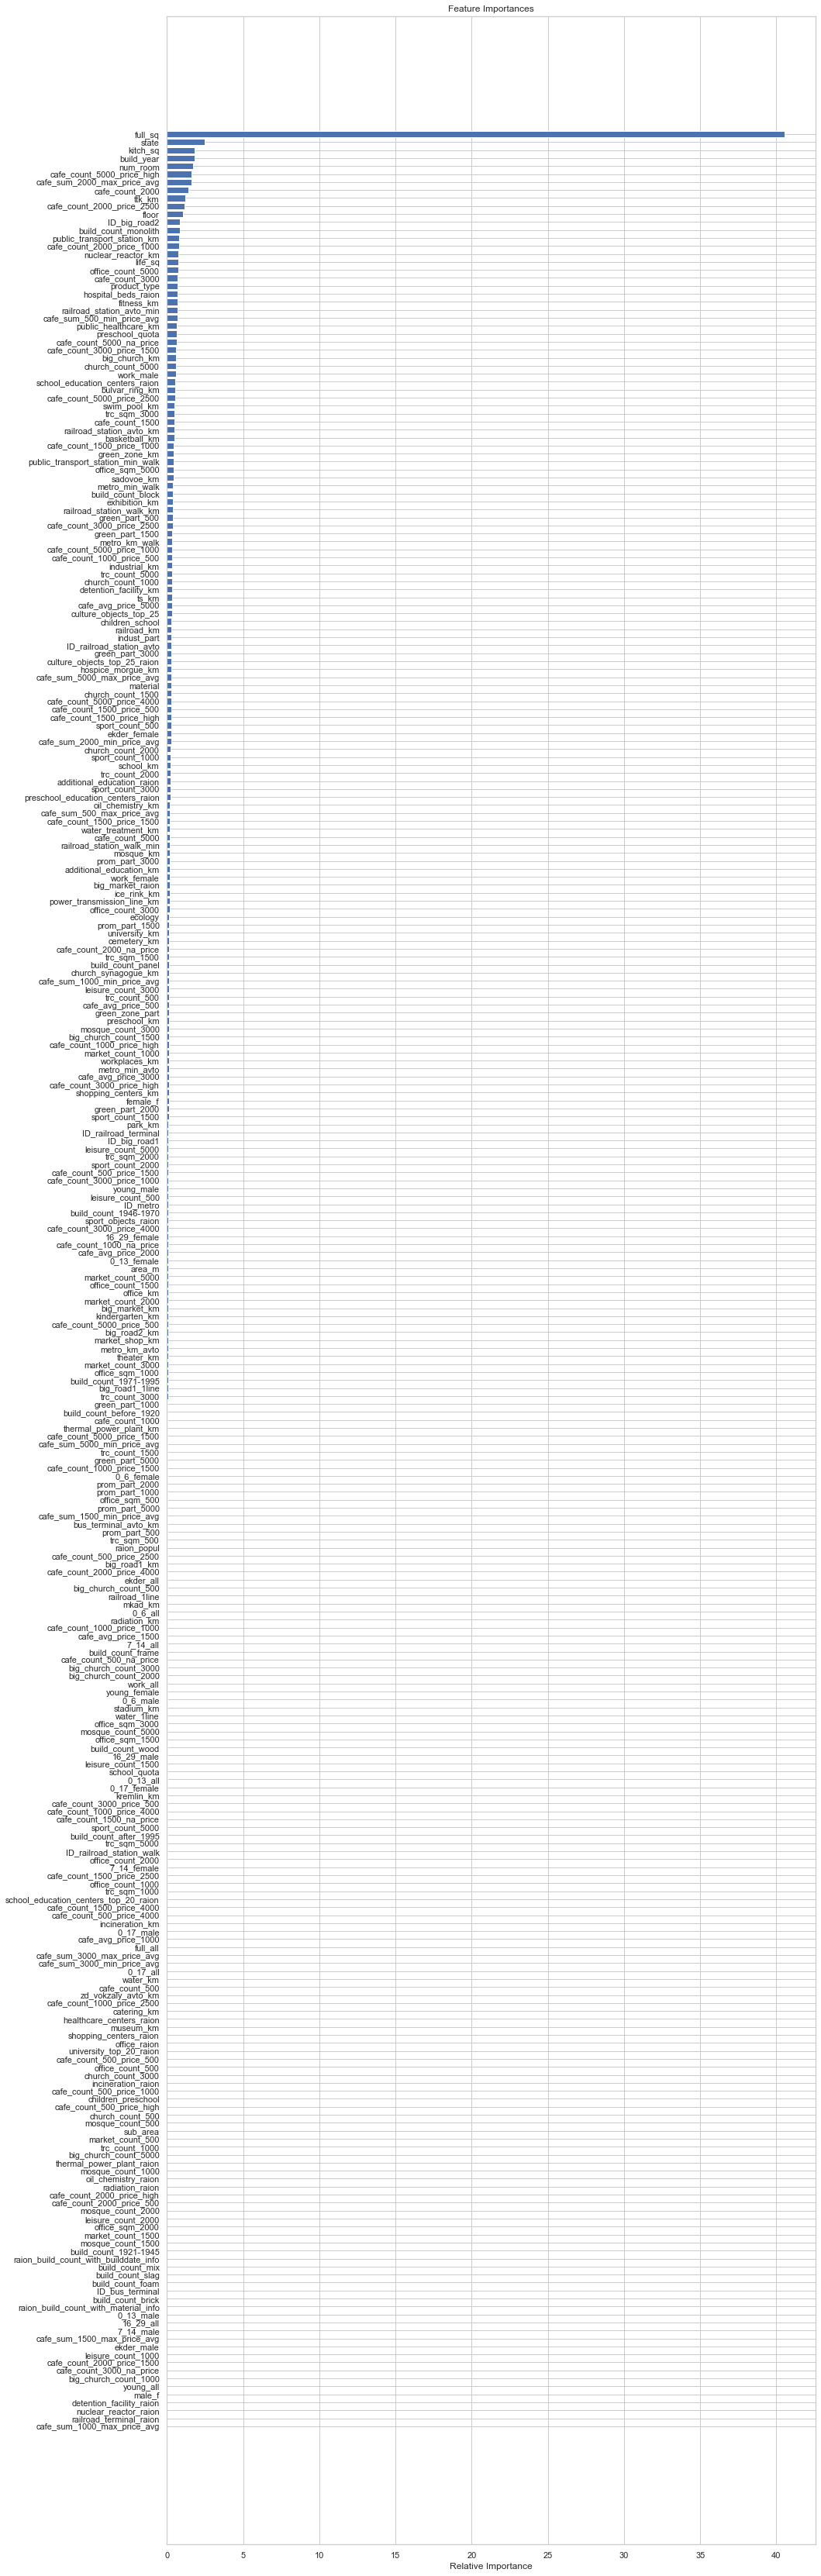

In [339]:

features= X_train.columns
importances = model_cb.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize = (15,60))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [362]:
data_dict = {'features':features, 'importance':importances}
features_importance = pd.DataFrame(data=data_dict)

In [363]:
features_importance.to_csv('feature_importances.csv', index=False)

Параметры обученной модели

In [340]:
model_cb.get_all_params()

{'nan_mode': 'Min',
 'eval_metric': 'RMSE',
 'combinations_ctr': ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=1:TargetBorderType=MinEntropy:Prior=0/1:Prior=0.5/1:Prior=1/1',
  'Counter:CtrBorderCount=15:CtrBorderType=Uniform:Prior=0/1'],
 'iterations': 100,
 'sampling_frequency': 'PerTree',
 'fold_permutation_block': 0,
 'leaf_estimation_method': 'Newton',
 'counter_calc_method': 'SkipTest',
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Plain',
 'model_shrink_mode': 'Constant',
 'feature_border_type': 'GreedyLogSum',
 'ctr_leaf_count_limit': 18446744073709551615,
 'bayesian_matrix_reg': 0.10000000149011612,
 'one_hot_max_size': 2,
 'force_unit_auto_pair_weights': False,
 'l2_leaf_reg': 1,
 'random_strength': 1,
 'rsm': 1,
 'boost_from_average': True,
 'max_ctr_complexity': 1,
 'model_size_reg': 0.5,
 'simple_ctr': ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=1:TargetBorderType=MinEntropy:Prior=0/1:Prior=0.

Сохраним модель и результат предсказаний для последующего использования.

In [341]:
file_name = 'preliminary_trained_model.pkl'

In [342]:
pickle.dump(model_cb, open(file_name, 'wb'))

Предсакзанный результат для тестового датасета

In [344]:
valid_df = pd.read_csv('project_data/attempt_4/test.csv')

In [345]:
X_test = func.process(valid_df, 'test')

In [346]:
submissions = model_cb.predict(X_test)

In [347]:
result = pd.DataFrame(valid_df['id'])

In [348]:
result['price_doc'] = submissions.tolist()

In [349]:
result = result.set_index('id')

In [350]:
result.head()

price_doc
id                 
30474  5.321385e+06
30475  8.372800e+06
30476  5.354678e+06
30477  5.457020e+06
30478  5.369380e+06

In [351]:
result[result['price_doc'] < 0].count()

price_doc    0
dtype: int64

In [352]:
result.to_csv('submission.csv')

In [357]:
X.to_csv('x.csv', index=False)

In [358]:
y.to_csv('y.csv', index=False)

### Выводы  
в текущем файле была проведено обучение модели. Дополнительно была проведена попытка оптимизировать параметры модели с использованием Grid Search.
Trained model returned score 0.32067 on kaggle.